In [ ]:
import pandas as pd
import json

# Данные

-

In [ ]:
dict_hotel = {'Апарт-отель Artstudio Moskovs': 8.8, 'Апарт-отель Avenue-Apart на Мал': 8.8, 'Отель Nevskiy Eclectic by AKY': 9, 'Отель Номера на Невском 1': 8.9, 'Отель Номера на Садов': 8.8, 'Crown Hotel St. Petersbu': 9, 'Отель Непт': 7.7, 'Отель Полюстро': 8, 'Cosmos St.Petersburg Olympia Garden Hot': 8.2, 'Отель Palace Bridge Hot': 8.1, 'Отель Vasilievs': 9, 'Отель Космос Прибалтийск': 7.1, 'Cosmos Saint -Petersburg Pulkovskaya Hot': 8.1, 'Хостел Railway Capsul': 7.5, 'VALO Ramada Plaza by Wyndham St.Petersbu': 8.6}
dict_com = {'Апарт-отель Artstudio Moskovs': [('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 5.7), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 7), ('', 8.5), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 10), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 8.9), ('Свежий ремонт-', 9.6), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 9.2), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 6.5), ('Брали номер на две ночи. В один из дней расписались в Дворце Бракосочетания. В качестве подарка молодожёнам администрация отеля подарила коробку конфет.-', 7.6), ('удачное расположение для тех, кто приехал смотреть город. Отличное обслуживание.', 8.2), ('не в первый раз тут. всё отлично. отдельная благодарность за уборку номера 312. всегда чистенько. разрушение посуду не успели сами помыть, вернулись, а у нас уже всё чистенько. в номере есть набор зубной. 2 полотенца на человека. отдельное под ноги общее. шампунь, гель, кондиционер для волос. штопор, вилки, ножи, ложки. есть комната для хранения багажа бесплатная!!спасибо большое сотрудникам отеля.25 августа  были небольшие опаздания с заселением до 3х r часов задержка. но мы пришли сами поздно, так что по факту не заметили особо.', 5.7), ('На машине хорошаяrотличный номер, но нет кондиционера. Всё было на двоих(2чашки, ложки, вилки, тарелки, наволочки и т.п.), а нас было трое, приходилось всё просить.Заоблачная стоимость подземного паркинга 1200р за сутки - это перебор, ещё к тому же его оказывается надо бронировать. На территории отеля нет парковки наземной. Долго ждать завтрак, если кушаете в кафе, если брать с собой в номер, то достаточно быстро.', 7), ('Останавливаемся на выходные второй раз, чисто, всё необходимое в номере есть, недалеко до центра. Когда откроют после ремонта станцию Фрунзенскую, вообще будет отлично, но и от Технологического института тоже недалеко. В день рождения получила классный подарок от отеля — открытка, конфеты, а главное — книга, было очень приятно-', 8.5), ('Номер красивый, действительно как на картинке, с хранением вещей до заезда проблем не было. Полотенце, постельное белье и мусорки меняли каждый день, есть табличка на дверь с просьбой убрать номер. некоторый персонал дружелюбный и приятный, некоторые вызывают негативные эмоцииПриехали заселяться в отель в районе 15:00, хотя заселение должно было быть в 14:00, соотвественно, номер уже должен был быть готов, подождали мы немного, около 10 минут. когда выбирали отель видели отзывы о задержках заселения. Вывод: эту проблему не решают, рядом с нами также долгое время заселения ждал другой человек. При заселении в номер обнаружили чужие вещи в шкафу, футболку и нижнее белье, что говорит о плохой уборке, также столешница в ванной была грязной. В номере нет кондиционера и номера с ним стоят дороже, так как никакого проветривания в комнатах без кондиционеров не происходит, было очень душно и открытием окон в прохладное время вечером это не исправит. Вытяжки также нету в ванной, собираться в ней некомфортно. При бронировании просили номер с двумя отдельными кроватями, по итогу была одна кровать. После просьбы пришла женщина раздвинула кровати и поменяла белье на каждую кровать, что заняло время. В номере также не работал телевизор, с этим ничего не сделали после нашего обращения к персоналу. Мы не брали завтраки, однако один раз спустились в низ взять с собой кофе и выпечку, персонал долгое время стоял и не обращал на нас внимание, занимаясь своими делами, пока мы сами не поздоровались. Рядом с отелем есть станция метро, но она закрыта на ремонт, мы подумали что не будет проблемы дойти до следующей станции, однако, идти до неё около 25 минут, каждый раз ходить туда сюда устанете.', 10), ('Останавливались в отеле уже 5 раз. В целом все хорошо. Чисто, убирались каждый день- Раньше по заезду был комплимент: вода, чай, какая-то мелочевка. Сейчас из этого ничего не стали класть.r- Гладильная доска только на 1 этаже. Раньше приносили в номер, сейчас сказали, что доски либо на этаже, либо в гладильной. На этаже один день были, потом убрали. Потом ходили на первый этаж.', 8.9), ('приезжали на сап фестиваль на Фантанке, мы из подмосковной Рузы и очень круто отдохнули в отеле. все чисто и ютно,есть кондей, ванные принадлежности, белые полотенца 🥰🥰🥰 проспали выезд и нам слова не сказали, за что отдельное спасибо 💘 мы выспались-', 9.6), ('Номера чистые и просторныеЗаселение длилось очень долго, предупреждали про раздельные кровати, как итог двухместная одна кровать😕', 9.2), ('-В целом, номер убирали вовремя. Всегда было чисто. Вовремя меняли полотенца r-В нашем номере была небольшая гардеробная, что оказалось очень удобным , потому что жило 3 девушки .- очень жаль , что на ресепшен, или на сайте хотя бы, не сообщается , что есть номера без кондиционеров , а есть оказывается и с ними , но их очень мало. В номере невозможно находиться. Не знаю , как там живут люди , когда температура на улице более 25 градусов. Нам было тяжело в 20-22 градусаr- Открыли себе окна , это не помогло + нет сеток на окнах , налетело много Комаров  r- За 3 дня проживания ни разу нормально не работал интернетr- С телевизором или пультом тоже явные проблемы. Пульт либо не реагирует на телевизор , либо реагирует спустя 500 нажатий r- Телефон , расположеный в номере видимо тоже для красоты , как и телевизор . Не работал , хотя все признаки того, что он рабочий', 6.5), ('Рядом метро фрунзенская в шаговой доступности, и обводной канал. Неплохое соотношение цена-качество.', 7.6), ('всёне смогла оформить поздний выезд, извинились,но...', 8.2), ('Хотели забронировать этот отель на ноябрь, но метро рядом закрыли. Очень жаль, все понравилосьrВсе работало исправно, все в наличии, водичку только долго просили, но потом далиrНомер постоянно убирали, посуду мыли, полотенца менялиПроблемы с водичкой, но не критично', 5.7), ('Отдыхали сентябрь 2023 год.  Рядом метро Фрунзенская, минут 10, остановка автобуса.rВ номере чисто, свежий ремонт, удобная большая кровать, шкаф для вещей, кухня с оборудованием, посуда, стол обеденный, стол письменный, телевизор, фен. Было немного душно, открывали окна- повезло с погодой в начале сентября. Комната большая.rНомер чистый, приходили забирали мусор.rПри заезде не могли разобраться с включением света (был номер для инвалидов), но это я сама не разобралась- всё работала. Позвонила на ресепшен, через минут 10 пришел электрик всё показал. Спасибо большое!', 7), ('Второй раз здесь отдыхаю, очень нравится. Чисто, удобно, красиво. В номере есть все необходимое, тихо и спокойно, удобная кровать.В номерах нет кондиционеров, как оказалось, есть отдельные категории номеров с ними. Есть возможность попросить вентиляторы, в целом этого хватило', 8.5), ('Расположен нормально. Недалеко остановки транспорта. Минут 15 пешком до метроrНомер большой. Для большой семьи самое то.rНичего такого не заметил. Всё было хорошо.', 10), ('ЧистоОооочент долго заселяли ! Был один парень на ресепшене ! Стояли люди с детьми в огромной очереди все было долго и один сотрудник для такой толпы которая уже хочет отдыхать это очень мало !', 8.9), ('Расположение довольно неплохое, было бы замечательно если бы не была закрыта станция метро Фрунзенская. Магазины продуктов рядов, кафе и рестораны в общей доступности. Номер приятный.Было бы плюсов если бы поставили кондиционеры в номерах, либо хотя бы вентилятор, а то в номере душно было. И сетку бы на окна необходима тогда.', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 5.7), ('Свежий ремонт-', 7), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 8.5), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 10), ('Брали номер на две ночи. В один из дней расписались в Дворце Бракосочетания. В качестве подарка молодожёнам администрация отеля подарила коробку конфет.-', 8.9), ('удачное расположение для тех, кто приехал смотреть город. Отличное обслуживание.', 9.6), ('не в первый раз тут. всё отлично. отдельная благодарность за уборку номера 312. всегда чистенько. разрушение посуду не успели сами помыть, вернулись, а у нас уже всё чистенько. в номере есть набор зубной. 2 полотенца на человека. отдельное под ноги общее. шампунь, гель, кондиционер для волос. штопор, вилки, ножи, ложки. есть комната для хранения багажа бесплатная!!спасибо большое сотрудникам отеля.25 августа  были небольшие опаздания с заселением до 3х r часов задержка. но мы пришли сами поздно, так что по факту не заметили особо.', 9.2), ('На машине хорошаяrотличный номер, но нет кондиционера. Всё было на двоих(2чашки, ложки, вилки, тарелки, наволочки и т.п.), а нас было трое, приходилось всё просить.Заоблачная стоимость подземного паркинга 1200р за сутки - это перебор, ещё к тому же его оказывается надо бронировать. На территории отеля нет парковки наземной. Долго ждать завтрак, если кушаете в кафе, если брать с собой в номер, то достаточно быстро.', 6.5), ('Останавливаемся на выходные второй раз, чисто, всё необходимое в номере есть, недалеко до центра. Когда откроют после ремонта станцию Фрунзенскую, вообще будет отлично, но и от Технологического института тоже недалеко. В день рождения получила классный подарок от отеля — открытка, конфеты, а главное — книга, было очень приятно-', 7.6), ('Номер красивый, действительно как на картинке, с хранением вещей до заезда проблем не было. Полотенце, постельное белье и мусорки меняли каждый день, есть табличка на дверь с просьбой убрать номер. некоторый персонал дружелюбный и приятный, некоторые вызывают негативные эмоцииПриехали заселяться в отель в районе 15:00, хотя заселение должно было быть в 14:00, соотвественно, номер уже должен был быть готов, подождали мы немного, около 10 минут. когда выбирали отель видели отзывы о задержках заселения. Вывод: эту проблему не решают, рядом с нами также долгое время заселения ждал другой человек. При заселении в номер обнаружили чужие вещи в шкафу, футболку и нижнее белье, что говорит о плохой уборке, также столешница в ванной была грязной. В номере нет кондиционера и номера с ним стоят дороже, так как никакого проветривания в комнатах без кондиционеров не происходит, было очень душно и открытием окон в прохладное время вечером это не исправит. Вытяжки также нету в ванной, собираться в ней некомфортно. При бронировании просили номер с двумя отдельными кроватями, по итогу была одна кровать. После просьбы пришла женщина раздвинула кровати и поменяла белье на каждую кровать, что заняло время. В номере также не работал телевизор, с этим ничего не сделали после нашего обращения к персоналу. Мы не брали завтраки, однако один раз спустились в низ взять с собой кофе и выпечку, персонал долгое время стоял и не обращал на нас внимание, занимаясь своими делами, пока мы сами не поздоровались. Рядом с отелем есть станция метро, но она закрыта на ремонт, мы подумали что не будет проблемы дойти до следующей станции, однако, идти до неё около 25 минут, каждый раз ходить туда сюда устанете.', 8.2), ('Останавливались в отеле уже 5 раз. В целом все хорошо. Чисто, убирались каждый день- Раньше по заезду был комплимент: вода, чай, какая-то мелочевка. Сейчас из этого ничего не стали класть.r- Гладильная доска только на 1 этаже. Раньше приносили в номер, сейчас сказали, что доски либо на этаже, либо в гладильной. На этаже один день были, потом убрали. Потом ходили на первый этаж.', 5.7), ('приезжали на сап фестиваль на Фантанке, мы из подмосковной Рузы и очень круто отдохнули в отеле. все чисто и ютно,есть кондей, ванные принадлежности, белые полотенца 🥰🥰🥰 проспали выезд и нам слова не сказали, за что отдельное спасибо 💘 мы выспались-', 7), ('Номера чистые и просторныеЗаселение длилось очень долго, предупреждали про раздельные кровати, как итог двухместная одна кровать😕', 8.5), ('-В целом, номер убирали вовремя. Всегда было чисто. Вовремя меняли полотенца r-В нашем номере была небольшая гардеробная, что оказалось очень удобным , потому что жило 3 девушки .- очень жаль , что на ресепшен, или на сайте хотя бы, не сообщается , что есть номера без кондиционеров , а есть оказывается и с ними , но их очень мало. В номере невозможно находиться. Не знаю , как там живут люди , когда температура на улице более 25 градусов. Нам было тяжело в 20-22 градусаr- Открыли себе окна , это не помогло + нет сеток на окнах , налетело много Комаров  r- За 3 дня проживания ни разу нормально не работал интернетr- С телевизором или пультом тоже явные проблемы. Пульт либо не реагирует на телевизор , либо реагирует спустя 500 нажатий r- Телефон , расположеный в номере видимо тоже для красоты , как и телевизор . Не работал , хотя все признаки того, что он рабочий', 10), ('Рядом метро фрунзенская в шаговой доступности, и обводной канал. Неплохое соотношение цена-качество.', 8.9), ('всёне смогла оформить поздний выезд, извинились,но...', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Хотели забронировать этот отель на ноябрь, но метро рядом закрыли. Очень жаль, все понравилосьrВсе работало исправно, все в наличии, водичку только долго просили, но потом далиrНомер постоянно убирали, посуду мыли, полотенца менялиПроблемы с водичкой, но не критично', 5.7), ('Отдыхали сентябрь 2023 год.  Рядом метро Фрунзенская, минут 10, остановка автобуса.rВ номере чисто, свежий ремонт, удобная большая кровать, шкаф для вещей, кухня с оборудованием, посуда, стол обеденный, стол письменный, телевизор, фен. Было немного душно, открывали окна- повезло с погодой в начале сентября. Комната большая.rНомер чистый, приходили забирали мусор.rПри заезде не могли разобраться с включением света (был номер для инвалидов), но это я сама не разобралась- всё работала. Позвонила на ресепшен, через минут 10 пришел электрик всё показал. Спасибо большое!', 7), ('Второй раз здесь отдыхаю, очень нравится. Чисто, удобно, красиво. В номере есть все необходимое, тихо и спокойно, удобная кровать.В номерах нет кондиционеров, как оказалось, есть отдельные категории номеров с ними. Есть возможность попросить вентиляторы, в целом этого хватило', 8.5), ('Расположен нормально. Недалеко остановки транспорта. Минут 15 пешком до метроrНомер большой. Для большой семьи самое то.rНичего такого не заметил. Всё было хорошо.', 10), ('ЧистоОооочент долго заселяли ! Был один парень на ресепшене ! Стояли люди с детьми в огромной очереди все было долго и один сотрудник для такой толпы которая уже хочет отдыхать это очень мало !', 8.9), ('Расположение довольно неплохое, было бы замечательно если бы не была закрыта станция метро Фрунзенская. Магазины продуктов рядов, кафе и рестораны в общей доступности. Номер приятный.Было бы плюсов если бы поставили кондиционеры в номерах, либо хотя бы вентилятор, а то в номере душно было. И сетку бы на окна необходима тогда.', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Брали номер на две ночи. В один из дней расписались в Дворце Бракосочетания. В качестве подарка молодожёнам администрация отеля подарила коробку конфет.-', 5.7), ('удачное расположение для тех, кто приехал смотреть город. Отличное обслуживание.', 7), ('не в первый раз тут. всё отлично. отдельная благодарность за уборку номера 312. всегда чистенько. разрушение посуду не успели сами помыть, вернулись, а у нас уже всё чистенько. в номере есть набор зубной. 2 полотенца на человека. отдельное под ноги общее. шампунь, гель, кондиционер для волос. штопор, вилки, ножи, ложки. есть комната для хранения багажа бесплатная!!спасибо большое сотрудникам отеля.25 августа  были небольшие опаздания с заселением до 3х r часов задержка. но мы пришли сами поздно, так что по факту не заметили особо.', 8.5), ('На машине хорошаяrотличный номер, но нет кондиционера. Всё было на двоих(2чашки, ложки, вилки, тарелки, наволочки и т.п.), а нас было трое, приходилось всё просить.Заоблачная стоимость подземного паркинга 1200р за сутки - это перебор, ещё к тому же его оказывается надо бронировать. На территории отеля нет парковки наземной. Долго ждать завтрак, если кушаете в кафе, если брать с собой в номер, то достаточно быстро.', 10), ('Останавливаемся на выходные второй раз, чисто, всё необходимое в номере есть, недалеко до центра. Когда откроют после ремонта станцию Фрунзенскую, вообще будет отлично, но и от Технологического института тоже недалеко. В день рождения получила классный подарок от отеля — открытка, конфеты, а главное — книга, было очень приятно-', 8.9), ('Номер красивый, действительно как на картинке, с хранением вещей до заезда проблем не было. Полотенце, постельное белье и мусорки меняли каждый день, есть табличка на дверь с просьбой убрать номер. некоторый персонал дружелюбный и приятный, некоторые вызывают негативные эмоцииПриехали заселяться в отель в районе 15:00, хотя заселение должно было быть в 14:00, соотвественно, номер уже должен был быть готов, подождали мы немного, около 10 минут. когда выбирали отель видели отзывы о задержках заселения. Вывод: эту проблему не решают, рядом с нами также долгое время заселения ждал другой человек. При заселении в номер обнаружили чужие вещи в шкафу, футболку и нижнее белье, что говорит о плохой уборке, также столешница в ванной была грязной. В номере нет кондиционера и номера с ним стоят дороже, так как никакого проветривания в комнатах без кондиционеров не происходит, было очень душно и открытием окон в прохладное время вечером это не исправит. Вытяжки также нету в ванной, собираться в ней некомфортно. При бронировании просили номер с двумя отдельными кроватями, по итогу была одна кровать. После просьбы пришла женщина раздвинула кровати и поменяла белье на каждую кровать, что заняло время. В номере также не работал телевизор, с этим ничего не сделали после нашего обращения к персоналу. Мы не брали завтраки, однако один раз спустились в низ взять с собой кофе и выпечку, персонал долгое время стоял и не обращал на нас внимание, занимаясь своими делами, пока мы сами не поздоровались. Рядом с отелем есть станция метро, но она закрыта на ремонт, мы подумали что не будет проблемы дойти до следующей станции, однако, идти до неё около 25 минут, каждый раз ходить туда сюда устанете.', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Останавливались в отеле уже 5 раз. В целом все хорошо. Чисто, убирались каждый день- Раньше по заезду был комплимент: вода, чай, какая-то мелочевка. Сейчас из этого ничего не стали класть.r- Гладильная доска только на 1 этаже. Раньше приносили в номер, сейчас сказали, что доски либо на этаже, либо в гладильной. На этаже один день были, потом убрали. Потом ходили на первый этаж.', 5.7), ('приезжали на сап фестиваль на Фантанке, мы из подмосковной Рузы и очень круто отдохнули в отеле. все чисто и ютно,есть кондей, ванные принадлежности, белые полотенца 🥰🥰🥰 проспали выезд и нам слова не сказали, за что отдельное спасибо 💘 мы выспались-', 7), ('Номера чистые и просторныеЗаселение длилось очень долго, предупреждали про раздельные кровати, как итог двухместная одна кровать😕', 8.5), ('-В целом, номер убирали вовремя. Всегда было чисто. Вовремя меняли полотенца r-В нашем номере была небольшая гардеробная, что оказалось очень удобным , потому что жило 3 девушки .- очень жаль , что на ресепшен, или на сайте хотя бы, не сообщается , что есть номера без кондиционеров , а есть оказывается и с ними , но их очень мало. В номере невозможно находиться. Не знаю , как там живут люди , когда температура на улице более 25 градусов. Нам было тяжело в 20-22 градусаr- Открыли себе окна , это не помогло + нет сеток на окнах , налетело много Комаров  r- За 3 дня проживания ни разу нормально не работал интернетr- С телевизором или пультом тоже явные проблемы. Пульт либо не реагирует на телевизор , либо реагирует спустя 500 нажатий r- Телефон , расположеный в номере видимо тоже для красоты , как и телевизор . Не работал , хотя все признаки того, что он рабочий', 10), ('Рядом метро фрунзенская в шаговой доступности, и обводной канал. Неплохое соотношение цена-качество.', 8.9), ('всёне смогла оформить поздний выезд, извинились,но...', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Хотели забронировать этот отель на ноябрь, но метро рядом закрыли. Очень жаль, все понравилосьrВсе работало исправно, все в наличии, водичку только долго просили, но потом далиrНомер постоянно убирали, посуду мыли, полотенца менялиПроблемы с водичкой, но не критично', 5.7), ('Отдыхали сентябрь 2023 год.  Рядом метро Фрунзенская, минут 10, остановка автобуса.rВ номере чисто, свежий ремонт, удобная большая кровать, шкаф для вещей, кухня с оборудованием, посуда, стол обеденный, стол письменный, телевизор, фен. Было немного душно, открывали окна- повезло с погодой в начале сентября. Комната большая.rНомер чистый, приходили забирали мусор.rПри заезде не могли разобраться с включением света (был номер для инвалидов), но это я сама не разобралась- всё работала. Позвонила на ресепшен, через минут 10 пришел электрик всё показал. Спасибо большое!', 7), ('Второй раз здесь отдыхаю, очень нравится. Чисто, удобно, красиво. В номере есть все необходимое, тихо и спокойно, удобная кровать.В номерах нет кондиционеров, как оказалось, есть отдельные категории номеров с ними. Есть возможность попросить вентиляторы, в целом этого хватило', 8.5), ('Расположен нормально. Недалеко остановки транспорта. Минут 15 пешком до метроrНомер большой. Для большой семьи самое то.rНичего такого не заметил. Всё было хорошо.', 10), ('ЧистоОооочент долго заселяли ! Был один парень на ресепшене ! Стояли люди с детьми в огромной очереди все было долго и один сотрудник для такой толпы которая уже хочет отдыхать это очень мало !', 8.9), ('Расположение довольно неплохое, было бы замечательно если бы не была закрыта станция метро Фрунзенская. Магазины продуктов рядов, кафе и рестораны в общей доступности. Номер приятный.Было бы плюсов если бы поставили кондиционеры в номерах, либо хотя бы вентилятор, а то в номере душно было. И сетку бы на окна необходима тогда.', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Брали номер на две ночи. В один из дней расписались в Дворце Бракосочетания. В качестве подарка молодожёнам администрация отеля подарила коробку конфет.-', 5.7), ('удачное расположение для тех, кто приехал смотреть город. Отличное обслуживание.', 7), ('не в первый раз тут. всё отлично. отдельная благодарность за уборку номера 312. всегда чистенько. разрушение посуду не успели сами помыть, вернулись, а у нас уже всё чистенько. в номере есть набор зубной. 2 полотенца на человека. отдельное под ноги общее. шампунь, гель, кондиционер для волос. штопор, вилки, ножи, ложки. есть комната для хранения багажа бесплатная!!спасибо большое сотрудникам отеля.25 августа  были небольшие опаздания с заселением до 3х r часов задержка. но мы пришли сами поздно, так что по факту не заметили особо.', 8.5), ('На машине хорошаяrотличный номер, но нет кондиционера. Всё было на двоих(2чашки, ложки, вилки, тарелки, наволочки и т.п.), а нас было трое, приходилось всё просить.Заоблачная стоимость подземного паркинга 1200р за сутки - это перебор, ещё к тому же его оказывается надо бронировать. На территории отеля нет парковки наземной. Долго ждать завтрак, если кушаете в кафе, если брать с собой в номер, то достаточно быстро.', 10), ('Останавливаемся на выходные второй раз, чисто, всё необходимое в номере есть, недалеко до центра. Когда откроют после ремонта станцию Фрунзенскую, вообще будет отлично, но и от Технологического института тоже недалеко. В день рождения получила классный подарок от отеля — открытка, конфеты, а главное — книга, было очень приятно-', 8.9), ('Номер красивый, действительно как на картинке, с хранением вещей до заезда проблем не было. Полотенце, постельное белье и мусорки меняли каждый день, есть табличка на дверь с просьбой убрать номер. некоторый персонал дружелюбный и приятный, некоторые вызывают негативные эмоцииПриехали заселяться в отель в районе 15:00, хотя заселение должно было быть в 14:00, соотвественно, номер уже должен был быть готов, подождали мы немного, около 10 минут. когда выбирали отель видели отзывы о задержках заселения. Вывод: эту проблему не решают, рядом с нами также долгое время заселения ждал другой человек. При заселении в номер обнаружили чужие вещи в шкафу, футболку и нижнее белье, что говорит о плохой уборке, также столешница в ванной была грязной. В номере нет кондиционера и номера с ним стоят дороже, так как никакого проветривания в комнатах без кондиционеров не происходит, было очень душно и открытием окон в прохладное время вечером это не исправит. Вытяжки также нету в ванной, собираться в ней некомфортно. При бронировании просили номер с двумя отдельными кроватями, по итогу была одна кровать. После просьбы пришла женщина раздвинула кровати и поменяла белье на каждую кровать, что заняло время. В номере также не работал телевизор, с этим ничего не сделали после нашего обращения к персоналу. Мы не брали завтраки, однако один раз спустились в низ взять с собой кофе и выпечку, персонал долгое время стоял и не обращал на нас внимание, занимаясь своими делами, пока мы сами не поздоровались. Рядом с отелем есть станция метро, но она закрыта на ремонт, мы подумали что не будет проблемы дойти до следующей станции, однако, идти до неё около 25 минут, каждый раз ходить туда сюда устанете.', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Останавливались в отеле уже 5 раз. В целом все хорошо. Чисто, убирались каждый день- Раньше по заезду был комплимент: вода, чай, какая-то мелочевка. Сейчас из этого ничего не стали класть.r- Гладильная доска только на 1 этаже. Раньше приносили в номер, сейчас сказали, что доски либо на этаже, либо в гладильной. На этаже один день были, потом убрали. Потом ходили на первый этаж.', 5.7), ('приезжали на сап фестиваль на Фантанке, мы из подмосковной Рузы и очень круто отдохнули в отеле. все чисто и ютно,есть кондей, ванные принадлежности, белые полотенца 🥰🥰🥰 проспали выезд и нам слова не сказали, за что отдельное спасибо 💘 мы выспались-', 7), ('Номера чистые и просторныеЗаселение длилось очень долго, предупреждали про раздельные кровати, как итог двухместная одна кровать😕', 8.5), ('-В целом, номер убирали вовремя. Всегда было чисто. Вовремя меняли полотенца r-В нашем номере была небольшая гардеробная, что оказалось очень удобным , потому что жило 3 девушки .- очень жаль , что на ресепшен, или на сайте хотя бы, не сообщается , что есть номера без кондиционеров , а есть оказывается и с ними , но их очень мало. В номере невозможно находиться. Не знаю , как там живут люди , когда температура на улице более 25 градусов. Нам было тяжело в 20-22 градусаr- Открыли себе окна , это не помогло + нет сеток на окнах , налетело много Комаров  r- За 3 дня проживания ни разу нормально не работал интернетr- С телевизором или пультом тоже явные проблемы. Пульт либо не реагирует на телевизор , либо реагирует спустя 500 нажатий r- Телефон , расположеный в номере видимо тоже для красоты , как и телевизор . Не работал , хотя все признаки того, что он рабочий', 10), ('Рядом метро фрунзенская в шаговой доступности, и обводной канал. Неплохое соотношение цена-качество.', 8.9), ('всёне смогла оформить поздний выезд, извинились,но...', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Хотели забронировать этот отель на ноябрь, но метро рядом закрыли. Очень жаль, все понравилосьrВсе работало исправно, все в наличии, водичку только долго просили, но потом далиrНомер постоянно убирали, посуду мыли, полотенца менялиПроблемы с водичкой, но не критично', 5.7), ('Отдыхали сентябрь 2023 год.  Рядом метро Фрунзенская, минут 10, остановка автобуса.rВ номере чисто, свежий ремонт, удобная большая кровать, шкаф для вещей, кухня с оборудованием, посуда, стол обеденный, стол письменный, телевизор, фен. Было немного душно, открывали окна- повезло с погодой в начале сентября. Комната большая.rНомер чистый, приходили забирали мусор.rПри заезде не могли разобраться с включением света (был номер для инвалидов), но это я сама не разобралась- всё работала. Позвонила на ресепшен, через минут 10 пришел электрик всё показал. Спасибо большое!', 7), ('Второй раз здесь отдыхаю, очень нравится. Чисто, удобно, красиво. В номере есть все необходимое, тихо и спокойно, удобная кровать.В номерах нет кондиционеров, как оказалось, есть отдельные категории номеров с ними. Есть возможность попросить вентиляторы, в целом этого хватило', 8.5), ('Расположен нормально. Недалеко остановки транспорта. Минут 15 пешком до метроrНомер большой. Для большой семьи самое то.rНичего такого не заметил. Всё было хорошо.', 10), ('ЧистоОооочент долго заселяли ! Был один парень на ресепшене ! Стояли люди с детьми в огромной очереди все было долго и один сотрудник для такой толпы которая уже хочет отдыхать это очень мало !', 8.9), ('Расположение довольно неплохое, было бы замечательно если бы не была закрыта станция метро Фрунзенская. Магазины продуктов рядов, кафе и рестораны в общей доступности. Номер приятный.Было бы плюсов если бы поставили кондиционеры в номерах, либо хотя бы вентилятор, а то в номере душно было. И сетку бы на окна необходима тогда.', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Брали номер на две ночи. В один из дней расписались в Дворце Бракосочетания. В качестве подарка молодожёнам администрация отеля подарила коробку конфет.-', 5.7), ('удачное расположение для тех, кто приехал смотреть город. Отличное обслуживание.', 7), ('не в первый раз тут. всё отлично. отдельная благодарность за уборку номера 312. всегда чистенько. разрушение посуду не успели сами помыть, вернулись, а у нас уже всё чистенько. в номере есть набор зубной. 2 полотенца на человека. отдельное под ноги общее. шампунь, гель, кондиционер для волос. штопор, вилки, ножи, ложки. есть комната для хранения багажа бесплатная!!спасибо большое сотрудникам отеля.25 августа  были небольшие опаздания с заселением до 3х r часов задержка. но мы пришли сами поздно, так что по факту не заметили особо.', 8.5), ('На машине хорошаяrотличный номер, но нет кондиционера. Всё было на двоих(2чашки, ложки, вилки, тарелки, наволочки и т.п.), а нас было трое, приходилось всё просить.Заоблачная стоимость подземного паркинга 1200р за сутки - это перебор, ещё к тому же его оказывается надо бронировать. На территории отеля нет парковки наземной. Долго ждать завтрак, если кушаете в кафе, если брать с собой в номер, то достаточно быстро.', 10), ('Останавливаемся на выходные второй раз, чисто, всё необходимое в номере есть, недалеко до центра. Когда откроют после ремонта станцию Фрунзенскую, вообще будет отлично, но и от Технологического института тоже недалеко. В день рождения получила классный подарок от отеля — открытка, конфеты, а главное — книга, было очень приятно-', 8.9), ('Номер красивый, действительно как на картинке, с хранением вещей до заезда проблем не было. Полотенце, постельное белье и мусорки меняли каждый день, есть табличка на дверь с просьбой убрать номер. некоторый персонал дружелюбный и приятный, некоторые вызывают негативные эмоцииПриехали заселяться в отель в районе 15:00, хотя заселение должно было быть в 14:00, соотвественно, номер уже должен был быть готов, подождали мы немного, около 10 минут. когда выбирали отель видели отзывы о задержках заселения. Вывод: эту проблему не решают, рядом с нами также долгое время заселения ждал другой человек. При заселении в номер обнаружили чужие вещи в шкафу, футболку и нижнее белье, что говорит о плохой уборке, также столешница в ванной была грязной. В номере нет кондиционера и номера с ним стоят дороже, так как никакого проветривания в комнатах без кондиционеров не происходит, было очень душно и открытием окон в прохладное время вечером это не исправит. Вытяжки также нету в ванной, собираться в ней некомфортно. При бронировании просили номер с двумя отдельными кроватями, по итогу была одна кровать. После просьбы пришла женщина раздвинула кровати и поменяла белье на каждую кровать, что заняло время. В номере также не работал телевизор, с этим ничего не сделали после нашего обращения к персоналу. Мы не брали завтраки, однако один раз спустились в низ взять с собой кофе и выпечку, персонал долгое время стоял и не обращал на нас внимание, занимаясь своими делами, пока мы сами не поздоровались. Рядом с отелем есть станция метро, но она закрыта на ремонт, мы подумали что не будет проблемы дойти до следующей станции, однако, идти до неё около 25 минут, каждый раз ходить туда сюда устанете.', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Останавливались в отеле уже 5 раз. В целом все хорошо. Чисто, убирались каждый день- Раньше по заезду был комплимент: вода, чай, какая-то мелочевка. Сейчас из этого ничего не стали класть.r- Гладильная доска только на 1 этаже. Раньше приносили в номер, сейчас сказали, что доски либо на этаже, либо в гладильной. На этаже один день были, потом убрали. Потом ходили на первый этаж.', 5.7), ('приезжали на сап фестиваль на Фантанке, мы из подмосковной Рузы и очень круто отдохнули в отеле. все чисто и ютно,есть кондей, ванные принадлежности, белые полотенца 🥰🥰🥰 проспали выезд и нам слова не сказали, за что отдельное спасибо 💘 мы выспались-', 7), ('Номера чистые и просторныеЗаселение длилось очень долго, предупреждали про раздельные кровати, как итог двухместная одна кровать😕', 8.5), ('-В целом, номер убирали вовремя. Всегда было чисто. Вовремя меняли полотенца r-В нашем номере была небольшая гардеробная, что оказалось очень удобным , потому что жило 3 девушки .- очень жаль , что на ресепшен, или на сайте хотя бы, не сообщается , что есть номера без кондиционеров , а есть оказывается и с ними , но их очень мало. В номере невозможно находиться. Не знаю , как там живут люди , когда температура на улице более 25 градусов. Нам было тяжело в 20-22 градусаr- Открыли себе окна , это не помогло + нет сеток на окнах , налетело много Комаров  r- За 3 дня проживания ни разу нормально не работал интернетr- С телевизором или пультом тоже явные проблемы. Пульт либо не реагирует на телевизор , либо реагирует спустя 500 нажатий r- Телефон , расположеный в номере видимо тоже для красоты , как и телевизор . Не работал , хотя все признаки того, что он рабочий', 10), ('Рядом метро фрунзенская в шаговой доступности, и обводной канал. Неплохое соотношение цена-качество.', 8.9), ('всёне смогла оформить поздний выезд, извинились,но...', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Хотели забронировать этот отель на ноябрь, но метро рядом закрыли. Очень жаль, все понравилосьrВсе работало исправно, все в наличии, водичку только долго просили, но потом далиrНомер постоянно убирали, посуду мыли, полотенца менялиПроблемы с водичкой, но не критично', 5.7), ('Отдыхали сентябрь 2023 год.  Рядом метро Фрунзенская, минут 10, остановка автобуса.rВ номере чисто, свежий ремонт, удобная большая кровать, шкаф для вещей, кухня с оборудованием, посуда, стол обеденный, стол письменный, телевизор, фен. Было немного душно, открывали окна- повезло с погодой в начале сентября. Комната большая.rНомер чистый, приходили забирали мусор.rПри заезде не могли разобраться с включением света (был номер для инвалидов), но это я сама не разобралась- всё работала. Позвонила на ресепшен, через минут 10 пришел электрик всё показал. Спасибо большое!', 7), ('Второй раз здесь отдыхаю, очень нравится. Чисто, удобно, красиво. В номере есть все необходимое, тихо и спокойно, удобная кровать.В номерах нет кондиционеров, как оказалось, есть отдельные категории номеров с ними. Есть возможность попросить вентиляторы, в целом этого хватило', 8.5), ('Расположен нормально. Недалеко остановки транспорта. Минут 15 пешком до метроrНомер большой. Для большой семьи самое то.rНичего такого не заметил. Всё было хорошо.', 10), ('ЧистоОооочент долго заселяли ! Был один парень на ресепшене ! Стояли люди с детьми в огромной очереди все было долго и один сотрудник для такой толпы которая уже хочет отдыхать это очень мало !', 8.9), ('Расположение довольно неплохое, было бы замечательно если бы не была закрыта станция метро Фрунзенская. Магазины продуктов рядов, кафе и рестораны в общей доступности. Номер приятный.Было бы плюсов если бы поставили кондиционеры в номерах, либо хотя бы вентилятор, а то в номере душно было. И сетку бы на окна необходима тогда.', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Брали номер на две ночи. В один из дней расписались в Дворце Бракосочетания. В качестве подарка молодожёнам администрация отеля подарила коробку конфет.-', 5.7), ('удачное расположение для тех, кто приехал смотреть город. Отличное обслуживание.', 7), ('не в первый раз тут. всё отлично. отдельная благодарность за уборку номера 312. всегда чистенько. разрушение посуду не успели сами помыть, вернулись, а у нас уже всё чистенько. в номере есть набор зубной. 2 полотенца на человека. отдельное под ноги общее. шампунь, гель, кондиционер для волос. штопор, вилки, ножи, ложки. есть комната для хранения багажа бесплатная!!спасибо большое сотрудникам отеля.25 августа  были небольшие опаздания с заселением до 3х r часов задержка. но мы пришли сами поздно, так что по факту не заметили особо.', 8.5), ('На машине хорошаяrотличный номер, но нет кондиционера. Всё было на двоих(2чашки, ложки, вилки, тарелки, наволочки и т.п.), а нас было трое, приходилось всё просить.Заоблачная стоимость подземного паркинга 1200р за сутки - это перебор, ещё к тому же его оказывается надо бронировать. На территории отеля нет парковки наземной. Долго ждать завтрак, если кушаете в кафе, если брать с собой в номер, то достаточно быстро.', 10), ('Останавливаемся на выходные второй раз, чисто, всё необходимое в номере есть, недалеко до центра. Когда откроют после ремонта станцию Фрунзенскую, вообще будет отлично, но и от Технологического института тоже недалеко. В день рождения получила классный подарок от отеля — открытка, конфеты, а главное — книга, было очень приятно-', 8.9), ('Номер красивый, действительно как на картинке, с хранением вещей до заезда проблем не было. Полотенце, постельное белье и мусорки меняли каждый день, есть табличка на дверь с просьбой убрать номер. некоторый персонал дружелюбный и приятный, некоторые вызывают негативные эмоцииПриехали заселяться в отель в районе 15:00, хотя заселение должно было быть в 14:00, соотвественно, номер уже должен был быть готов, подождали мы немного, около 10 минут. когда выбирали отель видели отзывы о задержках заселения. Вывод: эту проблему не решают, рядом с нами также долгое время заселения ждал другой человек. При заселении в номер обнаружили чужие вещи в шкафу, футболку и нижнее белье, что говорит о плохой уборке, также столешница в ванной была грязной. В номере нет кондиционера и номера с ним стоят дороже, так как никакого проветривания в комнатах без кондиционеров не происходит, было очень душно и открытием окон в прохладное время вечером это не исправит. Вытяжки также нету в ванной, собираться в ней некомфортно. При бронировании просили номер с двумя отдельными кроватями, по итогу была одна кровать. После просьбы пришла женщина раздвинула кровати и поменяла белье на каждую кровать, что заняло время. В номере также не работал телевизор, с этим ничего не сделали после нашего обращения к персоналу. Мы не брали завтраки, однако один раз спустились в низ взять с собой кофе и выпечку, персонал долгое время стоял и не обращал на нас внимание, занимаясь своими делами, пока мы сами не поздоровались. Рядом с отелем есть станция метро, но она закрыта на ремонт, мы подумали что не будет проблемы дойти до следующей станции, однако, идти до неё около 25 минут, каждый раз ходить туда сюда устанете.', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Останавливались в отеле уже 5 раз. В целом все хорошо. Чисто, убирались каждый день- Раньше по заезду был комплимент: вода, чай, какая-то мелочевка. Сейчас из этого ничего не стали класть.r- Гладильная доска только на 1 этаже. Раньше приносили в номер, сейчас сказали, что доски либо на этаже, либо в гладильной. На этаже один день были, потом убрали. Потом ходили на первый этаж.', 5.7), ('приезжали на сап фестиваль на Фантанке, мы из подмосковной Рузы и очень круто отдохнули в отеле. все чисто и ютно,есть кондей, ванные принадлежности, белые полотенца 🥰🥰🥰 проспали выезд и нам слова не сказали, за что отдельное спасибо 💘 мы выспались-', 7), ('Номера чистые и просторныеЗаселение длилось очень долго, предупреждали про раздельные кровати, как итог двухместная одна кровать😕', 8.5), ('-В целом, номер убирали вовремя. Всегда было чисто. Вовремя меняли полотенца r-В нашем номере была небольшая гардеробная, что оказалось очень удобным , потому что жило 3 девушки .- очень жаль , что на ресепшен, или на сайте хотя бы, не сообщается , что есть номера без кондиционеров , а есть оказывается и с ними , но их очень мало. В номере невозможно находиться. Не знаю , как там живут люди , когда температура на улице более 25 градусов. Нам было тяжело в 20-22 градусаr- Открыли себе окна , это не помогло + нет сеток на окнах , налетело много Комаров  r- За 3 дня проживания ни разу нормально не работал интернетr- С телевизором или пультом тоже явные проблемы. Пульт либо не реагирует на телевизор , либо реагирует спустя 500 нажатий r- Телефон , расположеный в номере видимо тоже для красоты , как и телевизор . Не работал , хотя все признаки того, что он рабочий', 10), ('Рядом метро фрунзенская в шаговой доступности, и обводной канал. Неплохое соотношение цена-качество.', 8.9), ('всёне смогла оформить поздний выезд, извинились,но...', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Хотели забронировать этот отель на ноябрь, но метро рядом закрыли. Очень жаль, все понравилосьrВсе работало исправно, все в наличии, водичку только долго просили, но потом далиrНомер постоянно убирали, посуду мыли, полотенца менялиПроблемы с водичкой, но не критично', 5.7), ('Отдыхали сентябрь 2023 год.  Рядом метро Фрунзенская, минут 10, остановка автобуса.rВ номере чисто, свежий ремонт, удобная большая кровать, шкаф для вещей, кухня с оборудованием, посуда, стол обеденный, стол письменный, телевизор, фен. Было немного душно, открывали окна- повезло с погодой в начале сентября. Комната большая.rНомер чистый, приходили забирали мусор.rПри заезде не могли разобраться с включением света (был номер для инвалидов), но это я сама не разобралась- всё работала. Позвонила на ресепшен, через минут 10 пришел электрик всё показал. Спасибо большое!', 7), ('Второй раз здесь отдыхаю, очень нравится. Чисто, удобно, красиво. В номере есть все необходимое, тихо и спокойно, удобная кровать.В номерах нет кондиционеров, как оказалось, есть отдельные категории номеров с ними. Есть возможность попросить вентиляторы, в целом этого хватило', 8.5), ('Расположен нормально. Недалеко остановки транспорта. Минут 15 пешком до метроrНомер большой. Для большой семьи самое то.rНичего такого не заметил. Всё было хорошо.', 10), ('ЧистоОооочент долго заселяли ! Был один парень на ресепшене ! Стояли люди с детьми в огромной очереди все было долго и один сотрудник для такой толпы которая уже хочет отдыхать это очень мало !', 8.9), ('Расположение довольно неплохое, было бы замечательно если бы не была закрыта станция метро Фрунзенская. Магазины продуктов рядов, кафе и рестораны в общей доступности. Номер приятный.Было бы плюсов если бы поставили кондиционеры в номерах, либо хотя бы вентилятор, а то в номере душно было. И сетку бы на окна необходима тогда.', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Брали номер на две ночи. В один из дней расписались в Дворце Бракосочетания. В качестве подарка молодожёнам администрация отеля подарила коробку конфет.-', 5.7), ('удачное расположение для тех, кто приехал смотреть город. Отличное обслуживание.', 7), ('не в первый раз тут. всё отлично. отдельная благодарность за уборку номера 312. всегда чистенько. разрушение посуду не успели сами помыть, вернулись, а у нас уже всё чистенько. в номере есть набор зубной. 2 полотенца на человека. отдельное под ноги общее. шампунь, гель, кондиционер для волос. штопор, вилки, ножи, ложки. есть комната для хранения багажа бесплатная!!спасибо большое сотрудникам отеля.25 августа  были небольшие опаздания с заселением до 3х r часов задержка. но мы пришли сами поздно, так что по факту не заметили особо.', 8.5), ('На машине хорошаяrотличный номер, но нет кондиционера. Всё было на двоих(2чашки, ложки, вилки, тарелки, наволочки и т.п.), а нас было трое, приходилось всё просить.Заоблачная стоимость подземного паркинга 1200р за сутки - это перебор, ещё к тому же его оказывается надо бронировать. На территории отеля нет парковки наземной. Долго ждать завтрак, если кушаете в кафе, если брать с собой в номер, то достаточно быстро.', 10), ('Останавливаемся на выходные второй раз, чисто, всё необходимое в номере есть, недалеко до центра. Когда откроют после ремонта станцию Фрунзенскую, вообще будет отлично, но и от Технологического института тоже недалеко. В день рождения получила классный подарок от отеля — открытка, конфеты, а главное — книга, было очень приятно-', 8.9), ('Номер красивый, действительно как на картинке, с хранением вещей до заезда проблем не было. Полотенце, постельное белье и мусорки меняли каждый день, есть табличка на дверь с просьбой убрать номер. некоторый персонал дружелюбный и приятный, некоторые вызывают негативные эмоцииПриехали заселяться в отель в районе 15:00, хотя заселение должно было быть в 14:00, соотвественно, номер уже должен был быть готов, подождали мы немного, около 10 минут. когда выбирали отель видели отзывы о задержках заселения. Вывод: эту проблему не решают, рядом с нами также долгое время заселения ждал другой человек. При заселении в номер обнаружили чужие вещи в шкафу, футболку и нижнее белье, что говорит о плохой уборке, также столешница в ванной была грязной. В номере нет кондиционера и номера с ним стоят дороже, так как никакого проветривания в комнатах без кондиционеров не происходит, было очень душно и открытием окон в прохладное время вечером это не исправит. Вытяжки также нету в ванной, собираться в ней некомфортно. При бронировании просили номер с двумя отдельными кроватями, по итогу была одна кровать. После просьбы пришла женщина раздвинула кровати и поменяла белье на каждую кровать, что заняло время. В номере также не работал телевизор, с этим ничего не сделали после нашего обращения к персоналу. Мы не брали завтраки, однако один раз спустились в низ взять с собой кофе и выпечку, персонал долгое время стоял и не обращал на нас внимание, занимаясь своими делами, пока мы сами не поздоровались. Рядом с отелем есть станция метро, но она закрыта на ремонт, мы подумали что не будет проблемы дойти до следующей станции, однако, идти до неё около 25 минут, каждый раз ходить туда сюда устанете.', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Останавливались в отеле уже 5 раз. В целом все хорошо. Чисто, убирались каждый день- Раньше по заезду был комплимент: вода, чай, какая-то мелочевка. Сейчас из этого ничего не стали класть.r- Гладильная доска только на 1 этаже. Раньше приносили в номер, сейчас сказали, что доски либо на этаже, либо в гладильной. На этаже один день были, потом убрали. Потом ходили на первый этаж.', 5.7), ('приезжали на сап фестиваль на Фантанке, мы из подмосковной Рузы и очень круто отдохнули в отеле. все чисто и ютно,есть кондей, ванные принадлежности, белые полотенца 🥰🥰🥰 проспали выезд и нам слова не сказали, за что отдельное спасибо 💘 мы выспались-', 7), ('Номера чистые и просторныеЗаселение длилось очень долго, предупреждали про раздельные кровати, как итог двухместная одна кровать😕', 8.5), ('-В целом, номер убирали вовремя. Всегда было чисто. Вовремя меняли полотенца r-В нашем номере была небольшая гардеробная, что оказалось очень удобным , потому что жило 3 девушки .- очень жаль , что на ресепшен, или на сайте хотя бы, не сообщается , что есть номера без кондиционеров , а есть оказывается и с ними , но их очень мало. В номере невозможно находиться. Не знаю , как там живут люди , когда температура на улице более 25 градусов. Нам было тяжело в 20-22 градусаr- Открыли себе окна , это не помогло + нет сеток на окнах , налетело много Комаров  r- За 3 дня проживания ни разу нормально не работал интернетr- С телевизором или пультом тоже явные проблемы. Пульт либо не реагирует на телевизор , либо реагирует спустя 500 нажатий r- Телефон , расположеный в номере видимо тоже для красоты , как и телевизор . Не работал , хотя все признаки того, что он рабочий', 10), ('Рядом метро фрунзенская в шаговой доступности, и обводной канал. Неплохое соотношение цена-качество.', 8.9), ('всёне смогла оформить поздний выезд, извинились,но...', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Хотели забронировать этот отель на ноябрь, но метро рядом закрыли. Очень жаль, все понравилосьrВсе работало исправно, все в наличии, водичку только долго просили, но потом далиrНомер постоянно убирали, посуду мыли, полотенца менялиПроблемы с водичкой, но не критично', 5.7), ('Отдыхали сентябрь 2023 год.  Рядом метро Фрунзенская, минут 10, остановка автобуса.rВ номере чисто, свежий ремонт, удобная большая кровать, шкаф для вещей, кухня с оборудованием, посуда, стол обеденный, стол письменный, телевизор, фен. Было немного душно, открывали окна- повезло с погодой в начале сентября. Комната большая.rНомер чистый, приходили забирали мусор.rПри заезде не могли разобраться с включением света (был номер для инвалидов), но это я сама не разобралась- всё работала. Позвонила на ресепшен, через минут 10 пришел электрик всё показал. Спасибо большое!', 7), ('Второй раз здесь отдыхаю, очень нравится. Чисто, удобно, красиво. В номере есть все необходимое, тихо и спокойно, удобная кровать.В номерах нет кондиционеров, как оказалось, есть отдельные категории номеров с ними. Есть возможность попросить вентиляторы, в целом этого хватило', 8.5), ('Расположен нормально. Недалеко остановки транспорта. Минут 15 пешком до метроrНомер большой. Для большой семьи самое то.rНичего такого не заметил. Всё было хорошо.', 10), ('ЧистоОооочент долго заселяли ! Был один парень на ресепшене ! Стояли люди с детьми в огромной очереди все было долго и один сотрудник для такой толпы которая уже хочет отдыхать это очень мало !', 8.9), ('Расположение довольно неплохое, было бы замечательно если бы не была закрыта станция метро Фрунзенская. Магазины продуктов рядов, кафе и рестораны в общей доступности. Номер приятный.Было бы плюсов если бы поставили кондиционеры в номерах, либо хотя бы вентилятор, а то в номере душно было. И сетку бы на окна необходима тогда.', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Брали номер на две ночи. В один из дней расписались в Дворце Бракосочетания. В качестве подарка молодожёнам администрация отеля подарила коробку конфет.-', 5.7), ('удачное расположение для тех, кто приехал смотреть город. Отличное обслуживание.', 7), ('не в первый раз тут. всё отлично. отдельная благодарность за уборку номера 312. всегда чистенько. разрушение посуду не успели сами помыть, вернулись, а у нас уже всё чистенько. в номере есть набор зубной. 2 полотенца на человека. отдельное под ноги общее. шампунь, гель, кондиционер для волос. штопор, вилки, ножи, ложки. есть комната для хранения багажа бесплатная!!спасибо большое сотрудникам отеля.25 августа  были небольшие опаздания с заселением до 3х r часов задержка. но мы пришли сами поздно, так что по факту не заметили особо.', 8.5), ('На машине хорошаяrотличный номер, но нет кондиционера. Всё было на двоих(2чашки, ложки, вилки, тарелки, наволочки и т.п.), а нас было трое, приходилось всё просить.Заоблачная стоимость подземного паркинга 1200р за сутки - это перебор, ещё к тому же его оказывается надо бронировать. На территории отеля нет парковки наземной. Долго ждать завтрак, если кушаете в кафе, если брать с собой в номер, то достаточно быстро.', 10), ('Останавливаемся на выходные второй раз, чисто, всё необходимое в номере есть, недалеко до центра. Когда откроют после ремонта станцию Фрунзенскую, вообще будет отлично, но и от Технологического института тоже недалеко. В день рождения получила классный подарок от отеля — открытка, конфеты, а главное — книга, было очень приятно-', 8.9), ('Номер красивый, действительно как на картинке, с хранением вещей до заезда проблем не было. Полотенце, постельное белье и мусорки меняли каждый день, есть табличка на дверь с просьбой убрать номер. некоторый персонал дружелюбный и приятный, некоторые вызывают негативные эмоцииПриехали заселяться в отель в районе 15:00, хотя заселение должно было быть в 14:00, соотвественно, номер уже должен был быть готов, подождали мы немного, около 10 минут. когда выбирали отель видели отзывы о задержках заселения. Вывод: эту проблему не решают, рядом с нами также долгое время заселения ждал другой человек. При заселении в номер обнаружили чужие вещи в шкафу, футболку и нижнее белье, что говорит о плохой уборке, также столешница в ванной была грязной. В номере нет кондиционера и номера с ним стоят дороже, так как никакого проветривания в комнатах без кондиционеров не происходит, было очень душно и открытием окон в прохладное время вечером это не исправит. Вытяжки также нету в ванной, собираться в ней некомфортно. При бронировании просили номер с двумя отдельными кроватями, по итогу была одна кровать. После просьбы пришла женщина раздвинула кровати и поменяла белье на каждую кровать, что заняло время. В номере также не работал телевизор, с этим ничего не сделали после нашего обращения к персоналу. Мы не брали завтраки, однако один раз спустились в низ взять с собой кофе и выпечку, персонал долгое время стоял и не обращал на нас внимание, занимаясь своими делами, пока мы сами не поздоровались. Рядом с отелем есть станция метро, но она закрыта на ремонт, мы подумали что не будет проблемы дойти до следующей станции, однако, идти до неё около 25 минут, каждый раз ходить туда сюда устанете.', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Останавливались в отеле уже 5 раз. В целом все хорошо. Чисто, убирались каждый день- Раньше по заезду был комплимент: вода, чай, какая-то мелочевка. Сейчас из этого ничего не стали класть.r- Гладильная доска только на 1 этаже. Раньше приносили в номер, сейчас сказали, что доски либо на этаже, либо в гладильной. На этаже один день были, потом убрали. Потом ходили на первый этаж.', 5.7), ('приезжали на сап фестиваль на Фантанке, мы из подмосковной Рузы и очень круто отдохнули в отеле. все чисто и ютно,есть кондей, ванные принадлежности, белые полотенца 🥰🥰🥰 проспали выезд и нам слова не сказали, за что отдельное спасибо 💘 мы выспались-', 7), ('Номера чистые и просторныеЗаселение длилось очень долго, предупреждали про раздельные кровати, как итог двухместная одна кровать😕', 8.5), ('-В целом, номер убирали вовремя. Всегда было чисто. Вовремя меняли полотенца r-В нашем номере была небольшая гардеробная, что оказалось очень удобным , потому что жило 3 девушки .- очень жаль , что на ресепшен, или на сайте хотя бы, не сообщается , что есть номера без кондиционеров , а есть оказывается и с ними , но их очень мало. В номере невозможно находиться. Не знаю , как там живут люди , когда температура на улице более 25 градусов. Нам было тяжело в 20-22 градусаr- Открыли себе окна , это не помогло + нет сеток на окнах , налетело много Комаров  r- За 3 дня проживания ни разу нормально не работал интернетr- С телевизором или пультом тоже явные проблемы. Пульт либо не реагирует на телевизор , либо реагирует спустя 500 нажатий r- Телефон , расположеный в номере видимо тоже для красоты , как и телевизор . Не работал , хотя все признаки того, что он рабочий', 10), ('Рядом метро фрунзенская в шаговой доступности, и обводной канал. Неплохое соотношение цена-качество.', 8.9), ('всёне смогла оформить поздний выезд, извинились,но...', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Хотели забронировать этот отель на ноябрь, но метро рядом закрыли. Очень жаль, все понравилосьrВсе работало исправно, все в наличии, водичку только долго просили, но потом далиrНомер постоянно убирали, посуду мыли, полотенца менялиПроблемы с водичкой, но не критично', 5.7), ('Отдыхали сентябрь 2023 год.  Рядом метро Фрунзенская, минут 10, остановка автобуса.rВ номере чисто, свежий ремонт, удобная большая кровать, шкаф для вещей, кухня с оборудованием, посуда, стол обеденный, стол письменный, телевизор, фен. Было немного душно, открывали окна- повезло с погодой в начале сентября. Комната большая.rНомер чистый, приходили забирали мусор.rПри заезде не могли разобраться с включением света (был номер для инвалидов), но это я сама не разобралась- всё работала. Позвонила на ресепшен, через минут 10 пришел электрик всё показал. Спасибо большое!', 7), ('Второй раз здесь отдыхаю, очень нравится. Чисто, удобно, красиво. В номере есть все необходимое, тихо и спокойно, удобная кровать.В номерах нет кондиционеров, как оказалось, есть отдельные категории номеров с ними. Есть возможность попросить вентиляторы, в целом этого хватило', 8.5), ('Расположен нормально. Недалеко остановки транспорта. Минут 15 пешком до метроrНомер большой. Для большой семьи самое то.rНичего такого не заметил. Всё было хорошо.', 10), ('ЧистоОооочент долго заселяли ! Был один парень на ресепшене ! Стояли люди с детьми в огромной очереди все было долго и один сотрудник для такой толпы которая уже хочет отдыхать это очень мало !', 8.9), ('Расположение довольно неплохое, было бы замечательно если бы не была закрыта станция метро Фрунзенская. Магазины продуктов рядов, кафе и рестораны в общей доступности. Номер приятный.Было бы плюсов если бы поставили кондиционеры в номерах, либо хотя бы вентилятор, а то в номере душно было. И сетку бы на окна необходима тогда.', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Брали номер на две ночи. В один из дней расписались в Дворце Бракосочетания. В качестве подарка молодожёнам администрация отеля подарила коробку конфет.-', 5.7), ('удачное расположение для тех, кто приехал смотреть город. Отличное обслуживание.', 7), ('не в первый раз тут. всё отлично. отдельная благодарность за уборку номера 312. всегда чистенько. разрушение посуду не успели сами помыть, вернулись, а у нас уже всё чистенько. в номере есть набор зубной. 2 полотенца на человека. отдельное под ноги общее. шампунь, гель, кондиционер для волос. штопор, вилки, ножи, ложки. есть комната для хранения багажа бесплатная!!спасибо большое сотрудникам отеля.25 августа  были небольшие опаздания с заселением до 3х r часов задержка. но мы пришли сами поздно, так что по факту не заметили особо.', 8.5), ('На машине хорошаяrотличный номер, но нет кондиционера. Всё было на двоих(2чашки, ложки, вилки, тарелки, наволочки и т.п.), а нас было трое, приходилось всё просить.Заоблачная стоимость подземного паркинга 1200р за сутки - это перебор, ещё к тому же его оказывается надо бронировать. На территории отеля нет парковки наземной. Долго ждать завтрак, если кушаете в кафе, если брать с собой в номер, то достаточно быстро.', 10), ('Останавливаемся на выходные второй раз, чисто, всё необходимое в номере есть, недалеко до центра. Когда откроют после ремонта станцию Фрунзенскую, вообще будет отлично, но и от Технологического института тоже недалеко. В день рождения получила классный подарок от отеля — открытка, конфеты, а главное — книга, было очень приятно-', 8.9), ('Номер красивый, действительно как на картинке, с хранением вещей до заезда проблем не было. Полотенце, постельное белье и мусорки меняли каждый день, есть табличка на дверь с просьбой убрать номер. некоторый персонал дружелюбный и приятный, некоторые вызывают негативные эмоцииПриехали заселяться в отель в районе 15:00, хотя заселение должно было быть в 14:00, соотвественно, номер уже должен был быть готов, подождали мы немного, около 10 минут. когда выбирали отель видели отзывы о задержках заселения. Вывод: эту проблему не решают, рядом с нами также долгое время заселения ждал другой человек. При заселении в номер обнаружили чужие вещи в шкафу, футболку и нижнее белье, что говорит о плохой уборке, также столешница в ванной была грязной. В номере нет кондиционера и номера с ним стоят дороже, так как никакого проветривания в комнатах без кондиционеров не происходит, было очень душно и открытием окон в прохладное время вечером это не исправит. Вытяжки также нету в ванной, собираться в ней некомфортно. При бронировании просили номер с двумя отдельными кроватями, по итогу была одна кровать. После просьбы пришла женщина раздвинула кровати и поменяла белье на каждую кровать, что заняло время. В номере также не работал телевизор, с этим ничего не сделали после нашего обращения к персоналу. Мы не брали завтраки, однако один раз спустились в низ взять с собой кофе и выпечку, персонал долгое время стоял и не обращал на нас внимание, занимаясь своими делами, пока мы сами не поздоровались. Рядом с отелем есть станция метро, но она закрыта на ремонт, мы подумали что не будет проблемы дойти до следующей станции, однако, идти до неё около 25 минут, каждый раз ходить туда сюда устанете.', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Останавливались в отеле уже 5 раз. В целом все хорошо. Чисто, убирались каждый день- Раньше по заезду был комплимент: вода, чай, какая-то мелочевка. Сейчас из этого ничего не стали класть.r- Гладильная доска только на 1 этаже. Раньше приносили в номер, сейчас сказали, что доски либо на этаже, либо в гладильной. На этаже один день были, потом убрали. Потом ходили на первый этаж.', 5.7), ('приезжали на сап фестиваль на Фантанке, мы из подмосковной Рузы и очень круто отдохнули в отеле. все чисто и ютно,есть кондей, ванные принадлежности, белые полотенца 🥰🥰🥰 проспали выезд и нам слова не сказали, за что отдельное спасибо 💘 мы выспались-', 7), ('Номера чистые и просторныеЗаселение длилось очень долго, предупреждали про раздельные кровати, как итог двухместная одна кровать😕', 8.5), ('-В целом, номер убирали вовремя. Всегда было чисто. Вовремя меняли полотенца r-В нашем номере была небольшая гардеробная, что оказалось очень удобным , потому что жило 3 девушки .- очень жаль , что на ресепшен, или на сайте хотя бы, не сообщается , что есть номера без кондиционеров , а есть оказывается и с ними , но их очень мало. В номере невозможно находиться. Не знаю , как там живут люди , когда температура на улице более 25 градусов. Нам было тяжело в 20-22 градусаr- Открыли себе окна , это не помогло + нет сеток на окнах , налетело много Комаров  r- За 3 дня проживания ни разу нормально не работал интернетr- С телевизором или пультом тоже явные проблемы. Пульт либо не реагирует на телевизор , либо реагирует спустя 500 нажатий r- Телефон , расположеный в номере видимо тоже для красоты , как и телевизор . Не работал , хотя все признаки того, что он рабочий', 10), ('Рядом метро фрунзенская в шаговой доступности, и обводной канал. Неплохое соотношение цена-качество.', 8.9), ('всёне смогла оформить поздний выезд, извинились,но...', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Хотели забронировать этот отель на ноябрь, но метро рядом закрыли. Очень жаль, все понравилосьrВсе работало исправно, все в наличии, водичку только долго просили, но потом далиrНомер постоянно убирали, посуду мыли, полотенца менялиПроблемы с водичкой, но не критично', 5.7), ('Отдыхали сентябрь 2023 год.  Рядом метро Фрунзенская, минут 10, остановка автобуса.rВ номере чисто, свежий ремонт, удобная большая кровать, шкаф для вещей, кухня с оборудованием, посуда, стол обеденный, стол письменный, телевизор, фен. Было немного душно, открывали окна- повезло с погодой в начале сентября. Комната большая.rНомер чистый, приходили забирали мусор.rПри заезде не могли разобраться с включением света (был номер для инвалидов), но это я сама не разобралась- всё работала. Позвонила на ресепшен, через минут 10 пришел электрик всё показал. Спасибо большое!', 7), ('Второй раз здесь отдыхаю, очень нравится. Чисто, удобно, красиво. В номере есть все необходимое, тихо и спокойно, удобная кровать.В номерах нет кондиционеров, как оказалось, есть отдельные категории номеров с ними. Есть возможность попросить вентиляторы, в целом этого хватило', 8.5), ('Расположен нормально. Недалеко остановки транспорта. Минут 15 пешком до метроrНомер большой. Для большой семьи самое то.rНичего такого не заметил. Всё было хорошо.', 10), ('ЧистоОооочент долго заселяли ! Был один парень на ресепшене ! Стояли люди с детьми в огромной очереди все было долго и один сотрудник для такой толпы которая уже хочет отдыхать это очень мало !', 8.9), ('Расположение довольно неплохое, было бы замечательно если бы не была закрыта станция метро Фрунзенская. Магазины продуктов рядов, кафе и рестораны в общей доступности. Номер приятный.Было бы плюсов если бы поставили кондиционеры в номерах, либо хотя бы вентилятор, а то в номере душно было. И сетку бы на окна необходима тогда.', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Брали номер на две ночи. В один из дней расписались в Дворце Бракосочетания. В качестве подарка молодожёнам администрация отеля подарила коробку конфет.-', 5.7), ('удачное расположение для тех, кто приехал смотреть город. Отличное обслуживание.', 7), ('не в первый раз тут. всё отлично. отдельная благодарность за уборку номера 312. всегда чистенько. разрушение посуду не успели сами помыть, вернулись, а у нас уже всё чистенько. в номере есть набор зубной. 2 полотенца на человека. отдельное под ноги общее. шампунь, гель, кондиционер для волос. штопор, вилки, ножи, ложки. есть комната для хранения багажа бесплатная!!спасибо большое сотрудникам отеля.25 августа  были небольшие опаздания с заселением до 3х r часов задержка. но мы пришли сами поздно, так что по факту не заметили особо.', 8.5), ('На машине хорошаяrотличный номер, но нет кондиционера. Всё было на двоих(2чашки, ложки, вилки, тарелки, наволочки и т.п.), а нас было трое, приходилось всё просить.Заоблачная стоимость подземного паркинга 1200р за сутки - это перебор, ещё к тому же его оказывается надо бронировать. На территории отеля нет парковки наземной. Долго ждать завтрак, если кушаете в кафе, если брать с собой в номер, то достаточно быстро.', 10), ('Останавливаемся на выходные второй раз, чисто, всё необходимое в номере есть, недалеко до центра. Когда откроют после ремонта станцию Фрунзенскую, вообще будет отлично, но и от Технологического института тоже недалеко. В день рождения получила классный подарок от отеля — открытка, конфеты, а главное — книга, было очень приятно-', 8.9), ('Номер красивый, действительно как на картинке, с хранением вещей до заезда проблем не было. Полотенце, постельное белье и мусорки меняли каждый день, есть табличка на дверь с просьбой убрать номер. некоторый персонал дружелюбный и приятный, некоторые вызывают негативные эмоцииПриехали заселяться в отель в районе 15:00, хотя заселение должно было быть в 14:00, соотвественно, номер уже должен был быть готов, подождали мы немного, около 10 минут. когда выбирали отель видели отзывы о задержках заселения. Вывод: эту проблему не решают, рядом с нами также долгое время заселения ждал другой человек. При заселении в номер обнаружили чужие вещи в шкафу, футболку и нижнее белье, что говорит о плохой уборке, также столешница в ванной была грязной. В номере нет кондиционера и номера с ним стоят дороже, так как никакого проветривания в комнатах без кондиционеров не происходит, было очень душно и открытием окон в прохладное время вечером это не исправит. Вытяжки также нету в ванной, собираться в ней некомфортно. При бронировании просили номер с двумя отдельными кроватями, по итогу была одна кровать. После просьбы пришла женщина раздвинула кровати и поменяла белье на каждую кровать, что заняло время. В номере также не работал телевизор, с этим ничего не сделали после нашего обращения к персоналу. Мы не брали завтраки, однако один раз спустились в низ взять с собой кофе и выпечку, персонал долгое время стоял и не обращал на нас внимание, занимаясь своими делами, пока мы сами не поздоровались. Рядом с отелем есть станция метро, но она закрыта на ремонт, мы подумали что не будет проблемы дойти до следующей станции, однако, идти до неё около 25 минут, каждый раз ходить туда сюда устанете.', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Останавливались в отеле уже 5 раз. В целом все хорошо. Чисто, убирались каждый день- Раньше по заезду был комплимент: вода, чай, какая-то мелочевка. Сейчас из этого ничего не стали класть.r- Гладильная доска только на 1 этаже. Раньше приносили в номер, сейчас сказали, что доски либо на этаже, либо в гладильной. На этаже один день были, потом убрали. Потом ходили на первый этаж.', 5.7), ('приезжали на сап фестиваль на Фантанке, мы из подмосковной Рузы и очень круто отдохнули в отеле. все чисто и ютно,есть кондей, ванные принадлежности, белые полотенца 🥰🥰🥰 проспали выезд и нам слова не сказали, за что отдельное спасибо 💘 мы выспались-', 7), ('Номера чистые и просторныеЗаселение длилось очень долго, предупреждали про раздельные кровати, как итог двухместная одна кровать😕', 8.5), ('-В целом, номер убирали вовремя. Всегда было чисто. Вовремя меняли полотенца r-В нашем номере была небольшая гардеробная, что оказалось очень удобным , потому что жило 3 девушки .- очень жаль , что на ресепшен, или на сайте хотя бы, не сообщается , что есть номера без кондиционеров , а есть оказывается и с ними , но их очень мало. В номере невозможно находиться. Не знаю , как там живут люди , когда температура на улице более 25 градусов. Нам было тяжело в 20-22 градусаr- Открыли себе окна , это не помогло + нет сеток на окнах , налетело много Комаров  r- За 3 дня проживания ни разу нормально не работал интернетr- С телевизором или пультом тоже явные проблемы. Пульт либо не реагирует на телевизор , либо реагирует спустя 500 нажатий r- Телефон , расположеный в номере видимо тоже для красоты , как и телевизор . Не работал , хотя все признаки того, что он рабочий', 10), ('Рядом метро фрунзенская в шаговой доступности, и обводной канал. Неплохое соотношение цена-качество.', 8.9), ('всёне смогла оформить поздний выезд, извинились,но...', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Хотели забронировать этот отель на ноябрь, но метро рядом закрыли. Очень жаль, все понравилосьrВсе работало исправно, все в наличии, водичку только долго просили, но потом далиrНомер постоянно убирали, посуду мыли, полотенца менялиПроблемы с водичкой, но не критично', 5.7), ('Отдыхали сентябрь 2023 год.  Рядом метро Фрунзенская, минут 10, остановка автобуса.rВ номере чисто, свежий ремонт, удобная большая кровать, шкаф для вещей, кухня с оборудованием, посуда, стол обеденный, стол письменный, телевизор, фен. Было немного душно, открывали окна- повезло с погодой в начале сентября. Комната большая.rНомер чистый, приходили забирали мусор.rПри заезде не могли разобраться с включением света (был номер для инвалидов), но это я сама не разобралась- всё работала. Позвонила на ресепшен, через минут 10 пришел электрик всё показал. Спасибо большое!', 7), ('Второй раз здесь отдыхаю, очень нравится. Чисто, удобно, красиво. В номере есть все необходимое, тихо и спокойно, удобная кровать.В номерах нет кондиционеров, как оказалось, есть отдельные категории номеров с ними. Есть возможность попросить вентиляторы, в целом этого хватило', 8.5), ('Расположен нормально. Недалеко остановки транспорта. Минут 15 пешком до метроrНомер большой. Для большой семьи самое то.rНичего такого не заметил. Всё было хорошо.', 10), ('ЧистоОооочент долго заселяли ! Был один парень на ресепшене ! Стояли люди с детьми в огромной очереди все было долго и один сотрудник для такой толпы которая уже хочет отдыхать это очень мало !', 8.9), ('Расположение довольно неплохое, было бы замечательно если бы не была закрыта станция метро Фрунзенская. Магазины продуктов рядов, кафе и рестораны в общей доступности. Номер приятный.Было бы плюсов если бы поставили кондиционеры в номерах, либо хотя бы вентилятор, а то в номере душно было. И сетку бы на окна необходима тогда.', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Брали номер на две ночи. В один из дней расписались в Дворце Бракосочетания. В качестве подарка молодожёнам администрация отеля подарила коробку конфет.-', 5.7), ('удачное расположение для тех, кто приехал смотреть город. Отличное обслуживание.', 7), ('не в первый раз тут. всё отлично. отдельная благодарность за уборку номера 312. всегда чистенько. разрушение посуду не успели сами помыть, вернулись, а у нас уже всё чистенько. в номере есть набор зубной. 2 полотенца на человека. отдельное под ноги общее. шампунь, гель, кондиционер для волос. штопор, вилки, ножи, ложки. есть комната для хранения багажа бесплатная!!спасибо большое сотрудникам отеля.25 августа  были небольшие опаздания с заселением до 3х r часов задержка. но мы пришли сами поздно, так что по факту не заметили особо.', 8.5), ('На машине хорошаяrотличный номер, но нет кондиционера. Всё было на двоих(2чашки, ложки, вилки, тарелки, наволочки и т.п.), а нас было трое, приходилось всё просить.Заоблачная стоимость подземного паркинга 1200р за сутки - это перебор, ещё к тому же его оказывается надо бронировать. На территории отеля нет парковки наземной. Долго ждать завтрак, если кушаете в кафе, если брать с собой в номер, то достаточно быстро.', 10), ('Останавливаемся на выходные второй раз, чисто, всё необходимое в номере есть, недалеко до центра. Когда откроют после ремонта станцию Фрунзенскую, вообще будет отлично, но и от Технологического института тоже недалеко. В день рождения получила классный подарок от отеля — открытка, конфеты, а главное — книга, было очень приятно-', 8.9), ('Номер красивый, действительно как на картинке, с хранением вещей до заезда проблем не было. Полотенце, постельное белье и мусорки меняли каждый день, есть табличка на дверь с просьбой убрать номер. некоторый персонал дружелюбный и приятный, некоторые вызывают негативные эмоцииПриехали заселяться в отель в районе 15:00, хотя заселение должно было быть в 14:00, соотвественно, номер уже должен был быть готов, подождали мы немного, около 10 минут. когда выбирали отель видели отзывы о задержках заселения. Вывод: эту проблему не решают, рядом с нами также долгое время заселения ждал другой человек. При заселении в номер обнаружили чужие вещи в шкафу, футболку и нижнее белье, что говорит о плохой уборке, также столешница в ванной была грязной. В номере нет кондиционера и номера с ним стоят дороже, так как никакого проветривания в комнатах без кондиционеров не происходит, было очень душно и открытием окон в прохладное время вечером это не исправит. Вытяжки также нету в ванной, собираться в ней некомфортно. При бронировании просили номер с двумя отдельными кроватями, по итогу была одна кровать. После просьбы пришла женщина раздвинула кровати и поменяла белье на каждую кровать, что заняло время. В номере также не работал телевизор, с этим ничего не сделали после нашего обращения к персоналу. Мы не брали завтраки, однако один раз спустились в низ взять с собой кофе и выпечку, персонал долгое время стоял и не обращал на нас внимание, занимаясь своими делами, пока мы сами не поздоровались. Рядом с отелем есть станция метро, но она закрыта на ремонт, мы подумали что не будет проблемы дойти до следующей станции, однако, идти до неё около 25 минут, каждый раз ходить туда сюда устанете.', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Останавливались в отеле уже 5 раз. В целом все хорошо. Чисто, убирались каждый день- Раньше по заезду был комплимент: вода, чай, какая-то мелочевка. Сейчас из этого ничего не стали класть.r- Гладильная доска только на 1 этаже. Раньше приносили в номер, сейчас сказали, что доски либо на этаже, либо в гладильной. На этаже один день были, потом убрали. Потом ходили на первый этаж.', 5.7), ('приезжали на сап фестиваль на Фантанке, мы из подмосковной Рузы и очень круто отдохнули в отеле. все чисто и ютно,есть кондей, ванные принадлежности, белые полотенца 🥰🥰🥰 проспали выезд и нам слова не сказали, за что отдельное спасибо 💘 мы выспались-', 7), ('Номера чистые и просторныеЗаселение длилось очень долго, предупреждали про раздельные кровати, как итог двухместная одна кровать😕', 8.5), ('-В целом, номер убирали вовремя. Всегда было чисто. Вовремя меняли полотенца r-В нашем номере была небольшая гардеробная, что оказалось очень удобным , потому что жило 3 девушки .- очень жаль , что на ресепшен, или на сайте хотя бы, не сообщается , что есть номера без кондиционеров , а есть оказывается и с ними , но их очень мало. В номере невозможно находиться. Не знаю , как там живут люди , когда температура на улице более 25 градусов. Нам было тяжело в 20-22 градусаr- Открыли себе окна , это не помогло + нет сеток на окнах , налетело много Комаров  r- За 3 дня проживания ни разу нормально не работал интернетr- С телевизором или пультом тоже явные проблемы. Пульт либо не реагирует на телевизор , либо реагирует спустя 500 нажатий r- Телефон , расположеный в номере видимо тоже для красоты , как и телевизор . Не работал , хотя все признаки того, что он рабочий', 10), ('Рядом метро фрунзенская в шаговой доступности, и обводной канал. Неплохое соотношение цена-качество.', 8.9), ('всёне смогла оформить поздний выезд, извинились,но...', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Хотели забронировать этот отель на ноябрь, но метро рядом закрыли. Очень жаль, все понравилосьrВсе работало исправно, все в наличии, водичку только долго просили, но потом далиrНомер постоянно убирали, посуду мыли, полотенца менялиПроблемы с водичкой, но не критично', 5.7), ('Отдыхали сентябрь 2023 год.  Рядом метро Фрунзенская, минут 10, остановка автобуса.rВ номере чисто, свежий ремонт, удобная большая кровать, шкаф для вещей, кухня с оборудованием, посуда, стол обеденный, стол письменный, телевизор, фен. Было немного душно, открывали окна- повезло с погодой в начале сентября. Комната большая.rНомер чистый, приходили забирали мусор.rПри заезде не могли разобраться с включением света (был номер для инвалидов), но это я сама не разобралась- всё работала. Позвонила на ресепшен, через минут 10 пришел электрик всё показал. Спасибо большое!', 7), ('Второй раз здесь отдыхаю, очень нравится. Чисто, удобно, красиво. В номере есть все необходимое, тихо и спокойно, удобная кровать.В номерах нет кондиционеров, как оказалось, есть отдельные категории номеров с ними. Есть возможность попросить вентиляторы, в целом этого хватило', 8.5), ('Расположен нормально. Недалеко остановки транспорта. Минут 15 пешком до метроrНомер большой. Для большой семьи самое то.rНичего такого не заметил. Всё было хорошо.', 10), ('ЧистоОооочент долго заселяли ! Был один парень на ресепшене ! Стояли люди с детьми в огромной очереди все было долго и один сотрудник для такой толпы которая уже хочет отдыхать это очень мало !', 8.9), ('Расположение довольно неплохое, было бы замечательно если бы не была закрыта станция метро Фрунзенская. Магазины продуктов рядов, кафе и рестораны в общей доступности. Номер приятный.Было бы плюсов если бы поставили кондиционеры в номерах, либо хотя бы вентилятор, а то в номере душно было. И сетку бы на окна необходима тогда.', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Брали номер на две ночи. В один из дней расписались в Дворце Бракосочетания. В качестве подарка молодожёнам администрация отеля подарила коробку конфет.-', 5.7), ('удачное расположение для тех, кто приехал смотреть город. Отличное обслуживание.', 7), ('не в первый раз тут. всё отлично. отдельная благодарность за уборку номера 312. всегда чистенько. разрушение посуду не успели сами помыть, вернулись, а у нас уже всё чистенько. в номере есть набор зубной. 2 полотенца на человека. отдельное под ноги общее. шампунь, гель, кондиционер для волос. штопор, вилки, ножи, ложки. есть комната для хранения багажа бесплатная!!спасибо большое сотрудникам отеля.25 августа  были небольшие опаздания с заселением до 3х r часов задержка. но мы пришли сами поздно, так что по факту не заметили особо.', 8.5), ('На машине хорошаяrотличный номер, но нет кондиционера. Всё было на двоих(2чашки, ложки, вилки, тарелки, наволочки и т.п.), а нас было трое, приходилось всё просить.Заоблачная стоимость подземного паркинга 1200р за сутки - это перебор, ещё к тому же его оказывается надо бронировать. На территории отеля нет парковки наземной. Долго ждать завтрак, если кушаете в кафе, если брать с собой в номер, то достаточно быстро.', 10), ('Останавливаемся на выходные второй раз, чисто, всё необходимое в номере есть, недалеко до центра. Когда откроют после ремонта станцию Фрунзенскую, вообще будет отлично, но и от Технологического института тоже недалеко. В день рождения получила классный подарок от отеля — открытка, конфеты, а главное — книга, было очень приятно-', 8.9), ('Номер красивый, действительно как на картинке, с хранением вещей до заезда проблем не было. Полотенце, постельное белье и мусорки меняли каждый день, есть табличка на дверь с просьбой убрать номер. некоторый персонал дружелюбный и приятный, некоторые вызывают негативные эмоцииПриехали заселяться в отель в районе 15:00, хотя заселение должно было быть в 14:00, соотвественно, номер уже должен был быть готов, подождали мы немного, около 10 минут. когда выбирали отель видели отзывы о задержках заселения. Вывод: эту проблему не решают, рядом с нами также долгое время заселения ждал другой человек. При заселении в номер обнаружили чужие вещи в шкафу, футболку и нижнее белье, что говорит о плохой уборке, также столешница в ванной была грязной. В номере нет кондиционера и номера с ним стоят дороже, так как никакого проветривания в комнатах без кондиционеров не происходит, было очень душно и открытием окон в прохладное время вечером это не исправит. Вытяжки также нету в ванной, собираться в ней некомфортно. При бронировании просили номер с двумя отдельными кроватями, по итогу была одна кровать. После просьбы пришла женщина раздвинула кровати и поменяла белье на каждую кровать, что заняло время. В номере также не работал телевизор, с этим ничего не сделали после нашего обращения к персоналу. Мы не брали завтраки, однако один раз спустились в низ взять с собой кофе и выпечку, персонал долгое время стоял и не обращал на нас внимание, занимаясь своими делами, пока мы сами не поздоровались. Рядом с отелем есть станция метро, но она закрыта на ремонт, мы подумали что не будет проблемы дойти до следующей станции, однако, идти до неё около 25 минут, каждый раз ходить туда сюда устанете.', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Останавливались в отеле уже 5 раз. В целом все хорошо. Чисто, убирались каждый день- Раньше по заезду был комплимент: вода, чай, какая-то мелочевка. Сейчас из этого ничего не стали класть.r- Гладильная доска только на 1 этаже. Раньше приносили в номер, сейчас сказали, что доски либо на этаже, либо в гладильной. На этаже один день были, потом убрали. Потом ходили на первый этаж.', 5.7), ('приезжали на сап фестиваль на Фантанке, мы из подмосковной Рузы и очень круто отдохнули в отеле. все чисто и ютно,есть кондей, ванные принадлежности, белые полотенца 🥰🥰🥰 проспали выезд и нам слова не сказали, за что отдельное спасибо 💘 мы выспались-', 7), ('Номера чистые и просторныеЗаселение длилось очень долго, предупреждали про раздельные кровати, как итог двухместная одна кровать😕', 8.5), ('-В целом, номер убирали вовремя. Всегда было чисто. Вовремя меняли полотенца r-В нашем номере была небольшая гардеробная, что оказалось очень удобным , потому что жило 3 девушки .- очень жаль , что на ресепшен, или на сайте хотя бы, не сообщается , что есть номера без кондиционеров , а есть оказывается и с ними , но их очень мало. В номере невозможно находиться. Не знаю , как там живут люди , когда температура на улице более 25 градусов. Нам было тяжело в 20-22 градусаr- Открыли себе окна , это не помогло + нет сеток на окнах , налетело много Комаров  r- За 3 дня проживания ни разу нормально не работал интернетr- С телевизором или пультом тоже явные проблемы. Пульт либо не реагирует на телевизор , либо реагирует спустя 500 нажатий r- Телефон , расположеный в номере видимо тоже для красоты , как и телевизор . Не работал , хотя все признаки того, что он рабочий', 10), ('Рядом метро фрунзенская в шаговой доступности, и обводной канал. Неплохое соотношение цена-качество.', 8.9), ('всёне смогла оформить поздний выезд, извинились,но...', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Хотели забронировать этот отель на ноябрь, но метро рядом закрыли. Очень жаль, все понравилосьrВсе работало исправно, все в наличии, водичку только долго просили, но потом далиrНомер постоянно убирали, посуду мыли, полотенца менялиПроблемы с водичкой, но не критично', 5.7), ('Отдыхали сентябрь 2023 год.  Рядом метро Фрунзенская, минут 10, остановка автобуса.rВ номере чисто, свежий ремонт, удобная большая кровать, шкаф для вещей, кухня с оборудованием, посуда, стол обеденный, стол письменный, телевизор, фен. Было немного душно, открывали окна- повезло с погодой в начале сентября. Комната большая.rНомер чистый, приходили забирали мусор.rПри заезде не могли разобраться с включением света (был номер для инвалидов), но это я сама не разобралась- всё работала. Позвонила на ресепшен, через минут 10 пришел электрик всё показал. Спасибо большое!', 7), ('Второй раз здесь отдыхаю, очень нравится. Чисто, удобно, красиво. В номере есть все необходимое, тихо и спокойно, удобная кровать.В номерах нет кондиционеров, как оказалось, есть отдельные категории номеров с ними. Есть возможность попросить вентиляторы, в целом этого хватило', 8.5), ('Расположен нормально. Недалеко остановки транспорта. Минут 15 пешком до метроrНомер большой. Для большой семьи самое то.rНичего такого не заметил. Всё было хорошо.', 10), ('ЧистоОооочент долго заселяли ! Был один парень на ресепшене ! Стояли люди с детьми в огромной очереди все было долго и один сотрудник для такой толпы которая уже хочет отдыхать это очень мало !', 8.9), ('Расположение довольно неплохое, было бы замечательно если бы не была закрыта станция метро Фрунзенская. Магазины продуктов рядов, кафе и рестораны в общей доступности. Номер приятный.Было бы плюсов если бы поставили кондиционеры в номерах, либо хотя бы вентилятор, а то в номере душно было. И сетку бы на окна необходима тогда.', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Брали номер на две ночи. В один из дней расписались в Дворце Бракосочетания. В качестве подарка молодожёнам администрация отеля подарила коробку конфет.-', 5.7), ('удачное расположение для тех, кто приехал смотреть город. Отличное обслуживание.', 7), ('не в первый раз тут. всё отлично. отдельная благодарность за уборку номера 312. всегда чистенько. разрушение посуду не успели сами помыть, вернулись, а у нас уже всё чистенько. в номере есть набор зубной. 2 полотенца на человека. отдельное под ноги общее. шампунь, гель, кондиционер для волос. штопор, вилки, ножи, ложки. есть комната для хранения багажа бесплатная!!спасибо большое сотрудникам отеля.25 августа  были небольшие опаздания с заселением до 3х r часов задержка. но мы пришли сами поздно, так что по факту не заметили особо.', 8.5), ('На машине хорошаяrотличный номер, но нет кондиционера. Всё было на двоих(2чашки, ложки, вилки, тарелки, наволочки и т.п.), а нас было трое, приходилось всё просить.Заоблачная стоимость подземного паркинга 1200р за сутки - это перебор, ещё к тому же его оказывается надо бронировать. На территории отеля нет парковки наземной. Долго ждать завтрак, если кушаете в кафе, если брать с собой в номер, то достаточно быстро.', 10), ('Останавливаемся на выходные второй раз, чисто, всё необходимое в номере есть, недалеко до центра. Когда откроют после ремонта станцию Фрунзенскую, вообще будет отлично, но и от Технологического института тоже недалеко. В день рождения получила классный подарок от отеля — открытка, конфеты, а главное — книга, было очень приятно-', 8.9), ('Номер красивый, действительно как на картинке, с хранением вещей до заезда проблем не было. Полотенце, постельное белье и мусорки меняли каждый день, есть табличка на дверь с просьбой убрать номер. некоторый персонал дружелюбный и приятный, некоторые вызывают негативные эмоцииПриехали заселяться в отель в районе 15:00, хотя заселение должно было быть в 14:00, соотвественно, номер уже должен был быть готов, подождали мы немного, около 10 минут. когда выбирали отель видели отзывы о задержках заселения. Вывод: эту проблему не решают, рядом с нами также долгое время заселения ждал другой человек. При заселении в номер обнаружили чужие вещи в шкафу, футболку и нижнее белье, что говорит о плохой уборке, также столешница в ванной была грязной. В номере нет кондиционера и номера с ним стоят дороже, так как никакого проветривания в комнатах без кондиционеров не происходит, было очень душно и открытием окон в прохладное время вечером это не исправит. Вытяжки также нету в ванной, собираться в ней некомфортно. При бронировании просили номер с двумя отдельными кроватями, по итогу была одна кровать. После просьбы пришла женщина раздвинула кровати и поменяла белье на каждую кровать, что заняло время. В номере также не работал телевизор, с этим ничего не сделали после нашего обращения к персоналу. Мы не брали завтраки, однако один раз спустились в низ взять с собой кофе и выпечку, персонал долгое время стоял и не обращал на нас внимание, занимаясь своими делами, пока мы сами не поздоровались. Рядом с отелем есть станция метро, но она закрыта на ремонт, мы подумали что не будет проблемы дойти до следующей станции, однако, идти до неё около 25 минут, каждый раз ходить туда сюда устанете.', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Останавливались в отеле уже 5 раз. В целом все хорошо. Чисто, убирались каждый день- Раньше по заезду был комплимент: вода, чай, какая-то мелочевка. Сейчас из этого ничего не стали класть.r- Гладильная доска только на 1 этаже. Раньше приносили в номер, сейчас сказали, что доски либо на этаже, либо в гладильной. На этаже один день были, потом убрали. Потом ходили на первый этаж.', 5.7), ('приезжали на сап фестиваль на Фантанке, мы из подмосковной Рузы и очень круто отдохнули в отеле. все чисто и ютно,есть кондей, ванные принадлежности, белые полотенца 🥰🥰🥰 проспали выезд и нам слова не сказали, за что отдельное спасибо 💘 мы выспались-', 7), ('Номера чистые и просторныеЗаселение длилось очень долго, предупреждали про раздельные кровати, как итог двухместная одна кровать😕', 8.5), ('-В целом, номер убирали вовремя. Всегда было чисто. Вовремя меняли полотенца r-В нашем номере была небольшая гардеробная, что оказалось очень удобным , потому что жило 3 девушки .- очень жаль , что на ресепшен, или на сайте хотя бы, не сообщается , что есть номера без кондиционеров , а есть оказывается и с ними , но их очень мало. В номере невозможно находиться. Не знаю , как там живут люди , когда температура на улице более 25 градусов. Нам было тяжело в 20-22 градусаr- Открыли себе окна , это не помогло + нет сеток на окнах , налетело много Комаров  r- За 3 дня проживания ни разу нормально не работал интернетr- С телевизором или пультом тоже явные проблемы. Пульт либо не реагирует на телевизор , либо реагирует спустя 500 нажатий r- Телефон , расположеный в номере видимо тоже для красоты , как и телевизор . Не работал , хотя все признаки того, что он рабочий', 10), ('Рядом метро фрунзенская в шаговой доступности, и обводной канал. Неплохое соотношение цена-качество.', 8.9), ('всёне смогла оформить поздний выезд, извинились,но...', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Хотели забронировать этот отель на ноябрь, но метро рядом закрыли. Очень жаль, все понравилосьrВсе работало исправно, все в наличии, водичку только долго просили, но потом далиrНомер постоянно убирали, посуду мыли, полотенца менялиПроблемы с водичкой, но не критично', 5.7), ('Отдыхали сентябрь 2023 год.  Рядом метро Фрунзенская, минут 10, остановка автобуса.rВ номере чисто, свежий ремонт, удобная большая кровать, шкаф для вещей, кухня с оборудованием, посуда, стол обеденный, стол письменный, телевизор, фен. Было немного душно, открывали окна- повезло с погодой в начале сентября. Комната большая.rНомер чистый, приходили забирали мусор.rПри заезде не могли разобраться с включением света (был номер для инвалидов), но это я сама не разобралась- всё работала. Позвонила на ресепшен, через минут 10 пришел электрик всё показал. Спасибо большое!', 7), ('Второй раз здесь отдыхаю, очень нравится. Чисто, удобно, красиво. В номере есть все необходимое, тихо и спокойно, удобная кровать.В номерах нет кондиционеров, как оказалось, есть отдельные категории номеров с ними. Есть возможность попросить вентиляторы, в целом этого хватило', 8.5), ('Расположен нормально. Недалеко остановки транспорта. Минут 15 пешком до метроrНомер большой. Для большой семьи самое то.rНичего такого не заметил. Всё было хорошо.', 10), ('ЧистоОооочент долго заселяли ! Был один парень на ресепшене ! Стояли люди с детьми в огромной очереди все было долго и один сотрудник для такой толпы которая уже хочет отдыхать это очень мало !', 8.9), ('Расположение довольно неплохое, было бы замечательно если бы не была закрыта станция метро Фрунзенская. Магазины продуктов рядов, кафе и рестораны в общей доступности. Номер приятный.Было бы плюсов если бы поставили кондиционеры в номерах, либо хотя бы вентилятор, а то в номере душно было. И сетку бы на окна необходима тогда.', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Брали номер на две ночи. В один из дней расписались в Дворце Бракосочетания. В качестве подарка молодожёнам администрация отеля подарила коробку конфет.-', 5.7), ('удачное расположение для тех, кто приехал смотреть город. Отличное обслуживание.', 7), ('не в первый раз тут. всё отлично. отдельная благодарность за уборку номера 312. всегда чистенько. разрушение посуду не успели сами помыть, вернулись, а у нас уже всё чистенько. в номере есть набор зубной. 2 полотенца на человека. отдельное под ноги общее. шампунь, гель, кондиционер для волос. штопор, вилки, ножи, ложки. есть комната для хранения багажа бесплатная!!спасибо большое сотрудникам отеля.25 августа  были небольшие опаздания с заселением до 3х r часов задержка. но мы пришли сами поздно, так что по факту не заметили особо.', 8.5), ('На машине хорошаяrотличный номер, но нет кондиционера. Всё было на двоих(2чашки, ложки, вилки, тарелки, наволочки и т.п.), а нас было трое, приходилось всё просить.Заоблачная стоимость подземного паркинга 1200р за сутки - это перебор, ещё к тому же его оказывается надо бронировать. На территории отеля нет парковки наземной. Долго ждать завтрак, если кушаете в кафе, если брать с собой в номер, то достаточно быстро.', 10), ('Останавливаемся на выходные второй раз, чисто, всё необходимое в номере есть, недалеко до центра. Когда откроют после ремонта станцию Фрунзенскую, вообще будет отлично, но и от Технологического института тоже недалеко. В день рождения получила классный подарок от отеля — открытка, конфеты, а главное — книга, было очень приятно-', 8.9), ('Номер красивый, действительно как на картинке, с хранением вещей до заезда проблем не было. Полотенце, постельное белье и мусорки меняли каждый день, есть табличка на дверь с просьбой убрать номер. некоторый персонал дружелюбный и приятный, некоторые вызывают негативные эмоцииПриехали заселяться в отель в районе 15:00, хотя заселение должно было быть в 14:00, соотвественно, номер уже должен был быть готов, подождали мы немного, около 10 минут. когда выбирали отель видели отзывы о задержках заселения. Вывод: эту проблему не решают, рядом с нами также долгое время заселения ждал другой человек. При заселении в номер обнаружили чужие вещи в шкафу, футболку и нижнее белье, что говорит о плохой уборке, также столешница в ванной была грязной. В номере нет кондиционера и номера с ним стоят дороже, так как никакого проветривания в комнатах без кондиционеров не происходит, было очень душно и открытием окон в прохладное время вечером это не исправит. Вытяжки также нету в ванной, собираться в ней некомфортно. При бронировании просили номер с двумя отдельными кроватями, по итогу была одна кровать. После просьбы пришла женщина раздвинула кровати и поменяла белье на каждую кровать, что заняло время. В номере также не работал телевизор, с этим ничего не сделали после нашего обращения к персоналу. Мы не брали завтраки, однако один раз спустились в низ взять с собой кофе и выпечку, персонал долгое время стоял и не обращал на нас внимание, занимаясь своими делами, пока мы сами не поздоровались. Рядом с отелем есть станция метро, но она закрыта на ремонт, мы подумали что не будет проблемы дойти до следующей станции, однако, идти до неё около 25 минут, каждый раз ходить туда сюда устанете.', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Останавливались в отеле уже 5 раз. В целом все хорошо. Чисто, убирались каждый день- Раньше по заезду был комплимент: вода, чай, какая-то мелочевка. Сейчас из этого ничего не стали класть.r- Гладильная доска только на 1 этаже. Раньше приносили в номер, сейчас сказали, что доски либо на этаже, либо в гладильной. На этаже один день были, потом убрали. Потом ходили на первый этаж.', 5.7), ('приезжали на сап фестиваль на Фантанке, мы из подмосковной Рузы и очень круто отдохнули в отеле. все чисто и ютно,есть кондей, ванные принадлежности, белые полотенца 🥰🥰🥰 проспали выезд и нам слова не сказали, за что отдельное спасибо 💘 мы выспались-', 7), ('Номера чистые и просторныеЗаселение длилось очень долго, предупреждали про раздельные кровати, как итог двухместная одна кровать😕', 8.5), ('-В целом, номер убирали вовремя. Всегда было чисто. Вовремя меняли полотенца r-В нашем номере была небольшая гардеробная, что оказалось очень удобным , потому что жило 3 девушки .- очень жаль , что на ресепшен, или на сайте хотя бы, не сообщается , что есть номера без кондиционеров , а есть оказывается и с ними , но их очень мало. В номере невозможно находиться. Не знаю , как там живут люди , когда температура на улице более 25 градусов. Нам было тяжело в 20-22 градусаr- Открыли себе окна , это не помогло + нет сеток на окнах , налетело много Комаров  r- За 3 дня проживания ни разу нормально не работал интернетr- С телевизором или пультом тоже явные проблемы. Пульт либо не реагирует на телевизор , либо реагирует спустя 500 нажатий r- Телефон , расположеный в номере видимо тоже для красоты , как и телевизор . Не работал , хотя все признаки того, что он рабочий', 10), ('Рядом метро фрунзенская в шаговой доступности, и обводной канал. Неплохое соотношение цена-качество.', 8.9), ('всёне смогла оформить поздний выезд, извинились,но...', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Хотели забронировать этот отель на ноябрь, но метро рядом закрыли. Очень жаль, все понравилосьrВсе работало исправно, все в наличии, водичку только долго просили, но потом далиrНомер постоянно убирали, посуду мыли, полотенца менялиПроблемы с водичкой, но не критично', 5.7), ('Отдыхали сентябрь 2023 год.  Рядом метро Фрунзенская, минут 10, остановка автобуса.rВ номере чисто, свежий ремонт, удобная большая кровать, шкаф для вещей, кухня с оборудованием, посуда, стол обеденный, стол письменный, телевизор, фен. Было немного душно, открывали окна- повезло с погодой в начале сентября. Комната большая.rНомер чистый, приходили забирали мусор.rПри заезде не могли разобраться с включением света (был номер для инвалидов), но это я сама не разобралась- всё работала. Позвонила на ресепшен, через минут 10 пришел электрик всё показал. Спасибо большое!', 7), ('Второй раз здесь отдыхаю, очень нравится. Чисто, удобно, красиво. В номере есть все необходимое, тихо и спокойно, удобная кровать.В номерах нет кондиционеров, как оказалось, есть отдельные категории номеров с ними. Есть возможность попросить вентиляторы, в целом этого хватило', 8.5), ('Расположен нормально. Недалеко остановки транспорта. Минут 15 пешком до метроrНомер большой. Для большой семьи самое то.rНичего такого не заметил. Всё было хорошо.', 10), ('ЧистоОооочент долго заселяли ! Был один парень на ресепшене ! Стояли люди с детьми в огромной очереди все было долго и один сотрудник для такой толпы которая уже хочет отдыхать это очень мало !', 8.9), ('Расположение довольно неплохое, было бы замечательно если бы не была закрыта станция метро Фрунзенская. Магазины продуктов рядов, кафе и рестораны в общей доступности. Номер приятный.Было бы плюсов если бы поставили кондиционеры в номерах, либо хотя бы вентилятор, а то в номере душно было. И сетку бы на окна необходима тогда.', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Брали номер на две ночи. В один из дней расписались в Дворце Бракосочетания. В качестве подарка молодожёнам администрация отеля подарила коробку конфет.-', 5.7), ('удачное расположение для тех, кто приехал смотреть город. Отличное обслуживание.', 7), ('не в первый раз тут. всё отлично. отдельная благодарность за уборку номера 312. всегда чистенько. разрушение посуду не успели сами помыть, вернулись, а у нас уже всё чистенько. в номере есть набор зубной. 2 полотенца на человека. отдельное под ноги общее. шампунь, гель, кондиционер для волос. штопор, вилки, ножи, ложки. есть комната для хранения багажа бесплатная!!спасибо большое сотрудникам отеля.25 августа  были небольшие опаздания с заселением до 3х r часов задержка. но мы пришли сами поздно, так что по факту не заметили особо.', 8.5), ('На машине хорошаяrотличный номер, но нет кондиционера. Всё было на двоих(2чашки, ложки, вилки, тарелки, наволочки и т.п.), а нас было трое, приходилось всё просить.Заоблачная стоимость подземного паркинга 1200р за сутки - это перебор, ещё к тому же его оказывается надо бронировать. На территории отеля нет парковки наземной. Долго ждать завтрак, если кушаете в кафе, если брать с собой в номер, то достаточно быстро.', 10), ('Останавливаемся на выходные второй раз, чисто, всё необходимое в номере есть, недалеко до центра. Когда откроют после ремонта станцию Фрунзенскую, вообще будет отлично, но и от Технологического института тоже недалеко. В день рождения получила классный подарок от отеля — открытка, конфеты, а главное — книга, было очень приятно-', 8.9), ('Номер красивый, действительно как на картинке, с хранением вещей до заезда проблем не было. Полотенце, постельное белье и мусорки меняли каждый день, есть табличка на дверь с просьбой убрать номер. некоторый персонал дружелюбный и приятный, некоторые вызывают негативные эмоцииПриехали заселяться в отель в районе 15:00, хотя заселение должно было быть в 14:00, соотвественно, номер уже должен был быть готов, подождали мы немного, около 10 минут. когда выбирали отель видели отзывы о задержках заселения. Вывод: эту проблему не решают, рядом с нами также долгое время заселения ждал другой человек. При заселении в номер обнаружили чужие вещи в шкафу, футболку и нижнее белье, что говорит о плохой уборке, также столешница в ванной была грязной. В номере нет кондиционера и номера с ним стоят дороже, так как никакого проветривания в комнатах без кондиционеров не происходит, было очень душно и открытием окон в прохладное время вечером это не исправит. Вытяжки также нету в ванной, собираться в ней некомфортно. При бронировании просили номер с двумя отдельными кроватями, по итогу была одна кровать. После просьбы пришла женщина раздвинула кровати и поменяла белье на каждую кровать, что заняло время. В номере также не работал телевизор, с этим ничего не сделали после нашего обращения к персоналу. Мы не брали завтраки, однако один раз спустились в низ взять с собой кофе и выпечку, персонал долгое время стоял и не обращал на нас внимание, занимаясь своими делами, пока мы сами не поздоровались. Рядом с отелем есть станция метро, но она закрыта на ремонт, мы подумали что не будет проблемы дойти до следующей станции, однако, идти до неё около 25 минут, каждый раз ходить туда сюда устанете.', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Останавливались в отеле уже 5 раз. В целом все хорошо. Чисто, убирались каждый день- Раньше по заезду был комплимент: вода, чай, какая-то мелочевка. Сейчас из этого ничего не стали класть.r- Гладильная доска только на 1 этаже. Раньше приносили в номер, сейчас сказали, что доски либо на этаже, либо в гладильной. На этаже один день были, потом убрали. Потом ходили на первый этаж.', 5.7), ('приезжали на сап фестиваль на Фантанке, мы из подмосковной Рузы и очень круто отдохнули в отеле. все чисто и ютно,есть кондей, ванные принадлежности, белые полотенца 🥰🥰🥰 проспали выезд и нам слова не сказали, за что отдельное спасибо 💘 мы выспались-', 7), ('Номера чистые и просторныеЗаселение длилось очень долго, предупреждали про раздельные кровати, как итог двухместная одна кровать😕', 8.5), ('-В целом, номер убирали вовремя. Всегда было чисто. Вовремя меняли полотенца r-В нашем номере была небольшая гардеробная, что оказалось очень удобным , потому что жило 3 девушки .- очень жаль , что на ресепшен, или на сайте хотя бы, не сообщается , что есть номера без кондиционеров , а есть оказывается и с ними , но их очень мало. В номере невозможно находиться. Не знаю , как там живут люди , когда температура на улице более 25 градусов. Нам было тяжело в 20-22 градусаr- Открыли себе окна , это не помогло + нет сеток на окнах , налетело много Комаров  r- За 3 дня проживания ни разу нормально не работал интернетr- С телевизором или пультом тоже явные проблемы. Пульт либо не реагирует на телевизор , либо реагирует спустя 500 нажатий r- Телефон , расположеный в номере видимо тоже для красоты , как и телевизор . Не работал , хотя все признаки того, что он рабочий', 10), ('Рядом метро фрунзенская в шаговой доступности, и обводной канал. Неплохое соотношение цена-качество.', 8.9), ('всёне смогла оформить поздний выезд, извинились,но...', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Хотели забронировать этот отель на ноябрь, но метро рядом закрыли. Очень жаль, все понравилосьrВсе работало исправно, все в наличии, водичку только долго просили, но потом далиrНомер постоянно убирали, посуду мыли, полотенца менялиПроблемы с водичкой, но не критично', 5.7), ('Отдыхали сентябрь 2023 год.  Рядом метро Фрунзенская, минут 10, остановка автобуса.rВ номере чисто, свежий ремонт, удобная большая кровать, шкаф для вещей, кухня с оборудованием, посуда, стол обеденный, стол письменный, телевизор, фен. Было немного душно, открывали окна- повезло с погодой в начале сентября. Комната большая.rНомер чистый, приходили забирали мусор.rПри заезде не могли разобраться с включением света (был номер для инвалидов), но это я сама не разобралась- всё работала. Позвонила на ресепшен, через минут 10 пришел электрик всё показал. Спасибо большое!', 7), ('Второй раз здесь отдыхаю, очень нравится. Чисто, удобно, красиво. В номере есть все необходимое, тихо и спокойно, удобная кровать.В номерах нет кондиционеров, как оказалось, есть отдельные категории номеров с ними. Есть возможность попросить вентиляторы, в целом этого хватило', 8.5), ('Расположен нормально. Недалеко остановки транспорта. Минут 15 пешком до метроrНомер большой. Для большой семьи самое то.rНичего такого не заметил. Всё было хорошо.', 10), ('ЧистоОооочент долго заселяли ! Был один парень на ресепшене ! Стояли люди с детьми в огромной очереди все было долго и один сотрудник для такой толпы которая уже хочет отдыхать это очень мало !', 8.9), ('Расположение довольно неплохое, было бы замечательно если бы не была закрыта станция метро Фрунзенская. Магазины продуктов рядов, кафе и рестораны в общей доступности. Номер приятный.Было бы плюсов если бы поставили кондиционеры в номерах, либо хотя бы вентилятор, а то в номере душно было. И сетку бы на окна необходима тогда.', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Брали номер на две ночи. В один из дней расписались в Дворце Бракосочетания. В качестве подарка молодожёнам администрация отеля подарила коробку конфет.-', 5.7), ('удачное расположение для тех, кто приехал смотреть город. Отличное обслуживание.', 7), ('не в первый раз тут. всё отлично. отдельная благодарность за уборку номера 312. всегда чистенько. разрушение посуду не успели сами помыть, вернулись, а у нас уже всё чистенько. в номере есть набор зубной. 2 полотенца на человека. отдельное под ноги общее. шампунь, гель, кондиционер для волос. штопор, вилки, ножи, ложки. есть комната для хранения багажа бесплатная!!спасибо большое сотрудникам отеля.25 августа  были небольшие опаздания с заселением до 3х r часов задержка. но мы пришли сами поздно, так что по факту не заметили особо.', 8.5), ('На машине хорошаяrотличный номер, но нет кондиционера. Всё было на двоих(2чашки, ложки, вилки, тарелки, наволочки и т.п.), а нас было трое, приходилось всё просить.Заоблачная стоимость подземного паркинга 1200р за сутки - это перебор, ещё к тому же его оказывается надо бронировать. На территории отеля нет парковки наземной. Долго ждать завтрак, если кушаете в кафе, если брать с собой в номер, то достаточно быстро.', 10), ('Останавливаемся на выходные второй раз, чисто, всё необходимое в номере есть, недалеко до центра. Когда откроют после ремонта станцию Фрунзенскую, вообще будет отлично, но и от Технологического института тоже недалеко. В день рождения получила классный подарок от отеля — открытка, конфеты, а главное — книга, было очень приятно-', 8.9), ('Номер красивый, действительно как на картинке, с хранением вещей до заезда проблем не было. Полотенце, постельное белье и мусорки меняли каждый день, есть табличка на дверь с просьбой убрать номер. некоторый персонал дружелюбный и приятный, некоторые вызывают негативные эмоцииПриехали заселяться в отель в районе 15:00, хотя заселение должно было быть в 14:00, соотвественно, номер уже должен был быть готов, подождали мы немного, около 10 минут. когда выбирали отель видели отзывы о задержках заселения. Вывод: эту проблему не решают, рядом с нами также долгое время заселения ждал другой человек. При заселении в номер обнаружили чужие вещи в шкафу, футболку и нижнее белье, что говорит о плохой уборке, также столешница в ванной была грязной. В номере нет кондиционера и номера с ним стоят дороже, так как никакого проветривания в комнатах без кондиционеров не происходит, было очень душно и открытием окон в прохладное время вечером это не исправит. Вытяжки также нету в ванной, собираться в ней некомфортно. При бронировании просили номер с двумя отдельными кроватями, по итогу была одна кровать. После просьбы пришла женщина раздвинула кровати и поменяла белье на каждую кровать, что заняло время. В номере также не работал телевизор, с этим ничего не сделали после нашего обращения к персоналу. Мы не брали завтраки, однако один раз спустились в низ взять с собой кофе и выпечку, персонал долгое время стоял и не обращал на нас внимание, занимаясь своими делами, пока мы сами не поздоровались. Рядом с отелем есть станция метро, но она закрыта на ремонт, мы подумали что не будет проблемы дойти до следующей станции, однако, идти до неё около 25 минут, каждый раз ходить туда сюда устанете.', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Останавливались в отеле уже 5 раз. В целом все хорошо. Чисто, убирались каждый день- Раньше по заезду был комплимент: вода, чай, какая-то мелочевка. Сейчас из этого ничего не стали класть.r- Гладильная доска только на 1 этаже. Раньше приносили в номер, сейчас сказали, что доски либо на этаже, либо в гладильной. На этаже один день были, потом убрали. Потом ходили на первый этаж.', 5.7), ('приезжали на сап фестиваль на Фантанке, мы из подмосковной Рузы и очень круто отдохнули в отеле. все чисто и ютно,есть кондей, ванные принадлежности, белые полотенца 🥰🥰🥰 проспали выезд и нам слова не сказали, за что отдельное спасибо 💘 мы выспались-', 7), ('Номера чистые и просторныеЗаселение длилось очень долго, предупреждали про раздельные кровати, как итог двухместная одна кровать😕', 8.5), ('-В целом, номер убирали вовремя. Всегда было чисто. Вовремя меняли полотенца r-В нашем номере была небольшая гардеробная, что оказалось очень удобным , потому что жило 3 девушки .- очень жаль , что на ресепшен, или на сайте хотя бы, не сообщается , что есть номера без кондиционеров , а есть оказывается и с ними , но их очень мало. В номере невозможно находиться. Не знаю , как там живут люди , когда температура на улице более 25 градусов. Нам было тяжело в 20-22 градусаr- Открыли себе окна , это не помогло + нет сеток на окнах , налетело много Комаров  r- За 3 дня проживания ни разу нормально не работал интернетr- С телевизором или пультом тоже явные проблемы. Пульт либо не реагирует на телевизор , либо реагирует спустя 500 нажатий r- Телефон , расположеный в номере видимо тоже для красоты , как и телевизор . Не работал , хотя все признаки того, что он рабочий', 10), ('Рядом метро фрунзенская в шаговой доступности, и обводной канал. Неплохое соотношение цена-качество.', 8.9), ('всёне смогла оформить поздний выезд, извинились,но...', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Хотели забронировать этот отель на ноябрь, но метро рядом закрыли. Очень жаль, все понравилосьrВсе работало исправно, все в наличии, водичку только долго просили, но потом далиrНомер постоянно убирали, посуду мыли, полотенца менялиПроблемы с водичкой, но не критично', 5.7), ('Отдыхали сентябрь 2023 год.  Рядом метро Фрунзенская, минут 10, остановка автобуса.rВ номере чисто, свежий ремонт, удобная большая кровать, шкаф для вещей, кухня с оборудованием, посуда, стол обеденный, стол письменный, телевизор, фен. Было немного душно, открывали окна- повезло с погодой в начале сентября. Комната большая.rНомер чистый, приходили забирали мусор.rПри заезде не могли разобраться с включением света (был номер для инвалидов), но это я сама не разобралась- всё работала. Позвонила на ресепшен, через минут 10 пришел электрик всё показал. Спасибо большое!', 7), ('Второй раз здесь отдыхаю, очень нравится. Чисто, удобно, красиво. В номере есть все необходимое, тихо и спокойно, удобная кровать.В номерах нет кондиционеров, как оказалось, есть отдельные категории номеров с ними. Есть возможность попросить вентиляторы, в целом этого хватило', 8.5), ('Расположен нормально. Недалеко остановки транспорта. Минут 15 пешком до метроrНомер большой. Для большой семьи самое то.rНичего такого не заметил. Всё было хорошо.', 10), ('ЧистоОооочент долго заселяли ! Был один парень на ресепшене ! Стояли люди с детьми в огромной очереди все было долго и один сотрудник для такой толпы которая уже хочет отдыхать это очень мало !', 8.9), ('Расположение довольно неплохое, было бы замечательно если бы не была закрыта станция метро Фрунзенская. Магазины продуктов рядов, кафе и рестораны в общей доступности. Номер приятный.Было бы плюсов если бы поставили кондиционеры в номерах, либо хотя бы вентилятор, а то в номере душно было. И сетку бы на окна необходима тогда.', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Брали номер на две ночи. В один из дней расписались в Дворце Бракосочетания. В качестве подарка молодожёнам администрация отеля подарила коробку конфет.-', 5.7), ('удачное расположение для тех, кто приехал смотреть город. Отличное обслуживание.', 7), ('не в первый раз тут. всё отлично. отдельная благодарность за уборку номера 312. всегда чистенько. разрушение посуду не успели сами помыть, вернулись, а у нас уже всё чистенько. в номере есть набор зубной. 2 полотенца на человека. отдельное под ноги общее. шампунь, гель, кондиционер для волос. штопор, вилки, ножи, ложки. есть комната для хранения багажа бесплатная!!спасибо большое сотрудникам отеля.25 августа  были небольшие опаздания с заселением до 3х r часов задержка. но мы пришли сами поздно, так что по факту не заметили особо.', 8.5), ('На машине хорошаяrотличный номер, но нет кондиционера. Всё было на двоих(2чашки, ложки, вилки, тарелки, наволочки и т.п.), а нас было трое, приходилось всё просить.Заоблачная стоимость подземного паркинга 1200р за сутки - это перебор, ещё к тому же его оказывается надо бронировать. На территории отеля нет парковки наземной. Долго ждать завтрак, если кушаете в кафе, если брать с собой в номер, то достаточно быстро.', 10), ('Останавливаемся на выходные второй раз, чисто, всё необходимое в номере есть, недалеко до центра. Когда откроют после ремонта станцию Фрунзенскую, вообще будет отлично, но и от Технологического института тоже недалеко. В день рождения получила классный подарок от отеля — открытка, конфеты, а главное — книга, было очень приятно-', 8.9), ('Номер красивый, действительно как на картинке, с хранением вещей до заезда проблем не было. Полотенце, постельное белье и мусорки меняли каждый день, есть табличка на дверь с просьбой убрать номер. некоторый персонал дружелюбный и приятный, некоторые вызывают негативные эмоцииПриехали заселяться в отель в районе 15:00, хотя заселение должно было быть в 14:00, соотвественно, номер уже должен был быть готов, подождали мы немного, около 10 минут. когда выбирали отель видели отзывы о задержках заселения. Вывод: эту проблему не решают, рядом с нами также долгое время заселения ждал другой человек. При заселении в номер обнаружили чужие вещи в шкафу, футболку и нижнее белье, что говорит о плохой уборке, также столешница в ванной была грязной. В номере нет кондиционера и номера с ним стоят дороже, так как никакого проветривания в комнатах без кондиционеров не происходит, было очень душно и открытием окон в прохладное время вечером это не исправит. Вытяжки также нету в ванной, собираться в ней некомфортно. При бронировании просили номер с двумя отдельными кроватями, по итогу была одна кровать. После просьбы пришла женщина раздвинула кровати и поменяла белье на каждую кровать, что заняло время. В номере также не работал телевизор, с этим ничего не сделали после нашего обращения к персоналу. Мы не брали завтраки, однако один раз спустились в низ взять с собой кофе и выпечку, персонал долгое время стоял и не обращал на нас внимание, занимаясь своими делами, пока мы сами не поздоровались. Рядом с отелем есть станция метро, но она закрыта на ремонт, мы подумали что не будет проблемы дойти до следующей станции, однако, идти до неё около 25 минут, каждый раз ходить туда сюда устанете.', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Останавливались в отеле уже 5 раз. В целом все хорошо. Чисто, убирались каждый день- Раньше по заезду был комплимент: вода, чай, какая-то мелочевка. Сейчас из этого ничего не стали класть.r- Гладильная доска только на 1 этаже. Раньше приносили в номер, сейчас сказали, что доски либо на этаже, либо в гладильной. На этаже один день были, потом убрали. Потом ходили на первый этаж.', 5.7), ('приезжали на сап фестиваль на Фантанке, мы из подмосковной Рузы и очень круто отдохнули в отеле. все чисто и ютно,есть кондей, ванные принадлежности, белые полотенца 🥰🥰🥰 проспали выезд и нам слова не сказали, за что отдельное спасибо 💘 мы выспались-', 7), ('Номера чистые и просторныеЗаселение длилось очень долго, предупреждали про раздельные кровати, как итог двухместная одна кровать😕', 8.5), ('-В целом, номер убирали вовремя. Всегда было чисто. Вовремя меняли полотенца r-В нашем номере была небольшая гардеробная, что оказалось очень удобным , потому что жило 3 девушки .- очень жаль , что на ресепшен, или на сайте хотя бы, не сообщается , что есть номера без кондиционеров , а есть оказывается и с ними , но их очень мало. В номере невозможно находиться. Не знаю , как там живут люди , когда температура на улице более 25 градусов. Нам было тяжело в 20-22 градусаr- Открыли себе окна , это не помогло + нет сеток на окнах , налетело много Комаров  r- За 3 дня проживания ни разу нормально не работал интернетr- С телевизором или пультом тоже явные проблемы. Пульт либо не реагирует на телевизор , либо реагирует спустя 500 нажатий r- Телефон , расположеный в номере видимо тоже для красоты , как и телевизор . Не работал , хотя все признаки того, что он рабочий', 10), ('Рядом метро фрунзенская в шаговой доступности, и обводной канал. Неплохое соотношение цена-качество.', 8.9), ('всёне смогла оформить поздний выезд, извинились,но...', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2), ('Хотели забронировать этот отель на ноябрь, но метро рядом закрыли. Очень жаль, все понравилосьrВсе работало исправно, все в наличии, водичку только долго просили, но потом далиrНомер постоянно убирали, посуду мыли, полотенца менялиПроблемы с водичкой, но не критично', 5.7), ('Отдыхали сентябрь 2023 год.  Рядом метро Фрунзенская, минут 10, остановка автобуса.rВ номере чисто, свежий ремонт, удобная большая кровать, шкаф для вещей, кухня с оборудованием, посуда, стол обеденный, стол письменный, телевизор, фен. Было немного душно, открывали окна- повезло с погодой в начале сентября. Комната большая.rНомер чистый, приходили забирали мусор.rПри заезде не могли разобраться с включением света (был номер для инвалидов), но это я сама не разобралась- всё работала. Позвонила на ресепшен, через минут 10 пришел электрик всё показал. Спасибо большое!', 7), ('Второй раз здесь отдыхаю, очень нравится. Чисто, удобно, красиво. В номере есть все необходимое, тихо и спокойно, удобная кровать.В номерах нет кондиционеров, как оказалось, есть отдельные категории номеров с ними. Есть возможность попросить вентиляторы, в целом этого хватило', 8.5), ('Расположен нормально. Недалеко остановки транспорта. Минут 15 пешком до метроrНомер большой. Для большой семьи самое то.rНичего такого не заметил. Всё было хорошо.', 10), ('ЧистоОооочент долго заселяли ! Был один парень на ресепшене ! Стояли люди с детьми в огромной очереди все было долго и один сотрудник для такой толпы которая уже хочет отдыхать это очень мало !', 8.9), ('Расположение довольно неплохое, было бы замечательно если бы не была закрыта станция метро Фрунзенская. Магазины продуктов рядов, кафе и рестораны в общей доступности. Номер приятный.Было бы плюсов если бы поставили кондиционеры в номерах, либо хотя бы вентилятор, а то в номере душно было. И сетку бы на окна необходима тогда.', 9.6), ('Прикольные номера, чистые.Сломанные провисшие раскладные кровати - переселение не помогло.rОрганизация питания - просто катастрофическая. Один парень пытается все успеть, но как будто бы невозможно за всеми одному успеть. Факты: грязные столы, подача минут 20, даже чистую ложку для кофе я получил, когда кофе уже был остывшим.rКарта ключ отказала минут за 10 до выезда, пришлось ходить продлевать, при этом девушка задала кучу вопросов точно ли мы сразу выходим, в какой степени готовности наши вещи и т.п. В итоге поднялся в номер, ребенок захотел в туалет - а подачи света нет… Писала с фонариком)))) Не приятно…rДааа, совсем забыл - все вопросы решались с выражением лица : «А что, разве не так все должно быть?»rНе стал бы вас рекомендлвать и уж тем более возвращаться.', 9.2), ('Хорошие апартаменты.К сожалению,был очень холодный номер, на ресепшен сказали проверят (и естественно ничего не поменялось , сослались на центральное отопление… а батареи были почти холодными). замерзли даже под одеялом, что уж говорить про холодный пол…rВ 2023 году отдыхали в это же время здесь же, было тепло и комфортно и даже открывали окна. В этот же раз к сожалению случилось такое.', 6.5), ('', 7.6), ('Комната с хорошим свежим ремонтом. Удобная современная мебель. Есть всё необходимое. Приятный сюрприз аудиоспектакль. Нам с мужем всё понравилосьrВсё чистое, опрятно.rОчень приятный персонал. Все молодые стильные ребята профессионально выполняют свои обязанности.Довольно далеко от исторического центра и в момент нашего прибывания ближайшее метро было на ремонте, это вызвало некоторое неудобство. Завтраки не очень разнообразные. Прежде чем купить завтраки, нужно изучить меню, подходит ли это вашему вкусу или лучше позавтракать в городе. Но если взвесить все плюсы и минусы, и соотношение цены и сервиса, то мы с мужем нашли больше плюсов и в следующий приезд в Санкт-Петербург остановимся в этом отеле', 8.2), ('Брали номер на две ночи. В один из дней расписались в Дворце Бракосочетания. В качестве подарка молодожёнам администрация отеля подарила коробку конфет.-', 5.7), ('удачное расположение для тех, кто приехал смотреть город. Отличное обслуживание.', 7), ('не в первый раз тут. всё отлично. отдельная благодарность за уборку номера 312. всегда чистенько. разрушение посуду не успели сами помыть, вернулись, а у нас уже всё чистенько. в номере есть набор зубной. 2 полотенца на человека. отдельное под ноги общее. шампунь, гель, кондиционер для волос. штопор, вилки, ножи, ложки. есть комната для хранения багажа бесплатная!!спасибо большое сотрудникам отеля.25 августа  были небольшие опаздания с заселением до 3х r часов задержка. но мы пришли сами поздно, так что по факту не заметили особо.', 8.5), ('На машине хорошаяrотличный номер, но нет кондиционера. Всё было на двоих(2чашки, ложки, вилки, тарелки, наволочки и т.п.), а нас было трое, приходилось всё просить.Заоблачная стоимость подземного паркинга 1200р за сутки - это перебор, ещё к тому же его оказывается надо бронировать. На территории отеля нет парковки наземной. Долго ждать завтрак, если кушаете в кафе, если брать с собой в номер, то достаточно быстро.', 10), ('Останавливаемся на выходные второй раз, чисто, всё необходимое в номере есть, недалеко до центра. Когда откроют после ремонта станцию Фрунзенскую, вообще будет отлично, но и от Технологического института тоже недалеко. В день рождения получила классный подарок от отеля — открытка, конфеты, а главное — книга, было очень приятно-', 8.9), ('Номер красивый, действительно как на картинке, с хранением вещей до заезда проблем не было. Полотенце, постельное белье и мусорки меняли каждый день, есть табличка на дверь с просьбой убрать номер. некоторый персонал дружелюбный и приятный, некоторые вызывают негативные эмоцииПриехали заселяться в отель в районе 15:00, хотя заселение должно было быть в 14:00, соотвественно, номер уже должен был быть готов, подождали мы немного, около 10 минут. когда выбирали отель видели отзывы о задержках заселения. Вывод: эту проблему не решают, рядом с нами также долгое время заселения ждал другой человек. При заселении в номер обнаружили чужие вещи в шкафу, футболку и нижнее белье, что говорит о плохой уборке, также столешница в ванной была грязной. В номере нет кондиционера и номера с ним стоят дороже, так как никакого проветривания в комнатах без кондиционеров не происходит, было очень душно и открытием окон в прохладное время вечером это не исправит. Вытяжки также нету в ванной, собираться в ней некомфортно. При бронировании просили номер с двумя отдельными кроватями, по итогу была одна кровать. После просьбы пришла женщина раздвинула кровати и поменяла белье на каждую кровать, что заняло время. В номере также не работал телевизор, с этим ничего не сделали после нашего обращения к персоналу. Мы не брали завтраки, однако один раз спустились в низ взять с собой кофе и выпечку, персонал долгое время стоял и не обращал на нас внимание, занимаясь своими делами, пока мы сами не поздоровались. Рядом с отелем есть станция метро, но она закрыта на ремонт, мы подумали что не будет проблемы дойти до следующей станции, однако, идти до неё около 25 минут, каждый раз ходить туда сюда устанете.', 9.6), ('Отличное место, приветливое обслуживание, тихие номера и не шумное место самого отеля. Уборка.Все было хорошо! Спасибо', 9.2), ('Свежий ремонт-', 6.5), ('Персонал на отлично! Внимательные и доброжелательные.Кровать скрипит при каждом лёгком движении. Бельё постельное, полотенца какие то непростиранные', 7.6), ('-Телевизор работал сам по себе,то есть включил программы стали переключаться сами , нет воды в номере', 8.2)], 'Апарт-отель Avenue-Apart на Мал': [('', 9.6), ('Хорошее расположение, чисто и уютно , для отдыха самое то ) современный ремонт .rприятное обслуживание на ресепшене )rНа первом этаже очень вкусная пекарня .Не работал кондиционер ( комната 418) не дул теплый воздух.rСлышно что происходит на улице.rДалеко идти до метро', 10), ('Отличный отель в соотношении цена - качество. Все понравилось , в номере есть все необходимое для комфортного проживания. rrВ целом хороший отель за такую стоимость, думаем, что будем останавливаться там чаще по приезде в Питер)Из минусов : r- не предоставляют кондиционер для волос(r- не работал прикроватный светильник, нам он особо был не нужен, но следует проверятьr-в телевизоре не чистят истории браузера', 8.5), ('Всё супер!Далековато от метро', 8.3), ('Цена - качество .Очень низкий паркинг , у нас машина высокая плюс багажник сверху  , приходилось выходить и смотреть чтобы не зацепились. Но это не критично', 10), ('Отличный номер, вся техника в рабочем состоянии, есть  все необходимое и даже! парковка, на выходе из отеля - остановка общественного транспорта,на первом этаже  в отеле  можно проживать  со своим питомцем (это очень мило)Посторонний запах из стиральной машины', 9.6), ('До Василеостровской идти конечно 20 минут, в дождь не очень комфортно будет, но мне все равно нравится где отель находится. Зеленая зона, до центра на такси недалеко, можно в животными и гулять по кладбищу не так уж и плохо.rКровати односпальные, но соединяют. Не критично, но может кому то не зайдет. Номер отличный, все всегда есть, не старый, ухоженный и чистый. С животными можно и это очень приятно!rВторой раз в этом отеле и впредь только сюда!', 9), ('Часть 1 В принципе мне нравится этот отель. Не первый раз останавливаюсь, закрывая глаза на некоторые недочеты в части чистоты. Но в этот раз сотрудники меня просто убили своим не профессионализмом.История следующая: я заселилась 10 сентября вечером. Две девушки на ресепшене с трудом меня зарегистрировали. Дополнительно я оплатила подземную стоянку. Никто номер парковочного места не сказал,  в прошлые разы - прям проговаривали это. Я еще подумала что странно, но тупо поставила на свободно место. Нужно сказать, что стоянка вообще то почти пустая в любое время суток, что говорит о ее незагруженности. Ну ок. 13 сентября мы после экскурсии пытаемся вызвать такси и тут приходит сообщение на телефон. Содержание такое - Вы поставили машину не на свое место, Вы очень нехороший человек,это  переставьте и заплатите штраф 10 000 руб. Из содержания смс ясно что это выяснилось накануне поздно вечером. То есть была ночь и было утро что б мне сообщить о моей ошибки в нормальном режиме. Но нет сотрудники дождались второй половине дня и решили угодить одному постояльцу и испортить настроение другому. ПРи этом вся стоянка полупустая. ну как минимум мое место пустое. Я набрала ресепшен и поинтересовалась - чего дотянули до 3 дня и что за угрозы со штрафом. Причем это прям угроза. Я пояснила девушки что оснований к взысканию у Вас нет. Номер стоянки мне не проговорили и не акцентировали мое внимание. А вроде бы должны. На что мне достаточно грубо и не профессионально было сказано - мы написали номер в Вашем бланке нав карточки. Ну я решила что это клиника. Кто туда вообще  смотрит ? и как понять что это номер парковки. Бланк, естественно, в номере. Если б со мной не было мамы, уже возрастного человека, я б никуда не поехада. Но ок. Приехали в отель. Стоят три девушки на ресепшене. Я их опять спрашиваю, почему проблема была не улажена с вечера или утра. На что мне ответили - у нас ресепшен до 11, выяснили в 12. А почему с утра не решили - так никто и не разродился объяснениями.r И опять решили мне поогружать штрафами. Откуда таких набирают ? Какие штрафы ? Нормально так с клиентом? Проблема вообще не проблема. Но почему сотрудницы не смогли ее урегулировать и пусть даже все прошляпили, ну просто попросить - приедьте, пжс. Короче я была в шоке на такое отношение к клиентам. Устройте им игры по преодолению кризисов.', 8.7), ('Васильевский Остров. Стрелку(символ Питера) знают все. Чистый воздух. Недалеко Финский Залив. 15 минут пешком до метро. И рядом центр.rОткрыли для себя интересное пространство  на Ваське-Севкабель порт. Посмотреть на Закат и Финский Залив-там интересно.r Вернемся к отелю. Отель красивый. Персонал отзывчивый. Жаль, что на Рецепшн поручили выдавать мусорные мешки, средства для чистки , стирки, туалетную бумагу и пр. rРаботает охранная защита. Лифт и двери на этажи в отель-только с ключом. Есть глазок во входной двери комнаты.rОчень красивый Атриум внутри здания. Двери  нашего номера выходили в Атриум. Правда немного там душно. Утром вкусно пахнет от изготовления булочной(багетной) мастерской. В отеле есть магазин и свое кафе.  Про завтраки, если не прочитали, используя QR код в номере, не узнаете. r  rПолный набор мебели. Стиралка, сушилка, утюг, мини-кухня, посудомоечная машина и большой холодильник с морозилкой.  Удобные  мягкие кресла и столик. Все необходимое для жизни в апартаменте. Если просто надо снять квартиру и там жить-удобно. Хотя непонятно как сушить белье.r Рядом есть где поесть. Кафе и рестораны. Ну или Доставка.  Самое лучшее кафе в этом же здании-Ленинградский экспресс. Внутри отеля-дорого. Рекомендую отель.Окна на Север. Плохо сохнет белье. rУборка только за дополнительную плату. Вынос мусора самостоятельный.  Отель построили рядом с Кладбищем. Мб кому это критично. Апартаменты отвечают смыслу слова Апартаменты.  Жить там можно. Хотя готовить там не пробовали. Но отелем сложно назвать. Если приезжаешь на неделю, то хотелось бы видеть смену хотя бы ножного полотенца и вынос мусора. Вентиляция  плохо работает.  Обычно в отелях ее слышно. Здесь тишина. Чтоб все высохло открывали дверцу в ванной комнате.  Приточная? Подтекал выход в ванной. Пол мокрый.rОтсутствуют инструкции как и чем  пользоваться. Только по QR коду можно почитать небольшую вводную информацию. Так и не поняли ка использовать телевизор как телевизор. Пользовались своим аккаунтом  известного кинотеатра. Уже в конце, перед выездом обнаружили под кроватью  чужой тапок.) Очень крутая идея с такой системой проживания. Устал жить в квартире. Хотя бы несколько дней отдохнуть от быта. Все упирается в финансы.', 9.8), ('Отель очень красивый и расположен очень удобно: много кафе/кофеен и магазинов поблизостиВ номере было холодно что днем что ночью. одеяла, конечно, теплые были, но хотелось бы температуру комфортнее. И также минус за отсутствие фена в номере: мне нужно было выходить в 9 утра, но администрация отеля приступает к работе в 9, фен я не дождалась и пришлось сушить волосы кондиционером 😂 (получилось кстати нормально), потом фен все таки принесли', 9.8), ('СпокойноТелевидение проблемное ,  простыня маленькая и постоянно собирается , пытаешься поправить а там по бокам , где под заправку дырки. И со стороны шкафа около кровати выполз таракан, полз в направлении ванной комнаты  . Странно , логично было бы если бы он полз с обратной стороны где кухня .  Но тем не менее , после тщательного осмотра больше живности замечено не было . Может какой залетный.  И в душевой не чистят слив , это плохо там столько всего набилось что становится опасно , вода проходит не сразу и все что там поступает туда где стоишь .', 9.6), ('Удобная кровать, чисто. Все есть для комфортного отдыха. Ванная. Кондиционер. Кухня. Уютный номер. Приветливый персоналДалековато от метро', 10), ('Очень хороший номер, с новой красивой мебелью. Удобная кухня, для готовки есть все необходимое. Кровати удобные, хорошие подушки, чистое постельное белье и полотенца. Очень приветливые девочки на ресепшене и охрана. Красивое фойе, внизу есть кофейня, салон красоты, булочная и магазин одежды, для многих будет удобно. В целом плюсов больше, чем минусов.Кровать не двуспальная, а сдвоенная. Между ними есть проложка, но она ниже матрасов и получается все равно ямка. Не очень удобно спать из-за этого. Вайфай был, но не работал, телек тоже, но для нас это не критично. Ванная со стеклянной стеночкой в половину самой ванной. Если на эту перегородку попадает вода, то, видимо из-за того, что она как-то под небольшим наклоном расположена, вода струйкой стекает на пол за ванну. Там есть швабра, можно убрать. Ну в общем не сильно удачно сделана ванная. И фен очень слабый, прям очень. Высушить им волосы большое испытание.', 8.5), ('Плюсы: хорошая инфраструктура, благоприятный район. rБольшой телевизор, комфортный номер для двоих, есть своя кухня, посудомоечная машина, стиральная машина, wi-fi, супер удобная кровать, в ней хочется остаться жить, она мягкая и приятная.Из минусов: номер грязный, как оказалось, вся грязь была под кроватью, как только открывали окно, вся грязь из под кровати разлеталась по номеру. Ванная грязная, на ней был слой грязи, пришлось мыть ее самостоятельно. Уборки в номерах не оказалось, хотя эта доп.услуга имеется, но к сожалению мы под нее не попали и мне пришлось мыть пол полотенцем, так как других вариантов я не видела.(да, там было настолько грязно, что невозможно было прожить 4 дня без уборки)', 8.3), ('Отличный отель, расположение удобное, до достопримечательностей можно доехать на общественном транспорте, остановка прям у отеля. В номере есть всё необходимое. В пешей доступности отличные кафе и рестораны, остались очень довольны путешествием!Уборка предполагается после 7 дней пребывания, но с учетом стоимости это не критично.', 10), ('Отличный отель, очень дорого выглядит. Супер хороший ремонт, дружелюбный персонал. Нам даже дали студию большего класса чем мы оплачивали. Спасибо большое Алисе и Екатерине, сразу видно девушки хорошо обучены, быстро всем помогали и заселяли. Еще огромный плюс это камера хранения, в день выезда если уезжаете поздно ночью или вечером, можно оставить там вещи и идти гулять, а вечером забрать, ничего доплачивать за это не надо, супер порадовала эта функция.rномер чистый, с хорошим ремонтом, душ и остальное отлично работают, на ресепшене можно взять мыло и шампуни если кончились.rномер чистый и убранный, убирались сами, насчет уборок не знаю, просто так не приходят, наверное просить надо.rНа ресепшене очень вежливые девушки, всегда помогают.', 9.6), ('Отель расположен очень удобно. Рядом  находится остановка автобуса, который идет до метро.rНомер очень понравился. В нем есть все необходимое для проживания: кондиционер, телевизор, индукционная плита, посуда, чайник, холодильник, посудомоечная машина  стиральная машина и т.д. Кровать очень удобная, широкая. Красивое точечное освещение, современная мебель.  Вся техника, установленная в номере, работала исправно. Номер очень чистый.rНомер очень чистый.rВстретили доброжелательно, быстро заселили. Персонал очень вежливый. Быстро реагируют на просьбы.Все понравилось', 9), ('-Я никогда в жизни так часто не писала администраторуrНа целую семью они дали одну карту rrВ итоге все же выпросили вторую rХотя при заезде еще говорила, как мы будем rrУборки нет, это ладно, но кроме швабры у них тоже ничего нетrНе понимаю, как бронирую на две недели я должна сама убирать rrrИ самое дурацкое, что я постоянно жду ответа от них по вопросу уборки игнорировали два дня rrВроде бытовые вопросы, но когда ты арендуешь хорошее место,то и отношение такое же ждешь', 8.7), ('Второй раз в отеле. Выбрали как раз из-за того, что удобно расположен (до метро минут 15 пешком, но нам нормально). Для меня плюс, что не лезут каждый день с уборкой. В номере просторно. Есть мини кухня, посуда для готовки и сервировки. Не готовила на плитке, а потому не знаю качество. Микроволновка справляется с задачей.rrКровати шикарные. Да, большая кровать состоит из двух, но они не разъезжаются, между ними вставка мягкая. И общая простынь. Не скрипит, средней жёсткости матрас.rrКондиционер! Работает хорошо. Только иногда булькающий звук издавал. rrЕсть мыло, шампунь, гель, зубной набор. Если что-то не хватает, можно попросить через ресепшн (нам всего хватило на 3 дня - в номере только ночевали). И тапочки)rrПриветственные бутылки воды, по 2 порции чая и кофе плюс сахар порционный.При всех плюсах у гостиницы есть 2 жирных косяка.rПервый - даже если аккуратно мыться, то вода льётся на пол. Створка идёт только до середины ванны, но вся вода, которая на неё попадает, выливается. Из-за этого лужа на полу образуется моментально. rИз этого идёт второй косяк - нет тряпок. Я плюнула, купила самую простую за 40 рублей и использовала её, чтобы вытирать лужу. А как я уже написала - как не мойся, вода вытечет.rrИ далеко от ванны крючок для полотенца. То есть опять же создавать лужи, которые нечем вытереть. rrВ целом неплохо было бы в номер пачку бумажных полотенец поставить. В зоне кухни одна небольшая тряпка и её не хватает. Банально руки не вытереть в процессе готовки.', 9.8), ('Очень красивый отель с удобным расположением, все понравилось-', 9.8), ('Абсолютно все, отель идеален, есть все, что нужно, парковка, моментальное заселение, просторный номер, кроватки, ванная комната, блэкаут шторы, кондиционеры, белье, полотенца, все просто супер!!!!!! Спасибо! Кстати в двух шагах великолепный ресторан Огниво!!! А внизу в отеле чудесная пекарня Багетная мастерская❤️❤️❤️❤️❤️-', 9.6), ('Останавливаемся во второй раз , понравилось, что в этот раз документы на заселение приняли на 30 минут пораньше ))Несмотря на свежий ремонт, внутри номеров и снаружи везде облезает пленка на наличниках, розетки плохо прикреплены к стене, окна очень грязные , туалетной бумажки предоставили 2 рулона на 4 дня на семью из 4 человек , мусорных пакетов не предоставили .', 10), ('Отличный отель, стильный интерьер. Очень удобное расположение. Просторный номер. Новые, мягкие не застиранные полотенца. Большой удобный шкаф.Бронировали кровать kingsize, но по факту оказалась просто сдвинутые две кровати, что в нашем случае было полным разочарованием) На стойку регистрации с этим вопросом не обращались, так как не хотелось и не было возможности тратить на это время.вай фай не работал', 8.5), ('Красивый и приятный интерьер внутри. Комната. все необходимое. Белоснежные простыни и супер удобная кровать.Убирают только раз в пять дней. Дороге жлье. не компитеньные сотрудники на ресепшене. Быстро не могут решить проблему. Попросить дополнительное одеяло тоже проблема.', 8.3), ('', 10), ('Хорошее расположение, чисто и уютно , для отдыха самое то ) современный ремонт .rприятное обслуживание на ресепшене )rНа первом этаже очень вкусная пекарня .Не работал кондиционер ( комната 418) не дул теплый воздух.rСлышно что происходит на улице.rДалеко идти до метро', 9.6), ('Отличный отель в соотношении цена - качество. Все понравилось , в номере есть все необходимое для комфортного проживания. rrВ целом хороший отель за такую стоимость, думаем, что будем останавливаться там чаще по приезде в Питер)Из минусов : r- не предоставляют кондиционер для волос(r- не работал прикроватный светильник, нам он особо был не нужен, но следует проверятьr-в телевизоре не чистят истории браузера', 9), ('Всё супер!Далековато от метро', 8.7), ('Цена - качество .Очень низкий паркинг , у нас машина высокая плюс багажник сверху  , приходилось выходить и смотреть чтобы не зацепились. Но это не критично', 9.8), ('Отличный номер, вся техника в рабочем состоянии, есть  все необходимое и даже! парковка, на выходе из отеля - остановка общественного транспорта,на первом этаже  в отеле  можно проживать  со своим питомцем (это очень мило)Посторонний запах из стиральной машины', 9.8), ('До Василеостровской идти конечно 20 минут, в дождь не очень комфортно будет, но мне все равно нравится где отель находится. Зеленая зона, до центра на такси недалеко, можно в животными и гулять по кладбищу не так уж и плохо.rКровати односпальные, но соединяют. Не критично, но может кому то не зайдет. Номер отличный, все всегда есть, не старый, ухоженный и чистый. С животными можно и это очень приятно!rВторой раз в этом отеле и впредь только сюда!', 9.6), ('Часть 1 В принципе мне нравится этот отель. Не первый раз останавливаюсь, закрывая глаза на некоторые недочеты в части чистоты. Но в этот раз сотрудники меня просто убили своим не профессионализмом.История следующая: я заселилась 10 сентября вечером. Две девушки на ресепшене с трудом меня зарегистрировали. Дополнительно я оплатила подземную стоянку. Никто номер парковочного места не сказал,  в прошлые разы - прям проговаривали это. Я еще подумала что странно, но тупо поставила на свободно место. Нужно сказать, что стоянка вообще то почти пустая в любое время суток, что говорит о ее незагруженности. Ну ок. 13 сентября мы после экскурсии пытаемся вызвать такси и тут приходит сообщение на телефон. Содержание такое - Вы поставили машину не на свое место, Вы очень нехороший человек,это  переставьте и заплатите штраф 10 000 руб. Из содержания смс ясно что это выяснилось накануне поздно вечером. То есть была ночь и было утро что б мне сообщить о моей ошибки в нормальном режиме. Но нет сотрудники дождались второй половине дня и решили угодить одному постояльцу и испортить настроение другому. ПРи этом вся стоянка полупустая. ну как минимум мое место пустое. Я набрала ресепшен и поинтересовалась - чего дотянули до 3 дня и что за угрозы со штрафом. Причем это прям угроза. Я пояснила девушки что оснований к взысканию у Вас нет. Номер стоянки мне не проговорили и не акцентировали мое внимание. А вроде бы должны. На что мне достаточно грубо и не профессионально было сказано - мы написали номер в Вашем бланке нав карточки. Ну я решила что это клиника. Кто туда вообще  смотрит ? и как понять что это номер парковки. Бланк, естественно, в номере. Если б со мной не было мамы, уже возрастного человека, я б никуда не поехада. Но ок. Приехали в отель. Стоят три девушки на ресепшене. Я их опять спрашиваю, почему проблема была не улажена с вечера или утра. На что мне ответили - у нас ресепшен до 11, выяснили в 12. А почему с утра не решили - так никто и не разродился объяснениями.r И опять решили мне поогружать штрафами. Откуда таких набирают ? Какие штрафы ? Нормально так с клиентом? Проблема вообще не проблема. Но почему сотрудницы не смогли ее урегулировать и пусть даже все прошляпили, ну просто попросить - приедьте, пжс. Короче я была в шоке на такое отношение к клиентам. Устройте им игры по преодолению кризисов.', 10), ('Васильевский Остров. Стрелку(символ Питера) знают все. Чистый воздух. Недалеко Финский Залив. 15 минут пешком до метро. И рядом центр.rОткрыли для себя интересное пространство  на Ваське-Севкабель порт. Посмотреть на Закат и Финский Залив-там интересно.r Вернемся к отелю. Отель красивый. Персонал отзывчивый. Жаль, что на Рецепшн поручили выдавать мусорные мешки, средства для чистки , стирки, туалетную бумагу и пр. rРаботает охранная защита. Лифт и двери на этажи в отель-только с ключом. Есть глазок во входной двери комнаты.rОчень красивый Атриум внутри здания. Двери  нашего номера выходили в Атриум. Правда немного там душно. Утром вкусно пахнет от изготовления булочной(багетной) мастерской. В отеле есть магазин и свое кафе.  Про завтраки, если не прочитали, используя QR код в номере, не узнаете. r  rПолный набор мебели. Стиралка, сушилка, утюг, мини-кухня, посудомоечная машина и большой холодильник с морозилкой.  Удобные  мягкие кресла и столик. Все необходимое для жизни в апартаменте. Если просто надо снять квартиру и там жить-удобно. Хотя непонятно как сушить белье.r Рядом есть где поесть. Кафе и рестораны. Ну или Доставка.  Самое лучшее кафе в этом же здании-Ленинградский экспресс. Внутри отеля-дорого. Рекомендую отель.Окна на Север. Плохо сохнет белье. rУборка только за дополнительную плату. Вынос мусора самостоятельный.  Отель построили рядом с Кладбищем. Мб кому это критично. Апартаменты отвечают смыслу слова Апартаменты.  Жить там можно. Хотя готовить там не пробовали. Но отелем сложно назвать. Если приезжаешь на неделю, то хотелось бы видеть смену хотя бы ножного полотенца и вынос мусора. Вентиляция  плохо работает.  Обычно в отелях ее слышно. Здесь тишина. Чтоб все высохло открывали дверцу в ванной комнате.  Приточная? Подтекал выход в ванной. Пол мокрый.rОтсутствуют инструкции как и чем  пользоваться. Только по QR коду можно почитать небольшую вводную информацию. Так и не поняли ка использовать телевизор как телевизор. Пользовались своим аккаунтом  известного кинотеатра. Уже в конце, перед выездом обнаружили под кроватью  чужой тапок.) Очень крутая идея с такой системой проживания. Устал жить в квартире. Хотя бы несколько дней отдохнуть от быта. Все упирается в финансы.', 8.5), ('Отель очень красивый и расположен очень удобно: много кафе/кофеен и магазинов поблизостиВ номере было холодно что днем что ночью. одеяла, конечно, теплые были, но хотелось бы температуру комфортнее. И также минус за отсутствие фена в номере: мне нужно было выходить в 9 утра, но администрация отеля приступает к работе в 9, фен я не дождалась и пришлось сушить волосы кондиционером 😂 (получилось кстати нормально), потом фен все таки принесли', 8.3), ('СпокойноТелевидение проблемное ,  простыня маленькая и постоянно собирается , пытаешься поправить а там по бокам , где под заправку дырки. И со стороны шкафа около кровати выполз таракан, полз в направлении ванной комнаты  . Странно , логично было бы если бы он полз с обратной стороны где кухня .  Но тем не менее , после тщательного осмотра больше живности замечено не было . Может какой залетный.  И в душевой не чистят слив , это плохо там столько всего набилось что становится опасно , вода проходит не сразу и все что там поступает туда где стоишь .', 10), ('Удобная кровать, чисто. Все есть для комфортного отдыха. Ванная. Кондиционер. Кухня. Уютный номер. Приветливый персоналДалековато от метро', 9.6), ('Очень хороший номер, с новой красивой мебелью. Удобная кухня, для готовки есть все необходимое. Кровати удобные, хорошие подушки, чистое постельное белье и полотенца. Очень приветливые девочки на ресепшене и охрана. Красивое фойе, внизу есть кофейня, салон красоты, булочная и магазин одежды, для многих будет удобно. В целом плюсов больше, чем минусов.Кровать не двуспальная, а сдвоенная. Между ними есть проложка, но она ниже матрасов и получается все равно ямка. Не очень удобно спать из-за этого. Вайфай был, но не работал, телек тоже, но для нас это не критично. Ванная со стеклянной стеночкой в половину самой ванной. Если на эту перегородку попадает вода, то, видимо из-за того, что она как-то под небольшим наклоном расположена, вода струйкой стекает на пол за ванну. Там есть швабра, можно убрать. Ну в общем не сильно удачно сделана ванная. И фен очень слабый, прям очень. Высушить им волосы большое испытание.', 9), ('Плюсы: хорошая инфраструктура, благоприятный район. rБольшой телевизор, комфортный номер для двоих, есть своя кухня, посудомоечная машина, стиральная машина, wi-fi, супер удобная кровать, в ней хочется остаться жить, она мягкая и приятная.Из минусов: номер грязный, как оказалось, вся грязь была под кроватью, как только открывали окно, вся грязь из под кровати разлеталась по номеру. Ванная грязная, на ней был слой грязи, пришлось мыть ее самостоятельно. Уборки в номерах не оказалось, хотя эта доп.услуга имеется, но к сожалению мы под нее не попали и мне пришлось мыть пол полотенцем, так как других вариантов я не видела.(да, там было настолько грязно, что невозможно было прожить 4 дня без уборки)', 8.7), ('Отличный отель, расположение удобное, до достопримечательностей можно доехать на общественном транспорте, остановка прям у отеля. В номере есть всё необходимое. В пешей доступности отличные кафе и рестораны, остались очень довольны путешествием!Уборка предполагается после 7 дней пребывания, но с учетом стоимости это не критично.', 9.8), ('Отличный отель, очень дорого выглядит. Супер хороший ремонт, дружелюбный персонал. Нам даже дали студию большего класса чем мы оплачивали. Спасибо большое Алисе и Екатерине, сразу видно девушки хорошо обучены, быстро всем помогали и заселяли. Еще огромный плюс это камера хранения, в день выезда если уезжаете поздно ночью или вечером, можно оставить там вещи и идти гулять, а вечером забрать, ничего доплачивать за это не надо, супер порадовала эта функция.rномер чистый, с хорошим ремонтом, душ и остальное отлично работают, на ресепшене можно взять мыло и шампуни если кончились.rномер чистый и убранный, убирались сами, насчет уборок не знаю, просто так не приходят, наверное просить надо.rНа ресепшене очень вежливые девушки, всегда помогают.', 9.8), ('Отель расположен очень удобно. Рядом  находится остановка автобуса, который идет до метро.rНомер очень понравился. В нем есть все необходимое для проживания: кондиционер, телевизор, индукционная плита, посуда, чайник, холодильник, посудомоечная машина  стиральная машина и т.д. Кровать очень удобная, широкая. Красивое точечное освещение, современная мебель.  Вся техника, установленная в номере, работала исправно. Номер очень чистый.rНомер очень чистый.rВстретили доброжелательно, быстро заселили. Персонал очень вежливый. Быстро реагируют на просьбы.Все понравилось', 9.6), ('-Я никогда в жизни так часто не писала администраторуrНа целую семью они дали одну карту rrВ итоге все же выпросили вторую rХотя при заезде еще говорила, как мы будем rrУборки нет, это ладно, но кроме швабры у них тоже ничего нетrНе понимаю, как бронирую на две недели я должна сама убирать rrrИ самое дурацкое, что я постоянно жду ответа от них по вопросу уборки игнорировали два дня rrВроде бытовые вопросы, но когда ты арендуешь хорошее место,то и отношение такое же ждешь', 10), ('Второй раз в отеле. Выбрали как раз из-за того, что удобно расположен (до метро минут 15 пешком, но нам нормально). Для меня плюс, что не лезут каждый день с уборкой. В номере просторно. Есть мини кухня, посуда для готовки и сервировки. Не готовила на плитке, а потому не знаю качество. Микроволновка справляется с задачей.rrКровати шикарные. Да, большая кровать состоит из двух, но они не разъезжаются, между ними вставка мягкая. И общая простынь. Не скрипит, средней жёсткости матрас.rrКондиционер! Работает хорошо. Только иногда булькающий звук издавал. rrЕсть мыло, шампунь, гель, зубной набор. Если что-то не хватает, можно попросить через ресепшн (нам всего хватило на 3 дня - в номере только ночевали). И тапочки)rrПриветственные бутылки воды, по 2 порции чая и кофе плюс сахар порционный.При всех плюсах у гостиницы есть 2 жирных косяка.rПервый - даже если аккуратно мыться, то вода льётся на пол. Створка идёт только до середины ванны, но вся вода, которая на неё попадает, выливается. Из-за этого лужа на полу образуется моментально. rИз этого идёт второй косяк - нет тряпок. Я плюнула, купила самую простую за 40 рублей и использовала её, чтобы вытирать лужу. А как я уже написала - как не мойся, вода вытечет.rrИ далеко от ванны крючок для полотенца. То есть опять же создавать лужи, которые нечем вытереть. rrВ целом неплохо было бы в номер пачку бумажных полотенец поставить. В зоне кухни одна небольшая тряпка и её не хватает. Банально руки не вытереть в процессе готовки.', 8.5), ('Очень красивый отель с удобным расположением, все понравилось-', 8.3), ('', 10), ('Хорошее расположение, чисто и уютно , для отдыха самое то ) современный ремонт .rприятное обслуживание на ресепшене )rНа первом этаже очень вкусная пекарня .Не работал кондиционер ( комната 418) не дул теплый воздух.rСлышно что происходит на улице.rДалеко идти до метро', 9.6), ('Отличный отель в соотношении цена - качество. Все понравилось , в номере есть все необходимое для комфортного проживания. rrВ целом хороший отель за такую стоимость, думаем, что будем останавливаться там чаще по приезде в Питер)Из минусов : r- не предоставляют кондиционер для волос(r- не работал прикроватный светильник, нам он особо был не нужен, но следует проверятьr-в телевизоре не чистят истории браузера', 9), ('Всё супер!Далековато от метро', 8.7), ('Цена - качество .Очень низкий паркинг , у нас машина высокая плюс багажник сверху  , приходилось выходить и смотреть чтобы не зацепились. Но это не критично', 9.8), ('Отличный номер, вся техника в рабочем состоянии, есть  все необходимое и даже! парковка, на выходе из отеля - остановка общественного транспорта,на первом этаже  в отеле  можно проживать  со своим питомцем (это очень мило)Посторонний запах из стиральной машины', 9.8), ('Абсолютно все, отель идеален, есть все, что нужно, парковка, моментальное заселение, просторный номер, кроватки, ванная комната, блэкаут шторы, кондиционеры, белье, полотенца, все просто супер!!!!!! Спасибо! Кстати в двух шагах великолепный ресторан Огниво!!! А внизу в отеле чудесная пекарня Багетная мастерская❤️❤️❤️❤️❤️-', 9.6), ('Останавливаемся во второй раз , понравилось, что в этот раз документы на заселение приняли на 30 минут пораньше ))Несмотря на свежий ремонт, внутри номеров и снаружи везде облезает пленка на наличниках, розетки плохо прикреплены к стене, окна очень грязные , туалетной бумажки предоставили 2 рулона на 4 дня на семью из 4 человек , мусорных пакетов не предоставили .', 10), ('Отличный отель, стильный интерьер. Очень удобное расположение. Просторный номер. Новые, мягкие не застиранные полотенца. Большой удобный шкаф.Бронировали кровать kingsize, но по факту оказалась просто сдвинутые две кровати, что в нашем случае было полным разочарованием) На стойку регистрации с этим вопросом не обращались, так как не хотелось и не было возможности тратить на это время.вай фай не работал', 8.5), ('Красивый и приятный интерьер внутри. Комната. все необходимое. Белоснежные простыни и супер удобная кровать.Убирают только раз в пять дней. Дороге жлье. не компитеньные сотрудники на ресепшене. Быстро не могут решить проблему. Попросить дополнительное одеяло тоже проблема.', 8.3), ('До Василеостровской идти конечно 20 минут, в дождь не очень комфортно будет, но мне все равно нравится где отель находится. Зеленая зона, до центра на такси недалеко, можно в животными и гулять по кладбищу не так уж и плохо.rКровати односпальные, но соединяют. Не критично, но может кому то не зайдет. Номер отличный, все всегда есть, не старый, ухоженный и чистый. С животными можно и это очень приятно!rВторой раз в этом отеле и впредь только сюда!', 10), ('Часть 1 В принципе мне нравится этот отель. Не первый раз останавливаюсь, закрывая глаза на некоторые недочеты в части чистоты. Но в этот раз сотрудники меня просто убили своим не профессионализмом.История следующая: я заселилась 10 сентября вечером. Две девушки на ресепшене с трудом меня зарегистрировали. Дополнительно я оплатила подземную стоянку. Никто номер парковочного места не сказал,  в прошлые разы - прям проговаривали это. Я еще подумала что странно, но тупо поставила на свободно место. Нужно сказать, что стоянка вообще то почти пустая в любое время суток, что говорит о ее незагруженности. Ну ок. 13 сентября мы после экскурсии пытаемся вызвать такси и тут приходит сообщение на телефон. Содержание такое - Вы поставили машину не на свое место, Вы очень нехороший человек,это  переставьте и заплатите штраф 10 000 руб. Из содержания смс ясно что это выяснилось накануне поздно вечером. То есть была ночь и было утро что б мне сообщить о моей ошибки в нормальном режиме. Но нет сотрудники дождались второй половине дня и решили угодить одному постояльцу и испортить настроение другому. ПРи этом вся стоянка полупустая. ну как минимум мое место пустое. Я набрала ресепшен и поинтересовалась - чего дотянули до 3 дня и что за угрозы со штрафом. Причем это прям угроза. Я пояснила девушки что оснований к взысканию у Вас нет. Номер стоянки мне не проговорили и не акцентировали мое внимание. А вроде бы должны. На что мне достаточно грубо и не профессионально было сказано - мы написали номер в Вашем бланке нав карточки. Ну я решила что это клиника. Кто туда вообще  смотрит ? и как понять что это номер парковки. Бланк, естественно, в номере. Если б со мной не было мамы, уже возрастного человека, я б никуда не поехада. Но ок. Приехали в отель. Стоят три девушки на ресепшене. Я их опять спрашиваю, почему проблема была не улажена с вечера или утра. На что мне ответили - у нас ресепшен до 11, выяснили в 12. А почему с утра не решили - так никто и не разродился объяснениями.r И опять решили мне поогружать штрафами. Откуда таких набирают ? Какие штрафы ? Нормально так с клиентом? Проблема вообще не проблема. Но почему сотрудницы не смогли ее урегулировать и пусть даже все прошляпили, ну просто попросить - приедьте, пжс. Короче я была в шоке на такое отношение к клиентам. Устройте им игры по преодолению кризисов.', 9.6), ('Васильевский Остров. Стрелку(символ Питера) знают все. Чистый воздух. Недалеко Финский Залив. 15 минут пешком до метро. И рядом центр.rОткрыли для себя интересное пространство  на Ваське-Севкабель порт. Посмотреть на Закат и Финский Залив-там интересно.r Вернемся к отелю. Отель красивый. Персонал отзывчивый. Жаль, что на Рецепшн поручили выдавать мусорные мешки, средства для чистки , стирки, туалетную бумагу и пр. rРаботает охранная защита. Лифт и двери на этажи в отель-только с ключом. Есть глазок во входной двери комнаты.rОчень красивый Атриум внутри здания. Двери  нашего номера выходили в Атриум. Правда немного там душно. Утром вкусно пахнет от изготовления булочной(багетной) мастерской. В отеле есть магазин и свое кафе.  Про завтраки, если не прочитали, используя QR код в номере, не узнаете. r  rПолный набор мебели. Стиралка, сушилка, утюг, мини-кухня, посудомоечная машина и большой холодильник с морозилкой.  Удобные  мягкие кресла и столик. Все необходимое для жизни в апартаменте. Если просто надо снять квартиру и там жить-удобно. Хотя непонятно как сушить белье.r Рядом есть где поесть. Кафе и рестораны. Ну или Доставка.  Самое лучшее кафе в этом же здании-Ленинградский экспресс. Внутри отеля-дорого. Рекомендую отель.Окна на Север. Плохо сохнет белье. rУборка только за дополнительную плату. Вынос мусора самостоятельный.  Отель построили рядом с Кладбищем. Мб кому это критично. Апартаменты отвечают смыслу слова Апартаменты.  Жить там можно. Хотя готовить там не пробовали. Но отелем сложно назвать. Если приезжаешь на неделю, то хотелось бы видеть смену хотя бы ножного полотенца и вынос мусора. Вентиляция  плохо работает.  Обычно в отелях ее слышно. Здесь тишина. Чтоб все высохло открывали дверцу в ванной комнате.  Приточная? Подтекал выход в ванной. Пол мокрый.rОтсутствуют инструкции как и чем  пользоваться. Только по QR коду можно почитать небольшую вводную информацию. Так и не поняли ка использовать телевизор как телевизор. Пользовались своим аккаунтом  известного кинотеатра. Уже в конце, перед выездом обнаружили под кроватью  чужой тапок.) Очень крутая идея с такой системой проживания. Устал жить в квартире. Хотя бы несколько дней отдохнуть от быта. Все упирается в финансы.', 9), ('Отель очень красивый и расположен очень удобно: много кафе/кофеен и магазинов поблизостиВ номере было холодно что днем что ночью. одеяла, конечно, теплые были, но хотелось бы температуру комфортнее. И также минус за отсутствие фена в номере: мне нужно было выходить в 9 утра, но администрация отеля приступает к работе в 9, фен я не дождалась и пришлось сушить волосы кондиционером 😂 (получилось кстати нормально), потом фен все таки принесли', 8.7), ('СпокойноТелевидение проблемное ,  простыня маленькая и постоянно собирается , пытаешься поправить а там по бокам , где под заправку дырки. И со стороны шкафа около кровати выполз таракан, полз в направлении ванной комнаты  . Странно , логично было бы если бы он полз с обратной стороны где кухня .  Но тем не менее , после тщательного осмотра больше живности замечено не было . Может какой залетный.  И в душевой не чистят слив , это плохо там столько всего набилось что становится опасно , вода проходит не сразу и все что там поступает туда где стоишь .', 9.8), ('Удобная кровать, чисто. Все есть для комфортного отдыха. Ванная. Кондиционер. Кухня. Уютный номер. Приветливый персоналДалековато от метро', 9.8), ('Очень хороший номер, с новой красивой мебелью. Удобная кухня, для готовки есть все необходимое. Кровати удобные, хорошие подушки, чистое постельное белье и полотенца. Очень приветливые девочки на ресепшене и охрана. Красивое фойе, внизу есть кофейня, салон красоты, булочная и магазин одежды, для многих будет удобно. В целом плюсов больше, чем минусов.Кровать не двуспальная, а сдвоенная. Между ними есть проложка, но она ниже матрасов и получается все равно ямка. Не очень удобно спать из-за этого. Вайфай был, но не работал, телек тоже, но для нас это не критично. Ванная со стеклянной стеночкой в половину самой ванной. Если на эту перегородку попадает вода, то, видимо из-за того, что она как-то под небольшим наклоном расположена, вода струйкой стекает на пол за ванну. Там есть швабра, можно убрать. Ну в общем не сильно удачно сделана ванная. И фен очень слабый, прям очень. Высушить им волосы большое испытание.', 9.6), ('Плюсы: хорошая инфраструктура, благоприятный район. rБольшой телевизор, комфортный номер для двоих, есть своя кухня, посудомоечная машина, стиральная машина, wi-fi, супер удобная кровать, в ней хочется остаться жить, она мягкая и приятная.Из минусов: номер грязный, как оказалось, вся грязь была под кроватью, как только открывали окно, вся грязь из под кровати разлеталась по номеру. Ванная грязная, на ней был слой грязи, пришлось мыть ее самостоятельно. Уборки в номерах не оказалось, хотя эта доп.услуга имеется, но к сожалению мы под нее не попали и мне пришлось мыть пол полотенцем, так как других вариантов я не видела.(да, там было настолько грязно, что невозможно было прожить 4 дня без уборки)', 10), ('Отличный отель, расположение удобное, до достопримечательностей можно доехать на общественном транспорте, остановка прям у отеля. В номере есть всё необходимое. В пешей доступности отличные кафе и рестораны, остались очень довольны путешествием!Уборка предполагается после 7 дней пребывания, но с учетом стоимости это не критично.', 8.5), ('Отличный отель, очень дорого выглядит. Супер хороший ремонт, дружелюбный персонал. Нам даже дали студию большего класса чем мы оплачивали. Спасибо большое Алисе и Екатерине, сразу видно девушки хорошо обучены, быстро всем помогали и заселяли. Еще огромный плюс это камера хранения, в день выезда если уезжаете поздно ночью или вечером, можно оставить там вещи и идти гулять, а вечером забрать, ничего доплачивать за это не надо, супер порадовала эта функция.rномер чистый, с хорошим ремонтом, душ и остальное отлично работают, на ресепшене можно взять мыло и шампуни если кончились.rномер чистый и убранный, убирались сами, насчет уборок не знаю, просто так не приходят, наверное просить надо.rНа ресепшене очень вежливые девушки, всегда помогают.', 8.3), ('', 10), ('Хорошее расположение, чисто и уютно , для отдыха самое то ) современный ремонт .rприятное обслуживание на ресепшене )rНа первом этаже очень вкусная пекарня .Не работал кондиционер ( комната 418) не дул теплый воздух.rСлышно что происходит на улице.rДалеко идти до метро', 9.6), ('Отличный отель в соотношении цена - качество. Все понравилось , в номере есть все необходимое для комфортного проживания. rrВ целом хороший отель за такую стоимость, думаем, что будем останавливаться там чаще по приезде в Питер)Из минусов : r- не предоставляют кондиционер для волос(r- не работал прикроватный светильник, нам он особо был не нужен, но следует проверятьr-в телевизоре не чистят истории браузера', 9), ('Всё супер!Далековато от метро', 8.7), ('Цена - качество .Очень низкий паркинг , у нас машина высокая плюс багажник сверху  , приходилось выходить и смотреть чтобы не зацепились. Но это не критично', 9.8), ('Отличный номер, вся техника в рабочем состоянии, есть  все необходимое и даже! парковка, на выходе из отеля - остановка общественного транспорта,на первом этаже  в отеле  можно проживать  со своим питомцем (это очень мило)Посторонний запах из стиральной машины', 9.8), ('Отель расположен очень удобно. Рядом  находится остановка автобуса, который идет до метро.rНомер очень понравился. В нем есть все необходимое для проживания: кондиционер, телевизор, индукционная плита, посуда, чайник, холодильник, посудомоечная машина  стиральная машина и т.д. Кровать очень удобная, широкая. Красивое точечное освещение, современная мебель.  Вся техника, установленная в номере, работала исправно. Номер очень чистый.rНомер очень чистый.rВстретили доброжелательно, быстро заселили. Персонал очень вежливый. Быстро реагируют на просьбы.Все понравилось', 9.6), ('-Я никогда в жизни так часто не писала администраторуrНа целую семью они дали одну карту rrВ итоге все же выпросили вторую rХотя при заезде еще говорила, как мы будем rrУборки нет, это ладно, но кроме швабры у них тоже ничего нетrНе понимаю, как бронирую на две недели я должна сама убирать rrrИ самое дурацкое, что я постоянно жду ответа от них по вопросу уборки игнорировали два дня rrВроде бытовые вопросы, но когда ты арендуешь хорошее место,то и отношение такое же ждешь', 10), ('Второй раз в отеле. Выбрали как раз из-за того, что удобно расположен (до метро минут 15 пешком, но нам нормально). Для меня плюс, что не лезут каждый день с уборкой. В номере просторно. Есть мини кухня, посуда для готовки и сервировки. Не готовила на плитке, а потому не знаю качество. Микроволновка справляется с задачей.rrКровати шикарные. Да, большая кровать состоит из двух, но они не разъезжаются, между ними вставка мягкая. И общая простынь. Не скрипит, средней жёсткости матрас.rrКондиционер! Работает хорошо. Только иногда булькающий звук издавал. rrЕсть мыло, шампунь, гель, зубной набор. Если что-то не хватает, можно попросить через ресепшн (нам всего хватило на 3 дня - в номере только ночевали). И тапочки)rrПриветственные бутылки воды, по 2 порции чая и кофе плюс сахар порционный.При всех плюсах у гостиницы есть 2 жирных косяка.rПервый - даже если аккуратно мыться, то вода льётся на пол. Створка идёт только до середины ванны, но вся вода, которая на неё попадает, выливается. Из-за этого лужа на полу образуется моментально. rИз этого идёт второй косяк - нет тряпок. Я плюнула, купила самую простую за 40 рублей и использовала её, чтобы вытирать лужу. А как я уже написала - как не мойся, вода вытечет.rrИ далеко от ванны крючок для полотенца. То есть опять же создавать лужи, которые нечем вытереть. rrВ целом неплохо было бы в номер пачку бумажных полотенец поставить. В зоне кухни одна небольшая тряпка и её не хватает. Банально руки не вытереть в процессе готовки.', 8.5), ('Очень красивый отель с удобным расположением, все понравилось-', 8.3), ('До Василеостровской идти конечно 20 минут, в дождь не очень комфортно будет, но мне все равно нравится где отель находится. Зеленая зона, до центра на такси недалеко, можно в животными и гулять по кладбищу не так уж и плохо.rКровати односпальные, но соединяют. Не критично, но может кому то не зайдет. Номер отличный, все всегда есть, не старый, ухоженный и чистый. С животными можно и это очень приятно!rВторой раз в этом отеле и впредь только сюда!', 10), ('Часть 1 В принципе мне нравится этот отель. Не первый раз останавливаюсь, закрывая глаза на некоторые недочеты в части чистоты. Но в этот раз сотрудники меня просто убили своим не профессионализмом.История следующая: я заселилась 10 сентября вечером. Две девушки на ресепшене с трудом меня зарегистрировали. Дополнительно я оплатила подземную стоянку. Никто номер парковочного места не сказал,  в прошлые разы - прям проговаривали это. Я еще подумала что странно, но тупо поставила на свободно место. Нужно сказать, что стоянка вообще то почти пустая в любое время суток, что говорит о ее незагруженности. Ну ок. 13 сентября мы после экскурсии пытаемся вызвать такси и тут приходит сообщение на телефон. Содержание такое - Вы поставили машину не на свое место, Вы очень нехороший человек,это  переставьте и заплатите штраф 10 000 руб. Из содержания смс ясно что это выяснилось накануне поздно вечером. То есть была ночь и было утро что б мне сообщить о моей ошибки в нормальном режиме. Но нет сотрудники дождались второй половине дня и решили угодить одному постояльцу и испортить настроение другому. ПРи этом вся стоянка полупустая. ну как минимум мое место пустое. Я набрала ресепшен и поинтересовалась - чего дотянули до 3 дня и что за угрозы со штрафом. Причем это прям угроза. Я пояснила девушки что оснований к взысканию у Вас нет. Номер стоянки мне не проговорили и не акцентировали мое внимание. А вроде бы должны. На что мне достаточно грубо и не профессионально было сказано - мы написали номер в Вашем бланке нав карточки. Ну я решила что это клиника. Кто туда вообще  смотрит ? и как понять что это номер парковки. Бланк, естественно, в номере. Если б со мной не было мамы, уже возрастного человека, я б никуда не поехада. Но ок. Приехали в отель. Стоят три девушки на ресепшене. Я их опять спрашиваю, почему проблема была не улажена с вечера или утра. На что мне ответили - у нас ресепшен до 11, выяснили в 12. А почему с утра не решили - так никто и не разродился объяснениями.r И опять решили мне поогружать штрафами. Откуда таких набирают ? Какие штрафы ? Нормально так с клиентом? Проблема вообще не проблема. Но почему сотрудницы не смогли ее урегулировать и пусть даже все прошляпили, ну просто попросить - приедьте, пжс. Короче я была в шоке на такое отношение к клиентам. Устройте им игры по преодолению кризисов.', 9.6), ('Васильевский Остров. Стрелку(символ Питера) знают все. Чистый воздух. Недалеко Финский Залив. 15 минут пешком до метро. И рядом центр.rОткрыли для себя интересное пространство  на Ваське-Севкабель порт. Посмотреть на Закат и Финский Залив-там интересно.r Вернемся к отелю. Отель красивый. Персонал отзывчивый. Жаль, что на Рецепшн поручили выдавать мусорные мешки, средства для чистки , стирки, туалетную бумагу и пр. rРаботает охранная защита. Лифт и двери на этажи в отель-только с ключом. Есть глазок во входной двери комнаты.rОчень красивый Атриум внутри здания. Двери  нашего номера выходили в Атриум. Правда немного там душно. Утром вкусно пахнет от изготовления булочной(багетной) мастерской. В отеле есть магазин и свое кафе.  Про завтраки, если не прочитали, используя QR код в номере, не узнаете. r  rПолный набор мебели. Стиралка, сушилка, утюг, мини-кухня, посудомоечная машина и большой холодильник с морозилкой.  Удобные  мягкие кресла и столик. Все необходимое для жизни в апартаменте. Если просто надо снять квартиру и там жить-удобно. Хотя непонятно как сушить белье.r Рядом есть где поесть. Кафе и рестораны. Ну или Доставка.  Самое лучшее кафе в этом же здании-Ленинградский экспресс. Внутри отеля-дорого. Рекомендую отель.Окна на Север. Плохо сохнет белье. rУборка только за дополнительную плату. Вынос мусора самостоятельный.  Отель построили рядом с Кладбищем. Мб кому это критично. Апартаменты отвечают смыслу слова Апартаменты.  Жить там можно. Хотя готовить там не пробовали. Но отелем сложно назвать. Если приезжаешь на неделю, то хотелось бы видеть смену хотя бы ножного полотенца и вынос мусора. Вентиляция  плохо работает.  Обычно в отелях ее слышно. Здесь тишина. Чтоб все высохло открывали дверцу в ванной комнате.  Приточная? Подтекал выход в ванной. Пол мокрый.rОтсутствуют инструкции как и чем  пользоваться. Только по QR коду можно почитать небольшую вводную информацию. Так и не поняли ка использовать телевизор как телевизор. Пользовались своим аккаунтом  известного кинотеатра. Уже в конце, перед выездом обнаружили под кроватью  чужой тапок.) Очень крутая идея с такой системой проживания. Устал жить в квартире. Хотя бы несколько дней отдохнуть от быта. Все упирается в финансы.', 9), ('Отель очень красивый и расположен очень удобно: много кафе/кофеен и магазинов поблизостиВ номере было холодно что днем что ночью. одеяла, конечно, теплые были, но хотелось бы температуру комфортнее. И также минус за отсутствие фена в номере: мне нужно было выходить в 9 утра, но администрация отеля приступает к работе в 9, фен я не дождалась и пришлось сушить волосы кондиционером 😂 (получилось кстати нормально), потом фен все таки принесли', 8.7), ('СпокойноТелевидение проблемное ,  простыня маленькая и постоянно собирается , пытаешься поправить а там по бокам , где под заправку дырки. И со стороны шкафа около кровати выполз таракан, полз в направлении ванной комнаты  . Странно , логично было бы если бы он полз с обратной стороны где кухня .  Но тем не менее , после тщательного осмотра больше живности замечено не было . Может какой залетный.  И в душевой не чистят слив , это плохо там столько всего набилось что становится опасно , вода проходит не сразу и все что там поступает туда где стоишь .', 9.8), ('Удобная кровать, чисто. Все есть для комфортного отдыха. Ванная. Кондиционер. Кухня. Уютный номер. Приветливый персоналДалековато от метро', 9.8), ('Абсолютно все, отель идеален, есть все, что нужно, парковка, моментальное заселение, просторный номер, кроватки, ванная комната, блэкаут шторы, кондиционеры, белье, полотенца, все просто супер!!!!!! Спасибо! Кстати в двух шагах великолепный ресторан Огниво!!! А внизу в отеле чудесная пекарня Багетная мастерская❤️❤️❤️❤️❤️-', 9.6), ('Останавливаемся во второй раз , понравилось, что в этот раз документы на заселение приняли на 30 минут пораньше ))Несмотря на свежий ремонт, внутри номеров и снаружи везде облезает пленка на наличниках, розетки плохо прикреплены к стене, окна очень грязные , туалетной бумажки предоставили 2 рулона на 4 дня на семью из 4 человек , мусорных пакетов не предоставили .', 10), ('Отличный отель, стильный интерьер. Очень удобное расположение. Просторный номер. Новые, мягкие не застиранные полотенца. Большой удобный шкаф.Бронировали кровать kingsize, но по факту оказалась просто сдвинутые две кровати, что в нашем случае было полным разочарованием) На стойку регистрации с этим вопросом не обращались, так как не хотелось и не было возможности тратить на это время.вай фай не работал', 8.5), ('Красивый и приятный интерьер внутри. Комната. все необходимое. Белоснежные простыни и супер удобная кровать.Убирают только раз в пять дней. Дороге жлье. не компитеньные сотрудники на ресепшене. Быстро не могут решить проблему. Попросить дополнительное одеяло тоже проблема.', 8.3), ('', 10), ('Хорошее расположение, чисто и уютно , для отдыха самое то ) современный ремонт .rприятное обслуживание на ресепшене )rНа первом этаже очень вкусная пекарня .Не работал кондиционер ( комната 418) не дул теплый воздух.rСлышно что происходит на улице.rДалеко идти до метро', 9.6), ('Отличный отель в соотношении цена - качество. Все понравилось , в номере есть все необходимое для комфортного проживания. rrВ целом хороший отель за такую стоимость, думаем, что будем останавливаться там чаще по приезде в Питер)Из минусов : r- не предоставляют кондиционер для волос(r- не работал прикроватный светильник, нам он особо был не нужен, но следует проверятьr-в телевизоре не чистят истории браузера', 9), ('Всё супер!Далековато от метро', 8.7), ('Цена - качество .Очень низкий паркинг , у нас машина высокая плюс багажник сверху  , приходилось выходить и смотреть чтобы не зацепились. Но это не критично', 9.8), ('Отличный номер, вся техника в рабочем состоянии, есть  все необходимое и даже! парковка, на выходе из отеля - остановка общественного транспорта,на первом этаже  в отеле  можно проживать  со своим питомцем (это очень мило)Посторонний запах из стиральной машины', 9.8), ('Очень хороший номер, с новой красивой мебелью. Удобная кухня, для готовки есть все необходимое. Кровати удобные, хорошие подушки, чистое постельное белье и полотенца. Очень приветливые девочки на ресепшене и охрана. Красивое фойе, внизу есть кофейня, салон красоты, булочная и магазин одежды, для многих будет удобно. В целом плюсов больше, чем минусов.Кровать не двуспальная, а сдвоенная. Между ними есть проложка, но она ниже матрасов и получается все равно ямка. Не очень удобно спать из-за этого. Вайфай был, но не работал, телек тоже, но для нас это не критично. Ванная со стеклянной стеночкой в половину самой ванной. Если на эту перегородку попадает вода, то, видимо из-за того, что она как-то под небольшим наклоном расположена, вода струйкой стекает на пол за ванну. Там есть швабра, можно убрать. Ну в общем не сильно удачно сделана ванная. И фен очень слабый, прям очень. Высушить им волосы большое испытание.', 9.6), ('Плюсы: хорошая инфраструктура, благоприятный район. rБольшой телевизор, комфортный номер для двоих, есть своя кухня, посудомоечная машина, стиральная машина, wi-fi, супер удобная кровать, в ней хочется остаться жить, она мягкая и приятная.Из минусов: номер грязный, как оказалось, вся грязь была под кроватью, как только открывали окно, вся грязь из под кровати разлеталась по номеру. Ванная грязная, на ней был слой грязи, пришлось мыть ее самостоятельно. Уборки в номерах не оказалось, хотя эта доп.услуга имеется, но к сожалению мы под нее не попали и мне пришлось мыть пол полотенцем, так как других вариантов я не видела.(да, там было настолько грязно, что невозможно было прожить 4 дня без уборки)', 10), ('Отличный отель, расположение удобное, до достопримечательностей можно доехать на общественном транспорте, остановка прям у отеля. В номере есть всё необходимое. В пешей доступности отличные кафе и рестораны, остались очень довольны путешествием!Уборка предполагается после 7 дней пребывания, но с учетом стоимости это не критично.', 8.5), ('Отличный отель, очень дорого выглядит. Супер хороший ремонт, дружелюбный персонал. Нам даже дали студию большего класса чем мы оплачивали. Спасибо большое Алисе и Екатерине, сразу видно девушки хорошо обучены, быстро всем помогали и заселяли. Еще огромный плюс это камера хранения, в день выезда если уезжаете поздно ночью или вечером, можно оставить там вещи и идти гулять, а вечером забрать, ничего доплачивать за это не надо, супер порадовала эта функция.rномер чистый, с хорошим ремонтом, душ и остальное отлично работают, на ресепшене можно взять мыло и шампуни если кончились.rномер чистый и убранный, убирались сами, насчет уборок не знаю, просто так не приходят, наверное просить надо.rНа ресепшене очень вежливые девушки, всегда помогают.', 8.3), ('До Василеостровской идти конечно 20 минут, в дождь не очень комфортно будет, но мне все равно нравится где отель находится. Зеленая зона, до центра на такси недалеко, можно в животными и гулять по кладбищу не так уж и плохо.rКровати односпальные, но соединяют. Не критично, но может кому то не зайдет. Номер отличный, все всегда есть, не старый, ухоженный и чистый. С животными можно и это очень приятно!rВторой раз в этом отеле и впредь только сюда!', 10), ('Часть 1 В принципе мне нравится этот отель. Не первый раз останавливаюсь, закрывая глаза на некоторые недочеты в части чистоты. Но в этот раз сотрудники меня просто убили своим не профессионализмом.История следующая: я заселилась 10 сентября вечером. Две девушки на ресепшене с трудом меня зарегистрировали. Дополнительно я оплатила подземную стоянку. Никто номер парковочного места не сказал,  в прошлые разы - прям проговаривали это. Я еще подумала что странно, но тупо поставила на свободно место. Нужно сказать, что стоянка вообще то почти пустая в любое время суток, что говорит о ее незагруженности. Ну ок. 13 сентября мы после экскурсии пытаемся вызвать такси и тут приходит сообщение на телефон. Содержание такое - Вы поставили машину не на свое место, Вы очень нехороший человек,это  переставьте и заплатите штраф 10 000 руб. Из содержания смс ясно что это выяснилось накануне поздно вечером. То есть была ночь и было утро что б мне сообщить о моей ошибки в нормальном режиме. Но нет сотрудники дождались второй половине дня и решили угодить одному постояльцу и испортить настроение другому. ПРи этом вся стоянка полупустая. ну как минимум мое место пустое. Я набрала ресепшен и поинтересовалась - чего дотянули до 3 дня и что за угрозы со штрафом. Причем это прям угроза. Я пояснила девушки что оснований к взысканию у Вас нет. Номер стоянки мне не проговорили и не акцентировали мое внимание. А вроде бы должны. На что мне достаточно грубо и не профессионально было сказано - мы написали номер в Вашем бланке нав карточки. Ну я решила что это клиника. Кто туда вообще  смотрит ? и как понять что это номер парковки. Бланк, естественно, в номере. Если б со мной не было мамы, уже возрастного человека, я б никуда не поехада. Но ок. Приехали в отель. Стоят три девушки на ресепшене. Я их опять спрашиваю, почему проблема была не улажена с вечера или утра. На что мне ответили - у нас ресепшен до 11, выяснили в 12. А почему с утра не решили - так никто и не разродился объяснениями.r И опять решили мне поогружать штрафами. Откуда таких набирают ? Какие штрафы ? Нормально так с клиентом? Проблема вообще не проблема. Но почему сотрудницы не смогли ее урегулировать и пусть даже все прошляпили, ну просто попросить - приедьте, пжс. Короче я была в шоке на такое отношение к клиентам. Устройте им игры по преодолению кризисов.', 9.6), ('Васильевский Остров. Стрелку(символ Питера) знают все. Чистый воздух. Недалеко Финский Залив. 15 минут пешком до метро. И рядом центр.rОткрыли для себя интересное пространство  на Ваське-Севкабель порт. Посмотреть на Закат и Финский Залив-там интересно.r Вернемся к отелю. Отель красивый. Персонал отзывчивый. Жаль, что на Рецепшн поручили выдавать мусорные мешки, средства для чистки , стирки, туалетную бумагу и пр. rРаботает охранная защита. Лифт и двери на этажи в отель-только с ключом. Есть глазок во входной двери комнаты.rОчень красивый Атриум внутри здания. Двери  нашего номера выходили в Атриум. Правда немного там душно. Утром вкусно пахнет от изготовления булочной(багетной) мастерской. В отеле есть магазин и свое кафе.  Про завтраки, если не прочитали, используя QR код в номере, не узнаете. r  rПолный набор мебели. Стиралка, сушилка, утюг, мини-кухня, посудомоечная машина и большой холодильник с морозилкой.  Удобные  мягкие кресла и столик. Все необходимое для жизни в апартаменте. Если просто надо снять квартиру и там жить-удобно. Хотя непонятно как сушить белье.r Рядом есть где поесть. Кафе и рестораны. Ну или Доставка.  Самое лучшее кафе в этом же здании-Ленинградский экспресс. Внутри отеля-дорого. Рекомендую отель.Окна на Север. Плохо сохнет белье. rУборка только за дополнительную плату. Вынос мусора самостоятельный.  Отель построили рядом с Кладбищем. Мб кому это критично. Апартаменты отвечают смыслу слова Апартаменты.  Жить там можно. Хотя готовить там не пробовали. Но отелем сложно назвать. Если приезжаешь на неделю, то хотелось бы видеть смену хотя бы ножного полотенца и вынос мусора. Вентиляция  плохо работает.  Обычно в отелях ее слышно. Здесь тишина. Чтоб все высохло открывали дверцу в ванной комнате.  Приточная? Подтекал выход в ванной. Пол мокрый.rОтсутствуют инструкции как и чем  пользоваться. Только по QR коду можно почитать небольшую вводную информацию. Так и не поняли ка использовать телевизор как телевизор. Пользовались своим аккаунтом  известного кинотеатра. Уже в конце, перед выездом обнаружили под кроватью  чужой тапок.) Очень крутая идея с такой системой проживания. Устал жить в квартире. Хотя бы несколько дней отдохнуть от быта. Все упирается в финансы.', 9), ('Отель очень красивый и расположен очень удобно: много кафе/кофеен и магазинов поблизостиВ номере было холодно что днем что ночью. одеяла, конечно, теплые были, но хотелось бы температуру комфортнее. И также минус за отсутствие фена в номере: мне нужно было выходить в 9 утра, но администрация отеля приступает к работе в 9, фен я не дождалась и пришлось сушить волосы кондиционером 😂 (получилось кстати нормально), потом фен все таки принесли', 8.7), ('СпокойноТелевидение проблемное ,  простыня маленькая и постоянно собирается , пытаешься поправить а там по бокам , где под заправку дырки. И со стороны шкафа около кровати выполз таракан, полз в направлении ванной комнаты  . Странно , логично было бы если бы он полз с обратной стороны где кухня .  Но тем не менее , после тщательного осмотра больше живности замечено не было . Может какой залетный.  И в душевой не чистят слив , это плохо там столько всего набилось что становится опасно , вода проходит не сразу и все что там поступает туда где стоишь .', 9.8), ('Удобная кровать, чисто. Все есть для комфортного отдыха. Ванная. Кондиционер. Кухня. Уютный номер. Приветливый персоналДалековато от метро', 9.8), ('Отель расположен очень удобно. Рядом  находится остановка автобуса, который идет до метро.rНомер очень понравился. В нем есть все необходимое для проживания: кондиционер, телевизор, индукционная плита, посуда, чайник, холодильник, посудомоечная машина  стиральная машина и т.д. Кровать очень удобная, широкая. Красивое точечное освещение, современная мебель.  Вся техника, установленная в номере, работала исправно. Номер очень чистый.rНомер очень чистый.rВстретили доброжелательно, быстро заселили. Персонал очень вежливый. Быстро реагируют на просьбы.Все понравилось', 9.6), ('-Я никогда в жизни так часто не писала администраторуrНа целую семью они дали одну карту rrВ итоге все же выпросили вторую rХотя при заезде еще говорила, как мы будем rrУборки нет, это ладно, но кроме швабры у них тоже ничего нетrНе понимаю, как бронирую на две недели я должна сама убирать rrrИ самое дурацкое, что я постоянно жду ответа от них по вопросу уборки игнорировали два дня rrВроде бытовые вопросы, но когда ты арендуешь хорошее место,то и отношение такое же ждешь', 10), ('Второй раз в отеле. Выбрали как раз из-за того, что удобно расположен (до метро минут 15 пешком, но нам нормально). Для меня плюс, что не лезут каждый день с уборкой. В номере просторно. Есть мини кухня, посуда для готовки и сервировки. Не готовила на плитке, а потому не знаю качество. Микроволновка справляется с задачей.rrКровати шикарные. Да, большая кровать состоит из двух, но они не разъезжаются, между ними вставка мягкая. И общая простынь. Не скрипит, средней жёсткости матрас.rrКондиционер! Работает хорошо. Только иногда булькающий звук издавал. rrЕсть мыло, шампунь, гель, зубной набор. Если что-то не хватает, можно попросить через ресепшн (нам всего хватило на 3 дня - в номере только ночевали). И тапочки)rrПриветственные бутылки воды, по 2 порции чая и кофе плюс сахар порционный.При всех плюсах у гостиницы есть 2 жирных косяка.rПервый - даже если аккуратно мыться, то вода льётся на пол. Створка идёт только до середины ванны, но вся вода, которая на неё попадает, выливается. Из-за этого лужа на полу образуется моментально. rИз этого идёт второй косяк - нет тряпок. Я плюнула, купила самую простую за 40 рублей и использовала её, чтобы вытирать лужу. А как я уже написала - как не мойся, вода вытечет.rrИ далеко от ванны крючок для полотенца. То есть опять же создавать лужи, которые нечем вытереть. rrВ целом неплохо было бы в номер пачку бумажных полотенец поставить. В зоне кухни одна небольшая тряпка и её не хватает. Банально руки не вытереть в процессе готовки.', 8.5), ('Очень красивый отель с удобным расположением, все понравилось-', 8.3), ('', 10), ('Хорошее расположение, чисто и уютно , для отдыха самое то ) современный ремонт .rприятное обслуживание на ресепшене )rНа первом этаже очень вкусная пекарня .Не работал кондиционер ( комната 418) не дул теплый воздух.rСлышно что происходит на улице.rДалеко идти до метро', 9.6), ('Отличный отель в соотношении цена - качество. Все понравилось , в номере есть все необходимое для комфортного проживания. rrВ целом хороший отель за такую стоимость, думаем, что будем останавливаться там чаще по приезде в Питер)Из минусов : r- не предоставляют кондиционер для волос(r- не работал прикроватный светильник, нам он особо был не нужен, но следует проверятьr-в телевизоре не чистят истории браузера', 9), ('Всё супер!Далековато от метро', 8.7), ('Цена - качество .Очень низкий паркинг , у нас машина высокая плюс багажник сверху  , приходилось выходить и смотреть чтобы не зацепились. Но это не критично', 9.8), ('Отличный номер, вся техника в рабочем состоянии, есть  все необходимое и даже! парковка, на выходе из отеля - остановка общественного транспорта,на первом этаже  в отеле  можно проживать  со своим питомцем (это очень мило)Посторонний запах из стиральной машины', 9.8), ('Абсолютно все, отель идеален, есть все, что нужно, парковка, моментальное заселение, просторный номер, кроватки, ванная комната, блэкаут шторы, кондиционеры, белье, полотенца, все просто супер!!!!!! Спасибо! Кстати в двух шагах великолепный ресторан Огниво!!! А внизу в отеле чудесная пекарня Багетная мастерская❤️❤️❤️❤️❤️-', 9.6), ('Останавливаемся во второй раз , понравилось, что в этот раз документы на заселение приняли на 30 минут пораньше ))Несмотря на свежий ремонт, внутри номеров и снаружи везде облезает пленка на наличниках, розетки плохо прикреплены к стене, окна очень грязные , туалетной бумажки предоставили 2 рулона на 4 дня на семью из 4 человек , мусорных пакетов не предоставили .', 10), ('Отличный отель, стильный интерьер. Очень удобное расположение. Просторный номер. Новые, мягкие не застиранные полотенца. Большой удобный шкаф.Бронировали кровать kingsize, но по факту оказалась просто сдвинутые две кровати, что в нашем случае было полным разочарованием) На стойку регистрации с этим вопросом не обращались, так как не хотелось и не было возможности тратить на это время.вай фай не работал', 8.5), ('Красивый и приятный интерьер внутри. Комната. все необходимое. Белоснежные простыни и супер удобная кровать.Убирают только раз в пять дней. Дороге жлье. не компитеньные сотрудники на ресепшене. Быстро не могут решить проблему. Попросить дополнительное одеяло тоже проблема.', 8.3), ('До Василеостровской идти конечно 20 минут, в дождь не очень комфортно будет, но мне все равно нравится где отель находится. Зеленая зона, до центра на такси недалеко, можно в животными и гулять по кладбищу не так уж и плохо.rКровати односпальные, но соединяют. Не критично, но может кому то не зайдет. Номер отличный, все всегда есть, не старый, ухоженный и чистый. С животными можно и это очень приятно!rВторой раз в этом отеле и впредь только сюда!', 10), ('Часть 1 В принципе мне нравится этот отель. Не первый раз останавливаюсь, закрывая глаза на некоторые недочеты в части чистоты. Но в этот раз сотрудники меня просто убили своим не профессионализмом.История следующая: я заселилась 10 сентября вечером. Две девушки на ресепшене с трудом меня зарегистрировали. Дополнительно я оплатила подземную стоянку. Никто номер парковочного места не сказал,  в прошлые разы - прям проговаривали это. Я еще подумала что странно, но тупо поставила на свободно место. Нужно сказать, что стоянка вообще то почти пустая в любое время суток, что говорит о ее незагруженности. Ну ок. 13 сентября мы после экскурсии пытаемся вызвать такси и тут приходит сообщение на телефон. Содержание такое - Вы поставили машину не на свое место, Вы очень нехороший человек,это  переставьте и заплатите штраф 10 000 руб. Из содержания смс ясно что это выяснилось накануне поздно вечером. То есть была ночь и было утро что б мне сообщить о моей ошибки в нормальном режиме. Но нет сотрудники дождались второй половине дня и решили угодить одному постояльцу и испортить настроение другому. ПРи этом вся стоянка полупустая. ну как минимум мое место пустое. Я набрала ресепшен и поинтересовалась - чего дотянули до 3 дня и что за угрозы со штрафом. Причем это прям угроза. Я пояснила девушки что оснований к взысканию у Вас нет. Номер стоянки мне не проговорили и не акцентировали мое внимание. А вроде бы должны. На что мне достаточно грубо и не профессионально было сказано - мы написали номер в Вашем бланке нав карточки. Ну я решила что это клиника. Кто туда вообще  смотрит ? и как понять что это номер парковки. Бланк, естественно, в номере. Если б со мной не было мамы, уже возрастного человека, я б никуда не поехада. Но ок. Приехали в отель. Стоят три девушки на ресепшене. Я их опять спрашиваю, почему проблема была не улажена с вечера или утра. На что мне ответили - у нас ресепшен до 11, выяснили в 12. А почему с утра не решили - так никто и не разродился объяснениями.r И опять решили мне поогружать штрафами. Откуда таких набирают ? Какие штрафы ? Нормально так с клиентом? Проблема вообще не проблема. Но почему сотрудницы не смогли ее урегулировать и пусть даже все прошляпили, ну просто попросить - приедьте, пжс. Короче я была в шоке на такое отношение к клиентам. Устройте им игры по преодолению кризисов.', 9.6), ('Васильевский Остров. Стрелку(символ Питера) знают все. Чистый воздух. Недалеко Финский Залив. 15 минут пешком до метро. И рядом центр.rОткрыли для себя интересное пространство  на Ваське-Севкабель порт. Посмотреть на Закат и Финский Залив-там интересно.r Вернемся к отелю. Отель красивый. Персонал отзывчивый. Жаль, что на Рецепшн поручили выдавать мусорные мешки, средства для чистки , стирки, туалетную бумагу и пр. rРаботает охранная защита. Лифт и двери на этажи в отель-только с ключом. Есть глазок во входной двери комнаты.rОчень красивый Атриум внутри здания. Двери  нашего номера выходили в Атриум. Правда немного там душно. Утром вкусно пахнет от изготовления булочной(багетной) мастерской. В отеле есть магазин и свое кафе.  Про завтраки, если не прочитали, используя QR код в номере, не узнаете. r  rПолный набор мебели. Стиралка, сушилка, утюг, мини-кухня, посудомоечная машина и большой холодильник с морозилкой.  Удобные  мягкие кресла и столик. Все необходимое для жизни в апартаменте. Если просто надо снять квартиру и там жить-удобно. Хотя непонятно как сушить белье.r Рядом есть где поесть. Кафе и рестораны. Ну или Доставка.  Самое лучшее кафе в этом же здании-Ленинградский экспресс. Внутри отеля-дорого. Рекомендую отель.Окна на Север. Плохо сохнет белье. rУборка только за дополнительную плату. Вынос мусора самостоятельный.  Отель построили рядом с Кладбищем. Мб кому это критично. Апартаменты отвечают смыслу слова Апартаменты.  Жить там можно. Хотя готовить там не пробовали. Но отелем сложно назвать. Если приезжаешь на неделю, то хотелось бы видеть смену хотя бы ножного полотенца и вынос мусора. Вентиляция  плохо работает.  Обычно в отелях ее слышно. Здесь тишина. Чтоб все высохло открывали дверцу в ванной комнате.  Приточная? Подтекал выход в ванной. Пол мокрый.rОтсутствуют инструкции как и чем  пользоваться. Только по QR коду можно почитать небольшую вводную информацию. Так и не поняли ка использовать телевизор как телевизор. Пользовались своим аккаунтом  известного кинотеатра. Уже в конце, перед выездом обнаружили под кроватью  чужой тапок.) Очень крутая идея с такой системой проживания. Устал жить в квартире. Хотя бы несколько дней отдохнуть от быта. Все упирается в финансы.', 9), ('Отель очень красивый и расположен очень удобно: много кафе/кофеен и магазинов поблизостиВ номере было холодно что днем что ночью. одеяла, конечно, теплые были, но хотелось бы температуру комфортнее. И также минус за отсутствие фена в номере: мне нужно было выходить в 9 утра, но администрация отеля приступает к работе в 9, фен я не дождалась и пришлось сушить волосы кондиционером 😂 (получилось кстати нормально), потом фен все таки принесли', 8.7), ('СпокойноТелевидение проблемное ,  простыня маленькая и постоянно собирается , пытаешься поправить а там по бокам , где под заправку дырки. И со стороны шкафа около кровати выполз таракан, полз в направлении ванной комнаты  . Странно , логично было бы если бы он полз с обратной стороны где кухня .  Но тем не менее , после тщательного осмотра больше живности замечено не было . Может какой залетный.  И в душевой не чистят слив , это плохо там столько всего набилось что становится опасно , вода проходит не сразу и все что там поступает туда где стоишь .', 9.8), ('Удобная кровать, чисто. Все есть для комфортного отдыха. Ванная. Кондиционер. Кухня. Уютный номер. Приветливый персоналДалековато от метро', 9.8), ('Очень хороший номер, с новой красивой мебелью. Удобная кухня, для готовки есть все необходимое. Кровати удобные, хорошие подушки, чистое постельное белье и полотенца. Очень приветливые девочки на ресепшене и охрана. Красивое фойе, внизу есть кофейня, салон красоты, булочная и магазин одежды, для многих будет удобно. В целом плюсов больше, чем минусов.Кровать не двуспальная, а сдвоенная. Между ними есть проложка, но она ниже матрасов и получается все равно ямка. Не очень удобно спать из-за этого. Вайфай был, но не работал, телек тоже, но для нас это не критично. Ванная со стеклянной стеночкой в половину самой ванной. Если на эту перегородку попадает вода, то, видимо из-за того, что она как-то под небольшим наклоном расположена, вода струйкой стекает на пол за ванну. Там есть швабра, можно убрать. Ну в общем не сильно удачно сделана ванная. И фен очень слабый, прям очень. Высушить им волосы большое испытание.', 9.6), ('Плюсы: хорошая инфраструктура, благоприятный район. rБольшой телевизор, комфортный номер для двоих, есть своя кухня, посудомоечная машина, стиральная машина, wi-fi, супер удобная кровать, в ней хочется остаться жить, она мягкая и приятная.Из минусов: номер грязный, как оказалось, вся грязь была под кроватью, как только открывали окно, вся грязь из под кровати разлеталась по номеру. Ванная грязная, на ней был слой грязи, пришлось мыть ее самостоятельно. Уборки в номерах не оказалось, хотя эта доп.услуга имеется, но к сожалению мы под нее не попали и мне пришлось мыть пол полотенцем, так как других вариантов я не видела.(да, там было настолько грязно, что невозможно было прожить 4 дня без уборки)', 10), ('Отличный отель, расположение удобное, до достопримечательностей можно доехать на общественном транспорте, остановка прям у отеля. В номере есть всё необходимое. В пешей доступности отличные кафе и рестораны, остались очень довольны путешествием!Уборка предполагается после 7 дней пребывания, но с учетом стоимости это не критично.', 8.5), ('Отличный отель, очень дорого выглядит. Супер хороший ремонт, дружелюбный персонал. Нам даже дали студию большего класса чем мы оплачивали. Спасибо большое Алисе и Екатерине, сразу видно девушки хорошо обучены, быстро всем помогали и заселяли. Еще огромный плюс это камера хранения, в день выезда если уезжаете поздно ночью или вечером, можно оставить там вещи и идти гулять, а вечером забрать, ничего доплачивать за это не надо, супер порадовала эта функция.rномер чистый, с хорошим ремонтом, душ и остальное отлично работают, на ресепшене можно взять мыло и шампуни если кончились.rномер чистый и убранный, убирались сами, насчет уборок не знаю, просто так не приходят, наверное просить надо.rНа ресепшене очень вежливые девушки, всегда помогают.', 8.3), ('', 10), ('Хорошее расположение, чисто и уютно , для отдыха самое то ) современный ремонт .rприятное обслуживание на ресепшене )rНа первом этаже очень вкусная пекарня .Не работал кондиционер ( комната 418) не дул теплый воздух.rСлышно что происходит на улице.rДалеко идти до метро', 9.6), ('Отличный отель в соотношении цена - качество. Все понравилось , в номере есть все необходимое для комфортного проживания. rrВ целом хороший отель за такую стоимость, думаем, что будем останавливаться там чаще по приезде в Питер)Из минусов : r- не предоставляют кондиционер для волос(r- не работал прикроватный светильник, нам он особо был не нужен, но следует проверятьr-в телевизоре не чистят истории браузера', 9), ('Всё супер!Далековато от метро', 8.7), ('Цена - качество .Очень низкий паркинг , у нас машина высокая плюс багажник сверху  , приходилось выходить и смотреть чтобы не зацепились. Но это не критично', 9.8), ('Отличный номер, вся техника в рабочем состоянии, есть  все необходимое и даже! парковка, на выходе из отеля - остановка общественного транспорта,на первом этаже  в отеле  можно проживать  со своим питомцем (это очень мило)Посторонний запах из стиральной машины', 9.8), ('Отель расположен очень удобно. Рядом  находится остановка автобуса, который идет до метро.rНомер очень понравился. В нем есть все необходимое для проживания: кондиционер, телевизор, индукционная плита, посуда, чайник, холодильник, посудомоечная машина  стиральная машина и т.д. Кровать очень удобная, широкая. Красивое точечное освещение, современная мебель.  Вся техника, установленная в номере, работала исправно. Номер очень чистый.rНомер очень чистый.rВстретили доброжелательно, быстро заселили. Персонал очень вежливый. Быстро реагируют на просьбы.Все понравилось', 9.6), ('-Я никогда в жизни так часто не писала администраторуrНа целую семью они дали одну карту rrВ итоге все же выпросили вторую rХотя при заезде еще говорила, как мы будем rrУборки нет, это ладно, но кроме швабры у них тоже ничего нетrНе понимаю, как бронирую на две недели я должна сама убирать rrrИ самое дурацкое, что я постоянно жду ответа от них по вопросу уборки игнорировали два дня rrВроде бытовые вопросы, но когда ты арендуешь хорошее место,то и отношение такое же ждешь', 10), ('Второй раз в отеле. Выбрали как раз из-за того, что удобно расположен (до метро минут 15 пешком, но нам нормально). Для меня плюс, что не лезут каждый день с уборкой. В номере просторно. Есть мини кухня, посуда для готовки и сервировки. Не готовила на плитке, а потому не знаю качество. Микроволновка справляется с задачей.rrКровати шикарные. Да, большая кровать состоит из двух, но они не разъезжаются, между ними вставка мягкая. И общая простынь. Не скрипит, средней жёсткости матрас.rrКондиционер! Работает хорошо. Только иногда булькающий звук издавал. rrЕсть мыло, шампунь, гель, зубной набор. Если что-то не хватает, можно попросить через ресепшн (нам всего хватило на 3 дня - в номере только ночевали). И тапочки)rrПриветственные бутылки воды, по 2 порции чая и кофе плюс сахар порционный.При всех плюсах у гостиницы есть 2 жирных косяка.rПервый - даже если аккуратно мыться, то вода льётся на пол. Створка идёт только до середины ванны, но вся вода, которая на неё попадает, выливается. Из-за этого лужа на полу образуется моментально. rИз этого идёт второй косяк - нет тряпок. Я плюнула, купила самую простую за 40 рублей и использовала её, чтобы вытирать лужу. А как я уже написала - как не мойся, вода вытечет.rrИ далеко от ванны крючок для полотенца. То есть опять же создавать лужи, которые нечем вытереть. rrВ целом неплохо было бы в номер пачку бумажных полотенец поставить. В зоне кухни одна небольшая тряпка и её не хватает. Банально руки не вытереть в процессе готовки.', 8.5), ('Очень красивый отель с удобным расположением, все понравилось-', 8.3), ('До Василеостровской идти конечно 20 минут, в дождь не очень комфортно будет, но мне все равно нравится где отель находится. Зеленая зона, до центра на такси недалеко, можно в животными и гулять по кладбищу не так уж и плохо.rКровати односпальные, но соединяют. Не критично, но может кому то не зайдет. Номер отличный, все всегда есть, не старый, ухоженный и чистый. С животными можно и это очень приятно!rВторой раз в этом отеле и впредь только сюда!', 10), ('Часть 1 В принципе мне нравится этот отель. Не первый раз останавливаюсь, закрывая глаза на некоторые недочеты в части чистоты. Но в этот раз сотрудники меня просто убили своим не профессионализмом.История следующая: я заселилась 10 сентября вечером. Две девушки на ресепшене с трудом меня зарегистрировали. Дополнительно я оплатила подземную стоянку. Никто номер парковочного места не сказал,  в прошлые разы - прям проговаривали это. Я еще подумала что странно, но тупо поставила на свободно место. Нужно сказать, что стоянка вообще то почти пустая в любое время суток, что говорит о ее незагруженности. Ну ок. 13 сентября мы после экскурсии пытаемся вызвать такси и тут приходит сообщение на телефон. Содержание такое - Вы поставили машину не на свое место, Вы очень нехороший человек,это  переставьте и заплатите штраф 10 000 руб. Из содержания смс ясно что это выяснилось накануне поздно вечером. То есть была ночь и было утро что б мне сообщить о моей ошибки в нормальном режиме. Но нет сотрудники дождались второй половине дня и решили угодить одному постояльцу и испортить настроение другому. ПРи этом вся стоянка полупустая. ну как минимум мое место пустое. Я набрала ресепшен и поинтересовалась - чего дотянули до 3 дня и что за угрозы со штрафом. Причем это прям угроза. Я пояснила девушки что оснований к взысканию у Вас нет. Номер стоянки мне не проговорили и не акцентировали мое внимание. А вроде бы должны. На что мне достаточно грубо и не профессионально было сказано - мы написали номер в Вашем бланке нав карточки. Ну я решила что это клиника. Кто туда вообще  смотрит ? и как понять что это номер парковки. Бланк, естественно, в номере. Если б со мной не было мамы, уже возрастного человека, я б никуда не поехада. Но ок. Приехали в отель. Стоят три девушки на ресепшене. Я их опять спрашиваю, почему проблема была не улажена с вечера или утра. На что мне ответили - у нас ресепшен до 11, выяснили в 12. А почему с утра не решили - так никто и не разродился объяснениями.r И опять решили мне поогружать штрафами. Откуда таких набирают ? Какие штрафы ? Нормально так с клиентом? Проблема вообще не проблема. Но почему сотрудницы не смогли ее урегулировать и пусть даже все прошляпили, ну просто попросить - приедьте, пжс. Короче я была в шоке на такое отношение к клиентам. Устройте им игры по преодолению кризисов.', 9.6), ('Васильевский Остров. Стрелку(символ Питера) знают все. Чистый воздух. Недалеко Финский Залив. 15 минут пешком до метро. И рядом центр.rОткрыли для себя интересное пространство  на Ваське-Севкабель порт. Посмотреть на Закат и Финский Залив-там интересно.r Вернемся к отелю. Отель красивый. Персонал отзывчивый. Жаль, что на Рецепшн поручили выдавать мусорные мешки, средства для чистки , стирки, туалетную бумагу и пр. rРаботает охранная защита. Лифт и двери на этажи в отель-только с ключом. Есть глазок во входной двери комнаты.rОчень красивый Атриум внутри здания. Двери  нашего номера выходили в Атриум. Правда немного там душно. Утром вкусно пахнет от изготовления булочной(багетной) мастерской. В отеле есть магазин и свое кафе.  Про завтраки, если не прочитали, используя QR код в номере, не узнаете. r  rПолный набор мебели. Стиралка, сушилка, утюг, мини-кухня, посудомоечная машина и большой холодильник с морозилкой.  Удобные  мягкие кресла и столик. Все необходимое для жизни в апартаменте. Если просто надо снять квартиру и там жить-удобно. Хотя непонятно как сушить белье.r Рядом есть где поесть. Кафе и рестораны. Ну или Доставка.  Самое лучшее кафе в этом же здании-Ленинградский экспресс. Внутри отеля-дорого. Рекомендую отель.Окна на Север. Плохо сохнет белье. rУборка только за дополнительную плату. Вынос мусора самостоятельный.  Отель построили рядом с Кладбищем. Мб кому это критично. Апартаменты отвечают смыслу слова Апартаменты.  Жить там можно. Хотя готовить там не пробовали. Но отелем сложно назвать. Если приезжаешь на неделю, то хотелось бы видеть смену хотя бы ножного полотенца и вынос мусора. Вентиляция  плохо работает.  Обычно в отелях ее слышно. Здесь тишина. Чтоб все высохло открывали дверцу в ванной комнате.  Приточная? Подтекал выход в ванной. Пол мокрый.rОтсутствуют инструкции как и чем  пользоваться. Только по QR коду можно почитать небольшую вводную информацию. Так и не поняли ка использовать телевизор как телевизор. Пользовались своим аккаунтом  известного кинотеатра. Уже в конце, перед выездом обнаружили под кроватью  чужой тапок.) Очень крутая идея с такой системой проживания. Устал жить в квартире. Хотя бы несколько дней отдохнуть от быта. Все упирается в финансы.', 9), ('Отель очень красивый и расположен очень удобно: много кафе/кофеен и магазинов поблизостиВ номере было холодно что днем что ночью. одеяла, конечно, теплые были, но хотелось бы температуру комфортнее. И также минус за отсутствие фена в номере: мне нужно было выходить в 9 утра, но администрация отеля приступает к работе в 9, фен я не дождалась и пришлось сушить волосы кондиционером 😂 (получилось кстати нормально), потом фен все таки принесли', 8.7), ('СпокойноТелевидение проблемное ,  простыня маленькая и постоянно собирается , пытаешься поправить а там по бокам , где под заправку дырки. И со стороны шкафа около кровати выполз таракан, полз в направлении ванной комнаты  . Странно , логично было бы если бы он полз с обратной стороны где кухня .  Но тем не менее , после тщательного осмотра больше живности замечено не было . Может какой залетный.  И в душевой не чистят слив , это плохо там столько всего набилось что становится опасно , вода проходит не сразу и все что там поступает туда где стоишь .', 9.8), ('Удобная кровать, чисто. Все есть для комфортного отдыха. Ванная. Кондиционер. Кухня. Уютный номер. Приветливый персоналДалековато от метро', 9.8), ('Абсолютно все, отель идеален, есть все, что нужно, парковка, моментальное заселение, просторный номер, кроватки, ванная комната, блэкаут шторы, кондиционеры, белье, полотенца, все просто супер!!!!!! Спасибо! Кстати в двух шагах великолепный ресторан Огниво!!! А внизу в отеле чудесная пекарня Багетная мастерская❤️❤️❤️❤️❤️-', 9.6), ('Останавливаемся во второй раз , понравилось, что в этот раз документы на заселение приняли на 30 минут пораньше ))Несмотря на свежий ремонт, внутри номеров и снаружи везде облезает пленка на наличниках, розетки плохо прикреплены к стене, окна очень грязные , туалетной бумажки предоставили 2 рулона на 4 дня на семью из 4 человек , мусорных пакетов не предоставили .', 10), ('Отличный отель, стильный интерьер. Очень удобное расположение. Просторный номер. Новые, мягкие не застиранные полотенца. Большой удобный шкаф.Бронировали кровать kingsize, но по факту оказалась просто сдвинутые две кровати, что в нашем случае было полным разочарованием) На стойку регистрации с этим вопросом не обращались, так как не хотелось и не было возможности тратить на это время.вай фай не работал', 8.5), ('Красивый и приятный интерьер внутри. Комната. все необходимое. Белоснежные простыни и супер удобная кровать.Убирают только раз в пять дней. Дороге жлье. не компитеньные сотрудники на ресепшене. Быстро не могут решить проблему. Попросить дополнительное одеяло тоже проблема.', 8.3), ('', 10), ('Хорошее расположение, чисто и уютно , для отдыха самое то ) современный ремонт .rприятное обслуживание на ресепшене )rНа первом этаже очень вкусная пекарня .Не работал кондиционер ( комната 418) не дул теплый воздух.rСлышно что происходит на улице.rДалеко идти до метро', 9.6), ('Отличный отель в соотношении цена - качество. Все понравилось , в номере есть все необходимое для комфортного проживания. rrВ целом хороший отель за такую стоимость, думаем, что будем останавливаться там чаще по приезде в Питер)Из минусов : r- не предоставляют кондиционер для волос(r- не работал прикроватный светильник, нам он особо был не нужен, но следует проверятьr-в телевизоре не чистят истории браузера', 9), ('Всё супер!Далековато от метро', 8.7), ('Цена - качество .Очень низкий паркинг , у нас машина высокая плюс багажник сверху  , приходилось выходить и смотреть чтобы не зацепились. Но это не критично', 9.8), ('Отличный номер, вся техника в рабочем состоянии, есть  все необходимое и даже! парковка, на выходе из отеля - остановка общественного транспорта,на первом этаже  в отеле  можно проживать  со своим питомцем (это очень мило)Посторонний запах из стиральной машины', 9.8), ('Очень хороший номер, с новой красивой мебелью. Удобная кухня, для готовки есть все необходимое. Кровати удобные, хорошие подушки, чистое постельное белье и полотенца. Очень приветливые девочки на ресепшене и охрана. Красивое фойе, внизу есть кофейня, салон красоты, булочная и магазин одежды, для многих будет удобно. В целом плюсов больше, чем минусов.Кровать не двуспальная, а сдвоенная. Между ними есть проложка, но она ниже матрасов и получается все равно ямка. Не очень удобно спать из-за этого. Вайфай был, но не работал, телек тоже, но для нас это не критично. Ванная со стеклянной стеночкой в половину самой ванной. Если на эту перегородку попадает вода, то, видимо из-за того, что она как-то под небольшим наклоном расположена, вода струйкой стекает на пол за ванну. Там есть швабра, можно убрать. Ну в общем не сильно удачно сделана ванная. И фен очень слабый, прям очень. Высушить им волосы большое испытание.', 9.6), ('Плюсы: хорошая инфраструктура, благоприятный район. rБольшой телевизор, комфортный номер для двоих, есть своя кухня, посудомоечная машина, стиральная машина, wi-fi, супер удобная кровать, в ней хочется остаться жить, она мягкая и приятная.Из минусов: номер грязный, как оказалось, вся грязь была под кроватью, как только открывали окно, вся грязь из под кровати разлеталась по номеру. Ванная грязная, на ней был слой грязи, пришлось мыть ее самостоятельно. Уборки в номерах не оказалось, хотя эта доп.услуга имеется, но к сожалению мы под нее не попали и мне пришлось мыть пол полотенцем, так как других вариантов я не видела.(да, там было настолько грязно, что невозможно было прожить 4 дня без уборки)', 10), ('Отличный отель, расположение удобное, до достопримечательностей можно доехать на общественном транспорте, остановка прям у отеля. В номере есть всё необходимое. В пешей доступности отличные кафе и рестораны, остались очень довольны путешествием!Уборка предполагается после 7 дней пребывания, но с учетом стоимости это не критично.', 8.5), ('Отличный отель, очень дорого выглядит. Супер хороший ремонт, дружелюбный персонал. Нам даже дали студию большего класса чем мы оплачивали. Спасибо большое Алисе и Екатерине, сразу видно девушки хорошо обучены, быстро всем помогали и заселяли. Еще огромный плюс это камера хранения, в день выезда если уезжаете поздно ночью или вечером, можно оставить там вещи и идти гулять, а вечером забрать, ничего доплачивать за это не надо, супер порадовала эта функция.rномер чистый, с хорошим ремонтом, душ и остальное отлично работают, на ресепшене можно взять мыло и шампуни если кончились.rномер чистый и убранный, убирались сами, насчет уборок не знаю, просто так не приходят, наверное просить надо.rНа ресепшене очень вежливые девушки, всегда помогают.', 8.3), ('До Василеостровской идти конечно 20 минут, в дождь не очень комфортно будет, но мне все равно нравится где отель находится. Зеленая зона, до центра на такси недалеко, можно в животными и гулять по кладбищу не так уж и плохо.rКровати односпальные, но соединяют. Не критично, но может кому то не зайдет. Номер отличный, все всегда есть, не старый, ухоженный и чистый. С животными можно и это очень приятно!rВторой раз в этом отеле и впредь только сюда!', 10), ('Часть 1 В принципе мне нравится этот отель. Не первый раз останавливаюсь, закрывая глаза на некоторые недочеты в части чистоты. Но в этот раз сотрудники меня просто убили своим не профессионализмом.История следующая: я заселилась 10 сентября вечером. Две девушки на ресепшене с трудом меня зарегистрировали. Дополнительно я оплатила подземную стоянку. Никто номер парковочного места не сказал,  в прошлые разы - прям проговаривали это. Я еще подумала что странно, но тупо поставила на свободно место. Нужно сказать, что стоянка вообще то почти пустая в любое время суток, что говорит о ее незагруженности. Ну ок. 13 сентября мы после экскурсии пытаемся вызвать такси и тут приходит сообщение на телефон. Содержание такое - Вы поставили машину не на свое место, Вы очень нехороший человек,это  переставьте и заплатите штраф 10 000 руб. Из содержания смс ясно что это выяснилось накануне поздно вечером. То есть была ночь и было утро что б мне сообщить о моей ошибки в нормальном режиме. Но нет сотрудники дождались второй половине дня и решили угодить одному постояльцу и испортить настроение другому. ПРи этом вся стоянка полупустая. ну как минимум мое место пустое. Я набрала ресепшен и поинтересовалась - чего дотянули до 3 дня и что за угрозы со штрафом. Причем это прям угроза. Я пояснила девушки что оснований к взысканию у Вас нет. Номер стоянки мне не проговорили и не акцентировали мое внимание. А вроде бы должны. На что мне достаточно грубо и не профессионально было сказано - мы написали номер в Вашем бланке нав карточки. Ну я решила что это клиника. Кто туда вообще  смотрит ? и как понять что это номер парковки. Бланк, естественно, в номере. Если б со мной не было мамы, уже возрастного человека, я б никуда не поехада. Но ок. Приехали в отель. Стоят три девушки на ресепшене. Я их опять спрашиваю, почему проблема была не улажена с вечера или утра. На что мне ответили - у нас ресепшен до 11, выяснили в 12. А почему с утра не решили - так никто и не разродился объяснениями.r И опять решили мне поогружать штрафами. Откуда таких набирают ? Какие штрафы ? Нормально так с клиентом? Проблема вообще не проблема. Но почему сотрудницы не смогли ее урегулировать и пусть даже все прошляпили, ну просто попросить - приедьте, пжс. Короче я была в шоке на такое отношение к клиентам. Устройте им игры по преодолению кризисов.', 9.6), ('Васильевский Остров. Стрелку(символ Питера) знают все. Чистый воздух. Недалеко Финский Залив. 15 минут пешком до метро. И рядом центр.rОткрыли для себя интересное пространство  на Ваське-Севкабель порт. Посмотреть на Закат и Финский Залив-там интересно.r Вернемся к отелю. Отель красивый. Персонал отзывчивый. Жаль, что на Рецепшн поручили выдавать мусорные мешки, средства для чистки , стирки, туалетную бумагу и пр. rРаботает охранная защита. Лифт и двери на этажи в отель-только с ключом. Есть глазок во входной двери комнаты.rОчень красивый Атриум внутри здания. Двери  нашего номера выходили в Атриум. Правда немного там душно. Утром вкусно пахнет от изготовления булочной(багетной) мастерской. В отеле есть магазин и свое кафе.  Про завтраки, если не прочитали, используя QR код в номере, не узнаете. r  rПолный набор мебели. Стиралка, сушилка, утюг, мини-кухня, посудомоечная машина и большой холодильник с морозилкой.  Удобные  мягкие кресла и столик. Все необходимое для жизни в апартаменте. Если просто надо снять квартиру и там жить-удобно. Хотя непонятно как сушить белье.r Рядом есть где поесть. Кафе и рестораны. Ну или Доставка.  Самое лучшее кафе в этом же здании-Ленинградский экспресс. Внутри отеля-дорого. Рекомендую отель.Окна на Север. Плохо сохнет белье. rУборка только за дополнительную плату. Вынос мусора самостоятельный.  Отель построили рядом с Кладбищем. Мб кому это критично. Апартаменты отвечают смыслу слова Апартаменты.  Жить там можно. Хотя готовить там не пробовали. Но отелем сложно назвать. Если приезжаешь на неделю, то хотелось бы видеть смену хотя бы ножного полотенца и вынос мусора. Вентиляция  плохо работает.  Обычно в отелях ее слышно. Здесь тишина. Чтоб все высохло открывали дверцу в ванной комнате.  Приточная? Подтекал выход в ванной. Пол мокрый.rОтсутствуют инструкции как и чем  пользоваться. Только по QR коду можно почитать небольшую вводную информацию. Так и не поняли ка использовать телевизор как телевизор. Пользовались своим аккаунтом  известного кинотеатра. Уже в конце, перед выездом обнаружили под кроватью  чужой тапок.) Очень крутая идея с такой системой проживания. Устал жить в квартире. Хотя бы несколько дней отдохнуть от быта. Все упирается в финансы.', 9), ('Отель очень красивый и расположен очень удобно: много кафе/кофеен и магазинов поблизостиВ номере было холодно что днем что ночью. одеяла, конечно, теплые были, но хотелось бы температуру комфортнее. И также минус за отсутствие фена в номере: мне нужно было выходить в 9 утра, но администрация отеля приступает к работе в 9, фен я не дождалась и пришлось сушить волосы кондиционером 😂 (получилось кстати нормально), потом фен все таки принесли', 8.7), ('СпокойноТелевидение проблемное ,  простыня маленькая и постоянно собирается , пытаешься поправить а там по бокам , где под заправку дырки. И со стороны шкафа около кровати выполз таракан, полз в направлении ванной комнаты  . Странно , логично было бы если бы он полз с обратной стороны где кухня .  Но тем не менее , после тщательного осмотра больше живности замечено не было . Может какой залетный.  И в душевой не чистят слив , это плохо там столько всего набилось что становится опасно , вода проходит не сразу и все что там поступает туда где стоишь .', 9.8), ('Удобная кровать, чисто. Все есть для комфортного отдыха. Ванная. Кондиционер. Кухня. Уютный номер. Приветливый персоналДалековато от метро', 9.8), ('Отель расположен очень удобно. Рядом  находится остановка автобуса, который идет до метро.rНомер очень понравился. В нем есть все необходимое для проживания: кондиционер, телевизор, индукционная плита, посуда, чайник, холодильник, посудомоечная машина  стиральная машина и т.д. Кровать очень удобная, широкая. Красивое точечное освещение, современная мебель.  Вся техника, установленная в номере, работала исправно. Номер очень чистый.rНомер очень чистый.rВстретили доброжелательно, быстро заселили. Персонал очень вежливый. Быстро реагируют на просьбы.Все понравилось', 9.6), ('-Я никогда в жизни так часто не писала администраторуrНа целую семью они дали одну карту rrВ итоге все же выпросили вторую rХотя при заезде еще говорила, как мы будем rrУборки нет, это ладно, но кроме швабры у них тоже ничего нетrНе понимаю, как бронирую на две недели я должна сама убирать rrrИ самое дурацкое, что я постоянно жду ответа от них по вопросу уборки игнорировали два дня rrВроде бытовые вопросы, но когда ты арендуешь хорошее место,то и отношение такое же ждешь', 10), ('Второй раз в отеле. Выбрали как раз из-за того, что удобно расположен (до метро минут 15 пешком, но нам нормально). Для меня плюс, что не лезут каждый день с уборкой. В номере просторно. Есть мини кухня, посуда для готовки и сервировки. Не готовила на плитке, а потому не знаю качество. Микроволновка справляется с задачей.rrКровати шикарные. Да, большая кровать состоит из двух, но они не разъезжаются, между ними вставка мягкая. И общая простынь. Не скрипит, средней жёсткости матрас.rrКондиционер! Работает хорошо. Только иногда булькающий звук издавал. rrЕсть мыло, шампунь, гель, зубной набор. Если что-то не хватает, можно попросить через ресепшн (нам всего хватило на 3 дня - в номере только ночевали). И тапочки)rrПриветственные бутылки воды, по 2 порции чая и кофе плюс сахар порционный.При всех плюсах у гостиницы есть 2 жирных косяка.rПервый - даже если аккуратно мыться, то вода льётся на пол. Створка идёт только до середины ванны, но вся вода, которая на неё попадает, выливается. Из-за этого лужа на полу образуется моментально. rИз этого идёт второй косяк - нет тряпок. Я плюнула, купила самую простую за 40 рублей и использовала её, чтобы вытирать лужу. А как я уже написала - как не мойся, вода вытечет.rrИ далеко от ванны крючок для полотенца. То есть опять же создавать лужи, которые нечем вытереть. rrВ целом неплохо было бы в номер пачку бумажных полотенец поставить. В зоне кухни одна небольшая тряпка и её не хватает. Банально руки не вытереть в процессе готовки.', 8.5), ('Очень красивый отель с удобным расположением, все понравилось-', 8.3), ('', 10), ('Хорошее расположение, чисто и уютно , для отдыха самое то ) современный ремонт .rприятное обслуживание на ресепшене )rНа первом этаже очень вкусная пекарня .Не работал кондиционер ( комната 418) не дул теплый воздух.rСлышно что происходит на улице.rДалеко идти до метро', 9.6), ('Отличный отель в соотношении цена - качество. Все понравилось , в номере есть все необходимое для комфортного проживания. rrВ целом хороший отель за такую стоимость, думаем, что будем останавливаться там чаще по приезде в Питер)Из минусов : r- не предоставляют кондиционер для волос(r- не работал прикроватный светильник, нам он особо был не нужен, но следует проверятьr-в телевизоре не чистят истории браузера', 9), ('Всё супер!Далековато от метро', 8.7), ('Цена - качество .Очень низкий паркинг , у нас машина высокая плюс багажник сверху  , приходилось выходить и смотреть чтобы не зацепились. Но это не критично', 9.8), ('Отличный номер, вся техника в рабочем состоянии, есть  все необходимое и даже! парковка, на выходе из отеля - остановка общественного транспорта,на первом этаже  в отеле  можно проживать  со своим питомцем (это очень мило)Посторонний запах из стиральной машины', 9.8), ('Абсолютно все, отель идеален, есть все, что нужно, парковка, моментальное заселение, просторный номер, кроватки, ванная комната, блэкаут шторы, кондиционеры, белье, полотенца, все просто супер!!!!!! Спасибо! Кстати в двух шагах великолепный ресторан Огниво!!! А внизу в отеле чудесная пекарня Багетная мастерская❤️❤️❤️❤️❤️-', 9.6), ('Останавливаемся во второй раз , понравилось, что в этот раз документы на заселение приняли на 30 минут пораньше ))Несмотря на свежий ремонт, внутри номеров и снаружи везде облезает пленка на наличниках, розетки плохо прикреплены к стене, окна очень грязные , туалетной бумажки предоставили 2 рулона на 4 дня на семью из 4 человек , мусорных пакетов не предоставили .', 10), ('Отличный отель, стильный интерьер. Очень удобное расположение. Просторный номер. Новые, мягкие не застиранные полотенца. Большой удобный шкаф.Бронировали кровать kingsize, но по факту оказалась просто сдвинутые две кровати, что в нашем случае было полным разочарованием) На стойку регистрации с этим вопросом не обращались, так как не хотелось и не было возможности тратить на это время.вай фай не работал', 8.5), ('Красивый и приятный интерьер внутри. Комната. все необходимое. Белоснежные простыни и супер удобная кровать.Убирают только раз в пять дней. Дороге жлье. не компитеньные сотрудники на ресепшене. Быстро не могут решить проблему. Попросить дополнительное одеяло тоже проблема.', 8.3), ('До Василеостровской идти конечно 20 минут, в дождь не очень комфортно будет, но мне все равно нравится где отель находится. Зеленая зона, до центра на такси недалеко, можно в животными и гулять по кладбищу не так уж и плохо.rКровати односпальные, но соединяют. Не критично, но может кому то не зайдет. Номер отличный, все всегда есть, не старый, ухоженный и чистый. С животными можно и это очень приятно!rВторой раз в этом отеле и впредь только сюда!', 10), ('Часть 1 В принципе мне нравится этот отель. Не первый раз останавливаюсь, закрывая глаза на некоторые недочеты в части чистоты. Но в этот раз сотрудники меня просто убили своим не профессионализмом.История следующая: я заселилась 10 сентября вечером. Две девушки на ресепшене с трудом меня зарегистрировали. Дополнительно я оплатила подземную стоянку. Никто номер парковочного места не сказал,  в прошлые разы - прям проговаривали это. Я еще подумала что странно, но тупо поставила на свободно место. Нужно сказать, что стоянка вообще то почти пустая в любое время суток, что говорит о ее незагруженности. Ну ок. 13 сентября мы после экскурсии пытаемся вызвать такси и тут приходит сообщение на телефон. Содержание такое - Вы поставили машину не на свое место, Вы очень нехороший человек,это  переставьте и заплатите штраф 10 000 руб. Из содержания смс ясно что это выяснилось накануне поздно вечером. То есть была ночь и было утро что б мне сообщить о моей ошибки в нормальном режиме. Но нет сотрудники дождались второй половине дня и решили угодить одному постояльцу и испортить настроение другому. ПРи этом вся стоянка полупустая. ну как минимум мое место пустое. Я набрала ресепшен и поинтересовалась - чего дотянули до 3 дня и что за угрозы со штрафом. Причем это прям угроза. Я пояснила девушки что оснований к взысканию у Вас нет. Номер стоянки мне не проговорили и не акцентировали мое внимание. А вроде бы должны. На что мне достаточно грубо и не профессионально было сказано - мы написали номер в Вашем бланке нав карточки. Ну я решила что это клиника. Кто туда вообще  смотрит ? и как понять что это номер парковки. Бланк, естественно, в номере. Если б со мной не было мамы, уже возрастного человека, я б никуда не поехада. Но ок. Приехали в отель. Стоят три девушки на ресепшене. Я их опять спрашиваю, почему проблема была не улажена с вечера или утра. На что мне ответили - у нас ресепшен до 11, выяснили в 12. А почему с утра не решили - так никто и не разродился объяснениями.r И опять решили мне поогружать штрафами. Откуда таких набирают ? Какие штрафы ? Нормально так с клиентом? Проблема вообще не проблема. Но почему сотрудницы не смогли ее урегулировать и пусть даже все прошляпили, ну просто попросить - приедьте, пжс. Короче я была в шоке на такое отношение к клиентам. Устройте им игры по преодолению кризисов.', 9.6), ('Васильевский Остров. Стрелку(символ Питера) знают все. Чистый воздух. Недалеко Финский Залив. 15 минут пешком до метро. И рядом центр.rОткрыли для себя интересное пространство  на Ваське-Севкабель порт. Посмотреть на Закат и Финский Залив-там интересно.r Вернемся к отелю. Отель красивый. Персонал отзывчивый. Жаль, что на Рецепшн поручили выдавать мусорные мешки, средства для чистки , стирки, туалетную бумагу и пр. rРаботает охранная защита. Лифт и двери на этажи в отель-только с ключом. Есть глазок во входной двери комнаты.rОчень красивый Атриум внутри здания. Двери  нашего номера выходили в Атриум. Правда немного там душно. Утром вкусно пахнет от изготовления булочной(багетной) мастерской. В отеле есть магазин и свое кафе.  Про завтраки, если не прочитали, используя QR код в номере, не узнаете. r  rПолный набор мебели. Стиралка, сушилка, утюг, мини-кухня, посудомоечная машина и большой холодильник с морозилкой.  Удобные  мягкие кресла и столик. Все необходимое для жизни в апартаменте. Если просто надо снять квартиру и там жить-удобно. Хотя непонятно как сушить белье.r Рядом есть где поесть. Кафе и рестораны. Ну или Доставка.  Самое лучшее кафе в этом же здании-Ленинградский экспресс. Внутри отеля-дорого. Рекомендую отель.Окна на Север. Плохо сохнет белье. rУборка только за дополнительную плату. Вынос мусора самостоятельный.  Отель построили рядом с Кладбищем. Мб кому это критично. Апартаменты отвечают смыслу слова Апартаменты.  Жить там можно. Хотя готовить там не пробовали. Но отелем сложно назвать. Если приезжаешь на неделю, то хотелось бы видеть смену хотя бы ножного полотенца и вынос мусора. Вентиляция  плохо работает.  Обычно в отелях ее слышно. Здесь тишина. Чтоб все высохло открывали дверцу в ванной комнате.  Приточная? Подтекал выход в ванной. Пол мокрый.rОтсутствуют инструкции как и чем  пользоваться. Только по QR коду можно почитать небольшую вводную информацию. Так и не поняли ка использовать телевизор как телевизор. Пользовались своим аккаунтом  известного кинотеатра. Уже в конце, перед выездом обнаружили под кроватью  чужой тапок.) Очень крутая идея с такой системой проживания. Устал жить в квартире. Хотя бы несколько дней отдохнуть от быта. Все упирается в финансы.', 9), ('Отель очень красивый и расположен очень удобно: много кафе/кофеен и магазинов поблизостиВ номере было холодно что днем что ночью. одеяла, конечно, теплые были, но хотелось бы температуру комфортнее. И также минус за отсутствие фена в номере: мне нужно было выходить в 9 утра, но администрация отеля приступает к работе в 9, фен я не дождалась и пришлось сушить волосы кондиционером 😂 (получилось кстати нормально), потом фен все таки принесли', 8.7), ('СпокойноТелевидение проблемное ,  простыня маленькая и постоянно собирается , пытаешься поправить а там по бокам , где под заправку дырки. И со стороны шкафа около кровати выполз таракан, полз в направлении ванной комнаты  . Странно , логично было бы если бы он полз с обратной стороны где кухня .  Но тем не менее , после тщательного осмотра больше живности замечено не было . Может какой залетный.  И в душевой не чистят слив , это плохо там столько всего набилось что становится опасно , вода проходит не сразу и все что там поступает туда где стоишь .', 9.8), ('Удобная кровать, чисто. Все есть для комфортного отдыха. Ванная. Кондиционер. Кухня. Уютный номер. Приветливый персоналДалековато от метро', 9.8), ('Очень хороший номер, с новой красивой мебелью. Удобная кухня, для готовки есть все необходимое. Кровати удобные, хорошие подушки, чистое постельное белье и полотенца. Очень приветливые девочки на ресепшене и охрана. Красивое фойе, внизу есть кофейня, салон красоты, булочная и магазин одежды, для многих будет удобно. В целом плюсов больше, чем минусов.Кровать не двуспальная, а сдвоенная. Между ними есть проложка, но она ниже матрасов и получается все равно ямка. Не очень удобно спать из-за этого. Вайфай был, но не работал, телек тоже, но для нас это не критично. Ванная со стеклянной стеночкой в половину самой ванной. Если на эту перегородку попадает вода, то, видимо из-за того, что она как-то под небольшим наклоном расположена, вода струйкой стекает на пол за ванну. Там есть швабра, можно убрать. Ну в общем не сильно удачно сделана ванная. И фен очень слабый, прям очень. Высушить им волосы большое испытание.', 9.6), ('Плюсы: хорошая инфраструктура, благоприятный район. rБольшой телевизор, комфортный номер для двоих, есть своя кухня, посудомоечная машина, стиральная машина, wi-fi, супер удобная кровать, в ней хочется остаться жить, она мягкая и приятная.Из минусов: номер грязный, как оказалось, вся грязь была под кроватью, как только открывали окно, вся грязь из под кровати разлеталась по номеру. Ванная грязная, на ней был слой грязи, пришлось мыть ее самостоятельно. Уборки в номерах не оказалось, хотя эта доп.услуга имеется, но к сожалению мы под нее не попали и мне пришлось мыть пол полотенцем, так как других вариантов я не видела.(да, там было настолько грязно, что невозможно было прожить 4 дня без уборки)', 10), ('Отличный отель, расположение удобное, до достопримечательностей можно доехать на общественном транспорте, остановка прям у отеля. В номере есть всё необходимое. В пешей доступности отличные кафе и рестораны, остались очень довольны путешествием!Уборка предполагается после 7 дней пребывания, но с учетом стоимости это не критично.', 8.5), ('Отличный отель, очень дорого выглядит. Супер хороший ремонт, дружелюбный персонал. Нам даже дали студию большего класса чем мы оплачивали. Спасибо большое Алисе и Екатерине, сразу видно девушки хорошо обучены, быстро всем помогали и заселяли. Еще огромный плюс это камера хранения, в день выезда если уезжаете поздно ночью или вечером, можно оставить там вещи и идти гулять, а вечером забрать, ничего доплачивать за это не надо, супер порадовала эта функция.rномер чистый, с хорошим ремонтом, душ и остальное отлично работают, на ресепшене можно взять мыло и шампуни если кончились.rномер чистый и убранный, убирались сами, насчет уборок не знаю, просто так не приходят, наверное просить надо.rНа ресепшене очень вежливые девушки, всегда помогают.', 8.3), ('', 10), ('Хорошее расположение, чисто и уютно , для отдыха самое то ) современный ремонт .rприятное обслуживание на ресепшене )rНа первом этаже очень вкусная пекарня .Не работал кондиционер ( комната 418) не дул теплый воздух.rСлышно что происходит на улице.rДалеко идти до метро', 9.6), ('Отличный отель в соотношении цена - качество. Все понравилось , в номере есть все необходимое для комфортного проживания. rrВ целом хороший отель за такую стоимость, думаем, что будем останавливаться там чаще по приезде в Питер)Из минусов : r- не предоставляют кондиционер для волос(r- не работал прикроватный светильник, нам он особо был не нужен, но следует проверятьr-в телевизоре не чистят истории браузера', 9), ('Всё супер!Далековато от метро', 8.7), ('Цена - качество .Очень низкий паркинг , у нас машина высокая плюс багажник сверху  , приходилось выходить и смотреть чтобы не зацепились. Но это не критично', 9.8), ('Отличный номер, вся техника в рабочем состоянии, есть  все необходимое и даже! парковка, на выходе из отеля - остановка общественного транспорта,на первом этаже  в отеле  можно проживать  со своим питомцем (это очень мило)Посторонний запах из стиральной машины', 9.8), ('Отель расположен очень удобно. Рядом  находится остановка автобуса, который идет до метро.rНомер очень понравился. В нем есть все необходимое для проживания: кондиционер, телевизор, индукционная плита, посуда, чайник, холодильник, посудомоечная машина  стиральная машина и т.д. Кровать очень удобная, широкая. Красивое точечное освещение, современная мебель.  Вся техника, установленная в номере, работала исправно. Номер очень чистый.rНомер очень чистый.rВстретили доброжелательно, быстро заселили. Персонал очень вежливый. Быстро реагируют на просьбы.Все понравилось', 9.6), ('-Я никогда в жизни так часто не писала администраторуrНа целую семью они дали одну карту rrВ итоге все же выпросили вторую rХотя при заезде еще говорила, как мы будем rrУборки нет, это ладно, но кроме швабры у них тоже ничего нетrНе понимаю, как бронирую на две недели я должна сама убирать rrrИ самое дурацкое, что я постоянно жду ответа от них по вопросу уборки игнорировали два дня rrВроде бытовые вопросы, но когда ты арендуешь хорошее место,то и отношение такое же ждешь', 10), ('Второй раз в отеле. Выбрали как раз из-за того, что удобно расположен (до метро минут 15 пешком, но нам нормально). Для меня плюс, что не лезут каждый день с уборкой. В номере просторно. Есть мини кухня, посуда для готовки и сервировки. Не готовила на плитке, а потому не знаю качество. Микроволновка справляется с задачей.rrКровати шикарные. Да, большая кровать состоит из двух, но они не разъезжаются, между ними вставка мягкая. И общая простынь. Не скрипит, средней жёсткости матрас.rrКондиционер! Работает хорошо. Только иногда булькающий звук издавал. rrЕсть мыло, шампунь, гель, зубной набор. Если что-то не хватает, можно попросить через ресепшн (нам всего хватило на 3 дня - в номере только ночевали). И тапочки)rrПриветственные бутылки воды, по 2 порции чая и кофе плюс сахар порционный.При всех плюсах у гостиницы есть 2 жирных косяка.rПервый - даже если аккуратно мыться, то вода льётся на пол. Створка идёт только до середины ванны, но вся вода, которая на неё попадает, выливается. Из-за этого лужа на полу образуется моментально. rИз этого идёт второй косяк - нет тряпок. Я плюнула, купила самую простую за 40 рублей и использовала её, чтобы вытирать лужу. А как я уже написала - как не мойся, вода вытечет.rrИ далеко от ванны крючок для полотенца. То есть опять же создавать лужи, которые нечем вытереть. rrВ целом неплохо было бы в номер пачку бумажных полотенец поставить. В зоне кухни одна небольшая тряпка и её не хватает. Банально руки не вытереть в процессе готовки.', 8.5), ('Очень красивый отель с удобным расположением, все понравилось-', 8.3), ('До Василеостровской идти конечно 20 минут, в дождь не очень комфортно будет, но мне все равно нравится где отель находится. Зеленая зона, до центра на такси недалеко, можно в животными и гулять по кладбищу не так уж и плохо.rКровати односпальные, но соединяют. Не критично, но может кому то не зайдет. Номер отличный, все всегда есть, не старый, ухоженный и чистый. С животными можно и это очень приятно!rВторой раз в этом отеле и впредь только сюда!', 10), ('Часть 1 В принципе мне нравится этот отель. Не первый раз останавливаюсь, закрывая глаза на некоторые недочеты в части чистоты. Но в этот раз сотрудники меня просто убили своим не профессионализмом.История следующая: я заселилась 10 сентября вечером. Две девушки на ресепшене с трудом меня зарегистрировали. Дополнительно я оплатила подземную стоянку. Никто номер парковочного места не сказал,  в прошлые разы - прям проговаривали это. Я еще подумала что странно, но тупо поставила на свободно место. Нужно сказать, что стоянка вообще то почти пустая в любое время суток, что говорит о ее незагруженности. Ну ок. 13 сентября мы после экскурсии пытаемся вызвать такси и тут приходит сообщение на телефон. Содержание такое - Вы поставили машину не на свое место, Вы очень нехороший человек,это  переставьте и заплатите штраф 10 000 руб. Из содержания смс ясно что это выяснилось накануне поздно вечером. То есть была ночь и было утро что б мне сообщить о моей ошибки в нормальном режиме. Но нет сотрудники дождались второй половине дня и решили угодить одному постояльцу и испортить настроение другому. ПРи этом вся стоянка полупустая. ну как минимум мое место пустое. Я набрала ресепшен и поинтересовалась - чего дотянули до 3 дня и что за угрозы со штрафом. Причем это прям угроза. Я пояснила девушки что оснований к взысканию у Вас нет. Номер стоянки мне не проговорили и не акцентировали мое внимание. А вроде бы должны. На что мне достаточно грубо и не профессионально было сказано - мы написали номер в Вашем бланке нав карточки. Ну я решила что это клиника. Кто туда вообще  смотрит ? и как понять что это номер парковки. Бланк, естественно, в номере. Если б со мной не было мамы, уже возрастного человека, я б никуда не поехада. Но ок. Приехали в отель. Стоят три девушки на ресепшене. Я их опять спрашиваю, почему проблема была не улажена с вечера или утра. На что мне ответили - у нас ресепшен до 11, выяснили в 12. А почему с утра не решили - так никто и не разродился объяснениями.r И опять решили мне поогружать штрафами. Откуда таких набирают ? Какие штрафы ? Нормально так с клиентом? Проблема вообще не проблема. Но почему сотрудницы не смогли ее урегулировать и пусть даже все прошляпили, ну просто попросить - приедьте, пжс. Короче я была в шоке на такое отношение к клиентам. Устройте им игры по преодолению кризисов.', 9.6), ('Васильевский Остров. Стрелку(символ Питера) знают все. Чистый воздух. Недалеко Финский Залив. 15 минут пешком до метро. И рядом центр.rОткрыли для себя интересное пространство  на Ваське-Севкабель порт. Посмотреть на Закат и Финский Залив-там интересно.r Вернемся к отелю. Отель красивый. Персонал отзывчивый. Жаль, что на Рецепшн поручили выдавать мусорные мешки, средства для чистки , стирки, туалетную бумагу и пр. rРаботает охранная защита. Лифт и двери на этажи в отель-только с ключом. Есть глазок во входной двери комнаты.rОчень красивый Атриум внутри здания. Двери  нашего номера выходили в Атриум. Правда немного там душно. Утром вкусно пахнет от изготовления булочной(багетной) мастерской. В отеле есть магазин и свое кафе.  Про завтраки, если не прочитали, используя QR код в номере, не узнаете. r  rПолный набор мебели. Стиралка, сушилка, утюг, мини-кухня, посудомоечная машина и большой холодильник с морозилкой.  Удобные  мягкие кресла и столик. Все необходимое для жизни в апартаменте. Если просто надо снять квартиру и там жить-удобно. Хотя непонятно как сушить белье.r Рядом есть где поесть. Кафе и рестораны. Ну или Доставка.  Самое лучшее кафе в этом же здании-Ленинградский экспресс. Внутри отеля-дорого. Рекомендую отель.Окна на Север. Плохо сохнет белье. rУборка только за дополнительную плату. Вынос мусора самостоятельный.  Отель построили рядом с Кладбищем. Мб кому это критично. Апартаменты отвечают смыслу слова Апартаменты.  Жить там можно. Хотя готовить там не пробовали. Но отелем сложно назвать. Если приезжаешь на неделю, то хотелось бы видеть смену хотя бы ножного полотенца и вынос мусора. Вентиляция  плохо работает.  Обычно в отелях ее слышно. Здесь тишина. Чтоб все высохло открывали дверцу в ванной комнате.  Приточная? Подтекал выход в ванной. Пол мокрый.rОтсутствуют инструкции как и чем  пользоваться. Только по QR коду можно почитать небольшую вводную информацию. Так и не поняли ка использовать телевизор как телевизор. Пользовались своим аккаунтом  известного кинотеатра. Уже в конце, перед выездом обнаружили под кроватью  чужой тапок.) Очень крутая идея с такой системой проживания. Устал жить в квартире. Хотя бы несколько дней отдохнуть от быта. Все упирается в финансы.', 9), ('Отель очень красивый и расположен очень удобно: много кафе/кофеен и магазинов поблизостиВ номере было холодно что днем что ночью. одеяла, конечно, теплые были, но хотелось бы температуру комфортнее. И также минус за отсутствие фена в номере: мне нужно было выходить в 9 утра, но администрация отеля приступает к работе в 9, фен я не дождалась и пришлось сушить волосы кондиционером 😂 (получилось кстати нормально), потом фен все таки принесли', 8.7), ('СпокойноТелевидение проблемное ,  простыня маленькая и постоянно собирается , пытаешься поправить а там по бокам , где под заправку дырки. И со стороны шкафа около кровати выполз таракан, полз в направлении ванной комнаты  . Странно , логично было бы если бы он полз с обратной стороны где кухня .  Но тем не менее , после тщательного осмотра больше живности замечено не было . Может какой залетный.  И в душевой не чистят слив , это плохо там столько всего набилось что становится опасно , вода проходит не сразу и все что там поступает туда где стоишь .', 9.8), ('Удобная кровать, чисто. Все есть для комфортного отдыха. Ванная. Кондиционер. Кухня. Уютный номер. Приветливый персоналДалековато от метро', 9.8), ('Абсолютно все, отель идеален, есть все, что нужно, парковка, моментальное заселение, просторный номер, кроватки, ванная комната, блэкаут шторы, кондиционеры, белье, полотенца, все просто супер!!!!!! Спасибо! Кстати в двух шагах великолепный ресторан Огниво!!! А внизу в отеле чудесная пекарня Багетная мастерская❤️❤️❤️❤️❤️-', 9.6), ('Останавливаемся во второй раз , понравилось, что в этот раз документы на заселение приняли на 30 минут пораньше ))Несмотря на свежий ремонт, внутри номеров и снаружи везде облезает пленка на наличниках, розетки плохо прикреплены к стене, окна очень грязные , туалетной бумажки предоставили 2 рулона на 4 дня на семью из 4 человек , мусорных пакетов не предоставили .', 10), ('Отличный отель, стильный интерьер. Очень удобное расположение. Просторный номер. Новые, мягкие не застиранные полотенца. Большой удобный шкаф.Бронировали кровать kingsize, но по факту оказалась просто сдвинутые две кровати, что в нашем случае было полным разочарованием) На стойку регистрации с этим вопросом не обращались, так как не хотелось и не было возможности тратить на это время.вай фай не работал', 8.5), ('Красивый и приятный интерьер внутри. Комната. все необходимое. Белоснежные простыни и супер удобная кровать.Убирают только раз в пять дней. Дороге жлье. не компитеньные сотрудники на ресепшене. Быстро не могут решить проблему. Попросить дополнительное одеяло тоже проблема.', 8.3), ('', 10), ('Хорошее расположение, чисто и уютно , для отдыха самое то ) современный ремонт .rприятное обслуживание на ресепшене )rНа первом этаже очень вкусная пекарня .Не работал кондиционер ( комната 418) не дул теплый воздух.rСлышно что происходит на улице.rДалеко идти до метро', 9.6), ('Отличный отель в соотношении цена - качество. Все понравилось , в номере есть все необходимое для комфортного проживания. rrВ целом хороший отель за такую стоимость, думаем, что будем останавливаться там чаще по приезде в Питер)Из минусов : r- не предоставляют кондиционер для волос(r- не работал прикроватный светильник, нам он особо был не нужен, но следует проверятьr-в телевизоре не чистят истории браузера', 9), ('Всё супер!Далековато от метро', 8.7), ('Цена - качество .Очень низкий паркинг , у нас машина высокая плюс багажник сверху  , приходилось выходить и смотреть чтобы не зацепились. Но это не критично', 9.8), ('Отличный номер, вся техника в рабочем состоянии, есть  все необходимое и даже! парковка, на выходе из отеля - остановка общественного транспорта,на первом этаже  в отеле  можно проживать  со своим питомцем (это очень мило)Посторонний запах из стиральной машины', 9.8), ('Очень хороший номер, с новой красивой мебелью. Удобная кухня, для готовки есть все необходимое. Кровати удобные, хорошие подушки, чистое постельное белье и полотенца. Очень приветливые девочки на ресепшене и охрана. Красивое фойе, внизу есть кофейня, салон красоты, булочная и магазин одежды, для многих будет удобно. В целом плюсов больше, чем минусов.Кровать не двуспальная, а сдвоенная. Между ними есть проложка, но она ниже матрасов и получается все равно ямка. Не очень удобно спать из-за этого. Вайфай был, но не работал, телек тоже, но для нас это не критично. Ванная со стеклянной стеночкой в половину самой ванной. Если на эту перегородку попадает вода, то, видимо из-за того, что она как-то под небольшим наклоном расположена, вода струйкой стекает на пол за ванну. Там есть швабра, можно убрать. Ну в общем не сильно удачно сделана ванная. И фен очень слабый, прям очень. Высушить им волосы большое испытание.', 9.6), ('Плюсы: хорошая инфраструктура, благоприятный район. rБольшой телевизор, комфортный номер для двоих, есть своя кухня, посудомоечная машина, стиральная машина, wi-fi, супер удобная кровать, в ней хочется остаться жить, она мягкая и приятная.Из минусов: номер грязный, как оказалось, вся грязь была под кроватью, как только открывали окно, вся грязь из под кровати разлеталась по номеру. Ванная грязная, на ней был слой грязи, пришлось мыть ее самостоятельно. Уборки в номерах не оказалось, хотя эта доп.услуга имеется, но к сожалению мы под нее не попали и мне пришлось мыть пол полотенцем, так как других вариантов я не видела.(да, там было настолько грязно, что невозможно было прожить 4 дня без уборки)', 10), ('Отличный отель, расположение удобное, до достопримечательностей можно доехать на общественном транспорте, остановка прям у отеля. В номере есть всё необходимое. В пешей доступности отличные кафе и рестораны, остались очень довольны путешествием!Уборка предполагается после 7 дней пребывания, но с учетом стоимости это не критично.', 8.5), ('Отличный отель, очень дорого выглядит. Супер хороший ремонт, дружелюбный персонал. Нам даже дали студию большего класса чем мы оплачивали. Спасибо большое Алисе и Екатерине, сразу видно девушки хорошо обучены, быстро всем помогали и заселяли. Еще огромный плюс это камера хранения, в день выезда если уезжаете поздно ночью или вечером, можно оставить там вещи и идти гулять, а вечером забрать, ничего доплачивать за это не надо, супер порадовала эта функция.rномер чистый, с хорошим ремонтом, душ и остальное отлично работают, на ресепшене можно взять мыло и шампуни если кончились.rномер чистый и убранный, убирались сами, насчет уборок не знаю, просто так не приходят, наверное просить надо.rНа ресепшене очень вежливые девушки, всегда помогают.', 8.3), ('До Василеостровской идти конечно 20 минут, в дождь не очень комфортно будет, но мне все равно нравится где отель находится. Зеленая зона, до центра на такси недалеко, можно в животными и гулять по кладбищу не так уж и плохо.rКровати односпальные, но соединяют. Не критично, но может кому то не зайдет. Номер отличный, все всегда есть, не старый, ухоженный и чистый. С животными можно и это очень приятно!rВторой раз в этом отеле и впредь только сюда!', 10), ('Часть 1 В принципе мне нравится этот отель. Не первый раз останавливаюсь, закрывая глаза на некоторые недочеты в части чистоты. Но в этот раз сотрудники меня просто убили своим не профессионализмом.История следующая: я заселилась 10 сентября вечером. Две девушки на ресепшене с трудом меня зарегистрировали. Дополнительно я оплатила подземную стоянку. Никто номер парковочного места не сказал,  в прошлые разы - прям проговаривали это. Я еще подумала что странно, но тупо поставила на свободно место. Нужно сказать, что стоянка вообще то почти пустая в любое время суток, что говорит о ее незагруженности. Ну ок. 13 сентября мы после экскурсии пытаемся вызвать такси и тут приходит сообщение на телефон. Содержание такое - Вы поставили машину не на свое место, Вы очень нехороший человек,это  переставьте и заплатите штраф 10 000 руб. Из содержания смс ясно что это выяснилось накануне поздно вечером. То есть была ночь и было утро что б мне сообщить о моей ошибки в нормальном режиме. Но нет сотрудники дождались второй половине дня и решили угодить одному постояльцу и испортить настроение другому. ПРи этом вся стоянка полупустая. ну как минимум мое место пустое. Я набрала ресепшен и поинтересовалась - чего дотянули до 3 дня и что за угрозы со штрафом. Причем это прям угроза. Я пояснила девушки что оснований к взысканию у Вас нет. Номер стоянки мне не проговорили и не акцентировали мое внимание. А вроде бы должны. На что мне достаточно грубо и не профессионально было сказано - мы написали номер в Вашем бланке нав карточки. Ну я решила что это клиника. Кто туда вообще  смотрит ? и как понять что это номер парковки. Бланк, естественно, в номере. Если б со мной не было мамы, уже возрастного человека, я б никуда не поехада. Но ок. Приехали в отель. Стоят три девушки на ресепшене. Я их опять спрашиваю, почему проблема была не улажена с вечера или утра. На что мне ответили - у нас ресепшен до 11, выяснили в 12. А почему с утра не решили - так никто и не разродился объяснениями.r И опять решили мне поогружать штрафами. Откуда таких набирают ? Какие штрафы ? Нормально так с клиентом? Проблема вообще не проблема. Но почему сотрудницы не смогли ее урегулировать и пусть даже все прошляпили, ну просто попросить - приедьте, пжс. Короче я была в шоке на такое отношение к клиентам. Устройте им игры по преодолению кризисов.', 9.6), ('Васильевский Остров. Стрелку(символ Питера) знают все. Чистый воздух. Недалеко Финский Залив. 15 минут пешком до метро. И рядом центр.rОткрыли для себя интересное пространство  на Ваське-Севкабель порт. Посмотреть на Закат и Финский Залив-там интересно.r Вернемся к отелю. Отель красивый. Персонал отзывчивый. Жаль, что на Рецепшн поручили выдавать мусорные мешки, средства для чистки , стирки, туалетную бумагу и пр. rРаботает охранная защита. Лифт и двери на этажи в отель-только с ключом. Есть глазок во входной двери комнаты.rОчень красивый Атриум внутри здания. Двери  нашего номера выходили в Атриум. Правда немного там душно. Утром вкусно пахнет от изготовления булочной(багетной) мастерской. В отеле есть магазин и свое кафе.  Про завтраки, если не прочитали, используя QR код в номере, не узнаете. r  rПолный набор мебели. Стиралка, сушилка, утюг, мини-кухня, посудомоечная машина и большой холодильник с морозилкой.  Удобные  мягкие кресла и столик. Все необходимое для жизни в апартаменте. Если просто надо снять квартиру и там жить-удобно. Хотя непонятно как сушить белье.r Рядом есть где поесть. Кафе и рестораны. Ну или Доставка.  Самое лучшее кафе в этом же здании-Ленинградский экспресс. Внутри отеля-дорого. Рекомендую отель.Окна на Север. Плохо сохнет белье. rУборка только за дополнительную плату. Вынос мусора самостоятельный.  Отель построили рядом с Кладбищем. Мб кому это критично. Апартаменты отвечают смыслу слова Апартаменты.  Жить там можно. Хотя готовить там не пробовали. Но отелем сложно назвать. Если приезжаешь на неделю, то хотелось бы видеть смену хотя бы ножного полотенца и вынос мусора. Вентиляция  плохо работает.  Обычно в отелях ее слышно. Здесь тишина. Чтоб все высохло открывали дверцу в ванной комнате.  Приточная? Подтекал выход в ванной. Пол мокрый.rОтсутствуют инструкции как и чем  пользоваться. Только по QR коду можно почитать небольшую вводную информацию. Так и не поняли ка использовать телевизор как телевизор. Пользовались своим аккаунтом  известного кинотеатра. Уже в конце, перед выездом обнаружили под кроватью  чужой тапок.) Очень крутая идея с такой системой проживания. Устал жить в квартире. Хотя бы несколько дней отдохнуть от быта. Все упирается в финансы.', 9), ('Отель очень красивый и расположен очень удобно: много кафе/кофеен и магазинов поблизостиВ номере было холодно что днем что ночью. одеяла, конечно, теплые были, но хотелось бы температуру комфортнее. И также минус за отсутствие фена в номере: мне нужно было выходить в 9 утра, но администрация отеля приступает к работе в 9, фен я не дождалась и пришлось сушить волосы кондиционером 😂 (получилось кстати нормально), потом фен все таки принесли', 8.7), ('СпокойноТелевидение проблемное ,  простыня маленькая и постоянно собирается , пытаешься поправить а там по бокам , где под заправку дырки. И со стороны шкафа около кровати выполз таракан, полз в направлении ванной комнаты  . Странно , логично было бы если бы он полз с обратной стороны где кухня .  Но тем не менее , после тщательного осмотра больше живности замечено не было . Может какой залетный.  И в душевой не чистят слив , это плохо там столько всего набилось что становится опасно , вода проходит не сразу и все что там поступает туда где стоишь .', 9.8), ('Удобная кровать, чисто. Все есть для комфортного отдыха. Ванная. Кондиционер. Кухня. Уютный номер. Приветливый персоналДалековато от метро', 9.8), ('Отель расположен очень удобно. Рядом  находится остановка автобуса, который идет до метро.rНомер очень понравился. В нем есть все необходимое для проживания: кондиционер, телевизор, индукционная плита, посуда, чайник, холодильник, посудомоечная машина  стиральная машина и т.д. Кровать очень удобная, широкая. Красивое точечное освещение, современная мебель.  Вся техника, установленная в номере, работала исправно. Номер очень чистый.rНомер очень чистый.rВстретили доброжелательно, быстро заселили. Персонал очень вежливый. Быстро реагируют на просьбы.Все понравилось', 9.6), ('-Я никогда в жизни так часто не писала администраторуrНа целую семью они дали одну карту rrВ итоге все же выпросили вторую rХотя при заезде еще говорила, как мы будем rrУборки нет, это ладно, но кроме швабры у них тоже ничего нетrНе понимаю, как бронирую на две недели я должна сама убирать rrrИ самое дурацкое, что я постоянно жду ответа от них по вопросу уборки игнорировали два дня rrВроде бытовые вопросы, но когда ты арендуешь хорошее место,то и отношение такое же ждешь', 10), ('Второй раз в отеле. Выбрали как раз из-за того, что удобно расположен (до метро минут 15 пешком, но нам нормально). Для меня плюс, что не лезут каждый день с уборкой. В номере просторно. Есть мини кухня, посуда для готовки и сервировки. Не готовила на плитке, а потому не знаю качество. Микроволновка справляется с задачей.rrКровати шикарные. Да, большая кровать состоит из двух, но они не разъезжаются, между ними вставка мягкая. И общая простынь. Не скрипит, средней жёсткости матрас.rrКондиционер! Работает хорошо. Только иногда булькающий звук издавал. rrЕсть мыло, шампунь, гель, зубной набор. Если что-то не хватает, можно попросить через ресепшн (нам всего хватило на 3 дня - в номере только ночевали). И тапочки)rrПриветственные бутылки воды, по 2 порции чая и кофе плюс сахар порционный.При всех плюсах у гостиницы есть 2 жирных косяка.rПервый - даже если аккуратно мыться, то вода льётся на пол. Створка идёт только до середины ванны, но вся вода, которая на неё попадает, выливается. Из-за этого лужа на полу образуется моментально. rИз этого идёт второй косяк - нет тряпок. Я плюнула, купила самую простую за 40 рублей и использовала её, чтобы вытирать лужу. А как я уже написала - как не мойся, вода вытечет.rrИ далеко от ванны крючок для полотенца. То есть опять же создавать лужи, которые нечем вытереть. rrВ целом неплохо было бы в номер пачку бумажных полотенец поставить. В зоне кухни одна небольшая тряпка и её не хватает. Банально руки не вытереть в процессе готовки.', 8.5), ('Очень красивый отель с удобным расположением, все понравилось-', 8.3), ('', 10), ('Хорошее расположение, чисто и уютно , для отдыха самое то ) современный ремонт .rприятное обслуживание на ресепшене )rНа первом этаже очень вкусная пекарня .Не работал кондиционер ( комната 418) не дул теплый воздух.rСлышно что происходит на улице.rДалеко идти до метро', 9.6), ('Отличный отель в соотношении цена - качество. Все понравилось , в номере есть все необходимое для комфортного проживания. rrВ целом хороший отель за такую стоимость, думаем, что будем останавливаться там чаще по приезде в Питер)Из минусов : r- не предоставляют кондиционер для волос(r- не работал прикроватный светильник, нам он особо был не нужен, но следует проверятьr-в телевизоре не чистят истории браузера', 9), ('Всё супер!Далековато от метро', 8.7), ('Цена - качество .Очень низкий паркинг , у нас машина высокая плюс багажник сверху  , приходилось выходить и смотреть чтобы не зацепились. Но это не критично', 9.8), ('Отличный номер, вся техника в рабочем состоянии, есть  все необходимое и даже! парковка, на выходе из отеля - остановка общественного транспорта,на первом этаже  в отеле  можно проживать  со своим питомцем (это очень мило)Посторонний запах из стиральной машины', 9.8), ('Абсолютно все, отель идеален, есть все, что нужно, парковка, моментальное заселение, просторный номер, кроватки, ванная комната, блэкаут шторы, кондиционеры, белье, полотенца, все просто супер!!!!!! Спасибо! Кстати в двух шагах великолепный ресторан Огниво!!! А внизу в отеле чудесная пекарня Багетная мастерская❤️❤️❤️❤️❤️-', 9.6), ('Останавливаемся во второй раз , понравилось, что в этот раз документы на заселение приняли на 30 минут пораньше ))Несмотря на свежий ремонт, внутри номеров и снаружи везде облезает пленка на наличниках, розетки плохо прикреплены к стене, окна очень грязные , туалетной бумажки предоставили 2 рулона на 4 дня на семью из 4 человек , мусорных пакетов не предоставили .', 10), ('Отличный отель, стильный интерьер. Очень удобное расположение. Просторный номер. Новые, мягкие не застиранные полотенца. Большой удобный шкаф.Бронировали кровать kingsize, но по факту оказалась просто сдвинутые две кровати, что в нашем случае было полным разочарованием) На стойку регистрации с этим вопросом не обращались, так как не хотелось и не было возможности тратить на это время.вай фай не работал', 8.5), ('Красивый и приятный интерьер внутри. Комната. все необходимое. Белоснежные простыни и супер удобная кровать.Убирают только раз в пять дней. Дороге жлье. не компитеньные сотрудники на ресепшене. Быстро не могут решить проблему. Попросить дополнительное одеяло тоже проблема.', 8.3), ('До Василеостровской идти конечно 20 минут, в дождь не очень комфортно будет, но мне все равно нравится где отель находится. Зеленая зона, до центра на такси недалеко, можно в животными и гулять по кладбищу не так уж и плохо.rКровати односпальные, но соединяют. Не критично, но может кому то не зайдет. Номер отличный, все всегда есть, не старый, ухоженный и чистый. С животными можно и это очень приятно!rВторой раз в этом отеле и впредь только сюда!', 10), ('Часть 1 В принципе мне нравится этот отель. Не первый раз останавливаюсь, закрывая глаза на некоторые недочеты в части чистоты. Но в этот раз сотрудники меня просто убили своим не профессионализмом.История следующая: я заселилась 10 сентября вечером. Две девушки на ресепшене с трудом меня зарегистрировали. Дополнительно я оплатила подземную стоянку. Никто номер парковочного места не сказал,  в прошлые разы - прям проговаривали это. Я еще подумала что странно, но тупо поставила на свободно место. Нужно сказать, что стоянка вообще то почти пустая в любое время суток, что говорит о ее незагруженности. Ну ок. 13 сентября мы после экскурсии пытаемся вызвать такси и тут приходит сообщение на телефон. Содержание такое - Вы поставили машину не на свое место, Вы очень нехороший человек,это  переставьте и заплатите штраф 10 000 руб. Из содержания смс ясно что это выяснилось накануне поздно вечером. То есть была ночь и было утро что б мне сообщить о моей ошибки в нормальном режиме. Но нет сотрудники дождались второй половине дня и решили угодить одному постояльцу и испортить настроение другому. ПРи этом вся стоянка полупустая. ну как минимум мое место пустое. Я набрала ресепшен и поинтересовалась - чего дотянули до 3 дня и что за угрозы со штрафом. Причем это прям угроза. Я пояснила девушки что оснований к взысканию у Вас нет. Номер стоянки мне не проговорили и не акцентировали мое внимание. А вроде бы должны. На что мне достаточно грубо и не профессионально было сказано - мы написали номер в Вашем бланке нав карточки. Ну я решила что это клиника. Кто туда вообще  смотрит ? и как понять что это номер парковки. Бланк, естественно, в номере. Если б со мной не было мамы, уже возрастного человека, я б никуда не поехада. Но ок. Приехали в отель. Стоят три девушки на ресепшене. Я их опять спрашиваю, почему проблема была не улажена с вечера или утра. На что мне ответили - у нас ресепшен до 11, выяснили в 12. А почему с утра не решили - так никто и не разродился объяснениями.r И опять решили мне поогружать штрафами. Откуда таких набирают ? Какие штрафы ? Нормально так с клиентом? Проблема вообще не проблема. Но почему сотрудницы не смогли ее урегулировать и пусть даже все прошляпили, ну просто попросить - приедьте, пжс. Короче я была в шоке на такое отношение к клиентам. Устройте им игры по преодолению кризисов.', 9.6), ('Васильевский Остров. Стрелку(символ Питера) знают все. Чистый воздух. Недалеко Финский Залив. 15 минут пешком до метро. И рядом центр.rОткрыли для себя интересное пространство  на Ваське-Севкабель порт. Посмотреть на Закат и Финский Залив-там интересно.r Вернемся к отелю. Отель красивый. Персонал отзывчивый. Жаль, что на Рецепшн поручили выдавать мусорные мешки, средства для чистки , стирки, туалетную бумагу и пр. rРаботает охранная защита. Лифт и двери на этажи в отель-только с ключом. Есть глазок во входной двери комнаты.rОчень красивый Атриум внутри здания. Двери  нашего номера выходили в Атриум. Правда немного там душно. Утром вкусно пахнет от изготовления булочной(багетной) мастерской. В отеле есть магазин и свое кафе.  Про завтраки, если не прочитали, используя QR код в номере, не узнаете. r  rПолный набор мебели. Стиралка, сушилка, утюг, мини-кухня, посудомоечная машина и большой холодильник с морозилкой.  Удобные  мягкие кресла и столик. Все необходимое для жизни в апартаменте. Если просто надо снять квартиру и там жить-удобно. Хотя непонятно как сушить белье.r Рядом есть где поесть. Кафе и рестораны. Ну или Доставка.  Самое лучшее кафе в этом же здании-Ленинградский экспресс. Внутри отеля-дорого. Рекомендую отель.Окна на Север. Плохо сохнет белье. rУборка только за дополнительную плату. Вынос мусора самостоятельный.  Отель построили рядом с Кладбищем. Мб кому это критично. Апартаменты отвечают смыслу слова Апартаменты.  Жить там можно. Хотя готовить там не пробовали. Но отелем сложно назвать. Если приезжаешь на неделю, то хотелось бы видеть смену хотя бы ножного полотенца и вынос мусора. Вентиляция  плохо работает.  Обычно в отелях ее слышно. Здесь тишина. Чтоб все высохло открывали дверцу в ванной комнате.  Приточная? Подтекал выход в ванной. Пол мокрый.rОтсутствуют инструкции как и чем  пользоваться. Только по QR коду можно почитать небольшую вводную информацию. Так и не поняли ка использовать телевизор как телевизор. Пользовались своим аккаунтом  известного кинотеатра. Уже в конце, перед выездом обнаружили под кроватью  чужой тапок.) Очень крутая идея с такой системой проживания. Устал жить в квартире. Хотя бы несколько дней отдохнуть от быта. Все упирается в финансы.', 9), ('Отель очень красивый и расположен очень удобно: много кафе/кофеен и магазинов поблизостиВ номере было холодно что днем что ночью. одеяла, конечно, теплые были, но хотелось бы температуру комфортнее. И также минус за отсутствие фена в номере: мне нужно было выходить в 9 утра, но администрация отеля приступает к работе в 9, фен я не дождалась и пришлось сушить волосы кондиционером 😂 (получилось кстати нормально), потом фен все таки принесли', 8.7), ('СпокойноТелевидение проблемное ,  простыня маленькая и постоянно собирается , пытаешься поправить а там по бокам , где под заправку дырки. И со стороны шкафа около кровати выполз таракан, полз в направлении ванной комнаты  . Странно , логично было бы если бы он полз с обратной стороны где кухня .  Но тем не менее , после тщательного осмотра больше живности замечено не было . Может какой залетный.  И в душевой не чистят слив , это плохо там столько всего набилось что становится опасно , вода проходит не сразу и все что там поступает туда где стоишь .', 9.8), ('Удобная кровать, чисто. Все есть для комфортного отдыха. Ванная. Кондиционер. Кухня. Уютный номер. Приветливый персоналДалековато от метро', 9.8), ('Очень хороший номер, с новой красивой мебелью. Удобная кухня, для готовки есть все необходимое. Кровати удобные, хорошие подушки, чистое постельное белье и полотенца. Очень приветливые девочки на ресепшене и охрана. Красивое фойе, внизу есть кофейня, салон красоты, булочная и магазин одежды, для многих будет удобно. В целом плюсов больше, чем минусов.Кровать не двуспальная, а сдвоенная. Между ними есть проложка, но она ниже матрасов и получается все равно ямка. Не очень удобно спать из-за этого. Вайфай был, но не работал, телек тоже, но для нас это не критично. Ванная со стеклянной стеночкой в половину самой ванной. Если на эту перегородку попадает вода, то, видимо из-за того, что она как-то под небольшим наклоном расположена, вода струйкой стекает на пол за ванну. Там есть швабра, можно убрать. Ну в общем не сильно удачно сделана ванная. И фен очень слабый, прям очень. Высушить им волосы большое испытание.', 9.6), ('Плюсы: хорошая инфраструктура, благоприятный район. rБольшой телевизор, комфортный номер для двоих, есть своя кухня, посудомоечная машина, стиральная машина, wi-fi, супер удобная кровать, в ней хочется остаться жить, она мягкая и приятная.Из минусов: номер грязный, как оказалось, вся грязь была под кроватью, как только открывали окно, вся грязь из под кровати разлеталась по номеру. Ванная грязная, на ней был слой грязи, пришлось мыть ее самостоятельно. Уборки в номерах не оказалось, хотя эта доп.услуга имеется, но к сожалению мы под нее не попали и мне пришлось мыть пол полотенцем, так как других вариантов я не видела.(да, там было настолько грязно, что невозможно было прожить 4 дня без уборки)', 10), ('Отличный отель, расположение удобное, до достопримечательностей можно доехать на общественном транспорте, остановка прям у отеля. В номере есть всё необходимое. В пешей доступности отличные кафе и рестораны, остались очень довольны путешествием!Уборка предполагается после 7 дней пребывания, но с учетом стоимости это не критично.', 8.5), ('Отличный отель, очень дорого выглядит. Супер хороший ремонт, дружелюбный персонал. Нам даже дали студию большего класса чем мы оплачивали. Спасибо большое Алисе и Екатерине, сразу видно девушки хорошо обучены, быстро всем помогали и заселяли. Еще огромный плюс это камера хранения, в день выезда если уезжаете поздно ночью или вечером, можно оставить там вещи и идти гулять, а вечером забрать, ничего доплачивать за это не надо, супер порадовала эта функция.rномер чистый, с хорошим ремонтом, душ и остальное отлично работают, на ресепшене можно взять мыло и шампуни если кончились.rномер чистый и убранный, убирались сами, насчет уборок не знаю, просто так не приходят, наверное просить надо.rНа ресепшене очень вежливые девушки, всегда помогают.', 8.3), ('', 10), ('Хорошее расположение, чисто и уютно , для отдыха самое то ) современный ремонт .rприятное обслуживание на ресепшене )rНа первом этаже очень вкусная пекарня .Не работал кондиционер ( комната 418) не дул теплый воздух.rСлышно что происходит на улице.rДалеко идти до метро', 9.6), ('Отличный отель в соотношении цена - качество. Все понравилось , в номере есть все необходимое для комфортного проживания. rrВ целом хороший отель за такую стоимость, думаем, что будем останавливаться там чаще по приезде в Питер)Из минусов : r- не предоставляют кондиционер для волос(r- не работал прикроватный светильник, нам он особо был не нужен, но следует проверятьr-в телевизоре не чистят истории браузера', 9), ('Всё супер!Далековато от метро', 8.7), ('Цена - качество .Очень низкий паркинг , у нас машина высокая плюс багажник сверху  , приходилось выходить и смотреть чтобы не зацепились. Но это не критично', 9.8), ('Отличный номер, вся техника в рабочем состоянии, есть  все необходимое и даже! парковка, на выходе из отеля - остановка общественного транспорта,на первом этаже  в отеле  можно проживать  со своим питомцем (это очень мило)Посторонний запах из стиральной машины', 9.8), ('Отель расположен очень удобно. Рядом  находится остановка автобуса, который идет до метро.rНомер очень понравился. В нем есть все необходимое для проживания: кондиционер, телевизор, индукционная плита, посуда, чайник, холодильник, посудомоечная машина  стиральная машина и т.д. Кровать очень удобная, широкая. Красивое точечное освещение, современная мебель.  Вся техника, установленная в номере, работала исправно. Номер очень чистый.rНомер очень чистый.rВстретили доброжелательно, быстро заселили. Персонал очень вежливый. Быстро реагируют на просьбы.Все понравилось', 9.6), ('-Я никогда в жизни так часто не писала администраторуrНа целую семью они дали одну карту rrВ итоге все же выпросили вторую rХотя при заезде еще говорила, как мы будем rrУборки нет, это ладно, но кроме швабры у них тоже ничего нетrНе понимаю, как бронирую на две недели я должна сама убирать rrrИ самое дурацкое, что я постоянно жду ответа от них по вопросу уборки игнорировали два дня rrВроде бытовые вопросы, но когда ты арендуешь хорошее место,то и отношение такое же ждешь', 10), ('Второй раз в отеле. Выбрали как раз из-за того, что удобно расположен (до метро минут 15 пешком, но нам нормально). Для меня плюс, что не лезут каждый день с уборкой. В номере просторно. Есть мини кухня, посуда для готовки и сервировки. Не готовила на плитке, а потому не знаю качество. Микроволновка справляется с задачей.rrКровати шикарные. Да, большая кровать состоит из двух, но они не разъезжаются, между ними вставка мягкая. И общая простынь. Не скрипит, средней жёсткости матрас.rrКондиционер! Работает хорошо. Только иногда булькающий звук издавал. rrЕсть мыло, шампунь, гель, зубной набор. Если что-то не хватает, можно попросить через ресепшн (нам всего хватило на 3 дня - в номере только ночевали). И тапочки)rrПриветственные бутылки воды, по 2 порции чая и кофе плюс сахар порционный.При всех плюсах у гостиницы есть 2 жирных косяка.rПервый - даже если аккуратно мыться, то вода льётся на пол. Створка идёт только до середины ванны, но вся вода, которая на неё попадает, выливается. Из-за этого лужа на полу образуется моментально. rИз этого идёт второй косяк - нет тряпок. Я плюнула, купила самую простую за 40 рублей и использовала её, чтобы вытирать лужу. А как я уже написала - как не мойся, вода вытечет.rrИ далеко от ванны крючок для полотенца. То есть опять же создавать лужи, которые нечем вытереть. rrВ целом неплохо было бы в номер пачку бумажных полотенец поставить. В зоне кухни одна небольшая тряпка и её не хватает. Банально руки не вытереть в процессе готовки.', 8.5), ('Очень красивый отель с удобным расположением, все понравилось-', 8.3), ('До Василеостровской идти конечно 20 минут, в дождь не очень комфортно будет, но мне все равно нравится где отель находится. Зеленая зона, до центра на такси недалеко, можно в животными и гулять по кладбищу не так уж и плохо.rКровати односпальные, но соединяют. Не критично, но может кому то не зайдет. Номер отличный, все всегда есть, не старый, ухоженный и чистый. С животными можно и это очень приятно!rВторой раз в этом отеле и впредь только сюда!', 10), ('Часть 1 В принципе мне нравится этот отель. Не первый раз останавливаюсь, закрывая глаза на некоторые недочеты в части чистоты. Но в этот раз сотрудники меня просто убили своим не профессионализмом.История следующая: я заселилась 10 сентября вечером. Две девушки на ресепшене с трудом меня зарегистрировали. Дополнительно я оплатила подземную стоянку. Никто номер парковочного места не сказал,  в прошлые разы - прям проговаривали это. Я еще подумала что странно, но тупо поставила на свободно место. Нужно сказать, что стоянка вообще то почти пустая в любое время суток, что говорит о ее незагруженности. Ну ок. 13 сентября мы после экскурсии пытаемся вызвать такси и тут приходит сообщение на телефон. Содержание такое - Вы поставили машину не на свое место, Вы очень нехороший человек,это  переставьте и заплатите штраф 10 000 руб. Из содержания смс ясно что это выяснилось накануне поздно вечером. То есть была ночь и было утро что б мне сообщить о моей ошибки в нормальном режиме. Но нет сотрудники дождались второй половине дня и решили угодить одному постояльцу и испортить настроение другому. ПРи этом вся стоянка полупустая. ну как минимум мое место пустое. Я набрала ресепшен и поинтересовалась - чего дотянули до 3 дня и что за угрозы со штрафом. Причем это прям угроза. Я пояснила девушки что оснований к взысканию у Вас нет. Номер стоянки мне не проговорили и не акцентировали мое внимание. А вроде бы должны. На что мне достаточно грубо и не профессионально было сказано - мы написали номер в Вашем бланке нав карточки. Ну я решила что это клиника. Кто туда вообще  смотрит ? и как понять что это номер парковки. Бланк, естественно, в номере. Если б со мной не было мамы, уже возрастного человека, я б никуда не поехада. Но ок. Приехали в отель. Стоят три девушки на ресепшене. Я их опять спрашиваю, почему проблема была не улажена с вечера или утра. На что мне ответили - у нас ресепшен до 11, выяснили в 12. А почему с утра не решили - так никто и не разродился объяснениями.r И опять решили мне поогружать штрафами. Откуда таких набирают ? Какие штрафы ? Нормально так с клиентом? Проблема вообще не проблема. Но почему сотрудницы не смогли ее урегулировать и пусть даже все прошляпили, ну просто попросить - приедьте, пжс. Короче я была в шоке на такое отношение к клиентам. Устройте им игры по преодолению кризисов.', 9.6), ('Васильевский Остров. Стрелку(символ Питера) знают все. Чистый воздух. Недалеко Финский Залив. 15 минут пешком до метро. И рядом центр.rОткрыли для себя интересное пространство  на Ваське-Севкабель порт. Посмотреть на Закат и Финский Залив-там интересно.r Вернемся к отелю. Отель красивый. Персонал отзывчивый. Жаль, что на Рецепшн поручили выдавать мусорные мешки, средства для чистки , стирки, туалетную бумагу и пр. rРаботает охранная защита. Лифт и двери на этажи в отель-только с ключом. Есть глазок во входной двери комнаты.rОчень красивый Атриум внутри здания. Двери  нашего номера выходили в Атриум. Правда немного там душно. Утром вкусно пахнет от изготовления булочной(багетной) мастерской. В отеле есть магазин и свое кафе.  Про завтраки, если не прочитали, используя QR код в номере, не узнаете. r  rПолный набор мебели. Стиралка, сушилка, утюг, мини-кухня, посудомоечная машина и большой холодильник с морозилкой.  Удобные  мягкие кресла и столик. Все необходимое для жизни в апартаменте. Если просто надо снять квартиру и там жить-удобно. Хотя непонятно как сушить белье.r Рядом есть где поесть. Кафе и рестораны. Ну или Доставка.  Самое лучшее кафе в этом же здании-Ленинградский экспресс. Внутри отеля-дорого. Рекомендую отель.Окна на Север. Плохо сохнет белье. rУборка только за дополнительную плату. Вынос мусора самостоятельный.  Отель построили рядом с Кладбищем. Мб кому это критично. Апартаменты отвечают смыслу слова Апартаменты.  Жить там можно. Хотя готовить там не пробовали. Но отелем сложно назвать. Если приезжаешь на неделю, то хотелось бы видеть смену хотя бы ножного полотенца и вынос мусора. Вентиляция  плохо работает.  Обычно в отелях ее слышно. Здесь тишина. Чтоб все высохло открывали дверцу в ванной комнате.  Приточная? Подтекал выход в ванной. Пол мокрый.rОтсутствуют инструкции как и чем  пользоваться. Только по QR коду можно почитать небольшую вводную информацию. Так и не поняли ка использовать телевизор как телевизор. Пользовались своим аккаунтом  известного кинотеатра. Уже в конце, перед выездом обнаружили под кроватью  чужой тапок.) Очень крутая идея с такой системой проживания. Устал жить в квартире. Хотя бы несколько дней отдохнуть от быта. Все упирается в финансы.', 9), ('Отель очень красивый и расположен очень удобно: много кафе/кофеен и магазинов поблизостиВ номере было холодно что днем что ночью. одеяла, конечно, теплые были, но хотелось бы температуру комфортнее. И также минус за отсутствие фена в номере: мне нужно было выходить в 9 утра, но администрация отеля приступает к работе в 9, фен я не дождалась и пришлось сушить волосы кондиционером 😂 (получилось кстати нормально), потом фен все таки принесли', 8.7), ('СпокойноТелевидение проблемное ,  простыня маленькая и постоянно собирается , пытаешься поправить а там по бокам , где под заправку дырки. И со стороны шкафа около кровати выполз таракан, полз в направлении ванной комнаты  . Странно , логично было бы если бы он полз с обратной стороны где кухня .  Но тем не менее , после тщательного осмотра больше живности замечено не было . Может какой залетный.  И в душевой не чистят слив , это плохо там столько всего набилось что становится опасно , вода проходит не сразу и все что там поступает туда где стоишь .', 9.8), ('Удобная кровать, чисто. Все есть для комфортного отдыха. Ванная. Кондиционер. Кухня. Уютный номер. Приветливый персоналДалековато от метро', 9.8), ('Абсолютно все, отель идеален, есть все, что нужно, парковка, моментальное заселение, просторный номер, кроватки, ванная комната, блэкаут шторы, кондиционеры, белье, полотенца, все просто супер!!!!!! Спасибо! Кстати в двух шагах великолепный ресторан Огниво!!! А внизу в отеле чудесная пекарня Багетная мастерская❤️❤️❤️❤️❤️-', 9.6), ('Останавливаемся во второй раз , понравилось, что в этот раз документы на заселение приняли на 30 минут пораньше ))Несмотря на свежий ремонт, внутри номеров и снаружи везде облезает пленка на наличниках, розетки плохо прикреплены к стене, окна очень грязные , туалетной бумажки предоставили 2 рулона на 4 дня на семью из 4 человек , мусорных пакетов не предоставили .', 10), ('Отличный отель, стильный интерьер. Очень удобное расположение. Просторный номер. Новые, мягкие не застиранные полотенца. Большой удобный шкаф.Бронировали кровать kingsize, но по факту оказалась просто сдвинутые две кровати, что в нашем случае было полным разочарованием) На стойку регистрации с этим вопросом не обращались, так как не хотелось и не было возможности тратить на это время.вай фай не работал', 8.5), ('Красивый и приятный интерьер внутри. Комната. все необходимое. Белоснежные простыни и супер удобная кровать.Убирают только раз в пять дней. Дороге жлье. не компитеньные сотрудники на ресепшене. Быстро не могут решить проблему. Попросить дополнительное одеяло тоже проблема.', 8.3), ('', 10), ('Хорошее расположение, чисто и уютно , для отдыха самое то ) современный ремонт .rприятное обслуживание на ресепшене )rНа первом этаже очень вкусная пекарня .Не работал кондиционер ( комната 418) не дул теплый воздух.rСлышно что происходит на улице.rДалеко идти до метро', 9.6), ('Отличный отель в соотношении цена - качество. Все понравилось , в номере есть все необходимое для комфортного проживания. rrВ целом хороший отель за такую стоимость, думаем, что будем останавливаться там чаще по приезде в Питер)Из минусов : r- не предоставляют кондиционер для волос(r- не работал прикроватный светильник, нам он особо был не нужен, но следует проверятьr-в телевизоре не чистят истории браузера', 9), ('Всё супер!Далековато от метро', 8.7), ('Цена - качество .Очень низкий паркинг , у нас машина высокая плюс багажник сверху  , приходилось выходить и смотреть чтобы не зацепились. Но это не критично', 9.8), ('Отличный номер, вся техника в рабочем состоянии, есть  все необходимое и даже! парковка, на выходе из отеля - остановка общественного транспорта,на первом этаже  в отеле  можно проживать  со своим питомцем (это очень мило)Посторонний запах из стиральной машины', 9.8), ('Очень хороший номер, с новой красивой мебелью. Удобная кухня, для готовки есть все необходимое. Кровати удобные, хорошие подушки, чистое постельное белье и полотенца. Очень приветливые девочки на ресепшене и охрана. Красивое фойе, внизу есть кофейня, салон красоты, булочная и магазин одежды, для многих будет удобно. В целом плюсов больше, чем минусов.Кровать не двуспальная, а сдвоенная. Между ними есть проложка, но она ниже матрасов и получается все равно ямка. Не очень удобно спать из-за этого. Вайфай был, но не работал, телек тоже, но для нас это не критично. Ванная со стеклянной стеночкой в половину самой ванной. Если на эту перегородку попадает вода, то, видимо из-за того, что она как-то под небольшим наклоном расположена, вода струйкой стекает на пол за ванну. Там есть швабра, можно убрать. Ну в общем не сильно удачно сделана ванная. И фен очень слабый, прям очень. Высушить им волосы большое испытание.', 9.6), ('Плюсы: хорошая инфраструктура, благоприятный район. rБольшой телевизор, комфортный номер для двоих, есть своя кухня, посудомоечная машина, стиральная машина, wi-fi, супер удобная кровать, в ней хочется остаться жить, она мягкая и приятная.Из минусов: номер грязный, как оказалось, вся грязь была под кроватью, как только открывали окно, вся грязь из под кровати разлеталась по номеру. Ванная грязная, на ней был слой грязи, пришлось мыть ее самостоятельно. Уборки в номерах не оказалось, хотя эта доп.услуга имеется, но к сожалению мы под нее не попали и мне пришлось мыть пол полотенцем, так как других вариантов я не видела.(да, там было настолько грязно, что невозможно было прожить 4 дня без уборки)', 10), ('Отличный отель, расположение удобное, до достопримечательностей можно доехать на общественном транспорте, остановка прям у отеля. В номере есть всё необходимое. В пешей доступности отличные кафе и рестораны, остались очень довольны путешествием!Уборка предполагается после 7 дней пребывания, но с учетом стоимости это не критично.', 8.5), ('Отличный отель, очень дорого выглядит. Супер хороший ремонт, дружелюбный персонал. Нам даже дали студию большего класса чем мы оплачивали. Спасибо большое Алисе и Екатерине, сразу видно девушки хорошо обучены, быстро всем помогали и заселяли. Еще огромный плюс это камера хранения, в день выезда если уезжаете поздно ночью или вечером, можно оставить там вещи и идти гулять, а вечером забрать, ничего доплачивать за это не надо, супер порадовала эта функция.rномер чистый, с хорошим ремонтом, душ и остальное отлично работают, на ресепшене можно взять мыло и шампуни если кончились.rномер чистый и убранный, убирались сами, насчет уборок не знаю, просто так не приходят, наверное просить надо.rНа ресепшене очень вежливые девушки, всегда помогают.', 8.3), ('До Василеостровской идти конечно 20 минут, в дождь не очень комфортно будет, но мне все равно нравится где отель находится. Зеленая зона, до центра на такси недалеко, можно в животными и гулять по кладбищу не так уж и плохо.rКровати односпальные, но соединяют. Не критично, но может кому то не зайдет. Номер отличный, все всегда есть, не старый, ухоженный и чистый. С животными можно и это очень приятно!rВторой раз в этом отеле и впредь только сюда!', 10), ('Часть 1 В принципе мне нравится этот отель. Не первый раз останавливаюсь, закрывая глаза на некоторые недочеты в части чистоты. Но в этот раз сотрудники меня просто убили своим не профессионализмом.История следующая: я заселилась 10 сентября вечером. Две девушки на ресепшене с трудом меня зарегистрировали. Дополнительно я оплатила подземную стоянку. Никто номер парковочного места не сказал,  в прошлые разы - прям проговаривали это. Я еще подумала что странно, но тупо поставила на свободно место. Нужно сказать, что стоянка вообще то почти пустая в любое время суток, что говорит о ее незагруженности. Ну ок. 13 сентября мы после экскурсии пытаемся вызвать такси и тут приходит сообщение на телефон. Содержание такое - Вы поставили машину не на свое место, Вы очень нехороший человек,это  переставьте и заплатите штраф 10 000 руб. Из содержания смс ясно что это выяснилось накануне поздно вечером. То есть была ночь и было утро что б мне сообщить о моей ошибки в нормальном режиме. Но нет сотрудники дождались второй половине дня и решили угодить одному постояльцу и испортить настроение другому. ПРи этом вся стоянка полупустая. ну как минимум мое место пустое. Я набрала ресепшен и поинтересовалась - чего дотянули до 3 дня и что за угрозы со штрафом. Причем это прям угроза. Я пояснила девушки что оснований к взысканию у Вас нет. Номер стоянки мне не проговорили и не акцентировали мое внимание. А вроде бы должны. На что мне достаточно грубо и не профессионально было сказано - мы написали номер в Вашем бланке нав карточки. Ну я решила что это клиника. Кто туда вообще  смотрит ? и как понять что это номер парковки. Бланк, естественно, в номере. Если б со мной не было мамы, уже возрастного человека, я б никуда не поехада. Но ок. Приехали в отель. Стоят три девушки на ресепшене. Я их опять спрашиваю, почему проблема была не улажена с вечера или утра. На что мне ответили - у нас ресепшен до 11, выяснили в 12. А почему с утра не решили - так никто и не разродился объяснениями.r И опять решили мне поогружать штрафами. Откуда таких набирают ? Какие штрафы ? Нормально так с клиентом? Проблема вообще не проблема. Но почему сотрудницы не смогли ее урегулировать и пусть даже все прошляпили, ну просто попросить - приедьте, пжс. Короче я была в шоке на такое отношение к клиентам. Устройте им игры по преодолению кризисов.', 9.6), ('Васильевский Остров. Стрелку(символ Питера) знают все. Чистый воздух. Недалеко Финский Залив. 15 минут пешком до метро. И рядом центр.rОткрыли для себя интересное пространство  на Ваське-Севкабель порт. Посмотреть на Закат и Финский Залив-там интересно.r Вернемся к отелю. Отель красивый. Персонал отзывчивый. Жаль, что на Рецепшн поручили выдавать мусорные мешки, средства для чистки , стирки, туалетную бумагу и пр. rРаботает охранная защита. Лифт и двери на этажи в отель-только с ключом. Есть глазок во входной двери комнаты.rОчень красивый Атриум внутри здания. Двери  нашего номера выходили в Атриум. Правда немного там душно. Утром вкусно пахнет от изготовления булочной(багетной) мастерской. В отеле есть магазин и свое кафе.  Про завтраки, если не прочитали, используя QR код в номере, не узнаете. r  rПолный набор мебели. Стиралка, сушилка, утюг, мини-кухня, посудомоечная машина и большой холодильник с морозилкой.  Удобные  мягкие кресла и столик. Все необходимое для жизни в апартаменте. Если просто надо снять квартиру и там жить-удобно. Хотя непонятно как сушить белье.r Рядом есть где поесть. Кафе и рестораны. Ну или Доставка.  Самое лучшее кафе в этом же здании-Ленинградский экспресс. Внутри отеля-дорого. Рекомендую отель.Окна на Север. Плохо сохнет белье. rУборка только за дополнительную плату. Вынос мусора самостоятельный.  Отель построили рядом с Кладбищем. Мб кому это критично. Апартаменты отвечают смыслу слова Апартаменты.  Жить там можно. Хотя готовить там не пробовали. Но отелем сложно назвать. Если приезжаешь на неделю, то хотелось бы видеть смену хотя бы ножного полотенца и вынос мусора. Вентиляция  плохо работает.  Обычно в отелях ее слышно. Здесь тишина. Чтоб все высохло открывали дверцу в ванной комнате.  Приточная? Подтекал выход в ванной. Пол мокрый.rОтсутствуют инструкции как и чем  пользоваться. Только по QR коду можно почитать небольшую вводную информацию. Так и не поняли ка использовать телевизор как телевизор. Пользовались своим аккаунтом  известного кинотеатра. Уже в конце, перед выездом обнаружили под кроватью  чужой тапок.) Очень крутая идея с такой системой проживания. Устал жить в квартире. Хотя бы несколько дней отдохнуть от быта. Все упирается в финансы.', 9), ('Отель очень красивый и расположен очень удобно: много кафе/кофеен и магазинов поблизостиВ номере было холодно что днем что ночью. одеяла, конечно, теплые были, но хотелось бы температуру комфортнее. И также минус за отсутствие фена в номере: мне нужно было выходить в 9 утра, но администрация отеля приступает к работе в 9, фен я не дождалась и пришлось сушить волосы кондиционером 😂 (получилось кстати нормально), потом фен все таки принесли', 8.7), ('СпокойноТелевидение проблемное ,  простыня маленькая и постоянно собирается , пытаешься поправить а там по бокам , где под заправку дырки. И со стороны шкафа около кровати выполз таракан, полз в направлении ванной комнаты  . Странно , логично было бы если бы он полз с обратной стороны где кухня .  Но тем не менее , после тщательного осмотра больше живности замечено не было . Может какой залетный.  И в душевой не чистят слив , это плохо там столько всего набилось что становится опасно , вода проходит не сразу и все что там поступает туда где стоишь .', 9.8), ('Удобная кровать, чисто. Все есть для комфортного отдыха. Ванная. Кондиционер. Кухня. Уютный номер. Приветливый персоналДалековато от метро', 9.8), ('Отель расположен очень удобно. Рядом  находится остановка автобуса, который идет до метро.rНомер очень понравился. В нем есть все необходимое для проживания: кондиционер, телевизор, индукционная плита, посуда, чайник, холодильник, посудомоечная машина  стиральная машина и т.д. Кровать очень удобная, широкая. Красивое точечное освещение, современная мебель.  Вся техника, установленная в номере, работала исправно. Номер очень чистый.rНомер очень чистый.rВстретили доброжелательно, быстро заселили. Персонал очень вежливый. Быстро реагируют на просьбы.Все понравилось', 9.6), ('-Я никогда в жизни так часто не писала администраторуrНа целую семью они дали одну карту rrВ итоге все же выпросили вторую rХотя при заезде еще говорила, как мы будем rrУборки нет, это ладно, но кроме швабры у них тоже ничего нетrНе понимаю, как бронирую на две недели я должна сама убирать rrrИ самое дурацкое, что я постоянно жду ответа от них по вопросу уборки игнорировали два дня rrВроде бытовые вопросы, но когда ты арендуешь хорошее место,то и отношение такое же ждешь', 10), ('Второй раз в отеле. Выбрали как раз из-за того, что удобно расположен (до метро минут 15 пешком, но нам нормально). Для меня плюс, что не лезут каждый день с уборкой. В номере просторно. Есть мини кухня, посуда для готовки и сервировки. Не готовила на плитке, а потому не знаю качество. Микроволновка справляется с задачей.rrКровати шикарные. Да, большая кровать состоит из двух, но они не разъезжаются, между ними вставка мягкая. И общая простынь. Не скрипит, средней жёсткости матрас.rrКондиционер! Работает хорошо. Только иногда булькающий звук издавал. rrЕсть мыло, шампунь, гель, зубной набор. Если что-то не хватает, можно попросить через ресепшн (нам всего хватило на 3 дня - в номере только ночевали). И тапочки)rrПриветственные бутылки воды, по 2 порции чая и кофе плюс сахар порционный.При всех плюсах у гостиницы есть 2 жирных косяка.rПервый - даже если аккуратно мыться, то вода льётся на пол. Створка идёт только до середины ванны, но вся вода, которая на неё попадает, выливается. Из-за этого лужа на полу образуется моментально. rИз этого идёт второй косяк - нет тряпок. Я плюнула, купила самую простую за 40 рублей и использовала её, чтобы вытирать лужу. А как я уже написала - как не мойся, вода вытечет.rrИ далеко от ванны крючок для полотенца. То есть опять же создавать лужи, которые нечем вытереть. rrВ целом неплохо было бы в номер пачку бумажных полотенец поставить. В зоне кухни одна небольшая тряпка и её не хватает. Банально руки не вытереть в процессе готовки.', 8.5), ('Очень красивый отель с удобным расположением, все понравилось-', 8.3), ('', 10), ('Хорошее расположение, чисто и уютно , для отдыха самое то ) современный ремонт .rприятное обслуживание на ресепшене )rНа первом этаже очень вкусная пекарня .Не работал кондиционер ( комната 418) не дул теплый воздух.rСлышно что происходит на улице.rДалеко идти до метро', 9.6), ('Отличный отель в соотношении цена - качество. Все понравилось , в номере есть все необходимое для комфортного проживания. rrВ целом хороший отель за такую стоимость, думаем, что будем останавливаться там чаще по приезде в Питер)Из минусов : r- не предоставляют кондиционер для волос(r- не работал прикроватный светильник, нам он особо был не нужен, но следует проверятьr-в телевизоре не чистят истории браузера', 9), ('Всё супер!Далековато от метро', 8.7), ('Цена - качество .Очень низкий паркинг , у нас машина высокая плюс багажник сверху  , приходилось выходить и смотреть чтобы не зацепились. Но это не критично', 9.8), ('Отличный номер, вся техника в рабочем состоянии, есть  все необходимое и даже! парковка, на выходе из отеля - остановка общественного транспорта,на первом этаже  в отеле  можно проживать  со своим питомцем (это очень мило)Посторонний запах из стиральной машины', 9.8), ('Абсолютно все, отель идеален, есть все, что нужно, парковка, моментальное заселение, просторный номер, кроватки, ванная комната, блэкаут шторы, кондиционеры, белье, полотенца, все просто супер!!!!!! Спасибо! Кстати в двух шагах великолепный ресторан Огниво!!! А внизу в отеле чудесная пекарня Багетная мастерская❤️❤️❤️❤️❤️-', 9.6), ('Останавливаемся во второй раз , понравилось, что в этот раз документы на заселение приняли на 30 минут пораньше ))Несмотря на свежий ремонт, внутри номеров и снаружи везде облезает пленка на наличниках, розетки плохо прикреплены к стене, окна очень грязные , туалетной бумажки предоставили 2 рулона на 4 дня на семью из 4 человек , мусорных пакетов не предоставили .', 10), ('Отличный отель, стильный интерьер. Очень удобное расположение. Просторный номер. Новые, мягкие не застиранные полотенца. Большой удобный шкаф.Бронировали кровать kingsize, но по факту оказалась просто сдвинутые две кровати, что в нашем случае было полным разочарованием) На стойку регистрации с этим вопросом не обращались, так как не хотелось и не было возможности тратить на это время.вай фай не работал', 8.5), ('Красивый и приятный интерьер внутри. Комната. все необходимое. Белоснежные простыни и супер удобная кровать.Убирают только раз в пять дней. Дороге жлье. не компитеньные сотрудники на ресепшене. Быстро не могут решить проблему. Попросить дополнительное одеяло тоже проблема.', 8.3), ('До Василеостровской идти конечно 20 минут, в дождь не очень комфортно будет, но мне все равно нравится где отель находится. Зеленая зона, до центра на такси недалеко, можно в животными и гулять по кладбищу не так уж и плохо.rКровати односпальные, но соединяют. Не критично, но может кому то не зайдет. Номер отличный, все всегда есть, не старый, ухоженный и чистый. С животными можно и это очень приятно!rВторой раз в этом отеле и впредь только сюда!', 10), ('Часть 1 В принципе мне нравится этот отель. Не первый раз останавливаюсь, закрывая глаза на некоторые недочеты в части чистоты. Но в этот раз сотрудники меня просто убили своим не профессионализмом.История следующая: я заселилась 10 сентября вечером. Две девушки на ресепшене с трудом меня зарегистрировали. Дополнительно я оплатила подземную стоянку. Никто номер парковочного места не сказал,  в прошлые разы - прям проговаривали это. Я еще подумала что странно, но тупо поставила на свободно место. Нужно сказать, что стоянка вообще то почти пустая в любое время суток, что говорит о ее незагруженности. Ну ок. 13 сентября мы после экскурсии пытаемся вызвать такси и тут приходит сообщение на телефон. Содержание такое - Вы поставили машину не на свое место, Вы очень нехороший человек,это  переставьте и заплатите штраф 10 000 руб. Из содержания смс ясно что это выяснилось накануне поздно вечером. То есть была ночь и было утро что б мне сообщить о моей ошибки в нормальном режиме. Но нет сотрудники дождались второй половине дня и решили угодить одному постояльцу и испортить настроение другому. ПРи этом вся стоянка полупустая. ну как минимум мое место пустое. Я набрала ресепшен и поинтересовалась - чего дотянули до 3 дня и что за угрозы со штрафом. Причем это прям угроза. Я пояснила девушки что оснований к взысканию у Вас нет. Номер стоянки мне не проговорили и не акцентировали мое внимание. А вроде бы должны. На что мне достаточно грубо и не профессионально было сказано - мы написали номер в Вашем бланке нав карточки. Ну я решила что это клиника. Кто туда вообще  смотрит ? и как понять что это номер парковки. Бланк, естественно, в номере. Если б со мной не было мамы, уже возрастного человека, я б никуда не поехада. Но ок. Приехали в отель. Стоят три девушки на ресепшене. Я их опять спрашиваю, почему проблема была не улажена с вечера или утра. На что мне ответили - у нас ресепшен до 11, выяснили в 12. А почему с утра не решили - так никто и не разродился объяснениями.r И опять решили мне поогружать штрафами. Откуда таких набирают ? Какие штрафы ? Нормально так с клиентом? Проблема вообще не проблема. Но почему сотрудницы не смогли ее урегулировать и пусть даже все прошляпили, ну просто попросить - приедьте, пжс. Короче я была в шоке на такое отношение к клиентам. Устройте им игры по преодолению кризисов.', 9.6), ('Васильевский Остров. Стрелку(символ Питера) знают все. Чистый воздух. Недалеко Финский Залив. 15 минут пешком до метро. И рядом центр.rОткрыли для себя интересное пространство  на Ваське-Севкабель порт. Посмотреть на Закат и Финский Залив-там интересно.r Вернемся к отелю. Отель красивый. Персонал отзывчивый. Жаль, что на Рецепшн поручили выдавать мусорные мешки, средства для чистки , стирки, туалетную бумагу и пр. rРаботает охранная защита. Лифт и двери на этажи в отель-только с ключом. Есть глазок во входной двери комнаты.rОчень красивый Атриум внутри здания. Двери  нашего номера выходили в Атриум. Правда немного там душно. Утром вкусно пахнет от изготовления булочной(багетной) мастерской. В отеле есть магазин и свое кафе.  Про завтраки, если не прочитали, используя QR код в номере, не узнаете. r  rПолный набор мебели. Стиралка, сушилка, утюг, мини-кухня, посудомоечная машина и большой холодильник с морозилкой.  Удобные  мягкие кресла и столик. Все необходимое для жизни в апартаменте. Если просто надо снять квартиру и там жить-удобно. Хотя непонятно как сушить белье.r Рядом есть где поесть. Кафе и рестораны. Ну или Доставка.  Самое лучшее кафе в этом же здании-Ленинградский экспресс. Внутри отеля-дорого. Рекомендую отель.Окна на Север. Плохо сохнет белье. rУборка только за дополнительную плату. Вынос мусора самостоятельный.  Отель построили рядом с Кладбищем. Мб кому это критично. Апартаменты отвечают смыслу слова Апартаменты.  Жить там можно. Хотя готовить там не пробовали. Но отелем сложно назвать. Если приезжаешь на неделю, то хотелось бы видеть смену хотя бы ножного полотенца и вынос мусора. Вентиляция  плохо работает.  Обычно в отелях ее слышно. Здесь тишина. Чтоб все высохло открывали дверцу в ванной комнате.  Приточная? Подтекал выход в ванной. Пол мокрый.rОтсутствуют инструкции как и чем  пользоваться. Только по QR коду можно почитать небольшую вводную информацию. Так и не поняли ка использовать телевизор как телевизор. Пользовались своим аккаунтом  известного кинотеатра. Уже в конце, перед выездом обнаружили под кроватью  чужой тапок.) Очень крутая идея с такой системой проживания. Устал жить в квартире. Хотя бы несколько дней отдохнуть от быта. Все упирается в финансы.', 9), ('Отель очень красивый и расположен очень удобно: много кафе/кофеен и магазинов поблизостиВ номере было холодно что днем что ночью. одеяла, конечно, теплые были, но хотелось бы температуру комфортнее. И также минус за отсутствие фена в номере: мне нужно было выходить в 9 утра, но администрация отеля приступает к работе в 9, фен я не дождалась и пришлось сушить волосы кондиционером 😂 (получилось кстати нормально), потом фен все таки принесли', 8.7), ('СпокойноТелевидение проблемное ,  простыня маленькая и постоянно собирается , пытаешься поправить а там по бокам , где под заправку дырки. И со стороны шкафа около кровати выполз таракан, полз в направлении ванной комнаты  . Странно , логично было бы если бы он полз с обратной стороны где кухня .  Но тем не менее , после тщательного осмотра больше живности замечено не было . Может какой залетный.  И в душевой не чистят слив , это плохо там столько всего набилось что становится опасно , вода проходит не сразу и все что там поступает туда где стоишь .', 9.8), ('Удобная кровать, чисто. Все есть для комфортного отдыха. Ванная. Кондиционер. Кухня. Уютный номер. Приветливый персоналДалековато от метро', 9.8)], 'Отель Nevskiy Eclectic by AKY': [('В целом все понравилось! Хорошее расположение , чисто в номере, уборка каждый день! Завтраки в номер! Лифт работал! Тепло в номере!Бар не работал, бутылка воды в мини баре 280 р', 8.1), ('', 10), ('Отличный отель в историческом здании,  обслуживание как в более дорогих отелях.rr- Консьерж сервис груглосуточноr- Чистый, красивый и уютный номерr- Есть минибарr- Камера хранения r- Ванная комната-', 10), ('Прекрасный отель! Теплый, уютный! Огромная кровать, чистое белье , вежливый персонал! Сомневались, но правильно сделали выбор. Мы вернемся к вам!-', 9), ('Отель скрывает о своем нахождении на 4 и 5 этажах жилого дома. Вход, подъезд, чистота в парадной и отсутствие лифта- полное не соответствие цене номера!', 10), ('Отличная пешая доступность до основных достопримечательностей, совсем рядом Московский вокзал и гостиница Октябрьская, откуда можно уехать на множество экскурсий, в т.ч. и загородных.rЗавтраки разнообразные и сытные, приносили в номер в определенный временной интервал по предварительному заказу.rОчень удобные кровати, плотные шторы на окнах, хорошее освещение.rУбирались каждый день.rВежливый отзывчивый персонал, всегда готов пойти на встречу. Лифт временно не работал, всегда предлагалась помощь при подъеме вещей на наш этажОтсутствие работающего лифта.', 9.8), ('Очень приятный отель. Все чистенько, аккуратненько, прям кайфанула.Не работал лифт, но есть ребята, которые помогают поднять и спустить вещи, так что нормально.', 5), ('Персонал отзывчивыйrЗубной комплект и утюг принесли в номер по требованию быстро.rrКрасивый, чистый номер, белье матрас, подушка, все хорошо.rrНомер в целом уютный и функциональныйrrМожно открыть окноrrЗавтраки вкусные, большая порция из трех блюд с выбором, то есть три позиции приносят, заранее нужно выбрать каждую из 4 вариантов, плюс кофе/сок/водаrrНа этаже есть кулерrrНе знаю были ли у нас соседи, но мы точно никого не слышалиrrКондиционер работает хорошо, жары не было на улице, именно для комфортной температуры ночью справился. (Окно закрыли из-за шума)Отель находится на 4 этаже без лифта, есть ребята кто помогают поднимать багаж на верхний этаж.rrЗавтрак только в номер приносят по предзаказу, нам с подругой это было очень в тему, но чаще я предпочитаю выходить в ресторан и выбирать глазами.rrБар в отеле закрывается в 23, кому-то может быть некомфортноr.rЦентр города, если открыто окно для воздуха, то шум машин.rrФен очень простецкий', 10), ('Удобное расположение, рядом остановка общественного транспорта, недалеко станция метроОтель расположен в старом здании с ужасным подъездом, грязным с затхлым запахом, отель находится на 4-5 этаже, лифт отсутствует. В номере стойкий зловонный  запах канализации', 10), ('Отличный отель, номера соответствуют фото, у нас был во двор, было тихо.  Персонал очень приветливый, вежливый. Все чисто. Будем возвращаться сюда.-', 9.7), ('Отличное место расположения, отличное обслуживание , персонал вежливыйМаленький минус что не работал лифт, но это не испортило впечатление от отеля', 8.1), ('Отель находится в шаговой доступности от московского вокзала. Достаточно комфортно. Включен в стоимость завтрак. Рядом множество всяких кафе. Он хорош и для отдыха и для путешествующих по работе.rХороший вкусный завтрак прямо в номер.rНомер чистый. Большая кровать. Телевизор, душ, данные принадлежности, в  номере и что сейф, халат и тапочки вообще хорошо для тех кто путешествует типо работе.rВ номере достаточно чисто.rЗавтрак в номер, мини бар и можно заказать напитки прямо в номер.Не заметила.', 10), ('Все было отлично ))) и расположение и номер и близко к вокзалу ) rОдно было плохо - что было на 4 этаже , а лифт не работал ))rПриходилось подниматься на верх - а заселялись мы на 3 этаж (( честно очень тяжело было rА так номер просто шикарный 👍rИ если вдруг вы забыли зубную щетку и пасту , то просите на ресепшене ) а так в номере его нет )-', 10), ('Уютный номер, удобный матрас и подушка, шумоизоляция отличная,приветливый персонал.rЗавтрак приносят в номерВыдача зубных принадлежностей только по запросу, в номере нет чая и чайника. Завтрак на троечку по 5 бальной. Не вкусно, не сытно.', 9), ('Нам очень понравился отель, чистые,  уютные номера, приветливый персонал, парковка во дворе, свой бар у ресепшн. Всё  супер !-', 10), ('Сложно назвать это отелем. 2-3 этажа в жилом старом питерском доме. С Невского попадаете в старый подъезд,пардон,парадную. С соответствующей публикой и «ароматами». Лифт не работает,поэтому придется топать на 4й этаж. Надо отдать должное-при бронировании предупредили,что лифт не работает. Персонал помогает с багажом. На ресепшен попросила номер с окнами во двор,чтобы было потише. После второго обращения,просьбу услышали. Номер обычный,маленький,с окнами во двор действительно тихо. Достаточно чистый,если не включать «Роспотребнадзор»))) Будьте готовы,что утром (в 7) придется минут 15 сливать воду из горячего крана в ожидании этой самой горячей воды. Завтрак один раз пришлось заказать,поскольку в округе не работают кафе с 7.30. Завтрак норм. Кровать удобная,постельное белье и полотенца белоснежные,хорошего качества. Полотенца меняют каждый день. На несколько ночей рекомендую.Да все нормально. Людям с ограниченными возможностями будет проблематично без лифта.', 9.8), ('Понравилось все! Да , сначала , когда приехали, увидели входную группу и подьем по лестнице - были с подругой озадачены, а не поменять нам отель ? Поднялись на этаж. - вроде ничего, попросили показать номера . Нам показали и решение пришло сразу - останемся! Взяли номер с эркером . Все просто супер ! Завтраки - это нас вообще удивило по полной- все отлично, вкусно, достойно! Все четко по времени принесли! Нам все очень понравилось ! И теперь, в декабре , на свадьбу к друзьям. , мы приезжаем и забронировали сразу 4 номера . Да и решила для себя- в Питер - останавливаться здесь - особенно удобно , если поездом приезжать! Кстати, в декабре и сборы невесты будут здесь . Огромное спасибо персоналу отеля! Удивили и приятно очень . Кстати, и консьерж внизу очень приветливый - улыбался и. Шутил с нами ))) вообщем , все аааааагооооооньььь ! rrP.S. Отзыв не заказной, а от души . Пишу редко, только когда реально «зайдет»Все пишут про лифт , да, намного это расстраивает , но не критично и не настолько , чтобы ставить ниже оценку, ибо это не вина отеля … тут вопросов к ним нет! ТАК ЧТО, ВСЕ СУПЕР! Тем более, рекомендуется больше ходить )))', 5), ('Все отлично.Неработающий лифт', 10), ('Милый отельНе работал лифт (но ребята сотрудники помогали с чемоданами, просто надо подождать), не было горячей воды, еле еле чуть теплая, кондиционер не работал на отопление, спасло только то что на след день дали центральное отопление, а так было очень холодно', 10), ('Расположение , номераОтсутствие лифта, пешком по лестнице на 4 этаж, где выкуплен этаж под гостиницу', 9.7), ('Теплый пол в ванной комнатеВ номере не было зубного набора, периодами не было горячей воды, что бы ежедневно попасть в свой номер приходилось подниматься по лестнице с 1 этажа на 4 этаж после чего нужно было пройди через стойку регистрации и спуститься на 2 этаж.', 8.1), ('Отличный отель, расположение . Каждый день гуляли по городу ,вышел из отеля  . Кругом красиво)! И до центра пешком прогуливались как - то. Так же прям рядом автобусная остановка . Номер хороший! Завтраки тоже отличные. Хороший выбор!Для кого- то окажется минусом, что не работает лифт . Пешком на 4 этаж. Но ступеньки не высокие .', 10), ('Отличный отель и место для отдыха! Персонал вежливый, отзывчивый. Номера чистые, уборка каждый день! Все было замечательно! Вернусь! Спасибо!', 10), ('Вежливый паренёк на ресепшен.Отель находится на 4 этаже жилого здания. Сложно назвать отелем. Лифт не работает.Потегциально, пока ты поднимаешься можешь встретить очень странный контингент.', 9), ('Не работает лифт, отель на 4 и 5 этажах', 10), ('хороший отель,  окно выходило на внутренний двор, поэтому было очень тихо.персонал вежливый, номер чистый. расположение отеля удобное. Кровать удобная. Всё понравилось. спасибо большоелифт не работал, но нас предупреждали.', 9.8), ('Расположение отличное, кому нужно было соотношение близко к центру, но не шумно. Нет грязи московского вокзала и шума проспекта, при этом до лиговского 10 минут пешком, как и до площади восстания. Окна во двор, поэтому шум дороги не мешалrЗавтраки приносят в номер, можно выбрать 6 любых блюд из разных категорий! Сервис отличный в этом планеrНомер точно соответствует фото, все новое и чистое. зубной набор можно заказать с ресепнш. Сервис на высоте, персонал отзывчивый и вежливый.ВХОДНАЯ ГРУППА И ФОЙЕ - это что-то ужасное. Такое ощущение, что со времен Петра Великого ни одна рука ремонтника этой лестницы больше не касалась! Лифт не работает, до 4 этажа надо идти пешком, лестница провоняла прелью и сыростью, освещение как в фильмах ужасов. И поверить, что где-то там есть нормальный отель, очень сложно! НО!!! Ребята, если вы впервые в этом месте, не спешите выбегать с криками из фойе - поднимитесь на 4 этаж, отель в целом очень приятный, чистый и хороший, просто владельцы не отремонтировали вход и лестницу. Ресепшн располагается на 4 этаже, там же отличный маленький лобби бар и красивый ремонт!', 5), ('местоположение', 10), ('отличное месторасположение, хорошие номера, очень вежливый и отзывчивый персонал.не работал лифт, хотя меня это не смущало.', 10), ('Доступность отличная, расположение хорошее. Единственное, что немного подпортило отдых - вид из окна. На фотографиях такой шикарный вид на Невский, а по факту смотрели на крышу.rНомер отличный. Всегда всё чисто и убрано. Постоянно обновляли полотенца. Кровать просто божественнаrОбслуживание отличное! Все вопросы решались моментально, по звонку всё выполнялось. Персонал открытый и дружелюбныйВид немного мнение скорректировал и неработающий лифт - на пятый этаж капец как тяжко было подниматься. Но про лифт предупреждали, что городские службы ремонтируют, поэтому тут претензий нет', 9.7), ('Чистый,уютный номер из плюсов пожалуй всёНомер расположен скраю  сразу у лестницы,что доставляло не удобство очень шумно когда туда сюда ходят люди.Вид из окна двор но все бы ничего но когда ночь кого тошнит ,песни крики  и оры весь отдых и романтическое настроение сразу пропадает в таком номере можно только пожалуй одну две ночи не более.Завтрак однообразный,если на одну ночь то хорошо,единственное холодный чай в чайнике.Вообщем выбирая отель для отдыха нужно учитывать расположение номера,вид из окон и этажность.тк в данной случае 4 этаж пешком без лифта.На входе сидит не приветливый консьерж и зайдя в дверь не сразу понимаешь,что ты зашёл в отель', 8.1), ('Все суперНе работал лифт', 10), ('В целом все понравилось! Хорошее расположение , чисто в номере, уборка каждый день! Завтраки в номер! Лифт работал! Тепло в номере!Бар не работал, бутылка воды в мини баре 280 р', 10), ('', 9), ('Отличный отель в историческом здании,  обслуживание как в более дорогих отелях.rr- Консьерж сервис груглосуточноr- Чистый, красивый и уютный номерr- Есть минибарr- Камера хранения r- Ванная комната-', 10), ('Прекрасный отель! Теплый, уютный! Огромная кровать, чистое белье , вежливый персонал! Сомневались, но правильно сделали выбор. Мы вернемся к вам!-', 9.8), ('Отель скрывает о своем нахождении на 4 и 5 этажах жилого дома. Вход, подъезд, чистота в парадной и отсутствие лифта- полное не соответствие цене номера!', 5), ('Отличная пешая доступность до основных достопримечательностей, совсем рядом Московский вокзал и гостиница Октябрьская, откуда можно уехать на множество экскурсий, в т.ч. и загородных.rЗавтраки разнообразные и сытные, приносили в номер в определенный временной интервал по предварительному заказу.rОчень удобные кровати, плотные шторы на окнах, хорошее освещение.rУбирались каждый день.rВежливый отзывчивый персонал, всегда готов пойти на встречу. Лифт временно не работал, всегда предлагалась помощь при подъеме вещей на наш этажОтсутствие работающего лифта.', 10), ('Очень приятный отель. Все чистенько, аккуратненько, прям кайфанула.Не работал лифт, но есть ребята, которые помогают поднять и спустить вещи, так что нормально.', 10), ('Персонал отзывчивыйrЗубной комплект и утюг принесли в номер по требованию быстро.rrКрасивый, чистый номер, белье матрас, подушка, все хорошо.rrНомер в целом уютный и функциональныйrrМожно открыть окноrrЗавтраки вкусные, большая порция из трех блюд с выбором, то есть три позиции приносят, заранее нужно выбрать каждую из 4 вариантов, плюс кофе/сок/водаrrНа этаже есть кулерrrНе знаю были ли у нас соседи, но мы точно никого не слышалиrrКондиционер работает хорошо, жары не было на улице, именно для комфортной температуры ночью справился. (Окно закрыли из-за шума)Отель находится на 4 этаже без лифта, есть ребята кто помогают поднимать багаж на верхний этаж.rrЗавтрак только в номер приносят по предзаказу, нам с подругой это было очень в тему, но чаще я предпочитаю выходить в ресторан и выбирать глазами.rrБар в отеле закрывается в 23, кому-то может быть некомфортноr.rЦентр города, если открыто окно для воздуха, то шум машин.rrФен очень простецкий', 9.7), ('Удобное расположение, рядом остановка общественного транспорта, недалеко станция метроОтель расположен в старом здании с ужасным подъездом, грязным с затхлым запахом, отель находится на 4-5 этаже, лифт отсутствует. В номере стойкий зловонный  запах канализации', 8.1), ('Отличный отель, номера соответствуют фото, у нас был во двор, было тихо.  Персонал очень приветливый, вежливый. Все чисто. Будем возвращаться сюда.-', 10), ('Отличное место расположения, отличное обслуживание , персонал вежливыйМаленький минус что не работал лифт, но это не испортило впечатление от отеля', 10), ('Отель находится в шаговой доступности от московского вокзала. Достаточно комфортно. Включен в стоимость завтрак. Рядом множество всяких кафе. Он хорош и для отдыха и для путешествующих по работе.rХороший вкусный завтрак прямо в номер.rНомер чистый. Большая кровать. Телевизор, душ, данные принадлежности, в  номере и что сейф, халат и тапочки вообще хорошо для тех кто путешествует типо работе.rВ номере достаточно чисто.rЗавтрак в номер, мини бар и можно заказать напитки прямо в номер.Не заметила.', 9), ('Все было отлично ))) и расположение и номер и близко к вокзалу ) rОдно было плохо - что было на 4 этаже , а лифт не работал ))rПриходилось подниматься на верх - а заселялись мы на 3 этаж (( честно очень тяжело было rА так номер просто шикарный 👍rИ если вдруг вы забыли зубную щетку и пасту , то просите на ресепшене ) а так в номере его нет )-', 10), ('Уютный номер, удобный матрас и подушка, шумоизоляция отличная,приветливый персонал.rЗавтрак приносят в номерВыдача зубных принадлежностей только по запросу, в номере нет чая и чайника. Завтрак на троечку по 5 бальной. Не вкусно, не сытно.', 9.8), ('Нам очень понравился отель, чистые,  уютные номера, приветливый персонал, парковка во дворе, свой бар у ресепшн. Всё  супер !-', 5), ('Сложно назвать это отелем. 2-3 этажа в жилом старом питерском доме. С Невского попадаете в старый подъезд,пардон,парадную. С соответствующей публикой и «ароматами». Лифт не работает,поэтому придется топать на 4й этаж. Надо отдать должное-при бронировании предупредили,что лифт не работает. Персонал помогает с багажом. На ресепшен попросила номер с окнами во двор,чтобы было потише. После второго обращения,просьбу услышали. Номер обычный,маленький,с окнами во двор действительно тихо. Достаточно чистый,если не включать «Роспотребнадзор»))) Будьте готовы,что утром (в 7) придется минут 15 сливать воду из горячего крана в ожидании этой самой горячей воды. Завтрак один раз пришлось заказать,поскольку в округе не работают кафе с 7.30. Завтрак норм. Кровать удобная,постельное белье и полотенца белоснежные,хорошего качества. Полотенца меняют каждый день. На несколько ночей рекомендую.Да все нормально. Людям с ограниченными возможностями будет проблематично без лифта.', 10), ('Понравилось все! Да , сначала , когда приехали, увидели входную группу и подьем по лестнице - были с подругой озадачены, а не поменять нам отель ? Поднялись на этаж. - вроде ничего, попросили показать номера . Нам показали и решение пришло сразу - останемся! Взяли номер с эркером . Все просто супер ! Завтраки - это нас вообще удивило по полной- все отлично, вкусно, достойно! Все четко по времени принесли! Нам все очень понравилось ! И теперь, в декабре , на свадьбу к друзьям. , мы приезжаем и забронировали сразу 4 номера . Да и решила для себя- в Питер - останавливаться здесь - особенно удобно , если поездом приезжать! Кстати, в декабре и сборы невесты будут здесь . Огромное спасибо персоналу отеля! Удивили и приятно очень . Кстати, и консьерж внизу очень приветливый - улыбался и. Шутил с нами ))) вообщем , все аааааагооооооньььь ! rrP.S. Отзыв не заказной, а от души . Пишу редко, только когда реально «зайдет»Все пишут про лифт , да, намного это расстраивает , но не критично и не настолько , чтобы ставить ниже оценку, ибо это не вина отеля … тут вопросов к ним нет! ТАК ЧТО, ВСЕ СУПЕР! Тем более, рекомендуется больше ходить )))', 10), ('Все отлично.Неработающий лифт', 9.7), ('Милый отельНе работал лифт (но ребята сотрудники помогали с чемоданами, просто надо подождать), не было горячей воды, еле еле чуть теплая, кондиционер не работал на отопление, спасло только то что на след день дали центральное отопление, а так было очень холодно', 8.1), ('Расположение , номераОтсутствие лифта, пешком по лестнице на 4 этаж, где выкуплен этаж под гостиницу', 10), ('Теплый пол в ванной комнатеВ номере не было зубного набора, периодами не было горячей воды, что бы ежедневно попасть в свой номер приходилось подниматься по лестнице с 1 этажа на 4 этаж после чего нужно было пройди через стойку регистрации и спуститься на 2 этаж.', 10), ('Отличный отель, расположение . Каждый день гуляли по городу ,вышел из отеля  . Кругом красиво)! И до центра пешком прогуливались как - то. Так же прям рядом автобусная остановка . Номер хороший! Завтраки тоже отличные. Хороший выбор!Для кого- то окажется минусом, что не работает лифт . Пешком на 4 этаж. Но ступеньки не высокие .', 9), ('Отличный отель и место для отдыха! Персонал вежливый, отзывчивый. Номера чистые, уборка каждый день! Все было замечательно! Вернусь! Спасибо!', 10), ('Вежливый паренёк на ресепшен.Отель находится на 4 этаже жилого здания. Сложно назвать отелем. Лифт не работает.Потегциально, пока ты поднимаешься можешь встретить очень странный контингент.', 9.8), ('Не работает лифт, отель на 4 и 5 этажах', 5), ('хороший отель,  окно выходило на внутренний двор, поэтому было очень тихо.персонал вежливый, номер чистый. расположение отеля удобное. Кровать удобная. Всё понравилось. спасибо большоелифт не работал, но нас предупреждали.', 10), ('Расположение отличное, кому нужно было соотношение близко к центру, но не шумно. Нет грязи московского вокзала и шума проспекта, при этом до лиговского 10 минут пешком, как и до площади восстания. Окна во двор, поэтому шум дороги не мешалrЗавтраки приносят в номер, можно выбрать 6 любых блюд из разных категорий! Сервис отличный в этом планеrНомер точно соответствует фото, все новое и чистое. зубной набор можно заказать с ресепнш. Сервис на высоте, персонал отзывчивый и вежливый.ВХОДНАЯ ГРУППА И ФОЙЕ - это что-то ужасное. Такое ощущение, что со времен Петра Великого ни одна рука ремонтника этой лестницы больше не касалась! Лифт не работает, до 4 этажа надо идти пешком, лестница провоняла прелью и сыростью, освещение как в фильмах ужасов. И поверить, что где-то там есть нормальный отель, очень сложно! НО!!! Ребята, если вы впервые в этом месте, не спешите выбегать с криками из фойе - поднимитесь на 4 этаж, отель в целом очень приятный, чистый и хороший, просто владельцы не отремонтировали вход и лестницу. Ресепшн располагается на 4 этаже, там же отличный маленький лобби бар и красивый ремонт!', 10), ('местоположение', 9.7), ('отличное месторасположение, хорошие номера, очень вежливый и отзывчивый персонал.не работал лифт, хотя меня это не смущало.', 8.1), ('Доступность отличная, расположение хорошее. Единственное, что немного подпортило отдых - вид из окна. На фотографиях такой шикарный вид на Невский, а по факту смотрели на крышу.rНомер отличный. Всегда всё чисто и убрано. Постоянно обновляли полотенца. Кровать просто божественнаrОбслуживание отличное! Все вопросы решались моментально, по звонку всё выполнялось. Персонал открытый и дружелюбныйВид немного мнение скорректировал и неработающий лифт - на пятый этаж капец как тяжко было подниматься. Но про лифт предупреждали, что городские службы ремонтируют, поэтому тут претензий нет', 10), ('В целом все понравилось! Хорошее расположение , чисто в номере, уборка каждый день! Завтраки в номер! Лифт работал! Тепло в номере!Бар не работал, бутылка воды в мини баре 280 р', 10), ('', 9), ('Отличный отель в историческом здании,  обслуживание как в более дорогих отелях.rr- Консьерж сервис груглосуточноr- Чистый, красивый и уютный номерr- Есть минибарr- Камера хранения r- Ванная комната-', 10), ('Прекрасный отель! Теплый, уютный! Огромная кровать, чистое белье , вежливый персонал! Сомневались, но правильно сделали выбор. Мы вернемся к вам!-', 9.8), ('Отель скрывает о своем нахождении на 4 и 5 этажах жилого дома. Вход, подъезд, чистота в парадной и отсутствие лифта- полное не соответствие цене номера!', 5), ('Отличная пешая доступность до основных достопримечательностей, совсем рядом Московский вокзал и гостиница Октябрьская, откуда можно уехать на множество экскурсий, в т.ч. и загородных.rЗавтраки разнообразные и сытные, приносили в номер в определенный временной интервал по предварительному заказу.rОчень удобные кровати, плотные шторы на окнах, хорошее освещение.rУбирались каждый день.rВежливый отзывчивый персонал, всегда готов пойти на встречу. Лифт временно не работал, всегда предлагалась помощь при подъеме вещей на наш этажОтсутствие работающего лифта.', 10), ('Очень приятный отель. Все чистенько, аккуратненько, прям кайфанула.Не работал лифт, но есть ребята, которые помогают поднять и спустить вещи, так что нормально.', 10), ('Персонал отзывчивыйrЗубной комплект и утюг принесли в номер по требованию быстро.rrКрасивый, чистый номер, белье матрас, подушка, все хорошо.rrНомер в целом уютный и функциональныйrrМожно открыть окноrrЗавтраки вкусные, большая порция из трех блюд с выбором, то есть три позиции приносят, заранее нужно выбрать каждую из 4 вариантов, плюс кофе/сок/водаrrНа этаже есть кулерrrНе знаю были ли у нас соседи, но мы точно никого не слышалиrrКондиционер работает хорошо, жары не было на улице, именно для комфортной температуры ночью справился. (Окно закрыли из-за шума)Отель находится на 4 этаже без лифта, есть ребята кто помогают поднимать багаж на верхний этаж.rrЗавтрак только в номер приносят по предзаказу, нам с подругой это было очень в тему, но чаще я предпочитаю выходить в ресторан и выбирать глазами.rrБар в отеле закрывается в 23, кому-то может быть некомфортноr.rЦентр города, если открыто окно для воздуха, то шум машин.rrФен очень простецкий', 9.7), ('Чистый,уютный номер из плюсов пожалуй всёНомер расположен скраю  сразу у лестницы,что доставляло не удобство очень шумно когда туда сюда ходят люди.Вид из окна двор но все бы ничего но когда ночь кого тошнит ,песни крики  и оры весь отдых и романтическое настроение сразу пропадает в таком номере можно только пожалуй одну две ночи не более.Завтрак однообразный,если на одну ночь то хорошо,единственное холодный чай в чайнике.Вообщем выбирая отель для отдыха нужно учитывать расположение номера,вид из окон и этажность.тк в данной случае 4 этаж пешком без лифта.На входе сидит не приветливый консьерж и зайдя в дверь не сразу понимаешь,что ты зашёл в отель', 8.1), ('Все суперНе работал лифт', 10), ('Удобное расположение, рядом остановка общественного транспорта, недалеко станция метроОтель расположен в старом здании с ужасным подъездом, грязным с затхлым запахом, отель находится на 4-5 этаже, лифт отсутствует. В номере стойкий зловонный  запах канализации', 10), ('Отличный отель, номера соответствуют фото, у нас был во двор, было тихо.  Персонал очень приветливый, вежливый. Все чисто. Будем возвращаться сюда.-', 9), ('Отличное место расположения, отличное обслуживание , персонал вежливыйМаленький минус что не работал лифт, но это не испортило впечатление от отеля', 10), ('Отель находится в шаговой доступности от московского вокзала. Достаточно комфортно. Включен в стоимость завтрак. Рядом множество всяких кафе. Он хорош и для отдыха и для путешествующих по работе.rХороший вкусный завтрак прямо в номер.rНомер чистый. Большая кровать. Телевизор, душ, данные принадлежности, в  номере и что сейф, халат и тапочки вообще хорошо для тех кто путешествует типо работе.rВ номере достаточно чисто.rЗавтрак в номер, мини бар и можно заказать напитки прямо в номер.Не заметила.', 9.8), ('Все было отлично ))) и расположение и номер и близко к вокзалу ) rОдно было плохо - что было на 4 этаже , а лифт не работал ))rПриходилось подниматься на верх - а заселялись мы на 3 этаж (( честно очень тяжело было rА так номер просто шикарный 👍rИ если вдруг вы забыли зубную щетку и пасту , то просите на ресепшене ) а так в номере его нет )-', 5), ('Уютный номер, удобный матрас и подушка, шумоизоляция отличная,приветливый персонал.rЗавтрак приносят в номерВыдача зубных принадлежностей только по запросу, в номере нет чая и чайника. Завтрак на троечку по 5 бальной. Не вкусно, не сытно.', 10), ('Нам очень понравился отель, чистые,  уютные номера, приветливый персонал, парковка во дворе, свой бар у ресепшн. Всё  супер !-', 10), ('Сложно назвать это отелем. 2-3 этажа в жилом старом питерском доме. С Невского попадаете в старый подъезд,пардон,парадную. С соответствующей публикой и «ароматами». Лифт не работает,поэтому придется топать на 4й этаж. Надо отдать должное-при бронировании предупредили,что лифт не работает. Персонал помогает с багажом. На ресепшен попросила номер с окнами во двор,чтобы было потише. После второго обращения,просьбу услышали. Номер обычный,маленький,с окнами во двор действительно тихо. Достаточно чистый,если не включать «Роспотребнадзор»))) Будьте готовы,что утром (в 7) придется минут 15 сливать воду из горячего крана в ожидании этой самой горячей воды. Завтрак один раз пришлось заказать,поскольку в округе не работают кафе с 7.30. Завтрак норм. Кровать удобная,постельное белье и полотенца белоснежные,хорошего качества. Полотенца меняют каждый день. На несколько ночей рекомендую.Да все нормально. Людям с ограниченными возможностями будет проблематично без лифта.', 9.7), ('Понравилось все! Да , сначала , когда приехали, увидели входную группу и подьем по лестнице - были с подругой озадачены, а не поменять нам отель ? Поднялись на этаж. - вроде ничего, попросили показать номера . Нам показали и решение пришло сразу - останемся! Взяли номер с эркером . Все просто супер ! Завтраки - это нас вообще удивило по полной- все отлично, вкусно, достойно! Все четко по времени принесли! Нам все очень понравилось ! И теперь, в декабре , на свадьбу к друзьям. , мы приезжаем и забронировали сразу 4 номера . Да и решила для себя- в Питер - останавливаться здесь - особенно удобно , если поездом приезжать! Кстати, в декабре и сборы невесты будут здесь . Огромное спасибо персоналу отеля! Удивили и приятно очень . Кстати, и консьерж внизу очень приветливый - улыбался и. Шутил с нами ))) вообщем , все аааааагооооооньььь ! rrP.S. Отзыв не заказной, а от души . Пишу редко, только когда реально «зайдет»Все пишут про лифт , да, намного это расстраивает , но не критично и не настолько , чтобы ставить ниже оценку, ибо это не вина отеля … тут вопросов к ним нет! ТАК ЧТО, ВСЕ СУПЕР! Тем более, рекомендуется больше ходить )))', 8.1), ('Все отлично.Неработающий лифт', 10), ('Милый отельНе работал лифт (но ребята сотрудники помогали с чемоданами, просто надо подождать), не было горячей воды, еле еле чуть теплая, кондиционер не работал на отопление, спасло только то что на след день дали центральное отопление, а так было очень холодно', 10), ('Расположение , номераОтсутствие лифта, пешком по лестнице на 4 этаж, где выкуплен этаж под гостиницу', 9), ('Теплый пол в ванной комнатеВ номере не было зубного набора, периодами не было горячей воды, что бы ежедневно попасть в свой номер приходилось подниматься по лестнице с 1 этажа на 4 этаж после чего нужно было пройди через стойку регистрации и спуститься на 2 этаж.', 10), ('Отличный отель, расположение . Каждый день гуляли по городу ,вышел из отеля  . Кругом красиво)! И до центра пешком прогуливались как - то. Так же прям рядом автобусная остановка . Номер хороший! Завтраки тоже отличные. Хороший выбор!Для кого- то окажется минусом, что не работает лифт . Пешком на 4 этаж. Но ступеньки не высокие .', 9.8), ('Отличный отель и место для отдыха! Персонал вежливый, отзывчивый. Номера чистые, уборка каждый день! Все было замечательно! Вернусь! Спасибо!', 5), ('Вежливый паренёк на ресепшен.Отель находится на 4 этаже жилого здания. Сложно назвать отелем. Лифт не работает.Потегциально, пока ты поднимаешься можешь встретить очень странный контингент.', 10), ('Не работает лифт, отель на 4 и 5 этажах', 10), ('хороший отель,  окно выходило на внутренний двор, поэтому было очень тихо.персонал вежливый, номер чистый. расположение отеля удобное. Кровать удобная. Всё понравилось. спасибо большоелифт не работал, но нас предупреждали.', 9.7), ('Расположение отличное, кому нужно было соотношение близко к центру, но не шумно. Нет грязи московского вокзала и шума проспекта, при этом до лиговского 10 минут пешком, как и до площади восстания. Окна во двор, поэтому шум дороги не мешалrЗавтраки приносят в номер, можно выбрать 6 любых блюд из разных категорий! Сервис отличный в этом планеrНомер точно соответствует фото, все новое и чистое. зубной набор можно заказать с ресепнш. Сервис на высоте, персонал отзывчивый и вежливый.ВХОДНАЯ ГРУППА И ФОЙЕ - это что-то ужасное. Такое ощущение, что со времен Петра Великого ни одна рука ремонтника этой лестницы больше не касалась! Лифт не работает, до 4 этажа надо идти пешком, лестница провоняла прелью и сыростью, освещение как в фильмах ужасов. И поверить, что где-то там есть нормальный отель, очень сложно! НО!!! Ребята, если вы впервые в этом месте, не спешите выбегать с криками из фойе - поднимитесь на 4 этаж, отель в целом очень приятный, чистый и хороший, просто владельцы не отремонтировали вход и лестницу. Ресепшн располагается на 4 этаже, там же отличный маленький лобби бар и красивый ремонт!', 8.1), ('местоположение', 10), ('В целом все понравилось! Хорошее расположение , чисто в номере, уборка каждый день! Завтраки в номер! Лифт работал! Тепло в номере!Бар не работал, бутылка воды в мини баре 280 р', 10), ('', 9), ('Отличный отель в историческом здании,  обслуживание как в более дорогих отелях.rr- Консьерж сервис груглосуточноr- Чистый, красивый и уютный номерr- Есть минибарr- Камера хранения r- Ванная комната-', 10), ('Прекрасный отель! Теплый, уютный! Огромная кровать, чистое белье , вежливый персонал! Сомневались, но правильно сделали выбор. Мы вернемся к вам!-', 9.8), ('Отель скрывает о своем нахождении на 4 и 5 этажах жилого дома. Вход, подъезд, чистота в парадной и отсутствие лифта- полное не соответствие цене номера!', 5), ('Отличная пешая доступность до основных достопримечательностей, совсем рядом Московский вокзал и гостиница Октябрьская, откуда можно уехать на множество экскурсий, в т.ч. и загородных.rЗавтраки разнообразные и сытные, приносили в номер в определенный временной интервал по предварительному заказу.rОчень удобные кровати, плотные шторы на окнах, хорошее освещение.rУбирались каждый день.rВежливый отзывчивый персонал, всегда готов пойти на встречу. Лифт временно не работал, всегда предлагалась помощь при подъеме вещей на наш этажОтсутствие работающего лифта.', 10), ('Очень приятный отель. Все чистенько, аккуратненько, прям кайфанула.Не работал лифт, но есть ребята, которые помогают поднять и спустить вещи, так что нормально.', 10), ('Персонал отзывчивыйrЗубной комплект и утюг принесли в номер по требованию быстро.rrКрасивый, чистый номер, белье матрас, подушка, все хорошо.rrНомер в целом уютный и функциональныйrrМожно открыть окноrrЗавтраки вкусные, большая порция из трех блюд с выбором, то есть три позиции приносят, заранее нужно выбрать каждую из 4 вариантов, плюс кофе/сок/водаrrНа этаже есть кулерrrНе знаю были ли у нас соседи, но мы точно никого не слышалиrrКондиционер работает хорошо, жары не было на улице, именно для комфортной температуры ночью справился. (Окно закрыли из-за шума)Отель находится на 4 этаже без лифта, есть ребята кто помогают поднимать багаж на верхний этаж.rrЗавтрак только в номер приносят по предзаказу, нам с подругой это было очень в тему, но чаще я предпочитаю выходить в ресторан и выбирать глазами.rrБар в отеле закрывается в 23, кому-то может быть некомфортноr.rЦентр города, если открыто окно для воздуха, то шум машин.rrФен очень простецкий', 9.7), ('отличное месторасположение, хорошие номера, очень вежливый и отзывчивый персонал.не работал лифт, хотя меня это не смущало.', 8.1), ('Доступность отличная, расположение хорошее. Единственное, что немного подпортило отдых - вид из окна. На фотографиях такой шикарный вид на Невский, а по факту смотрели на крышу.rНомер отличный. Всегда всё чисто и убрано. Постоянно обновляли полотенца. Кровать просто божественнаrОбслуживание отличное! Все вопросы решались моментально, по звонку всё выполнялось. Персонал открытый и дружелюбныйВид немного мнение скорректировал и неработающий лифт - на пятый этаж капец как тяжко было подниматься. Но про лифт предупреждали, что городские службы ремонтируют, поэтому тут претензий нет', 10), ('Удобное расположение, рядом остановка общественного транспорта, недалеко станция метроОтель расположен в старом здании с ужасным подъездом, грязным с затхлым запахом, отель находится на 4-5 этаже, лифт отсутствует. В номере стойкий зловонный  запах канализации', 10), ('Отличный отель, номера соответствуют фото, у нас был во двор, было тихо.  Персонал очень приветливый, вежливый. Все чисто. Будем возвращаться сюда.-', 9), ('Отличное место расположения, отличное обслуживание , персонал вежливыйМаленький минус что не работал лифт, но это не испортило впечатление от отеля', 10), ('Отель находится в шаговой доступности от московского вокзала. Достаточно комфортно. Включен в стоимость завтрак. Рядом множество всяких кафе. Он хорош и для отдыха и для путешествующих по работе.rХороший вкусный завтрак прямо в номер.rНомер чистый. Большая кровать. Телевизор, душ, данные принадлежности, в  номере и что сейф, халат и тапочки вообще хорошо для тех кто путешествует типо работе.rВ номере достаточно чисто.rЗавтрак в номер, мини бар и можно заказать напитки прямо в номер.Не заметила.', 9.8), ('Все было отлично ))) и расположение и номер и близко к вокзалу ) rОдно было плохо - что было на 4 этаже , а лифт не работал ))rПриходилось подниматься на верх - а заселялись мы на 3 этаж (( честно очень тяжело было rА так номер просто шикарный 👍rИ если вдруг вы забыли зубную щетку и пасту , то просите на ресепшене ) а так в номере его нет )-', 5), ('Уютный номер, удобный матрас и подушка, шумоизоляция отличная,приветливый персонал.rЗавтрак приносят в номерВыдача зубных принадлежностей только по запросу, в номере нет чая и чайника. Завтрак на троечку по 5 бальной. Не вкусно, не сытно.', 10), ('Нам очень понравился отель, чистые,  уютные номера, приветливый персонал, парковка во дворе, свой бар у ресепшн. Всё  супер !-', 10), ('Сложно назвать это отелем. 2-3 этажа в жилом старом питерском доме. С Невского попадаете в старый подъезд,пардон,парадную. С соответствующей публикой и «ароматами». Лифт не работает,поэтому придется топать на 4й этаж. Надо отдать должное-при бронировании предупредили,что лифт не работает. Персонал помогает с багажом. На ресепшен попросила номер с окнами во двор,чтобы было потише. После второго обращения,просьбу услышали. Номер обычный,маленький,с окнами во двор действительно тихо. Достаточно чистый,если не включать «Роспотребнадзор»))) Будьте готовы,что утром (в 7) придется минут 15 сливать воду из горячего крана в ожидании этой самой горячей воды. Завтрак один раз пришлось заказать,поскольку в округе не работают кафе с 7.30. Завтрак норм. Кровать удобная,постельное белье и полотенца белоснежные,хорошего качества. Полотенца меняют каждый день. На несколько ночей рекомендую.Да все нормально. Людям с ограниченными возможностями будет проблематично без лифта.', 9.7), ('Чистый,уютный номер из плюсов пожалуй всёНомер расположен скраю  сразу у лестницы,что доставляло не удобство очень шумно когда туда сюда ходят люди.Вид из окна двор но все бы ничего но когда ночь кого тошнит ,песни крики  и оры весь отдых и романтическое настроение сразу пропадает в таком номере можно только пожалуй одну две ночи не более.Завтрак однообразный,если на одну ночь то хорошо,единственное холодный чай в чайнике.Вообщем выбирая отель для отдыха нужно учитывать расположение номера,вид из окон и этажность.тк в данной случае 4 этаж пешком без лифта.На входе сидит не приветливый консьерж и зайдя в дверь не сразу понимаешь,что ты зашёл в отель', 8.1), ('Все суперНе работал лифт', 10), ('Понравилось все! Да , сначала , когда приехали, увидели входную группу и подьем по лестнице - были с подругой озадачены, а не поменять нам отель ? Поднялись на этаж. - вроде ничего, попросили показать номера . Нам показали и решение пришло сразу - останемся! Взяли номер с эркером . Все просто супер ! Завтраки - это нас вообще удивило по полной- все отлично, вкусно, достойно! Все четко по времени принесли! Нам все очень понравилось ! И теперь, в декабре , на свадьбу к друзьям. , мы приезжаем и забронировали сразу 4 номера . Да и решила для себя- в Питер - останавливаться здесь - особенно удобно , если поездом приезжать! Кстати, в декабре и сборы невесты будут здесь . Огромное спасибо персоналу отеля! Удивили и приятно очень . Кстати, и консьерж внизу очень приветливый - улыбался и. Шутил с нами ))) вообщем , все аааааагооооооньььь ! rrP.S. Отзыв не заказной, а от души . Пишу редко, только когда реально «зайдет»Все пишут про лифт , да, намного это расстраивает , но не критично и не настолько , чтобы ставить ниже оценку, ибо это не вина отеля … тут вопросов к ним нет! ТАК ЧТО, ВСЕ СУПЕР! Тем более, рекомендуется больше ходить )))', 10), ('Все отлично.Неработающий лифт', 9), ('Милый отельНе работал лифт (но ребята сотрудники помогали с чемоданами, просто надо подождать), не было горячей воды, еле еле чуть теплая, кондиционер не работал на отопление, спасло только то что на след день дали центральное отопление, а так было очень холодно', 10), ('Расположение , номераОтсутствие лифта, пешком по лестнице на 4 этаж, где выкуплен этаж под гостиницу', 9.8), ('Теплый пол в ванной комнатеВ номере не было зубного набора, периодами не было горячей воды, что бы ежедневно попасть в свой номер приходилось подниматься по лестнице с 1 этажа на 4 этаж после чего нужно было пройди через стойку регистрации и спуститься на 2 этаж.', 5), ('Отличный отель, расположение . Каждый день гуляли по городу ,вышел из отеля  . Кругом красиво)! И до центра пешком прогуливались как - то. Так же прям рядом автобусная остановка . Номер хороший! Завтраки тоже отличные. Хороший выбор!Для кого- то окажется минусом, что не работает лифт . Пешком на 4 этаж. Но ступеньки не высокие .', 10), ('Отличный отель и место для отдыха! Персонал вежливый, отзывчивый. Номера чистые, уборка каждый день! Все было замечательно! Вернусь! Спасибо!', 10), ('Вежливый паренёк на ресепшен.Отель находится на 4 этаже жилого здания. Сложно назвать отелем. Лифт не работает.Потегциально, пока ты поднимаешься можешь встретить очень странный контингент.', 9.7), ('Не работает лифт, отель на 4 и 5 этажах', 8.1), ('хороший отель,  окно выходило на внутренний двор, поэтому было очень тихо.персонал вежливый, номер чистый. расположение отеля удобное. Кровать удобная. Всё понравилось. спасибо большоелифт не работал, но нас предупреждали.', 10), ('В целом все понравилось! Хорошее расположение , чисто в номере, уборка каждый день! Завтраки в номер! Лифт работал! Тепло в номере!Бар не работал, бутылка воды в мини баре 280 р', 10), ('', 9), ('Отличный отель в историческом здании,  обслуживание как в более дорогих отелях.rr- Консьерж сервис груглосуточноr- Чистый, красивый и уютный номерr- Есть минибарr- Камера хранения r- Ванная комната-', 10), ('Прекрасный отель! Теплый, уютный! Огромная кровать, чистое белье , вежливый персонал! Сомневались, но правильно сделали выбор. Мы вернемся к вам!-', 9.8), ('Отель скрывает о своем нахождении на 4 и 5 этажах жилого дома. Вход, подъезд, чистота в парадной и отсутствие лифта- полное не соответствие цене номера!', 5), ('Отличная пешая доступность до основных достопримечательностей, совсем рядом Московский вокзал и гостиница Октябрьская, откуда можно уехать на множество экскурсий, в т.ч. и загородных.rЗавтраки разнообразные и сытные, приносили в номер в определенный временной интервал по предварительному заказу.rОчень удобные кровати, плотные шторы на окнах, хорошее освещение.rУбирались каждый день.rВежливый отзывчивый персонал, всегда готов пойти на встречу. Лифт временно не работал, всегда предлагалась помощь при подъеме вещей на наш этажОтсутствие работающего лифта.', 10), ('Очень приятный отель. Все чистенько, аккуратненько, прям кайфанула.Не работал лифт, но есть ребята, которые помогают поднять и спустить вещи, так что нормально.', 10), ('Персонал отзывчивыйrЗубной комплект и утюг принесли в номер по требованию быстро.rrКрасивый, чистый номер, белье матрас, подушка, все хорошо.rrНомер в целом уютный и функциональныйrrМожно открыть окноrrЗавтраки вкусные, большая порция из трех блюд с выбором, то есть три позиции приносят, заранее нужно выбрать каждую из 4 вариантов, плюс кофе/сок/водаrrНа этаже есть кулерrrНе знаю были ли у нас соседи, но мы точно никого не слышалиrrКондиционер работает хорошо, жары не было на улице, именно для комфортной температуры ночью справился. (Окно закрыли из-за шума)Отель находится на 4 этаже без лифта, есть ребята кто помогают поднимать багаж на верхний этаж.rrЗавтрак только в номер приносят по предзаказу, нам с подругой это было очень в тему, но чаще я предпочитаю выходить в ресторан и выбирать глазами.rrБар в отеле закрывается в 23, кому-то может быть некомфортноr.rЦентр города, если открыто окно для воздуха, то шум машин.rrФен очень простецкий', 9.7), ('Расположение отличное, кому нужно было соотношение близко к центру, но не шумно. Нет грязи московского вокзала и шума проспекта, при этом до лиговского 10 минут пешком, как и до площади восстания. Окна во двор, поэтому шум дороги не мешалrЗавтраки приносят в номер, можно выбрать 6 любых блюд из разных категорий! Сервис отличный в этом планеrНомер точно соответствует фото, все новое и чистое. зубной набор можно заказать с ресепнш. Сервис на высоте, персонал отзывчивый и вежливый.ВХОДНАЯ ГРУППА И ФОЙЕ - это что-то ужасное. Такое ощущение, что со времен Петра Великого ни одна рука ремонтника этой лестницы больше не касалась! Лифт не работает, до 4 этажа надо идти пешком, лестница провоняла прелью и сыростью, освещение как в фильмах ужасов. И поверить, что где-то там есть нормальный отель, очень сложно! НО!!! Ребята, если вы впервые в этом месте, не спешите выбегать с криками из фойе - поднимитесь на 4 этаж, отель в целом очень приятный, чистый и хороший, просто владельцы не отремонтировали вход и лестницу. Ресепшн располагается на 4 этаже, там же отличный маленький лобби бар и красивый ремонт!', 8.1), ('местоположение', 10), ('Удобное расположение, рядом остановка общественного транспорта, недалеко станция метроОтель расположен в старом здании с ужасным подъездом, грязным с затхлым запахом, отель находится на 4-5 этаже, лифт отсутствует. В номере стойкий зловонный  запах канализации', 10), ('Отличный отель, номера соответствуют фото, у нас был во двор, было тихо.  Персонал очень приветливый, вежливый. Все чисто. Будем возвращаться сюда.-', 9), ('Отличное место расположения, отличное обслуживание , персонал вежливыйМаленький минус что не работал лифт, но это не испортило впечатление от отеля', 10), ('Отель находится в шаговой доступности от московского вокзала. Достаточно комфортно. Включен в стоимость завтрак. Рядом множество всяких кафе. Он хорош и для отдыха и для путешествующих по работе.rХороший вкусный завтрак прямо в номер.rНомер чистый. Большая кровать. Телевизор, душ, данные принадлежности, в  номере и что сейф, халат и тапочки вообще хорошо для тех кто путешествует типо работе.rВ номере достаточно чисто.rЗавтрак в номер, мини бар и можно заказать напитки прямо в номер.Не заметила.', 9.8), ('Все было отлично ))) и расположение и номер и близко к вокзалу ) rОдно было плохо - что было на 4 этаже , а лифт не работал ))rПриходилось подниматься на верх - а заселялись мы на 3 этаж (( честно очень тяжело было rА так номер просто шикарный 👍rИ если вдруг вы забыли зубную щетку и пасту , то просите на ресепшене ) а так в номере его нет )-', 5), ('Уютный номер, удобный матрас и подушка, шумоизоляция отличная,приветливый персонал.rЗавтрак приносят в номерВыдача зубных принадлежностей только по запросу, в номере нет чая и чайника. Завтрак на троечку по 5 бальной. Не вкусно, не сытно.', 10), ('Нам очень понравился отель, чистые,  уютные номера, приветливый персонал, парковка во дворе, свой бар у ресепшн. Всё  супер !-', 10), ('Сложно назвать это отелем. 2-3 этажа в жилом старом питерском доме. С Невского попадаете в старый подъезд,пардон,парадную. С соответствующей публикой и «ароматами». Лифт не работает,поэтому придется топать на 4й этаж. Надо отдать должное-при бронировании предупредили,что лифт не работает. Персонал помогает с багажом. На ресепшен попросила номер с окнами во двор,чтобы было потише. После второго обращения,просьбу услышали. Номер обычный,маленький,с окнами во двор действительно тихо. Достаточно чистый,если не включать «Роспотребнадзор»))) Будьте готовы,что утром (в 7) придется минут 15 сливать воду из горячего крана в ожидании этой самой горячей воды. Завтрак один раз пришлось заказать,поскольку в округе не работают кафе с 7.30. Завтрак норм. Кровать удобная,постельное белье и полотенца белоснежные,хорошего качества. Полотенца меняют каждый день. На несколько ночей рекомендую.Да все нормально. Людям с ограниченными возможностями будет проблематично без лифта.', 9.7), ('отличное месторасположение, хорошие номера, очень вежливый и отзывчивый персонал.не работал лифт, хотя меня это не смущало.', 8.1), ('Доступность отличная, расположение хорошее. Единственное, что немного подпортило отдых - вид из окна. На фотографиях такой шикарный вид на Невский, а по факту смотрели на крышу.rНомер отличный. Всегда всё чисто и убрано. Постоянно обновляли полотенца. Кровать просто божественнаrОбслуживание отличное! Все вопросы решались моментально, по звонку всё выполнялось. Персонал открытый и дружелюбныйВид немного мнение скорректировал и неработающий лифт - на пятый этаж капец как тяжко было подниматься. Но про лифт предупреждали, что городские службы ремонтируют, поэтому тут претензий нет', 10), ('Понравилось все! Да , сначала , когда приехали, увидели входную группу и подьем по лестнице - были с подругой озадачены, а не поменять нам отель ? Поднялись на этаж. - вроде ничего, попросили показать номера . Нам показали и решение пришло сразу - останемся! Взяли номер с эркером . Все просто супер ! Завтраки - это нас вообще удивило по полной- все отлично, вкусно, достойно! Все четко по времени принесли! Нам все очень понравилось ! И теперь, в декабре , на свадьбу к друзьям. , мы приезжаем и забронировали сразу 4 номера . Да и решила для себя- в Питер - останавливаться здесь - особенно удобно , если поездом приезжать! Кстати, в декабре и сборы невесты будут здесь . Огромное спасибо персоналу отеля! Удивили и приятно очень . Кстати, и консьерж внизу очень приветливый - улыбался и. Шутил с нами ))) вообщем , все аааааагооооооньььь ! rrP.S. Отзыв не заказной, а от души . Пишу редко, только когда реально «зайдет»Все пишут про лифт , да, намного это расстраивает , но не критично и не настолько , чтобы ставить ниже оценку, ибо это не вина отеля … тут вопросов к ним нет! ТАК ЧТО, ВСЕ СУПЕР! Тем более, рекомендуется больше ходить )))', 10), ('Все отлично.Неработающий лифт', 9), ('Милый отельНе работал лифт (но ребята сотрудники помогали с чемоданами, просто надо подождать), не было горячей воды, еле еле чуть теплая, кондиционер не работал на отопление, спасло только то что на след день дали центральное отопление, а так было очень холодно', 10), ('Расположение , номераОтсутствие лифта, пешком по лестнице на 4 этаж, где выкуплен этаж под гостиницу', 9.8), ('Теплый пол в ванной комнатеВ номере не было зубного набора, периодами не было горячей воды, что бы ежедневно попасть в свой номер приходилось подниматься по лестнице с 1 этажа на 4 этаж после чего нужно было пройди через стойку регистрации и спуститься на 2 этаж.', 5), ('Отличный отель, расположение . Каждый день гуляли по городу ,вышел из отеля  . Кругом красиво)! И до центра пешком прогуливались как - то. Так же прям рядом автобусная остановка . Номер хороший! Завтраки тоже отличные. Хороший выбор!Для кого- то окажется минусом, что не работает лифт . Пешком на 4 этаж. Но ступеньки не высокие .', 10), ('Отличный отель и место для отдыха! Персонал вежливый, отзывчивый. Номера чистые, уборка каждый день! Все было замечательно! Вернусь! Спасибо!', 10), ('Вежливый паренёк на ресепшен.Отель находится на 4 этаже жилого здания. Сложно назвать отелем. Лифт не работает.Потегциально, пока ты поднимаешься можешь встретить очень странный контингент.', 9.7), ('Чистый,уютный номер из плюсов пожалуй всёНомер расположен скраю  сразу у лестницы,что доставляло не удобство очень шумно когда туда сюда ходят люди.Вид из окна двор но все бы ничего но когда ночь кого тошнит ,песни крики  и оры весь отдых и романтическое настроение сразу пропадает в таком номере можно только пожалуй одну две ночи не более.Завтрак однообразный,если на одну ночь то хорошо,единственное холодный чай в чайнике.Вообщем выбирая отель для отдыха нужно учитывать расположение номера,вид из окон и этажность.тк в данной случае 4 этаж пешком без лифта.На входе сидит не приветливый консьерж и зайдя в дверь не сразу понимаешь,что ты зашёл в отель', 8.1), ('Все суперНе работал лифт', 10), ('В целом все понравилось! Хорошее расположение , чисто в номере, уборка каждый день! Завтраки в номер! Лифт работал! Тепло в номере!Бар не работал, бутылка воды в мини баре 280 р', 10), ('', 9), ('Отличный отель в историческом здании,  обслуживание как в более дорогих отелях.rr- Консьерж сервис груглосуточноr- Чистый, красивый и уютный номерr- Есть минибарr- Камера хранения r- Ванная комната-', 10), ('Прекрасный отель! Теплый, уютный! Огромная кровать, чистое белье , вежливый персонал! Сомневались, но правильно сделали выбор. Мы вернемся к вам!-', 9.8), ('Отель скрывает о своем нахождении на 4 и 5 этажах жилого дома. Вход, подъезд, чистота в парадной и отсутствие лифта- полное не соответствие цене номера!', 5), ('Отличная пешая доступность до основных достопримечательностей, совсем рядом Московский вокзал и гостиница Октябрьская, откуда можно уехать на множество экскурсий, в т.ч. и загородных.rЗавтраки разнообразные и сытные, приносили в номер в определенный временной интервал по предварительному заказу.rОчень удобные кровати, плотные шторы на окнах, хорошее освещение.rУбирались каждый день.rВежливый отзывчивый персонал, всегда готов пойти на встречу. Лифт временно не работал, всегда предлагалась помощь при подъеме вещей на наш этажОтсутствие работающего лифта.', 10), ('Очень приятный отель. Все чистенько, аккуратненько, прям кайфанула.Не работал лифт, но есть ребята, которые помогают поднять и спустить вещи, так что нормально.', 10), ('Персонал отзывчивыйrЗубной комплект и утюг принесли в номер по требованию быстро.rrКрасивый, чистый номер, белье матрас, подушка, все хорошо.rrНомер в целом уютный и функциональныйrrМожно открыть окноrrЗавтраки вкусные, большая порция из трех блюд с выбором, то есть три позиции приносят, заранее нужно выбрать каждую из 4 вариантов, плюс кофе/сок/водаrrНа этаже есть кулерrrНе знаю были ли у нас соседи, но мы точно никого не слышалиrrКондиционер работает хорошо, жары не было на улице, именно для комфортной температуры ночью справился. (Окно закрыли из-за шума)Отель находится на 4 этаже без лифта, есть ребята кто помогают поднимать багаж на верхний этаж.rrЗавтрак только в номер приносят по предзаказу, нам с подругой это было очень в тему, но чаще я предпочитаю выходить в ресторан и выбирать глазами.rrБар в отеле закрывается в 23, кому-то может быть некомфортноr.rЦентр города, если открыто окно для воздуха, то шум машин.rrФен очень простецкий', 9.7), ('Не работает лифт, отель на 4 и 5 этажах', 8.1), ('хороший отель,  окно выходило на внутренний двор, поэтому было очень тихо.персонал вежливый, номер чистый. расположение отеля удобное. Кровать удобная. Всё понравилось. спасибо большоелифт не работал, но нас предупреждали.', 10), ('Удобное расположение, рядом остановка общественного транспорта, недалеко станция метроОтель расположен в старом здании с ужасным подъездом, грязным с затхлым запахом, отель находится на 4-5 этаже, лифт отсутствует. В номере стойкий зловонный  запах канализации', 10), ('Отличный отель, номера соответствуют фото, у нас был во двор, было тихо.  Персонал очень приветливый, вежливый. Все чисто. Будем возвращаться сюда.-', 9), ('Отличное место расположения, отличное обслуживание , персонал вежливыйМаленький минус что не работал лифт, но это не испортило впечатление от отеля', 10), ('Отель находится в шаговой доступности от московского вокзала. Достаточно комфортно. Включен в стоимость завтрак. Рядом множество всяких кафе. Он хорош и для отдыха и для путешествующих по работе.rХороший вкусный завтрак прямо в номер.rНомер чистый. Большая кровать. Телевизор, душ, данные принадлежности, в  номере и что сейф, халат и тапочки вообще хорошо для тех кто путешествует типо работе.rВ номере достаточно чисто.rЗавтрак в номер, мини бар и можно заказать напитки прямо в номер.Не заметила.', 9.8), ('Все было отлично ))) и расположение и номер и близко к вокзалу ) rОдно было плохо - что было на 4 этаже , а лифт не работал ))rПриходилось подниматься на верх - а заселялись мы на 3 этаж (( честно очень тяжело было rА так номер просто шикарный 👍rИ если вдруг вы забыли зубную щетку и пасту , то просите на ресепшене ) а так в номере его нет )-', 5), ('Уютный номер, удобный матрас и подушка, шумоизоляция отличная,приветливый персонал.rЗавтрак приносят в номерВыдача зубных принадлежностей только по запросу, в номере нет чая и чайника. Завтрак на троечку по 5 бальной. Не вкусно, не сытно.', 10), ('Нам очень понравился отель, чистые,  уютные номера, приветливый персонал, парковка во дворе, свой бар у ресепшн. Всё  супер !-', 10), ('Сложно назвать это отелем. 2-3 этажа в жилом старом питерском доме. С Невского попадаете в старый подъезд,пардон,парадную. С соответствующей публикой и «ароматами». Лифт не работает,поэтому придется топать на 4й этаж. Надо отдать должное-при бронировании предупредили,что лифт не работает. Персонал помогает с багажом. На ресепшен попросила номер с окнами во двор,чтобы было потише. После второго обращения,просьбу услышали. Номер обычный,маленький,с окнами во двор действительно тихо. Достаточно чистый,если не включать «Роспотребнадзор»))) Будьте готовы,что утром (в 7) придется минут 15 сливать воду из горячего крана в ожидании этой самой горячей воды. Завтрак один раз пришлось заказать,поскольку в округе не работают кафе с 7.30. Завтрак норм. Кровать удобная,постельное белье и полотенца белоснежные,хорошего качества. Полотенца меняют каждый день. На несколько ночей рекомендую.Да все нормально. Людям с ограниченными возможностями будет проблематично без лифта.', 9.7), ('Расположение отличное, кому нужно было соотношение близко к центру, но не шумно. Нет грязи московского вокзала и шума проспекта, при этом до лиговского 10 минут пешком, как и до площади восстания. Окна во двор, поэтому шум дороги не мешалrЗавтраки приносят в номер, можно выбрать 6 любых блюд из разных категорий! Сервис отличный в этом планеrНомер точно соответствует фото, все новое и чистое. зубной набор можно заказать с ресепнш. Сервис на высоте, персонал отзывчивый и вежливый.ВХОДНАЯ ГРУППА И ФОЙЕ - это что-то ужасное. Такое ощущение, что со времен Петра Великого ни одна рука ремонтника этой лестницы больше не касалась! Лифт не работает, до 4 этажа надо идти пешком, лестница провоняла прелью и сыростью, освещение как в фильмах ужасов. И поверить, что где-то там есть нормальный отель, очень сложно! НО!!! Ребята, если вы впервые в этом месте, не спешите выбегать с криками из фойе - поднимитесь на 4 этаж, отель в целом очень приятный, чистый и хороший, просто владельцы не отремонтировали вход и лестницу. Ресепшн располагается на 4 этаже, там же отличный маленький лобби бар и красивый ремонт!', 8.1), ('местоположение', 10), ('Понравилось все! Да , сначала , когда приехали, увидели входную группу и подьем по лестнице - были с подругой озадачены, а не поменять нам отель ? Поднялись на этаж. - вроде ничего, попросили показать номера . Нам показали и решение пришло сразу - останемся! Взяли номер с эркером . Все просто супер ! Завтраки - это нас вообще удивило по полной- все отлично, вкусно, достойно! Все четко по времени принесли! Нам все очень понравилось ! И теперь, в декабре , на свадьбу к друзьям. , мы приезжаем и забронировали сразу 4 номера . Да и решила для себя- в Питер - останавливаться здесь - особенно удобно , если поездом приезжать! Кстати, в декабре и сборы невесты будут здесь . Огромное спасибо персоналу отеля! Удивили и приятно очень . Кстати, и консьерж внизу очень приветливый - улыбался и. Шутил с нами ))) вообщем , все аааааагооооооньььь ! rrP.S. Отзыв не заказной, а от души . Пишу редко, только когда реально «зайдет»Все пишут про лифт , да, намного это расстраивает , но не критично и не настолько , чтобы ставить ниже оценку, ибо это не вина отеля … тут вопросов к ним нет! ТАК ЧТО, ВСЕ СУПЕР! Тем более, рекомендуется больше ходить )))', 10), ('Все отлично.Неработающий лифт', 9), ('Милый отельНе работал лифт (но ребята сотрудники помогали с чемоданами, просто надо подождать), не было горячей воды, еле еле чуть теплая, кондиционер не работал на отопление, спасло только то что на след день дали центральное отопление, а так было очень холодно', 10), ('Расположение , номераОтсутствие лифта, пешком по лестнице на 4 этаж, где выкуплен этаж под гостиницу', 9.8), ('Теплый пол в ванной комнатеВ номере не было зубного набора, периодами не было горячей воды, что бы ежедневно попасть в свой номер приходилось подниматься по лестнице с 1 этажа на 4 этаж после чего нужно было пройди через стойку регистрации и спуститься на 2 этаж.', 5), ('Отличный отель, расположение . Каждый день гуляли по городу ,вышел из отеля  . Кругом красиво)! И до центра пешком прогуливались как - то. Так же прям рядом автобусная остановка . Номер хороший! Завтраки тоже отличные. Хороший выбор!Для кого- то окажется минусом, что не работает лифт . Пешком на 4 этаж. Но ступеньки не высокие .', 10), ('Отличный отель и место для отдыха! Персонал вежливый, отзывчивый. Номера чистые, уборка каждый день! Все было замечательно! Вернусь! Спасибо!', 10), ('Вежливый паренёк на ресепшен.Отель находится на 4 этаже жилого здания. Сложно назвать отелем. Лифт не работает.Потегциально, пока ты поднимаешься можешь встретить очень странный контингент.', 9.7), ('отличное месторасположение, хорошие номера, очень вежливый и отзывчивый персонал.не работал лифт, хотя меня это не смущало.', 8.1), ('Доступность отличная, расположение хорошее. Единственное, что немного подпортило отдых - вид из окна. На фотографиях такой шикарный вид на Невский, а по факту смотрели на крышу.rНомер отличный. Всегда всё чисто и убрано. Постоянно обновляли полотенца. Кровать просто божественнаrОбслуживание отличное! Все вопросы решались моментально, по звонку всё выполнялось. Персонал открытый и дружелюбныйВид немного мнение скорректировал и неработающий лифт - на пятый этаж капец как тяжко было подниматься. Но про лифт предупреждали, что городские службы ремонтируют, поэтому тут претензий нет', 10), ('В целом все понравилось! Хорошее расположение , чисто в номере, уборка каждый день! Завтраки в номер! Лифт работал! Тепло в номере!Бар не работал, бутылка воды в мини баре 280 р', 10), ('', 9), ('Отличный отель в историческом здании,  обслуживание как в более дорогих отелях.rr- Консьерж сервис груглосуточноr- Чистый, красивый и уютный номерr- Есть минибарr- Камера хранения r- Ванная комната-', 10), ('Прекрасный отель! Теплый, уютный! Огромная кровать, чистое белье , вежливый персонал! Сомневались, но правильно сделали выбор. Мы вернемся к вам!-', 9.8), ('Отель скрывает о своем нахождении на 4 и 5 этажах жилого дома. Вход, подъезд, чистота в парадной и отсутствие лифта- полное не соответствие цене номера!', 5), ('Отличная пешая доступность до основных достопримечательностей, совсем рядом Московский вокзал и гостиница Октябрьская, откуда можно уехать на множество экскурсий, в т.ч. и загородных.rЗавтраки разнообразные и сытные, приносили в номер в определенный временной интервал по предварительному заказу.rОчень удобные кровати, плотные шторы на окнах, хорошее освещение.rУбирались каждый день.rВежливый отзывчивый персонал, всегда готов пойти на встречу. Лифт временно не работал, всегда предлагалась помощь при подъеме вещей на наш этажОтсутствие работающего лифта.', 10), ('Очень приятный отель. Все чистенько, аккуратненько, прям кайфанула.Не работал лифт, но есть ребята, которые помогают поднять и спустить вещи, так что нормально.', 10), ('Персонал отзывчивыйrЗубной комплект и утюг принесли в номер по требованию быстро.rrКрасивый, чистый номер, белье матрас, подушка, все хорошо.rrНомер в целом уютный и функциональныйrrМожно открыть окноrrЗавтраки вкусные, большая порция из трех блюд с выбором, то есть три позиции приносят, заранее нужно выбрать каждую из 4 вариантов, плюс кофе/сок/водаrrНа этаже есть кулерrrНе знаю были ли у нас соседи, но мы точно никого не слышалиrrКондиционер работает хорошо, жары не было на улице, именно для комфортной температуры ночью справился. (Окно закрыли из-за шума)Отель находится на 4 этаже без лифта, есть ребята кто помогают поднимать багаж на верхний этаж.rrЗавтрак только в номер приносят по предзаказу, нам с подругой это было очень в тему, но чаще я предпочитаю выходить в ресторан и выбирать глазами.rrБар в отеле закрывается в 23, кому-то может быть некомфортноr.rЦентр города, если открыто окно для воздуха, то шум машин.rrФен очень простецкий', 9.7), ('Чистый,уютный номер из плюсов пожалуй всёНомер расположен скраю  сразу у лестницы,что доставляло не удобство очень шумно когда туда сюда ходят люди.Вид из окна двор но все бы ничего но когда ночь кого тошнит ,песни крики  и оры весь отдых и романтическое настроение сразу пропадает в таком номере можно только пожалуй одну две ночи не более.Завтрак однообразный,если на одну ночь то хорошо,единственное холодный чай в чайнике.Вообщем выбирая отель для отдыха нужно учитывать расположение номера,вид из окон и этажность.тк в данной случае 4 этаж пешком без лифта.На входе сидит не приветливый консьерж и зайдя в дверь не сразу понимаешь,что ты зашёл в отель', 8.1), ('Все суперНе работал лифт', 10), ('Удобное расположение, рядом остановка общественного транспорта, недалеко станция метроОтель расположен в старом здании с ужасным подъездом, грязным с затхлым запахом, отель находится на 4-5 этаже, лифт отсутствует. В номере стойкий зловонный  запах канализации', 10), ('Отличный отель, номера соответствуют фото, у нас был во двор, было тихо.  Персонал очень приветливый, вежливый. Все чисто. Будем возвращаться сюда.-', 9), ('Отличное место расположения, отличное обслуживание , персонал вежливыйМаленький минус что не работал лифт, но это не испортило впечатление от отеля', 10), ('Отель находится в шаговой доступности от московского вокзала. Достаточно комфортно. Включен в стоимость завтрак. Рядом множество всяких кафе. Он хорош и для отдыха и для путешествующих по работе.rХороший вкусный завтрак прямо в номер.rНомер чистый. Большая кровать. Телевизор, душ, данные принадлежности, в  номере и что сейф, халат и тапочки вообще хорошо для тех кто путешествует типо работе.rВ номере достаточно чисто.rЗавтрак в номер, мини бар и можно заказать напитки прямо в номер.Не заметила.', 9.8), ('Все было отлично ))) и расположение и номер и близко к вокзалу ) rОдно было плохо - что было на 4 этаже , а лифт не работал ))rПриходилось подниматься на верх - а заселялись мы на 3 этаж (( честно очень тяжело было rА так номер просто шикарный 👍rИ если вдруг вы забыли зубную щетку и пасту , то просите на ресепшене ) а так в номере его нет )-', 5), ('Уютный номер, удобный матрас и подушка, шумоизоляция отличная,приветливый персонал.rЗавтрак приносят в номерВыдача зубных принадлежностей только по запросу, в номере нет чая и чайника. Завтрак на троечку по 5 бальной. Не вкусно, не сытно.', 10), ('Нам очень понравился отель, чистые,  уютные номера, приветливый персонал, парковка во дворе, свой бар у ресепшн. Всё  супер !-', 10), ('Сложно назвать это отелем. 2-3 этажа в жилом старом питерском доме. С Невского попадаете в старый подъезд,пардон,парадную. С соответствующей публикой и «ароматами». Лифт не работает,поэтому придется топать на 4й этаж. Надо отдать должное-при бронировании предупредили,что лифт не работает. Персонал помогает с багажом. На ресепшен попросила номер с окнами во двор,чтобы было потише. После второго обращения,просьбу услышали. Номер обычный,маленький,с окнами во двор действительно тихо. Достаточно чистый,если не включать «Роспотребнадзор»))) Будьте готовы,что утром (в 7) придется минут 15 сливать воду из горячего крана в ожидании этой самой горячей воды. Завтрак один раз пришлось заказать,поскольку в округе не работают кафе с 7.30. Завтрак норм. Кровать удобная,постельное белье и полотенца белоснежные,хорошего качества. Полотенца меняют каждый день. На несколько ночей рекомендую.Да все нормально. Людям с ограниченными возможностями будет проблематично без лифта.', 9.7), ('Не работает лифт, отель на 4 и 5 этажах', 8.1), ('хороший отель,  окно выходило на внутренний двор, поэтому было очень тихо.персонал вежливый, номер чистый. расположение отеля удобное. Кровать удобная. Всё понравилось. спасибо большоелифт не работал, но нас предупреждали.', 10), ('Понравилось все! Да , сначала , когда приехали, увидели входную группу и подьем по лестнице - были с подругой озадачены, а не поменять нам отель ? Поднялись на этаж. - вроде ничего, попросили показать номера . Нам показали и решение пришло сразу - останемся! Взяли номер с эркером . Все просто супер ! Завтраки - это нас вообще удивило по полной- все отлично, вкусно, достойно! Все четко по времени принесли! Нам все очень понравилось ! И теперь, в декабре , на свадьбу к друзьям. , мы приезжаем и забронировали сразу 4 номера . Да и решила для себя- в Питер - останавливаться здесь - особенно удобно , если поездом приезжать! Кстати, в декабре и сборы невесты будут здесь . Огромное спасибо персоналу отеля! Удивили и приятно очень . Кстати, и консьерж внизу очень приветливый - улыбался и. Шутил с нами ))) вообщем , все аааааагооооооньььь ! rrP.S. Отзыв не заказной, а от души . Пишу редко, только когда реально «зайдет»Все пишут про лифт , да, намного это расстраивает , но не критично и не настолько , чтобы ставить ниже оценку, ибо это не вина отеля … тут вопросов к ним нет! ТАК ЧТО, ВСЕ СУПЕР! Тем более, рекомендуется больше ходить )))', 10), ('Все отлично.Неработающий лифт', 9), ('Милый отельНе работал лифт (но ребята сотрудники помогали с чемоданами, просто надо подождать), не было горячей воды, еле еле чуть теплая, кондиционер не работал на отопление, спасло только то что на след день дали центральное отопление, а так было очень холодно', 10), ('Расположение , номераОтсутствие лифта, пешком по лестнице на 4 этаж, где выкуплен этаж под гостиницу', 9.8), ('Теплый пол в ванной комнатеВ номере не было зубного набора, периодами не было горячей воды, что бы ежедневно попасть в свой номер приходилось подниматься по лестнице с 1 этажа на 4 этаж после чего нужно было пройди через стойку регистрации и спуститься на 2 этаж.', 5), ('Отличный отель, расположение . Каждый день гуляли по городу ,вышел из отеля  . Кругом красиво)! И до центра пешком прогуливались как - то. Так же прям рядом автобусная остановка . Номер хороший! Завтраки тоже отличные. Хороший выбор!Для кого- то окажется минусом, что не работает лифт . Пешком на 4 этаж. Но ступеньки не высокие .', 10), ('Отличный отель и место для отдыха! Персонал вежливый, отзывчивый. Номера чистые, уборка каждый день! Все было замечательно! Вернусь! Спасибо!', 10), ('Вежливый паренёк на ресепшен.Отель находится на 4 этаже жилого здания. Сложно назвать отелем. Лифт не работает.Потегциально, пока ты поднимаешься можешь встретить очень странный контингент.', 9.7), ('Расположение отличное, кому нужно было соотношение близко к центру, но не шумно. Нет грязи московского вокзала и шума проспекта, при этом до лиговского 10 минут пешком, как и до площади восстания. Окна во двор, поэтому шум дороги не мешалrЗавтраки приносят в номер, можно выбрать 6 любых блюд из разных категорий! Сервис отличный в этом планеrНомер точно соответствует фото, все новое и чистое. зубной набор можно заказать с ресепнш. Сервис на высоте, персонал отзывчивый и вежливый.ВХОДНАЯ ГРУППА И ФОЙЕ - это что-то ужасное. Такое ощущение, что со времен Петра Великого ни одна рука ремонтника этой лестницы больше не касалась! Лифт не работает, до 4 этажа надо идти пешком, лестница провоняла прелью и сыростью, освещение как в фильмах ужасов. И поверить, что где-то там есть нормальный отель, очень сложно! НО!!! Ребята, если вы впервые в этом месте, не спешите выбегать с криками из фойе - поднимитесь на 4 этаж, отель в целом очень приятный, чистый и хороший, просто владельцы не отремонтировали вход и лестницу. Ресепшн располагается на 4 этаже, там же отличный маленький лобби бар и красивый ремонт!', 8.1), ('местоположение', 10), ('В целом все понравилось! Хорошее расположение , чисто в номере, уборка каждый день! Завтраки в номер! Лифт работал! Тепло в номере!Бар не работал, бутылка воды в мини баре 280 р', 10), ('', 9), ('Отличный отель в историческом здании,  обслуживание как в более дорогих отелях.rr- Консьерж сервис груглосуточноr- Чистый, красивый и уютный номерr- Есть минибарr- Камера хранения r- Ванная комната-', 10), ('Прекрасный отель! Теплый, уютный! Огромная кровать, чистое белье , вежливый персонал! Сомневались, но правильно сделали выбор. Мы вернемся к вам!-', 9.8), ('Отель скрывает о своем нахождении на 4 и 5 этажах жилого дома. Вход, подъезд, чистота в парадной и отсутствие лифта- полное не соответствие цене номера!', 5), ('Отличная пешая доступность до основных достопримечательностей, совсем рядом Московский вокзал и гостиница Октябрьская, откуда можно уехать на множество экскурсий, в т.ч. и загородных.rЗавтраки разнообразные и сытные, приносили в номер в определенный временной интервал по предварительному заказу.rОчень удобные кровати, плотные шторы на окнах, хорошее освещение.rУбирались каждый день.rВежливый отзывчивый персонал, всегда готов пойти на встречу. Лифт временно не работал, всегда предлагалась помощь при подъеме вещей на наш этажОтсутствие работающего лифта.', 10), ('Очень приятный отель. Все чистенько, аккуратненько, прям кайфанула.Не работал лифт, но есть ребята, которые помогают поднять и спустить вещи, так что нормально.', 10), ('Персонал отзывчивыйrЗубной комплект и утюг принесли в номер по требованию быстро.rrКрасивый, чистый номер, белье матрас, подушка, все хорошо.rrНомер в целом уютный и функциональныйrrМожно открыть окноrrЗавтраки вкусные, большая порция из трех блюд с выбором, то есть три позиции приносят, заранее нужно выбрать каждую из 4 вариантов, плюс кофе/сок/водаrrНа этаже есть кулерrrНе знаю были ли у нас соседи, но мы точно никого не слышалиrrКондиционер работает хорошо, жары не было на улице, именно для комфортной температуры ночью справился. (Окно закрыли из-за шума)Отель находится на 4 этаже без лифта, есть ребята кто помогают поднимать багаж на верхний этаж.rrЗавтрак только в номер приносят по предзаказу, нам с подругой это было очень в тему, но чаще я предпочитаю выходить в ресторан и выбирать глазами.rrБар в отеле закрывается в 23, кому-то может быть некомфортноr.rЦентр города, если открыто окно для воздуха, то шум машин.rrФен очень простецкий', 9.7), ('отличное месторасположение, хорошие номера, очень вежливый и отзывчивый персонал.не работал лифт, хотя меня это не смущало.', 8.1), ('Доступность отличная, расположение хорошее. Единственное, что немного подпортило отдых - вид из окна. На фотографиях такой шикарный вид на Невский, а по факту смотрели на крышу.rНомер отличный. Всегда всё чисто и убрано. Постоянно обновляли полотенца. Кровать просто божественнаrОбслуживание отличное! Все вопросы решались моментально, по звонку всё выполнялось. Персонал открытый и дружелюбныйВид немного мнение скорректировал и неработающий лифт - на пятый этаж капец как тяжко было подниматься. Но про лифт предупреждали, что городские службы ремонтируют, поэтому тут претензий нет', 10), ('Удобное расположение, рядом остановка общественного транспорта, недалеко станция метроОтель расположен в старом здании с ужасным подъездом, грязным с затхлым запахом, отель находится на 4-5 этаже, лифт отсутствует. В номере стойкий зловонный  запах канализации', 10), ('Отличный отель, номера соответствуют фото, у нас был во двор, было тихо.  Персонал очень приветливый, вежливый. Все чисто. Будем возвращаться сюда.-', 9), ('Отличное место расположения, отличное обслуживание , персонал вежливыйМаленький минус что не работал лифт, но это не испортило впечатление от отеля', 10), ('Отель находится в шаговой доступности от московского вокзала. Достаточно комфортно. Включен в стоимость завтрак. Рядом множество всяких кафе. Он хорош и для отдыха и для путешествующих по работе.rХороший вкусный завтрак прямо в номер.rНомер чистый. Большая кровать. Телевизор, душ, данные принадлежности, в  номере и что сейф, халат и тапочки вообще хорошо для тех кто путешествует типо работе.rВ номере достаточно чисто.rЗавтрак в номер, мини бар и можно заказать напитки прямо в номер.Не заметила.', 9.8), ('Все было отлично ))) и расположение и номер и близко к вокзалу ) rОдно было плохо - что было на 4 этаже , а лифт не работал ))rПриходилось подниматься на верх - а заселялись мы на 3 этаж (( честно очень тяжело было rА так номер просто шикарный 👍rИ если вдруг вы забыли зубную щетку и пасту , то просите на ресепшене ) а так в номере его нет )-', 5), ('Уютный номер, удобный матрас и подушка, шумоизоляция отличная,приветливый персонал.rЗавтрак приносят в номерВыдача зубных принадлежностей только по запросу, в номере нет чая и чайника. Завтрак на троечку по 5 бальной. Не вкусно, не сытно.', 10), ('Нам очень понравился отель, чистые,  уютные номера, приветливый персонал, парковка во дворе, свой бар у ресепшн. Всё  супер !-', 10), ('Сложно назвать это отелем. 2-3 этажа в жилом старом питерском доме. С Невского попадаете в старый подъезд,пардон,парадную. С соответствующей публикой и «ароматами». Лифт не работает,поэтому придется топать на 4й этаж. Надо отдать должное-при бронировании предупредили,что лифт не работает. Персонал помогает с багажом. На ресепшен попросила номер с окнами во двор,чтобы было потише. После второго обращения,просьбу услышали. Номер обычный,маленький,с окнами во двор действительно тихо. Достаточно чистый,если не включать «Роспотребнадзор»))) Будьте готовы,что утром (в 7) придется минут 15 сливать воду из горячего крана в ожидании этой самой горячей воды. Завтрак один раз пришлось заказать,поскольку в округе не работают кафе с 7.30. Завтрак норм. Кровать удобная,постельное белье и полотенца белоснежные,хорошего качества. Полотенца меняют каждый день. На несколько ночей рекомендую.Да все нормально. Людям с ограниченными возможностями будет проблематично без лифта.', 9.7), ('Чистый,уютный номер из плюсов пожалуй всёНомер расположен скраю  сразу у лестницы,что доставляло не удобство очень шумно когда туда сюда ходят люди.Вид из окна двор но все бы ничего но когда ночь кого тошнит ,песни крики  и оры весь отдых и романтическое настроение сразу пропадает в таком номере можно только пожалуй одну две ночи не более.Завтрак однообразный,если на одну ночь то хорошо,единственное холодный чай в чайнике.Вообщем выбирая отель для отдыха нужно учитывать расположение номера,вид из окон и этажность.тк в данной случае 4 этаж пешком без лифта.На входе сидит не приветливый консьерж и зайдя в дверь не сразу понимаешь,что ты зашёл в отель', 8.1), ('Все суперНе работал лифт', 10), ('Понравилось все! Да , сначала , когда приехали, увидели входную группу и подьем по лестнице - были с подругой озадачены, а не поменять нам отель ? Поднялись на этаж. - вроде ничего, попросили показать номера . Нам показали и решение пришло сразу - останемся! Взяли номер с эркером . Все просто супер ! Завтраки - это нас вообще удивило по полной- все отлично, вкусно, достойно! Все четко по времени принесли! Нам все очень понравилось ! И теперь, в декабре , на свадьбу к друзьям. , мы приезжаем и забронировали сразу 4 номера . Да и решила для себя- в Питер - останавливаться здесь - особенно удобно , если поездом приезжать! Кстати, в декабре и сборы невесты будут здесь . Огромное спасибо персоналу отеля! Удивили и приятно очень . Кстати, и консьерж внизу очень приветливый - улыбался и. Шутил с нами ))) вообщем , все аааааагооооооньььь ! rrP.S. Отзыв не заказной, а от души . Пишу редко, только когда реально «зайдет»Все пишут про лифт , да, намного это расстраивает , но не критично и не настолько , чтобы ставить ниже оценку, ибо это не вина отеля … тут вопросов к ним нет! ТАК ЧТО, ВСЕ СУПЕР! Тем более, рекомендуется больше ходить )))', 10), ('Все отлично.Неработающий лифт', 9), ('Милый отельНе работал лифт (но ребята сотрудники помогали с чемоданами, просто надо подождать), не было горячей воды, еле еле чуть теплая, кондиционер не работал на отопление, спасло только то что на след день дали центральное отопление, а так было очень холодно', 10), ('Расположение , номераОтсутствие лифта, пешком по лестнице на 4 этаж, где выкуплен этаж под гостиницу', 9.8), ('Теплый пол в ванной комнатеВ номере не было зубного набора, периодами не было горячей воды, что бы ежедневно попасть в свой номер приходилось подниматься по лестнице с 1 этажа на 4 этаж после чего нужно было пройди через стойку регистрации и спуститься на 2 этаж.', 5), ('Отличный отель, расположение . Каждый день гуляли по городу ,вышел из отеля  . Кругом красиво)! И до центра пешком прогуливались как - то. Так же прям рядом автобусная остановка . Номер хороший! Завтраки тоже отличные. Хороший выбор!Для кого- то окажется минусом, что не работает лифт . Пешком на 4 этаж. Но ступеньки не высокие .', 10), ('Отличный отель и место для отдыха! Персонал вежливый, отзывчивый. Номера чистые, уборка каждый день! Все было замечательно! Вернусь! Спасибо!', 10), ('Вежливый паренёк на ресепшен.Отель находится на 4 этаже жилого здания. Сложно назвать отелем. Лифт не работает.Потегциально, пока ты поднимаешься можешь встретить очень странный контингент.', 9.7), ('Не работает лифт, отель на 4 и 5 этажах', 8.1), ('хороший отель,  окно выходило на внутренний двор, поэтому было очень тихо.персонал вежливый, номер чистый. расположение отеля удобное. Кровать удобная. Всё понравилось. спасибо большоелифт не работал, но нас предупреждали.', 10), ('В целом все понравилось! Хорошее расположение , чисто в номере, уборка каждый день! Завтраки в номер! Лифт работал! Тепло в номере!Бар не работал, бутылка воды в мини баре 280 р', 10), ('', 9), ('Отличный отель в историческом здании,  обслуживание как в более дорогих отелях.rr- Консьерж сервис груглосуточноr- Чистый, красивый и уютный номерr- Есть минибарr- Камера хранения r- Ванная комната-', 10), ('Прекрасный отель! Теплый, уютный! Огромная кровать, чистое белье , вежливый персонал! Сомневались, но правильно сделали выбор. Мы вернемся к вам!-', 9.8), ('Отель скрывает о своем нахождении на 4 и 5 этажах жилого дома. Вход, подъезд, чистота в парадной и отсутствие лифта- полное не соответствие цене номера!', 5), ('Отличная пешая доступность до основных достопримечательностей, совсем рядом Московский вокзал и гостиница Октябрьская, откуда можно уехать на множество экскурсий, в т.ч. и загородных.rЗавтраки разнообразные и сытные, приносили в номер в определенный временной интервал по предварительному заказу.rОчень удобные кровати, плотные шторы на окнах, хорошее освещение.rУбирались каждый день.rВежливый отзывчивый персонал, всегда готов пойти на встречу. Лифт временно не работал, всегда предлагалась помощь при подъеме вещей на наш этажОтсутствие работающего лифта.', 10), ('Очень приятный отель. Все чистенько, аккуратненько, прям кайфанула.Не работал лифт, но есть ребята, которые помогают поднять и спустить вещи, так что нормально.', 10), ('Персонал отзывчивыйrЗубной комплект и утюг принесли в номер по требованию быстро.rrКрасивый, чистый номер, белье матрас, подушка, все хорошо.rrНомер в целом уютный и функциональныйrrМожно открыть окноrrЗавтраки вкусные, большая порция из трех блюд с выбором, то есть три позиции приносят, заранее нужно выбрать каждую из 4 вариантов, плюс кофе/сок/водаrrНа этаже есть кулерrrНе знаю были ли у нас соседи, но мы точно никого не слышалиrrКондиционер работает хорошо, жары не было на улице, именно для комфортной температуры ночью справился. (Окно закрыли из-за шума)Отель находится на 4 этаже без лифта, есть ребята кто помогают поднимать багаж на верхний этаж.rrЗавтрак только в номер приносят по предзаказу, нам с подругой это было очень в тему, но чаще я предпочитаю выходить в ресторан и выбирать глазами.rrБар в отеле закрывается в 23, кому-то может быть некомфортноr.rЦентр города, если открыто окно для воздуха, то шум машин.rrФен очень простецкий', 9.7), ('Расположение отличное, кому нужно было соотношение близко к центру, но не шумно. Нет грязи московского вокзала и шума проспекта, при этом до лиговского 10 минут пешком, как и до площади восстания. Окна во двор, поэтому шум дороги не мешалrЗавтраки приносят в номер, можно выбрать 6 любых блюд из разных категорий! Сервис отличный в этом планеrНомер точно соответствует фото, все новое и чистое. зубной набор можно заказать с ресепнш. Сервис на высоте, персонал отзывчивый и вежливый.ВХОДНАЯ ГРУППА И ФОЙЕ - это что-то ужасное. Такое ощущение, что со времен Петра Великого ни одна рука ремонтника этой лестницы больше не касалась! Лифт не работает, до 4 этажа надо идти пешком, лестница провоняла прелью и сыростью, освещение как в фильмах ужасов. И поверить, что где-то там есть нормальный отель, очень сложно! НО!!! Ребята, если вы впервые в этом месте, не спешите выбегать с криками из фойе - поднимитесь на 4 этаж, отель в целом очень приятный, чистый и хороший, просто владельцы не отремонтировали вход и лестницу. Ресепшн располагается на 4 этаже, там же отличный маленький лобби бар и красивый ремонт!', 8.1), ('местоположение', 10), ('Удобное расположение, рядом остановка общественного транспорта, недалеко станция метроОтель расположен в старом здании с ужасным подъездом, грязным с затхлым запахом, отель находится на 4-5 этаже, лифт отсутствует. В номере стойкий зловонный  запах канализации', 10), ('Отличный отель, номера соответствуют фото, у нас был во двор, было тихо.  Персонал очень приветливый, вежливый. Все чисто. Будем возвращаться сюда.-', 9), ('Отличное место расположения, отличное обслуживание , персонал вежливыйМаленький минус что не работал лифт, но это не испортило впечатление от отеля', 10), ('Отель находится в шаговой доступности от московского вокзала. Достаточно комфортно. Включен в стоимость завтрак. Рядом множество всяких кафе. Он хорош и для отдыха и для путешествующих по работе.rХороший вкусный завтрак прямо в номер.rНомер чистый. Большая кровать. Телевизор, душ, данные принадлежности, в  номере и что сейф, халат и тапочки вообще хорошо для тех кто путешествует типо работе.rВ номере достаточно чисто.rЗавтрак в номер, мини бар и можно заказать напитки прямо в номер.Не заметила.', 9.8), ('Все было отлично ))) и расположение и номер и близко к вокзалу ) rОдно было плохо - что было на 4 этаже , а лифт не работал ))rПриходилось подниматься на верх - а заселялись мы на 3 этаж (( честно очень тяжело было rА так номер просто шикарный 👍rИ если вдруг вы забыли зубную щетку и пасту , то просите на ресепшене ) а так в номере его нет )-', 5), ('Уютный номер, удобный матрас и подушка, шумоизоляция отличная,приветливый персонал.rЗавтрак приносят в номерВыдача зубных принадлежностей только по запросу, в номере нет чая и чайника. Завтрак на троечку по 5 бальной. Не вкусно, не сытно.', 10), ('Нам очень понравился отель, чистые,  уютные номера, приветливый персонал, парковка во дворе, свой бар у ресепшн. Всё  супер !-', 10), ('Сложно назвать это отелем. 2-3 этажа в жилом старом питерском доме. С Невского попадаете в старый подъезд,пардон,парадную. С соответствующей публикой и «ароматами». Лифт не работает,поэтому придется топать на 4й этаж. Надо отдать должное-при бронировании предупредили,что лифт не работает. Персонал помогает с багажом. На ресепшен попросила номер с окнами во двор,чтобы было потише. После второго обращения,просьбу услышали. Номер обычный,маленький,с окнами во двор действительно тихо. Достаточно чистый,если не включать «Роспотребнадзор»))) Будьте готовы,что утром (в 7) придется минут 15 сливать воду из горячего крана в ожидании этой самой горячей воды. Завтрак один раз пришлось заказать,поскольку в округе не работают кафе с 7.30. Завтрак норм. Кровать удобная,постельное белье и полотенца белоснежные,хорошего качества. Полотенца меняют каждый день. На несколько ночей рекомендую.Да все нормально. Людям с ограниченными возможностями будет проблематично без лифта.', 9.7), ('отличное месторасположение, хорошие номера, очень вежливый и отзывчивый персонал.не работал лифт, хотя меня это не смущало.', 8.1), ('Доступность отличная, расположение хорошее. Единственное, что немного подпортило отдых - вид из окна. На фотографиях такой шикарный вид на Невский, а по факту смотрели на крышу.rНомер отличный. Всегда всё чисто и убрано. Постоянно обновляли полотенца. Кровать просто божественнаrОбслуживание отличное! Все вопросы решались моментально, по звонку всё выполнялось. Персонал открытый и дружелюбныйВид немного мнение скорректировал и неработающий лифт - на пятый этаж капец как тяжко было подниматься. Но про лифт предупреждали, что городские службы ремонтируют, поэтому тут претензий нет', 10), ('Понравилось все! Да , сначала , когда приехали, увидели входную группу и подьем по лестнице - были с подругой озадачены, а не поменять нам отель ? Поднялись на этаж. - вроде ничего, попросили показать номера . Нам показали и решение пришло сразу - останемся! Взяли номер с эркером . Все просто супер ! Завтраки - это нас вообще удивило по полной- все отлично, вкусно, достойно! Все четко по времени принесли! Нам все очень понравилось ! И теперь, в декабре , на свадьбу к друзьям. , мы приезжаем и забронировали сразу 4 номера . Да и решила для себя- в Питер - останавливаться здесь - особенно удобно , если поездом приезжать! Кстати, в декабре и сборы невесты будут здесь . Огромное спасибо персоналу отеля! Удивили и приятно очень . Кстати, и консьерж внизу очень приветливый - улыбался и. Шутил с нами ))) вообщем , все аааааагооооооньььь ! rrP.S. Отзыв не заказной, а от души . Пишу редко, только когда реально «зайдет»Все пишут про лифт , да, намного это расстраивает , но не критично и не настолько , чтобы ставить ниже оценку, ибо это не вина отеля … тут вопросов к ним нет! ТАК ЧТО, ВСЕ СУПЕР! Тем более, рекомендуется больше ходить )))', 10), ('Все отлично.Неработающий лифт', 9), ('Милый отельНе работал лифт (но ребята сотрудники помогали с чемоданами, просто надо подождать), не было горячей воды, еле еле чуть теплая, кондиционер не работал на отопление, спасло только то что на след день дали центральное отопление, а так было очень холодно', 10), ('Расположение , номераОтсутствие лифта, пешком по лестнице на 4 этаж, где выкуплен этаж под гостиницу', 9.8), ('Теплый пол в ванной комнатеВ номере не было зубного набора, периодами не было горячей воды, что бы ежедневно попасть в свой номер приходилось подниматься по лестнице с 1 этажа на 4 этаж после чего нужно было пройди через стойку регистрации и спуститься на 2 этаж.', 5), ('Отличный отель, расположение . Каждый день гуляли по городу ,вышел из отеля  . Кругом красиво)! И до центра пешком прогуливались как - то. Так же прям рядом автобусная остановка . Номер хороший! Завтраки тоже отличные. Хороший выбор!Для кого- то окажется минусом, что не работает лифт . Пешком на 4 этаж. Но ступеньки не высокие .', 10), ('Отличный отель и место для отдыха! Персонал вежливый, отзывчивый. Номера чистые, уборка каждый день! Все было замечательно! Вернусь! Спасибо!', 10), ('Вежливый паренёк на ресепшен.Отель находится на 4 этаже жилого здания. Сложно назвать отелем. Лифт не работает.Потегциально, пока ты поднимаешься можешь встретить очень странный контингент.', 9.7), ('Чистый,уютный номер из плюсов пожалуй всёНомер расположен скраю  сразу у лестницы,что доставляло не удобство очень шумно когда туда сюда ходят люди.Вид из окна двор но все бы ничего но когда ночь кого тошнит ,песни крики  и оры весь отдых и романтическое настроение сразу пропадает в таком номере можно только пожалуй одну две ночи не более.Завтрак однообразный,если на одну ночь то хорошо,единственное холодный чай в чайнике.Вообщем выбирая отель для отдыха нужно учитывать расположение номера,вид из окон и этажность.тк в данной случае 4 этаж пешком без лифта.На входе сидит не приветливый консьерж и зайдя в дверь не сразу понимаешь,что ты зашёл в отель', 8.1), ('Все суперНе работал лифт', 10), ('В целом все понравилось! Хорошее расположение , чисто в номере, уборка каждый день! Завтраки в номер! Лифт работал! Тепло в номере!Бар не работал, бутылка воды в мини баре 280 р', 10), ('', 9), ('Отличный отель в историческом здании,  обслуживание как в более дорогих отелях.rr- Консьерж сервис груглосуточноr- Чистый, красивый и уютный номерr- Есть минибарr- Камера хранения r- Ванная комната-', 10), ('Прекрасный отель! Теплый, уютный! Огромная кровать, чистое белье , вежливый персонал! Сомневались, но правильно сделали выбор. Мы вернемся к вам!-', 9.8), ('Отель скрывает о своем нахождении на 4 и 5 этажах жилого дома. Вход, подъезд, чистота в парадной и отсутствие лифта- полное не соответствие цене номера!', 5), ('Отличная пешая доступность до основных достопримечательностей, совсем рядом Московский вокзал и гостиница Октябрьская, откуда можно уехать на множество экскурсий, в т.ч. и загородных.rЗавтраки разнообразные и сытные, приносили в номер в определенный временной интервал по предварительному заказу.rОчень удобные кровати, плотные шторы на окнах, хорошее освещение.rУбирались каждый день.rВежливый отзывчивый персонал, всегда готов пойти на встречу. Лифт временно не работал, всегда предлагалась помощь при подъеме вещей на наш этажОтсутствие работающего лифта.', 10), ('Очень приятный отель. Все чистенько, аккуратненько, прям кайфанула.Не работал лифт, но есть ребята, которые помогают поднять и спустить вещи, так что нормально.', 10), ('Персонал отзывчивыйrЗубной комплект и утюг принесли в номер по требованию быстро.rrКрасивый, чистый номер, белье матрас, подушка, все хорошо.rrНомер в целом уютный и функциональныйrrМожно открыть окноrrЗавтраки вкусные, большая порция из трех блюд с выбором, то есть три позиции приносят, заранее нужно выбрать каждую из 4 вариантов, плюс кофе/сок/водаrrНа этаже есть кулерrrНе знаю были ли у нас соседи, но мы точно никого не слышалиrrКондиционер работает хорошо, жары не было на улице, именно для комфортной температуры ночью справился. (Окно закрыли из-за шума)Отель находится на 4 этаже без лифта, есть ребята кто помогают поднимать багаж на верхний этаж.rrЗавтрак только в номер приносят по предзаказу, нам с подругой это было очень в тему, но чаще я предпочитаю выходить в ресторан и выбирать глазами.rrБар в отеле закрывается в 23, кому-то может быть некомфортноr.rЦентр города, если открыто окно для воздуха, то шум машин.rrФен очень простецкий', 9.7), ('Не работает лифт, отель на 4 и 5 этажах', 8.1), ('хороший отель,  окно выходило на внутренний двор, поэтому было очень тихо.персонал вежливый, номер чистый. расположение отеля удобное. Кровать удобная. Всё понравилось. спасибо большоелифт не работал, но нас предупреждали.', 10), ('Удобное расположение, рядом остановка общественного транспорта, недалеко станция метроОтель расположен в старом здании с ужасным подъездом, грязным с затхлым запахом, отель находится на 4-5 этаже, лифт отсутствует. В номере стойкий зловонный  запах канализации', 10), ('Отличный отель, номера соответствуют фото, у нас был во двор, было тихо.  Персонал очень приветливый, вежливый. Все чисто. Будем возвращаться сюда.-', 9), ('Отличное место расположения, отличное обслуживание , персонал вежливыйМаленький минус что не работал лифт, но это не испортило впечатление от отеля', 10), ('Отель находится в шаговой доступности от московского вокзала. Достаточно комфортно. Включен в стоимость завтрак. Рядом множество всяких кафе. Он хорош и для отдыха и для путешествующих по работе.rХороший вкусный завтрак прямо в номер.rНомер чистый. Большая кровать. Телевизор, душ, данные принадлежности, в  номере и что сейф, халат и тапочки вообще хорошо для тех кто путешествует типо работе.rВ номере достаточно чисто.rЗавтрак в номер, мини бар и можно заказать напитки прямо в номер.Не заметила.', 9.8), ('Все было отлично ))) и расположение и номер и близко к вокзалу ) rОдно было плохо - что было на 4 этаже , а лифт не работал ))rПриходилось подниматься на верх - а заселялись мы на 3 этаж (( честно очень тяжело было rА так номер просто шикарный 👍rИ если вдруг вы забыли зубную щетку и пасту , то просите на ресепшене ) а так в номере его нет )-', 5), ('Уютный номер, удобный матрас и подушка, шумоизоляция отличная,приветливый персонал.rЗавтрак приносят в номерВыдача зубных принадлежностей только по запросу, в номере нет чая и чайника. Завтрак на троечку по 5 бальной. Не вкусно, не сытно.', 10), ('Нам очень понравился отель, чистые,  уютные номера, приветливый персонал, парковка во дворе, свой бар у ресепшн. Всё  супер !-', 10), ('Сложно назвать это отелем. 2-3 этажа в жилом старом питерском доме. С Невского попадаете в старый подъезд,пардон,парадную. С соответствующей публикой и «ароматами». Лифт не работает,поэтому придется топать на 4й этаж. Надо отдать должное-при бронировании предупредили,что лифт не работает. Персонал помогает с багажом. На ресепшен попросила номер с окнами во двор,чтобы было потише. После второго обращения,просьбу услышали. Номер обычный,маленький,с окнами во двор действительно тихо. Достаточно чистый,если не включать «Роспотребнадзор»))) Будьте готовы,что утром (в 7) придется минут 15 сливать воду из горячего крана в ожидании этой самой горячей воды. Завтрак один раз пришлось заказать,поскольку в округе не работают кафе с 7.30. Завтрак норм. Кровать удобная,постельное белье и полотенца белоснежные,хорошего качества. Полотенца меняют каждый день. На несколько ночей рекомендую.Да все нормально. Людям с ограниченными возможностями будет проблематично без лифта.', 9.7), ('Расположение отличное, кому нужно было соотношение близко к центру, но не шумно. Нет грязи московского вокзала и шума проспекта, при этом до лиговского 10 минут пешком, как и до площади восстания. Окна во двор, поэтому шум дороги не мешалrЗавтраки приносят в номер, можно выбрать 6 любых блюд из разных категорий! Сервис отличный в этом планеrНомер точно соответствует фото, все новое и чистое. зубной набор можно заказать с ресепнш. Сервис на высоте, персонал отзывчивый и вежливый.ВХОДНАЯ ГРУППА И ФОЙЕ - это что-то ужасное. Такое ощущение, что со времен Петра Великого ни одна рука ремонтника этой лестницы больше не касалась! Лифт не работает, до 4 этажа надо идти пешком, лестница провоняла прелью и сыростью, освещение как в фильмах ужасов. И поверить, что где-то там есть нормальный отель, очень сложно! НО!!! Ребята, если вы впервые в этом месте, не спешите выбегать с криками из фойе - поднимитесь на 4 этаж, отель в целом очень приятный, чистый и хороший, просто владельцы не отремонтировали вход и лестницу. Ресепшн располагается на 4 этаже, там же отличный маленький лобби бар и красивый ремонт!', 8.1), ('местоположение', 10), ('Понравилось все! Да , сначала , когда приехали, увидели входную группу и подьем по лестнице - были с подругой озадачены, а не поменять нам отель ? Поднялись на этаж. - вроде ничего, попросили показать номера . Нам показали и решение пришло сразу - останемся! Взяли номер с эркером . Все просто супер ! Завтраки - это нас вообще удивило по полной- все отлично, вкусно, достойно! Все четко по времени принесли! Нам все очень понравилось ! И теперь, в декабре , на свадьбу к друзьям. , мы приезжаем и забронировали сразу 4 номера . Да и решила для себя- в Питер - останавливаться здесь - особенно удобно , если поездом приезжать! Кстати, в декабре и сборы невесты будут здесь . Огромное спасибо персоналу отеля! Удивили и приятно очень . Кстати, и консьерж внизу очень приветливый - улыбался и. Шутил с нами ))) вообщем , все аааааагооооооньььь ! rrP.S. Отзыв не заказной, а от души . Пишу редко, только когда реально «зайдет»Все пишут про лифт , да, намного это расстраивает , но не критично и не настолько , чтобы ставить ниже оценку, ибо это не вина отеля … тут вопросов к ним нет! ТАК ЧТО, ВСЕ СУПЕР! Тем более, рекомендуется больше ходить )))', 10), ('Все отлично.Неработающий лифт', 9), ('Милый отельНе работал лифт (но ребята сотрудники помогали с чемоданами, просто надо подождать), не было горячей воды, еле еле чуть теплая, кондиционер не работал на отопление, спасло только то что на след день дали центральное отопление, а так было очень холодно', 10), ('Расположение , номераОтсутствие лифта, пешком по лестнице на 4 этаж, где выкуплен этаж под гостиницу', 9.8), ('Теплый пол в ванной комнатеВ номере не было зубного набора, периодами не было горячей воды, что бы ежедневно попасть в свой номер приходилось подниматься по лестнице с 1 этажа на 4 этаж после чего нужно было пройди через стойку регистрации и спуститься на 2 этаж.', 5), ('Отличный отель, расположение . Каждый день гуляли по городу ,вышел из отеля  . Кругом красиво)! И до центра пешком прогуливались как - то. Так же прям рядом автобусная остановка . Номер хороший! Завтраки тоже отличные. Хороший выбор!Для кого- то окажется минусом, что не работает лифт . Пешком на 4 этаж. Но ступеньки не высокие .', 10), ('Отличный отель и место для отдыха! Персонал вежливый, отзывчивый. Номера чистые, уборка каждый день! Все было замечательно! Вернусь! Спасибо!', 10), ('Вежливый паренёк на ресепшен.Отель находится на 4 этаже жилого здания. Сложно назвать отелем. Лифт не работает.Потегциально, пока ты поднимаешься можешь встретить очень странный контингент.', 9.7), ('отличное месторасположение, хорошие номера, очень вежливый и отзывчивый персонал.не работал лифт, хотя меня это не смущало.', 8.1), ('Доступность отличная, расположение хорошее. Единственное, что немного подпортило отдых - вид из окна. На фотографиях такой шикарный вид на Невский, а по факту смотрели на крышу.rНомер отличный. Всегда всё чисто и убрано. Постоянно обновляли полотенца. Кровать просто божественнаrОбслуживание отличное! Все вопросы решались моментально, по звонку всё выполнялось. Персонал открытый и дружелюбныйВид немного мнение скорректировал и неработающий лифт - на пятый этаж капец как тяжко было подниматься. Но про лифт предупреждали, что городские службы ремонтируют, поэтому тут претензий нет', 10), ('В целом все понравилось! Хорошее расположение , чисто в номере, уборка каждый день! Завтраки в номер! Лифт работал! Тепло в номере!Бар не работал, бутылка воды в мини баре 280 р', 10), ('', 9), ('Отличный отель в историческом здании,  обслуживание как в более дорогих отелях.rr- Консьерж сервис груглосуточноr- Чистый, красивый и уютный номерr- Есть минибарr- Камера хранения r- Ванная комната-', 10), ('Прекрасный отель! Теплый, уютный! Огромная кровать, чистое белье , вежливый персонал! Сомневались, но правильно сделали выбор. Мы вернемся к вам!-', 9.8), ('Отель скрывает о своем нахождении на 4 и 5 этажах жилого дома. Вход, подъезд, чистота в парадной и отсутствие лифта- полное не соответствие цене номера!', 5), ('Отличная пешая доступность до основных достопримечательностей, совсем рядом Московский вокзал и гостиница Октябрьская, откуда можно уехать на множество экскурсий, в т.ч. и загородных.rЗавтраки разнообразные и сытные, приносили в номер в определенный временной интервал по предварительному заказу.rОчень удобные кровати, плотные шторы на окнах, хорошее освещение.rУбирались каждый день.rВежливый отзывчивый персонал, всегда готов пойти на встречу. Лифт временно не работал, всегда предлагалась помощь при подъеме вещей на наш этажОтсутствие работающего лифта.', 10), ('Очень приятный отель. Все чистенько, аккуратненько, прям кайфанула.Не работал лифт, но есть ребята, которые помогают поднять и спустить вещи, так что нормально.', 10), ('Персонал отзывчивыйrЗубной комплект и утюг принесли в номер по требованию быстро.rrКрасивый, чистый номер, белье матрас, подушка, все хорошо.rrНомер в целом уютный и функциональныйrrМожно открыть окноrrЗавтраки вкусные, большая порция из трех блюд с выбором, то есть три позиции приносят, заранее нужно выбрать каждую из 4 вариантов, плюс кофе/сок/водаrrНа этаже есть кулерrrНе знаю были ли у нас соседи, но мы точно никого не слышалиrrКондиционер работает хорошо, жары не было на улице, именно для комфортной температуры ночью справился. (Окно закрыли из-за шума)Отель находится на 4 этаже без лифта, есть ребята кто помогают поднимать багаж на верхний этаж.rrЗавтрак только в номер приносят по предзаказу, нам с подругой это было очень в тему, но чаще я предпочитаю выходить в ресторан и выбирать глазами.rrБар в отеле закрывается в 23, кому-то может быть некомфортноr.rЦентр города, если открыто окно для воздуха, то шум машин.rrФен очень простецкий', 9.7), ('Чистый,уютный номер из плюсов пожалуй всёНомер расположен скраю  сразу у лестницы,что доставляло не удобство очень шумно когда туда сюда ходят люди.Вид из окна двор но все бы ничего но когда ночь кого тошнит ,песни крики  и оры весь отдых и романтическое настроение сразу пропадает в таком номере можно только пожалуй одну две ночи не более.Завтрак однообразный,если на одну ночь то хорошо,единственное холодный чай в чайнике.Вообщем выбирая отель для отдыха нужно учитывать расположение номера,вид из окон и этажность.тк в данной случае 4 этаж пешком без лифта.На входе сидит не приветливый консьерж и зайдя в дверь не сразу понимаешь,что ты зашёл в отель', 8.1), ('Все суперНе работал лифт', 10), ('Удобное расположение, рядом остановка общественного транспорта, недалеко станция метроОтель расположен в старом здании с ужасным подъездом, грязным с затхлым запахом, отель находится на 4-5 этаже, лифт отсутствует. В номере стойкий зловонный  запах канализации', 10), ('Отличный отель, номера соответствуют фото, у нас был во двор, было тихо.  Персонал очень приветливый, вежливый. Все чисто. Будем возвращаться сюда.-', 9), ('Отличное место расположения, отличное обслуживание , персонал вежливыйМаленький минус что не работал лифт, но это не испортило впечатление от отеля', 10), ('Отель находится в шаговой доступности от московского вокзала. Достаточно комфортно. Включен в стоимость завтрак. Рядом множество всяких кафе. Он хорош и для отдыха и для путешествующих по работе.rХороший вкусный завтрак прямо в номер.rНомер чистый. Большая кровать. Телевизор, душ, данные принадлежности, в  номере и что сейф, халат и тапочки вообще хорошо для тех кто путешествует типо работе.rВ номере достаточно чисто.rЗавтрак в номер, мини бар и можно заказать напитки прямо в номер.Не заметила.', 9.8), ('Все было отлично ))) и расположение и номер и близко к вокзалу ) rОдно было плохо - что было на 4 этаже , а лифт не работал ))rПриходилось подниматься на верх - а заселялись мы на 3 этаж (( честно очень тяжело было rА так номер просто шикарный 👍rИ если вдруг вы забыли зубную щетку и пасту , то просите на ресепшене ) а так в номере его нет )-', 5), ('Уютный номер, удобный матрас и подушка, шумоизоляция отличная,приветливый персонал.rЗавтрак приносят в номерВыдача зубных принадлежностей только по запросу, в номере нет чая и чайника. Завтрак на троечку по 5 бальной. Не вкусно, не сытно.', 10), ('Нам очень понравился отель, чистые,  уютные номера, приветливый персонал, парковка во дворе, свой бар у ресепшн. Всё  супер !-', 10), ('Сложно назвать это отелем. 2-3 этажа в жилом старом питерском доме. С Невского попадаете в старый подъезд,пардон,парадную. С соответствующей публикой и «ароматами». Лифт не работает,поэтому придется топать на 4й этаж. Надо отдать должное-при бронировании предупредили,что лифт не работает. Персонал помогает с багажом. На ресепшен попросила номер с окнами во двор,чтобы было потише. После второго обращения,просьбу услышали. Номер обычный,маленький,с окнами во двор действительно тихо. Достаточно чистый,если не включать «Роспотребнадзор»))) Будьте готовы,что утром (в 7) придется минут 15 сливать воду из горячего крана в ожидании этой самой горячей воды. Завтрак один раз пришлось заказать,поскольку в округе не работают кафе с 7.30. Завтрак норм. Кровать удобная,постельное белье и полотенца белоснежные,хорошего качества. Полотенца меняют каждый день. На несколько ночей рекомендую.Да все нормально. Людям с ограниченными возможностями будет проблематично без лифта.', 9.7), ('Не работает лифт, отель на 4 и 5 этажах', 8.1), ('хороший отель,  окно выходило на внутренний двор, поэтому было очень тихо.персонал вежливый, номер чистый. расположение отеля удобное. Кровать удобная. Всё понравилось. спасибо большоелифт не работал, но нас предупреждали.', 10), ('Понравилось все! Да , сначала , когда приехали, увидели входную группу и подьем по лестнице - были с подругой озадачены, а не поменять нам отель ? Поднялись на этаж. - вроде ничего, попросили показать номера . Нам показали и решение пришло сразу - останемся! Взяли номер с эркером . Все просто супер ! Завтраки - это нас вообще удивило по полной- все отлично, вкусно, достойно! Все четко по времени принесли! Нам все очень понравилось ! И теперь, в декабре , на свадьбу к друзьям. , мы приезжаем и забронировали сразу 4 номера . Да и решила для себя- в Питер - останавливаться здесь - особенно удобно , если поездом приезжать! Кстати, в декабре и сборы невесты будут здесь . Огромное спасибо персоналу отеля! Удивили и приятно очень . Кстати, и консьерж внизу очень приветливый - улыбался и. Шутил с нами ))) вообщем , все аааааагооооооньььь ! rrP.S. Отзыв не заказной, а от души . Пишу редко, только когда реально «зайдет»Все пишут про лифт , да, намного это расстраивает , но не критично и не настолько , чтобы ставить ниже оценку, ибо это не вина отеля … тут вопросов к ним нет! ТАК ЧТО, ВСЕ СУПЕР! Тем более, рекомендуется больше ходить )))', 10), ('Все отлично.Неработающий лифт', 9), ('Милый отельНе работал лифт (но ребята сотрудники помогали с чемоданами, просто надо подождать), не было горячей воды, еле еле чуть теплая, кондиционер не работал на отопление, спасло только то что на след день дали центральное отопление, а так было очень холодно', 10), ('Расположение , номераОтсутствие лифта, пешком по лестнице на 4 этаж, где выкуплен этаж под гостиницу', 9.8), ('Теплый пол в ванной комнатеВ номере не было зубного набора, периодами не было горячей воды, что бы ежедневно попасть в свой номер приходилось подниматься по лестнице с 1 этажа на 4 этаж после чего нужно было пройди через стойку регистрации и спуститься на 2 этаж.', 5), ('Отличный отель, расположение . Каждый день гуляли по городу ,вышел из отеля  . Кругом красиво)! И до центра пешком прогуливались как - то. Так же прям рядом автобусная остановка . Номер хороший! Завтраки тоже отличные. Хороший выбор!Для кого- то окажется минусом, что не работает лифт . Пешком на 4 этаж. Но ступеньки не высокие .', 10), ('Отличный отель и место для отдыха! Персонал вежливый, отзывчивый. Номера чистые, уборка каждый день! Все было замечательно! Вернусь! Спасибо!', 10), ('Вежливый паренёк на ресепшен.Отель находится на 4 этаже жилого здания. Сложно назвать отелем. Лифт не работает.Потегциально, пока ты поднимаешься можешь встретить очень странный контингент.', 9.7), ('Расположение отличное, кому нужно было соотношение близко к центру, но не шумно. Нет грязи московского вокзала и шума проспекта, при этом до лиговского 10 минут пешком, как и до площади восстания. Окна во двор, поэтому шум дороги не мешалrЗавтраки приносят в номер, можно выбрать 6 любых блюд из разных категорий! Сервис отличный в этом планеrНомер точно соответствует фото, все новое и чистое. зубной набор можно заказать с ресепнш. Сервис на высоте, персонал отзывчивый и вежливый.ВХОДНАЯ ГРУППА И ФОЙЕ - это что-то ужасное. Такое ощущение, что со времен Петра Великого ни одна рука ремонтника этой лестницы больше не касалась! Лифт не работает, до 4 этажа надо идти пешком, лестница провоняла прелью и сыростью, освещение как в фильмах ужасов. И поверить, что где-то там есть нормальный отель, очень сложно! НО!!! Ребята, если вы впервые в этом месте, не спешите выбегать с криками из фойе - поднимитесь на 4 этаж, отель в целом очень приятный, чистый и хороший, просто владельцы не отремонтировали вход и лестницу. Ресепшн располагается на 4 этаже, там же отличный маленький лобби бар и красивый ремонт!', 8.1), ('местоположение', 10), ('В целом все понравилось! Хорошее расположение , чисто в номере, уборка каждый день! Завтраки в номер! Лифт работал! Тепло в номере!Бар не работал, бутылка воды в мини баре 280 р', 10), ('', 9), ('Отличный отель в историческом здании,  обслуживание как в более дорогих отелях.rr- Консьерж сервис груглосуточноr- Чистый, красивый и уютный номерr- Есть минибарr- Камера хранения r- Ванная комната-', 10), ('Прекрасный отель! Теплый, уютный! Огромная кровать, чистое белье , вежливый персонал! Сомневались, но правильно сделали выбор. Мы вернемся к вам!-', 9.8), ('Отель скрывает о своем нахождении на 4 и 5 этажах жилого дома. Вход, подъезд, чистота в парадной и отсутствие лифта- полное не соответствие цене номера!', 5), ('Отличная пешая доступность до основных достопримечательностей, совсем рядом Московский вокзал и гостиница Октябрьская, откуда можно уехать на множество экскурсий, в т.ч. и загородных.rЗавтраки разнообразные и сытные, приносили в номер в определенный временной интервал по предварительному заказу.rОчень удобные кровати, плотные шторы на окнах, хорошее освещение.rУбирались каждый день.rВежливый отзывчивый персонал, всегда готов пойти на встречу. Лифт временно не работал, всегда предлагалась помощь при подъеме вещей на наш этажОтсутствие работающего лифта.', 10), ('Очень приятный отель. Все чистенько, аккуратненько, прям кайфанула.Не работал лифт, но есть ребята, которые помогают поднять и спустить вещи, так что нормально.', 10), ('Персонал отзывчивыйrЗубной комплект и утюг принесли в номер по требованию быстро.rrКрасивый, чистый номер, белье матрас, подушка, все хорошо.rrНомер в целом уютный и функциональныйrrМожно открыть окноrrЗавтраки вкусные, большая порция из трех блюд с выбором, то есть три позиции приносят, заранее нужно выбрать каждую из 4 вариантов, плюс кофе/сок/водаrrНа этаже есть кулерrrНе знаю были ли у нас соседи, но мы точно никого не слышалиrrКондиционер работает хорошо, жары не было на улице, именно для комфортной температуры ночью справился. (Окно закрыли из-за шума)Отель находится на 4 этаже без лифта, есть ребята кто помогают поднимать багаж на верхний этаж.rrЗавтрак только в номер приносят по предзаказу, нам с подругой это было очень в тему, но чаще я предпочитаю выходить в ресторан и выбирать глазами.rrБар в отеле закрывается в 23, кому-то может быть некомфортноr.rЦентр города, если открыто окно для воздуха, то шум машин.rrФен очень простецкий', 9.7), ('отличное месторасположение, хорошие номера, очень вежливый и отзывчивый персонал.не работал лифт, хотя меня это не смущало.', 8.1), ('Доступность отличная, расположение хорошее. Единственное, что немного подпортило отдых - вид из окна. На фотографиях такой шикарный вид на Невский, а по факту смотрели на крышу.rНомер отличный. Всегда всё чисто и убрано. Постоянно обновляли полотенца. Кровать просто божественнаrОбслуживание отличное! Все вопросы решались моментально, по звонку всё выполнялось. Персонал открытый и дружелюбныйВид немного мнение скорректировал и неработающий лифт - на пятый этаж капец как тяжко было подниматься. Но про лифт предупреждали, что городские службы ремонтируют, поэтому тут претензий нет', 10), ('Удобное расположение, рядом остановка общественного транспорта, недалеко станция метроОтель расположен в старом здании с ужасным подъездом, грязным с затхлым запахом, отель находится на 4-5 этаже, лифт отсутствует. В номере стойкий зловонный  запах канализации', 10), ('Отличный отель, номера соответствуют фото, у нас был во двор, было тихо.  Персонал очень приветливый, вежливый. Все чисто. Будем возвращаться сюда.-', 9), ('Отличное место расположения, отличное обслуживание , персонал вежливыйМаленький минус что не работал лифт, но это не испортило впечатление от отеля', 10), ('Отель находится в шаговой доступности от московского вокзала. Достаточно комфортно. Включен в стоимость завтрак. Рядом множество всяких кафе. Он хорош и для отдыха и для путешествующих по работе.rХороший вкусный завтрак прямо в номер.rНомер чистый. Большая кровать. Телевизор, душ, данные принадлежности, в  номере и что сейф, халат и тапочки вообще хорошо для тех кто путешествует типо работе.rВ номере достаточно чисто.rЗавтрак в номер, мини бар и можно заказать напитки прямо в номер.Не заметила.', 9.8), ('Все было отлично ))) и расположение и номер и близко к вокзалу ) rОдно было плохо - что было на 4 этаже , а лифт не работал ))rПриходилось подниматься на верх - а заселялись мы на 3 этаж (( честно очень тяжело было rА так номер просто шикарный 👍rИ если вдруг вы забыли зубную щетку и пасту , то просите на ресепшене ) а так в номере его нет )-', 5), ('Уютный номер, удобный матрас и подушка, шумоизоляция отличная,приветливый персонал.rЗавтрак приносят в номерВыдача зубных принадлежностей только по запросу, в номере нет чая и чайника. Завтрак на троечку по 5 бальной. Не вкусно, не сытно.', 10), ('Нам очень понравился отель, чистые,  уютные номера, приветливый персонал, парковка во дворе, свой бар у ресепшн. Всё  супер !-', 10), ('Сложно назвать это отелем. 2-3 этажа в жилом старом питерском доме. С Невского попадаете в старый подъезд,пардон,парадную. С соответствующей публикой и «ароматами». Лифт не работает,поэтому придется топать на 4й этаж. Надо отдать должное-при бронировании предупредили,что лифт не работает. Персонал помогает с багажом. На ресепшен попросила номер с окнами во двор,чтобы было потише. После второго обращения,просьбу услышали. Номер обычный,маленький,с окнами во двор действительно тихо. Достаточно чистый,если не включать «Роспотребнадзор»))) Будьте готовы,что утром (в 7) придется минут 15 сливать воду из горячего крана в ожидании этой самой горячей воды. Завтрак один раз пришлось заказать,поскольку в округе не работают кафе с 7.30. Завтрак норм. Кровать удобная,постельное белье и полотенца белоснежные,хорошего качества. Полотенца меняют каждый день. На несколько ночей рекомендую.Да все нормально. Людям с ограниченными возможностями будет проблематично без лифта.', 9.7)], 'Отель Номера на Невском 1': [('', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 9), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 10), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 9), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 10), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 9), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 10), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('-Второй раз приехала в данный отель. Видимо, все зависит от номера. В предыдущий раз все было в порядке, очень понравилось. В этот приезд, к сожалению, впечатления немного испорчены. Номер попался «повидавший жизнь». Неприятный запах, потертые стены, постельное с пятнами, ванная комната с уставшей плиткой(', 10), ('Расположение в центре города1-е Начнем с того, что номер был достаточно грязным, такое ощущение, что перед нашим заездом его не убирали, перед тем, как ложиться спать мы расстелили постель и увидели, что на постели были черные волосы(до этого мы на ней не лежали и тем более ни у кого из нас нет черных волос) + все полотенца, которые нам предоставили были в пятнах, на третий день их, конечно,  поменяли. 2-е. Номер оказался не таким, какой мы бронировали (ожидание/реальность) Ну и 3-е заключительное, в крайнюю ночь перед выездом, по нашей постели проползла мышь, поймали её, на ресепшене нам сказали, что на следующий день обязательно сообщат об этом администратору, но никакой обратной связи по данной ситуации нам не предоставили( Надеюсь, будут предприняты соответсвующие меры по данной ситуации. Думаю, что за данные деньги можно было найти жилье намного лучше и комфортнее, чем это….', 9), ('-В брони указано 3 кровати и завтрак на трёх человек, по факту было две кровати и завтрак на двоих. На завтрак приходилось идти через улицу вокруг большого здания в непогоду. Бельё грязное с неприятным запахом, вода в душе не уходит. На сутки отключили отопление, ничего не сохнет, белье и полотенца влажные и поменять нет возможности. Сотрудники отеля всё сваливают на сайт бронирования «Островок». На наше счастье бронировали только на 3 дня. Отвратительный Отель. Не понимаю откуда положительные отзывы, видимо сами пишут.', 10), ('Все супер! С коллегами теперь только к вам! Выгодно и комфортно!-', 10), ('Уютный милый отель за копейки!-', 10), ('Не раз останавливались, и вернемся снова обязательно! Все как всегда на высоте 🔥-', 10), ('Персоналу огромное спасибо! Очень квалифицированный и вежливый! Отель хороший! Вернемся снова!-', 10), ('Мне лично все понравилось, номера очень чистые и с хорошим интерьером, есть зоны с кофе и холодильником, постель чистая и удобная!-', 10), ('Отдыхали с друзьями, все понравилось, ещё успели словить теплые дни в СПб! Ребята на ресепшен приветливые, посмеялись от души, подняли настроение! Номера чистые и уютные, как и все в отеле! ❤️-', 10), ('', 10), ('Прекрасный отель! Особенно сейчас, когда цены упали, для центра Питера - восторг!-', 10), ('Все в шаговой доступностиШумоизоляция в номере не очень.', 9), ('Из плюсов: rПриятные и милые уборщицы rКаждый день уборка, чисто и вкусно пахнет rРасположение, хоть куда можно дойти пешком rПри заселении светленький администратор помог поднять чемодан до 4 этажа, потому что лифта в здании нетВ целом, на пару дней пожить сойдет,если вы приходите только спать и вырубаетесь вне зависимости от шума из соседних комнат.  На более долгий срок не рекомендую. Цена и качество не совпадают.  r rИз минусов: rИз-за расположения безумно шумно, с улицы не прекращается вой машин. rБезумно тонкие стены, слышно и будильники, и чихания, и все-все. rВ моей комнате обнаружилась мышь, не было никакой компенсации, ей просто насыпали отраву. Хотя при бронировании не указывалось, что мышь идет в комплекте). При сообщении о мыши длинноволосому администратору, он скинул решение проблемы на другого мужчину (не администратора), и явно был не заинтересован в активных действиях. Выселял меня также он,  никакой доброжелательности и дружелюбия от него не увидела, только желание поскорее избавиться от моего общества.  rВедутся реставрационные работы фасада, из-за чего добавляется шум, грязь и повышенное внимание со стороны граждан с ближнего зарубежья. rИногда уборщицы не клали шампунь-гель, приходилось самой брать с их тележек, благо они находятся в коридоре в свободном доступе. Шампуня хватает только, если у вас лысина, а гель практически невозможно открыть.  rЕсли вам нужно/хочется готовить, то обратите внимание на то, что из доступного только чайник в номере, микроволновка и холодильник в коридоре. Очень неудобно отсутствие мини-холодильника в номере.', 10), ('Спасибо за интерьер, обслуживание. Отличное расположение. Приедем еще)-', 10), ('Хороший номер, чисто, приветливый персонал, заселился поздно ночью, так как была срочная поездка из Москвы, не отказали, заселили в 3 ночи! Большое вам спасибо, за понимание! Желаю успехов и процветания!!-', 10), ('Отличное место.Добрый и вежливый персонал.Однозначно стоит остановиться.-', 10), ('Хороший отель с удобным расположением)-', 10), ('Удобное расположение и приятные номера!-', 10), ('Самое главное: полностью соответствует фотографиям. Находится в центре, на Невском — супер!rНомер очень комфортный: две раздельные кровати, очень удобные, постельное чистое, дали много полотенец и одноразовые тапочки. Все чисто, аккуратно. Работает телевизор, вид на Невский. Душ большой, с горячей водой проблем не было. Остановимся здесь еще раз!rОчень чисто, приятноrВстретили хорошо, даже заселили на 20 минут пораньше - приятно 😎', 10), ('Мне очень понравился Отель. Я отдыхала вместе с мамой. Хорошее расположение (в самом центра города) до Московского вокзала буквально 3 минут ходьбы. Номер убирали каждый день и белье меняли ежедневно. Чай, кофе, сахар бесплатно. Имеется холодильник, микроволновая печь, кулер. Персонал очень вежливый) особенно спасибо горничной Умиде Тураевой, за вежливость и оказание помощи в любой момент. Буду рекомендовать родным и близким.rОчень чисто)плохая звукоизоляция(', 10), ('Были приятно удивлены, что была ежедневная уборка, были общие зоны с чаем и кофе, микроволновкой. Мы приехали гулять по Питеру, а не сидеть в отеле, поэтому мы всем остались довольны!-', 10), ('Оставались с друзьями буквально на одну ночь, просто поспать, но отель уютный и в целом все устроило, так что порекомендуем-', 9), ('Бронировали отель для родителей. Они остались в восторге, так что спасибо вам за гостеприимство! rВ следующий раз приедем все вместе)-', 10), ('Искали отель именно на Невском и подешевле, не прогадали 👍красивый вид из окна, все в шаговой доступности-', 10), ('Отдыхали с мамой, Питер очень понравился! Отель чистый, приятный. Будем рекомендовать-', 10), ('Отель расположен прям в центре города, до м.Площадь Восстания ~10 минут пешком. Рядом есть кафе, пекарни, продуктовые магазины. Все доступно. rЗаселение быстрое, номер чистый. rВ холле есть гладильная доска, холодильник, микроволновая печь, чай, кофе, на этаже так же есть кулер.Было слышно соседей, но нужно учитывать, что здание старое, шумоизоляции нет. Лично мне это не мешает.', 10), ('Хороший персонал. Заселили пораньше. Местоположение вообще супер,метро,вокзал рядом.Можно было бы добавить халаты,а то тащить с собой на отдых лишний груз✌️😊!!! А так все супер;цена и качество соответствует! Спасибо ☺️', 10), ('Расположение, просторная комната и ванная комната, много полочек и вешалок, чтобы расположить вещи.В номере были какие-то мошки. Если соседи громко разговаривают или включают музыку/телевизор, то это очень хорошо слышно.', 10), ('Чистота, порядок, в номере все есть для комфортного проживания, включая  беруши для сна. Чай, кофе, сахар, разовая посуда в бесплатном пользовании.  Отель находится на Невском проспекте, многие достопримечательности города в шаговой доступности.Очень плохая шумоизоляция, приходится для сна использовать беруши', 10), ('', 10)], 'Отель Номера на Садов': [('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 8), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 8.8), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 9.2), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 10), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 10), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 7.4), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 8), ('расположениеизношенный отель', 8.8), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 9.2), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 10), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 10), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 10), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 8), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 8.8), ('', 9.2), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 10), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 10), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 10), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 7.4), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 8), ('Полностью оправдал все ожидания-', 8.8), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 9.2), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 10), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 10), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 10), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 8), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 8.8), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 9.2), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 10), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 10), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 10), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Очень уютный отель! Остановились первый раз и не пожалели!-', 8), ('Замечательный отель в самом центре города! Буду приезжать сюда как можно чаще, персонал доброжелательный))-', 8.8), ('Расположение хорошее, недалеко от Гостиного двора, большой плюс - столовая прямо на первом этаже, чисто, есть чай, кофе, утюг....В номере мрачновато, для такой высоты потолков надо люстры другие. И вид из окна оставляет желать лучшего, но это всё мелочи.', 9.2), ('Уютный номер. Окно во двор..по этому тихо было. Комната не большая, но одному вполне комфортно. Я не привередлив к мелочам, по этому почти все понравилось.Тонкие двери..слышно разговоры и как ходят люди в коридоре.rВ остальном все хорошо.', 10), ('расположениеизношенный отель', 10), ('Заселили,быстро. В номере чисто, фен есть.Найти гостиницу тот, ещё квест ! Ни одной вывески ,даже на входе! Только по звонку в гостиницу сориентировали куда идти , спасибо девушке . r!Ориентир столовая номер 37! rМожет кому на будущее.rПостельное уставшее уже , как и полотенца. Тапочки были одни, нас двое 😏.', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4), ('Расположение отличное. Однозначный плюс - бесплатный кофе и возможность набрать кипятка. За свою цену состояние номера очень хорошее.Не плохо было бы заменить скрипящую кровать и матрац.rДверь и замок в номер слабые, но в лобби дежурит охранник. Шумоизоляция не достаточная, но выдают беруши.', 8), ('Расположение 👍, быстро можно выйти в центр.Было холодно в номере, неудобное расположение телевизора, старенькая и уставшая мебель🤷\u200d♀️', 8.8), ('Останавливалась на несколько дней, сервис на высшем уровне! Номера чистые, все новое, уютно. Очень качественное обслуживание, доброжелательный персонал, было приятно возвращаться после прогулок по городу. Находится в самом центре города, рядом ко всем достопримечательностям. Очень рекомендую! Остановлюсь здесь ещё ни раз😊-', 9.2), ('Расположение отеля просто идеально , поэтому большинство своих прогулок можно совершить пешком.rПерсонал очень добросовестно выполняет свою работу , к этому у меня не возникло никаких нареканий , администратор отвечал на все мои вопросы , а так же помогал сориентироваться по городу , хотя и не обязан.rНомер был чистым и достаточно уютным , как будто отдыхаешь не в отеле а в собственной квартирке .rВсе очень понравилось , уезжала с Питера воодушевленная , обязательно еще приеду и остановлюсь именно в этом отеле🤩-', 10), ('Лучший отель в Питере!rНомер очень уютный, чистый .rПроцветания вам \U0001faf6-', 10), ('Выражаем благодарность персоналу.Хочется отметить, что все очень доброжелательные и вежливые, поэтому создается атмосфера хорошего отдыха. Очень чисто, комфортные номера.Фото полностью соответствуют действительности. Приятно, когда люди относятся к своему делу с отдачей и ответственностью.-', 10), ('Отличное место. Рядом Гостиный двор, Невский проспект.rКровать удобная, убирали в номере каждый день. Соотношение цена/качество  на десяточкуrНомер чистый, отель тожеrПерсонал вежливый. Не первый раз в этом отеле, все нравится', 10), ('Расположения идеальное,недалеко от центра и Невского проспекта. Рядом большинство достопримечательных места,кафе..Прохладно в номере,подушки и одеяло уже стоило бы сменить.', 10), ('Уютный отель для студентов из другого города) тут есть даже общие зоны с холодильником, микроволновкой, чаем и кофе, это порадовало! Очень дешево для Питера, именно поэтому выбрали вас! Спасибочки!-', 7.4), ('Отличный отель. Всё оформленно было на высшем уровне! Уборка в номере проводилась ежедневно и качественно. Персонал дружелюбный, они ответили на все интересующие мои вопросы и помогли помочь.rОтличное местоположение, недалеко от вокзала, достопримечательности как рукой подать.-', 8), ('Номер чистый и уютный, стены толстые, поэтому соседей по номеру не слышно, персонал хороший, чай, кофе, питьевая горячая вода предоставляется. Также имеется холодильник, микроволновая печь, багаж спокойно можешь оставить, рекомендую.-', 8.8), ('Мы довольны нашей остановкой в этом отеле! Хорошо отдохнули, выспались, с приятным интерьером и чистенькими номерами, а ещё вежливыми ребятами на ресепшен!)-', 9.2), ('Хороший интернет, удобное расположение, чистый номер. 10/10-', 10), ('Нужно было остаться только переночевать, отель подошел по всем параметрам, спать было комфортно и уютно! Порекомендую!Все было хорошо.', 10), ('Очень приятный и уютный отель, оставались не в первый раз и всегда с радостью! Цена/качество 100%. Скоро приедем снова ✨-', 10), ('В номере чисто, уборка раз в день rРасположение хорошее, столовая на первом этаже не понравилась, часто пишут про неё в отзывах) rВ коридоре холодильник общий, микроволновая печь, горячая и холодная вода в кулере rВ душе горячая вода чуть теплая, к сожалениюr  Также в номере было прохладно, обогреватель не просила так как приходила поздноЗаселение очень задерживалось, приехала в 15.00, пришлось ждать еще 40 минут так как шла «уборка», очень подкосило мои планы, так как нужно было быстро помыться и ехать по делам к определенному времени, очень очень неприятно, не понимаю почему номер, который должен быть готов к заселению в 14.00, был готов только к 15.40 rrНомер фото не соответствует, намного меньше, была одна на три ночи, в принципе комфортно, но отдыхающим с чемоданом разместиться очень тесно, также как и двум людям', 10), ('В целом был неплохой номер. В номере был фен, чистое постельное белье и полотенца. Микроволновка была не в номере, а на ресепшене, можно было всегда воспользоваться. Чай/кофе можно было налить также на ресепшене. Были также автоматы со всем необходимым. На первом этаже столовая, хорошо, дешевая. Окна выводили на соседний дом, вид неплохой. Недалеко от метро.Были некоторые минусы, а именно - было прохладно в номере, батареи были чуть теплые, но на ресепшен не пошли, тк не сильно беспокоило. Плохо работал слив в душе, тоже не сильно беспокоило.', 10), ('Номер небольшой, но уютный и чистый, постельное белье и полотенца белые (не пятнышка) Месторасположение отеля нам очень подошло, пешая доступность Невский, ДворцоваяНемного мешала хорошая слышимость , но в целом не критично', 7.4), ('Спасибо за гостеприимство! Вернемся снова обязательно!-', 8), ('Были проездом. Отель за одну ночь не успели узнать полностью, но ночь прошла хорошо.-', 8.8), ('Нам порекомендовали отель друзья и мы им поверили. В целом все прошло хорошо, чистый номер, приветливый персонал. Возможно вернемся ещё!-', 9.2), ('Удобное расположение, много мест рядом, метро очень близко. За такую цену в центре Питера - везучесть!-', 10), ('Полностью оправдал все ожидания-', 10), ('Всем советуем!!!! Рядышком есть столовая, прям на первом этаже, там очень вкусно !!! Номера приличные! 👍👍👍Нет', 10), ('Дружелюбный персонал, во всём поможет! Минусов не увидели! Все очень понравилось!-', 10), ('Отель находится в пешей доступности от достопримечательностей! Быстрый вай фай! Все очень понравилось!-', 10), ('', 7.4)], 'Crown Hotel St. Petersbu': [('', 10), ('Удобное расположение напротив ТЦ Галерея, рядом с метро Пл. Восстания и Московским вокзалом. Отзывчивый персонал.- Не очень удобный подъем в лобби по ступенькам с чемоданами, но всегда есть помощь со стороны сотрудников отеля. r- вид из окна надо было дополнительно просить, онлайн просьбу не учли. r- на ковролине в номере были пятна.', 8.8), ('Обслуживание на рецепшн было супер!!! Спасибо Виктории. Очаровательная и доброжелательная девушка. Завтраки без нареканий. Отель нравится. Останавливаюсь часто.-', 9.2), ('отель в центре возле жд вокзала!!! очень удобно!за эти деньги нет претензий!', 8.2), ('Очень комфортный номер, чисто, тихо. Шикарные завтраки.-', 10), ('Очень удобное расположение.rЕсть возможность бронирования парковки в подвале отеля. Недешево, но это центр города.r(Обязательно подробно узнайте при бронировании как заехать на эту парковку - совсем неочевидно).rВ номере хорошие кровати, постельное белье, полотенца и тп.rЗавтраки выше всяких похвал!Оплачивала улучшенный номер Делюкс, по факту заселили в обычный стандарт. Неприятно.rВидимо улучшение заключается в наличии кушетки в номере))).rНе является минусом, но вид из окон никакой от слова совсем.rЛибо на серую стену ТЦ Галерея, либо во внутренний двор на место хранения и вывоза мусора отеля и соседнего Бизнес центра (смогла оценить поскольку изначально был предложен выбор из двух вариантов). Выбрала Лиговский.rСобственно отсутствие красивых видов было понятно ещё при бронировании, поэтому неожиданностью не стало.rЕсли хотите любоваться видами из окон то лучше выбирайте отель в другом месте, например на набережных.', 10), ('-Ооочень маленькие номера. Отелю давно уже реиновация, все обшарпанное, старенькое, запах.', 9.3), ('ОбслуживаниеДушно в ванной комнате на мансарде', 9.3), ('Расположение отеля действительно удобное. Большой номер Премиум.Номер Премиум был очень старый: пятна на ковролине, ободранная мебель и стены, розетки вытаскиваются вместе с вилкой. Матрас старый и неудобный, болит спина после сна на таком матрасе. На завтраке в 9:47 (завтрак до 11:00), не было большинства позиций еды, на просьбу обновить вышла девушка и начала мне хамить и припираться со мной. В номере было очень холодно, кондиционер не спасал, к тому же видимо систему кондиционирования давно не чистили и когда она работала все мы чихали. В холле стоит сосуд с лимонадом, так вот этот лимонад воняет. Больше никогда не поеду в этот отель. Ужаснее отеля не встречала.', 10), ('Сервис со стороны персонала, расположение отеля, чистотаВид из номера и шум', 10), ('Расположение отличное, рядом метро, Невский проспект, большой торговый центр.rЧистые номера, приятный персонал.rВсе суперБыли небольшие задержки по обслуживанию в номере, но была новогодняя ночь, полагаю была серьезная нагрузка', 8.8), ('Удобно расположен, пешком минут 10 до Московского вокзала. чисто, уютно. есть маленькая сауна. Вкусные завтраки.', 9.2), ('Прекрасно расположен в центреrШикарные завтракиrУдобный комфортный номерrЧистоrВежливый персонал', 8.2), ('-Заезжала в отель с друзьями на свой день Рождения, отель абсолютно проигнорировал этот день, никак не поздравили, даже шарики которые мне организовали подруги заносить не хотели. rВо всех нормальных отелях поздравлют с днем Рождения, отвратительное впечатление, учитывая, что до заезда я указывала цель визита - день рождения!', 10), ('Очень удобное расположение- 5 минут от московского вокзала пешком. Хорошие и разнообразные завтраки. Очень удобный рум-сервис- даже в 22.00 можно заказать еду в номер. Номер был очень теплый, убирали раз в сутки, докладывали закончившиеся предметы гигиены. Рекомендую однозначно.Обшарпанные подголовники кровати - видно на фото.', 10), ('Отель расположен в центральной части Лиговского проспекта, напротив тц «Галерея».rЗавтраки, предложенные отелем, достойны восхищения. Ассортимент и качество продуктов на высшем уровне.rНомер отвечает всем требованиям взыскательного гостя. Кровать удобная, постельное белье белоснежное. Имеется кофемашина, чайник и даже утюг. Что касается душевых  принадлежностей, то их более, чем предостаточно.rОтель очень уютный. Хрустально чистый. Персонал незаметный, но очень компетентный. Причем, это относится в первую очередь, к горничным.rБезупречное обслуживание!', 9.3), ('Отличное расположение, удобные матрасы, тихие номера, хорошая звукоизоляция.rОстанавливаюсь не первый раз, все очень нравится. Рекомендую.rМатрас очень удобный, есть выбор подушек, постельное белье идеально чистое. В номере есть все необходимые косметические принадлежности, халаты и тапочки.rОчень приятные администраторы на стойке регистрации.нет такого', 9.3), ('Очень понравилось дружелюбное отношение персонала от ресепшена до уборщиц. Все современно, красиво. Небольшой и хороший спа. Завтрак самое яркое впечатление, разнообразно и качественно. Благодарю отель за наш отдых с подругой, все идеально-', 10), ('Отличная доступность, недалеко ж/д вокзал, прямо напротив большой торговый центр ГалереяrОбслуживание отличное, вежливый персонал, вкусный и разнообразный завтрак.Единственное что скорее не расстроило, а удивило - отсутствие возможности взвесить багаж перед вылетом, никогда не сталкивались с подобным в отеле 5 звезд.', 10), ('Красивый номер, сервис, расположение, удобства в номере, чистота, обслуживание-', 8.8), ('расположение отеля для нас было очень удобным, специально выбрали поближе к Московскому вокзалу, чтобы после отдыха сразу на сапсане в Москву. Сам отель хороший, ребята на ресепшене доброжелательные, ненавязчивые, в номере есть все необходимое, уборка в номере качественная.Были в январе, в номере прохладно, из окон дует. Пожелание утеплите подоконники и щели между окнами и стенами.', 9.2), ('Отличное расположение, рядом вокзал, метро и много др.общ. транспортаrВсе работало, чисто (что для меня было важнее всего), кровати можно поменять уже:), почему-то халат, тапки и средс. гигиены были только на одного человека в номере, но это можно было исправить, так что все отлично. Рекомендую всем!rЯ почитала отзывы и только после выбрала этот отель, и первая из причин - это чистота. Убедилась, что отзывы честные. Очень чистый номер и отель.rВстретили с улыбкой), очень вежливый персонал, помогли во всем. Спасибо им!Добавлю, что, если мне придется останавливаться в Питере, то только у вас!;)', 8.2), ('Чисто, отзывчивый персонал, вкусные завтракиОооочень жесткие матрасы, болело на утро все тело, на второй день нам постелили пледы сверху - стало немного лучше. Но в отеле просто обязан быть удобный матрас.', 10), ('Номер с мансардой прекрасен, красивое оформление, персонал доброжелателен и профессионален-', 10), ('Очень удобное расположение, всё есть рядом - любой транспорт, кафе, магазины. До центра около 30 минут пешком по Невскому.rЗавтрак один из лучших, что встречались в Российских отелях.rВ номере всё удобно и чисто, есть капсульная кофеварка, чайник.rНомер чистый, уборка ежедневно.rВежливость и внимательность персонала выше всяких похвал. Практически идеальный сервис.Кому как, но мне отрицательных моментов не встретилось.', 9.3), ('Завтрак очень разнообразный, все было вкусно !rНомер чистый , просторныйrОчень чисто', 9.3), ('', 10), ('Удобное расположение напротив ТЦ Галерея, рядом с метро Пл. Восстания и Московским вокзалом. Отзывчивый персонал.- Не очень удобный подъем в лобби по ступенькам с чемоданами, но всегда есть помощь со стороны сотрудников отеля. r- вид из окна надо было дополнительно просить, онлайн просьбу не учли. r- на ковролине в номере были пятна.', 10), ('Обслуживание на рецепшн было супер!!! Спасибо Виктории. Очаровательная и доброжелательная девушка. Завтраки без нареканий. Отель нравится. Останавливаюсь часто.-', 8.8), ('отель в центре возле жд вокзала!!! очень удобно!за эти деньги нет претензий!', 9.2), ('Очень комфортный номер, чисто, тихо. Шикарные завтраки.-', 8.2), ('Очень удобное расположение.rЕсть возможность бронирования парковки в подвале отеля. Недешево, но это центр города.r(Обязательно подробно узнайте при бронировании как заехать на эту парковку - совсем неочевидно).rВ номере хорошие кровати, постельное белье, полотенца и тп.rЗавтраки выше всяких похвал!Оплачивала улучшенный номер Делюкс, по факту заселили в обычный стандарт. Неприятно.rВидимо улучшение заключается в наличии кушетки в номере))).rНе является минусом, но вид из окон никакой от слова совсем.rЛибо на серую стену ТЦ Галерея, либо во внутренний двор на место хранения и вывоза мусора отеля и соседнего Бизнес центра (смогла оценить поскольку изначально был предложен выбор из двух вариантов). Выбрала Лиговский.rСобственно отсутствие красивых видов было понятно ещё при бронировании, поэтому неожиданностью не стало.rЕсли хотите любоваться видами из окон то лучше выбирайте отель в другом месте, например на набережных.', 10), ('-Ооочень маленькие номера. Отелю давно уже реиновация, все обшарпанное, старенькое, запах.', 10), ('ОбслуживаниеДушно в ванной комнате на мансарде', 9.3), ('Расположение отеля действительно удобное. Большой номер Премиум.Номер Премиум был очень старый: пятна на ковролине, ободранная мебель и стены, розетки вытаскиваются вместе с вилкой. Матрас старый и неудобный, болит спина после сна на таком матрасе. На завтраке в 9:47 (завтрак до 11:00), не было большинства позиций еды, на просьбу обновить вышла девушка и начала мне хамить и припираться со мной. В номере было очень холодно, кондиционер не спасал, к тому же видимо систему кондиционирования давно не чистили и когда она работала все мы чихали. В холле стоит сосуд с лимонадом, так вот этот лимонад воняет. Больше никогда не поеду в этот отель. Ужаснее отеля не встречала.', 9.3), ('Сервис со стороны персонала, расположение отеля, чистотаВид из номера и шум', 10), ('Расположение отличное, рядом метро, Невский проспект, большой торговый центр.rЧистые номера, приятный персонал.rВсе суперБыли небольшие задержки по обслуживанию в номере, но была новогодняя ночь, полагаю была серьезная нагрузка', 10), ('Удобно расположен, пешком минут 10 до Московского вокзала. чисто, уютно. есть маленькая сауна. Вкусные завтраки.', 8.8), ('Прекрасно расположен в центреrШикарные завтракиrУдобный комфортный номерrЧистоrВежливый персонал', 9.2), ('-Заезжала в отель с друзьями на свой день Рождения, отель абсолютно проигнорировал этот день, никак не поздравили, даже шарики которые мне организовали подруги заносить не хотели. rВо всех нормальных отелях поздравлют с днем Рождения, отвратительное впечатление, учитывая, что до заезда я указывала цель визита - день рождения!', 8.2), ('Очень удобное расположение- 5 минут от московского вокзала пешком. Хорошие и разнообразные завтраки. Очень удобный рум-сервис- даже в 22.00 можно заказать еду в номер. Номер был очень теплый, убирали раз в сутки, докладывали закончившиеся предметы гигиены. Рекомендую однозначно.Обшарпанные подголовники кровати - видно на фото.', 10), ('Отель расположен в центральной части Лиговского проспекта, напротив тц «Галерея».rЗавтраки, предложенные отелем, достойны восхищения. Ассортимент и качество продуктов на высшем уровне.rНомер отвечает всем требованиям взыскательного гостя. Кровать удобная, постельное белье белоснежное. Имеется кофемашина, чайник и даже утюг. Что касается душевых  принадлежностей, то их более, чем предостаточно.rОтель очень уютный. Хрустально чистый. Персонал незаметный, но очень компетентный. Причем, это относится в первую очередь, к горничным.rБезупречное обслуживание!', 10), ('Отличное расположение, удобные матрасы, тихие номера, хорошая звукоизоляция.rОстанавливаюсь не первый раз, все очень нравится. Рекомендую.rМатрас очень удобный, есть выбор подушек, постельное белье идеально чистое. В номере есть все необходимые косметические принадлежности, халаты и тапочки.rОчень приятные администраторы на стойке регистрации.нет такого', 9.3), ('Очень понравилось дружелюбное отношение персонала от ресепшена до уборщиц. Все современно, красиво. Небольшой и хороший спа. Завтрак самое яркое впечатление, разнообразно и качественно. Благодарю отель за наш отдых с подругой, все идеально-', 9.3), ('', 10), ('Отличная доступность, недалеко ж/д вокзал, прямо напротив большой торговый центр ГалереяrОбслуживание отличное, вежливый персонал, вкусный и разнообразный завтрак.Единственное что скорее не расстроило, а удивило - отсутствие возможности взвесить багаж перед вылетом, никогда не сталкивались с подобным в отеле 5 звезд.', 10), ('Красивый номер, сервис, расположение, удобства в номере, чистота, обслуживание-', 8.8), ('расположение отеля для нас было очень удобным, специально выбрали поближе к Московскому вокзалу, чтобы после отдыха сразу на сапсане в Москву. Сам отель хороший, ребята на ресепшене доброжелательные, ненавязчивые, в номере есть все необходимое, уборка в номере качественная.Были в январе, в номере прохладно, из окон дует. Пожелание утеплите подоконники и щели между окнами и стенами.', 9.2), ('Отличное расположение, рядом вокзал, метро и много др.общ. транспортаrВсе работало, чисто (что для меня было важнее всего), кровати можно поменять уже:), почему-то халат, тапки и средс. гигиены были только на одного человека в номере, но это можно было исправить, так что все отлично. Рекомендую всем!rЯ почитала отзывы и только после выбрала этот отель, и первая из причин - это чистота. Убедилась, что отзывы честные. Очень чистый номер и отель.rВстретили с улыбкой), очень вежливый персонал, помогли во всем. Спасибо им!Добавлю, что, если мне придется останавливаться в Питере, то только у вас!;)', 8.2), ('Чисто, отзывчивый персонал, вкусные завтракиОооочень жесткие матрасы, болело на утро все тело, на второй день нам постелили пледы сверху - стало немного лучше. Но в отеле просто обязан быть удобный матрас.', 10), ('Номер с мансардой прекрасен, красивое оформление, персонал доброжелателен и профессионален-', 10), ('Очень удобное расположение, всё есть рядом - любой транспорт, кафе, магазины. До центра около 30 минут пешком по Невскому.rЗавтрак один из лучших, что встречались в Российских отелях.rВ номере всё удобно и чисто, есть капсульная кофеварка, чайник.rНомер чистый, уборка ежедневно.rВежливость и внимательность персонала выше всяких похвал. Практически идеальный сервис.Кому как, но мне отрицательных моментов не встретилось.', 9.3), ('Завтрак очень разнообразный, все было вкусно !rНомер чистый , просторныйrОчень чисто', 9.3), ('Удобное расположение напротив ТЦ Галерея, рядом с метро Пл. Восстания и Московским вокзалом. Отзывчивый персонал.- Не очень удобный подъем в лобби по ступенькам с чемоданами, но всегда есть помощь со стороны сотрудников отеля. r- вид из окна надо было дополнительно просить, онлайн просьбу не учли. r- на ковролине в номере были пятна.', 10), ('Обслуживание на рецепшн было супер!!! Спасибо Виктории. Очаровательная и доброжелательная девушка. Завтраки без нареканий. Отель нравится. Останавливаюсь часто.-', 10), ('отель в центре возле жд вокзала!!! очень удобно!за эти деньги нет претензий!', 8.8), ('Очень комфортный номер, чисто, тихо. Шикарные завтраки.-', 9.2), ('Очень удобное расположение.rЕсть возможность бронирования парковки в подвале отеля. Недешево, но это центр города.r(Обязательно подробно узнайте при бронировании как заехать на эту парковку - совсем неочевидно).rВ номере хорошие кровати, постельное белье, полотенца и тп.rЗавтраки выше всяких похвал!Оплачивала улучшенный номер Делюкс, по факту заселили в обычный стандарт. Неприятно.rВидимо улучшение заключается в наличии кушетки в номере))).rНе является минусом, но вид из окон никакой от слова совсем.rЛибо на серую стену ТЦ Галерея, либо во внутренний двор на место хранения и вывоза мусора отеля и соседнего Бизнес центра (смогла оценить поскольку изначально был предложен выбор из двух вариантов). Выбрала Лиговский.rСобственно отсутствие красивых видов было понятно ещё при бронировании, поэтому неожиданностью не стало.rЕсли хотите любоваться видами из окон то лучше выбирайте отель в другом месте, например на набережных.', 8.2), ('-Ооочень маленькие номера. Отелю давно уже реиновация, все обшарпанное, старенькое, запах.', 10), ('ОбслуживаниеДушно в ванной комнате на мансарде', 10), ('Расположение отеля действительно удобное. Большой номер Премиум.Номер Премиум был очень старый: пятна на ковролине, ободранная мебель и стены, розетки вытаскиваются вместе с вилкой. Матрас старый и неудобный, болит спина после сна на таком матрасе. На завтраке в 9:47 (завтрак до 11:00), не было большинства позиций еды, на просьбу обновить вышла девушка и начала мне хамить и припираться со мной. В номере было очень холодно, кондиционер не спасал, к тому же видимо систему кондиционирования давно не чистили и когда она работала все мы чихали. В холле стоит сосуд с лимонадом, так вот этот лимонад воняет. Больше никогда не поеду в этот отель. Ужаснее отеля не встречала.', 9.3), ('Сервис со стороны персонала, расположение отеля, чистотаВид из номера и шум', 9.3), ('', 10), ('Расположение отличное, рядом метро, Невский проспект, большой торговый центр.rЧистые номера, приятный персонал.rВсе суперБыли небольшие задержки по обслуживанию в номере, но была новогодняя ночь, полагаю была серьезная нагрузка', 10), ('Удобно расположен, пешком минут 10 до Московского вокзала. чисто, уютно. есть маленькая сауна. Вкусные завтраки.', 8.8), ('Прекрасно расположен в центреrШикарные завтракиrУдобный комфортный номерrЧистоrВежливый персонал', 9.2), ('-Заезжала в отель с друзьями на свой день Рождения, отель абсолютно проигнорировал этот день, никак не поздравили, даже шарики которые мне организовали подруги заносить не хотели. rВо всех нормальных отелях поздравлют с днем Рождения, отвратительное впечатление, учитывая, что до заезда я указывала цель визита - день рождения!', 8.2), ('Очень удобное расположение- 5 минут от московского вокзала пешком. Хорошие и разнообразные завтраки. Очень удобный рум-сервис- даже в 22.00 можно заказать еду в номер. Номер был очень теплый, убирали раз в сутки, докладывали закончившиеся предметы гигиены. Рекомендую однозначно.Обшарпанные подголовники кровати - видно на фото.', 10), ('Отель расположен в центральной части Лиговского проспекта, напротив тц «Галерея».rЗавтраки, предложенные отелем, достойны восхищения. Ассортимент и качество продуктов на высшем уровне.rНомер отвечает всем требованиям взыскательного гостя. Кровать удобная, постельное белье белоснежное. Имеется кофемашина, чайник и даже утюг. Что касается душевых  принадлежностей, то их более, чем предостаточно.rОтель очень уютный. Хрустально чистый. Персонал незаметный, но очень компетентный. Причем, это относится в первую очередь, к горничным.rБезупречное обслуживание!', 10), ('Отличное расположение, удобные матрасы, тихие номера, хорошая звукоизоляция.rОстанавливаюсь не первый раз, все очень нравится. Рекомендую.rМатрас очень удобный, есть выбор подушек, постельное белье идеально чистое. В номере есть все необходимые косметические принадлежности, халаты и тапочки.rОчень приятные администраторы на стойке регистрации.нет такого', 9.3), ('Очень понравилось дружелюбное отношение персонала от ресепшена до уборщиц. Все современно, красиво. Небольшой и хороший спа. Завтрак самое яркое впечатление, разнообразно и качественно. Благодарю отель за наш отдых с подругой, все идеально-', 9.3), ('Удобное расположение напротив ТЦ Галерея, рядом с метро Пл. Восстания и Московским вокзалом. Отзывчивый персонал.- Не очень удобный подъем в лобби по ступенькам с чемоданами, но всегда есть помощь со стороны сотрудников отеля. r- вид из окна надо было дополнительно просить, онлайн просьбу не учли. r- на ковролине в номере были пятна.', 10), ('Отличная доступность, недалеко ж/д вокзал, прямо напротив большой торговый центр ГалереяrОбслуживание отличное, вежливый персонал, вкусный и разнообразный завтрак.Единственное что скорее не расстроило, а удивило - отсутствие возможности взвесить багаж перед вылетом, никогда не сталкивались с подобным в отеле 5 звезд.', 10), ('Красивый номер, сервис, расположение, удобства в номере, чистота, обслуживание-', 8.8), ('расположение отеля для нас было очень удобным, специально выбрали поближе к Московскому вокзалу, чтобы после отдыха сразу на сапсане в Москву. Сам отель хороший, ребята на ресепшене доброжелательные, ненавязчивые, в номере есть все необходимое, уборка в номере качественная.Были в январе, в номере прохладно, из окон дует. Пожелание утеплите подоконники и щели между окнами и стенами.', 9.2), ('Отличное расположение, рядом вокзал, метро и много др.общ. транспортаrВсе работало, чисто (что для меня было важнее всего), кровати можно поменять уже:), почему-то халат, тапки и средс. гигиены были только на одного человека в номере, но это можно было исправить, так что все отлично. Рекомендую всем!rЯ почитала отзывы и только после выбрала этот отель, и первая из причин - это чистота. Убедилась, что отзывы честные. Очень чистый номер и отель.rВстретили с улыбкой), очень вежливый персонал, помогли во всем. Спасибо им!Добавлю, что, если мне придется останавливаться в Питере, то только у вас!;)', 8.2), ('Чисто, отзывчивый персонал, вкусные завтракиОооочень жесткие матрасы, болело на утро все тело, на второй день нам постелили пледы сверху - стало немного лучше. Но в отеле просто обязан быть удобный матрас.', 10), ('Номер с мансардой прекрасен, красивое оформление, персонал доброжелателен и профессионален-', 10), ('Очень удобное расположение, всё есть рядом - любой транспорт, кафе, магазины. До центра около 30 минут пешком по Невскому.rЗавтрак один из лучших, что встречались в Российских отелях.rВ номере всё удобно и чисто, есть капсульная кофеварка, чайник.rНомер чистый, уборка ежедневно.rВежливость и внимательность персонала выше всяких похвал. Практически идеальный сервис.Кому как, но мне отрицательных моментов не встретилось.', 9.3), ('Завтрак очень разнообразный, все было вкусно !rНомер чистый , просторныйrОчень чисто', 9.3), ('', 10), ('Обслуживание на рецепшн было супер!!! Спасибо Виктории. Очаровательная и доброжелательная девушка. Завтраки без нареканий. Отель нравится. Останавливаюсь часто.-', 10), ('отель в центре возле жд вокзала!!! очень удобно!за эти деньги нет претензий!', 8.8), ('Очень комфортный номер, чисто, тихо. Шикарные завтраки.-', 9.2), ('Очень удобное расположение.rЕсть возможность бронирования парковки в подвале отеля. Недешево, но это центр города.r(Обязательно подробно узнайте при бронировании как заехать на эту парковку - совсем неочевидно).rВ номере хорошие кровати, постельное белье, полотенца и тп.rЗавтраки выше всяких похвал!Оплачивала улучшенный номер Делюкс, по факту заселили в обычный стандарт. Неприятно.rВидимо улучшение заключается в наличии кушетки в номере))).rНе является минусом, но вид из окон никакой от слова совсем.rЛибо на серую стену ТЦ Галерея, либо во внутренний двор на место хранения и вывоза мусора отеля и соседнего Бизнес центра (смогла оценить поскольку изначально был предложен выбор из двух вариантов). Выбрала Лиговский.rСобственно отсутствие красивых видов было понятно ещё при бронировании, поэтому неожиданностью не стало.rЕсли хотите любоваться видами из окон то лучше выбирайте отель в другом месте, например на набережных.', 8.2), ('-Ооочень маленькие номера. Отелю давно уже реиновация, все обшарпанное, старенькое, запах.', 10), ('ОбслуживаниеДушно в ванной комнате на мансарде', 10), ('Расположение отеля действительно удобное. Большой номер Премиум.Номер Премиум был очень старый: пятна на ковролине, ободранная мебель и стены, розетки вытаскиваются вместе с вилкой. Матрас старый и неудобный, болит спина после сна на таком матрасе. На завтраке в 9:47 (завтрак до 11:00), не было большинства позиций еды, на просьбу обновить вышла девушка и начала мне хамить и припираться со мной. В номере было очень холодно, кондиционер не спасал, к тому же видимо систему кондиционирования давно не чистили и когда она работала все мы чихали. В холле стоит сосуд с лимонадом, так вот этот лимонад воняет. Больше никогда не поеду в этот отель. Ужаснее отеля не встречала.', 9.3), ('Сервис со стороны персонала, расположение отеля, чистотаВид из номера и шум', 9.3), ('Удобное расположение напротив ТЦ Галерея, рядом с метро Пл. Восстания и Московским вокзалом. Отзывчивый персонал.- Не очень удобный подъем в лобби по ступенькам с чемоданами, но всегда есть помощь со стороны сотрудников отеля. r- вид из окна надо было дополнительно просить, онлайн просьбу не учли. r- на ковролине в номере были пятна.', 10), ('Расположение отличное, рядом метро, Невский проспект, большой торговый центр.rЧистые номера, приятный персонал.rВсе суперБыли небольшие задержки по обслуживанию в номере, но была новогодняя ночь, полагаю была серьезная нагрузка', 10), ('Удобно расположен, пешком минут 10 до Московского вокзала. чисто, уютно. есть маленькая сауна. Вкусные завтраки.', 8.8), ('Прекрасно расположен в центреrШикарные завтракиrУдобный комфортный номерrЧистоrВежливый персонал', 9.2), ('-Заезжала в отель с друзьями на свой день Рождения, отель абсолютно проигнорировал этот день, никак не поздравили, даже шарики которые мне организовали подруги заносить не хотели. rВо всех нормальных отелях поздравлют с днем Рождения, отвратительное впечатление, учитывая, что до заезда я указывала цель визита - день рождения!', 8.2), ('Очень удобное расположение- 5 минут от московского вокзала пешком. Хорошие и разнообразные завтраки. Очень удобный рум-сервис- даже в 22.00 можно заказать еду в номер. Номер был очень теплый, убирали раз в сутки, докладывали закончившиеся предметы гигиены. Рекомендую однозначно.Обшарпанные подголовники кровати - видно на фото.', 10), ('Отель расположен в центральной части Лиговского проспекта, напротив тц «Галерея».rЗавтраки, предложенные отелем, достойны восхищения. Ассортимент и качество продуктов на высшем уровне.rНомер отвечает всем требованиям взыскательного гостя. Кровать удобная, постельное белье белоснежное. Имеется кофемашина, чайник и даже утюг. Что касается душевых  принадлежностей, то их более, чем предостаточно.rОтель очень уютный. Хрустально чистый. Персонал незаметный, но очень компетентный. Причем, это относится в первую очередь, к горничным.rБезупречное обслуживание!', 10), ('Отличное расположение, удобные матрасы, тихие номера, хорошая звукоизоляция.rОстанавливаюсь не первый раз, все очень нравится. Рекомендую.rМатрас очень удобный, есть выбор подушек, постельное белье идеально чистое. В номере есть все необходимые косметические принадлежности, халаты и тапочки.rОчень приятные администраторы на стойке регистрации.нет такого', 9.3), ('Очень понравилось дружелюбное отношение персонала от ресепшена до уборщиц. Все современно, красиво. Небольшой и хороший спа. Завтрак самое яркое впечатление, разнообразно и качественно. Благодарю отель за наш отдых с подругой, все идеально-', 9.3), ('', 10), ('Отличная доступность, недалеко ж/д вокзал, прямо напротив большой торговый центр ГалереяrОбслуживание отличное, вежливый персонал, вкусный и разнообразный завтрак.Единственное что скорее не расстроило, а удивило - отсутствие возможности взвесить багаж перед вылетом, никогда не сталкивались с подобным в отеле 5 звезд.', 10), ('Красивый номер, сервис, расположение, удобства в номере, чистота, обслуживание-', 8.8), ('расположение отеля для нас было очень удобным, специально выбрали поближе к Московскому вокзалу, чтобы после отдыха сразу на сапсане в Москву. Сам отель хороший, ребята на ресепшене доброжелательные, ненавязчивые, в номере есть все необходимое, уборка в номере качественная.Были в январе, в номере прохладно, из окон дует. Пожелание утеплите подоконники и щели между окнами и стенами.', 9.2), ('Отличное расположение, рядом вокзал, метро и много др.общ. транспортаrВсе работало, чисто (что для меня было важнее всего), кровати можно поменять уже:), почему-то халат, тапки и средс. гигиены были только на одного человека в номере, но это можно было исправить, так что все отлично. Рекомендую всем!rЯ почитала отзывы и только после выбрала этот отель, и первая из причин - это чистота. Убедилась, что отзывы честные. Очень чистый номер и отель.rВстретили с улыбкой), очень вежливый персонал, помогли во всем. Спасибо им!Добавлю, что, если мне придется останавливаться в Питере, то только у вас!;)', 8.2), ('Чисто, отзывчивый персонал, вкусные завтракиОооочень жесткие матрасы, болело на утро все тело, на второй день нам постелили пледы сверху - стало немного лучше. Но в отеле просто обязан быть удобный матрас.', 10), ('Номер с мансардой прекрасен, красивое оформление, персонал доброжелателен и профессионален-', 10), ('Очень удобное расположение, всё есть рядом - любой транспорт, кафе, магазины. До центра около 30 минут пешком по Невскому.rЗавтрак один из лучших, что встречались в Российских отелях.rВ номере всё удобно и чисто, есть капсульная кофеварка, чайник.rНомер чистый, уборка ежедневно.rВежливость и внимательность персонала выше всяких похвал. Практически идеальный сервис.Кому как, но мне отрицательных моментов не встретилось.', 9.3), ('Завтрак очень разнообразный, все было вкусно !rНомер чистый , просторныйrОчень чисто', 9.3), ('Удобное расположение напротив ТЦ Галерея, рядом с метро Пл. Восстания и Московским вокзалом. Отзывчивый персонал.- Не очень удобный подъем в лобби по ступенькам с чемоданами, но всегда есть помощь со стороны сотрудников отеля. r- вид из окна надо было дополнительно просить, онлайн просьбу не учли. r- на ковролине в номере были пятна.', 10), ('Обслуживание на рецепшн было супер!!! Спасибо Виктории. Очаровательная и доброжелательная девушка. Завтраки без нареканий. Отель нравится. Останавливаюсь часто.-', 10), ('отель в центре возле жд вокзала!!! очень удобно!за эти деньги нет претензий!', 8.8), ('Очень комфортный номер, чисто, тихо. Шикарные завтраки.-', 9.2), ('Очень удобное расположение.rЕсть возможность бронирования парковки в подвале отеля. Недешево, но это центр города.r(Обязательно подробно узнайте при бронировании как заехать на эту парковку - совсем неочевидно).rВ номере хорошие кровати, постельное белье, полотенца и тп.rЗавтраки выше всяких похвал!Оплачивала улучшенный номер Делюкс, по факту заселили в обычный стандарт. Неприятно.rВидимо улучшение заключается в наличии кушетки в номере))).rНе является минусом, но вид из окон никакой от слова совсем.rЛибо на серую стену ТЦ Галерея, либо во внутренний двор на место хранения и вывоза мусора отеля и соседнего Бизнес центра (смогла оценить поскольку изначально был предложен выбор из двух вариантов). Выбрала Лиговский.rСобственно отсутствие красивых видов было понятно ещё при бронировании, поэтому неожиданностью не стало.rЕсли хотите любоваться видами из окон то лучше выбирайте отель в другом месте, например на набережных.', 8.2), ('-Ооочень маленькие номера. Отелю давно уже реиновация, все обшарпанное, старенькое, запах.', 10), ('ОбслуживаниеДушно в ванной комнате на мансарде', 10), ('Расположение отеля действительно удобное. Большой номер Премиум.Номер Премиум был очень старый: пятна на ковролине, ободранная мебель и стены, розетки вытаскиваются вместе с вилкой. Матрас старый и неудобный, болит спина после сна на таком матрасе. На завтраке в 9:47 (завтрак до 11:00), не было большинства позиций еды, на просьбу обновить вышла девушка и начала мне хамить и припираться со мной. В номере было очень холодно, кондиционер не спасал, к тому же видимо систему кондиционирования давно не чистили и когда она работала все мы чихали. В холле стоит сосуд с лимонадом, так вот этот лимонад воняет. Больше никогда не поеду в этот отель. Ужаснее отеля не встречала.', 9.3), ('Сервис со стороны персонала, расположение отеля, чистотаВид из номера и шум', 9.3), ('', 10), ('Расположение отличное, рядом метро, Невский проспект, большой торговый центр.rЧистые номера, приятный персонал.rВсе суперБыли небольшие задержки по обслуживанию в номере, но была новогодняя ночь, полагаю была серьезная нагрузка', 10), ('Удобно расположен, пешком минут 10 до Московского вокзала. чисто, уютно. есть маленькая сауна. Вкусные завтраки.', 8.8), ('Прекрасно расположен в центреrШикарные завтракиrУдобный комфортный номерrЧистоrВежливый персонал', 9.2), ('-Заезжала в отель с друзьями на свой день Рождения, отель абсолютно проигнорировал этот день, никак не поздравили, даже шарики которые мне организовали подруги заносить не хотели. rВо всех нормальных отелях поздравлют с днем Рождения, отвратительное впечатление, учитывая, что до заезда я указывала цель визита - день рождения!', 8.2), ('Очень удобное расположение- 5 минут от московского вокзала пешком. Хорошие и разнообразные завтраки. Очень удобный рум-сервис- даже в 22.00 можно заказать еду в номер. Номер был очень теплый, убирали раз в сутки, докладывали закончившиеся предметы гигиены. Рекомендую однозначно.Обшарпанные подголовники кровати - видно на фото.', 10), ('Отель расположен в центральной части Лиговского проспекта, напротив тц «Галерея».rЗавтраки, предложенные отелем, достойны восхищения. Ассортимент и качество продуктов на высшем уровне.rНомер отвечает всем требованиям взыскательного гостя. Кровать удобная, постельное белье белоснежное. Имеется кофемашина, чайник и даже утюг. Что касается душевых  принадлежностей, то их более, чем предостаточно.rОтель очень уютный. Хрустально чистый. Персонал незаметный, но очень компетентный. Причем, это относится в первую очередь, к горничным.rБезупречное обслуживание!', 10), ('Отличное расположение, удобные матрасы, тихие номера, хорошая звукоизоляция.rОстанавливаюсь не первый раз, все очень нравится. Рекомендую.rМатрас очень удобный, есть выбор подушек, постельное белье идеально чистое. В номере есть все необходимые косметические принадлежности, халаты и тапочки.rОчень приятные администраторы на стойке регистрации.нет такого', 9.3), ('Очень понравилось дружелюбное отношение персонала от ресепшена до уборщиц. Все современно, красиво. Небольшой и хороший спа. Завтрак самое яркое впечатление, разнообразно и качественно. Благодарю отель за наш отдых с подругой, все идеально-', 9.3), ('Удобное расположение напротив ТЦ Галерея, рядом с метро Пл. Восстания и Московским вокзалом. Отзывчивый персонал.- Не очень удобный подъем в лобби по ступенькам с чемоданами, но всегда есть помощь со стороны сотрудников отеля. r- вид из окна надо было дополнительно просить, онлайн просьбу не учли. r- на ковролине в номере были пятна.', 10), ('Отличная доступность, недалеко ж/д вокзал, прямо напротив большой торговый центр ГалереяrОбслуживание отличное, вежливый персонал, вкусный и разнообразный завтрак.Единственное что скорее не расстроило, а удивило - отсутствие возможности взвесить багаж перед вылетом, никогда не сталкивались с подобным в отеле 5 звезд.', 10), ('Красивый номер, сервис, расположение, удобства в номере, чистота, обслуживание-', 8.8), ('расположение отеля для нас было очень удобным, специально выбрали поближе к Московскому вокзалу, чтобы после отдыха сразу на сапсане в Москву. Сам отель хороший, ребята на ресепшене доброжелательные, ненавязчивые, в номере есть все необходимое, уборка в номере качественная.Были в январе, в номере прохладно, из окон дует. Пожелание утеплите подоконники и щели между окнами и стенами.', 9.2), ('Отличное расположение, рядом вокзал, метро и много др.общ. транспортаrВсе работало, чисто (что для меня было важнее всего), кровати можно поменять уже:), почему-то халат, тапки и средс. гигиены были только на одного человека в номере, но это можно было исправить, так что все отлично. Рекомендую всем!rЯ почитала отзывы и только после выбрала этот отель, и первая из причин - это чистота. Убедилась, что отзывы честные. Очень чистый номер и отель.rВстретили с улыбкой), очень вежливый персонал, помогли во всем. Спасибо им!Добавлю, что, если мне придется останавливаться в Питере, то только у вас!;)', 8.2), ('Чисто, отзывчивый персонал, вкусные завтракиОооочень жесткие матрасы, болело на утро все тело, на второй день нам постелили пледы сверху - стало немного лучше. Но в отеле просто обязан быть удобный матрас.', 10), ('Номер с мансардой прекрасен, красивое оформление, персонал доброжелателен и профессионален-', 10), ('Очень удобное расположение, всё есть рядом - любой транспорт, кафе, магазины. До центра около 30 минут пешком по Невскому.rЗавтрак один из лучших, что встречались в Российских отелях.rВ номере всё удобно и чисто, есть капсульная кофеварка, чайник.rНомер чистый, уборка ежедневно.rВежливость и внимательность персонала выше всяких похвал. Практически идеальный сервис.Кому как, но мне отрицательных моментов не встретилось.', 9.3), ('Завтрак очень разнообразный, все было вкусно !rНомер чистый , просторныйrОчень чисто', 9.3), ('', 10), ('Обслуживание на рецепшн было супер!!! Спасибо Виктории. Очаровательная и доброжелательная девушка. Завтраки без нареканий. Отель нравится. Останавливаюсь часто.-', 10), ('отель в центре возле жд вокзала!!! очень удобно!за эти деньги нет претензий!', 8.8), ('Очень комфортный номер, чисто, тихо. Шикарные завтраки.-', 9.2), ('Очень удобное расположение.rЕсть возможность бронирования парковки в подвале отеля. Недешево, но это центр города.r(Обязательно подробно узнайте при бронировании как заехать на эту парковку - совсем неочевидно).rВ номере хорошие кровати, постельное белье, полотенца и тп.rЗавтраки выше всяких похвал!Оплачивала улучшенный номер Делюкс, по факту заселили в обычный стандарт. Неприятно.rВидимо улучшение заключается в наличии кушетки в номере))).rНе является минусом, но вид из окон никакой от слова совсем.rЛибо на серую стену ТЦ Галерея, либо во внутренний двор на место хранения и вывоза мусора отеля и соседнего Бизнес центра (смогла оценить поскольку изначально был предложен выбор из двух вариантов). Выбрала Лиговский.rСобственно отсутствие красивых видов было понятно ещё при бронировании, поэтому неожиданностью не стало.rЕсли хотите любоваться видами из окон то лучше выбирайте отель в другом месте, например на набережных.', 8.2), ('-Ооочень маленькие номера. Отелю давно уже реиновация, все обшарпанное, старенькое, запах.', 10), ('ОбслуживаниеДушно в ванной комнате на мансарде', 10), ('Расположение отеля действительно удобное. Большой номер Премиум.Номер Премиум был очень старый: пятна на ковролине, ободранная мебель и стены, розетки вытаскиваются вместе с вилкой. Матрас старый и неудобный, болит спина после сна на таком матрасе. На завтраке в 9:47 (завтрак до 11:00), не было большинства позиций еды, на просьбу обновить вышла девушка и начала мне хамить и припираться со мной. В номере было очень холодно, кондиционер не спасал, к тому же видимо систему кондиционирования давно не чистили и когда она работала все мы чихали. В холле стоит сосуд с лимонадом, так вот этот лимонад воняет. Больше никогда не поеду в этот отель. Ужаснее отеля не встречала.', 9.3), ('Сервис со стороны персонала, расположение отеля, чистотаВид из номера и шум', 9.3), ('Удобное расположение напротив ТЦ Галерея, рядом с метро Пл. Восстания и Московским вокзалом. Отзывчивый персонал.- Не очень удобный подъем в лобби по ступенькам с чемоданами, но всегда есть помощь со стороны сотрудников отеля. r- вид из окна надо было дополнительно просить, онлайн просьбу не учли. r- на ковролине в номере были пятна.', 10), ('Расположение отличное, рядом метро, Невский проспект, большой торговый центр.rЧистые номера, приятный персонал.rВсе суперБыли небольшие задержки по обслуживанию в номере, но была новогодняя ночь, полагаю была серьезная нагрузка', 10), ('Удобно расположен, пешком минут 10 до Московского вокзала. чисто, уютно. есть маленькая сауна. Вкусные завтраки.', 8.8), ('Прекрасно расположен в центреrШикарные завтракиrУдобный комфортный номерrЧистоrВежливый персонал', 9.2), ('-Заезжала в отель с друзьями на свой день Рождения, отель абсолютно проигнорировал этот день, никак не поздравили, даже шарики которые мне организовали подруги заносить не хотели. rВо всех нормальных отелях поздравлют с днем Рождения, отвратительное впечатление, учитывая, что до заезда я указывала цель визита - день рождения!', 8.2), ('Очень удобное расположение- 5 минут от московского вокзала пешком. Хорошие и разнообразные завтраки. Очень удобный рум-сервис- даже в 22.00 можно заказать еду в номер. Номер был очень теплый, убирали раз в сутки, докладывали закончившиеся предметы гигиены. Рекомендую однозначно.Обшарпанные подголовники кровати - видно на фото.', 10), ('Отель расположен в центральной части Лиговского проспекта, напротив тц «Галерея».rЗавтраки, предложенные отелем, достойны восхищения. Ассортимент и качество продуктов на высшем уровне.rНомер отвечает всем требованиям взыскательного гостя. Кровать удобная, постельное белье белоснежное. Имеется кофемашина, чайник и даже утюг. Что касается душевых  принадлежностей, то их более, чем предостаточно.rОтель очень уютный. Хрустально чистый. Персонал незаметный, но очень компетентный. Причем, это относится в первую очередь, к горничным.rБезупречное обслуживание!', 10), ('Отличное расположение, удобные матрасы, тихие номера, хорошая звукоизоляция.rОстанавливаюсь не первый раз, все очень нравится. Рекомендую.rМатрас очень удобный, есть выбор подушек, постельное белье идеально чистое. В номере есть все необходимые косметические принадлежности, халаты и тапочки.rОчень приятные администраторы на стойке регистрации.нет такого', 9.3), ('Очень понравилось дружелюбное отношение персонала от ресепшена до уборщиц. Все современно, красиво. Небольшой и хороший спа. Завтрак самое яркое впечатление, разнообразно и качественно. Благодарю отель за наш отдых с подругой, все идеально-', 9.3), ('', 10), ('Отличная доступность, недалеко ж/д вокзал, прямо напротив большой торговый центр ГалереяrОбслуживание отличное, вежливый персонал, вкусный и разнообразный завтрак.Единственное что скорее не расстроило, а удивило - отсутствие возможности взвесить багаж перед вылетом, никогда не сталкивались с подобным в отеле 5 звезд.', 10), ('Красивый номер, сервис, расположение, удобства в номере, чистота, обслуживание-', 8.8), ('расположение отеля для нас было очень удобным, специально выбрали поближе к Московскому вокзалу, чтобы после отдыха сразу на сапсане в Москву. Сам отель хороший, ребята на ресепшене доброжелательные, ненавязчивые, в номере есть все необходимое, уборка в номере качественная.Были в январе, в номере прохладно, из окон дует. Пожелание утеплите подоконники и щели между окнами и стенами.', 9.2), ('Отличное расположение, рядом вокзал, метро и много др.общ. транспортаrВсе работало, чисто (что для меня было важнее всего), кровати можно поменять уже:), почему-то халат, тапки и средс. гигиены были только на одного человека в номере, но это можно было исправить, так что все отлично. Рекомендую всем!rЯ почитала отзывы и только после выбрала этот отель, и первая из причин - это чистота. Убедилась, что отзывы честные. Очень чистый номер и отель.rВстретили с улыбкой), очень вежливый персонал, помогли во всем. Спасибо им!Добавлю, что, если мне придется останавливаться в Питере, то только у вас!;)', 8.2), ('Чисто, отзывчивый персонал, вкусные завтракиОооочень жесткие матрасы, болело на утро все тело, на второй день нам постелили пледы сверху - стало немного лучше. Но в отеле просто обязан быть удобный матрас.', 10), ('Номер с мансардой прекрасен, красивое оформление, персонал доброжелателен и профессионален-', 10), ('Очень удобное расположение, всё есть рядом - любой транспорт, кафе, магазины. До центра около 30 минут пешком по Невскому.rЗавтрак один из лучших, что встречались в Российских отелях.rВ номере всё удобно и чисто, есть капсульная кофеварка, чайник.rНомер чистый, уборка ежедневно.rВежливость и внимательность персонала выше всяких похвал. Практически идеальный сервис.Кому как, но мне отрицательных моментов не встретилось.', 9.3), ('Завтрак очень разнообразный, все было вкусно !rНомер чистый , просторныйrОчень чисто', 9.3), ('Удобное расположение напротив ТЦ Галерея, рядом с метро Пл. Восстания и Московским вокзалом. Отзывчивый персонал.- Не очень удобный подъем в лобби по ступенькам с чемоданами, но всегда есть помощь со стороны сотрудников отеля. r- вид из окна надо было дополнительно просить, онлайн просьбу не учли. r- на ковролине в номере были пятна.', 10), ('Обслуживание на рецепшн было супер!!! Спасибо Виктории. Очаровательная и доброжелательная девушка. Завтраки без нареканий. Отель нравится. Останавливаюсь часто.-', 10), ('отель в центре возле жд вокзала!!! очень удобно!за эти деньги нет претензий!', 8.8), ('Очень комфортный номер, чисто, тихо. Шикарные завтраки.-', 9.2), ('Очень удобное расположение.rЕсть возможность бронирования парковки в подвале отеля. Недешево, но это центр города.r(Обязательно подробно узнайте при бронировании как заехать на эту парковку - совсем неочевидно).rВ номере хорошие кровати, постельное белье, полотенца и тп.rЗавтраки выше всяких похвал!Оплачивала улучшенный номер Делюкс, по факту заселили в обычный стандарт. Неприятно.rВидимо улучшение заключается в наличии кушетки в номере))).rНе является минусом, но вид из окон никакой от слова совсем.rЛибо на серую стену ТЦ Галерея, либо во внутренний двор на место хранения и вывоза мусора отеля и соседнего Бизнес центра (смогла оценить поскольку изначально был предложен выбор из двух вариантов). Выбрала Лиговский.rСобственно отсутствие красивых видов было понятно ещё при бронировании, поэтому неожиданностью не стало.rЕсли хотите любоваться видами из окон то лучше выбирайте отель в другом месте, например на набережных.', 8.2), ('-Ооочень маленькие номера. Отелю давно уже реиновация, все обшарпанное, старенькое, запах.', 10), ('ОбслуживаниеДушно в ванной комнате на мансарде', 10), ('Расположение отеля действительно удобное. Большой номер Премиум.Номер Премиум был очень старый: пятна на ковролине, ободранная мебель и стены, розетки вытаскиваются вместе с вилкой. Матрас старый и неудобный, болит спина после сна на таком матрасе. На завтраке в 9:47 (завтрак до 11:00), не было большинства позиций еды, на просьбу обновить вышла девушка и начала мне хамить и припираться со мной. В номере было очень холодно, кондиционер не спасал, к тому же видимо систему кондиционирования давно не чистили и когда она работала все мы чихали. В холле стоит сосуд с лимонадом, так вот этот лимонад воняет. Больше никогда не поеду в этот отель. Ужаснее отеля не встречала.', 9.3), ('Сервис со стороны персонала, расположение отеля, чистотаВид из номера и шум', 9.3), ('', 10), ('Расположение отличное, рядом метро, Невский проспект, большой торговый центр.rЧистые номера, приятный персонал.rВсе суперБыли небольшие задержки по обслуживанию в номере, но была новогодняя ночь, полагаю была серьезная нагрузка', 10), ('Удобно расположен, пешком минут 10 до Московского вокзала. чисто, уютно. есть маленькая сауна. Вкусные завтраки.', 8.8), ('Прекрасно расположен в центреrШикарные завтракиrУдобный комфортный номерrЧистоrВежливый персонал', 9.2), ('-Заезжала в отель с друзьями на свой день Рождения, отель абсолютно проигнорировал этот день, никак не поздравили, даже шарики которые мне организовали подруги заносить не хотели. rВо всех нормальных отелях поздравлют с днем Рождения, отвратительное впечатление, учитывая, что до заезда я указывала цель визита - день рождения!', 8.2), ('Очень удобное расположение- 5 минут от московского вокзала пешком. Хорошие и разнообразные завтраки. Очень удобный рум-сервис- даже в 22.00 можно заказать еду в номер. Номер был очень теплый, убирали раз в сутки, докладывали закончившиеся предметы гигиены. Рекомендую однозначно.Обшарпанные подголовники кровати - видно на фото.', 10), ('Отель расположен в центральной части Лиговского проспекта, напротив тц «Галерея».rЗавтраки, предложенные отелем, достойны восхищения. Ассортимент и качество продуктов на высшем уровне.rНомер отвечает всем требованиям взыскательного гостя. Кровать удобная, постельное белье белоснежное. Имеется кофемашина, чайник и даже утюг. Что касается душевых  принадлежностей, то их более, чем предостаточно.rОтель очень уютный. Хрустально чистый. Персонал незаметный, но очень компетентный. Причем, это относится в первую очередь, к горничным.rБезупречное обслуживание!', 10), ('Отличное расположение, удобные матрасы, тихие номера, хорошая звукоизоляция.rОстанавливаюсь не первый раз, все очень нравится. Рекомендую.rМатрас очень удобный, есть выбор подушек, постельное белье идеально чистое. В номере есть все необходимые косметические принадлежности, халаты и тапочки.rОчень приятные администраторы на стойке регистрации.нет такого', 9.3), ('Очень понравилось дружелюбное отношение персонала от ресепшена до уборщиц. Все современно, красиво. Небольшой и хороший спа. Завтрак самое яркое впечатление, разнообразно и качественно. Благодарю отель за наш отдых с подругой, все идеально-', 9.3), ('Удобное расположение напротив ТЦ Галерея, рядом с метро Пл. Восстания и Московским вокзалом. Отзывчивый персонал.- Не очень удобный подъем в лобби по ступенькам с чемоданами, но всегда есть помощь со стороны сотрудников отеля. r- вид из окна надо было дополнительно просить, онлайн просьбу не учли. r- на ковролине в номере были пятна.', 10), ('Отличная доступность, недалеко ж/д вокзал, прямо напротив большой торговый центр ГалереяrОбслуживание отличное, вежливый персонал, вкусный и разнообразный завтрак.Единственное что скорее не расстроило, а удивило - отсутствие возможности взвесить багаж перед вылетом, никогда не сталкивались с подобным в отеле 5 звезд.', 10), ('Красивый номер, сервис, расположение, удобства в номере, чистота, обслуживание-', 8.8), ('расположение отеля для нас было очень удобным, специально выбрали поближе к Московскому вокзалу, чтобы после отдыха сразу на сапсане в Москву. Сам отель хороший, ребята на ресепшене доброжелательные, ненавязчивые, в номере есть все необходимое, уборка в номере качественная.Были в январе, в номере прохладно, из окон дует. Пожелание утеплите подоконники и щели между окнами и стенами.', 9.2), ('Отличное расположение, рядом вокзал, метро и много др.общ. транспортаrВсе работало, чисто (что для меня было важнее всего), кровати можно поменять уже:), почему-то халат, тапки и средс. гигиены были только на одного человека в номере, но это можно было исправить, так что все отлично. Рекомендую всем!rЯ почитала отзывы и только после выбрала этот отель, и первая из причин - это чистота. Убедилась, что отзывы честные. Очень чистый номер и отель.rВстретили с улыбкой), очень вежливый персонал, помогли во всем. Спасибо им!Добавлю, что, если мне придется останавливаться в Питере, то только у вас!;)', 8.2), ('Чисто, отзывчивый персонал, вкусные завтракиОооочень жесткие матрасы, болело на утро все тело, на второй день нам постелили пледы сверху - стало немного лучше. Но в отеле просто обязан быть удобный матрас.', 10), ('Номер с мансардой прекрасен, красивое оформление, персонал доброжелателен и профессионален-', 10), ('Очень удобное расположение, всё есть рядом - любой транспорт, кафе, магазины. До центра около 30 минут пешком по Невскому.rЗавтрак один из лучших, что встречались в Российских отелях.rВ номере всё удобно и чисто, есть капсульная кофеварка, чайник.rНомер чистый, уборка ежедневно.rВежливость и внимательность персонала выше всяких похвал. Практически идеальный сервис.Кому как, но мне отрицательных моментов не встретилось.', 9.3), ('Завтрак очень разнообразный, все было вкусно !rНомер чистый , просторныйrОчень чисто', 9.3), ('', 10), ('Обслуживание на рецепшн было супер!!! Спасибо Виктории. Очаровательная и доброжелательная девушка. Завтраки без нареканий. Отель нравится. Останавливаюсь часто.-', 10), ('отель в центре возле жд вокзала!!! очень удобно!за эти деньги нет претензий!', 8.8), ('Очень комфортный номер, чисто, тихо. Шикарные завтраки.-', 9.2), ('Очень удобное расположение.rЕсть возможность бронирования парковки в подвале отеля. Недешево, но это центр города.r(Обязательно подробно узнайте при бронировании как заехать на эту парковку - совсем неочевидно).rВ номере хорошие кровати, постельное белье, полотенца и тп.rЗавтраки выше всяких похвал!Оплачивала улучшенный номер Делюкс, по факту заселили в обычный стандарт. Неприятно.rВидимо улучшение заключается в наличии кушетки в номере))).rНе является минусом, но вид из окон никакой от слова совсем.rЛибо на серую стену ТЦ Галерея, либо во внутренний двор на место хранения и вывоза мусора отеля и соседнего Бизнес центра (смогла оценить поскольку изначально был предложен выбор из двух вариантов). Выбрала Лиговский.rСобственно отсутствие красивых видов было понятно ещё при бронировании, поэтому неожиданностью не стало.rЕсли хотите любоваться видами из окон то лучше выбирайте отель в другом месте, например на набережных.', 8.2), ('-Ооочень маленькие номера. Отелю давно уже реиновация, все обшарпанное, старенькое, запах.', 10), ('ОбслуживаниеДушно в ванной комнате на мансарде', 10), ('Расположение отеля действительно удобное. Большой номер Премиум.Номер Премиум был очень старый: пятна на ковролине, ободранная мебель и стены, розетки вытаскиваются вместе с вилкой. Матрас старый и неудобный, болит спина после сна на таком матрасе. На завтраке в 9:47 (завтрак до 11:00), не было большинства позиций еды, на просьбу обновить вышла девушка и начала мне хамить и припираться со мной. В номере было очень холодно, кондиционер не спасал, к тому же видимо систему кондиционирования давно не чистили и когда она работала все мы чихали. В холле стоит сосуд с лимонадом, так вот этот лимонад воняет. Больше никогда не поеду в этот отель. Ужаснее отеля не встречала.', 9.3), ('Сервис со стороны персонала, расположение отеля, чистотаВид из номера и шум', 9.3), ('Удобное расположение напротив ТЦ Галерея, рядом с метро Пл. Восстания и Московским вокзалом. Отзывчивый персонал.- Не очень удобный подъем в лобби по ступенькам с чемоданами, но всегда есть помощь со стороны сотрудников отеля. r- вид из окна надо было дополнительно просить, онлайн просьбу не учли. r- на ковролине в номере были пятна.', 10), ('Расположение отличное, рядом метро, Невский проспект, большой торговый центр.rЧистые номера, приятный персонал.rВсе суперБыли небольшие задержки по обслуживанию в номере, но была новогодняя ночь, полагаю была серьезная нагрузка', 10), ('Удобно расположен, пешком минут 10 до Московского вокзала. чисто, уютно. есть маленькая сауна. Вкусные завтраки.', 8.8), ('Прекрасно расположен в центреrШикарные завтракиrУдобный комфортный номерrЧистоrВежливый персонал', 9.2), ('-Заезжала в отель с друзьями на свой день Рождения, отель абсолютно проигнорировал этот день, никак не поздравили, даже шарики которые мне организовали подруги заносить не хотели. rВо всех нормальных отелях поздравлют с днем Рождения, отвратительное впечатление, учитывая, что до заезда я указывала цель визита - день рождения!', 8.2), ('Очень удобное расположение- 5 минут от московского вокзала пешком. Хорошие и разнообразные завтраки. Очень удобный рум-сервис- даже в 22.00 можно заказать еду в номер. Номер был очень теплый, убирали раз в сутки, докладывали закончившиеся предметы гигиены. Рекомендую однозначно.Обшарпанные подголовники кровати - видно на фото.', 10), ('Отель расположен в центральной части Лиговского проспекта, напротив тц «Галерея».rЗавтраки, предложенные отелем, достойны восхищения. Ассортимент и качество продуктов на высшем уровне.rНомер отвечает всем требованиям взыскательного гостя. Кровать удобная, постельное белье белоснежное. Имеется кофемашина, чайник и даже утюг. Что касается душевых  принадлежностей, то их более, чем предостаточно.rОтель очень уютный. Хрустально чистый. Персонал незаметный, но очень компетентный. Причем, это относится в первую очередь, к горничным.rБезупречное обслуживание!', 10), ('Отличное расположение, удобные матрасы, тихие номера, хорошая звукоизоляция.rОстанавливаюсь не первый раз, все очень нравится. Рекомендую.rМатрас очень удобный, есть выбор подушек, постельное белье идеально чистое. В номере есть все необходимые косметические принадлежности, халаты и тапочки.rОчень приятные администраторы на стойке регистрации.нет такого', 9.3), ('Очень понравилось дружелюбное отношение персонала от ресепшена до уборщиц. Все современно, красиво. Небольшой и хороший спа. Завтрак самое яркое впечатление, разнообразно и качественно. Благодарю отель за наш отдых с подругой, все идеально-', 9.3), ('', 10), ('Отличная доступность, недалеко ж/д вокзал, прямо напротив большой торговый центр ГалереяrОбслуживание отличное, вежливый персонал, вкусный и разнообразный завтрак.Единственное что скорее не расстроило, а удивило - отсутствие возможности взвесить багаж перед вылетом, никогда не сталкивались с подобным в отеле 5 звезд.', 10), ('Красивый номер, сервис, расположение, удобства в номере, чистота, обслуживание-', 8.8), ('расположение отеля для нас было очень удобным, специально выбрали поближе к Московскому вокзалу, чтобы после отдыха сразу на сапсане в Москву. Сам отель хороший, ребята на ресепшене доброжелательные, ненавязчивые, в номере есть все необходимое, уборка в номере качественная.Были в январе, в номере прохладно, из окон дует. Пожелание утеплите подоконники и щели между окнами и стенами.', 9.2), ('Отличное расположение, рядом вокзал, метро и много др.общ. транспортаrВсе работало, чисто (что для меня было важнее всего), кровати можно поменять уже:), почему-то халат, тапки и средс. гигиены были только на одного человека в номере, но это можно было исправить, так что все отлично. Рекомендую всем!rЯ почитала отзывы и только после выбрала этот отель, и первая из причин - это чистота. Убедилась, что отзывы честные. Очень чистый номер и отель.rВстретили с улыбкой), очень вежливый персонал, помогли во всем. Спасибо им!Добавлю, что, если мне придется останавливаться в Питере, то только у вас!;)', 8.2), ('Чисто, отзывчивый персонал, вкусные завтракиОооочень жесткие матрасы, болело на утро все тело, на второй день нам постелили пледы сверху - стало немного лучше. Но в отеле просто обязан быть удобный матрас.', 10), ('Номер с мансардой прекрасен, красивое оформление, персонал доброжелателен и профессионален-', 10), ('Очень удобное расположение, всё есть рядом - любой транспорт, кафе, магазины. До центра около 30 минут пешком по Невскому.rЗавтрак один из лучших, что встречались в Российских отелях.rВ номере всё удобно и чисто, есть капсульная кофеварка, чайник.rНомер чистый, уборка ежедневно.rВежливость и внимательность персонала выше всяких похвал. Практически идеальный сервис.Кому как, но мне отрицательных моментов не встретилось.', 9.3), ('Завтрак очень разнообразный, все было вкусно !rНомер чистый , просторныйrОчень чисто', 9.3), ('Удобное расположение напротив ТЦ Галерея, рядом с метро Пл. Восстания и Московским вокзалом. Отзывчивый персонал.- Не очень удобный подъем в лобби по ступенькам с чемоданами, но всегда есть помощь со стороны сотрудников отеля. r- вид из окна надо было дополнительно просить, онлайн просьбу не учли. r- на ковролине в номере были пятна.', 10), ('Обслуживание на рецепшн было супер!!! Спасибо Виктории. Очаровательная и доброжелательная девушка. Завтраки без нареканий. Отель нравится. Останавливаюсь часто.-', 10), ('отель в центре возле жд вокзала!!! очень удобно!за эти деньги нет претензий!', 8.8), ('Очень комфортный номер, чисто, тихо. Шикарные завтраки.-', 9.2), ('Очень удобное расположение.rЕсть возможность бронирования парковки в подвале отеля. Недешево, но это центр города.r(Обязательно подробно узнайте при бронировании как заехать на эту парковку - совсем неочевидно).rВ номере хорошие кровати, постельное белье, полотенца и тп.rЗавтраки выше всяких похвал!Оплачивала улучшенный номер Делюкс, по факту заселили в обычный стандарт. Неприятно.rВидимо улучшение заключается в наличии кушетки в номере))).rНе является минусом, но вид из окон никакой от слова совсем.rЛибо на серую стену ТЦ Галерея, либо во внутренний двор на место хранения и вывоза мусора отеля и соседнего Бизнес центра (смогла оценить поскольку изначально был предложен выбор из двух вариантов). Выбрала Лиговский.rСобственно отсутствие красивых видов было понятно ещё при бронировании, поэтому неожиданностью не стало.rЕсли хотите любоваться видами из окон то лучше выбирайте отель в другом месте, например на набережных.', 8.2), ('-Ооочень маленькие номера. Отелю давно уже реиновация, все обшарпанное, старенькое, запах.', 10), ('ОбслуживаниеДушно в ванной комнате на мансарде', 10), ('Расположение отеля действительно удобное. Большой номер Премиум.Номер Премиум был очень старый: пятна на ковролине, ободранная мебель и стены, розетки вытаскиваются вместе с вилкой. Матрас старый и неудобный, болит спина после сна на таком матрасе. На завтраке в 9:47 (завтрак до 11:00), не было большинства позиций еды, на просьбу обновить вышла девушка и начала мне хамить и припираться со мной. В номере было очень холодно, кондиционер не спасал, к тому же видимо систему кондиционирования давно не чистили и когда она работала все мы чихали. В холле стоит сосуд с лимонадом, так вот этот лимонад воняет. Больше никогда не поеду в этот отель. Ужаснее отеля не встречала.', 9.3), ('Сервис со стороны персонала, расположение отеля, чистотаВид из номера и шум', 9.3), ('', 10), ('Расположение отличное, рядом метро, Невский проспект, большой торговый центр.rЧистые номера, приятный персонал.rВсе суперБыли небольшие задержки по обслуживанию в номере, но была новогодняя ночь, полагаю была серьезная нагрузка', 10), ('Удобно расположен, пешком минут 10 до Московского вокзала. чисто, уютно. есть маленькая сауна. Вкусные завтраки.', 8.8), ('Прекрасно расположен в центреrШикарные завтракиrУдобный комфортный номерrЧистоrВежливый персонал', 9.2), ('-Заезжала в отель с друзьями на свой день Рождения, отель абсолютно проигнорировал этот день, никак не поздравили, даже шарики которые мне организовали подруги заносить не хотели. rВо всех нормальных отелях поздравлют с днем Рождения, отвратительное впечатление, учитывая, что до заезда я указывала цель визита - день рождения!', 8.2), ('Очень удобное расположение- 5 минут от московского вокзала пешком. Хорошие и разнообразные завтраки. Очень удобный рум-сервис- даже в 22.00 можно заказать еду в номер. Номер был очень теплый, убирали раз в сутки, докладывали закончившиеся предметы гигиены. Рекомендую однозначно.Обшарпанные подголовники кровати - видно на фото.', 10), ('Отель расположен в центральной части Лиговского проспекта, напротив тц «Галерея».rЗавтраки, предложенные отелем, достойны восхищения. Ассортимент и качество продуктов на высшем уровне.rНомер отвечает всем требованиям взыскательного гостя. Кровать удобная, постельное белье белоснежное. Имеется кофемашина, чайник и даже утюг. Что касается душевых  принадлежностей, то их более, чем предостаточно.rОтель очень уютный. Хрустально чистый. Персонал незаметный, но очень компетентный. Причем, это относится в первую очередь, к горничным.rБезупречное обслуживание!', 10), ('Отличное расположение, удобные матрасы, тихие номера, хорошая звукоизоляция.rОстанавливаюсь не первый раз, все очень нравится. Рекомендую.rМатрас очень удобный, есть выбор подушек, постельное белье идеально чистое. В номере есть все необходимые косметические принадлежности, халаты и тапочки.rОчень приятные администраторы на стойке регистрации.нет такого', 9.3), ('Очень понравилось дружелюбное отношение персонала от ресепшена до уборщиц. Все современно, красиво. Небольшой и хороший спа. Завтрак самое яркое впечатление, разнообразно и качественно. Благодарю отель за наш отдых с подругой, все идеально-', 9.3), ('Удобное расположение напротив ТЦ Галерея, рядом с метро Пл. Восстания и Московским вокзалом. Отзывчивый персонал.- Не очень удобный подъем в лобби по ступенькам с чемоданами, но всегда есть помощь со стороны сотрудников отеля. r- вид из окна надо было дополнительно просить, онлайн просьбу не учли. r- на ковролине в номере были пятна.', 10), ('Отличная доступность, недалеко ж/д вокзал, прямо напротив большой торговый центр ГалереяrОбслуживание отличное, вежливый персонал, вкусный и разнообразный завтрак.Единственное что скорее не расстроило, а удивило - отсутствие возможности взвесить багаж перед вылетом, никогда не сталкивались с подобным в отеле 5 звезд.', 10), ('Красивый номер, сервис, расположение, удобства в номере, чистота, обслуживание-', 8.8), ('расположение отеля для нас было очень удобным, специально выбрали поближе к Московскому вокзалу, чтобы после отдыха сразу на сапсане в Москву. Сам отель хороший, ребята на ресепшене доброжелательные, ненавязчивые, в номере есть все необходимое, уборка в номере качественная.Были в январе, в номере прохладно, из окон дует. Пожелание утеплите подоконники и щели между окнами и стенами.', 9.2), ('Отличное расположение, рядом вокзал, метро и много др.общ. транспортаrВсе работало, чисто (что для меня было важнее всего), кровати можно поменять уже:), почему-то халат, тапки и средс. гигиены были только на одного человека в номере, но это можно было исправить, так что все отлично. Рекомендую всем!rЯ почитала отзывы и только после выбрала этот отель, и первая из причин - это чистота. Убедилась, что отзывы честные. Очень чистый номер и отель.rВстретили с улыбкой), очень вежливый персонал, помогли во всем. Спасибо им!Добавлю, что, если мне придется останавливаться в Питере, то только у вас!;)', 8.2), ('Чисто, отзывчивый персонал, вкусные завтракиОооочень жесткие матрасы, болело на утро все тело, на второй день нам постелили пледы сверху - стало немного лучше. Но в отеле просто обязан быть удобный матрас.', 10), ('Номер с мансардой прекрасен, красивое оформление, персонал доброжелателен и профессионален-', 10), ('Очень удобное расположение, всё есть рядом - любой транспорт, кафе, магазины. До центра около 30 минут пешком по Невскому.rЗавтрак один из лучших, что встречались в Российских отелях.rВ номере всё удобно и чисто, есть капсульная кофеварка, чайник.rНомер чистый, уборка ежедневно.rВежливость и внимательность персонала выше всяких похвал. Практически идеальный сервис.Кому как, но мне отрицательных моментов не встретилось.', 9.3), ('Завтрак очень разнообразный, все было вкусно !rНомер чистый , просторныйrОчень чисто', 9.3), ('', 10), ('Обслуживание на рецепшн было супер!!! Спасибо Виктории. Очаровательная и доброжелательная девушка. Завтраки без нареканий. Отель нравится. Останавливаюсь часто.-', 10), ('отель в центре возле жд вокзала!!! очень удобно!за эти деньги нет претензий!', 8.8), ('Очень комфортный номер, чисто, тихо. Шикарные завтраки.-', 9.2), ('Очень удобное расположение.rЕсть возможность бронирования парковки в подвале отеля. Недешево, но это центр города.r(Обязательно подробно узнайте при бронировании как заехать на эту парковку - совсем неочевидно).rВ номере хорошие кровати, постельное белье, полотенца и тп.rЗавтраки выше всяких похвал!Оплачивала улучшенный номер Делюкс, по факту заселили в обычный стандарт. Неприятно.rВидимо улучшение заключается в наличии кушетки в номере))).rНе является минусом, но вид из окон никакой от слова совсем.rЛибо на серую стену ТЦ Галерея, либо во внутренний двор на место хранения и вывоза мусора отеля и соседнего Бизнес центра (смогла оценить поскольку изначально был предложен выбор из двух вариантов). Выбрала Лиговский.rСобственно отсутствие красивых видов было понятно ещё при бронировании, поэтому неожиданностью не стало.rЕсли хотите любоваться видами из окон то лучше выбирайте отель в другом месте, например на набережных.', 8.2), ('-Ооочень маленькие номера. Отелю давно уже реиновация, все обшарпанное, старенькое, запах.', 10), ('ОбслуживаниеДушно в ванной комнате на мансарде', 10), ('Расположение отеля действительно удобное. Большой номер Премиум.Номер Премиум был очень старый: пятна на ковролине, ободранная мебель и стены, розетки вытаскиваются вместе с вилкой. Матрас старый и неудобный, болит спина после сна на таком матрасе. На завтраке в 9:47 (завтрак до 11:00), не было большинства позиций еды, на просьбу обновить вышла девушка и начала мне хамить и припираться со мной. В номере было очень холодно, кондиционер не спасал, к тому же видимо систему кондиционирования давно не чистили и когда она работала все мы чихали. В холле стоит сосуд с лимонадом, так вот этот лимонад воняет. Больше никогда не поеду в этот отель. Ужаснее отеля не встречала.', 9.3), ('Сервис со стороны персонала, расположение отеля, чистотаВид из номера и шум', 9.3), ('Удобное расположение напротив ТЦ Галерея, рядом с метро Пл. Восстания и Московским вокзалом. Отзывчивый персонал.- Не очень удобный подъем в лобби по ступенькам с чемоданами, но всегда есть помощь со стороны сотрудников отеля. r- вид из окна надо было дополнительно просить, онлайн просьбу не учли. r- на ковролине в номере были пятна.', 10)], 'Отель Непт': [('-нет воды бутилированной в номере', 8.8), ('Место расположения', 7.4), ('', 7.1), ('Хорошее расположение отеля, рядом много магазинов, пекарен и кафе-', 8.8), ('Все комфортнодо метро для меня оказалось далековато', 9.7), ('Хороший номер с кондиционером, телевизором, удобной ванной, большой кроватью.-', 8.2), ('Хорошее расположение - в 5 минутах от Витебского вокзала. До центра города ходил пешком. Номер чистый и аккуратный, уборка ежедневно. Отдельное спасибо персоналу на ресепшне. Обязательно остановлюсь здесь еще.-', 6.5), ('Место расположение хорошее в этом отеле. Охрана и ресепшн не спрашивают во сколько вы вернётесь вечером. (было в других мини отелях). В номер я прихожу только спать, подушки нормальные. Гель, шампунь кладут. Есть чайник, холодильник. Чашка ложка. Хотелось бы ещё тарелку) вроде мелочь, а приятно.-', 7.7), ('-Плохая уборка номераrЗа все проживание не менялось постельное бельеrВолосы от кувереатки', 9.4), ('Заботливый сервис, приняли во внимание все наши пожелания и сделали даже больше, что не может не радовать. Очень чисто в комнатах и санузлах.-', 8.8), ('Расположение, чистота, бассейн-', 7.4), ('Хороший номер. Всё удобно.rПриветливый персонал. Работают профессионально.', 7.1), ('Бассейн,джакузи,баня!Приехала в 10 часу вечера и не попить воды! Не поесть! Все закрыто! В номер нет воды! Ни чая! Чайник и вода из под крана! Нет тапочек ,халата( все платно) нет зубной щетки и пасты!', 8.8), ('Круглосуточная стойка регистрации оказалась решающим фактором. Спасибо!rЗа номерами ухаживают, исправная сантехника, чисто, мебель и предметы в хорошем состоянииЦена качество, на мой взгляд, не соответствуют: номер аккуратный но маленький, ремонт предыдущего десятилетия. НО, за номером ухаживаю и все работало исправно. rСложности с вайфаем', 9.7), ('Отличный отель. Приятно были удивлены. Парковка, кондиционер. Белоснежное постельное и полотенца. Тишина)  рекомендую данный отель и сама с радостью буду останавливаться в нем по приезду в Санкт-Петербург-', 8.2), ('Отличное кондиционирование в номере, удобный пульт управленияНеплохо было бы наладить кондиционирование в холле отеля: пока ожидаешь заселения в очереди, становится жарковато.', 6.5), ('расположение, тишина. удобный номерзавтрак ужасный', 7.7), ('Чистота порядок , бассейн, саунаСанузел ниакущий', 9.4), ('в номере чистое постельное белье, халаты, за три дня один раз принесли воду. Чай в номере, чайник (который стоило бы вымыть).грязный холодильник с неприятным запахом. температура горячей воды в душе постоянно самопроизвольно менялась от горячей до холодной (в момент приема душа). при заселении взяли помимо сбора туристического ещё 150 рублей якобы за регистрацию. но нигде это не было прописано. на вопрос на основании чего был ответ, жалуйтесь руководству, это они придумали. документы не выдали.rУжасная шумоизоляция. точнее, ее нет. было слышно, как в соседнем номере храпел человек.rВоняло хлоркой, особенно в коридоре. Было очень шумно от вытяжки (или от системы вентиляции, которая расположена либо на крыше либо на этаже). ночью спать шумно очень.', 8.8), ('бассейн в том же здании, что и номер, открытка на память, рядом океанариум-', 7.4), ('Удачное расположение, бассейн (за доп.плату), хороший персоналНомер большой, но очень темный. Окно угловое, свет почти не попадал.', 7.1), ('Гостиница однозначно стоит своего внимания всем рекомендую rБассеин просто Песня есть сауна и всего 500 рублей rПро завтрак могу сказть брали шведский стол все было слишком кучно еле вышли из за стола 😀rТочно вернусь сюда-', 8.8), ('Остался все доволен. Особенно порадовал бассейн!rХороший парк рядом с отелем. rНе шумно!-', 9.7), ('Все было хорошо. уютно,чисто. меняли полотенца и убирали каждый день. Был вентилятор.да,мебель старая,вид не очень был. но не жить же там. переночевать вполне подходит.', 8.2), ('В Питере не первый раз. Всё было хорошо и даже больше, и боулинг, и бильярд и т.д. Будем проездом, обязательно только к вам.', 6.5), ('Расположение и внешний вид отеля и номера меня о4ень устроил.В номере 4айник,в коридоре микроволновка,тихо и уютноrУдобная кровать,Все необходимое есть,вклю4ая в ванной и в туалете', 7.7), ('Некачественная еда из дешёвых продуктов', 9.4), ('Месторасположения отеля, большая парковка, внимательный персонал.Ассортимент блюд не плохой, но качество на «3».', 8.8), ('Местоположение отеля, наличие парковки, вежливый персоналПитание: ассортимент блюд не плохой, но качество пищи на «3».', 7.4), ('Тишина, близко метро, цена соответствует качеству!Нет такого', 7.1), ('УборкаКачество подушек', 8.8), ('-нет воды бутилированной в номере', 9.7), ('Место расположения', 8.2), ('', 6.5), ('Хорошее расположение отеля, рядом много магазинов, пекарен и кафе-', 7.7), ('Все комфортнодо метро для меня оказалось далековато', 9.4), ('Хороший номер с кондиционером, телевизором, удобной ванной, большой кроватью.-', 8.8), ('Хорошее расположение - в 5 минутах от Витебского вокзала. До центра города ходил пешком. Номер чистый и аккуратный, уборка ежедневно. Отдельное спасибо персоналу на ресепшне. Обязательно остановлюсь здесь еще.-', 7.4), ('Место расположение хорошее в этом отеле. Охрана и ресепшн не спрашивают во сколько вы вернётесь вечером. (было в других мини отелях). В номер я прихожу только спать, подушки нормальные. Гель, шампунь кладут. Есть чайник, холодильник. Чашка ложка. Хотелось бы ещё тарелку) вроде мелочь, а приятно.-', 7.1), ('-Плохая уборка номераrЗа все проживание не менялось постельное бельеrВолосы от кувереатки', 8.8), ('Заботливый сервис, приняли во внимание все наши пожелания и сделали даже больше, что не может не радовать. Очень чисто в комнатах и санузлах.-', 9.7), ('Расположение, чистота, бассейн-', 8.2), ('Хороший номер. Всё удобно.rПриветливый персонал. Работают профессионально.', 6.5), ('Бассейн,джакузи,баня!Приехала в 10 часу вечера и не попить воды! Не поесть! Все закрыто! В номер нет воды! Ни чая! Чайник и вода из под крана! Нет тапочек ,халата( все платно) нет зубной щетки и пасты!', 7.7), ('Круглосуточная стойка регистрации оказалась решающим фактором. Спасибо!rЗа номерами ухаживают, исправная сантехника, чисто, мебель и предметы в хорошем состоянииЦена качество, на мой взгляд, не соответствуют: номер аккуратный но маленький, ремонт предыдущего десятилетия. НО, за номером ухаживаю и все работало исправно. rСложности с вайфаем', 9.4), ('Отличный отель. Приятно были удивлены. Парковка, кондиционер. Белоснежное постельное и полотенца. Тишина)  рекомендую данный отель и сама с радостью буду останавливаться в нем по приезду в Санкт-Петербург-', 8.8), ('Отличное кондиционирование в номере, удобный пульт управленияНеплохо было бы наладить кондиционирование в холле отеля: пока ожидаешь заселения в очереди, становится жарковато.', 7.4), ('расположение, тишина. удобный номерзавтрак ужасный', 7.1), ('Чистота порядок , бассейн, саунаСанузел ниакущий', 8.8), ('в номере чистое постельное белье, халаты, за три дня один раз принесли воду. Чай в номере, чайник (который стоило бы вымыть).грязный холодильник с неприятным запахом. температура горячей воды в душе постоянно самопроизвольно менялась от горячей до холодной (в момент приема душа). при заселении взяли помимо сбора туристического ещё 150 рублей якобы за регистрацию. но нигде это не было прописано. на вопрос на основании чего был ответ, жалуйтесь руководству, это они придумали. документы не выдали.rУжасная шумоизоляция. точнее, ее нет. было слышно, как в соседнем номере храпел человек.rВоняло хлоркой, особенно в коридоре. Было очень шумно от вытяжки (или от системы вентиляции, которая расположена либо на крыше либо на этаже). ночью спать шумно очень.', 9.7), ('бассейн в том же здании, что и номер, открытка на память, рядом океанариум-', 8.2), ('Удачное расположение, бассейн (за доп.плату), хороший персоналНомер большой, но очень темный. Окно угловое, свет почти не попадал.', 6.5), ('Гостиница однозначно стоит своего внимания всем рекомендую rБассеин просто Песня есть сауна и всего 500 рублей rПро завтрак могу сказть брали шведский стол все было слишком кучно еле вышли из за стола 😀rТочно вернусь сюда-', 7.7), ('Остался все доволен. Особенно порадовал бассейн!rХороший парк рядом с отелем. rНе шумно!-', 9.4), ('Все было хорошо. уютно,чисто. меняли полотенца и убирали каждый день. Был вентилятор.да,мебель старая,вид не очень был. но не жить же там. переночевать вполне подходит.', 8.8), ('В Питере не первый раз. Всё было хорошо и даже больше, и боулинг, и бильярд и т.д. Будем проездом, обязательно только к вам.', 7.4), ('Расположение и внешний вид отеля и номера меня о4ень устроил.В номере 4айник,в коридоре микроволновка,тихо и уютноrУдобная кровать,Все необходимое есть,вклю4ая в ванной и в туалете', 7.1), ('Некачественная еда из дешёвых продуктов', 8.8), ('-нет воды бутилированной в номере', 9.7), ('Место расположения', 8.2), ('', 6.5), ('Хорошее расположение отеля, рядом много магазинов, пекарен и кафе-', 7.7), ('Все комфортнодо метро для меня оказалось далековато', 9.4), ('Месторасположения отеля, большая парковка, внимательный персонал.Ассортимент блюд не плохой, но качество на «3».', 8.8), ('Местоположение отеля, наличие парковки, вежливый персоналПитание: ассортимент блюд не плохой, но качество пищи на «3».', 7.4), ('Тишина, близко метро, цена соответствует качеству!Нет такого', 7.1), ('УборкаКачество подушек', 8.8), ('Хороший номер с кондиционером, телевизором, удобной ванной, большой кроватью.-', 9.7), ('Хорошее расположение - в 5 минутах от Витебского вокзала. До центра города ходил пешком. Номер чистый и аккуратный, уборка ежедневно. Отдельное спасибо персоналу на ресепшне. Обязательно остановлюсь здесь еще.-', 8.2), ('Место расположение хорошее в этом отеле. Охрана и ресепшн не спрашивают во сколько вы вернётесь вечером. (было в других мини отелях). В номер я прихожу только спать, подушки нормальные. Гель, шампунь кладут. Есть чайник, холодильник. Чашка ложка. Хотелось бы ещё тарелку) вроде мелочь, а приятно.-', 6.5), ('-Плохая уборка номераrЗа все проживание не менялось постельное бельеrВолосы от кувереатки', 7.7), ('Заботливый сервис, приняли во внимание все наши пожелания и сделали даже больше, что не может не радовать. Очень чисто в комнатах и санузлах.-', 9.4), ('Расположение, чистота, бассейн-', 8.8), ('Хороший номер. Всё удобно.rПриветливый персонал. Работают профессионально.', 7.4), ('Бассейн,джакузи,баня!Приехала в 10 часу вечера и не попить воды! Не поесть! Все закрыто! В номер нет воды! Ни чая! Чайник и вода из под крана! Нет тапочек ,халата( все платно) нет зубной щетки и пасты!', 7.1), ('Круглосуточная стойка регистрации оказалась решающим фактором. Спасибо!rЗа номерами ухаживают, исправная сантехника, чисто, мебель и предметы в хорошем состоянииЦена качество, на мой взгляд, не соответствуют: номер аккуратный но маленький, ремонт предыдущего десятилетия. НО, за номером ухаживаю и все работало исправно. rСложности с вайфаем', 8.8), ('Отличный отель. Приятно были удивлены. Парковка, кондиционер. Белоснежное постельное и полотенца. Тишина)  рекомендую данный отель и сама с радостью буду останавливаться в нем по приезду в Санкт-Петербург-', 9.7), ('Отличное кондиционирование в номере, удобный пульт управленияНеплохо было бы наладить кондиционирование в холле отеля: пока ожидаешь заселения в очереди, становится жарковато.', 8.2), ('расположение, тишина. удобный номерзавтрак ужасный', 6.5), ('Чистота порядок , бассейн, саунаСанузел ниакущий', 7.7), ('в номере чистое постельное белье, халаты, за три дня один раз принесли воду. Чай в номере, чайник (который стоило бы вымыть).грязный холодильник с неприятным запахом. температура горячей воды в душе постоянно самопроизвольно менялась от горячей до холодной (в момент приема душа). при заселении взяли помимо сбора туристического ещё 150 рублей якобы за регистрацию. но нигде это не было прописано. на вопрос на основании чего был ответ, жалуйтесь руководству, это они придумали. документы не выдали.rУжасная шумоизоляция. точнее, ее нет. было слышно, как в соседнем номере храпел человек.rВоняло хлоркой, особенно в коридоре. Было очень шумно от вытяжки (или от системы вентиляции, которая расположена либо на крыше либо на этаже). ночью спать шумно очень.', 9.4), ('бассейн в том же здании, что и номер, открытка на память, рядом океанариум-', 8.8), ('Удачное расположение, бассейн (за доп.плату), хороший персоналНомер большой, но очень темный. Окно угловое, свет почти не попадал.', 7.4), ('Гостиница однозначно стоит своего внимания всем рекомендую rБассеин просто Песня есть сауна и всего 500 рублей rПро завтрак могу сказть брали шведский стол все было слишком кучно еле вышли из за стола 😀rТочно вернусь сюда-', 7.1), ('Остался все доволен. Особенно порадовал бассейн!rХороший парк рядом с отелем. rНе шумно!-', 8.8), ('-нет воды бутилированной в номере', 9.7), ('Место расположения', 8.2), ('', 6.5), ('Хорошее расположение отеля, рядом много магазинов, пекарен и кафе-', 7.7), ('Все комфортнодо метро для меня оказалось далековато', 9.4), ('Все было хорошо. уютно,чисто. меняли полотенца и убирали каждый день. Был вентилятор.да,мебель старая,вид не очень был. но не жить же там. переночевать вполне подходит.', 8.8), ('В Питере не первый раз. Всё было хорошо и даже больше, и боулинг, и бильярд и т.д. Будем проездом, обязательно только к вам.', 7.4), ('Расположение и внешний вид отеля и номера меня о4ень устроил.В номере 4айник,в коридоре микроволновка,тихо и уютноrУдобная кровать,Все необходимое есть,вклю4ая в ванной и в туалете', 7.1), ('Некачественная еда из дешёвых продуктов', 8.8), ('Хороший номер с кондиционером, телевизором, удобной ванной, большой кроватью.-', 9.7), ('Хорошее расположение - в 5 минутах от Витебского вокзала. До центра города ходил пешком. Номер чистый и аккуратный, уборка ежедневно. Отдельное спасибо персоналу на ресепшне. Обязательно остановлюсь здесь еще.-', 8.2), ('Место расположение хорошее в этом отеле. Охрана и ресепшн не спрашивают во сколько вы вернётесь вечером. (было в других мини отелях). В номер я прихожу только спать, подушки нормальные. Гель, шампунь кладут. Есть чайник, холодильник. Чашка ложка. Хотелось бы ещё тарелку) вроде мелочь, а приятно.-', 6.5), ('-Плохая уборка номераrЗа все проживание не менялось постельное бельеrВолосы от кувереатки', 7.7), ('Заботливый сервис, приняли во внимание все наши пожелания и сделали даже больше, что не может не радовать. Очень чисто в комнатах и санузлах.-', 9.4), ('Месторасположения отеля, большая парковка, внимательный персонал.Ассортимент блюд не плохой, но качество на «3».', 8.8), ('Местоположение отеля, наличие парковки, вежливый персоналПитание: ассортимент блюд не плохой, но качество пищи на «3».', 7.4), ('Тишина, близко метро, цена соответствует качеству!Нет такого', 7.1), ('УборкаКачество подушек', 8.8), ('Расположение, чистота, бассейн-', 9.7), ('Хороший номер. Всё удобно.rПриветливый персонал. Работают профессионально.', 8.2), ('Бассейн,джакузи,баня!Приехала в 10 часу вечера и не попить воды! Не поесть! Все закрыто! В номер нет воды! Ни чая! Чайник и вода из под крана! Нет тапочек ,халата( все платно) нет зубной щетки и пасты!', 6.5), ('Круглосуточная стойка регистрации оказалась решающим фактором. Спасибо!rЗа номерами ухаживают, исправная сантехника, чисто, мебель и предметы в хорошем состоянииЦена качество, на мой взгляд, не соответствуют: номер аккуратный но маленький, ремонт предыдущего десятилетия. НО, за номером ухаживаю и все работало исправно. rСложности с вайфаем', 7.7), ('Отличный отель. Приятно были удивлены. Парковка, кондиционер. Белоснежное постельное и полотенца. Тишина)  рекомендую данный отель и сама с радостью буду останавливаться в нем по приезду в Санкт-Петербург-', 9.4), ('Отличное кондиционирование в номере, удобный пульт управленияНеплохо было бы наладить кондиционирование в холле отеля: пока ожидаешь заселения в очереди, становится жарковато.', 8.8), ('расположение, тишина. удобный номерзавтрак ужасный', 7.4), ('Чистота порядок , бассейн, саунаСанузел ниакущий', 7.1), ('в номере чистое постельное белье, халаты, за три дня один раз принесли воду. Чай в номере, чайник (который стоило бы вымыть).грязный холодильник с неприятным запахом. температура горячей воды в душе постоянно самопроизвольно менялась от горячей до холодной (в момент приема душа). при заселении взяли помимо сбора туристического ещё 150 рублей якобы за регистрацию. но нигде это не было прописано. на вопрос на основании чего был ответ, жалуйтесь руководству, это они придумали. документы не выдали.rУжасная шумоизоляция. точнее, ее нет. было слышно, как в соседнем номере храпел человек.rВоняло хлоркой, особенно в коридоре. Было очень шумно от вытяжки (или от системы вентиляции, которая расположена либо на крыше либо на этаже). ночью спать шумно очень.', 8.8), ('-нет воды бутилированной в номере', 9.7), ('Место расположения', 8.2), ('', 6.5), ('Хорошее расположение отеля, рядом много магазинов, пекарен и кафе-', 7.7), ('Все комфортнодо метро для меня оказалось далековато', 9.4), ('бассейн в том же здании, что и номер, открытка на память, рядом океанариум-', 8.8), ('Удачное расположение, бассейн (за доп.плату), хороший персоналНомер большой, но очень темный. Окно угловое, свет почти не попадал.', 7.4), ('Гостиница однозначно стоит своего внимания всем рекомендую rБассеин просто Песня есть сауна и всего 500 рублей rПро завтрак могу сказть брали шведский стол все было слишком кучно еле вышли из за стола 😀rТочно вернусь сюда-', 7.1), ('Остался все доволен. Особенно порадовал бассейн!rХороший парк рядом с отелем. rНе шумно!-', 8.8), ('Хороший номер с кондиционером, телевизором, удобной ванной, большой кроватью.-', 9.7), ('Хорошее расположение - в 5 минутах от Витебского вокзала. До центра города ходил пешком. Номер чистый и аккуратный, уборка ежедневно. Отдельное спасибо персоналу на ресепшне. Обязательно остановлюсь здесь еще.-', 8.2), ('Место расположение хорошее в этом отеле. Охрана и ресепшн не спрашивают во сколько вы вернётесь вечером. (было в других мини отелях). В номер я прихожу только спать, подушки нормальные. Гель, шампунь кладут. Есть чайник, холодильник. Чашка ложка. Хотелось бы ещё тарелку) вроде мелочь, а приятно.-', 6.5), ('-Плохая уборка номераrЗа все проживание не менялось постельное бельеrВолосы от кувереатки', 7.7), ('Заботливый сервис, приняли во внимание все наши пожелания и сделали даже больше, что не может не радовать. Очень чисто в комнатах и санузлах.-', 9.4), ('Все было хорошо. уютно,чисто. меняли полотенца и убирали каждый день. Был вентилятор.да,мебель старая,вид не очень был. но не жить же там. переночевать вполне подходит.', 8.8), ('В Питере не первый раз. Всё было хорошо и даже больше, и боулинг, и бильярд и т.д. Будем проездом, обязательно только к вам.', 7.4), ('Расположение и внешний вид отеля и номера меня о4ень устроил.В номере 4айник,в коридоре микроволновка,тихо и уютноrУдобная кровать,Все необходимое есть,вклю4ая в ванной и в туалете', 7.1), ('Некачественная еда из дешёвых продуктов', 8.8), ('Расположение, чистота, бассейн-', 9.7), ('Хороший номер. Всё удобно.rПриветливый персонал. Работают профессионально.', 8.2), ('Бассейн,джакузи,баня!Приехала в 10 часу вечера и не попить воды! Не поесть! Все закрыто! В номер нет воды! Ни чая! Чайник и вода из под крана! Нет тапочек ,халата( все платно) нет зубной щетки и пасты!', 6.5), ('Круглосуточная стойка регистрации оказалась решающим фактором. Спасибо!rЗа номерами ухаживают, исправная сантехника, чисто, мебель и предметы в хорошем состоянииЦена качество, на мой взгляд, не соответствуют: номер аккуратный но маленький, ремонт предыдущего десятилетия. НО, за номером ухаживаю и все работало исправно. rСложности с вайфаем', 7.7), ('Отличный отель. Приятно были удивлены. Парковка, кондиционер. Белоснежное постельное и полотенца. Тишина)  рекомендую данный отель и сама с радостью буду останавливаться в нем по приезду в Санкт-Петербург-', 9.4), ('Месторасположения отеля, большая парковка, внимательный персонал.Ассортимент блюд не плохой, но качество на «3».', 8.8), ('Местоположение отеля, наличие парковки, вежливый персоналПитание: ассортимент блюд не плохой, но качество пищи на «3».', 7.4), ('Тишина, близко метро, цена соответствует качеству!Нет такого', 7.1), ('УборкаКачество подушек', 8.8), ('-нет воды бутилированной в номере', 9.7), ('Место расположения', 8.2), ('', 6.5), ('Хорошее расположение отеля, рядом много магазинов, пекарен и кафе-', 7.7), ('Все комфортнодо метро для меня оказалось далековато', 9.4), ('Отличное кондиционирование в номере, удобный пульт управленияНеплохо было бы наладить кондиционирование в холле отеля: пока ожидаешь заселения в очереди, становится жарковато.', 8.8), ('расположение, тишина. удобный номерзавтрак ужасный', 7.4), ('Чистота порядок , бассейн, саунаСанузел ниакущий', 7.1), ('в номере чистое постельное белье, халаты, за три дня один раз принесли воду. Чай в номере, чайник (который стоило бы вымыть).грязный холодильник с неприятным запахом. температура горячей воды в душе постоянно самопроизвольно менялась от горячей до холодной (в момент приема душа). при заселении взяли помимо сбора туристического ещё 150 рублей якобы за регистрацию. но нигде это не было прописано. на вопрос на основании чего был ответ, жалуйтесь руководству, это они придумали. документы не выдали.rУжасная шумоизоляция. точнее, ее нет. было слышно, как в соседнем номере храпел человек.rВоняло хлоркой, особенно в коридоре. Было очень шумно от вытяжки (или от системы вентиляции, которая расположена либо на крыше либо на этаже). ночью спать шумно очень.', 8.8), ('Хороший номер с кондиционером, телевизором, удобной ванной, большой кроватью.-', 9.7), ('Хорошее расположение - в 5 минутах от Витебского вокзала. До центра города ходил пешком. Номер чистый и аккуратный, уборка ежедневно. Отдельное спасибо персоналу на ресепшне. Обязательно остановлюсь здесь еще.-', 8.2), ('Место расположение хорошее в этом отеле. Охрана и ресепшн не спрашивают во сколько вы вернётесь вечером. (было в других мини отелях). В номер я прихожу только спать, подушки нормальные. Гель, шампунь кладут. Есть чайник, холодильник. Чашка ложка. Хотелось бы ещё тарелку) вроде мелочь, а приятно.-', 6.5), ('-Плохая уборка номераrЗа все проживание не менялось постельное бельеrВолосы от кувереатки', 7.7), ('Заботливый сервис, приняли во внимание все наши пожелания и сделали даже больше, что не может не радовать. Очень чисто в комнатах и санузлах.-', 9.4), ('бассейн в том же здании, что и номер, открытка на память, рядом океанариум-', 8.8), ('Удачное расположение, бассейн (за доп.плату), хороший персоналНомер большой, но очень темный. Окно угловое, свет почти не попадал.', 7.4), ('Гостиница однозначно стоит своего внимания всем рекомендую rБассеин просто Песня есть сауна и всего 500 рублей rПро завтрак могу сказть брали шведский стол все было слишком кучно еле вышли из за стола 😀rТочно вернусь сюда-', 7.1), ('Остался все доволен. Особенно порадовал бассейн!rХороший парк рядом с отелем. rНе шумно!-', 8.8), ('Расположение, чистота, бассейн-', 9.7), ('Хороший номер. Всё удобно.rПриветливый персонал. Работают профессионально.', 8.2), ('Бассейн,джакузи,баня!Приехала в 10 часу вечера и не попить воды! Не поесть! Все закрыто! В номер нет воды! Ни чая! Чайник и вода из под крана! Нет тапочек ,халата( все платно) нет зубной щетки и пасты!', 6.5), ('Круглосуточная стойка регистрации оказалась решающим фактором. Спасибо!rЗа номерами ухаживают, исправная сантехника, чисто, мебель и предметы в хорошем состоянииЦена качество, на мой взгляд, не соответствуют: номер аккуратный но маленький, ремонт предыдущего десятилетия. НО, за номером ухаживаю и все работало исправно. rСложности с вайфаем', 7.7), ('Отличный отель. Приятно были удивлены. Парковка, кондиционер. Белоснежное постельное и полотенца. Тишина)  рекомендую данный отель и сама с радостью буду останавливаться в нем по приезду в Санкт-Петербург-', 9.4), ('Все было хорошо. уютно,чисто. меняли полотенца и убирали каждый день. Был вентилятор.да,мебель старая,вид не очень был. но не жить же там. переночевать вполне подходит.', 8.8), ('В Питере не первый раз. Всё было хорошо и даже больше, и боулинг, и бильярд и т.д. Будем проездом, обязательно только к вам.', 7.4), ('Расположение и внешний вид отеля и номера меня о4ень устроил.В номере 4айник,в коридоре микроволновка,тихо и уютноrУдобная кровать,Все необходимое есть,вклю4ая в ванной и в туалете', 7.1), ('Некачественная еда из дешёвых продуктов', 8.8), ('-нет воды бутилированной в номере', 9.7), ('Место расположения', 8.2), ('', 6.5), ('Хорошее расположение отеля, рядом много магазинов, пекарен и кафе-', 7.7), ('Все комфортнодо метро для меня оказалось далековато', 9.4), ('Месторасположения отеля, большая парковка, внимательный персонал.Ассортимент блюд не плохой, но качество на «3».', 8.8), ('Местоположение отеля, наличие парковки, вежливый персоналПитание: ассортимент блюд не плохой, но качество пищи на «3».', 7.4), ('Тишина, близко метро, цена соответствует качеству!Нет такого', 7.1), ('УборкаКачество подушек', 8.8), ('Хороший номер с кондиционером, телевизором, удобной ванной, большой кроватью.-', 9.7), ('Хорошее расположение - в 5 минутах от Витебского вокзала. До центра города ходил пешком. Номер чистый и аккуратный, уборка ежедневно. Отдельное спасибо персоналу на ресепшне. Обязательно остановлюсь здесь еще.-', 8.2), ('Место расположение хорошее в этом отеле. Охрана и ресепшн не спрашивают во сколько вы вернётесь вечером. (было в других мини отелях). В номер я прихожу только спать, подушки нормальные. Гель, шампунь кладут. Есть чайник, холодильник. Чашка ложка. Хотелось бы ещё тарелку) вроде мелочь, а приятно.-', 6.5), ('-Плохая уборка номераrЗа все проживание не менялось постельное бельеrВолосы от кувереатки', 7.7), ('Заботливый сервис, приняли во внимание все наши пожелания и сделали даже больше, что не может не радовать. Очень чисто в комнатах и санузлах.-', 9.4), ('Отличное кондиционирование в номере, удобный пульт управленияНеплохо было бы наладить кондиционирование в холле отеля: пока ожидаешь заселения в очереди, становится жарковато.', 8.8), ('расположение, тишина. удобный номерзавтрак ужасный', 7.4), ('Чистота порядок , бассейн, саунаСанузел ниакущий', 7.1), ('в номере чистое постельное белье, халаты, за три дня один раз принесли воду. Чай в номере, чайник (который стоило бы вымыть).грязный холодильник с неприятным запахом. температура горячей воды в душе постоянно самопроизвольно менялась от горячей до холодной (в момент приема душа). при заселении взяли помимо сбора туристического ещё 150 рублей якобы за регистрацию. но нигде это не было прописано. на вопрос на основании чего был ответ, жалуйтесь руководству, это они придумали. документы не выдали.rУжасная шумоизоляция. точнее, ее нет. было слышно, как в соседнем номере храпел человек.rВоняло хлоркой, особенно в коридоре. Было очень шумно от вытяжки (или от системы вентиляции, которая расположена либо на крыше либо на этаже). ночью спать шумно очень.', 8.8), ('Расположение, чистота, бассейн-', 9.7), ('Хороший номер. Всё удобно.rПриветливый персонал. Работают профессионально.', 8.2), ('Бассейн,джакузи,баня!Приехала в 10 часу вечера и не попить воды! Не поесть! Все закрыто! В номер нет воды! Ни чая! Чайник и вода из под крана! Нет тапочек ,халата( все платно) нет зубной щетки и пасты!', 6.5), ('Круглосуточная стойка регистрации оказалась решающим фактором. Спасибо!rЗа номерами ухаживают, исправная сантехника, чисто, мебель и предметы в хорошем состоянииЦена качество, на мой взгляд, не соответствуют: номер аккуратный но маленький, ремонт предыдущего десятилетия. НО, за номером ухаживаю и все работало исправно. rСложности с вайфаем', 7.7), ('Отличный отель. Приятно были удивлены. Парковка, кондиционер. Белоснежное постельное и полотенца. Тишина)  рекомендую данный отель и сама с радостью буду останавливаться в нем по приезду в Санкт-Петербург-', 9.4), ('бассейн в том же здании, что и номер, открытка на память, рядом океанариум-', 8.8), ('Удачное расположение, бассейн (за доп.плату), хороший персоналНомер большой, но очень темный. Окно угловое, свет почти не попадал.', 7.4), ('Гостиница однозначно стоит своего внимания всем рекомендую rБассеин просто Песня есть сауна и всего 500 рублей rПро завтрак могу сказть брали шведский стол все было слишком кучно еле вышли из за стола 😀rТочно вернусь сюда-', 7.1), ('Остался все доволен. Особенно порадовал бассейн!rХороший парк рядом с отелем. rНе шумно!-', 8.8), ('-нет воды бутилированной в номере', 9.7), ('Место расположения', 8.2), ('', 6.5), ('Хорошее расположение отеля, рядом много магазинов, пекарен и кафе-', 7.7), ('Все комфортнодо метро для меня оказалось далековато', 9.4), ('Все было хорошо. уютно,чисто. меняли полотенца и убирали каждый день. Был вентилятор.да,мебель старая,вид не очень был. но не жить же там. переночевать вполне подходит.', 8.8), ('В Питере не первый раз. Всё было хорошо и даже больше, и боулинг, и бильярд и т.д. Будем проездом, обязательно только к вам.', 7.4), ('Расположение и внешний вид отеля и номера меня о4ень устроил.В номере 4айник,в коридоре микроволновка,тихо и уютноrУдобная кровать,Все необходимое есть,вклю4ая в ванной и в туалете', 7.1), ('Некачественная еда из дешёвых продуктов', 8.8), ('Хороший номер с кондиционером, телевизором, удобной ванной, большой кроватью.-', 9.7), ('Хорошее расположение - в 5 минутах от Витебского вокзала. До центра города ходил пешком. Номер чистый и аккуратный, уборка ежедневно. Отдельное спасибо персоналу на ресепшне. Обязательно остановлюсь здесь еще.-', 8.2), ('Место расположение хорошее в этом отеле. Охрана и ресепшн не спрашивают во сколько вы вернётесь вечером. (было в других мини отелях). В номер я прихожу только спать, подушки нормальные. Гель, шампунь кладут. Есть чайник, холодильник. Чашка ложка. Хотелось бы ещё тарелку) вроде мелочь, а приятно.-', 6.5), ('-Плохая уборка номераrЗа все проживание не менялось постельное бельеrВолосы от кувереатки', 7.7), ('Заботливый сервис, приняли во внимание все наши пожелания и сделали даже больше, что не может не радовать. Очень чисто в комнатах и санузлах.-', 9.4), ('Месторасположения отеля, большая парковка, внимательный персонал.Ассортимент блюд не плохой, но качество на «3».', 8.8), ('Местоположение отеля, наличие парковки, вежливый персоналПитание: ассортимент блюд не плохой, но качество пищи на «3».', 7.4), ('Тишина, близко метро, цена соответствует качеству!Нет такого', 7.1), ('УборкаКачество подушек', 8.8), ('Расположение, чистота, бассейн-', 9.7), ('Хороший номер. Всё удобно.rПриветливый персонал. Работают профессионально.', 8.2), ('Бассейн,джакузи,баня!Приехала в 10 часу вечера и не попить воды! Не поесть! Все закрыто! В номер нет воды! Ни чая! Чайник и вода из под крана! Нет тапочек ,халата( все платно) нет зубной щетки и пасты!', 6.5), ('Круглосуточная стойка регистрации оказалась решающим фактором. Спасибо!rЗа номерами ухаживают, исправная сантехника, чисто, мебель и предметы в хорошем состоянииЦена качество, на мой взгляд, не соответствуют: номер аккуратный но маленький, ремонт предыдущего десятилетия. НО, за номером ухаживаю и все работало исправно. rСложности с вайфаем', 7.7), ('Отличный отель. Приятно были удивлены. Парковка, кондиционер. Белоснежное постельное и полотенца. Тишина)  рекомендую данный отель и сама с радостью буду останавливаться в нем по приезду в Санкт-Петербург-', 9.4), ('Отличное кондиционирование в номере, удобный пульт управленияНеплохо было бы наладить кондиционирование в холле отеля: пока ожидаешь заселения в очереди, становится жарковато.', 8.8), ('расположение, тишина. удобный номерзавтрак ужасный', 7.4), ('Чистота порядок , бассейн, саунаСанузел ниакущий', 7.1), ('в номере чистое постельное белье, халаты, за три дня один раз принесли воду. Чай в номере, чайник (который стоило бы вымыть).грязный холодильник с неприятным запахом. температура горячей воды в душе постоянно самопроизвольно менялась от горячей до холодной (в момент приема душа). при заселении взяли помимо сбора туристического ещё 150 рублей якобы за регистрацию. но нигде это не было прописано. на вопрос на основании чего был ответ, жалуйтесь руководству, это они придумали. документы не выдали.rУжасная шумоизоляция. точнее, ее нет. было слышно, как в соседнем номере храпел человек.rВоняло хлоркой, особенно в коридоре. Было очень шумно от вытяжки (или от системы вентиляции, которая расположена либо на крыше либо на этаже). ночью спать шумно очень.', 8.8), ('-нет воды бутилированной в номере', 9.7), ('Место расположения', 8.2), ('', 6.5), ('Хорошее расположение отеля, рядом много магазинов, пекарен и кафе-', 7.7), ('Все комфортнодо метро для меня оказалось далековато', 9.4)], 'Отель Полюстро': [('', 8.4), ('Ничего не понравилось, грязно, пришлось самой мыть уборную, все держится на честном слове, еще и не вернули деньги за проживание.', 1), ('Тихий район, есть своя «качалка», правда почти все дышит на ладан, но включена в стоимость. Рядом остановки общественного транспорта. Можно взять велик на прокат (но мне данные экземпляры не понравились, но они вполне на ходу). Холодильник был, кулер в Холле.Запах в ванной, не сильный и как то в процессе проживания мы либо принюхались, либо он стал пропадать. До ближайшего метро надо ехать или долго идти, недалеко промзона, психушка и тюрьма, так что ночью лучше не ходить там, можно набрести на них, а народу там нет.', 5.7), ('Отель выручил в сложной ситуации (потребовалось срочное заселение)-', 7.5), ('-Только кабельное ТВ, плохо работает смыв унитаза, душ контрастный ( не горячий ), ужасно воняет холодильник ( мини бар ), плохо открывается / закрывается окно', 9), ('Номер хороший, Персонал отзывчивый-', 10), ('Видно что персонал старается, но ремонт старый и это никак не спрячешьrВсе молодцы.', 8), ('-Отель грязный. Отвратительный запах. rВ номере в ванной , на кровати - черные волосы. rПарковка есть, но только ПРИ НАЛИЧИИ МЕСТ. об этом забыли предупредить при заселении , а вообще надо было на сайте гостиницы самим смотреть. Когда приезжаешь вечером и все места заняты, предлагают поставить машину вдоль дороги. rНе советую.', 8.2), ('Отель хороший. Уже останавливались там. Хорошая стоянка,удобно. Два ресторана. Кормят хорошо. Цена приемлимая.Номер чистый,убирали каждый день. Будем останавливаться в нем еще....Критиковать не хочу. Не привереды. Но хозяевам необходимо обратить внимание на завтрак. Думаю что надо конкретно разнообразить и персоналу,в периоды большой загрузки, более внимательно следить за количеством пищи....', 8.6), ('Недалеко от площади Ленина, удобное расположение, минут 10 до тц Европолис, рядом магазины, аптеки, остановки. rУдобная кровать, подушки, одеяло и постельное тоже порадовали, всегда обращаю внимание на это)rЕжедневная уборка, всегда вовремя все меняли и пополняли!rОчень теплый прием, милые и чудесные сотрудники. Как приеду в спб, остановлюсь в этом отеле!)', 8.4), ('Завтрак - шведский стол. Очень вкусно всё, блюда на любой вкус. Ужин тоже шикарный, размеры порций достаточно большие, голодать не приходилось. =))rНомер обыкновенный, чистенький, уютный. Порадовал маленький столик для ноутбука, очень удобно работать было. Еще порадовал чайный набор и чайник в номере. Не везде такое предлагается. Попить чаю в рабочем процессе - божественно! =))rВстретили радушно, оформили быстро, на все вопросы ответили точно и профессионально.Дополнил бы комплектом ватных палочек и набором для чистки зубов.', 8.4), ('Все нормально. В целом чисто. Специально грязь не искал.rВсе корректно.С предыдущего раза оставлял сообщение что надо стойку душа поменять в номере, за 2 недели ничего не изменилось', 1), ('Убирают ежедневно.Очень маленький номер и старая мебель. rСкудный и однообразный шведский стол.', 5.7), ('-Не было горячей воды', 7.5), ('Не первый раз останавливаемся в этой гостинице, в целом оценка на твёрдую 4! Шумоизоляция вполне приличная, номер неплохой. Доступность к центру отлично, ходит много автобусов.Не работал телевизор в номере, на просьбу вызвать техника и починить не отреагировали:(в номере очень сильно скрипит пол. Хотелось бы более разнообразных завтраков.', 9), ('НичегоЭто самое большое разочарование из всех наших поездок. Очень очень унылый уставший отель с невероятно грязными номерами.', 10), ('В целом, неплохой отель, есть небольшие недостатки.rРасположение неплохое, номера просторные, кровати удобныеИнтернет отвратительный. Постоянно приходится переподключаться - особенно расстраивает, когда это происходит во время онлайн-совещания!rЗавтраки - так себе.rЛетом нет отбоя от комарья - хоть бы сетку на окна сделали.', 8), ('Для командировок или небольших остановок - самое то! Цена/качество отлично!-', 8.2), ('-Далеко до станции метро', 8.6), ('всте отлично, вежливо и корректноЗвукоизоляция с коридором- как будто двери и нет совсем. Все потому что двери кривые- старые и плотного прилегания нет (345 номер в частности) Соседей слышно не так чтобы очень, приемлемо.', 8.4), ('Прекрасный отель 3 звезды в Санкт-Петербурге, недалеко от центра) Парковка, спорт зал, вай-фай, диванчики на этажах и массажные кресла. Администраторы - прекрасные молодые люди, помогали в любое время! Номер просторный, чистый, все есть, что нужно! rПостельное, полотенца чистые и белые белые. Очень порадовал завтрак, вкусно и разнообразно, хороший кофе! rПонравилась кофейня с приветливыми баристами и со свежими и вкусными десертиками. В ресторанчике тоже очень хорошо, прекрасные блюда и вежливые, улыбчивые официанты. Очень теплый прием! Обязательно вернусь в Полюстрово!!!', 8.4), ('НичегоЗабронировала номер эконом, запах был ужасный в номере (затхлостью).Доплатили за номер стандарт ,причём цена значительно дороже,чем на сайте островок.Первое и очень неизгладимое впечатление, что испортило весь мой отдых и впечатление, это комок волос,вывалившийся из полотенца,которое предложено в отеле.Если честно шок,даже до тошноты (я очень щепетильна к таким вопросам).Далее при осмотре волосы по всему номеру,ужас просто.(фото прилагается).Розеток нет около кроватей,но это конечно мелочи...Пол ночи бегали дети на верхнем этаже ,сделали замечание все было бестолку. В первый день на завтрак пошли в 10.00.Доедали то,что осталось. В общем каша,пару булочек,омлет и сосиски...(было много чего ранее,но нам не досталось,как говорится...)rОтель выбрался по отзывам, но на собственном опыте скажу это ужас ужасный,хуже не видела.Может что-то написано не очень корректно ,но скажу сразу очень трудно подобрать слова...шок.И вообще хотелось бы компенсацию за моральный ущерб.', 1), ('', 5.7), ('Ничего не понравилось, грязно, пришлось самой мыть уборную, все держится на честном слове, еще и не вернули деньги за проживание.', 7.5), ('Тихий район, есть своя «качалка», правда почти все дышит на ладан, но включена в стоимость. Рядом остановки общественного транспорта. Можно взять велик на прокат (но мне данные экземпляры не понравились, но они вполне на ходу). Холодильник был, кулер в Холле.Запах в ванной, не сильный и как то в процессе проживания мы либо принюхались, либо он стал пропадать. До ближайшего метро надо ехать или долго идти, недалеко промзона, психушка и тюрьма, так что ночью лучше не ходить там, можно набрести на них, а народу там нет.', 9), ('Отель выручил в сложной ситуации (потребовалось срочное заселение)-', 10), ('-Только кабельное ТВ, плохо работает смыв унитаза, душ контрастный ( не горячий ), ужасно воняет холодильник ( мини бар ), плохо открывается / закрывается окно', 8), ('Номер хороший, Персонал отзывчивый-', 8.2), ('Видно что персонал старается, но ремонт старый и это никак не спрячешьrВсе молодцы.', 8.6), ('-Отель грязный. Отвратительный запах. rВ номере в ванной , на кровати - черные волосы. rПарковка есть, но только ПРИ НАЛИЧИИ МЕСТ. об этом забыли предупредить при заселении , а вообще надо было на сайте гостиницы самим смотреть. Когда приезжаешь вечером и все места заняты, предлагают поставить машину вдоль дороги. rНе советую.', 8.4), ('Отель хороший. Уже останавливались там. Хорошая стоянка,удобно. Два ресторана. Кормят хорошо. Цена приемлимая.Номер чистый,убирали каждый день. Будем останавливаться в нем еще....Критиковать не хочу. Не привереды. Но хозяевам необходимо обратить внимание на завтрак. Думаю что надо конкретно разнообразить и персоналу,в периоды большой загрузки, более внимательно следить за количеством пищи....', 8.4), ('Недалеко от площади Ленина, удобное расположение, минут 10 до тц Европолис, рядом магазины, аптеки, остановки. rУдобная кровать, подушки, одеяло и постельное тоже порадовали, всегда обращаю внимание на это)rЕжедневная уборка, всегда вовремя все меняли и пополняли!rОчень теплый прием, милые и чудесные сотрудники. Как приеду в спб, остановлюсь в этом отеле!)', 1), ('Завтрак - шведский стол. Очень вкусно всё, блюда на любой вкус. Ужин тоже шикарный, размеры порций достаточно большие, голодать не приходилось. =))rНомер обыкновенный, чистенький, уютный. Порадовал маленький столик для ноутбука, очень удобно работать было. Еще порадовал чайный набор и чайник в номере. Не везде такое предлагается. Попить чаю в рабочем процессе - божественно! =))rВстретили радушно, оформили быстро, на все вопросы ответили точно и профессионально.Дополнил бы комплектом ватных палочек и набором для чистки зубов.', 5.7), ('Все нормально. В целом чисто. Специально грязь не искал.rВсе корректно.С предыдущего раза оставлял сообщение что надо стойку душа поменять в номере, за 2 недели ничего не изменилось', 7.5), ('Убирают ежедневно.Очень маленький номер и старая мебель. rСкудный и однообразный шведский стол.', 9), ('-Не было горячей воды', 10), ('Не первый раз останавливаемся в этой гостинице, в целом оценка на твёрдую 4! Шумоизоляция вполне приличная, номер неплохой. Доступность к центру отлично, ходит много автобусов.Не работал телевизор в номере, на просьбу вызвать техника и починить не отреагировали:(в номере очень сильно скрипит пол. Хотелось бы более разнообразных завтраков.', 8), ('НичегоЭто самое большое разочарование из всех наших поездок. Очень очень унылый уставший отель с невероятно грязными номерами.', 8.2), ('В целом, неплохой отель, есть небольшие недостатки.rРасположение неплохое, номера просторные, кровати удобныеИнтернет отвратительный. Постоянно приходится переподключаться - особенно расстраивает, когда это происходит во время онлайн-совещания!rЗавтраки - так себе.rЛетом нет отбоя от комарья - хоть бы сетку на окна сделали.', 8.6), ('Для командировок или небольших остановок - самое то! Цена/качество отлично!-', 8.4), ('-Далеко до станции метро', 8.4), ('всте отлично, вежливо и корректноЗвукоизоляция с коридором- как будто двери и нет совсем. Все потому что двери кривые- старые и плотного прилегания нет (345 номер в частности) Соседей слышно не так чтобы очень, приемлемо.', 1), ('', 5.7), ('Ничего не понравилось, грязно, пришлось самой мыть уборную, все держится на честном слове, еще и не вернули деньги за проживание.', 7.5), ('Тихий район, есть своя «качалка», правда почти все дышит на ладан, но включена в стоимость. Рядом остановки общественного транспорта. Можно взять велик на прокат (но мне данные экземпляры не понравились, но они вполне на ходу). Холодильник был, кулер в Холле.Запах в ванной, не сильный и как то в процессе проживания мы либо принюхались, либо он стал пропадать. До ближайшего метро надо ехать или долго идти, недалеко промзона, психушка и тюрьма, так что ночью лучше не ходить там, можно набрести на них, а народу там нет.', 9), ('Отель выручил в сложной ситуации (потребовалось срочное заселение)-', 10), ('-Только кабельное ТВ, плохо работает смыв унитаза, душ контрастный ( не горячий ), ужасно воняет холодильник ( мини бар ), плохо открывается / закрывается окно', 8), ('Номер хороший, Персонал отзывчивый-', 8.2), ('Видно что персонал старается, но ремонт старый и это никак не спрячешьrВсе молодцы.', 8.6), ('-Отель грязный. Отвратительный запах. rВ номере в ванной , на кровати - черные волосы. rПарковка есть, но только ПРИ НАЛИЧИИ МЕСТ. об этом забыли предупредить при заселении , а вообще надо было на сайте гостиницы самим смотреть. Когда приезжаешь вечером и все места заняты, предлагают поставить машину вдоль дороги. rНе советую.', 8.4), ('Прекрасный отель 3 звезды в Санкт-Петербурге, недалеко от центра) Парковка, спорт зал, вай-фай, диванчики на этажах и массажные кресла. Администраторы - прекрасные молодые люди, помогали в любое время! Номер просторный, чистый, все есть, что нужно! rПостельное, полотенца чистые и белые белые. Очень порадовал завтрак, вкусно и разнообразно, хороший кофе! rПонравилась кофейня с приветливыми баристами и со свежими и вкусными десертиками. В ресторанчике тоже очень хорошо, прекрасные блюда и вежливые, улыбчивые официанты. Очень теплый прием! Обязательно вернусь в Полюстрово!!!', 8.4), ('НичегоЗабронировала номер эконом, запах был ужасный в номере (затхлостью).Доплатили за номер стандарт ,причём цена значительно дороже,чем на сайте островок.Первое и очень неизгладимое впечатление, что испортило весь мой отдых и впечатление, это комок волос,вывалившийся из полотенца,которое предложено в отеле.Если честно шок,даже до тошноты (я очень щепетильна к таким вопросам).Далее при осмотре волосы по всему номеру,ужас просто.(фото прилагается).Розеток нет около кроватей,но это конечно мелочи...Пол ночи бегали дети на верхнем этаже ,сделали замечание все было бестолку. В первый день на завтрак пошли в 10.00.Доедали то,что осталось. В общем каша,пару булочек,омлет и сосиски...(было много чего ранее,но нам не досталось,как говорится...)rОтель выбрался по отзывам, но на собственном опыте скажу это ужас ужасный,хуже не видела.Может что-то написано не очень корректно ,но скажу сразу очень трудно подобрать слова...шок.И вообще хотелось бы компенсацию за моральный ущерб.', 1), ('Отель хороший. Уже останавливались там. Хорошая стоянка,удобно. Два ресторана. Кормят хорошо. Цена приемлимая.Номер чистый,убирали каждый день. Будем останавливаться в нем еще....Критиковать не хочу. Не привереды. Но хозяевам необходимо обратить внимание на завтрак. Думаю что надо конкретно разнообразить и персоналу,в периоды большой загрузки, более внимательно следить за количеством пищи....', 5.7), ('Недалеко от площади Ленина, удобное расположение, минут 10 до тц Европолис, рядом магазины, аптеки, остановки. rУдобная кровать, подушки, одеяло и постельное тоже порадовали, всегда обращаю внимание на это)rЕжедневная уборка, всегда вовремя все меняли и пополняли!rОчень теплый прием, милые и чудесные сотрудники. Как приеду в спб, остановлюсь в этом отеле!)', 7.5), ('Завтрак - шведский стол. Очень вкусно всё, блюда на любой вкус. Ужин тоже шикарный, размеры порций достаточно большие, голодать не приходилось. =))rНомер обыкновенный, чистенький, уютный. Порадовал маленький столик для ноутбука, очень удобно работать было. Еще порадовал чайный набор и чайник в номере. Не везде такое предлагается. Попить чаю в рабочем процессе - божественно! =))rВстретили радушно, оформили быстро, на все вопросы ответили точно и профессионально.Дополнил бы комплектом ватных палочек и набором для чистки зубов.', 9), ('Все нормально. В целом чисто. Специально грязь не искал.rВсе корректно.С предыдущего раза оставлял сообщение что надо стойку душа поменять в номере, за 2 недели ничего не изменилось', 10), ('Убирают ежедневно.Очень маленький номер и старая мебель. rСкудный и однообразный шведский стол.', 8), ('-Не было горячей воды', 8.2), ('Не первый раз останавливаемся в этой гостинице, в целом оценка на твёрдую 4! Шумоизоляция вполне приличная, номер неплохой. Доступность к центру отлично, ходит много автобусов.Не работал телевизор в номере, на просьбу вызвать техника и починить не отреагировали:(в номере очень сильно скрипит пол. Хотелось бы более разнообразных завтраков.', 8.6), ('НичегоЭто самое большое разочарование из всех наших поездок. Очень очень унылый уставший отель с невероятно грязными номерами.', 8.4), ('В целом, неплохой отель, есть небольшие недостатки.rРасположение неплохое, номера просторные, кровати удобныеИнтернет отвратительный. Постоянно приходится переподключаться - особенно расстраивает, когда это происходит во время онлайн-совещания!rЗавтраки - так себе.rЛетом нет отбоя от комарья - хоть бы сетку на окна сделали.', 8.4), ('Для командировок или небольших остановок - самое то! Цена/качество отлично!-', 1), ('', 5.7), ('Ничего не понравилось, грязно, пришлось самой мыть уборную, все держится на честном слове, еще и не вернули деньги за проживание.', 7.5), ('Тихий район, есть своя «качалка», правда почти все дышит на ладан, но включена в стоимость. Рядом остановки общественного транспорта. Можно взять велик на прокат (но мне данные экземпляры не понравились, но они вполне на ходу). Холодильник был, кулер в Холле.Запах в ванной, не сильный и как то в процессе проживания мы либо принюхались, либо он стал пропадать. До ближайшего метро надо ехать или долго идти, недалеко промзона, психушка и тюрьма, так что ночью лучше не ходить там, можно набрести на них, а народу там нет.', 9), ('Отель выручил в сложной ситуации (потребовалось срочное заселение)-', 10), ('-Только кабельное ТВ, плохо работает смыв унитаза, душ контрастный ( не горячий ), ужасно воняет холодильник ( мини бар ), плохо открывается / закрывается окно', 8), ('Номер хороший, Персонал отзывчивый-', 8.2), ('Видно что персонал старается, но ремонт старый и это никак не спрячешьrВсе молодцы.', 8.6), ('-Отель грязный. Отвратительный запах. rВ номере в ванной , на кровати - черные волосы. rПарковка есть, но только ПРИ НАЛИЧИИ МЕСТ. об этом забыли предупредить при заселении , а вообще надо было на сайте гостиницы самим смотреть. Когда приезжаешь вечером и все места заняты, предлагают поставить машину вдоль дороги. rНе советую.', 8.4), ('-Далеко до станции метро', 8.4), ('всте отлично, вежливо и корректноЗвукоизоляция с коридором- как будто двери и нет совсем. Все потому что двери кривые- старые и плотного прилегания нет (345 номер в частности) Соседей слышно не так чтобы очень, приемлемо.', 1), ('Отель хороший. Уже останавливались там. Хорошая стоянка,удобно. Два ресторана. Кормят хорошо. Цена приемлимая.Номер чистый,убирали каждый день. Будем останавливаться в нем еще....Критиковать не хочу. Не привереды. Но хозяевам необходимо обратить внимание на завтрак. Думаю что надо конкретно разнообразить и персоналу,в периоды большой загрузки, более внимательно следить за количеством пищи....', 5.7), ('Недалеко от площади Ленина, удобное расположение, минут 10 до тц Европолис, рядом магазины, аптеки, остановки. rУдобная кровать, подушки, одеяло и постельное тоже порадовали, всегда обращаю внимание на это)rЕжедневная уборка, всегда вовремя все меняли и пополняли!rОчень теплый прием, милые и чудесные сотрудники. Как приеду в спб, остановлюсь в этом отеле!)', 7.5), ('Завтрак - шведский стол. Очень вкусно всё, блюда на любой вкус. Ужин тоже шикарный, размеры порций достаточно большие, голодать не приходилось. =))rНомер обыкновенный, чистенький, уютный. Порадовал маленький столик для ноутбука, очень удобно работать было. Еще порадовал чайный набор и чайник в номере. Не везде такое предлагается. Попить чаю в рабочем процессе - божественно! =))rВстретили радушно, оформили быстро, на все вопросы ответили точно и профессионально.Дополнил бы комплектом ватных палочек и набором для чистки зубов.', 9), ('Все нормально. В целом чисто. Специально грязь не искал.rВсе корректно.С предыдущего раза оставлял сообщение что надо стойку душа поменять в номере, за 2 недели ничего не изменилось', 10), ('Убирают ежедневно.Очень маленький номер и старая мебель. rСкудный и однообразный шведский стол.', 8), ('-Не было горячей воды', 8.2), ('Не первый раз останавливаемся в этой гостинице, в целом оценка на твёрдую 4! Шумоизоляция вполне приличная, номер неплохой. Доступность к центру отлично, ходит много автобусов.Не работал телевизор в номере, на просьбу вызвать техника и починить не отреагировали:(в номере очень сильно скрипит пол. Хотелось бы более разнообразных завтраков.', 8.6), ('НичегоЭто самое большое разочарование из всех наших поездок. Очень очень унылый уставший отель с невероятно грязными номерами.', 8.4), ('Прекрасный отель 3 звезды в Санкт-Петербурге, недалеко от центра) Парковка, спорт зал, вай-фай, диванчики на этажах и массажные кресла. Администраторы - прекрасные молодые люди, помогали в любое время! Номер просторный, чистый, все есть, что нужно! rПостельное, полотенца чистые и белые белые. Очень порадовал завтрак, вкусно и разнообразно, хороший кофе! rПонравилась кофейня с приветливыми баристами и со свежими и вкусными десертиками. В ресторанчике тоже очень хорошо, прекрасные блюда и вежливые, улыбчивые официанты. Очень теплый прием! Обязательно вернусь в Полюстрово!!!', 8.4), ('НичегоЗабронировала номер эконом, запах был ужасный в номере (затхлостью).Доплатили за номер стандарт ,причём цена значительно дороже,чем на сайте островок.Первое и очень неизгладимое впечатление, что испортило весь мой отдых и впечатление, это комок волос,вывалившийся из полотенца,которое предложено в отеле.Если честно шок,даже до тошноты (я очень щепетильна к таким вопросам).Далее при осмотре волосы по всему номеру,ужас просто.(фото прилагается).Розеток нет около кроватей,но это конечно мелочи...Пол ночи бегали дети на верхнем этаже ,сделали замечание все было бестолку. В первый день на завтрак пошли в 10.00.Доедали то,что осталось. В общем каша,пару булочек,омлет и сосиски...(было много чего ранее,но нам не досталось,как говорится...)rОтель выбрался по отзывам, но на собственном опыте скажу это ужас ужасный,хуже не видела.Может что-то написано не очень корректно ,но скажу сразу очень трудно подобрать слова...шок.И вообще хотелось бы компенсацию за моральный ущерб.', 1), ('', 5.7), ('Ничего не понравилось, грязно, пришлось самой мыть уборную, все держится на честном слове, еще и не вернули деньги за проживание.', 7.5), ('Тихий район, есть своя «качалка», правда почти все дышит на ладан, но включена в стоимость. Рядом остановки общественного транспорта. Можно взять велик на прокат (но мне данные экземпляры не понравились, но они вполне на ходу). Холодильник был, кулер в Холле.Запах в ванной, не сильный и как то в процессе проживания мы либо принюхались, либо он стал пропадать. До ближайшего метро надо ехать или долго идти, недалеко промзона, психушка и тюрьма, так что ночью лучше не ходить там, можно набрести на них, а народу там нет.', 9), ('Отель выручил в сложной ситуации (потребовалось срочное заселение)-', 10), ('-Только кабельное ТВ, плохо работает смыв унитаза, душ контрастный ( не горячий ), ужасно воняет холодильник ( мини бар ), плохо открывается / закрывается окно', 8), ('Номер хороший, Персонал отзывчивый-', 8.2), ('Видно что персонал старается, но ремонт старый и это никак не спрячешьrВсе молодцы.', 8.6), ('-Отель грязный. Отвратительный запах. rВ номере в ванной , на кровати - черные волосы. rПарковка есть, но только ПРИ НАЛИЧИИ МЕСТ. об этом забыли предупредить при заселении , а вообще надо было на сайте гостиницы самим смотреть. Когда приезжаешь вечером и все места заняты, предлагают поставить машину вдоль дороги. rНе советую.', 8.4), ('В целом, неплохой отель, есть небольшие недостатки.rРасположение неплохое, номера просторные, кровати удобныеИнтернет отвратительный. Постоянно приходится переподключаться - особенно расстраивает, когда это происходит во время онлайн-совещания!rЗавтраки - так себе.rЛетом нет отбоя от комарья - хоть бы сетку на окна сделали.', 8.4), ('Для командировок или небольших остановок - самое то! Цена/качество отлично!-', 1), ('Отель хороший. Уже останавливались там. Хорошая стоянка,удобно. Два ресторана. Кормят хорошо. Цена приемлимая.Номер чистый,убирали каждый день. Будем останавливаться в нем еще....Критиковать не хочу. Не привереды. Но хозяевам необходимо обратить внимание на завтрак. Думаю что надо конкретно разнообразить и персоналу,в периоды большой загрузки, более внимательно следить за количеством пищи....', 5.7), ('Недалеко от площади Ленина, удобное расположение, минут 10 до тц Европолис, рядом магазины, аптеки, остановки. rУдобная кровать, подушки, одеяло и постельное тоже порадовали, всегда обращаю внимание на это)rЕжедневная уборка, всегда вовремя все меняли и пополняли!rОчень теплый прием, милые и чудесные сотрудники. Как приеду в спб, остановлюсь в этом отеле!)', 7.5), ('Завтрак - шведский стол. Очень вкусно всё, блюда на любой вкус. Ужин тоже шикарный, размеры порций достаточно большие, голодать не приходилось. =))rНомер обыкновенный, чистенький, уютный. Порадовал маленький столик для ноутбука, очень удобно работать было. Еще порадовал чайный набор и чайник в номере. Не везде такое предлагается. Попить чаю в рабочем процессе - божественно! =))rВстретили радушно, оформили быстро, на все вопросы ответили точно и профессионально.Дополнил бы комплектом ватных палочек и набором для чистки зубов.', 9), ('Все нормально. В целом чисто. Специально грязь не искал.rВсе корректно.С предыдущего раза оставлял сообщение что надо стойку душа поменять в номере, за 2 недели ничего не изменилось', 10), ('Убирают ежедневно.Очень маленький номер и старая мебель. rСкудный и однообразный шведский стол.', 8), ('-Не было горячей воды', 8.2), ('Не первый раз останавливаемся в этой гостинице, в целом оценка на твёрдую 4! Шумоизоляция вполне приличная, номер неплохой. Доступность к центру отлично, ходит много автобусов.Не работал телевизор в номере, на просьбу вызвать техника и починить не отреагировали:(в номере очень сильно скрипит пол. Хотелось бы более разнообразных завтраков.', 8.6), ('НичегоЭто самое большое разочарование из всех наших поездок. Очень очень унылый уставший отель с невероятно грязными номерами.', 8.4), ('-Далеко до станции метро', 8.4), ('всте отлично, вежливо и корректноЗвукоизоляция с коридором- как будто двери и нет совсем. Все потому что двери кривые- старые и плотного прилегания нет (345 номер в частности) Соседей слышно не так чтобы очень, приемлемо.', 1), ('', 5.7), ('Ничего не понравилось, грязно, пришлось самой мыть уборную, все держится на честном слове, еще и не вернули деньги за проживание.', 7.5), ('Тихий район, есть своя «качалка», правда почти все дышит на ладан, но включена в стоимость. Рядом остановки общественного транспорта. Можно взять велик на прокат (но мне данные экземпляры не понравились, но они вполне на ходу). Холодильник был, кулер в Холле.Запах в ванной, не сильный и как то в процессе проживания мы либо принюхались, либо он стал пропадать. До ближайшего метро надо ехать или долго идти, недалеко промзона, психушка и тюрьма, так что ночью лучше не ходить там, можно набрести на них, а народу там нет.', 9), ('Отель выручил в сложной ситуации (потребовалось срочное заселение)-', 10), ('-Только кабельное ТВ, плохо работает смыв унитаза, душ контрастный ( не горячий ), ужасно воняет холодильник ( мини бар ), плохо открывается / закрывается окно', 8), ('Номер хороший, Персонал отзывчивый-', 8.2), ('Видно что персонал старается, но ремонт старый и это никак не спрячешьrВсе молодцы.', 8.6), ('-Отель грязный. Отвратительный запах. rВ номере в ванной , на кровати - черные волосы. rПарковка есть, но только ПРИ НАЛИЧИИ МЕСТ. об этом забыли предупредить при заселении , а вообще надо было на сайте гостиницы самим смотреть. Когда приезжаешь вечером и все места заняты, предлагают поставить машину вдоль дороги. rНе советую.', 8.4), ('Прекрасный отель 3 звезды в Санкт-Петербурге, недалеко от центра) Парковка, спорт зал, вай-фай, диванчики на этажах и массажные кресла. Администраторы - прекрасные молодые люди, помогали в любое время! Номер просторный, чистый, все есть, что нужно! rПостельное, полотенца чистые и белые белые. Очень порадовал завтрак, вкусно и разнообразно, хороший кофе! rПонравилась кофейня с приветливыми баристами и со свежими и вкусными десертиками. В ресторанчике тоже очень хорошо, прекрасные блюда и вежливые, улыбчивые официанты. Очень теплый прием! Обязательно вернусь в Полюстрово!!!', 8.4), ('НичегоЗабронировала номер эконом, запах был ужасный в номере (затхлостью).Доплатили за номер стандарт ,причём цена значительно дороже,чем на сайте островок.Первое и очень неизгладимое впечатление, что испортило весь мой отдых и впечатление, это комок волос,вывалившийся из полотенца,которое предложено в отеле.Если честно шок,даже до тошноты (я очень щепетильна к таким вопросам).Далее при осмотре волосы по всему номеру,ужас просто.(фото прилагается).Розеток нет около кроватей,но это конечно мелочи...Пол ночи бегали дети на верхнем этаже ,сделали замечание все было бестолку. В первый день на завтрак пошли в 10.00.Доедали то,что осталось. В общем каша,пару булочек,омлет и сосиски...(было много чего ранее,но нам не досталось,как говорится...)rОтель выбрался по отзывам, но на собственном опыте скажу это ужас ужасный,хуже не видела.Может что-то написано не очень корректно ,но скажу сразу очень трудно подобрать слова...шок.И вообще хотелось бы компенсацию за моральный ущерб.', 1), ('Отель хороший. Уже останавливались там. Хорошая стоянка,удобно. Два ресторана. Кормят хорошо. Цена приемлимая.Номер чистый,убирали каждый день. Будем останавливаться в нем еще....Критиковать не хочу. Не привереды. Но хозяевам необходимо обратить внимание на завтрак. Думаю что надо конкретно разнообразить и персоналу,в периоды большой загрузки, более внимательно следить за количеством пищи....', 5.7), ('Недалеко от площади Ленина, удобное расположение, минут 10 до тц Европолис, рядом магазины, аптеки, остановки. rУдобная кровать, подушки, одеяло и постельное тоже порадовали, всегда обращаю внимание на это)rЕжедневная уборка, всегда вовремя все меняли и пополняли!rОчень теплый прием, милые и чудесные сотрудники. Как приеду в спб, остановлюсь в этом отеле!)', 7.5), ('Завтрак - шведский стол. Очень вкусно всё, блюда на любой вкус. Ужин тоже шикарный, размеры порций достаточно большие, голодать не приходилось. =))rНомер обыкновенный, чистенький, уютный. Порадовал маленький столик для ноутбука, очень удобно работать было. Еще порадовал чайный набор и чайник в номере. Не везде такое предлагается. Попить чаю в рабочем процессе - божественно! =))rВстретили радушно, оформили быстро, на все вопросы ответили точно и профессионально.Дополнил бы комплектом ватных палочек и набором для чистки зубов.', 9), ('Все нормально. В целом чисто. Специально грязь не искал.rВсе корректно.С предыдущего раза оставлял сообщение что надо стойку душа поменять в номере, за 2 недели ничего не изменилось', 10), ('Убирают ежедневно.Очень маленький номер и старая мебель. rСкудный и однообразный шведский стол.', 8), ('-Не было горячей воды', 8.2), ('Не первый раз останавливаемся в этой гостинице, в целом оценка на твёрдую 4! Шумоизоляция вполне приличная, номер неплохой. Доступность к центру отлично, ходит много автобусов.Не работал телевизор в номере, на просьбу вызвать техника и починить не отреагировали:(в номере очень сильно скрипит пол. Хотелось бы более разнообразных завтраков.', 8.6), ('НичегоЭто самое большое разочарование из всех наших поездок. Очень очень унылый уставший отель с невероятно грязными номерами.', 8.4), ('В целом, неплохой отель, есть небольшие недостатки.rРасположение неплохое, номера просторные, кровати удобныеИнтернет отвратительный. Постоянно приходится переподключаться - особенно расстраивает, когда это происходит во время онлайн-совещания!rЗавтраки - так себе.rЛетом нет отбоя от комарья - хоть бы сетку на окна сделали.', 8.4), ('Для командировок или небольших остановок - самое то! Цена/качество отлично!-', 1), ('', 5.7), ('Ничего не понравилось, грязно, пришлось самой мыть уборную, все держится на честном слове, еще и не вернули деньги за проживание.', 7.5), ('Тихий район, есть своя «качалка», правда почти все дышит на ладан, но включена в стоимость. Рядом остановки общественного транспорта. Можно взять велик на прокат (но мне данные экземпляры не понравились, но они вполне на ходу). Холодильник был, кулер в Холле.Запах в ванной, не сильный и как то в процессе проживания мы либо принюхались, либо он стал пропадать. До ближайшего метро надо ехать или долго идти, недалеко промзона, психушка и тюрьма, так что ночью лучше не ходить там, можно набрести на них, а народу там нет.', 9), ('Отель выручил в сложной ситуации (потребовалось срочное заселение)-', 10), ('-Только кабельное ТВ, плохо работает смыв унитаза, душ контрастный ( не горячий ), ужасно воняет холодильник ( мини бар ), плохо открывается / закрывается окно', 8), ('Номер хороший, Персонал отзывчивый-', 8.2), ('Видно что персонал старается, но ремонт старый и это никак не спрячешьrВсе молодцы.', 8.6), ('-Отель грязный. Отвратительный запах. rВ номере в ванной , на кровати - черные волосы. rПарковка есть, но только ПРИ НАЛИЧИИ МЕСТ. об этом забыли предупредить при заселении , а вообще надо было на сайте гостиницы самим смотреть. Когда приезжаешь вечером и все места заняты, предлагают поставить машину вдоль дороги. rНе советую.', 8.4), ('-Далеко до станции метро', 8.4), ('всте отлично, вежливо и корректноЗвукоизоляция с коридором- как будто двери и нет совсем. Все потому что двери кривые- старые и плотного прилегания нет (345 номер в частности) Соседей слышно не так чтобы очень, приемлемо.', 1), ('Отель хороший. Уже останавливались там. Хорошая стоянка,удобно. Два ресторана. Кормят хорошо. Цена приемлимая.Номер чистый,убирали каждый день. Будем останавливаться в нем еще....Критиковать не хочу. Не привереды. Но хозяевам необходимо обратить внимание на завтрак. Думаю что надо конкретно разнообразить и персоналу,в периоды большой загрузки, более внимательно следить за количеством пищи....', 5.7), ('Недалеко от площади Ленина, удобное расположение, минут 10 до тц Европолис, рядом магазины, аптеки, остановки. rУдобная кровать, подушки, одеяло и постельное тоже порадовали, всегда обращаю внимание на это)rЕжедневная уборка, всегда вовремя все меняли и пополняли!rОчень теплый прием, милые и чудесные сотрудники. Как приеду в спб, остановлюсь в этом отеле!)', 7.5), ('Завтрак - шведский стол. Очень вкусно всё, блюда на любой вкус. Ужин тоже шикарный, размеры порций достаточно большие, голодать не приходилось. =))rНомер обыкновенный, чистенький, уютный. Порадовал маленький столик для ноутбука, очень удобно работать было. Еще порадовал чайный набор и чайник в номере. Не везде такое предлагается. Попить чаю в рабочем процессе - божественно! =))rВстретили радушно, оформили быстро, на все вопросы ответили точно и профессионально.Дополнил бы комплектом ватных палочек и набором для чистки зубов.', 9), ('Все нормально. В целом чисто. Специально грязь не искал.rВсе корректно.С предыдущего раза оставлял сообщение что надо стойку душа поменять в номере, за 2 недели ничего не изменилось', 10), ('Убирают ежедневно.Очень маленький номер и старая мебель. rСкудный и однообразный шведский стол.', 8), ('-Не было горячей воды', 8.2), ('Не первый раз останавливаемся в этой гостинице, в целом оценка на твёрдую 4! Шумоизоляция вполне приличная, номер неплохой. Доступность к центру отлично, ходит много автобусов.Не работал телевизор в номере, на просьбу вызвать техника и починить не отреагировали:(в номере очень сильно скрипит пол. Хотелось бы более разнообразных завтраков.', 8.6), ('НичегоЭто самое большое разочарование из всех наших поездок. Очень очень унылый уставший отель с невероятно грязными номерами.', 8.4), ('Прекрасный отель 3 звезды в Санкт-Петербурге, недалеко от центра) Парковка, спорт зал, вай-фай, диванчики на этажах и массажные кресла. Администраторы - прекрасные молодые люди, помогали в любое время! Номер просторный, чистый, все есть, что нужно! rПостельное, полотенца чистые и белые белые. Очень порадовал завтрак, вкусно и разнообразно, хороший кофе! rПонравилась кофейня с приветливыми баристами и со свежими и вкусными десертиками. В ресторанчике тоже очень хорошо, прекрасные блюда и вежливые, улыбчивые официанты. Очень теплый прием! Обязательно вернусь в Полюстрово!!!', 8.4), ('НичегоЗабронировала номер эконом, запах был ужасный в номере (затхлостью).Доплатили за номер стандарт ,причём цена значительно дороже,чем на сайте островок.Первое и очень неизгладимое впечатление, что испортило весь мой отдых и впечатление, это комок волос,вывалившийся из полотенца,которое предложено в отеле.Если честно шок,даже до тошноты (я очень щепетильна к таким вопросам).Далее при осмотре волосы по всему номеру,ужас просто.(фото прилагается).Розеток нет около кроватей,но это конечно мелочи...Пол ночи бегали дети на верхнем этаже ,сделали замечание все было бестолку. В первый день на завтрак пошли в 10.00.Доедали то,что осталось. В общем каша,пару булочек,омлет и сосиски...(было много чего ранее,но нам не досталось,как говорится...)rОтель выбрался по отзывам, но на собственном опыте скажу это ужас ужасный,хуже не видела.Может что-то написано не очень корректно ,но скажу сразу очень трудно подобрать слова...шок.И вообще хотелось бы компенсацию за моральный ущерб.', 1), ('', 5.7), ('Ничего не понравилось, грязно, пришлось самой мыть уборную, все держится на честном слове, еще и не вернули деньги за проживание.', 7.5), ('Тихий район, есть своя «качалка», правда почти все дышит на ладан, но включена в стоимость. Рядом остановки общественного транспорта. Можно взять велик на прокат (но мне данные экземпляры не понравились, но они вполне на ходу). Холодильник был, кулер в Холле.Запах в ванной, не сильный и как то в процессе проживания мы либо принюхались, либо он стал пропадать. До ближайшего метро надо ехать или долго идти, недалеко промзона, психушка и тюрьма, так что ночью лучше не ходить там, можно набрести на них, а народу там нет.', 9), ('Отель выручил в сложной ситуации (потребовалось срочное заселение)-', 10), ('-Только кабельное ТВ, плохо работает смыв унитаза, душ контрастный ( не горячий ), ужасно воняет холодильник ( мини бар ), плохо открывается / закрывается окно', 8), ('Номер хороший, Персонал отзывчивый-', 8.2), ('Видно что персонал старается, но ремонт старый и это никак не спрячешьrВсе молодцы.', 8.6), ('-Отель грязный. Отвратительный запах. rВ номере в ванной , на кровати - черные волосы. rПарковка есть, но только ПРИ НАЛИЧИИ МЕСТ. об этом забыли предупредить при заселении , а вообще надо было на сайте гостиницы самим смотреть. Когда приезжаешь вечером и все места заняты, предлагают поставить машину вдоль дороги. rНе советую.', 8.4), ('В целом, неплохой отель, есть небольшие недостатки.rРасположение неплохое, номера просторные, кровати удобныеИнтернет отвратительный. Постоянно приходится переподключаться - особенно расстраивает, когда это происходит во время онлайн-совещания!rЗавтраки - так себе.rЛетом нет отбоя от комарья - хоть бы сетку на окна сделали.', 8.4), ('Для командировок или небольших остановок - самое то! Цена/качество отлично!-', 1), ('Отель хороший. Уже останавливались там. Хорошая стоянка,удобно. Два ресторана. Кормят хорошо. Цена приемлимая.Номер чистый,убирали каждый день. Будем останавливаться в нем еще....Критиковать не хочу. Не привереды. Но хозяевам необходимо обратить внимание на завтрак. Думаю что надо конкретно разнообразить и персоналу,в периоды большой загрузки, более внимательно следить за количеством пищи....', 5.7), ('Недалеко от площади Ленина, удобное расположение, минут 10 до тц Европолис, рядом магазины, аптеки, остановки. rУдобная кровать, подушки, одеяло и постельное тоже порадовали, всегда обращаю внимание на это)rЕжедневная уборка, всегда вовремя все меняли и пополняли!rОчень теплый прием, милые и чудесные сотрудники. Как приеду в спб, остановлюсь в этом отеле!)', 7.5), ('Завтрак - шведский стол. Очень вкусно всё, блюда на любой вкус. Ужин тоже шикарный, размеры порций достаточно большие, голодать не приходилось. =))rНомер обыкновенный, чистенький, уютный. Порадовал маленький столик для ноутбука, очень удобно работать было. Еще порадовал чайный набор и чайник в номере. Не везде такое предлагается. Попить чаю в рабочем процессе - божественно! =))rВстретили радушно, оформили быстро, на все вопросы ответили точно и профессионально.Дополнил бы комплектом ватных палочек и набором для чистки зубов.', 9), ('Все нормально. В целом чисто. Специально грязь не искал.rВсе корректно.С предыдущего раза оставлял сообщение что надо стойку душа поменять в номере, за 2 недели ничего не изменилось', 10), ('Убирают ежедневно.Очень маленький номер и старая мебель. rСкудный и однообразный шведский стол.', 8), ('-Не было горячей воды', 8.2), ('Не первый раз останавливаемся в этой гостинице, в целом оценка на твёрдую 4! Шумоизоляция вполне приличная, номер неплохой. Доступность к центру отлично, ходит много автобусов.Не работал телевизор в номере, на просьбу вызвать техника и починить не отреагировали:(в номере очень сильно скрипит пол. Хотелось бы более разнообразных завтраков.', 8.6), ('НичегоЭто самое большое разочарование из всех наших поездок. Очень очень унылый уставший отель с невероятно грязными номерами.', 8.4), ('-Далеко до станции метро', 8.4), ('всте отлично, вежливо и корректноЗвукоизоляция с коридором- как будто двери и нет совсем. Все потому что двери кривые- старые и плотного прилегания нет (345 номер в частности) Соседей слышно не так чтобы очень, приемлемо.', 1), ('', 5.7), ('Ничего не понравилось, грязно, пришлось самой мыть уборную, все держится на честном слове, еще и не вернули деньги за проживание.', 7.5), ('Тихий район, есть своя «качалка», правда почти все дышит на ладан, но включена в стоимость. Рядом остановки общественного транспорта. Можно взять велик на прокат (но мне данные экземпляры не понравились, но они вполне на ходу). Холодильник был, кулер в Холле.Запах в ванной, не сильный и как то в процессе проживания мы либо принюхались, либо он стал пропадать. До ближайшего метро надо ехать или долго идти, недалеко промзона, психушка и тюрьма, так что ночью лучше не ходить там, можно набрести на них, а народу там нет.', 9), ('Отель выручил в сложной ситуации (потребовалось срочное заселение)-', 10), ('-Только кабельное ТВ, плохо работает смыв унитаза, душ контрастный ( не горячий ), ужасно воняет холодильник ( мини бар ), плохо открывается / закрывается окно', 8), ('Номер хороший, Персонал отзывчивый-', 8.2), ('Видно что персонал старается, но ремонт старый и это никак не спрячешьrВсе молодцы.', 8.6), ('-Отель грязный. Отвратительный запах. rВ номере в ванной , на кровати - черные волосы. rПарковка есть, но только ПРИ НАЛИЧИИ МЕСТ. об этом забыли предупредить при заселении , а вообще надо было на сайте гостиницы самим смотреть. Когда приезжаешь вечером и все места заняты, предлагают поставить машину вдоль дороги. rНе советую.', 8.4), ('Прекрасный отель 3 звезды в Санкт-Петербурге, недалеко от центра) Парковка, спорт зал, вай-фай, диванчики на этажах и массажные кресла. Администраторы - прекрасные молодые люди, помогали в любое время! Номер просторный, чистый, все есть, что нужно! rПостельное, полотенца чистые и белые белые. Очень порадовал завтрак, вкусно и разнообразно, хороший кофе! rПонравилась кофейня с приветливыми баристами и со свежими и вкусными десертиками. В ресторанчике тоже очень хорошо, прекрасные блюда и вежливые, улыбчивые официанты. Очень теплый прием! Обязательно вернусь в Полюстрово!!!', 8.4), ('НичегоЗабронировала номер эконом, запах был ужасный в номере (затхлостью).Доплатили за номер стандарт ,причём цена значительно дороже,чем на сайте островок.Первое и очень неизгладимое впечатление, что испортило весь мой отдых и впечатление, это комок волос,вывалившийся из полотенца,которое предложено в отеле.Если честно шок,даже до тошноты (я очень щепетильна к таким вопросам).Далее при осмотре волосы по всему номеру,ужас просто.(фото прилагается).Розеток нет около кроватей,но это конечно мелочи...Пол ночи бегали дети на верхнем этаже ,сделали замечание все было бестолку. В первый день на завтрак пошли в 10.00.Доедали то,что осталось. В общем каша,пару булочек,омлет и сосиски...(было много чего ранее,но нам не досталось,как говорится...)rОтель выбрался по отзывам, но на собственном опыте скажу это ужас ужасный,хуже не видела.Может что-то написано не очень корректно ,но скажу сразу очень трудно подобрать слова...шок.И вообще хотелось бы компенсацию за моральный ущерб.', 1), ('Отель хороший. Уже останавливались там. Хорошая стоянка,удобно. Два ресторана. Кормят хорошо. Цена приемлимая.Номер чистый,убирали каждый день. Будем останавливаться в нем еще....Критиковать не хочу. Не привереды. Но хозяевам необходимо обратить внимание на завтрак. Думаю что надо конкретно разнообразить и персоналу,в периоды большой загрузки, более внимательно следить за количеством пищи....', 5.7), ('Недалеко от площади Ленина, удобное расположение, минут 10 до тц Европолис, рядом магазины, аптеки, остановки. rУдобная кровать, подушки, одеяло и постельное тоже порадовали, всегда обращаю внимание на это)rЕжедневная уборка, всегда вовремя все меняли и пополняли!rОчень теплый прием, милые и чудесные сотрудники. Как приеду в спб, остановлюсь в этом отеле!)', 7.5), ('Завтрак - шведский стол. Очень вкусно всё, блюда на любой вкус. Ужин тоже шикарный, размеры порций достаточно большие, голодать не приходилось. =))rНомер обыкновенный, чистенький, уютный. Порадовал маленький столик для ноутбука, очень удобно работать было. Еще порадовал чайный набор и чайник в номере. Не везде такое предлагается. Попить чаю в рабочем процессе - божественно! =))rВстретили радушно, оформили быстро, на все вопросы ответили точно и профессионально.Дополнил бы комплектом ватных палочек и набором для чистки зубов.', 9), ('Все нормально. В целом чисто. Специально грязь не искал.rВсе корректно.С предыдущего раза оставлял сообщение что надо стойку душа поменять в номере, за 2 недели ничего не изменилось', 10), ('Убирают ежедневно.Очень маленький номер и старая мебель. rСкудный и однообразный шведский стол.', 8), ('-Не было горячей воды', 8.2), ('Не первый раз останавливаемся в этой гостинице, в целом оценка на твёрдую 4! Шумоизоляция вполне приличная, номер неплохой. Доступность к центру отлично, ходит много автобусов.Не работал телевизор в номере, на просьбу вызвать техника и починить не отреагировали:(в номере очень сильно скрипит пол. Хотелось бы более разнообразных завтраков.', 8.6), ('НичегоЭто самое большое разочарование из всех наших поездок. Очень очень унылый уставший отель с невероятно грязными номерами.', 8.4), ('В целом, неплохой отель, есть небольшие недостатки.rРасположение неплохое, номера просторные, кровати удобныеИнтернет отвратительный. Постоянно приходится переподключаться - особенно расстраивает, когда это происходит во время онлайн-совещания!rЗавтраки - так себе.rЛетом нет отбоя от комарья - хоть бы сетку на окна сделали.', 8.4), ('Для командировок или небольших остановок - самое то! Цена/качество отлично!-', 1), ('', 5.7), ('Ничего не понравилось, грязно, пришлось самой мыть уборную, все держится на честном слове, еще и не вернули деньги за проживание.', 7.5), ('Тихий район, есть своя «качалка», правда почти все дышит на ладан, но включена в стоимость. Рядом остановки общественного транспорта. Можно взять велик на прокат (но мне данные экземпляры не понравились, но они вполне на ходу). Холодильник был, кулер в Холле.Запах в ванной, не сильный и как то в процессе проживания мы либо принюхались, либо он стал пропадать. До ближайшего метро надо ехать или долго идти, недалеко промзона, психушка и тюрьма, так что ночью лучше не ходить там, можно набрести на них, а народу там нет.', 9), ('Отель выручил в сложной ситуации (потребовалось срочное заселение)-', 10), ('-Только кабельное ТВ, плохо работает смыв унитаза, душ контрастный ( не горячий ), ужасно воняет холодильник ( мини бар ), плохо открывается / закрывается окно', 8), ('Номер хороший, Персонал отзывчивый-', 8.2), ('Видно что персонал старается, но ремонт старый и это никак не спрячешьrВсе молодцы.', 8.6), ('-Отель грязный. Отвратительный запах. rВ номере в ванной , на кровати - черные волосы. rПарковка есть, но только ПРИ НАЛИЧИИ МЕСТ. об этом забыли предупредить при заселении , а вообще надо было на сайте гостиницы самим смотреть. Когда приезжаешь вечером и все места заняты, предлагают поставить машину вдоль дороги. rНе советую.', 8.4), ('-Далеко до станции метро', 8.4), ('всте отлично, вежливо и корректноЗвукоизоляция с коридором- как будто двери и нет совсем. Все потому что двери кривые- старые и плотного прилегания нет (345 номер в частности) Соседей слышно не так чтобы очень, приемлемо.', 1), ('Отель хороший. Уже останавливались там. Хорошая стоянка,удобно. Два ресторана. Кормят хорошо. Цена приемлимая.Номер чистый,убирали каждый день. Будем останавливаться в нем еще....Критиковать не хочу. Не привереды. Но хозяевам необходимо обратить внимание на завтрак. Думаю что надо конкретно разнообразить и персоналу,в периоды большой загрузки, более внимательно следить за количеством пищи....', 5.7), ('Недалеко от площади Ленина, удобное расположение, минут 10 до тц Европолис, рядом магазины, аптеки, остановки. rУдобная кровать, подушки, одеяло и постельное тоже порадовали, всегда обращаю внимание на это)rЕжедневная уборка, всегда вовремя все меняли и пополняли!rОчень теплый прием, милые и чудесные сотрудники. Как приеду в спб, остановлюсь в этом отеле!)', 7.5), ('Завтрак - шведский стол. Очень вкусно всё, блюда на любой вкус. Ужин тоже шикарный, размеры порций достаточно большие, голодать не приходилось. =))rНомер обыкновенный, чистенький, уютный. Порадовал маленький столик для ноутбука, очень удобно работать было. Еще порадовал чайный набор и чайник в номере. Не везде такое предлагается. Попить чаю в рабочем процессе - божественно! =))rВстретили радушно, оформили быстро, на все вопросы ответили точно и профессионально.Дополнил бы комплектом ватных палочек и набором для чистки зубов.', 9), ('Все нормально. В целом чисто. Специально грязь не искал.rВсе корректно.С предыдущего раза оставлял сообщение что надо стойку душа поменять в номере, за 2 недели ничего не изменилось', 10), ('Убирают ежедневно.Очень маленький номер и старая мебель. rСкудный и однообразный шведский стол.', 8), ('-Не было горячей воды', 8.2), ('Не первый раз останавливаемся в этой гостинице, в целом оценка на твёрдую 4! Шумоизоляция вполне приличная, номер неплохой. Доступность к центру отлично, ходит много автобусов.Не работал телевизор в номере, на просьбу вызвать техника и починить не отреагировали:(в номере очень сильно скрипит пол. Хотелось бы более разнообразных завтраков.', 8.6), ('НичегоЭто самое большое разочарование из всех наших поездок. Очень очень унылый уставший отель с невероятно грязными номерами.', 8.4), ('Прекрасный отель 3 звезды в Санкт-Петербурге, недалеко от центра) Парковка, спорт зал, вай-фай, диванчики на этажах и массажные кресла. Администраторы - прекрасные молодые люди, помогали в любое время! Номер просторный, чистый, все есть, что нужно! rПостельное, полотенца чистые и белые белые. Очень порадовал завтрак, вкусно и разнообразно, хороший кофе! rПонравилась кофейня с приветливыми баристами и со свежими и вкусными десертиками. В ресторанчике тоже очень хорошо, прекрасные блюда и вежливые, улыбчивые официанты. Очень теплый прием! Обязательно вернусь в Полюстрово!!!', 8.4), ('НичегоЗабронировала номер эконом, запах был ужасный в номере (затхлостью).Доплатили за номер стандарт ,причём цена значительно дороже,чем на сайте островок.Первое и очень неизгладимое впечатление, что испортило весь мой отдых и впечатление, это комок волос,вывалившийся из полотенца,которое предложено в отеле.Если честно шок,даже до тошноты (я очень щепетильна к таким вопросам).Далее при осмотре волосы по всему номеру,ужас просто.(фото прилагается).Розеток нет около кроватей,но это конечно мелочи...Пол ночи бегали дети на верхнем этаже ,сделали замечание все было бестолку. В первый день на завтрак пошли в 10.00.Доедали то,что осталось. В общем каша,пару булочек,омлет и сосиски...(было много чего ранее,но нам не досталось,как говорится...)rОтель выбрался по отзывам, но на собственном опыте скажу это ужас ужасный,хуже не видела.Может что-то написано не очень корректно ,но скажу сразу очень трудно подобрать слова...шок.И вообще хотелось бы компенсацию за моральный ущерб.', 1), ('', 5.7), ('Ничего не понравилось, грязно, пришлось самой мыть уборную, все держится на честном слове, еще и не вернули деньги за проживание.', 7.5), ('Тихий район, есть своя «качалка», правда почти все дышит на ладан, но включена в стоимость. Рядом остановки общественного транспорта. Можно взять велик на прокат (но мне данные экземпляры не понравились, но они вполне на ходу). Холодильник был, кулер в Холле.Запах в ванной, не сильный и как то в процессе проживания мы либо принюхались, либо он стал пропадать. До ближайшего метро надо ехать или долго идти, недалеко промзона, психушка и тюрьма, так что ночью лучше не ходить там, можно набрести на них, а народу там нет.', 9), ('Отель выручил в сложной ситуации (потребовалось срочное заселение)-', 10), ('-Только кабельное ТВ, плохо работает смыв унитаза, душ контрастный ( не горячий ), ужасно воняет холодильник ( мини бар ), плохо открывается / закрывается окно', 8), ('Номер хороший, Персонал отзывчивый-', 8.2), ('Видно что персонал старается, но ремонт старый и это никак не спрячешьrВсе молодцы.', 8.6), ('-Отель грязный. Отвратительный запах. rВ номере в ванной , на кровати - черные волосы. rПарковка есть, но только ПРИ НАЛИЧИИ МЕСТ. об этом забыли предупредить при заселении , а вообще надо было на сайте гостиницы самим смотреть. Когда приезжаешь вечером и все места заняты, предлагают поставить машину вдоль дороги. rНе советую.', 8.4), ('В целом, неплохой отель, есть небольшие недостатки.rРасположение неплохое, номера просторные, кровати удобныеИнтернет отвратительный. Постоянно приходится переподключаться - особенно расстраивает, когда это происходит во время онлайн-совещания!rЗавтраки - так себе.rЛетом нет отбоя от комарья - хоть бы сетку на окна сделали.', 8.4), ('Для командировок или небольших остановок - самое то! Цена/качество отлично!-', 1), ('Отель хороший. Уже останавливались там. Хорошая стоянка,удобно. Два ресторана. Кормят хорошо. Цена приемлимая.Номер чистый,убирали каждый день. Будем останавливаться в нем еще....Критиковать не хочу. Не привереды. Но хозяевам необходимо обратить внимание на завтрак. Думаю что надо конкретно разнообразить и персоналу,в периоды большой загрузки, более внимательно следить за количеством пищи....', 5.7), ('Недалеко от площади Ленина, удобное расположение, минут 10 до тц Европолис, рядом магазины, аптеки, остановки. rУдобная кровать, подушки, одеяло и постельное тоже порадовали, всегда обращаю внимание на это)rЕжедневная уборка, всегда вовремя все меняли и пополняли!rОчень теплый прием, милые и чудесные сотрудники. Как приеду в спб, остановлюсь в этом отеле!)', 7.5), ('Завтрак - шведский стол. Очень вкусно всё, блюда на любой вкус. Ужин тоже шикарный, размеры порций достаточно большие, голодать не приходилось. =))rНомер обыкновенный, чистенький, уютный. Порадовал маленький столик для ноутбука, очень удобно работать было. Еще порадовал чайный набор и чайник в номере. Не везде такое предлагается. Попить чаю в рабочем процессе - божественно! =))rВстретили радушно, оформили быстро, на все вопросы ответили точно и профессионально.Дополнил бы комплектом ватных палочек и набором для чистки зубов.', 9), ('Все нормально. В целом чисто. Специально грязь не искал.rВсе корректно.С предыдущего раза оставлял сообщение что надо стойку душа поменять в номере, за 2 недели ничего не изменилось', 10), ('Убирают ежедневно.Очень маленький номер и старая мебель. rСкудный и однообразный шведский стол.', 8), ('-Не было горячей воды', 8.2), ('Не первый раз останавливаемся в этой гостинице, в целом оценка на твёрдую 4! Шумоизоляция вполне приличная, номер неплохой. Доступность к центру отлично, ходит много автобусов.Не работал телевизор в номере, на просьбу вызвать техника и починить не отреагировали:(в номере очень сильно скрипит пол. Хотелось бы более разнообразных завтраков.', 8.6), ('НичегоЭто самое большое разочарование из всех наших поездок. Очень очень унылый уставший отель с невероятно грязными номерами.', 8.4), ('-Далеко до станции метро', 8.4), ('всте отлично, вежливо и корректноЗвукоизоляция с коридором- как будто двери и нет совсем. Все потому что двери кривые- старые и плотного прилегания нет (345 номер в частности) Соседей слышно не так чтобы очень, приемлемо.', 1), ('', 5.7), ('Ничего не понравилось, грязно, пришлось самой мыть уборную, все держится на честном слове, еще и не вернули деньги за проживание.', 7.5), ('Тихий район, есть своя «качалка», правда почти все дышит на ладан, но включена в стоимость. Рядом остановки общественного транспорта. Можно взять велик на прокат (но мне данные экземпляры не понравились, но они вполне на ходу). Холодильник был, кулер в Холле.Запах в ванной, не сильный и как то в процессе проживания мы либо принюхались, либо он стал пропадать. До ближайшего метро надо ехать или долго идти, недалеко промзона, психушка и тюрьма, так что ночью лучше не ходить там, можно набрести на них, а народу там нет.', 9), ('Отель выручил в сложной ситуации (потребовалось срочное заселение)-', 10), ('-Только кабельное ТВ, плохо работает смыв унитаза, душ контрастный ( не горячий ), ужасно воняет холодильник ( мини бар ), плохо открывается / закрывается окно', 8), ('Номер хороший, Персонал отзывчивый-', 8.2), ('Видно что персонал старается, но ремонт старый и это никак не спрячешьrВсе молодцы.', 8.6), ('-Отель грязный. Отвратительный запах. rВ номере в ванной , на кровати - черные волосы. rПарковка есть, но только ПРИ НАЛИЧИИ МЕСТ. об этом забыли предупредить при заселении , а вообще надо было на сайте гостиницы самим смотреть. Когда приезжаешь вечером и все места заняты, предлагают поставить машину вдоль дороги. rНе советую.', 8.4), ('Прекрасный отель 3 звезды в Санкт-Петербурге, недалеко от центра) Парковка, спорт зал, вай-фай, диванчики на этажах и массажные кресла. Администраторы - прекрасные молодые люди, помогали в любое время! Номер просторный, чистый, все есть, что нужно! rПостельное, полотенца чистые и белые белые. Очень порадовал завтрак, вкусно и разнообразно, хороший кофе! rПонравилась кофейня с приветливыми баристами и со свежими и вкусными десертиками. В ресторанчике тоже очень хорошо, прекрасные блюда и вежливые, улыбчивые официанты. Очень теплый прием! Обязательно вернусь в Полюстрово!!!', 8.4), ('НичегоЗабронировала номер эконом, запах был ужасный в номере (затхлостью).Доплатили за номер стандарт ,причём цена значительно дороже,чем на сайте островок.Первое и очень неизгладимое впечатление, что испортило весь мой отдых и впечатление, это комок волос,вывалившийся из полотенца,которое предложено в отеле.Если честно шок,даже до тошноты (я очень щепетильна к таким вопросам).Далее при осмотре волосы по всему номеру,ужас просто.(фото прилагается).Розеток нет около кроватей,но это конечно мелочи...Пол ночи бегали дети на верхнем этаже ,сделали замечание все было бестолку. В первый день на завтрак пошли в 10.00.Доедали то,что осталось. В общем каша,пару булочек,омлет и сосиски...(было много чего ранее,но нам не досталось,как говорится...)rОтель выбрался по отзывам, но на собственном опыте скажу это ужас ужасный,хуже не видела.Может что-то написано не очень корректно ,но скажу сразу очень трудно подобрать слова...шок.И вообще хотелось бы компенсацию за моральный ущерб.', 1), ('Отель хороший. Уже останавливались там. Хорошая стоянка,удобно. Два ресторана. Кормят хорошо. Цена приемлимая.Номер чистый,убирали каждый день. Будем останавливаться в нем еще....Критиковать не хочу. Не привереды. Но хозяевам необходимо обратить внимание на завтрак. Думаю что надо конкретно разнообразить и персоналу,в периоды большой загрузки, более внимательно следить за количеством пищи....', 5.7), ('Недалеко от площади Ленина, удобное расположение, минут 10 до тц Европолис, рядом магазины, аптеки, остановки. rУдобная кровать, подушки, одеяло и постельное тоже порадовали, всегда обращаю внимание на это)rЕжедневная уборка, всегда вовремя все меняли и пополняли!rОчень теплый прием, милые и чудесные сотрудники. Как приеду в спб, остановлюсь в этом отеле!)', 7.5), ('Завтрак - шведский стол. Очень вкусно всё, блюда на любой вкус. Ужин тоже шикарный, размеры порций достаточно большие, голодать не приходилось. =))rНомер обыкновенный, чистенький, уютный. Порадовал маленький столик для ноутбука, очень удобно работать было. Еще порадовал чайный набор и чайник в номере. Не везде такое предлагается. Попить чаю в рабочем процессе - божественно! =))rВстретили радушно, оформили быстро, на все вопросы ответили точно и профессионально.Дополнил бы комплектом ватных палочек и набором для чистки зубов.', 9), ('Все нормально. В целом чисто. Специально грязь не искал.rВсе корректно.С предыдущего раза оставлял сообщение что надо стойку душа поменять в номере, за 2 недели ничего не изменилось', 10), ('Убирают ежедневно.Очень маленький номер и старая мебель. rСкудный и однообразный шведский стол.', 8), ('-Не было горячей воды', 8.2), ('Не первый раз останавливаемся в этой гостинице, в целом оценка на твёрдую 4! Шумоизоляция вполне приличная, номер неплохой. Доступность к центру отлично, ходит много автобусов.Не работал телевизор в номере, на просьбу вызвать техника и починить не отреагировали:(в номере очень сильно скрипит пол. Хотелось бы более разнообразных завтраков.', 8.6), ('НичегоЭто самое большое разочарование из всех наших поездок. Очень очень унылый уставший отель с невероятно грязными номерами.', 8.4), ('В целом, неплохой отель, есть небольшие недостатки.rРасположение неплохое, номера просторные, кровати удобныеИнтернет отвратительный. Постоянно приходится переподключаться - особенно расстраивает, когда это происходит во время онлайн-совещания!rЗавтраки - так себе.rЛетом нет отбоя от комарья - хоть бы сетку на окна сделали.', 8.4), ('Для командировок или небольших остановок - самое то! Цена/качество отлично!-', 1), ('', 5.7), ('Ничего не понравилось, грязно, пришлось самой мыть уборную, все держится на честном слове, еще и не вернули деньги за проживание.', 7.5), ('Тихий район, есть своя «качалка», правда почти все дышит на ладан, но включена в стоимость. Рядом остановки общественного транспорта. Можно взять велик на прокат (но мне данные экземпляры не понравились, но они вполне на ходу). Холодильник был, кулер в Холле.Запах в ванной, не сильный и как то в процессе проживания мы либо принюхались, либо он стал пропадать. До ближайшего метро надо ехать или долго идти, недалеко промзона, психушка и тюрьма, так что ночью лучше не ходить там, можно набрести на них, а народу там нет.', 9), ('Отель выручил в сложной ситуации (потребовалось срочное заселение)-', 10), ('-Только кабельное ТВ, плохо работает смыв унитаза, душ контрастный ( не горячий ), ужасно воняет холодильник ( мини бар ), плохо открывается / закрывается окно', 8), ('Номер хороший, Персонал отзывчивый-', 8.2), ('Видно что персонал старается, но ремонт старый и это никак не спрячешьrВсе молодцы.', 8.6), ('-Отель грязный. Отвратительный запах. rВ номере в ванной , на кровати - черные волосы. rПарковка есть, но только ПРИ НАЛИЧИИ МЕСТ. об этом забыли предупредить при заселении , а вообще надо было на сайте гостиницы самим смотреть. Когда приезжаешь вечером и все места заняты, предлагают поставить машину вдоль дороги. rНе советую.', 8.4), ('-Далеко до станции метро', 8.4), ('всте отлично, вежливо и корректноЗвукоизоляция с коридором- как будто двери и нет совсем. Все потому что двери кривые- старые и плотного прилегания нет (345 номер в частности) Соседей слышно не так чтобы очень, приемлемо.', 1), ('Отель хороший. Уже останавливались там. Хорошая стоянка,удобно. Два ресторана. Кормят хорошо. Цена приемлимая.Номер чистый,убирали каждый день. Будем останавливаться в нем еще....Критиковать не хочу. Не привереды. Но хозяевам необходимо обратить внимание на завтрак. Думаю что надо конкретно разнообразить и персоналу,в периоды большой загрузки, более внимательно следить за количеством пищи....', 5.7), ('Недалеко от площади Ленина, удобное расположение, минут 10 до тц Европолис, рядом магазины, аптеки, остановки. rУдобная кровать, подушки, одеяло и постельное тоже порадовали, всегда обращаю внимание на это)rЕжедневная уборка, всегда вовремя все меняли и пополняли!rОчень теплый прием, милые и чудесные сотрудники. Как приеду в спб, остановлюсь в этом отеле!)', 7.5), ('Завтрак - шведский стол. Очень вкусно всё, блюда на любой вкус. Ужин тоже шикарный, размеры порций достаточно большие, голодать не приходилось. =))rНомер обыкновенный, чистенький, уютный. Порадовал маленький столик для ноутбука, очень удобно работать было. Еще порадовал чайный набор и чайник в номере. Не везде такое предлагается. Попить чаю в рабочем процессе - божественно! =))rВстретили радушно, оформили быстро, на все вопросы ответили точно и профессионально.Дополнил бы комплектом ватных палочек и набором для чистки зубов.', 9), ('Все нормально. В целом чисто. Специально грязь не искал.rВсе корректно.С предыдущего раза оставлял сообщение что надо стойку душа поменять в номере, за 2 недели ничего не изменилось', 10), ('Убирают ежедневно.Очень маленький номер и старая мебель. rСкудный и однообразный шведский стол.', 8), ('-Не было горячей воды', 8.2), ('Не первый раз останавливаемся в этой гостинице, в целом оценка на твёрдую 4! Шумоизоляция вполне приличная, номер неплохой. Доступность к центру отлично, ходит много автобусов.Не работал телевизор в номере, на просьбу вызвать техника и починить не отреагировали:(в номере очень сильно скрипит пол. Хотелось бы более разнообразных завтраков.', 8.6), ('НичегоЭто самое большое разочарование из всех наших поездок. Очень очень унылый уставший отель с невероятно грязными номерами.', 8.4), ('Прекрасный отель 3 звезды в Санкт-Петербурге, недалеко от центра) Парковка, спорт зал, вай-фай, диванчики на этажах и массажные кресла. Администраторы - прекрасные молодые люди, помогали в любое время! Номер просторный, чистый, все есть, что нужно! rПостельное, полотенца чистые и белые белые. Очень порадовал завтрак, вкусно и разнообразно, хороший кофе! rПонравилась кофейня с приветливыми баристами и со свежими и вкусными десертиками. В ресторанчике тоже очень хорошо, прекрасные блюда и вежливые, улыбчивые официанты. Очень теплый прием! Обязательно вернусь в Полюстрово!!!', 8.4), ('НичегоЗабронировала номер эконом, запах был ужасный в номере (затхлостью).Доплатили за номер стандарт ,причём цена значительно дороже,чем на сайте островок.Первое и очень неизгладимое впечатление, что испортило весь мой отдых и впечатление, это комок волос,вывалившийся из полотенца,которое предложено в отеле.Если честно шок,даже до тошноты (я очень щепетильна к таким вопросам).Далее при осмотре волосы по всему номеру,ужас просто.(фото прилагается).Розеток нет около кроватей,но это конечно мелочи...Пол ночи бегали дети на верхнем этаже ,сделали замечание все было бестолку. В первый день на завтрак пошли в 10.00.Доедали то,что осталось. В общем каша,пару булочек,омлет и сосиски...(было много чего ранее,но нам не досталось,как говорится...)rОтель выбрался по отзывам, но на собственном опыте скажу это ужас ужасный,хуже не видела.Может что-то написано не очень корректно ,но скажу сразу очень трудно подобрать слова...шок.И вообще хотелось бы компенсацию за моральный ущерб.', 1), ('', 5.7), ('Ничего не понравилось, грязно, пришлось самой мыть уборную, все держится на честном слове, еще и не вернули деньги за проживание.', 7.5), ('Тихий район, есть своя «качалка», правда почти все дышит на ладан, но включена в стоимость. Рядом остановки общественного транспорта. Можно взять велик на прокат (но мне данные экземпляры не понравились, но они вполне на ходу). Холодильник был, кулер в Холле.Запах в ванной, не сильный и как то в процессе проживания мы либо принюхались, либо он стал пропадать. До ближайшего метро надо ехать или долго идти, недалеко промзона, психушка и тюрьма, так что ночью лучше не ходить там, можно набрести на них, а народу там нет.', 9), ('Отель выручил в сложной ситуации (потребовалось срочное заселение)-', 10), ('-Только кабельное ТВ, плохо работает смыв унитаза, душ контрастный ( не горячий ), ужасно воняет холодильник ( мини бар ), плохо открывается / закрывается окно', 8), ('Номер хороший, Персонал отзывчивый-', 8.2), ('Видно что персонал старается, но ремонт старый и это никак не спрячешьrВсе молодцы.', 8.6), ('-Отель грязный. Отвратительный запах. rВ номере в ванной , на кровати - черные волосы. rПарковка есть, но только ПРИ НАЛИЧИИ МЕСТ. об этом забыли предупредить при заселении , а вообще надо было на сайте гостиницы самим смотреть. Когда приезжаешь вечером и все места заняты, предлагают поставить машину вдоль дороги. rНе советую.', 8.4), ('В целом, неплохой отель, есть небольшие недостатки.rРасположение неплохое, номера просторные, кровати удобныеИнтернет отвратительный. Постоянно приходится переподключаться - особенно расстраивает, когда это происходит во время онлайн-совещания!rЗавтраки - так себе.rЛетом нет отбоя от комарья - хоть бы сетку на окна сделали.', 8.4), ('Для командировок или небольших остановок - самое то! Цена/качество отлично!-', 1), ('Отель хороший. Уже останавливались там. Хорошая стоянка,удобно. Два ресторана. Кормят хорошо. Цена приемлимая.Номер чистый,убирали каждый день. Будем останавливаться в нем еще....Критиковать не хочу. Не привереды. Но хозяевам необходимо обратить внимание на завтрак. Думаю что надо конкретно разнообразить и персоналу,в периоды большой загрузки, более внимательно следить за количеством пищи....', 5.7), ('Недалеко от площади Ленина, удобное расположение, минут 10 до тц Европолис, рядом магазины, аптеки, остановки. rУдобная кровать, подушки, одеяло и постельное тоже порадовали, всегда обращаю внимание на это)rЕжедневная уборка, всегда вовремя все меняли и пополняли!rОчень теплый прием, милые и чудесные сотрудники. Как приеду в спб, остановлюсь в этом отеле!)', 7.5), ('Завтрак - шведский стол. Очень вкусно всё, блюда на любой вкус. Ужин тоже шикарный, размеры порций достаточно большие, голодать не приходилось. =))rНомер обыкновенный, чистенький, уютный. Порадовал маленький столик для ноутбука, очень удобно работать было. Еще порадовал чайный набор и чайник в номере. Не везде такое предлагается. Попить чаю в рабочем процессе - божественно! =))rВстретили радушно, оформили быстро, на все вопросы ответили точно и профессионально.Дополнил бы комплектом ватных палочек и набором для чистки зубов.', 9), ('Все нормально. В целом чисто. Специально грязь не искал.rВсе корректно.С предыдущего раза оставлял сообщение что надо стойку душа поменять в номере, за 2 недели ничего не изменилось', 10), ('Убирают ежедневно.Очень маленький номер и старая мебель. rСкудный и однообразный шведский стол.', 8), ('-Не было горячей воды', 8.2), ('Не первый раз останавливаемся в этой гостинице, в целом оценка на твёрдую 4! Шумоизоляция вполне приличная, номер неплохой. Доступность к центру отлично, ходит много автобусов.Не работал телевизор в номере, на просьбу вызвать техника и починить не отреагировали:(в номере очень сильно скрипит пол. Хотелось бы более разнообразных завтраков.', 8.6), ('НичегоЭто самое большое разочарование из всех наших поездок. Очень очень унылый уставший отель с невероятно грязными номерами.', 8.4), ('-Далеко до станции метро', 8.4), ('всте отлично, вежливо и корректноЗвукоизоляция с коридором- как будто двери и нет совсем. Все потому что двери кривые- старые и плотного прилегания нет (345 номер в частности) Соседей слышно не так чтобы очень, приемлемо.', 1), ('', 5.7), ('Ничего не понравилось, грязно, пришлось самой мыть уборную, все держится на честном слове, еще и не вернули деньги за проживание.', 7.5), ('Тихий район, есть своя «качалка», правда почти все дышит на ладан, но включена в стоимость. Рядом остановки общественного транспорта. Можно взять велик на прокат (но мне данные экземпляры не понравились, но они вполне на ходу). Холодильник был, кулер в Холле.Запах в ванной, не сильный и как то в процессе проживания мы либо принюхались, либо он стал пропадать. До ближайшего метро надо ехать или долго идти, недалеко промзона, психушка и тюрьма, так что ночью лучше не ходить там, можно набрести на них, а народу там нет.', 9), ('Отель выручил в сложной ситуации (потребовалось срочное заселение)-', 10), ('-Только кабельное ТВ, плохо работает смыв унитаза, душ контрастный ( не горячий ), ужасно воняет холодильник ( мини бар ), плохо открывается / закрывается окно', 8), ('Номер хороший, Персонал отзывчивый-', 8.2), ('Видно что персонал старается, но ремонт старый и это никак не спрячешьrВсе молодцы.', 8.6), ('-Отель грязный. Отвратительный запах. rВ номере в ванной , на кровати - черные волосы. rПарковка есть, но только ПРИ НАЛИЧИИ МЕСТ. об этом забыли предупредить при заселении , а вообще надо было на сайте гостиницы самим смотреть. Когда приезжаешь вечером и все места заняты, предлагают поставить машину вдоль дороги. rНе советую.', 8.4), ('Прекрасный отель 3 звезды в Санкт-Петербурге, недалеко от центра) Парковка, спорт зал, вай-фай, диванчики на этажах и массажные кресла. Администраторы - прекрасные молодые люди, помогали в любое время! Номер просторный, чистый, все есть, что нужно! rПостельное, полотенца чистые и белые белые. Очень порадовал завтрак, вкусно и разнообразно, хороший кофе! rПонравилась кофейня с приветливыми баристами и со свежими и вкусными десертиками. В ресторанчике тоже очень хорошо, прекрасные блюда и вежливые, улыбчивые официанты. Очень теплый прием! Обязательно вернусь в Полюстрово!!!', 8.4), ('НичегоЗабронировала номер эконом, запах был ужасный в номере (затхлостью).Доплатили за номер стандарт ,причём цена значительно дороже,чем на сайте островок.Первое и очень неизгладимое впечатление, что испортило весь мой отдых и впечатление, это комок волос,вывалившийся из полотенца,которое предложено в отеле.Если честно шок,даже до тошноты (я очень щепетильна к таким вопросам).Далее при осмотре волосы по всему номеру,ужас просто.(фото прилагается).Розеток нет около кроватей,но это конечно мелочи...Пол ночи бегали дети на верхнем этаже ,сделали замечание все было бестолку. В первый день на завтрак пошли в 10.00.Доедали то,что осталось. В общем каша,пару булочек,омлет и сосиски...(было много чего ранее,но нам не досталось,как говорится...)rОтель выбрался по отзывам, но на собственном опыте скажу это ужас ужасный,хуже не видела.Может что-то написано не очень корректно ,но скажу сразу очень трудно подобрать слова...шок.И вообще хотелось бы компенсацию за моральный ущерб.', 1), ('Отель хороший. Уже останавливались там. Хорошая стоянка,удобно. Два ресторана. Кормят хорошо. Цена приемлимая.Номер чистый,убирали каждый день. Будем останавливаться в нем еще....Критиковать не хочу. Не привереды. Но хозяевам необходимо обратить внимание на завтрак. Думаю что надо конкретно разнообразить и персоналу,в периоды большой загрузки, более внимательно следить за количеством пищи....', 5.7), ('Недалеко от площади Ленина, удобное расположение, минут 10 до тц Европолис, рядом магазины, аптеки, остановки. rУдобная кровать, подушки, одеяло и постельное тоже порадовали, всегда обращаю внимание на это)rЕжедневная уборка, всегда вовремя все меняли и пополняли!rОчень теплый прием, милые и чудесные сотрудники. Как приеду в спб, остановлюсь в этом отеле!)', 7.5), ('Завтрак - шведский стол. Очень вкусно всё, блюда на любой вкус. Ужин тоже шикарный, размеры порций достаточно большие, голодать не приходилось. =))rНомер обыкновенный, чистенький, уютный. Порадовал маленький столик для ноутбука, очень удобно работать было. Еще порадовал чайный набор и чайник в номере. Не везде такое предлагается. Попить чаю в рабочем процессе - божественно! =))rВстретили радушно, оформили быстро, на все вопросы ответили точно и профессионально.Дополнил бы комплектом ватных палочек и набором для чистки зубов.', 9), ('Все нормально. В целом чисто. Специально грязь не искал.rВсе корректно.С предыдущего раза оставлял сообщение что надо стойку душа поменять в номере, за 2 недели ничего не изменилось', 10), ('Убирают ежедневно.Очень маленький номер и старая мебель. rСкудный и однообразный шведский стол.', 8), ('-Не было горячей воды', 8.2), ('Не первый раз останавливаемся в этой гостинице, в целом оценка на твёрдую 4! Шумоизоляция вполне приличная, номер неплохой. Доступность к центру отлично, ходит много автобусов.Не работал телевизор в номере, на просьбу вызвать техника и починить не отреагировали:(в номере очень сильно скрипит пол. Хотелось бы более разнообразных завтраков.', 8.6), ('НичегоЭто самое большое разочарование из всех наших поездок. Очень очень унылый уставший отель с невероятно грязными номерами.', 8.4), ('В целом, неплохой отель, есть небольшие недостатки.rРасположение неплохое, номера просторные, кровати удобныеИнтернет отвратительный. Постоянно приходится переподключаться - особенно расстраивает, когда это происходит во время онлайн-совещания!rЗавтраки - так себе.rЛетом нет отбоя от комарья - хоть бы сетку на окна сделали.', 8.4), ('Для командировок или небольших остановок - самое то! Цена/качество отлично!-', 1), ('', 5.7), ('Ничего не понравилось, грязно, пришлось самой мыть уборную, все держится на честном слове, еще и не вернули деньги за проживание.', 7.5), ('Тихий район, есть своя «качалка», правда почти все дышит на ладан, но включена в стоимость. Рядом остановки общественного транспорта. Можно взять велик на прокат (но мне данные экземпляры не понравились, но они вполне на ходу). Холодильник был, кулер в Холле.Запах в ванной, не сильный и как то в процессе проживания мы либо принюхались, либо он стал пропадать. До ближайшего метро надо ехать или долго идти, недалеко промзона, психушка и тюрьма, так что ночью лучше не ходить там, можно набрести на них, а народу там нет.', 9), ('Отель выручил в сложной ситуации (потребовалось срочное заселение)-', 10), ('-Только кабельное ТВ, плохо работает смыв унитаза, душ контрастный ( не горячий ), ужасно воняет холодильник ( мини бар ), плохо открывается / закрывается окно', 8), ('Номер хороший, Персонал отзывчивый-', 8.2), ('Видно что персонал старается, но ремонт старый и это никак не спрячешьrВсе молодцы.', 8.6), ('-Отель грязный. Отвратительный запах. rВ номере в ванной , на кровати - черные волосы. rПарковка есть, но только ПРИ НАЛИЧИИ МЕСТ. об этом забыли предупредить при заселении , а вообще надо было на сайте гостиницы самим смотреть. Когда приезжаешь вечером и все места заняты, предлагают поставить машину вдоль дороги. rНе советую.', 8.4), ('-Далеко до станции метро', 8.4), ('всте отлично, вежливо и корректноЗвукоизоляция с коридором- как будто двери и нет совсем. Все потому что двери кривые- старые и плотного прилегания нет (345 номер в частности) Соседей слышно не так чтобы очень, приемлемо.', 1), ('Отель хороший. Уже останавливались там. Хорошая стоянка,удобно. Два ресторана. Кормят хорошо. Цена приемлимая.Номер чистый,убирали каждый день. Будем останавливаться в нем еще....Критиковать не хочу. Не привереды. Но хозяевам необходимо обратить внимание на завтрак. Думаю что надо конкретно разнообразить и персоналу,в периоды большой загрузки, более внимательно следить за количеством пищи....', 5.7), ('Недалеко от площади Ленина, удобное расположение, минут 10 до тц Европолис, рядом магазины, аптеки, остановки. rУдобная кровать, подушки, одеяло и постельное тоже порадовали, всегда обращаю внимание на это)rЕжедневная уборка, всегда вовремя все меняли и пополняли!rОчень теплый прием, милые и чудесные сотрудники. Как приеду в спб, остановлюсь в этом отеле!)', 7.5), ('Завтрак - шведский стол. Очень вкусно всё, блюда на любой вкус. Ужин тоже шикарный, размеры порций достаточно большие, голодать не приходилось. =))rНомер обыкновенный, чистенький, уютный. Порадовал маленький столик для ноутбука, очень удобно работать было. Еще порадовал чайный набор и чайник в номере. Не везде такое предлагается. Попить чаю в рабочем процессе - божественно! =))rВстретили радушно, оформили быстро, на все вопросы ответили точно и профессионально.Дополнил бы комплектом ватных палочек и набором для чистки зубов.', 9), ('Все нормально. В целом чисто. Специально грязь не искал.rВсе корректно.С предыдущего раза оставлял сообщение что надо стойку душа поменять в номере, за 2 недели ничего не изменилось', 10), ('Убирают ежедневно.Очень маленький номер и старая мебель. rСкудный и однообразный шведский стол.', 8), ('-Не было горячей воды', 8.2), ('Не первый раз останавливаемся в этой гостинице, в целом оценка на твёрдую 4! Шумоизоляция вполне приличная, номер неплохой. Доступность к центру отлично, ходит много автобусов.Не работал телевизор в номере, на просьбу вызвать техника и починить не отреагировали:(в номере очень сильно скрипит пол. Хотелось бы более разнообразных завтраков.', 8.6), ('НичегоЭто самое большое разочарование из всех наших поездок. Очень очень унылый уставший отель с невероятно грязными номерами.', 8.4), ('Прекрасный отель 3 звезды в Санкт-Петербурге, недалеко от центра) Парковка, спорт зал, вай-фай, диванчики на этажах и массажные кресла. Администраторы - прекрасные молодые люди, помогали в любое время! Номер просторный, чистый, все есть, что нужно! rПостельное, полотенца чистые и белые белые. Очень порадовал завтрак, вкусно и разнообразно, хороший кофе! rПонравилась кофейня с приветливыми баристами и со свежими и вкусными десертиками. В ресторанчике тоже очень хорошо, прекрасные блюда и вежливые, улыбчивые официанты. Очень теплый прием! Обязательно вернусь в Полюстрово!!!', 8.4), ('НичегоЗабронировала номер эконом, запах был ужасный в номере (затхлостью).Доплатили за номер стандарт ,причём цена значительно дороже,чем на сайте островок.Первое и очень неизгладимое впечатление, что испортило весь мой отдых и впечатление, это комок волос,вывалившийся из полотенца,которое предложено в отеле.Если честно шок,даже до тошноты (я очень щепетильна к таким вопросам).Далее при осмотре волосы по всему номеру,ужас просто.(фото прилагается).Розеток нет около кроватей,но это конечно мелочи...Пол ночи бегали дети на верхнем этаже ,сделали замечание все было бестолку. В первый день на завтрак пошли в 10.00.Доедали то,что осталось. В общем каша,пару булочек,омлет и сосиски...(было много чего ранее,но нам не досталось,как говорится...)rОтель выбрался по отзывам, но на собственном опыте скажу это ужас ужасный,хуже не видела.Может что-то написано не очень корректно ,но скажу сразу очень трудно подобрать слова...шок.И вообще хотелось бы компенсацию за моральный ущерб.', 1), ('', 5.7), ('Ничего не понравилось, грязно, пришлось самой мыть уборную, все держится на честном слове, еще и не вернули деньги за проживание.', 7.5), ('Тихий район, есть своя «качалка», правда почти все дышит на ладан, но включена в стоимость. Рядом остановки общественного транспорта. Можно взять велик на прокат (но мне данные экземпляры не понравились, но они вполне на ходу). Холодильник был, кулер в Холле.Запах в ванной, не сильный и как то в процессе проживания мы либо принюхались, либо он стал пропадать. До ближайшего метро надо ехать или долго идти, недалеко промзона, психушка и тюрьма, так что ночью лучше не ходить там, можно набрести на них, а народу там нет.', 9), ('Отель выручил в сложной ситуации (потребовалось срочное заселение)-', 10), ('-Только кабельное ТВ, плохо работает смыв унитаза, душ контрастный ( не горячий ), ужасно воняет холодильник ( мини бар ), плохо открывается / закрывается окно', 8), ('Номер хороший, Персонал отзывчивый-', 8.2), ('Видно что персонал старается, но ремонт старый и это никак не спрячешьrВсе молодцы.', 8.6), ('-Отель грязный. Отвратительный запах. rВ номере в ванной , на кровати - черные волосы. rПарковка есть, но только ПРИ НАЛИЧИИ МЕСТ. об этом забыли предупредить при заселении , а вообще надо было на сайте гостиницы самим смотреть. Когда приезжаешь вечером и все места заняты, предлагают поставить машину вдоль дороги. rНе советую.', 8.4), ('В целом, неплохой отель, есть небольшие недостатки.rРасположение неплохое, номера просторные, кровати удобныеИнтернет отвратительный. Постоянно приходится переподключаться - особенно расстраивает, когда это происходит во время онлайн-совещания!rЗавтраки - так себе.rЛетом нет отбоя от комарья - хоть бы сетку на окна сделали.', 8.4), ('Для командировок или небольших остановок - самое то! Цена/качество отлично!-', 1), ('Отель хороший. Уже останавливались там. Хорошая стоянка,удобно. Два ресторана. Кормят хорошо. Цена приемлимая.Номер чистый,убирали каждый день. Будем останавливаться в нем еще....Критиковать не хочу. Не привереды. Но хозяевам необходимо обратить внимание на завтрак. Думаю что надо конкретно разнообразить и персоналу,в периоды большой загрузки, более внимательно следить за количеством пищи....', 5.7), ('Недалеко от площади Ленина, удобное расположение, минут 10 до тц Европолис, рядом магазины, аптеки, остановки. rУдобная кровать, подушки, одеяло и постельное тоже порадовали, всегда обращаю внимание на это)rЕжедневная уборка, всегда вовремя все меняли и пополняли!rОчень теплый прием, милые и чудесные сотрудники. Как приеду в спб, остановлюсь в этом отеле!)', 7.5), ('Завтрак - шведский стол. Очень вкусно всё, блюда на любой вкус. Ужин тоже шикарный, размеры порций достаточно большие, голодать не приходилось. =))rНомер обыкновенный, чистенький, уютный. Порадовал маленький столик для ноутбука, очень удобно работать было. Еще порадовал чайный набор и чайник в номере. Не везде такое предлагается. Попить чаю в рабочем процессе - божественно! =))rВстретили радушно, оформили быстро, на все вопросы ответили точно и профессионально.Дополнил бы комплектом ватных палочек и набором для чистки зубов.', 9), ('Все нормально. В целом чисто. Специально грязь не искал.rВсе корректно.С предыдущего раза оставлял сообщение что надо стойку душа поменять в номере, за 2 недели ничего не изменилось', 10), ('Убирают ежедневно.Очень маленький номер и старая мебель. rСкудный и однообразный шведский стол.', 8), ('-Не было горячей воды', 8.2), ('Не первый раз останавливаемся в этой гостинице, в целом оценка на твёрдую 4! Шумоизоляция вполне приличная, номер неплохой. Доступность к центру отлично, ходит много автобусов.Не работал телевизор в номере, на просьбу вызвать техника и починить не отреагировали:(в номере очень сильно скрипит пол. Хотелось бы более разнообразных завтраков.', 8.6), ('НичегоЭто самое большое разочарование из всех наших поездок. Очень очень унылый уставший отель с невероятно грязными номерами.', 8.4), ('-Далеко до станции метро', 8.4), ('всте отлично, вежливо и корректноЗвукоизоляция с коридором- как будто двери и нет совсем. Все потому что двери кривые- старые и плотного прилегания нет (345 номер в частности) Соседей слышно не так чтобы очень, приемлемо.', 1), ('', 5.7), ('Ничего не понравилось, грязно, пришлось самой мыть уборную, все держится на честном слове, еще и не вернули деньги за проживание.', 7.5), ('Тихий район, есть своя «качалка», правда почти все дышит на ладан, но включена в стоимость. Рядом остановки общественного транспорта. Можно взять велик на прокат (но мне данные экземпляры не понравились, но они вполне на ходу). Холодильник был, кулер в Холле.Запах в ванной, не сильный и как то в процессе проживания мы либо принюхались, либо он стал пропадать. До ближайшего метро надо ехать или долго идти, недалеко промзона, психушка и тюрьма, так что ночью лучше не ходить там, можно набрести на них, а народу там нет.', 9), ('Отель выручил в сложной ситуации (потребовалось срочное заселение)-', 10), ('-Только кабельное ТВ, плохо работает смыв унитаза, душ контрастный ( не горячий ), ужасно воняет холодильник ( мини бар ), плохо открывается / закрывается окно', 8), ('Номер хороший, Персонал отзывчивый-', 8.2), ('Видно что персонал старается, но ремонт старый и это никак не спрячешьrВсе молодцы.', 8.6), ('-Отель грязный. Отвратительный запах. rВ номере в ванной , на кровати - черные волосы. rПарковка есть, но только ПРИ НАЛИЧИИ МЕСТ. об этом забыли предупредить при заселении , а вообще надо было на сайте гостиницы самим смотреть. Когда приезжаешь вечером и все места заняты, предлагают поставить машину вдоль дороги. rНе советую.', 8.4)], 'Cosmos St.Petersburg Olympia Garden Hot': [('', 10), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 10), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 6.7), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 10), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 8.6), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 9.8), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 7.1), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 10), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 9), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 10), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 6.7), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 10), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 8.6), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 9.8), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 7.1), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 10), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 10), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 6.7), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 10), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 8.6), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 9.8), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 7.1), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Обширный шведский стол, европейская кухня. Свежие овощи и фрукты. Для отдыхающих с самого утра – игристое :)rКровать составлена из двух матрасов, но дискомфорта не создает. Матрасы мягкие, сразу дали два одеяла. Уборка каждый день. Чай, кофе, чайник есть. Воду приносят каждый день по паре бутылок.rИ в номере и в отеле чисто.rПерсонал приветливый, на все запросы отвечают быстро.', 10), ('Все хорошо . Расположение удобное , пешком или на авто все рядом . Парковка подземная есть-', 10), ('-Отель обманывает о наличии двуспальных кроватей, во всем отеле только односпальные кровати которые просто прислонили друг к другу.                  Завтрак просто ужасного качества.', 6.7), ('До центра пешком 20 минутrочень вкусно, изыскано, все свежее и приготовлено с душойrудобная кровать, чисто, прекрасная уборкаrчистоrперсонал профессиональныйтакого не было', 10), ('Комфортно, кровать удобная, завтраки вкусные и разнообразные, приветливый персонал-', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9), ('Отель очень понравился, по критерию цена=качество отличное сочетание. Готов рекомендовать.-', 10), ('-Было заявлено что у отеля есть паркинг , но он оказался платный', 10), ('При заселении небольшая заминка произошла, пришлось ждать в холе около часа, но проблема возникла со стороны агрегатора, в итоге всё решилось. Завтраки очень нравятся, останавливаюсь не первый раз. Очень чисто и аккуратно. Хорошо бы поменять дизайн ресторана, сделать его немного официальным, строгим и современным-', 6.7), ('Отель рядом с метро.rНомер соответствовал описанию.rК уборке номера претензий не было.rЗаселили быстро. Проблем в коммуникации с персоналом не было.', 10), ('практически все', 8.6), ('Локация.  Чисто,  приветливый персонал,  наличии  сауныОчень странные  мягкие  матрасы,  впервые  такие попались  из сотни гостиниц.  Крайне неудобно', 9.8), ('Отличный отель, большой номер, удобное расположение, классный бар в лобби! РекомендуюНет такого', 7.1), ('Сам отель довольно хороший, отличное расположение, в центре, но благодаря парку, который отделяет его от шумного Московского проспекта нет этой ужасной туристической суеты, как на Невском. Хорошие кровати, постельное белье, полотенца.К моему большому разочарованию уборка в номере была посредственной, а точнее за пять дней в номере не убрались ни разу! Постельное не меняли, что не допустимо для отеля в 4*! Постоянно забывали ставить воду и чайные принадлежности. Уборщица везде оставляла свои волосы. Также, в номер через вентиляцию проникали комары! Администрация знает об этом, потому что после обращения на ресепшен мне дали фумигатор (который правда не работал). В общем отель оставил амбивалентные чувства! У отеля есть всё для того чтобы соответствовать своим заявленным звездам, но из-за сервиса, ощутить комфорт и спокойствие не получается!', 10), ('Очень вкусный разнообразный завтрак, приятное кафе, чистый номер, удобная кровать. В целом все понравилось, приедем ещеНесколько раз убирали поздновато, на мой взгляд, уборка все же до обеда должна быть, а не до 7 вечера. Но это быстро решили, сообщили на ресепшен, что нам так неудобно, дальше убирали уже вовремя, так что в общем, наверное, это даже не минус.', 9), ('Все было на очень высоком уровне. Отличные завтраки, дружелюбный персонал. Удобные подушки. До метро 5 минут пешком.Мелочи, но напишу: для 4-х звездного отеля недостаточный комплект полотенец, отсутствуют халаты.', 10), ('Завтрак отличный и выбор порадовал, для ребенка отлично подошлоВсе было отлично', 10), ('Чисто, завтрак шикарный, недалеко от метро, персонал реагировал на все просьбы и вопросы ) отлично вернусь еще-', 6.7), ('В целом, приятный отель и номерДалеко до центра . Никакого сада и не увидели . Двуспальная кровать - 2 односпальных матраса, которые постоянно раздвигались и проваливались . Света в ванной мало, дверь в ванную комнату постоянно закрывалась, проветрить невозможно . Интернета в номере вообще нет. Чайных ложек в номере нет, при этом чайный набор в наличии и чайник .Завтраки до 10.30, но уже в 10 много чего нет, даже чашек, блюдец ( за все дни ни разу не видели ), фруктов , хлеба .. и персонал уже не докладывал', 10), ('Расположение, транспортная доступность, приятный интерьер.Халатность сотрудников на ресепшене привела меня к сердечному приступу .', 8.6), ('', 9.8), ('Отель в центре, недалеко от метро, находится на территории небольшого паркаrВкусный завтракWi-fi в номере не ловился совсем, мебель в номере немного уставшая, но все чисто и опрятно', 7.1), ('Редкий случай, понравилось все.rПоследнее фото это одно из рядом расположенных зданий (окружение гостиницы).rКафе и пр., все рядом.rЗаявленный спортзал не пробовала, но замечательно, что он естьОчень удивилась, что не было одноразовых шампуней. rНу, то есть, тапочки/утюг в номере/какое-то мыло для душа/чай/чайник/вода/буквально все было. А почему-то этой копеечной мелочевки не было.', 10), ('Завтраки достаточно разнообразные, есть игристое.1. Не готовят омлет/яичницу под заказ (в отеле Васильевский было)r2. Не пустили на завтрак в пижаме (приличной), отправили переодеваться. Нигде об этом заранее не предупреждали.r3. Вместо двуспальной кровати - 2 сдвинутые. Посередине щель.r4. Матрас и подушки слишком мягкие. После сна болела спинаr5. Очень медленный Wi-Fi. Кино онлайн посмотреть не получилосьr6. Отель выглядит уставшим - в коридоре потертые ковры, затхлый запах. Ощущение нафталиновости', 9)], 'Отель Palace Bridge Hot': [('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 8.3), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 7.5), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 8), ('Уборка без замечаний. Но по мебели заметна усталость', 7.1), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 10), ('', 9.7), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 9.6), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 8.3), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 7.5), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.1), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 10), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 9.7), ('-старый номерной фонд', 9.6), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 8.3), ('Лобби, спаНомерной фонд', 7.5), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 8), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 7.1), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 10), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 9.7), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 8.3), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 7.5), ('Уборка без замечаний. Но по мебели заметна усталость', 8), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.1), ('', 10), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 9.7), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 9.6), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 8.3), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 7.5), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 8), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 7.1), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 10), ('-старый номерной фонд', 9.7), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 8.3), ('Уборка без замечаний. Но по мебели заметна усталость', 7.5), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 8), ('', 7.1), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 10), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 9.7), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('Уборка без замечаний. Но по мебели заметна усталость', 8.3), ('Номера чистые, с прекрасным видом, хорошая доступность, можно дойти до Эрмитажа за 15 минутСтарый немного уставший отель, мелкий бассейн в который пускают не только постояльцев, но и всех желающих', 7.5), ('', 8), ('Всё хорошо! Сервис отличный! Уже не первый раз приезжаю.)Нет, такого) возможно только цена', 7.1), ('весьма чисто, но номерной фонд уже уставшийочень скудный звтрак, очередь к кофемашине, малое разнообразие блюдrТретий раз посещение этого отеля превратился просто в кошмар . Ожидание заселения после 18:00 около двух часов . На рецепшене отеля София , к сожалению , категорически не может общаться с гостями отеля . Странно , что когда-то отличный отель 5* превратился в нечто , куда точно не вернусь больше . rО единой биометрической системе в этом отеле вообще не слышали. увыrr2 звезды на более и только за спа, которое владельцы еще не успели испортить rТребуется обучение персонала', 10), ('Была годовщина свадьбы, от отеля был комплимент шампанское и фрукты. Очень было приятно))-', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6), ('Отель очень удобно расположен. Рядом красивая  набережная . можно любоваться Новой . Прямо рядом с отелем находиться музей художника Куинджи .rЕда была очень разнообразная и вкуснаяrНомер был на 6 этаже с прекрасным видом из окнаrНомер убирался хорошо. полотенца и халаты меняли каждый деньrДоброжелательный персоналНам все понравилось', 8.3), ('Расположение и завтраки выше всяческих похвал. В номере чисто. Хорошо и регулярно убираютМебель не новая, но и не убитая. В целом неплохо. Тропический душ отдельными струями бил в разные стороны. Это пожалуй самый большой недостаток. Ах да, еще один недостаток вспомнила - не было мыла, только бутылочка с гелем для душа.', 7.5), ('Удобно,  что есть спа , после пешеходного дня, очень хорошее расслабление.Почему то в этот раз еда на завтраке была холодной все 3 дня', 8), ('Круглосуточный бар и ресторан, отличный спа-отель который входит в стоимость номера. Номера хорошие, даже стандарт оказался большим. Голодные и холодные не остались. Завтраки вкусные :).', 7.1), ('-старый номерной фонд', 10), ('Нравится абсолютно всё, за исключением некоторых персон на ресепшен. С нескрываемой радостью сказали, что машиномест нет, не знают где на улице припарковать. Та же персона «намагнтила» карточку в номер неверно, за 12 часов до даты выезда не смог попасть в номер и на паркинг, пришлось идти на ресепшен в халате из спа.', 9.7), ('Отличная спа-зона,прекрасная кроватьНе разрешили отнести в номер спящему ребёнку завтрак, сказали заказывайте по платному меню,хотя там пара убогих позиций и конский ценник', 9.6), ('Лобби, спаНомерной фонд', 8.3), ('Никаких условий для подзарядки электромобиля. А ведь их становится все больше, и все больше людей путешествуют на электричках. Соотношение цена-качество явно завышена', 7.5), ('Отличное месторасположение, рядом метро, достопримечательности в виде стрелки Васильевского острова, Дворцового моста и Эрмитажа - всё это в шаговой доступности.rНеплохой шведский стол, шампанское с утра, вкусный комплимент в честь дня рождения.rСпа зона отличная.', 8), ('Спа более менее, но в которой давно пора ремонт делатьСамый ужасный номер который я снимал когда-либо в Санкт-Петербурге. Завтраки очень пресные и невкусные, приготовлены без души, за такую цену за номер нету даже красной рыбы🤣￼.', 7.1), ('Спасибо большое, Ильину Григорию! от семьи Шаламовых!rПотрясающий сервис и он помог решить все трудности!', 10), ('Достопримечательности города в пешей доступности.rЗавтраки превосходные! Всегда были свежие фрукты. Несколько кофемашин.rНомер чист. Никаких неприятных запахов от прежних постояльцев. rКровать очень удобная. Несмотря, что разделение комнаты от санузла было стеклянной стеной. Никаких неудобств это не представляло. Очень порадовали температура и напор воды в душе.rПерсонал вежлив и внимателен.', 9.7), ('Замечательная локация, отличный спа, отзывчивые горничныеЗаранее про бронировании пояснили, что берём 2 номера на семью с детьми, чтобы нас поселили в номерах рядом на 6 этаже, когда приехали-взрослых заселили на 2 этаж в одно крыло, детей на 3 этаж в другое крыло, надо все таки учить персонал быть клиенториентированными, особенно когда едут семьи с детьми, в ресторане объяснили что ребенок поздно встает и можно ли нам взять ей еду-отказали, хотя завтрак оплачен, не первый раз в отеле, в целом он нравится, но будьте пожалуйста отзывчивые к людям', 9.6), ('чистотавай фай', 8.3), ('Стоит обновить номерной фонд, мебель старая.-', 7.5), ('Без комментариев,лучший СПА-', 8), ('расположение, номер, наличие спа.огромное количество людей в спа ( но этого можно было ожидать, отель под это заточен); цена завтрака, если не брать с включенным, стоимость на человека 1900 ( в любом 5тизвездочном она не превышает 1000р...)', 7.1), ('Шикарный спа-отель. Постоянно ездим для семейного отдыха!', 10), ('Приехали в 23.00 с ребенком 8 лет из другого города (летели на самолете), на ресепшн отказались заселять без свидетельства о рождении на ребенка, хотя был  загранпаспорт ребенка и ребенок вписан в наши российские паспорта, а номер был заранее проплачен полностью. По отношению сотрудников было понятно, что на компромисс они не пойдут и им совершенно пофигу, где мы будем ночевать в чужом городе, хотя можно было заселить и с утра спокойно что-нибудь придумать. Чудом на телефоне ребенка нашлось фото свидетельства и нас заселили. Номера уставшие, матрас в номере был неудобный.', 9.7), ('Хороший спа, вежливый персоналНемного скучный завтрак и уставшие номера rА в целом все хорошо 👌🏾', 9.6)], 'Отель Vasilievs': [('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7), ('-В номере не было тапочек, уборка на 3+, на люстре была паутина, в ванной на столешнице разводы. В ресторане очень долгое обслуживание, официанты неторопливые, долго подовалась еда.', 7.4), ('', 10), ('Расположение удобное, пешком можно дойти до самого центра, такси спокойно вызывается, приезжает прямо ко входу отеля.rВкусный завтрак: каши, омлеты, круассаны, различные фрукты. Подавали шампанское на завтрак. rПонравился паб в отеле, можно отдохнуть, выпив пива и отужинав, атмосфера располагает.rНомер просторный, никаких нареканий. С утра, не выходя из номера, можно сделать самой кофе. rОчень удобная кровать, на выбор дают 3 подушки. Выспалась, как суслик.rВ номере было чисто, уборка каждый день.rПриехали в отель на несколько часов раньше заезда после полёта, были очень уставшие. Администраторы смогли заселить пораньше.1. Телевизоры, их пора обновлять, видно по тому, как засвечиваются экраны по краям (видимо долгая эксплуатация).r2. Попросила аптечку, нужен был срочно активированный уголь, на что мне сказали, что имеются только бинты.', 10), ('Всегда останавливаемся в этом отеле, хорошее соотношение цена/качество.-', 9.9), ('Довольны номером, большое спасибо обслуживающему персоналу. Всё аккуратно, чисто.-', 10), ('Приезжаем уже не первый раз, всё было как всегда замечательно. чистенький номен, вкусный завтрак, сауна. Уезжали на экскурсию рано- нам собрали ланч-бокс. Вовремя поездки у мужа ьыло день рождения-было поздрааоение и комплимент от отеля. Спасибо большое👍🥰-', 10), ('Отель очень удобно расположен, пару минут до метро и за 15-20 минут можно пешком дойти до центра, Невский Проспект и главные достопримечательности в шаговой доступности.rОтличные завтраки, понравилось абсолютно всё: ассортимент, обслуживание (очень вежливый и внимательный персонал!!!), кроме завтраков несколько раз обедали или ужинали в ресторане отеля, тоже очень понравилась кухня и очень удобно, что после дороги никуда не надо бежать, можно спуститься в ресторан и вкусно поестьrБольшие комнаты, очень показалась удобная кровать (у меня проблемы со спиной), чисто, в номере было тихоrнасчёт чистоты не к чему придраться: всё было отлично! уборка каждый день, белоснежное бельёrсервис понравился, девушки на регистрации очень внимательные, вежливые и готовые помочь и ответить на любой вопрос.r24/7 очень было удобно', 8), ('Номер очень просторный, есть всё необходимое, даже гладильная доска и утюг в номере. Завтрак отличный.Заявлена уборка номера каждый день, но отель большой, видимо уборку провести не успевают. Приходится дополнительно на ресепшн обращаться.', 10), ('Всегда чистый. Убирают каждый день.rВысокие кровати. Ванна в номере. Большой телевизор. ТРЕНАЖЕРНЫЙ ЗАЛ, сауна.WI-FI с перебоями.', 9.7), ('Прекрасное месторасположение, по Питерским меркам метро близко, достопримечательности рядом.Не шумное, отличное место для отдыха.', 9.7), ('Хорошее постельное белье, симпатичный декор на стенахОчень неулыбчивый персонал, возможно его недостаточно на ресепшен. Если это очень 4 звезды, нужен отдельный человек по багажу( камера хранения). Нет зарядных устройств или их альтернативы, только в ресторане без возможности взять в номер.', 7.4), ('Расположение отличное, пешая доступность до любимых местrНомер уютный, самое главное чистый, есть все самое необходимое в т.ч гладильная доска с утюгомrОчень чисто.У отеля стоянка и парковка запрещена, есть своя парковка, но она находится с другой стороны здания и чтобы в нее попасть нужно сначала зарегистрироваться и получить карту проезда к парковке. И где же оставить машину на это время...Найти парковку еще та задачка нет ни указателя ни таблички, и это все в старых дворах Васьки', 10), ('Приличный отель, отличная шумоизоляция, хороший завтрак.-', 10), ('Отель заслуживает свои 4 звезды. Очень скромный, северный минимализм, все чисто и приятно.rПриветливый, ненавязчивый персонал.', 9.9), ('не первый раз мы приезжаем в этот отель.rзаселились быстро.не вся информация про парковку. rв прошлый раз нам показалось было лучше.rв этот раз:rи питание чуть хуже rв ванной смесители балтались....rотношение персонала как будто бы снизилось🤷🏽\u200d♂️rв общем в этот раз впечатление было хуже чем в первый', 10), ('Удобное расположение - недалеко от метро Василеостровская. Путь пролегает через живописную аллейку из лиственниц, которую я очень полюбила. И вообще, селиться на Васильевском острове - это отдельный вид удовольствия, рекомендую!)rВыбор продуктов на завтрак вполне разнообразный. Сыры, колбасы, паштет, рыба, оливки, овощи и свежие, и на пару, сосиски пара видов точно, прекрасный бекон. Каша, сырники, блинчики. Яйца во всех видах. Есть и омлет, который приготовят специально для тебя, учитывая выбранный тобой набор наполнения. Сладости, фрукты. Несколько видов хлеба и булочек. Соки, лимонады. Игристое!) За 5 дней проживания удавалось разнообразить свой завтрак каждое утро. Отдельное спасибо за свежесваренный кофе! И теплое молоко к нему!rПросторный стильный номер! Кровати удобные, высокие. Три вида подушек для каждого разной высоты и наполненности - отдельно оценила) Санузел удобный, просторный и чистый. Мини-наборы косметики, пополняемые каждый день. В номере гладильная доска, утюг, чайник, кофемашина капсульная. Заварка, сахар, сливки, вода, помимо капсул для кофемашины пакетики кофе растворимого и горячего шоколада. В номере чистота, приятный запах и ощущение спокойствия комфорта! Спасибо!rОтель красивый, праздничный, уютный и...чистый ! Покрытия на полу всегда чистые, без пятен, в лифтах чистота, в номере тоже. Постельное белье и полотенца белоснежные. Материалы отделки, мебель, текстиль качественные. Все достойно и на уровне!rПерсонал вежливый и внимательный, видно, что работают профессионалы. Все приветливые, улыбчивые. Главное - улыбаться в ответ и уважать труд людей, и проблем не будет никогда!)', 10), ('Останавливаемся в этом отеле не в первый раз, придраться не к чему. Ценю внимание к мелочам.-', 8), ('Отличный отель. Всегда останавливаемся в нём во время поездок в Санкт-Петербург. Качество обслуживания, чистота, персонал - всё на высоте.', 10), ('Удобная большая кровать, в номере есть все необходимое (кроме халата). Возможно, его можно попросить на ресепшен, я не уточняла.', 9.7), ('Состояние номера, расположениеНе хватило сырников на завтрак )))', 9.7)], 'Отель Космос Прибалтийск': [('', 9.6), ('Бесплатная парковка. Вид из окна. Вежливый персонал!!!-', 9.6), ('-нет в номере холодильника!', 7.9), ('Администратор Егор очень внимательный и профессиональный ! Я заселилась в день своего рождения и он мне повысил категорию номера ! Это было очень приятно ! Когда бываю в спб всегда останавливаюсь здесь - все друзья в этом районе .  К Плюсам и минусам отеля привыкла . Держится наверное в основном он на конференциях и хорошем персонале . Сколько бы раз не оставалась - ни разу не было идеально чистого номера - уборка поверхностная . Да это наверное и невозможно т.к. ковролин уже молит о замене давно и издает неприятный запах пыли . rЗавтраки всегда однообразные , но свежие , выбрать можно . rОтдельный кайф массажные кресла на этажах . ммммм всегда использую ! После долгой дороги идеально ! rrГлавное , что тут всегда хорошо высыпаешься ! Не знаю в чем магия )))Уборка в номерах поверхностная . Требуют генеральной . rА остальное не считаю грубыми минусами . А больше нюансы ))))', 8), ('Отель оправдал все ожидания. Номер чистый, удобный.При проведении больших мероприятий может были очередь на ресепшен', 6.5), ('-Останавливался в отеле с 18 по 19 августа. При бронировании просил номер с видом, не далеко от лифта с 1 большой кроватью.rДали самый дальний от лифта номер, с 2-мя отдельными кроватями без вида.r При заселении после 23:00 на стойке не было сотрудников, освещения холла также не было. Пришлось ждать прихода заспанной девушки на ресепшн. Других сотрудников не было. Постельное белье и матрасы самые дешевые, не комфортные. Самый большой минус - в душе вся стена была в плесени. Было полное впечатление, что отель заброшен и за ним никто не следит. Плесень завоевывает стены, оставленная мебель от отеля Park inn, в котором следили за качеством и комфортом уже прохудилась. Повсеместное отсутствие сотрудников и гостеприимства только укрепляют такое ощущение.r Крайне не рекомендую данный отель для проживания даже на 1 ночь.', 10), ('Все понравилось. Завтрак шведский стол разнообразный, на любой вкус свежие фрукты и овощи, сырники, блинчики, каши, омлет. Удачное месторасположение, отличное обслуживание-', 9.6), ('За такие деньги ожидал большего, но в целом пойдет.Старый отель, требует ремонта', 9.6), ('соотношение цены и качества, комфортабельный номер, ночью спокойноне хотели заселить по загранпаспорту', 7.9), ('удобно расположен для тех, кто на машине.rРайон хороший, спокойныйrНомер хороший, единственное обратила бы внимание на двери в номер - сама дверь  блестящая , а царапины закрасили матовой краской, выглядит не очень.rВнутри номера все отлично, уборка хорошая, удобный душ, все работало.rПерсонал вежливый.rЕзжу в этот отель не первый год, сейчас под брендом Cosmos, ранее Park Inn. Еще остались таблички/схемы в коридорах со старым названием.rМного туристов из Китая и Ближнего Востока.', 8), ('В целом в номере было чистоСлив в душевой просто отверстие в полу. После приема душа вода заливает все помещение душевой.rrВнешне отель требует ремонта, асфальт и плитка центрального входа разбита. Не соответствует тому как выглядит на картинке', 6.5), ('Большой номерной фонд, круглосуточный ресторан достойного уровня.Уборка оставляет желать лучшего - попадались чужие волосы на постельном белье и поверхностях', 10), ('Улучшенный номер со свежим ремонтом, нет неприятных запахов, отличный боковой вид из окна на залив, завтрак замечательный-континентальный шведский стол, всего в достатке, в номере есть все необходимые-тапочки, средства ухода, если чего-то недостает-например халат, можно попросить. Есть небольшой спортзал-беговая дорожка, велотренажер, эллипс, гребля, универсальный тренажер, гантельный ряд, фитнес оборудование. Рядом есть автобусная остановка, такси приезжает быстро, до самого центра 10-15 минут на такси и 20-25 на общественном транспорте. Мы с семьей остались довольны-', 9.6), ('-Отель совершенно не соответствует 4 звездам, это даже не одна звезда, номера грязные, ковер  в номере отвратительно грязный и в пятнах, стены грязные, розетки с одной стороны кровати есть с другой нет, телевизор как из девяностых. Полотенец всего 5 шт на 2х человек в стандартном номере, вместо 8! Кровати меняют как хотят, попросили 1 двухспальную, дали 2 односпальные.  Номер как будто прокуренный. Ванна грязная и ободранная. rОпределенно не советую. На ресепшене абсолютно не приветливый персонал. На баре вместо нормальных бокалов в номер под вино, сказали что могут дать две микро мензурки потому что руководство не разрешает. Больше никогда не вернемся.', 9.6), ('НичегоМальчики на ресепшене, заведению необходима реновация', 7.9), ('Напор вода в душеМальчики на ресепшене, заведение уставшее', 8), ('В этом отеле останавливалась не раз. Территориально подходит,парковка своя. Хороший ресторан,выбор блюд большой!Обслуживание нормально.Каждый раз путаница с номерами! И большие очереди на ресепшен.', 6.5), ('Все достойно, Чисто, и Вид на Финский залив. Класс. По цене - не дорого!rБыли тут не раз и еще приедем.rУдобная кровать, в номере чайник, телевизор холодильник. Все удобства. Раньше был Интурист. Ремонт - свежий. Проблем не заметили. В сравнении с гостиницами в центре - Не везде такой уровень.rВе убирали и чисто.rПерсонал приветлив , все ок. Завтрак - на уровне .', 10), ('Останавливаюсь тут регулярно, по работе. Расположение для меня отличное - была на конференции проходившей в этой же гостинице.rВ целом все чисто.Самое плохое - это очередь на заселение и … Администрация Космоса, пожалуйста, сделайте так, чтобы ключи от номера перестали размагничиваться регулярно! Очень бесит, когда ты возвращаешься в ночи, а попасть в номер не возможно, а при очереди на ресепшен это просто 🤯 С октября и до июня ситуация не меняется.', 9.6), ('ранее заселение-', 9.6), ('Повысили категорию номера в честь дня рождения,номер был чистый и уютный.Девушки на ресепшен были приветливы, вернусь еще раз-', 7.9), ('Ресторан Маймун, хорошая кухня и отзывчивые официанты и повара , приготовили блюда исключив те компоненты на которые у человека аллергия.-', 8), ('очень хороший кондиционеротвратительный сервис. После уборки номера нам не оставили полотенец. Два часа (!) ушли на то, чтобы дозвониться до персонала (никто не брал трубку). Пришлось спуститься на рецепцию, попросить принять меры. Там мне любезно сообщили, что на весь отель ночью - одна горничная! Ещё через час принесли полотенца... Невероятно грязный фен, липкий, покрытый слоями волос. Такого вообще нигде не видела.', 6.5), ('Проживали в отеле с сыном. Устроило абсолютно все ( почти все). Особенно завтраки, очень приятный красный зал, мы завтракали всегда там, музыка фоном, чистота, народу немного, тихо, официанты мгновенно просто уносили со стола грязную посуду, поэтому кофе и десерты всегда пили за пустым, чистым столом. Это так приятно.rДевочки горничные убирали каждый день, белье, полотенца все чистое и белоснежное. Вода, чай, кофе каждый день пополняется. На этаже стояла гладильная доска, утюг это тоже большой плюс, летом одежду утюжили, ходили в театр, платье гладить нужно было. Все под рукой, отлично. На этаже тишина, никаких звуков и шума. В холле приятный аромат, видно, что используется что-то для этого ( не парфюм, конечно, но и не освежитель воздуха 🤦\u200d♀️)r Никаких проблем с заселением, все очень быстро. Сотрудники вежливые , особенно в ресторане. Мы довольны.Нет кулера на этаже, очень был нужен. ЛетоrИ сантехника, конечно, грустная, уже бы ее заменить.rИ еще удивила повсюду сломанная плитка перед отелем и лестница. Это очень портит атмосферу и впечатление. Руководство , как это допускает??? Ведь это можно сказать лицо отеля. Такое чудесное пространство можно было бы сделать, цветы посадить в клумбы ( сейчас они заросшие травой 😏)r Но это на фоне всего остального , не испортило мое впечатление.r Но если отремонтировать входную группу, будет просто супер!', 10), ('Мыло для рук в ванной хорошее приятно пахнет )Номер требует ремонта как и вся гостиница , но белье и полотенца чистые.rВ день выезда уборщицы начиная с 9 утра без стука в дверь начинают нагло заглядывать в номер сами его открывая практически заходят, когда номер продлили на следующее утро все повторилось, открывают двери и заглядывают, когда мы раньше проживали в этом отеле при Рэдиссон такого не происходило. В ресторане на столько грязные полы что прилипают подошвы обуви и на столько грязные окна что не приятно смотреть, мебель в ресторане просто разваливается на наших глазах одна из гостей просто рухнула со стула на пол так как сломалась ножка стула, так же ходили обедать в евро/буфет, сотрудница на раздаче блюд общается хуже чем в советской столовой...', 9.6), ('Завтрак очень приличный, все остальное - отстой!Матрас продавленный, холодильника нет, окно перекошено, через щель дует, при этом оно не открывается. Между стеклами жалюзи, поэтому из окна практически ничего не видно. Чтобы поменяли картридж с жидким мылом в санузле нужно идти на ресепшн, при уборке номера они мыло не наливают. В номере нет никаких бумажек с телефонами ресепшна и прочих служб.rЗаселение с трех часов, чтобы заселиться, нужно полчаса отстоять в очереди на ресепшн. На ресепшне работает хамоватый мальчик.', 9.6), ('', 7.9), ('Бесплатная парковка. Вид из окна. Вежливый персонал!!!-', 8), ('-нет в номере холодильника!', 6.5), ('Администратор Егор очень внимательный и профессиональный ! Я заселилась в день своего рождения и он мне повысил категорию номера ! Это было очень приятно ! Когда бываю в спб всегда останавливаюсь здесь - все друзья в этом районе .  К Плюсам и минусам отеля привыкла . Держится наверное в основном он на конференциях и хорошем персонале . Сколько бы раз не оставалась - ни разу не было идеально чистого номера - уборка поверхностная . Да это наверное и невозможно т.к. ковролин уже молит о замене давно и издает неприятный запах пыли . rЗавтраки всегда однообразные , но свежие , выбрать можно . rОтдельный кайф массажные кресла на этажах . ммммм всегда использую ! После долгой дороги идеально ! rrГлавное , что тут всегда хорошо высыпаешься ! Не знаю в чем магия )))Уборка в номерах поверхностная . Требуют генеральной . rА остальное не считаю грубыми минусами . А больше нюансы ))))', 10), ('Отель оправдал все ожидания. Номер чистый, удобный.При проведении больших мероприятий может были очередь на ресепшен', 9.6), ('-Останавливался в отеле с 18 по 19 августа. При бронировании просил номер с видом, не далеко от лифта с 1 большой кроватью.rДали самый дальний от лифта номер, с 2-мя отдельными кроватями без вида.r При заселении после 23:00 на стойке не было сотрудников, освещения холла также не было. Пришлось ждать прихода заспанной девушки на ресепшн. Других сотрудников не было. Постельное белье и матрасы самые дешевые, не комфортные. Самый большой минус - в душе вся стена была в плесени. Было полное впечатление, что отель заброшен и за ним никто не следит. Плесень завоевывает стены, оставленная мебель от отеля Park inn, в котором следили за качеством и комфортом уже прохудилась. Повсеместное отсутствие сотрудников и гостеприимства только укрепляют такое ощущение.r Крайне не рекомендую данный отель для проживания даже на 1 ночь.', 9.6), ('Все понравилось. Завтрак шведский стол разнообразный, на любой вкус свежие фрукты и овощи, сырники, блинчики, каши, омлет. Удачное месторасположение, отличное обслуживание-', 7.9), ('За такие деньги ожидал большего, но в целом пойдет.Старый отель, требует ремонта', 8), ('соотношение цены и качества, комфортабельный номер, ночью спокойноне хотели заселить по загранпаспорту', 6.5), ('удобно расположен для тех, кто на машине.rРайон хороший, спокойныйrНомер хороший, единственное обратила бы внимание на двери в номер - сама дверь  блестящая , а царапины закрасили матовой краской, выглядит не очень.rВнутри номера все отлично, уборка хорошая, удобный душ, все работало.rПерсонал вежливый.rЕзжу в этот отель не первый год, сейчас под брендом Cosmos, ранее Park Inn. Еще остались таблички/схемы в коридорах со старым названием.rМного туристов из Китая и Ближнего Востока.', 10), ('В целом в номере было чистоСлив в душевой просто отверстие в полу. После приема душа вода заливает все помещение душевой.rrВнешне отель требует ремонта, асфальт и плитка центрального входа разбита. Не соответствует тому как выглядит на картинке', 9.6), ('Большой номерной фонд, круглосуточный ресторан достойного уровня.Уборка оставляет желать лучшего - попадались чужие волосы на постельном белье и поверхностях', 9.6), ('Улучшенный номер со свежим ремонтом, нет неприятных запахов, отличный боковой вид из окна на залив, завтрак замечательный-континентальный шведский стол, всего в достатке, в номере есть все необходимые-тапочки, средства ухода, если чего-то недостает-например халат, можно попросить. Есть небольшой спортзал-беговая дорожка, велотренажер, эллипс, гребля, универсальный тренажер, гантельный ряд, фитнес оборудование. Рядом есть автобусная остановка, такси приезжает быстро, до самого центра 10-15 минут на такси и 20-25 на общественном транспорте. Мы с семьей остались довольны-', 7.9), ('-Отель совершенно не соответствует 4 звездам, это даже не одна звезда, номера грязные, ковер  в номере отвратительно грязный и в пятнах, стены грязные, розетки с одной стороны кровати есть с другой нет, телевизор как из девяностых. Полотенец всего 5 шт на 2х человек в стандартном номере, вместо 8! Кровати меняют как хотят, попросили 1 двухспальную, дали 2 односпальные.  Номер как будто прокуренный. Ванна грязная и ободранная. rОпределенно не советую. На ресепшене абсолютно не приветливый персонал. На баре вместо нормальных бокалов в номер под вино, сказали что могут дать две микро мензурки потому что руководство не разрешает. Больше никогда не вернемся.', 8), ('НичегоМальчики на ресепшене, заведению необходима реновация', 6.5), ('Напор вода в душеМальчики на ресепшене, заведение уставшее', 10), ('В этом отеле останавливалась не раз. Территориально подходит,парковка своя. Хороший ресторан,выбор блюд большой!Обслуживание нормально.Каждый раз путаница с номерами! И большие очереди на ресепшен.', 9.6), ('Все достойно, Чисто, и Вид на Финский залив. Класс. По цене - не дорого!rБыли тут не раз и еще приедем.rУдобная кровать, в номере чайник, телевизор холодильник. Все удобства. Раньше был Интурист. Ремонт - свежий. Проблем не заметили. В сравнении с гостиницами в центре - Не везде такой уровень.rВе убирали и чисто.rПерсонал приветлив , все ок. Завтрак - на уровне .', 9.6), ('Останавливаюсь тут регулярно, по работе. Расположение для меня отличное - была на конференции проходившей в этой же гостинице.rВ целом все чисто.Самое плохое - это очередь на заселение и … Администрация Космоса, пожалуйста, сделайте так, чтобы ключи от номера перестали размагничиваться регулярно! Очень бесит, когда ты возвращаешься в ночи, а попасть в номер не возможно, а при очереди на ресепшен это просто 🤯 С октября и до июня ситуация не меняется.', 7.9), ('ранее заселение-', 8), ('Повысили категорию номера в честь дня рождения,номер был чистый и уютный.Девушки на ресепшен были приветливы, вернусь еще раз-', 6.5), ('Ресторан Маймун, хорошая кухня и отзывчивые официанты и повара , приготовили блюда исключив те компоненты на которые у человека аллергия.-', 10), ('очень хороший кондиционеротвратительный сервис. После уборки номера нам не оставили полотенец. Два часа (!) ушли на то, чтобы дозвониться до персонала (никто не брал трубку). Пришлось спуститься на рецепцию, попросить принять меры. Там мне любезно сообщили, что на весь отель ночью - одна горничная! Ещё через час принесли полотенца... Невероятно грязный фен, липкий, покрытый слоями волос. Такого вообще нигде не видела.', 9.6), ('Проживали в отеле с сыном. Устроило абсолютно все ( почти все). Особенно завтраки, очень приятный красный зал, мы завтракали всегда там, музыка фоном, чистота, народу немного, тихо, официанты мгновенно просто уносили со стола грязную посуду, поэтому кофе и десерты всегда пили за пустым, чистым столом. Это так приятно.rДевочки горничные убирали каждый день, белье, полотенца все чистое и белоснежное. Вода, чай, кофе каждый день пополняется. На этаже стояла гладильная доска, утюг это тоже большой плюс, летом одежду утюжили, ходили в театр, платье гладить нужно было. Все под рукой, отлично. На этаже тишина, никаких звуков и шума. В холле приятный аромат, видно, что используется что-то для этого ( не парфюм, конечно, но и не освежитель воздуха 🤦\u200d♀️)r Никаких проблем с заселением, все очень быстро. Сотрудники вежливые , особенно в ресторане. Мы довольны.Нет кулера на этаже, очень был нужен. ЛетоrИ сантехника, конечно, грустная, уже бы ее заменить.rИ еще удивила повсюду сломанная плитка перед отелем и лестница. Это очень портит атмосферу и впечатление. Руководство , как это допускает??? Ведь это можно сказать лицо отеля. Такое чудесное пространство можно было бы сделать, цветы посадить в клумбы ( сейчас они заросшие травой 😏)r Но это на фоне всего остального , не испортило мое впечатление.r Но если отремонтировать входную группу, будет просто супер!', 9.6), ('', 7.9), ('Бесплатная парковка. Вид из окна. Вежливый персонал!!!-', 8), ('-нет в номере холодильника!', 6.5), ('Администратор Егор очень внимательный и профессиональный ! Я заселилась в день своего рождения и он мне повысил категорию номера ! Это было очень приятно ! Когда бываю в спб всегда останавливаюсь здесь - все друзья в этом районе .  К Плюсам и минусам отеля привыкла . Держится наверное в основном он на конференциях и хорошем персонале . Сколько бы раз не оставалась - ни разу не было идеально чистого номера - уборка поверхностная . Да это наверное и невозможно т.к. ковролин уже молит о замене давно и издает неприятный запах пыли . rЗавтраки всегда однообразные , но свежие , выбрать можно . rОтдельный кайф массажные кресла на этажах . ммммм всегда использую ! После долгой дороги идеально ! rrГлавное , что тут всегда хорошо высыпаешься ! Не знаю в чем магия )))Уборка в номерах поверхностная . Требуют генеральной . rА остальное не считаю грубыми минусами . А больше нюансы ))))', 10), ('Мыло для рук в ванной хорошее приятно пахнет )Номер требует ремонта как и вся гостиница , но белье и полотенца чистые.rВ день выезда уборщицы начиная с 9 утра без стука в дверь начинают нагло заглядывать в номер сами его открывая практически заходят, когда номер продлили на следующее утро все повторилось, открывают двери и заглядывают, когда мы раньше проживали в этом отеле при Рэдиссон такого не происходило. В ресторане на столько грязные полы что прилипают подошвы обуви и на столько грязные окна что не приятно смотреть, мебель в ресторане просто разваливается на наших глазах одна из гостей просто рухнула со стула на пол так как сломалась ножка стула, так же ходили обедать в евро/буфет, сотрудница на раздаче блюд общается хуже чем в советской столовой...', 9.6), ('Завтрак очень приличный, все остальное - отстой!Матрас продавленный, холодильника нет, окно перекошено, через щель дует, при этом оно не открывается. Между стеклами жалюзи, поэтому из окна практически ничего не видно. Чтобы поменяли картридж с жидким мылом в санузле нужно идти на ресепшн, при уборке номера они мыло не наливают. В номере нет никаких бумажек с телефонами ресепшна и прочих служб.rЗаселение с трех часов, чтобы заселиться, нужно полчаса отстоять в очереди на ресепшн. На ресепшне работает хамоватый мальчик.', 9.6), ('Отель оправдал все ожидания. Номер чистый, удобный.При проведении больших мероприятий может были очередь на ресепшен', 7.9), ('-Останавливался в отеле с 18 по 19 августа. При бронировании просил номер с видом, не далеко от лифта с 1 большой кроватью.rДали самый дальний от лифта номер, с 2-мя отдельными кроватями без вида.r При заселении после 23:00 на стойке не было сотрудников, освещения холла также не было. Пришлось ждать прихода заспанной девушки на ресепшн. Других сотрудников не было. Постельное белье и матрасы самые дешевые, не комфортные. Самый большой минус - в душе вся стена была в плесени. Было полное впечатление, что отель заброшен и за ним никто не следит. Плесень завоевывает стены, оставленная мебель от отеля Park inn, в котором следили за качеством и комфортом уже прохудилась. Повсеместное отсутствие сотрудников и гостеприимства только укрепляют такое ощущение.r Крайне не рекомендую данный отель для проживания даже на 1 ночь.', 8), ('Все понравилось. Завтрак шведский стол разнообразный, на любой вкус свежие фрукты и овощи, сырники, блинчики, каши, омлет. Удачное месторасположение, отличное обслуживание-', 6.5), ('За такие деньги ожидал большего, но в целом пойдет.Старый отель, требует ремонта', 10), ('соотношение цены и качества, комфортабельный номер, ночью спокойноне хотели заселить по загранпаспорту', 9.6), ('удобно расположен для тех, кто на машине.rРайон хороший, спокойныйrНомер хороший, единственное обратила бы внимание на двери в номер - сама дверь  блестящая , а царапины закрасили матовой краской, выглядит не очень.rВнутри номера все отлично, уборка хорошая, удобный душ, все работало.rПерсонал вежливый.rЕзжу в этот отель не первый год, сейчас под брендом Cosmos, ранее Park Inn. Еще остались таблички/схемы в коридорах со старым названием.rМного туристов из Китая и Ближнего Востока.', 9.6), ('В целом в номере было чистоСлив в душевой просто отверстие в полу. После приема душа вода заливает все помещение душевой.rrВнешне отель требует ремонта, асфальт и плитка центрального входа разбита. Не соответствует тому как выглядит на картинке', 7.9), ('Большой номерной фонд, круглосуточный ресторан достойного уровня.Уборка оставляет желать лучшего - попадались чужие волосы на постельном белье и поверхностях', 8), ('Улучшенный номер со свежим ремонтом, нет неприятных запахов, отличный боковой вид из окна на залив, завтрак замечательный-континентальный шведский стол, всего в достатке, в номере есть все необходимые-тапочки, средства ухода, если чего-то недостает-например халат, можно попросить. Есть небольшой спортзал-беговая дорожка, велотренажер, эллипс, гребля, универсальный тренажер, гантельный ряд, фитнес оборудование. Рядом есть автобусная остановка, такси приезжает быстро, до самого центра 10-15 минут на такси и 20-25 на общественном транспорте. Мы с семьей остались довольны-', 6.5), ('-Отель совершенно не соответствует 4 звездам, это даже не одна звезда, номера грязные, ковер  в номере отвратительно грязный и в пятнах, стены грязные, розетки с одной стороны кровати есть с другой нет, телевизор как из девяностых. Полотенец всего 5 шт на 2х человек в стандартном номере, вместо 8! Кровати меняют как хотят, попросили 1 двухспальную, дали 2 односпальные.  Номер как будто прокуренный. Ванна грязная и ободранная. rОпределенно не советую. На ресепшене абсолютно не приветливый персонал. На баре вместо нормальных бокалов в номер под вино, сказали что могут дать две микро мензурки потому что руководство не разрешает. Больше никогда не вернемся.', 10), ('НичегоМальчики на ресепшене, заведению необходима реновация', 9.6), ('Напор вода в душеМальчики на ресепшене, заведение уставшее', 9.6), ('В этом отеле останавливалась не раз. Территориально подходит,парковка своя. Хороший ресторан,выбор блюд большой!Обслуживание нормально.Каждый раз путаница с номерами! И большие очереди на ресепшен.', 7.9), ('Все достойно, Чисто, и Вид на Финский залив. Класс. По цене - не дорого!rБыли тут не раз и еще приедем.rУдобная кровать, в номере чайник, телевизор холодильник. Все удобства. Раньше был Интурист. Ремонт - свежий. Проблем не заметили. В сравнении с гостиницами в центре - Не везде такой уровень.rВе убирали и чисто.rПерсонал приветлив , все ок. Завтрак - на уровне .', 8), ('Останавливаюсь тут регулярно, по работе. Расположение для меня отличное - была на конференции проходившей в этой же гостинице.rВ целом все чисто.Самое плохое - это очередь на заселение и … Администрация Космоса, пожалуйста, сделайте так, чтобы ключи от номера перестали размагничиваться регулярно! Очень бесит, когда ты возвращаешься в ночи, а попасть в номер не возможно, а при очереди на ресепшен это просто 🤯 С октября и до июня ситуация не меняется.', 6.5), ('ранее заселение-', 10), ('Повысили категорию номера в честь дня рождения,номер был чистый и уютный.Девушки на ресепшен были приветливы, вернусь еще раз-', 9.6), ('Ресторан Маймун, хорошая кухня и отзывчивые официанты и повара , приготовили блюда исключив те компоненты на которые у человека аллергия.-', 9.6), ('', 7.9), ('Бесплатная парковка. Вид из окна. Вежливый персонал!!!-', 8), ('-нет в номере холодильника!', 6.5), ('Администратор Егор очень внимательный и профессиональный ! Я заселилась в день своего рождения и он мне повысил категорию номера ! Это было очень приятно ! Когда бываю в спб всегда останавливаюсь здесь - все друзья в этом районе .  К Плюсам и минусам отеля привыкла . Держится наверное в основном он на конференциях и хорошем персонале . Сколько бы раз не оставалась - ни разу не было идеально чистого номера - уборка поверхностная . Да это наверное и невозможно т.к. ковролин уже молит о замене давно и издает неприятный запах пыли . rЗавтраки всегда однообразные , но свежие , выбрать можно . rОтдельный кайф массажные кресла на этажах . ммммм всегда использую ! После долгой дороги идеально ! rrГлавное , что тут всегда хорошо высыпаешься ! Не знаю в чем магия )))Уборка в номерах поверхностная . Требуют генеральной . rА остальное не считаю грубыми минусами . А больше нюансы ))))', 10), ('очень хороший кондиционеротвратительный сервис. После уборки номера нам не оставили полотенец. Два часа (!) ушли на то, чтобы дозвониться до персонала (никто не брал трубку). Пришлось спуститься на рецепцию, попросить принять меры. Там мне любезно сообщили, что на весь отель ночью - одна горничная! Ещё через час принесли полотенца... Невероятно грязный фен, липкий, покрытый слоями волос. Такого вообще нигде не видела.', 9.6), ('Проживали в отеле с сыном. Устроило абсолютно все ( почти все). Особенно завтраки, очень приятный красный зал, мы завтракали всегда там, музыка фоном, чистота, народу немного, тихо, официанты мгновенно просто уносили со стола грязную посуду, поэтому кофе и десерты всегда пили за пустым, чистым столом. Это так приятно.rДевочки горничные убирали каждый день, белье, полотенца все чистое и белоснежное. Вода, чай, кофе каждый день пополняется. На этаже стояла гладильная доска, утюг это тоже большой плюс, летом одежду утюжили, ходили в театр, платье гладить нужно было. Все под рукой, отлично. На этаже тишина, никаких звуков и шума. В холле приятный аромат, видно, что используется что-то для этого ( не парфюм, конечно, но и не освежитель воздуха 🤦\u200d♀️)r Никаких проблем с заселением, все очень быстро. Сотрудники вежливые , особенно в ресторане. Мы довольны.Нет кулера на этаже, очень был нужен. ЛетоrИ сантехника, конечно, грустная, уже бы ее заменить.rИ еще удивила повсюду сломанная плитка перед отелем и лестница. Это очень портит атмосферу и впечатление. Руководство , как это допускает??? Ведь это можно сказать лицо отеля. Такое чудесное пространство можно было бы сделать, цветы посадить в клумбы ( сейчас они заросшие травой 😏)r Но это на фоне всего остального , не испортило мое впечатление.r Но если отремонтировать входную группу, будет просто супер!', 9.6), ('Отель оправдал все ожидания. Номер чистый, удобный.При проведении больших мероприятий может были очередь на ресепшен', 7.9), ('-Останавливался в отеле с 18 по 19 августа. При бронировании просил номер с видом, не далеко от лифта с 1 большой кроватью.rДали самый дальний от лифта номер, с 2-мя отдельными кроватями без вида.r При заселении после 23:00 на стойке не было сотрудников, освещения холла также не было. Пришлось ждать прихода заспанной девушки на ресепшн. Других сотрудников не было. Постельное белье и матрасы самые дешевые, не комфортные. Самый большой минус - в душе вся стена была в плесени. Было полное впечатление, что отель заброшен и за ним никто не следит. Плесень завоевывает стены, оставленная мебель от отеля Park inn, в котором следили за качеством и комфортом уже прохудилась. Повсеместное отсутствие сотрудников и гостеприимства только укрепляют такое ощущение.r Крайне не рекомендую данный отель для проживания даже на 1 ночь.', 8), ('Все понравилось. Завтрак шведский стол разнообразный, на любой вкус свежие фрукты и овощи, сырники, блинчики, каши, омлет. Удачное месторасположение, отличное обслуживание-', 6.5), ('За такие деньги ожидал большего, но в целом пойдет.Старый отель, требует ремонта', 10), ('Мыло для рук в ванной хорошее приятно пахнет )Номер требует ремонта как и вся гостиница , но белье и полотенца чистые.rВ день выезда уборщицы начиная с 9 утра без стука в дверь начинают нагло заглядывать в номер сами его открывая практически заходят, когда номер продлили на следующее утро все повторилось, открывают двери и заглядывают, когда мы раньше проживали в этом отеле при Рэдиссон такого не происходило. В ресторане на столько грязные полы что прилипают подошвы обуви и на столько грязные окна что не приятно смотреть, мебель в ресторане просто разваливается на наших глазах одна из гостей просто рухнула со стула на пол так как сломалась ножка стула, так же ходили обедать в евро/буфет, сотрудница на раздаче блюд общается хуже чем в советской столовой...', 9.6), ('Завтрак очень приличный, все остальное - отстой!Матрас продавленный, холодильника нет, окно перекошено, через щель дует, при этом оно не открывается. Между стеклами жалюзи, поэтому из окна практически ничего не видно. Чтобы поменяли картридж с жидким мылом в санузле нужно идти на ресепшн, при уборке номера они мыло не наливают. В номере нет никаких бумажек с телефонами ресепшна и прочих служб.rЗаселение с трех часов, чтобы заселиться, нужно полчаса отстоять в очереди на ресепшн. На ресепшне работает хамоватый мальчик.', 9.6), ('соотношение цены и качества, комфортабельный номер, ночью спокойноне хотели заселить по загранпаспорту', 7.9), ('удобно расположен для тех, кто на машине.rРайон хороший, спокойныйrНомер хороший, единственное обратила бы внимание на двери в номер - сама дверь  блестящая , а царапины закрасили матовой краской, выглядит не очень.rВнутри номера все отлично, уборка хорошая, удобный душ, все работало.rПерсонал вежливый.rЕзжу в этот отель не первый год, сейчас под брендом Cosmos, ранее Park Inn. Еще остались таблички/схемы в коридорах со старым названием.rМного туристов из Китая и Ближнего Востока.', 8), ('В целом в номере было чистоСлив в душевой просто отверстие в полу. После приема душа вода заливает все помещение душевой.rrВнешне отель требует ремонта, асфальт и плитка центрального входа разбита. Не соответствует тому как выглядит на картинке', 6.5), ('Большой номерной фонд, круглосуточный ресторан достойного уровня.Уборка оставляет желать лучшего - попадались чужие волосы на постельном белье и поверхностях', 10), ('Улучшенный номер со свежим ремонтом, нет неприятных запахов, отличный боковой вид из окна на залив, завтрак замечательный-континентальный шведский стол, всего в достатке, в номере есть все необходимые-тапочки, средства ухода, если чего-то недостает-например халат, можно попросить. Есть небольшой спортзал-беговая дорожка, велотренажер, эллипс, гребля, универсальный тренажер, гантельный ряд, фитнес оборудование. Рядом есть автобусная остановка, такси приезжает быстро, до самого центра 10-15 минут на такси и 20-25 на общественном транспорте. Мы с семьей остались довольны-', 9.6), ('-Отель совершенно не соответствует 4 звездам, это даже не одна звезда, номера грязные, ковер  в номере отвратительно грязный и в пятнах, стены грязные, розетки с одной стороны кровати есть с другой нет, телевизор как из девяностых. Полотенец всего 5 шт на 2х человек в стандартном номере, вместо 8! Кровати меняют как хотят, попросили 1 двухспальную, дали 2 односпальные.  Номер как будто прокуренный. Ванна грязная и ободранная. rОпределенно не советую. На ресепшене абсолютно не приветливый персонал. На баре вместо нормальных бокалов в номер под вино, сказали что могут дать две микро мензурки потому что руководство не разрешает. Больше никогда не вернемся.', 9.6), ('НичегоМальчики на ресепшене, заведению необходима реновация', 7.9), ('Напор вода в душеМальчики на ресепшене, заведение уставшее', 8), ('В этом отеле останавливалась не раз. Территориально подходит,парковка своя. Хороший ресторан,выбор блюд большой!Обслуживание нормально.Каждый раз путаница с номерами! И большие очереди на ресепшен.', 6.5), ('Все достойно, Чисто, и Вид на Финский залив. Класс. По цене - не дорого!rБыли тут не раз и еще приедем.rУдобная кровать, в номере чайник, телевизор холодильник. Все удобства. Раньше был Интурист. Ремонт - свежий. Проблем не заметили. В сравнении с гостиницами в центре - Не везде такой уровень.rВе убирали и чисто.rПерсонал приветлив , все ок. Завтрак - на уровне .', 10), ('Останавливаюсь тут регулярно, по работе. Расположение для меня отличное - была на конференции проходившей в этой же гостинице.rВ целом все чисто.Самое плохое - это очередь на заселение и … Администрация Космоса, пожалуйста, сделайте так, чтобы ключи от номера перестали размагничиваться регулярно! Очень бесит, когда ты возвращаешься в ночи, а попасть в номер не возможно, а при очереди на ресепшен это просто 🤯 С октября и до июня ситуация не меняется.', 9.6), ('ранее заселение-', 9.6), ('', 7.9), ('Бесплатная парковка. Вид из окна. Вежливый персонал!!!-', 8), ('-нет в номере холодильника!', 6.5), ('Администратор Егор очень внимательный и профессиональный ! Я заселилась в день своего рождения и он мне повысил категорию номера ! Это было очень приятно ! Когда бываю в спб всегда останавливаюсь здесь - все друзья в этом районе .  К Плюсам и минусам отеля привыкла . Держится наверное в основном он на конференциях и хорошем персонале . Сколько бы раз не оставалась - ни разу не было идеально чистого номера - уборка поверхностная . Да это наверное и невозможно т.к. ковролин уже молит о замене давно и издает неприятный запах пыли . rЗавтраки всегда однообразные , но свежие , выбрать можно . rОтдельный кайф массажные кресла на этажах . ммммм всегда использую ! После долгой дороги идеально ! rrГлавное , что тут всегда хорошо высыпаешься ! Не знаю в чем магия )))Уборка в номерах поверхностная . Требуют генеральной . rА остальное не считаю грубыми минусами . А больше нюансы ))))', 10), ('Повысили категорию номера в честь дня рождения,номер был чистый и уютный.Девушки на ресепшен были приветливы, вернусь еще раз-', 9.6), ('Ресторан Маймун, хорошая кухня и отзывчивые официанты и повара , приготовили блюда исключив те компоненты на которые у человека аллергия.-', 9.6), ('Отель оправдал все ожидания. Номер чистый, удобный.При проведении больших мероприятий может были очередь на ресепшен', 7.9), ('-Останавливался в отеле с 18 по 19 августа. При бронировании просил номер с видом, не далеко от лифта с 1 большой кроватью.rДали самый дальний от лифта номер, с 2-мя отдельными кроватями без вида.r При заселении после 23:00 на стойке не было сотрудников, освещения холла также не было. Пришлось ждать прихода заспанной девушки на ресепшн. Других сотрудников не было. Постельное белье и матрасы самые дешевые, не комфортные. Самый большой минус - в душе вся стена была в плесени. Было полное впечатление, что отель заброшен и за ним никто не следит. Плесень завоевывает стены, оставленная мебель от отеля Park inn, в котором следили за качеством и комфортом уже прохудилась. Повсеместное отсутствие сотрудников и гостеприимства только укрепляют такое ощущение.r Крайне не рекомендую данный отель для проживания даже на 1 ночь.', 8), ('Все понравилось. Завтрак шведский стол разнообразный, на любой вкус свежие фрукты и овощи, сырники, блинчики, каши, омлет. Удачное месторасположение, отличное обслуживание-', 6.5), ('За такие деньги ожидал большего, но в целом пойдет.Старый отель, требует ремонта', 10), ('очень хороший кондиционеротвратительный сервис. После уборки номера нам не оставили полотенец. Два часа (!) ушли на то, чтобы дозвониться до персонала (никто не брал трубку). Пришлось спуститься на рецепцию, попросить принять меры. Там мне любезно сообщили, что на весь отель ночью - одна горничная! Ещё через час принесли полотенца... Невероятно грязный фен, липкий, покрытый слоями волос. Такого вообще нигде не видела.', 9.6), ('Проживали в отеле с сыном. Устроило абсолютно все ( почти все). Особенно завтраки, очень приятный красный зал, мы завтракали всегда там, музыка фоном, чистота, народу немного, тихо, официанты мгновенно просто уносили со стола грязную посуду, поэтому кофе и десерты всегда пили за пустым, чистым столом. Это так приятно.rДевочки горничные убирали каждый день, белье, полотенца все чистое и белоснежное. Вода, чай, кофе каждый день пополняется. На этаже стояла гладильная доска, утюг это тоже большой плюс, летом одежду утюжили, ходили в театр, платье гладить нужно было. Все под рукой, отлично. На этаже тишина, никаких звуков и шума. В холле приятный аромат, видно, что используется что-то для этого ( не парфюм, конечно, но и не освежитель воздуха 🤦\u200d♀️)r Никаких проблем с заселением, все очень быстро. Сотрудники вежливые , особенно в ресторане. Мы довольны.Нет кулера на этаже, очень был нужен. ЛетоrИ сантехника, конечно, грустная, уже бы ее заменить.rИ еще удивила повсюду сломанная плитка перед отелем и лестница. Это очень портит атмосферу и впечатление. Руководство , как это допускает??? Ведь это можно сказать лицо отеля. Такое чудесное пространство можно было бы сделать, цветы посадить в клумбы ( сейчас они заросшие травой 😏)r Но это на фоне всего остального , не испортило мое впечатление.r Но если отремонтировать входную группу, будет просто супер!', 9.6), ('соотношение цены и качества, комфортабельный номер, ночью спокойноне хотели заселить по загранпаспорту', 7.9), ('удобно расположен для тех, кто на машине.rРайон хороший, спокойныйrНомер хороший, единственное обратила бы внимание на двери в номер - сама дверь  блестящая , а царапины закрасили матовой краской, выглядит не очень.rВнутри номера все отлично, уборка хорошая, удобный душ, все работало.rПерсонал вежливый.rЕзжу в этот отель не первый год, сейчас под брендом Cosmos, ранее Park Inn. Еще остались таблички/схемы в коридорах со старым названием.rМного туристов из Китая и Ближнего Востока.', 8), ('В целом в номере было чистоСлив в душевой просто отверстие в полу. После приема душа вода заливает все помещение душевой.rrВнешне отель требует ремонта, асфальт и плитка центрального входа разбита. Не соответствует тому как выглядит на картинке', 6.5), ('Большой номерной фонд, круглосуточный ресторан достойного уровня.Уборка оставляет желать лучшего - попадались чужие волосы на постельном белье и поверхностях', 10), ('Мыло для рук в ванной хорошее приятно пахнет )Номер требует ремонта как и вся гостиница , но белье и полотенца чистые.rВ день выезда уборщицы начиная с 9 утра без стука в дверь начинают нагло заглядывать в номер сами его открывая практически заходят, когда номер продлили на следующее утро все повторилось, открывают двери и заглядывают, когда мы раньше проживали в этом отеле при Рэдиссон такого не происходило. В ресторане на столько грязные полы что прилипают подошвы обуви и на столько грязные окна что не приятно смотреть, мебель в ресторане просто разваливается на наших глазах одна из гостей просто рухнула со стула на пол так как сломалась ножка стула, так же ходили обедать в евро/буфет, сотрудница на раздаче блюд общается хуже чем в советской столовой...', 9.6), ('Завтрак очень приличный, все остальное - отстой!Матрас продавленный, холодильника нет, окно перекошено, через щель дует, при этом оно не открывается. Между стеклами жалюзи, поэтому из окна практически ничего не видно. Чтобы поменяли картридж с жидким мылом в санузле нужно идти на ресепшн, при уборке номера они мыло не наливают. В номере нет никаких бумажек с телефонами ресепшна и прочих служб.rЗаселение с трех часов, чтобы заселиться, нужно полчаса отстоять в очереди на ресепшн. На ресепшне работает хамоватый мальчик.', 9.6), ('Улучшенный номер со свежим ремонтом, нет неприятных запахов, отличный боковой вид из окна на залив, завтрак замечательный-континентальный шведский стол, всего в достатке, в номере есть все необходимые-тапочки, средства ухода, если чего-то недостает-например халат, можно попросить. Есть небольшой спортзал-беговая дорожка, велотренажер, эллипс, гребля, универсальный тренажер, гантельный ряд, фитнес оборудование. Рядом есть автобусная остановка, такси приезжает быстро, до самого центра 10-15 минут на такси и 20-25 на общественном транспорте. Мы с семьей остались довольны-', 7.9), ('-Отель совершенно не соответствует 4 звездам, это даже не одна звезда, номера грязные, ковер  в номере отвратительно грязный и в пятнах, стены грязные, розетки с одной стороны кровати есть с другой нет, телевизор как из девяностых. Полотенец всего 5 шт на 2х человек в стандартном номере, вместо 8! Кровати меняют как хотят, попросили 1 двухспальную, дали 2 односпальные.  Номер как будто прокуренный. Ванна грязная и ободранная. rОпределенно не советую. На ресепшене абсолютно не приветливый персонал. На баре вместо нормальных бокалов в номер под вино, сказали что могут дать две микро мензурки потому что руководство не разрешает. Больше никогда не вернемся.', 8), ('НичегоМальчики на ресепшене, заведению необходима реновация', 6.5), ('Напор вода в душеМальчики на ресепшене, заведение уставшее', 10), ('В этом отеле останавливалась не раз. Территориально подходит,парковка своя. Хороший ресторан,выбор блюд большой!Обслуживание нормально.Каждый раз путаница с номерами! И большие очереди на ресепшен.', 9.6), ('Все достойно, Чисто, и Вид на Финский залив. Класс. По цене - не дорого!rБыли тут не раз и еще приедем.rУдобная кровать, в номере чайник, телевизор холодильник. Все удобства. Раньше был Интурист. Ремонт - свежий. Проблем не заметили. В сравнении с гостиницами в центре - Не везде такой уровень.rВе убирали и чисто.rПерсонал приветлив , все ок. Завтрак - на уровне .', 9.6), ('', 7.9), ('Бесплатная парковка. Вид из окна. Вежливый персонал!!!-', 8), ('-нет в номере холодильника!', 6.5), ('Администратор Егор очень внимательный и профессиональный ! Я заселилась в день своего рождения и он мне повысил категорию номера ! Это было очень приятно ! Когда бываю в спб всегда останавливаюсь здесь - все друзья в этом районе .  К Плюсам и минусам отеля привыкла . Держится наверное в основном он на конференциях и хорошем персонале . Сколько бы раз не оставалась - ни разу не было идеально чистого номера - уборка поверхностная . Да это наверное и невозможно т.к. ковролин уже молит о замене давно и издает неприятный запах пыли . rЗавтраки всегда однообразные , но свежие , выбрать можно . rОтдельный кайф массажные кресла на этажах . ммммм всегда использую ! После долгой дороги идеально ! rrГлавное , что тут всегда хорошо высыпаешься ! Не знаю в чем магия )))Уборка в номерах поверхностная . Требуют генеральной . rА остальное не считаю грубыми минусами . А больше нюансы ))))', 10), ('Останавливаюсь тут регулярно, по работе. Расположение для меня отличное - была на конференции проходившей в этой же гостинице.rВ целом все чисто.Самое плохое - это очередь на заселение и … Администрация Космоса, пожалуйста, сделайте так, чтобы ключи от номера перестали размагничиваться регулярно! Очень бесит, когда ты возвращаешься в ночи, а попасть в номер не возможно, а при очереди на ресепшен это просто 🤯 С октября и до июня ситуация не меняется.', 9.6), ('ранее заселение-', 9.6), ('Отель оправдал все ожидания. Номер чистый, удобный.При проведении больших мероприятий может были очередь на ресепшен', 7.9), ('-Останавливался в отеле с 18 по 19 августа. При бронировании просил номер с видом, не далеко от лифта с 1 большой кроватью.rДали самый дальний от лифта номер, с 2-мя отдельными кроватями без вида.r При заселении после 23:00 на стойке не было сотрудников, освещения холла также не было. Пришлось ждать прихода заспанной девушки на ресепшн. Других сотрудников не было. Постельное белье и матрасы самые дешевые, не комфортные. Самый большой минус - в душе вся стена была в плесени. Было полное впечатление, что отель заброшен и за ним никто не следит. Плесень завоевывает стены, оставленная мебель от отеля Park inn, в котором следили за качеством и комфортом уже прохудилась. Повсеместное отсутствие сотрудников и гостеприимства только укрепляют такое ощущение.r Крайне не рекомендую данный отель для проживания даже на 1 ночь.', 8), ('Все понравилось. Завтрак шведский стол разнообразный, на любой вкус свежие фрукты и овощи, сырники, блинчики, каши, омлет. Удачное месторасположение, отличное обслуживание-', 6.5), ('За такие деньги ожидал большего, но в целом пойдет.Старый отель, требует ремонта', 10), ('Повысили категорию номера в честь дня рождения,номер был чистый и уютный.Девушки на ресепшен были приветливы, вернусь еще раз-', 9.6), ('Ресторан Маймун, хорошая кухня и отзывчивые официанты и повара , приготовили блюда исключив те компоненты на которые у человека аллергия.-', 9.6), ('соотношение цены и качества, комфортабельный номер, ночью спокойноне хотели заселить по загранпаспорту', 7.9), ('удобно расположен для тех, кто на машине.rРайон хороший, спокойныйrНомер хороший, единственное обратила бы внимание на двери в номер - сама дверь  блестящая , а царапины закрасили матовой краской, выглядит не очень.rВнутри номера все отлично, уборка хорошая, удобный душ, все работало.rПерсонал вежливый.rЕзжу в этот отель не первый год, сейчас под брендом Cosmos, ранее Park Inn. Еще остались таблички/схемы в коридорах со старым названием.rМного туристов из Китая и Ближнего Востока.', 8), ('В целом в номере было чистоСлив в душевой просто отверстие в полу. После приема душа вода заливает все помещение душевой.rrВнешне отель требует ремонта, асфальт и плитка центрального входа разбита. Не соответствует тому как выглядит на картинке', 6.5), ('Большой номерной фонд, круглосуточный ресторан достойного уровня.Уборка оставляет желать лучшего - попадались чужие волосы на постельном белье и поверхностях', 10), ('очень хороший кондиционеротвратительный сервис. После уборки номера нам не оставили полотенец. Два часа (!) ушли на то, чтобы дозвониться до персонала (никто не брал трубку). Пришлось спуститься на рецепцию, попросить принять меры. Там мне любезно сообщили, что на весь отель ночью - одна горничная! Ещё через час принесли полотенца... Невероятно грязный фен, липкий, покрытый слоями волос. Такого вообще нигде не видела.', 9.6), ('Проживали в отеле с сыном. Устроило абсолютно все ( почти все). Особенно завтраки, очень приятный красный зал, мы завтракали всегда там, музыка фоном, чистота, народу немного, тихо, официанты мгновенно просто уносили со стола грязную посуду, поэтому кофе и десерты всегда пили за пустым, чистым столом. Это так приятно.rДевочки горничные убирали каждый день, белье, полотенца все чистое и белоснежное. Вода, чай, кофе каждый день пополняется. На этаже стояла гладильная доска, утюг это тоже большой плюс, летом одежду утюжили, ходили в театр, платье гладить нужно было. Все под рукой, отлично. На этаже тишина, никаких звуков и шума. В холле приятный аромат, видно, что используется что-то для этого ( не парфюм, конечно, но и не освежитель воздуха 🤦\u200d♀️)r Никаких проблем с заселением, все очень быстро. Сотрудники вежливые , особенно в ресторане. Мы довольны.Нет кулера на этаже, очень был нужен. ЛетоrИ сантехника, конечно, грустная, уже бы ее заменить.rИ еще удивила повсюду сломанная плитка перед отелем и лестница. Это очень портит атмосферу и впечатление. Руководство , как это допускает??? Ведь это можно сказать лицо отеля. Такое чудесное пространство можно было бы сделать, цветы посадить в клумбы ( сейчас они заросшие травой 😏)r Но это на фоне всего остального , не испортило мое впечатление.r Но если отремонтировать входную группу, будет просто супер!', 9.6), ('Улучшенный номер со свежим ремонтом, нет неприятных запахов, отличный боковой вид из окна на залив, завтрак замечательный-континентальный шведский стол, всего в достатке, в номере есть все необходимые-тапочки, средства ухода, если чего-то недостает-например халат, можно попросить. Есть небольшой спортзал-беговая дорожка, велотренажер, эллипс, гребля, универсальный тренажер, гантельный ряд, фитнес оборудование. Рядом есть автобусная остановка, такси приезжает быстро, до самого центра 10-15 минут на такси и 20-25 на общественном транспорте. Мы с семьей остались довольны-', 7.9), ('-Отель совершенно не соответствует 4 звездам, это даже не одна звезда, номера грязные, ковер  в номере отвратительно грязный и в пятнах, стены грязные, розетки с одной стороны кровати есть с другой нет, телевизор как из девяностых. Полотенец всего 5 шт на 2х человек в стандартном номере, вместо 8! Кровати меняют как хотят, попросили 1 двухспальную, дали 2 односпальные.  Номер как будто прокуренный. Ванна грязная и ободранная. rОпределенно не советую. На ресепшене абсолютно не приветливый персонал. На баре вместо нормальных бокалов в номер под вино, сказали что могут дать две микро мензурки потому что руководство не разрешает. Больше никогда не вернемся.', 8), ('НичегоМальчики на ресепшене, заведению необходима реновация', 6.5), ('Напор вода в душеМальчики на ресепшене, заведение уставшее', 10), ('Мыло для рук в ванной хорошее приятно пахнет )Номер требует ремонта как и вся гостиница , но белье и полотенца чистые.rВ день выезда уборщицы начиная с 9 утра без стука в дверь начинают нагло заглядывать в номер сами его открывая практически заходят, когда номер продлили на следующее утро все повторилось, открывают двери и заглядывают, когда мы раньше проживали в этом отеле при Рэдиссон такого не происходило. В ресторане на столько грязные полы что прилипают подошвы обуви и на столько грязные окна что не приятно смотреть, мебель в ресторане просто разваливается на наших глазах одна из гостей просто рухнула со стула на пол так как сломалась ножка стула, так же ходили обедать в евро/буфет, сотрудница на раздаче блюд общается хуже чем в советской столовой...', 9.6), ('Завтрак очень приличный, все остальное - отстой!Матрас продавленный, холодильника нет, окно перекошено, через щель дует, при этом оно не открывается. Между стеклами жалюзи, поэтому из окна практически ничего не видно. Чтобы поменяли картридж с жидким мылом в санузле нужно идти на ресепшн, при уборке номера они мыло не наливают. В номере нет никаких бумажек с телефонами ресепшна и прочих служб.rЗаселение с трех часов, чтобы заселиться, нужно полчаса отстоять в очереди на ресепшн. На ресепшне работает хамоватый мальчик.', 9.6), ('', 7.9), ('Бесплатная парковка. Вид из окна. Вежливый персонал!!!-', 8), ('-нет в номере холодильника!', 6.5), ('Администратор Егор очень внимательный и профессиональный ! Я заселилась в день своего рождения и он мне повысил категорию номера ! Это было очень приятно ! Когда бываю в спб всегда останавливаюсь здесь - все друзья в этом районе .  К Плюсам и минусам отеля привыкла . Держится наверное в основном он на конференциях и хорошем персонале . Сколько бы раз не оставалась - ни разу не было идеально чистого номера - уборка поверхностная . Да это наверное и невозможно т.к. ковролин уже молит о замене давно и издает неприятный запах пыли . rЗавтраки всегда однообразные , но свежие , выбрать можно . rОтдельный кайф массажные кресла на этажах . ммммм всегда использую ! После долгой дороги идеально ! rrГлавное , что тут всегда хорошо высыпаешься ! Не знаю в чем магия )))Уборка в номерах поверхностная . Требуют генеральной . rА остальное не считаю грубыми минусами . А больше нюансы ))))', 10), ('В этом отеле останавливалась не раз. Территориально подходит,парковка своя. Хороший ресторан,выбор блюд большой!Обслуживание нормально.Каждый раз путаница с номерами! И большие очереди на ресепшен.', 9.6), ('Все достойно, Чисто, и Вид на Финский залив. Класс. По цене - не дорого!rБыли тут не раз и еще приедем.rУдобная кровать, в номере чайник, телевизор холодильник. Все удобства. Раньше был Интурист. Ремонт - свежий. Проблем не заметили. В сравнении с гостиницами в центре - Не везде такой уровень.rВе убирали и чисто.rПерсонал приветлив , все ок. Завтрак - на уровне .', 9.6), ('Отель оправдал все ожидания. Номер чистый, удобный.При проведении больших мероприятий может были очередь на ресепшен', 7.9), ('-Останавливался в отеле с 18 по 19 августа. При бронировании просил номер с видом, не далеко от лифта с 1 большой кроватью.rДали самый дальний от лифта номер, с 2-мя отдельными кроватями без вида.r При заселении после 23:00 на стойке не было сотрудников, освещения холла также не было. Пришлось ждать прихода заспанной девушки на ресепшн. Других сотрудников не было. Постельное белье и матрасы самые дешевые, не комфортные. Самый большой минус - в душе вся стена была в плесени. Было полное впечатление, что отель заброшен и за ним никто не следит. Плесень завоевывает стены, оставленная мебель от отеля Park inn, в котором следили за качеством и комфортом уже прохудилась. Повсеместное отсутствие сотрудников и гостеприимства только укрепляют такое ощущение.r Крайне не рекомендую данный отель для проживания даже на 1 ночь.', 8), ('Все понравилось. Завтрак шведский стол разнообразный, на любой вкус свежие фрукты и овощи, сырники, блинчики, каши, омлет. Удачное месторасположение, отличное обслуживание-', 6.5), ('За такие деньги ожидал большего, но в целом пойдет.Старый отель, требует ремонта', 10), ('Останавливаюсь тут регулярно, по работе. Расположение для меня отличное - была на конференции проходившей в этой же гостинице.rВ целом все чисто.Самое плохое - это очередь на заселение и … Администрация Космоса, пожалуйста, сделайте так, чтобы ключи от номера перестали размагничиваться регулярно! Очень бесит, когда ты возвращаешься в ночи, а попасть в номер не возможно, а при очереди на ресепшен это просто 🤯 С октября и до июня ситуация не меняется.', 9.6), ('ранее заселение-', 9.6), ('соотношение цены и качества, комфортабельный номер, ночью спокойноне хотели заселить по загранпаспорту', 7.9), ('удобно расположен для тех, кто на машине.rРайон хороший, спокойныйrНомер хороший, единственное обратила бы внимание на двери в номер - сама дверь  блестящая , а царапины закрасили матовой краской, выглядит не очень.rВнутри номера все отлично, уборка хорошая, удобный душ, все работало.rПерсонал вежливый.rЕзжу в этот отель не первый год, сейчас под брендом Cosmos, ранее Park Inn. Еще остались таблички/схемы в коридорах со старым названием.rМного туристов из Китая и Ближнего Востока.', 8), ('В целом в номере было чистоСлив в душевой просто отверстие в полу. После приема душа вода заливает все помещение душевой.rrВнешне отель требует ремонта, асфальт и плитка центрального входа разбита. Не соответствует тому как выглядит на картинке', 6.5), ('Большой номерной фонд, круглосуточный ресторан достойного уровня.Уборка оставляет желать лучшего - попадались чужие волосы на постельном белье и поверхностях', 10), ('Повысили категорию номера в честь дня рождения,номер был чистый и уютный.Девушки на ресепшен были приветливы, вернусь еще раз-', 9.6), ('Ресторан Маймун, хорошая кухня и отзывчивые официанты и повара , приготовили блюда исключив те компоненты на которые у человека аллергия.-', 9.6), ('Улучшенный номер со свежим ремонтом, нет неприятных запахов, отличный боковой вид из окна на залив, завтрак замечательный-континентальный шведский стол, всего в достатке, в номере есть все необходимые-тапочки, средства ухода, если чего-то недостает-например халат, можно попросить. Есть небольшой спортзал-беговая дорожка, велотренажер, эллипс, гребля, универсальный тренажер, гантельный ряд, фитнес оборудование. Рядом есть автобусная остановка, такси приезжает быстро, до самого центра 10-15 минут на такси и 20-25 на общественном транспорте. Мы с семьей остались довольны-', 7.9), ('-Отель совершенно не соответствует 4 звездам, это даже не одна звезда, номера грязные, ковер  в номере отвратительно грязный и в пятнах, стены грязные, розетки с одной стороны кровати есть с другой нет, телевизор как из девяностых. Полотенец всего 5 шт на 2х человек в стандартном номере, вместо 8! Кровати меняют как хотят, попросили 1 двухспальную, дали 2 односпальные.  Номер как будто прокуренный. Ванна грязная и ободранная. rОпределенно не советую. На ресепшене абсолютно не приветливый персонал. На баре вместо нормальных бокалов в номер под вино, сказали что могут дать две микро мензурки потому что руководство не разрешает. Больше никогда не вернемся.', 8), ('НичегоМальчики на ресепшене, заведению необходима реновация', 6.5), ('Напор вода в душеМальчики на ресепшене, заведение уставшее', 10), ('очень хороший кондиционеротвратительный сервис. После уборки номера нам не оставили полотенец. Два часа (!) ушли на то, чтобы дозвониться до персонала (никто не брал трубку). Пришлось спуститься на рецепцию, попросить принять меры. Там мне любезно сообщили, что на весь отель ночью - одна горничная! Ещё через час принесли полотенца... Невероятно грязный фен, липкий, покрытый слоями волос. Такого вообще нигде не видела.', 9.6), ('Проживали в отеле с сыном. Устроило абсолютно все ( почти все). Особенно завтраки, очень приятный красный зал, мы завтракали всегда там, музыка фоном, чистота, народу немного, тихо, официанты мгновенно просто уносили со стола грязную посуду, поэтому кофе и десерты всегда пили за пустым, чистым столом. Это так приятно.rДевочки горничные убирали каждый день, белье, полотенца все чистое и белоснежное. Вода, чай, кофе каждый день пополняется. На этаже стояла гладильная доска, утюг это тоже большой плюс, летом одежду утюжили, ходили в театр, платье гладить нужно было. Все под рукой, отлично. На этаже тишина, никаких звуков и шума. В холле приятный аромат, видно, что используется что-то для этого ( не парфюм, конечно, но и не освежитель воздуха 🤦\u200d♀️)r Никаких проблем с заселением, все очень быстро. Сотрудники вежливые , особенно в ресторане. Мы довольны.Нет кулера на этаже, очень был нужен. ЛетоrИ сантехника, конечно, грустная, уже бы ее заменить.rИ еще удивила повсюду сломанная плитка перед отелем и лестница. Это очень портит атмосферу и впечатление. Руководство , как это допускает??? Ведь это можно сказать лицо отеля. Такое чудесное пространство можно было бы сделать, цветы посадить в клумбы ( сейчас они заросшие травой 😏)r Но это на фоне всего остального , не испортило мое впечатление.r Но если отремонтировать входную группу, будет просто супер!', 9.6), ('', 7.9), ('Бесплатная парковка. Вид из окна. Вежливый персонал!!!-', 8), ('-нет в номере холодильника!', 6.5), ('Администратор Егор очень внимательный и профессиональный ! Я заселилась в день своего рождения и он мне повысил категорию номера ! Это было очень приятно ! Когда бываю в спб всегда останавливаюсь здесь - все друзья в этом районе .  К Плюсам и минусам отеля привыкла . Держится наверное в основном он на конференциях и хорошем персонале . Сколько бы раз не оставалась - ни разу не было идеально чистого номера - уборка поверхностная . Да это наверное и невозможно т.к. ковролин уже молит о замене давно и издает неприятный запах пыли . rЗавтраки всегда однообразные , но свежие , выбрать можно . rОтдельный кайф массажные кресла на этажах . ммммм всегда использую ! После долгой дороги идеально ! rrГлавное , что тут всегда хорошо высыпаешься ! Не знаю в чем магия )))Уборка в номерах поверхностная . Требуют генеральной . rА остальное не считаю грубыми минусами . А больше нюансы ))))', 10), ('Мыло для рук в ванной хорошее приятно пахнет )Номер требует ремонта как и вся гостиница , но белье и полотенца чистые.rВ день выезда уборщицы начиная с 9 утра без стука в дверь начинают нагло заглядывать в номер сами его открывая практически заходят, когда номер продлили на следующее утро все повторилось, открывают двери и заглядывают, когда мы раньше проживали в этом отеле при Рэдиссон такого не происходило. В ресторане на столько грязные полы что прилипают подошвы обуви и на столько грязные окна что не приятно смотреть, мебель в ресторане просто разваливается на наших глазах одна из гостей просто рухнула со стула на пол так как сломалась ножка стула, так же ходили обедать в евро/буфет, сотрудница на раздаче блюд общается хуже чем в советской столовой...', 9.6), ('Завтрак очень приличный, все остальное - отстой!Матрас продавленный, холодильника нет, окно перекошено, через щель дует, при этом оно не открывается. Между стеклами жалюзи, поэтому из окна практически ничего не видно. Чтобы поменяли картридж с жидким мылом в санузле нужно идти на ресепшн, при уборке номера они мыло не наливают. В номере нет никаких бумажек с телефонами ресепшна и прочих служб.rЗаселение с трех часов, чтобы заселиться, нужно полчаса отстоять в очереди на ресепшн. На ресепшне работает хамоватый мальчик.', 9.6), ('Отель оправдал все ожидания. Номер чистый, удобный.При проведении больших мероприятий может были очередь на ресепшен', 7.9), ('-Останавливался в отеле с 18 по 19 августа. При бронировании просил номер с видом, не далеко от лифта с 1 большой кроватью.rДали самый дальний от лифта номер, с 2-мя отдельными кроватями без вида.r При заселении после 23:00 на стойке не было сотрудников, освещения холла также не было. Пришлось ждать прихода заспанной девушки на ресепшн. Других сотрудников не было. Постельное белье и матрасы самые дешевые, не комфортные. Самый большой минус - в душе вся стена была в плесени. Было полное впечатление, что отель заброшен и за ним никто не следит. Плесень завоевывает стены, оставленная мебель от отеля Park inn, в котором следили за качеством и комфортом уже прохудилась. Повсеместное отсутствие сотрудников и гостеприимства только укрепляют такое ощущение.r Крайне не рекомендую данный отель для проживания даже на 1 ночь.', 8), ('Все понравилось. Завтрак шведский стол разнообразный, на любой вкус свежие фрукты и овощи, сырники, блинчики, каши, омлет. Удачное месторасположение, отличное обслуживание-', 6.5), ('За такие деньги ожидал большего, но в целом пойдет.Старый отель, требует ремонта', 10), ('В этом отеле останавливалась не раз. Территориально подходит,парковка своя. Хороший ресторан,выбор блюд большой!Обслуживание нормально.Каждый раз путаница с номерами! И большие очереди на ресепшен.', 9.6), ('Все достойно, Чисто, и Вид на Финский залив. Класс. По цене - не дорого!rБыли тут не раз и еще приедем.rУдобная кровать, в номере чайник, телевизор холодильник. Все удобства. Раньше был Интурист. Ремонт - свежий. Проблем не заметили. В сравнении с гостиницами в центре - Не везде такой уровень.rВе убирали и чисто.rПерсонал приветлив , все ок. Завтрак - на уровне .', 9.6), ('соотношение цены и качества, комфортабельный номер, ночью спокойноне хотели заселить по загранпаспорту', 7.9), ('удобно расположен для тех, кто на машине.rРайон хороший, спокойныйrНомер хороший, единственное обратила бы внимание на двери в номер - сама дверь  блестящая , а царапины закрасили матовой краской, выглядит не очень.rВнутри номера все отлично, уборка хорошая, удобный душ, все работало.rПерсонал вежливый.rЕзжу в этот отель не первый год, сейчас под брендом Cosmos, ранее Park Inn. Еще остались таблички/схемы в коридорах со старым названием.rМного туристов из Китая и Ближнего Востока.', 8), ('В целом в номере было чистоСлив в душевой просто отверстие в полу. После приема душа вода заливает все помещение душевой.rrВнешне отель требует ремонта, асфальт и плитка центрального входа разбита. Не соответствует тому как выглядит на картинке', 6.5), ('Большой номерной фонд, круглосуточный ресторан достойного уровня.Уборка оставляет желать лучшего - попадались чужие волосы на постельном белье и поверхностях', 10), ('Останавливаюсь тут регулярно, по работе. Расположение для меня отличное - была на конференции проходившей в этой же гостинице.rВ целом все чисто.Самое плохое - это очередь на заселение и … Администрация Космоса, пожалуйста, сделайте так, чтобы ключи от номера перестали размагничиваться регулярно! Очень бесит, когда ты возвращаешься в ночи, а попасть в номер не возможно, а при очереди на ресепшен это просто 🤯 С октября и до июня ситуация не меняется.', 9.6), ('ранее заселение-', 9.6), ('Улучшенный номер со свежим ремонтом, нет неприятных запахов, отличный боковой вид из окна на залив, завтрак замечательный-континентальный шведский стол, всего в достатке, в номере есть все необходимые-тапочки, средства ухода, если чего-то недостает-например халат, можно попросить. Есть небольшой спортзал-беговая дорожка, велотренажер, эллипс, гребля, универсальный тренажер, гантельный ряд, фитнес оборудование. Рядом есть автобусная остановка, такси приезжает быстро, до самого центра 10-15 минут на такси и 20-25 на общественном транспорте. Мы с семьей остались довольны-', 7.9), ('-Отель совершенно не соответствует 4 звездам, это даже не одна звезда, номера грязные, ковер  в номере отвратительно грязный и в пятнах, стены грязные, розетки с одной стороны кровати есть с другой нет, телевизор как из девяностых. Полотенец всего 5 шт на 2х человек в стандартном номере, вместо 8! Кровати меняют как хотят, попросили 1 двухспальную, дали 2 односпальные.  Номер как будто прокуренный. Ванна грязная и ободранная. rОпределенно не советую. На ресепшене абсолютно не приветливый персонал. На баре вместо нормальных бокалов в номер под вино, сказали что могут дать две микро мензурки потому что руководство не разрешает. Больше никогда не вернемся.', 8), ('НичегоМальчики на ресепшене, заведению необходима реновация', 6.5), ('Напор вода в душеМальчики на ресепшене, заведение уставшее', 10)], 'Cosmos Saint -Petersburg Pulkovskaya Hot': [('', 8), ('Все супе, сначала заселили в номер не очень,  грязный стол, кровать была не та, но на ресепшен девушка (Ольга) повысила категорию и заселили нас в номер с повышенной категорией. Все супер. Еда на любой вкус и цвет. ( овощи, все виды мяса, вся молочка, фрукты, всё очень разнообразное)-', 10), ('Остановки рядом, можно за минут 40 добраться на автобусе до невского проспекта. Рядом с аэропортомЖил 2 дня, попросил сделать слив в ванной не сделали. Кровать матрас мягкий это хорошо, но постельное билье было прям видно не меняно грязное и в целом номер был грязный. За такие деньги конечно очень плохо', 9.7), ('Все понравилось! Рекомендую! Метро рядом, 10 минут. Останавливались в связи с поездкой на ВС соревнования. Цена приятная.-', 4.4), ('остановка 39 автобуса рядом до аэропорта Пулково. При отеле есть хороший ресторан в немецком стиле, цены демократичные.за такую высокую стоимость номера на 1 ночь не было бесплатного завтрака', 10), ('Чисто, спокойно. Удобно добираться до Пулково. Хороший завтрак.Явных недостатков нет', 8.2), ('Прекрасный видОтсутствие мини шампуня и бальзама для волос', 9.5), ('Приветливый персонал, номер соответствует ожидаемомуНе смог к WI-FI точке нормально подключится, мобильный интернет почти не ловил в номере', 8.5), ('Близость к аэропортуНомера уставшие, телевизоры с мутной картинкой возрастом лет 15-ти, раковина в трещинах… Ну 4**** - это они здорово приукрасили себя)))', 9.4), ('Отлично. Советую! Завтрак очень вкусный. Номера  чистые и уютные.', 7.4), ('-В миллионный раз приходим и каждый раз чтобы спать на двуспальной кровати парой нужно доплачивать. Мы уже поняли что это «не случайность, а специально установка в отеле». Типа дают улучшенный за доплату, а по факту тот же номер. Спасибо что не люкс предложили как обычно. Номера ужовые уставшие все, доплачивать за улучшенный или ещё какой-то смысла нет, потому что ещё раз повторюсь они все одинаковые. Больше не вернёмся, спасибо. rНочью пасту заказали, видно что просто разогретая из готовых, вообще невкусно. Спасибо за то что это горе поездку можно скрасить на баре шампанским у любое время! Но это был последний раз. И на ресепшене представитель. Даже маленькие гостиницы в СПб лучше, отель москва тоже большой и старый но никогда с кроватью нет проблемы, тоже самое в отеле Санкт-Петербург, хотя вы все три примерно одинаковы. Мы были у вас 8-9 раз за год, и каждый раз эта история с кроватью.', 8), ('-Единственная ситуация.rКогда пришли на завтрак . На ресепшен девушка спросила номер комнаты , пропустила . А потом бежала крича на весь зал что  у нас не оплачено , вернитесь . rЭто естественно было не так , потом она извинилась . rНо этот момент конечно неприятный . Могла просто тихо подойти , уточнить .', 10), ('Отличный ресторан в гостинице!-', 9.7), ('Все отлично! Завтрак просто супер.-', 4.4), ('-Прием был хорошим, за исключением сотрудника Дмитрий, его обращение с туристом было неприемлемым, что усугубило не очень хорошее впечатление об отеле.Я надеюсь, что с гостем все будет хорошо.Я благодарю сотрудника Дарья за замечательную и профессиональную помощь, номера были забронированы, но из-за кондиционера было очень жарко. может быть, дело в том, что это нормально, я не знаю', 10), ('Уютный номер. Вкусный завтрак.-', 8.2), ('работа персонала, обслуживание в номере, доброжелательность, оперативное решение всех вопросов-', 9.5), ('Расположение, ценаОтель очень старый, требует ремонта, сервиса никакого, на ресепшен сотрудники не здороваться, пошли на завтрак, стол с горячей едой был пустой, многие стояли и жаловались, сотрудник сказал «вас много, а я один», ужас какой-то… но мне кажется бессмысленно писать отзыв, ведь сотрудники - руководители не обращают внимания, так как народ и так забронирует, не Вы, то другие. Сравните пожалуйста какие отели Park inn отели в Европе, ухоженные и красивые, а тут новые лифты и холл новый, а так эт старый муравейник.', 8.5), ('Номер был чудесный, чистый, теплый, плотные шторы, удобные кровати, понравилась красная стена и красная ванная комната (стильно и красиво), в туалете большое, хорошо освещенное зеркало (было комфортно краситься). Приезжали на конференцию, которая проходила так же в отеле, очень удобно. На ресепшене попросили номер с красивым видом на площадь, девушка с радостью сразу предложила вариант. В общем всё максимально устроило.По расположению плюс, что из аэропорта очень близко, но минус, что до метро и ближайших кафе на завтрак далековато было идти.', 9.4), ('Мы приехали рано, заселения необходимо было подождать. Но замечательный администратор решил эту проблему и в 12 нас заселили. В целом отель не плохой, в номерах чисто, есть холодильник, чай/кофе, вода в бутылочках.rНа первом этаже есть кафе, а так же ресторан, вечерами живая музыка, бар работает примерно до часа ночи.-', 7.4), ('Хорошее расположение. Рядом магазины, кафе. До метро минут 15 пешком. Напротив отеля большая городская бесплатная парковка. rНомер просторный, удобный матрас и подушки. Завтрак сытный, кофе вкусный.rВ коридоре на этаже есть кулер и гладильная доска с утюгом.Грязь на подоконнике, на абажуре брызги крови (кетчуп?). В ванной темно, от брызг - штора, а не стеклянная перегородка. Никаких гигиенических принадлежностей нет, хотя отель 4*. Напор воды слабый. И главное, вода едва теплая!rШампуня нет (может кому-то это важно). Есть какое-то 3 в 1: шампунь, кондиционер, гель для душа. Мыло для рук жидкое. Закончилось во время проживания, не добавили. rПри заселении ничего не сказали про завтрак, а я забыла спросить. Расписание увидела в лифте, про место узнали утром.', 8), ('Просторный отель и отличный пивной ресторан!!!Завтраки скромные, был дефицит со столовыми приборами.', 10), ('', 9.7), ('Все супе, сначала заселили в номер не очень,  грязный стол, кровать была не та, но на ресепшен девушка (Ольга) повысила категорию и заселили нас в номер с повышенной категорией. Все супер. Еда на любой вкус и цвет. ( овощи, все виды мяса, вся молочка, фрукты, всё очень разнообразное)-', 4.4), ('Остановки рядом, можно за минут 40 добраться на автобусе до невского проспекта. Рядом с аэропортомЖил 2 дня, попросил сделать слив в ванной не сделали. Кровать матрас мягкий это хорошо, но постельное билье было прям видно не меняно грязное и в целом номер был грязный. За такие деньги конечно очень плохо', 10), ('Все понравилось! Рекомендую! Метро рядом, 10 минут. Останавливались в связи с поездкой на ВС соревнования. Цена приятная.-', 8.2), ('остановка 39 автобуса рядом до аэропорта Пулково. При отеле есть хороший ресторан в немецком стиле, цены демократичные.за такую высокую стоимость номера на 1 ночь не было бесплатного завтрака', 9.5), ('Чисто, спокойно. Удобно добираться до Пулково. Хороший завтрак.Явных недостатков нет', 8.5), ('Прекрасный видОтсутствие мини шампуня и бальзама для волос', 9.4), ('Приветливый персонал, номер соответствует ожидаемомуНе смог к WI-FI точке нормально подключится, мобильный интернет почти не ловил в номере', 7.4), ('Близость к аэропортуНомера уставшие, телевизоры с мутной картинкой возрастом лет 15-ти, раковина в трещинах… Ну 4**** - это они здорово приукрасили себя)))', 8), ('Отлично. Советую! Завтрак очень вкусный. Номера  чистые и уютные.', 10), ('-В миллионный раз приходим и каждый раз чтобы спать на двуспальной кровати парой нужно доплачивать. Мы уже поняли что это «не случайность, а специально установка в отеле». Типа дают улучшенный за доплату, а по факту тот же номер. Спасибо что не люкс предложили как обычно. Номера ужовые уставшие все, доплачивать за улучшенный или ещё какой-то смысла нет, потому что ещё раз повторюсь они все одинаковые. Больше не вернёмся, спасибо. rНочью пасту заказали, видно что просто разогретая из готовых, вообще невкусно. Спасибо за то что это горе поездку можно скрасить на баре шампанским у любое время! Но это был последний раз. И на ресепшене представитель. Даже маленькие гостиницы в СПб лучше, отель москва тоже большой и старый но никогда с кроватью нет проблемы, тоже самое в отеле Санкт-Петербург, хотя вы все три примерно одинаковы. Мы были у вас 8-9 раз за год, и каждый раз эта история с кроватью.', 9.7), ('-Единственная ситуация.rКогда пришли на завтрак . На ресепшен девушка спросила номер комнаты , пропустила . А потом бежала крича на весь зал что  у нас не оплачено , вернитесь . rЭто естественно было не так , потом она извинилась . rНо этот момент конечно неприятный . Могла просто тихо подойти , уточнить .', 4.4), ('Отличный ресторан в гостинице!-', 10), ('Все отлично! Завтрак просто супер.-', 8.2), ('-Прием был хорошим, за исключением сотрудника Дмитрий, его обращение с туристом было неприемлемым, что усугубило не очень хорошее впечатление об отеле.Я надеюсь, что с гостем все будет хорошо.Я благодарю сотрудника Дарья за замечательную и профессиональную помощь, номера были забронированы, но из-за кондиционера было очень жарко. может быть, дело в том, что это нормально, я не знаю', 9.5), ('Уютный номер. Вкусный завтрак.-', 8.5), ('работа персонала, обслуживание в номере, доброжелательность, оперативное решение всех вопросов-', 9.4), ('Расположение, ценаОтель очень старый, требует ремонта, сервиса никакого, на ресепшен сотрудники не здороваться, пошли на завтрак, стол с горячей едой был пустой, многие стояли и жаловались, сотрудник сказал «вас много, а я один», ужас какой-то… но мне кажется бессмысленно писать отзыв, ведь сотрудники - руководители не обращают внимания, так как народ и так забронирует, не Вы, то другие. Сравните пожалуйста какие отели Park inn отели в Европе, ухоженные и красивые, а тут новые лифты и холл новый, а так эт старый муравейник.', 7.4), ('Номер был чудесный, чистый, теплый, плотные шторы, удобные кровати, понравилась красная стена и красная ванная комната (стильно и красиво), в туалете большое, хорошо освещенное зеркало (было комфортно краситься). Приезжали на конференцию, которая проходила так же в отеле, очень удобно. На ресепшене попросили номер с красивым видом на площадь, девушка с радостью сразу предложила вариант. В общем всё максимально устроило.По расположению плюс, что из аэропорта очень близко, но минус, что до метро и ближайших кафе на завтрак далековато было идти.', 8), ('Мы приехали рано, заселения необходимо было подождать. Но замечательный администратор решил эту проблему и в 12 нас заселили. В целом отель не плохой, в номерах чисто, есть холодильник, чай/кофе, вода в бутылочках.rНа первом этаже есть кафе, а так же ресторан, вечерами живая музыка, бар работает примерно до часа ночи.-', 10), ('', 9.7), ('Все супе, сначала заселили в номер не очень,  грязный стол, кровать была не та, но на ресепшен девушка (Ольга) повысила категорию и заселили нас в номер с повышенной категорией. Все супер. Еда на любой вкус и цвет. ( овощи, все виды мяса, вся молочка, фрукты, всё очень разнообразное)-', 4.4), ('Остановки рядом, можно за минут 40 добраться на автобусе до невского проспекта. Рядом с аэропортомЖил 2 дня, попросил сделать слив в ванной не сделали. Кровать матрас мягкий это хорошо, но постельное билье было прям видно не меняно грязное и в целом номер был грязный. За такие деньги конечно очень плохо', 10), ('Все понравилось! Рекомендую! Метро рядом, 10 минут. Останавливались в связи с поездкой на ВС соревнования. Цена приятная.-', 8.2), ('остановка 39 автобуса рядом до аэропорта Пулково. При отеле есть хороший ресторан в немецком стиле, цены демократичные.за такую высокую стоимость номера на 1 ночь не было бесплатного завтрака', 9.5), ('Чисто, спокойно. Удобно добираться до Пулково. Хороший завтрак.Явных недостатков нет', 8.5), ('Прекрасный видОтсутствие мини шампуня и бальзама для волос', 9.4), ('Приветливый персонал, номер соответствует ожидаемомуНе смог к WI-FI точке нормально подключится, мобильный интернет почти не ловил в номере', 7.4), ('Хорошее расположение. Рядом магазины, кафе. До метро минут 15 пешком. Напротив отеля большая городская бесплатная парковка. rНомер просторный, удобный матрас и подушки. Завтрак сытный, кофе вкусный.rВ коридоре на этаже есть кулер и гладильная доска с утюгом.Грязь на подоконнике, на абажуре брызги крови (кетчуп?). В ванной темно, от брызг - штора, а не стеклянная перегородка. Никаких гигиенических принадлежностей нет, хотя отель 4*. Напор воды слабый. И главное, вода едва теплая!rШампуня нет (может кому-то это важно). Есть какое-то 3 в 1: шампунь, кондиционер, гель для душа. Мыло для рук жидкое. Закончилось во время проживания, не добавили. rПри заселении ничего не сказали про завтрак, а я забыла спросить. Расписание увидела в лифте, про место узнали утром.', 8), ('Просторный отель и отличный пивной ресторан!!!Завтраки скромные, был дефицит со столовыми приборами.', 10), ('Близость к аэропортуНомера уставшие, телевизоры с мутной картинкой возрастом лет 15-ти, раковина в трещинах… Ну 4**** - это они здорово приукрасили себя)))', 9.7), ('Отлично. Советую! Завтрак очень вкусный. Номера  чистые и уютные.', 4.4), ('-В миллионный раз приходим и каждый раз чтобы спать на двуспальной кровати парой нужно доплачивать. Мы уже поняли что это «не случайность, а специально установка в отеле». Типа дают улучшенный за доплату, а по факту тот же номер. Спасибо что не люкс предложили как обычно. Номера ужовые уставшие все, доплачивать за улучшенный или ещё какой-то смысла нет, потому что ещё раз повторюсь они все одинаковые. Больше не вернёмся, спасибо. rНочью пасту заказали, видно что просто разогретая из готовых, вообще невкусно. Спасибо за то что это горе поездку можно скрасить на баре шампанским у любое время! Но это был последний раз. И на ресепшене представитель. Даже маленькие гостиницы в СПб лучше, отель москва тоже большой и старый но никогда с кроватью нет проблемы, тоже самое в отеле Санкт-Петербург, хотя вы все три примерно одинаковы. Мы были у вас 8-9 раз за год, и каждый раз эта история с кроватью.', 10), ('-Единственная ситуация.rКогда пришли на завтрак . На ресепшен девушка спросила номер комнаты , пропустила . А потом бежала крича на весь зал что  у нас не оплачено , вернитесь . rЭто естественно было не так , потом она извинилась . rНо этот момент конечно неприятный . Могла просто тихо подойти , уточнить .', 8.2), ('Отличный ресторан в гостинице!-', 9.5), ('Все отлично! Завтрак просто супер.-', 8.5), ('-Прием был хорошим, за исключением сотрудника Дмитрий, его обращение с туристом было неприемлемым, что усугубило не очень хорошее впечатление об отеле.Я надеюсь, что с гостем все будет хорошо.Я благодарю сотрудника Дарья за замечательную и профессиональную помощь, номера были забронированы, но из-за кондиционера было очень жарко. может быть, дело в том, что это нормально, я не знаю', 9.4), ('Уютный номер. Вкусный завтрак.-', 7.4), ('работа персонала, обслуживание в номере, доброжелательность, оперативное решение всех вопросов-', 8), ('Расположение, ценаОтель очень старый, требует ремонта, сервиса никакого, на ресепшен сотрудники не здороваться, пошли на завтрак, стол с горячей едой был пустой, многие стояли и жаловались, сотрудник сказал «вас много, а я один», ужас какой-то… но мне кажется бессмысленно писать отзыв, ведь сотрудники - руководители не обращают внимания, так как народ и так забронирует, не Вы, то другие. Сравните пожалуйста какие отели Park inn отели в Европе, ухоженные и красивые, а тут новые лифты и холл новый, а так эт старый муравейник.', 10), ('', 9.7), ('Все супе, сначала заселили в номер не очень,  грязный стол, кровать была не та, но на ресепшен девушка (Ольга) повысила категорию и заселили нас в номер с повышенной категорией. Все супер. Еда на любой вкус и цвет. ( овощи, все виды мяса, вся молочка, фрукты, всё очень разнообразное)-', 4.4), ('Остановки рядом, можно за минут 40 добраться на автобусе до невского проспекта. Рядом с аэропортомЖил 2 дня, попросил сделать слив в ванной не сделали. Кровать матрас мягкий это хорошо, но постельное билье было прям видно не меняно грязное и в целом номер был грязный. За такие деньги конечно очень плохо', 10), ('Все понравилось! Рекомендую! Метро рядом, 10 минут. Останавливались в связи с поездкой на ВС соревнования. Цена приятная.-', 8.2), ('остановка 39 автобуса рядом до аэропорта Пулково. При отеле есть хороший ресторан в немецком стиле, цены демократичные.за такую высокую стоимость номера на 1 ночь не было бесплатного завтрака', 9.5), ('Чисто, спокойно. Удобно добираться до Пулково. Хороший завтрак.Явных недостатков нет', 8.5), ('Прекрасный видОтсутствие мини шампуня и бальзама для волос', 9.4), ('Приветливый персонал, номер соответствует ожидаемомуНе смог к WI-FI точке нормально подключится, мобильный интернет почти не ловил в номере', 7.4), ('Номер был чудесный, чистый, теплый, плотные шторы, удобные кровати, понравилась красная стена и красная ванная комната (стильно и красиво), в туалете большое, хорошо освещенное зеркало (было комфортно краситься). Приезжали на конференцию, которая проходила так же в отеле, очень удобно. На ресепшене попросили номер с красивым видом на площадь, девушка с радостью сразу предложила вариант. В общем всё максимально устроило.По расположению плюс, что из аэропорта очень близко, но минус, что до метро и ближайших кафе на завтрак далековато было идти.', 8), ('Мы приехали рано, заселения необходимо было подождать. Но замечательный администратор решил эту проблему и в 12 нас заселили. В целом отель не плохой, в номерах чисто, есть холодильник, чай/кофе, вода в бутылочках.rНа первом этаже есть кафе, а так же ресторан, вечерами живая музыка, бар работает примерно до часа ночи.-', 10), ('Близость к аэропортуНомера уставшие, телевизоры с мутной картинкой возрастом лет 15-ти, раковина в трещинах… Ну 4**** - это они здорово приукрасили себя)))', 9.7), ('Отлично. Советую! Завтрак очень вкусный. Номера  чистые и уютные.', 4.4), ('-В миллионный раз приходим и каждый раз чтобы спать на двуспальной кровати парой нужно доплачивать. Мы уже поняли что это «не случайность, а специально установка в отеле». Типа дают улучшенный за доплату, а по факту тот же номер. Спасибо что не люкс предложили как обычно. Номера ужовые уставшие все, доплачивать за улучшенный или ещё какой-то смысла нет, потому что ещё раз повторюсь они все одинаковые. Больше не вернёмся, спасибо. rНочью пасту заказали, видно что просто разогретая из готовых, вообще невкусно. Спасибо за то что это горе поездку можно скрасить на баре шампанским у любое время! Но это был последний раз. И на ресепшене представитель. Даже маленькие гостиницы в СПб лучше, отель москва тоже большой и старый но никогда с кроватью нет проблемы, тоже самое в отеле Санкт-Петербург, хотя вы все три примерно одинаковы. Мы были у вас 8-9 раз за год, и каждый раз эта история с кроватью.', 10), ('-Единственная ситуация.rКогда пришли на завтрак . На ресепшен девушка спросила номер комнаты , пропустила . А потом бежала крича на весь зал что  у нас не оплачено , вернитесь . rЭто естественно было не так , потом она извинилась . rНо этот момент конечно неприятный . Могла просто тихо подойти , уточнить .', 8.2), ('Отличный ресторан в гостинице!-', 9.5), ('Все отлично! Завтрак просто супер.-', 8.5), ('-Прием был хорошим, за исключением сотрудника Дмитрий, его обращение с туристом было неприемлемым, что усугубило не очень хорошее впечатление об отеле.Я надеюсь, что с гостем все будет хорошо.Я благодарю сотрудника Дарья за замечательную и профессиональную помощь, номера были забронированы, но из-за кондиционера было очень жарко. может быть, дело в том, что это нормально, я не знаю', 9.4), ('Уютный номер. Вкусный завтрак.-', 7.4), ('Хорошее расположение. Рядом магазины, кафе. До метро минут 15 пешком. Напротив отеля большая городская бесплатная парковка. rНомер просторный, удобный матрас и подушки. Завтрак сытный, кофе вкусный.rВ коридоре на этаже есть кулер и гладильная доска с утюгом.Грязь на подоконнике, на абажуре брызги крови (кетчуп?). В ванной темно, от брызг - штора, а не стеклянная перегородка. Никаких гигиенических принадлежностей нет, хотя отель 4*. Напор воды слабый. И главное, вода едва теплая!rШампуня нет (может кому-то это важно). Есть какое-то 3 в 1: шампунь, кондиционер, гель для душа. Мыло для рук жидкое. Закончилось во время проживания, не добавили. rПри заселении ничего не сказали про завтрак, а я забыла спросить. Расписание увидела в лифте, про место узнали утром.', 8), ('Просторный отель и отличный пивной ресторан!!!Завтраки скромные, был дефицит со столовыми приборами.', 10), ('', 9.7), ('Все супе, сначала заселили в номер не очень,  грязный стол, кровать была не та, но на ресепшен девушка (Ольга) повысила категорию и заселили нас в номер с повышенной категорией. Все супер. Еда на любой вкус и цвет. ( овощи, все виды мяса, вся молочка, фрукты, всё очень разнообразное)-', 4.4), ('Остановки рядом, можно за минут 40 добраться на автобусе до невского проспекта. Рядом с аэропортомЖил 2 дня, попросил сделать слив в ванной не сделали. Кровать матрас мягкий это хорошо, но постельное билье было прям видно не меняно грязное и в целом номер был грязный. За такие деньги конечно очень плохо', 10), ('Все понравилось! Рекомендую! Метро рядом, 10 минут. Останавливались в связи с поездкой на ВС соревнования. Цена приятная.-', 8.2), ('остановка 39 автобуса рядом до аэропорта Пулково. При отеле есть хороший ресторан в немецком стиле, цены демократичные.за такую высокую стоимость номера на 1 ночь не было бесплатного завтрака', 9.5), ('Чисто, спокойно. Удобно добираться до Пулково. Хороший завтрак.Явных недостатков нет', 8.5), ('Прекрасный видОтсутствие мини шампуня и бальзама для волос', 9.4), ('Приветливый персонал, номер соответствует ожидаемомуНе смог к WI-FI точке нормально подключится, мобильный интернет почти не ловил в номере', 7.4), ('работа персонала, обслуживание в номере, доброжелательность, оперативное решение всех вопросов-', 8), ('Расположение, ценаОтель очень старый, требует ремонта, сервиса никакого, на ресепшен сотрудники не здороваться, пошли на завтрак, стол с горячей едой был пустой, многие стояли и жаловались, сотрудник сказал «вас много, а я один», ужас какой-то… но мне кажется бессмысленно писать отзыв, ведь сотрудники - руководители не обращают внимания, так как народ и так забронирует, не Вы, то другие. Сравните пожалуйста какие отели Park inn отели в Европе, ухоженные и красивые, а тут новые лифты и холл новый, а так эт старый муравейник.', 10), ('Близость к аэропортуНомера уставшие, телевизоры с мутной картинкой возрастом лет 15-ти, раковина в трещинах… Ну 4**** - это они здорово приукрасили себя)))', 9.7), ('Отлично. Советую! Завтрак очень вкусный. Номера  чистые и уютные.', 4.4), ('-В миллионный раз приходим и каждый раз чтобы спать на двуспальной кровати парой нужно доплачивать. Мы уже поняли что это «не случайность, а специально установка в отеле». Типа дают улучшенный за доплату, а по факту тот же номер. Спасибо что не люкс предложили как обычно. Номера ужовые уставшие все, доплачивать за улучшенный или ещё какой-то смысла нет, потому что ещё раз повторюсь они все одинаковые. Больше не вернёмся, спасибо. rНочью пасту заказали, видно что просто разогретая из готовых, вообще невкусно. Спасибо за то что это горе поездку можно скрасить на баре шампанским у любое время! Но это был последний раз. И на ресепшене представитель. Даже маленькие гостиницы в СПб лучше, отель москва тоже большой и старый но никогда с кроватью нет проблемы, тоже самое в отеле Санкт-Петербург, хотя вы все три примерно одинаковы. Мы были у вас 8-9 раз за год, и каждый раз эта история с кроватью.', 10), ('-Единственная ситуация.rКогда пришли на завтрак . На ресепшен девушка спросила номер комнаты , пропустила . А потом бежала крича на весь зал что  у нас не оплачено , вернитесь . rЭто естественно было не так , потом она извинилась . rНо этот момент конечно неприятный . Могла просто тихо подойти , уточнить .', 8.2), ('Отличный ресторан в гостинице!-', 9.5), ('Все отлично! Завтрак просто супер.-', 8.5), ('-Прием был хорошим, за исключением сотрудника Дмитрий, его обращение с туристом было неприемлемым, что усугубило не очень хорошее впечатление об отеле.Я надеюсь, что с гостем все будет хорошо.Я благодарю сотрудника Дарья за замечательную и профессиональную помощь, номера были забронированы, но из-за кондиционера было очень жарко. может быть, дело в том, что это нормально, я не знаю', 9.4), ('Уютный номер. Вкусный завтрак.-', 7.4), ('Номер был чудесный, чистый, теплый, плотные шторы, удобные кровати, понравилась красная стена и красная ванная комната (стильно и красиво), в туалете большое, хорошо освещенное зеркало (было комфортно краситься). Приезжали на конференцию, которая проходила так же в отеле, очень удобно. На ресепшене попросили номер с красивым видом на площадь, девушка с радостью сразу предложила вариант. В общем всё максимально устроило.По расположению плюс, что из аэропорта очень близко, но минус, что до метро и ближайших кафе на завтрак далековато было идти.', 8), ('Мы приехали рано, заселения необходимо было подождать. Но замечательный администратор решил эту проблему и в 12 нас заселили. В целом отель не плохой, в номерах чисто, есть холодильник, чай/кофе, вода в бутылочках.rНа первом этаже есть кафе, а так же ресторан, вечерами живая музыка, бар работает примерно до часа ночи.-', 10), ('', 9.7), ('Все супе, сначала заселили в номер не очень,  грязный стол, кровать была не та, но на ресепшен девушка (Ольга) повысила категорию и заселили нас в номер с повышенной категорией. Все супер. Еда на любой вкус и цвет. ( овощи, все виды мяса, вся молочка, фрукты, всё очень разнообразное)-', 4.4), ('Остановки рядом, можно за минут 40 добраться на автобусе до невского проспекта. Рядом с аэропортомЖил 2 дня, попросил сделать слив в ванной не сделали. Кровать матрас мягкий это хорошо, но постельное билье было прям видно не меняно грязное и в целом номер был грязный. За такие деньги конечно очень плохо', 10), ('Все понравилось! Рекомендую! Метро рядом, 10 минут. Останавливались в связи с поездкой на ВС соревнования. Цена приятная.-', 8.2), ('остановка 39 автобуса рядом до аэропорта Пулково. При отеле есть хороший ресторан в немецком стиле, цены демократичные.за такую высокую стоимость номера на 1 ночь не было бесплатного завтрака', 9.5), ('Чисто, спокойно. Удобно добираться до Пулково. Хороший завтрак.Явных недостатков нет', 8.5), ('Прекрасный видОтсутствие мини шампуня и бальзама для волос', 9.4), ('Приветливый персонал, номер соответствует ожидаемомуНе смог к WI-FI точке нормально подключится, мобильный интернет почти не ловил в номере', 7.4), ('Хорошее расположение. Рядом магазины, кафе. До метро минут 15 пешком. Напротив отеля большая городская бесплатная парковка. rНомер просторный, удобный матрас и подушки. Завтрак сытный, кофе вкусный.rВ коридоре на этаже есть кулер и гладильная доска с утюгом.Грязь на подоконнике, на абажуре брызги крови (кетчуп?). В ванной темно, от брызг - штора, а не стеклянная перегородка. Никаких гигиенических принадлежностей нет, хотя отель 4*. Напор воды слабый. И главное, вода едва теплая!rШампуня нет (может кому-то это важно). Есть какое-то 3 в 1: шампунь, кондиционер, гель для душа. Мыло для рук жидкое. Закончилось во время проживания, не добавили. rПри заселении ничего не сказали про завтрак, а я забыла спросить. Расписание увидела в лифте, про место узнали утром.', 8), ('Просторный отель и отличный пивной ресторан!!!Завтраки скромные, был дефицит со столовыми приборами.', 10), ('Близость к аэропортуНомера уставшие, телевизоры с мутной картинкой возрастом лет 15-ти, раковина в трещинах… Ну 4**** - это они здорово приукрасили себя)))', 9.7), ('Отлично. Советую! Завтрак очень вкусный. Номера  чистые и уютные.', 4.4), ('-В миллионный раз приходим и каждый раз чтобы спать на двуспальной кровати парой нужно доплачивать. Мы уже поняли что это «не случайность, а специально установка в отеле». Типа дают улучшенный за доплату, а по факту тот же номер. Спасибо что не люкс предложили как обычно. Номера ужовые уставшие все, доплачивать за улучшенный или ещё какой-то смысла нет, потому что ещё раз повторюсь они все одинаковые. Больше не вернёмся, спасибо. rНочью пасту заказали, видно что просто разогретая из готовых, вообще невкусно. Спасибо за то что это горе поездку можно скрасить на баре шампанским у любое время! Но это был последний раз. И на ресепшене представитель. Даже маленькие гостиницы в СПб лучше, отель москва тоже большой и старый но никогда с кроватью нет проблемы, тоже самое в отеле Санкт-Петербург, хотя вы все три примерно одинаковы. Мы были у вас 8-9 раз за год, и каждый раз эта история с кроватью.', 10), ('-Единственная ситуация.rКогда пришли на завтрак . На ресепшен девушка спросила номер комнаты , пропустила . А потом бежала крича на весь зал что  у нас не оплачено , вернитесь . rЭто естественно было не так , потом она извинилась . rНо этот момент конечно неприятный . Могла просто тихо подойти , уточнить .', 8.2), ('Отличный ресторан в гостинице!-', 9.5), ('Все отлично! Завтрак просто супер.-', 8.5), ('-Прием был хорошим, за исключением сотрудника Дмитрий, его обращение с туристом было неприемлемым, что усугубило не очень хорошее впечатление об отеле.Я надеюсь, что с гостем все будет хорошо.Я благодарю сотрудника Дарья за замечательную и профессиональную помощь, номера были забронированы, но из-за кондиционера было очень жарко. может быть, дело в том, что это нормально, я не знаю', 9.4), ('Уютный номер. Вкусный завтрак.-', 7.4), ('работа персонала, обслуживание в номере, доброжелательность, оперативное решение всех вопросов-', 8), ('Расположение, ценаОтель очень старый, требует ремонта, сервиса никакого, на ресепшен сотрудники не здороваться, пошли на завтрак, стол с горячей едой был пустой, многие стояли и жаловались, сотрудник сказал «вас много, а я один», ужас какой-то… но мне кажется бессмысленно писать отзыв, ведь сотрудники - руководители не обращают внимания, так как народ и так забронирует, не Вы, то другие. Сравните пожалуйста какие отели Park inn отели в Европе, ухоженные и красивые, а тут новые лифты и холл новый, а так эт старый муравейник.', 10), ('', 9.7), ('Все супе, сначала заселили в номер не очень,  грязный стол, кровать была не та, но на ресепшен девушка (Ольга) повысила категорию и заселили нас в номер с повышенной категорией. Все супер. Еда на любой вкус и цвет. ( овощи, все виды мяса, вся молочка, фрукты, всё очень разнообразное)-', 4.4), ('Остановки рядом, можно за минут 40 добраться на автобусе до невского проспекта. Рядом с аэропортомЖил 2 дня, попросил сделать слив в ванной не сделали. Кровать матрас мягкий это хорошо, но постельное билье было прям видно не меняно грязное и в целом номер был грязный. За такие деньги конечно очень плохо', 10), ('Все понравилось! Рекомендую! Метро рядом, 10 минут. Останавливались в связи с поездкой на ВС соревнования. Цена приятная.-', 8.2), ('остановка 39 автобуса рядом до аэропорта Пулково. При отеле есть хороший ресторан в немецком стиле, цены демократичные.за такую высокую стоимость номера на 1 ночь не было бесплатного завтрака', 9.5), ('Чисто, спокойно. Удобно добираться до Пулково. Хороший завтрак.Явных недостатков нет', 8.5), ('Прекрасный видОтсутствие мини шампуня и бальзама для волос', 9.4), ('Приветливый персонал, номер соответствует ожидаемомуНе смог к WI-FI точке нормально подключится, мобильный интернет почти не ловил в номере', 7.4), ('Номер был чудесный, чистый, теплый, плотные шторы, удобные кровати, понравилась красная стена и красная ванная комната (стильно и красиво), в туалете большое, хорошо освещенное зеркало (было комфортно краситься). Приезжали на конференцию, которая проходила так же в отеле, очень удобно. На ресепшене попросили номер с красивым видом на площадь, девушка с радостью сразу предложила вариант. В общем всё максимально устроило.По расположению плюс, что из аэропорта очень близко, но минус, что до метро и ближайших кафе на завтрак далековато было идти.', 8), ('Мы приехали рано, заселения необходимо было подождать. Но замечательный администратор решил эту проблему и в 12 нас заселили. В целом отель не плохой, в номерах чисто, есть холодильник, чай/кофе, вода в бутылочках.rНа первом этаже есть кафе, а так же ресторан, вечерами живая музыка, бар работает примерно до часа ночи.-', 10), ('Близость к аэропортуНомера уставшие, телевизоры с мутной картинкой возрастом лет 15-ти, раковина в трещинах… Ну 4**** - это они здорово приукрасили себя)))', 9.7), ('Отлично. Советую! Завтрак очень вкусный. Номера  чистые и уютные.', 4.4), ('-В миллионный раз приходим и каждый раз чтобы спать на двуспальной кровати парой нужно доплачивать. Мы уже поняли что это «не случайность, а специально установка в отеле». Типа дают улучшенный за доплату, а по факту тот же номер. Спасибо что не люкс предложили как обычно. Номера ужовые уставшие все, доплачивать за улучшенный или ещё какой-то смысла нет, потому что ещё раз повторюсь они все одинаковые. Больше не вернёмся, спасибо. rНочью пасту заказали, видно что просто разогретая из готовых, вообще невкусно. Спасибо за то что это горе поездку можно скрасить на баре шампанским у любое время! Но это был последний раз. И на ресепшене представитель. Даже маленькие гостиницы в СПб лучше, отель москва тоже большой и старый но никогда с кроватью нет проблемы, тоже самое в отеле Санкт-Петербург, хотя вы все три примерно одинаковы. Мы были у вас 8-9 раз за год, и каждый раз эта история с кроватью.', 10), ('-Единственная ситуация.rКогда пришли на завтрак . На ресепшен девушка спросила номер комнаты , пропустила . А потом бежала крича на весь зал что  у нас не оплачено , вернитесь . rЭто естественно было не так , потом она извинилась . rНо этот момент конечно неприятный . Могла просто тихо подойти , уточнить .', 8.2), ('Отличный ресторан в гостинице!-', 9.5), ('Все отлично! Завтрак просто супер.-', 8.5), ('-Прием был хорошим, за исключением сотрудника Дмитрий, его обращение с туристом было неприемлемым, что усугубило не очень хорошее впечатление об отеле.Я надеюсь, что с гостем все будет хорошо.Я благодарю сотрудника Дарья за замечательную и профессиональную помощь, номера были забронированы, но из-за кондиционера было очень жарко. может быть, дело в том, что это нормально, я не знаю', 9.4), ('Уютный номер. Вкусный завтрак.-', 7.4), ('Хорошее расположение. Рядом магазины, кафе. До метро минут 15 пешком. Напротив отеля большая городская бесплатная парковка. rНомер просторный, удобный матрас и подушки. Завтрак сытный, кофе вкусный.rВ коридоре на этаже есть кулер и гладильная доска с утюгом.Грязь на подоконнике, на абажуре брызги крови (кетчуп?). В ванной темно, от брызг - штора, а не стеклянная перегородка. Никаких гигиенических принадлежностей нет, хотя отель 4*. Напор воды слабый. И главное, вода едва теплая!rШампуня нет (может кому-то это важно). Есть какое-то 3 в 1: шампунь, кондиционер, гель для душа. Мыло для рук жидкое. Закончилось во время проживания, не добавили. rПри заселении ничего не сказали про завтрак, а я забыла спросить. Расписание увидела в лифте, про место узнали утром.', 8), ('Просторный отель и отличный пивной ресторан!!!Завтраки скромные, был дефицит со столовыми приборами.', 10), ('', 9.7), ('Все супе, сначала заселили в номер не очень,  грязный стол, кровать была не та, но на ресепшен девушка (Ольга) повысила категорию и заселили нас в номер с повышенной категорией. Все супер. Еда на любой вкус и цвет. ( овощи, все виды мяса, вся молочка, фрукты, всё очень разнообразное)-', 4.4), ('Остановки рядом, можно за минут 40 добраться на автобусе до невского проспекта. Рядом с аэропортомЖил 2 дня, попросил сделать слив в ванной не сделали. Кровать матрас мягкий это хорошо, но постельное билье было прям видно не меняно грязное и в целом номер был грязный. За такие деньги конечно очень плохо', 10), ('Все понравилось! Рекомендую! Метро рядом, 10 минут. Останавливались в связи с поездкой на ВС соревнования. Цена приятная.-', 8.2), ('остановка 39 автобуса рядом до аэропорта Пулково. При отеле есть хороший ресторан в немецком стиле, цены демократичные.за такую высокую стоимость номера на 1 ночь не было бесплатного завтрака', 9.5), ('Чисто, спокойно. Удобно добираться до Пулково. Хороший завтрак.Явных недостатков нет', 8.5), ('Прекрасный видОтсутствие мини шампуня и бальзама для волос', 9.4), ('Приветливый персонал, номер соответствует ожидаемомуНе смог к WI-FI точке нормально подключится, мобильный интернет почти не ловил в номере', 7.4), ('работа персонала, обслуживание в номере, доброжелательность, оперативное решение всех вопросов-', 8), ('Расположение, ценаОтель очень старый, требует ремонта, сервиса никакого, на ресепшен сотрудники не здороваться, пошли на завтрак, стол с горячей едой был пустой, многие стояли и жаловались, сотрудник сказал «вас много, а я один», ужас какой-то… но мне кажется бессмысленно писать отзыв, ведь сотрудники - руководители не обращают внимания, так как народ и так забронирует, не Вы, то другие. Сравните пожалуйста какие отели Park inn отели в Европе, ухоженные и красивые, а тут новые лифты и холл новый, а так эт старый муравейник.', 10), ('Близость к аэропортуНомера уставшие, телевизоры с мутной картинкой возрастом лет 15-ти, раковина в трещинах… Ну 4**** - это они здорово приукрасили себя)))', 9.7), ('Отлично. Советую! Завтрак очень вкусный. Номера  чистые и уютные.', 4.4), ('-В миллионный раз приходим и каждый раз чтобы спать на двуспальной кровати парой нужно доплачивать. Мы уже поняли что это «не случайность, а специально установка в отеле». Типа дают улучшенный за доплату, а по факту тот же номер. Спасибо что не люкс предложили как обычно. Номера ужовые уставшие все, доплачивать за улучшенный или ещё какой-то смысла нет, потому что ещё раз повторюсь они все одинаковые. Больше не вернёмся, спасибо. rНочью пасту заказали, видно что просто разогретая из готовых, вообще невкусно. Спасибо за то что это горе поездку можно скрасить на баре шампанским у любое время! Но это был последний раз. И на ресепшене представитель. Даже маленькие гостиницы в СПб лучше, отель москва тоже большой и старый но никогда с кроватью нет проблемы, тоже самое в отеле Санкт-Петербург, хотя вы все три примерно одинаковы. Мы были у вас 8-9 раз за год, и каждый раз эта история с кроватью.', 10), ('-Единственная ситуация.rКогда пришли на завтрак . На ресепшен девушка спросила номер комнаты , пропустила . А потом бежала крича на весь зал что  у нас не оплачено , вернитесь . rЭто естественно было не так , потом она извинилась . rНо этот момент конечно неприятный . Могла просто тихо подойти , уточнить .', 8.2), ('Отличный ресторан в гостинице!-', 9.5), ('Все отлично! Завтрак просто супер.-', 8.5), ('-Прием был хорошим, за исключением сотрудника Дмитрий, его обращение с туристом было неприемлемым, что усугубило не очень хорошее впечатление об отеле.Я надеюсь, что с гостем все будет хорошо.Я благодарю сотрудника Дарья за замечательную и профессиональную помощь, номера были забронированы, но из-за кондиционера было очень жарко. может быть, дело в том, что это нормально, я не знаю', 9.4), ('Уютный номер. Вкусный завтрак.-', 7.4), ('Номер был чудесный, чистый, теплый, плотные шторы, удобные кровати, понравилась красная стена и красная ванная комната (стильно и красиво), в туалете большое, хорошо освещенное зеркало (было комфортно краситься). Приезжали на конференцию, которая проходила так же в отеле, очень удобно. На ресепшене попросили номер с красивым видом на площадь, девушка с радостью сразу предложила вариант. В общем всё максимально устроило.По расположению плюс, что из аэропорта очень близко, но минус, что до метро и ближайших кафе на завтрак далековато было идти.', 8), ('Мы приехали рано, заселения необходимо было подождать. Но замечательный администратор решил эту проблему и в 12 нас заселили. В целом отель не плохой, в номерах чисто, есть холодильник, чай/кофе, вода в бутылочках.rНа первом этаже есть кафе, а так же ресторан, вечерами живая музыка, бар работает примерно до часа ночи.-', 10), ('', 9.7), ('Все супе, сначала заселили в номер не очень,  грязный стол, кровать была не та, но на ресепшен девушка (Ольга) повысила категорию и заселили нас в номер с повышенной категорией. Все супер. Еда на любой вкус и цвет. ( овощи, все виды мяса, вся молочка, фрукты, всё очень разнообразное)-', 4.4), ('Остановки рядом, можно за минут 40 добраться на автобусе до невского проспекта. Рядом с аэропортомЖил 2 дня, попросил сделать слив в ванной не сделали. Кровать матрас мягкий это хорошо, но постельное билье было прям видно не меняно грязное и в целом номер был грязный. За такие деньги конечно очень плохо', 10), ('Все понравилось! Рекомендую! Метро рядом, 10 минут. Останавливались в связи с поездкой на ВС соревнования. Цена приятная.-', 8.2), ('остановка 39 автобуса рядом до аэропорта Пулково. При отеле есть хороший ресторан в немецком стиле, цены демократичные.за такую высокую стоимость номера на 1 ночь не было бесплатного завтрака', 9.5), ('Чисто, спокойно. Удобно добираться до Пулково. Хороший завтрак.Явных недостатков нет', 8.5), ('Прекрасный видОтсутствие мини шампуня и бальзама для волос', 9.4), ('Приветливый персонал, номер соответствует ожидаемомуНе смог к WI-FI точке нормально подключится, мобильный интернет почти не ловил в номере', 7.4), ('Хорошее расположение. Рядом магазины, кафе. До метро минут 15 пешком. Напротив отеля большая городская бесплатная парковка. rНомер просторный, удобный матрас и подушки. Завтрак сытный, кофе вкусный.rВ коридоре на этаже есть кулер и гладильная доска с утюгом.Грязь на подоконнике, на абажуре брызги крови (кетчуп?). В ванной темно, от брызг - штора, а не стеклянная перегородка. Никаких гигиенических принадлежностей нет, хотя отель 4*. Напор воды слабый. И главное, вода едва теплая!rШампуня нет (может кому-то это важно). Есть какое-то 3 в 1: шампунь, кондиционер, гель для душа. Мыло для рук жидкое. Закончилось во время проживания, не добавили. rПри заселении ничего не сказали про завтрак, а я забыла спросить. Расписание увидела в лифте, про место узнали утром.', 8), ('Просторный отель и отличный пивной ресторан!!!Завтраки скромные, был дефицит со столовыми приборами.', 10), ('Близость к аэропортуНомера уставшие, телевизоры с мутной картинкой возрастом лет 15-ти, раковина в трещинах… Ну 4**** - это они здорово приукрасили себя)))', 9.7), ('Отлично. Советую! Завтрак очень вкусный. Номера  чистые и уютные.', 4.4), ('-В миллионный раз приходим и каждый раз чтобы спать на двуспальной кровати парой нужно доплачивать. Мы уже поняли что это «не случайность, а специально установка в отеле». Типа дают улучшенный за доплату, а по факту тот же номер. Спасибо что не люкс предложили как обычно. Номера ужовые уставшие все, доплачивать за улучшенный или ещё какой-то смысла нет, потому что ещё раз повторюсь они все одинаковые. Больше не вернёмся, спасибо. rНочью пасту заказали, видно что просто разогретая из готовых, вообще невкусно. Спасибо за то что это горе поездку можно скрасить на баре шампанским у любое время! Но это был последний раз. И на ресепшене представитель. Даже маленькие гостиницы в СПб лучше, отель москва тоже большой и старый но никогда с кроватью нет проблемы, тоже самое в отеле Санкт-Петербург, хотя вы все три примерно одинаковы. Мы были у вас 8-9 раз за год, и каждый раз эта история с кроватью.', 10), ('-Единственная ситуация.rКогда пришли на завтрак . На ресепшен девушка спросила номер комнаты , пропустила . А потом бежала крича на весь зал что  у нас не оплачено , вернитесь . rЭто естественно было не так , потом она извинилась . rНо этот момент конечно неприятный . Могла просто тихо подойти , уточнить .', 8.2), ('Отличный ресторан в гостинице!-', 9.5), ('Все отлично! Завтрак просто супер.-', 8.5), ('-Прием был хорошим, за исключением сотрудника Дмитрий, его обращение с туристом было неприемлемым, что усугубило не очень хорошее впечатление об отеле.Я надеюсь, что с гостем все будет хорошо.Я благодарю сотрудника Дарья за замечательную и профессиональную помощь, номера были забронированы, но из-за кондиционера было очень жарко. может быть, дело в том, что это нормально, я не знаю', 9.4), ('Уютный номер. Вкусный завтрак.-', 7.4), ('работа персонала, обслуживание в номере, доброжелательность, оперативное решение всех вопросов-', 8), ('Расположение, ценаОтель очень старый, требует ремонта, сервиса никакого, на ресепшен сотрудники не здороваться, пошли на завтрак, стол с горячей едой был пустой, многие стояли и жаловались, сотрудник сказал «вас много, а я один», ужас какой-то… но мне кажется бессмысленно писать отзыв, ведь сотрудники - руководители не обращают внимания, так как народ и так забронирует, не Вы, то другие. Сравните пожалуйста какие отели Park inn отели в Европе, ухоженные и красивые, а тут новые лифты и холл новый, а так эт старый муравейник.', 10), ('', 9.7), ('Все супе, сначала заселили в номер не очень,  грязный стол, кровать была не та, но на ресепшен девушка (Ольга) повысила категорию и заселили нас в номер с повышенной категорией. Все супер. Еда на любой вкус и цвет. ( овощи, все виды мяса, вся молочка, фрукты, всё очень разнообразное)-', 4.4), ('Остановки рядом, можно за минут 40 добраться на автобусе до невского проспекта. Рядом с аэропортомЖил 2 дня, попросил сделать слив в ванной не сделали. Кровать матрас мягкий это хорошо, но постельное билье было прям видно не меняно грязное и в целом номер был грязный. За такие деньги конечно очень плохо', 10), ('Все понравилось! Рекомендую! Метро рядом, 10 минут. Останавливались в связи с поездкой на ВС соревнования. Цена приятная.-', 8.2), ('остановка 39 автобуса рядом до аэропорта Пулково. При отеле есть хороший ресторан в немецком стиле, цены демократичные.за такую высокую стоимость номера на 1 ночь не было бесплатного завтрака', 9.5), ('Чисто, спокойно. Удобно добираться до Пулково. Хороший завтрак.Явных недостатков нет', 8.5), ('Прекрасный видОтсутствие мини шампуня и бальзама для волос', 9.4), ('Приветливый персонал, номер соответствует ожидаемомуНе смог к WI-FI точке нормально подключится, мобильный интернет почти не ловил в номере', 7.4), ('Номер был чудесный, чистый, теплый, плотные шторы, удобные кровати, понравилась красная стена и красная ванная комната (стильно и красиво), в туалете большое, хорошо освещенное зеркало (было комфортно краситься). Приезжали на конференцию, которая проходила так же в отеле, очень удобно. На ресепшене попросили номер с красивым видом на площадь, девушка с радостью сразу предложила вариант. В общем всё максимально устроило.По расположению плюс, что из аэропорта очень близко, но минус, что до метро и ближайших кафе на завтрак далековато было идти.', 8), ('Мы приехали рано, заселения необходимо было подождать. Но замечательный администратор решил эту проблему и в 12 нас заселили. В целом отель не плохой, в номерах чисто, есть холодильник, чай/кофе, вода в бутылочках.rНа первом этаже есть кафе, а так же ресторан, вечерами живая музыка, бар работает примерно до часа ночи.-', 10), ('Близость к аэропортуНомера уставшие, телевизоры с мутной картинкой возрастом лет 15-ти, раковина в трещинах… Ну 4**** - это они здорово приукрасили себя)))', 9.7), ('Отлично. Советую! Завтрак очень вкусный. Номера  чистые и уютные.', 4.4), ('-В миллионный раз приходим и каждый раз чтобы спать на двуспальной кровати парой нужно доплачивать. Мы уже поняли что это «не случайность, а специально установка в отеле». Типа дают улучшенный за доплату, а по факту тот же номер. Спасибо что не люкс предложили как обычно. Номера ужовые уставшие все, доплачивать за улучшенный или ещё какой-то смысла нет, потому что ещё раз повторюсь они все одинаковые. Больше не вернёмся, спасибо. rНочью пасту заказали, видно что просто разогретая из готовых, вообще невкусно. Спасибо за то что это горе поездку можно скрасить на баре шампанским у любое время! Но это был последний раз. И на ресепшене представитель. Даже маленькие гостиницы в СПб лучше, отель москва тоже большой и старый но никогда с кроватью нет проблемы, тоже самое в отеле Санкт-Петербург, хотя вы все три примерно одинаковы. Мы были у вас 8-9 раз за год, и каждый раз эта история с кроватью.', 10), ('-Единственная ситуация.rКогда пришли на завтрак . На ресепшен девушка спросила номер комнаты , пропустила . А потом бежала крича на весь зал что  у нас не оплачено , вернитесь . rЭто естественно было не так , потом она извинилась . rНо этот момент конечно неприятный . Могла просто тихо подойти , уточнить .', 8.2), ('Отличный ресторан в гостинице!-', 9.5), ('Все отлично! Завтрак просто супер.-', 8.5), ('-Прием был хорошим, за исключением сотрудника Дмитрий, его обращение с туристом было неприемлемым, что усугубило не очень хорошее впечатление об отеле.Я надеюсь, что с гостем все будет хорошо.Я благодарю сотрудника Дарья за замечательную и профессиональную помощь, номера были забронированы, но из-за кондиционера было очень жарко. может быть, дело в том, что это нормально, я не знаю', 9.4), ('Уютный номер. Вкусный завтрак.-', 7.4), ('Хорошее расположение. Рядом магазины, кафе. До метро минут 15 пешком. Напротив отеля большая городская бесплатная парковка. rНомер просторный, удобный матрас и подушки. Завтрак сытный, кофе вкусный.rВ коридоре на этаже есть кулер и гладильная доска с утюгом.Грязь на подоконнике, на абажуре брызги крови (кетчуп?). В ванной темно, от брызг - штора, а не стеклянная перегородка. Никаких гигиенических принадлежностей нет, хотя отель 4*. Напор воды слабый. И главное, вода едва теплая!rШампуня нет (может кому-то это важно). Есть какое-то 3 в 1: шампунь, кондиционер, гель для душа. Мыло для рук жидкое. Закончилось во время проживания, не добавили. rПри заселении ничего не сказали про завтрак, а я забыла спросить. Расписание увидела в лифте, про место узнали утром.', 8), ('Просторный отель и отличный пивной ресторан!!!Завтраки скромные, был дефицит со столовыми приборами.', 10), ('', 9.7), ('Все супе, сначала заселили в номер не очень,  грязный стол, кровать была не та, но на ресепшен девушка (Ольга) повысила категорию и заселили нас в номер с повышенной категорией. Все супер. Еда на любой вкус и цвет. ( овощи, все виды мяса, вся молочка, фрукты, всё очень разнообразное)-', 4.4), ('Остановки рядом, можно за минут 40 добраться на автобусе до невского проспекта. Рядом с аэропортомЖил 2 дня, попросил сделать слив в ванной не сделали. Кровать матрас мягкий это хорошо, но постельное билье было прям видно не меняно грязное и в целом номер был грязный. За такие деньги конечно очень плохо', 10), ('Все понравилось! Рекомендую! Метро рядом, 10 минут. Останавливались в связи с поездкой на ВС соревнования. Цена приятная.-', 8.2), ('остановка 39 автобуса рядом до аэропорта Пулково. При отеле есть хороший ресторан в немецком стиле, цены демократичные.за такую высокую стоимость номера на 1 ночь не было бесплатного завтрака', 9.5), ('Чисто, спокойно. Удобно добираться до Пулково. Хороший завтрак.Явных недостатков нет', 8.5), ('Прекрасный видОтсутствие мини шампуня и бальзама для волос', 9.4), ('Приветливый персонал, номер соответствует ожидаемомуНе смог к WI-FI точке нормально подключится, мобильный интернет почти не ловил в номере', 7.4), ('работа персонала, обслуживание в номере, доброжелательность, оперативное решение всех вопросов-', 8), ('Расположение, ценаОтель очень старый, требует ремонта, сервиса никакого, на ресепшен сотрудники не здороваться, пошли на завтрак, стол с горячей едой был пустой, многие стояли и жаловались, сотрудник сказал «вас много, а я один», ужас какой-то… но мне кажется бессмысленно писать отзыв, ведь сотрудники - руководители не обращают внимания, так как народ и так забронирует, не Вы, то другие. Сравните пожалуйста какие отели Park inn отели в Европе, ухоженные и красивые, а тут новые лифты и холл новый, а так эт старый муравейник.', 10), ('Близость к аэропортуНомера уставшие, телевизоры с мутной картинкой возрастом лет 15-ти, раковина в трещинах… Ну 4**** - это они здорово приукрасили себя)))', 9.7), ('Отлично. Советую! Завтрак очень вкусный. Номера  чистые и уютные.', 4.4), ('-В миллионный раз приходим и каждый раз чтобы спать на двуспальной кровати парой нужно доплачивать. Мы уже поняли что это «не случайность, а специально установка в отеле». Типа дают улучшенный за доплату, а по факту тот же номер. Спасибо что не люкс предложили как обычно. Номера ужовые уставшие все, доплачивать за улучшенный или ещё какой-то смысла нет, потому что ещё раз повторюсь они все одинаковые. Больше не вернёмся, спасибо. rНочью пасту заказали, видно что просто разогретая из готовых, вообще невкусно. Спасибо за то что это горе поездку можно скрасить на баре шампанским у любое время! Но это был последний раз. И на ресепшене представитель. Даже маленькие гостиницы в СПб лучше, отель москва тоже большой и старый но никогда с кроватью нет проблемы, тоже самое в отеле Санкт-Петербург, хотя вы все три примерно одинаковы. Мы были у вас 8-9 раз за год, и каждый раз эта история с кроватью.', 10), ('-Единственная ситуация.rКогда пришли на завтрак . На ресепшен девушка спросила номер комнаты , пропустила . А потом бежала крича на весь зал что  у нас не оплачено , вернитесь . rЭто естественно было не так , потом она извинилась . rНо этот момент конечно неприятный . Могла просто тихо подойти , уточнить .', 8.2), ('Отличный ресторан в гостинице!-', 9.5), ('Все отлично! Завтрак просто супер.-', 8.5), ('-Прием был хорошим, за исключением сотрудника Дмитрий, его обращение с туристом было неприемлемым, что усугубило не очень хорошее впечатление об отеле.Я надеюсь, что с гостем все будет хорошо.Я благодарю сотрудника Дарья за замечательную и профессиональную помощь, номера были забронированы, но из-за кондиционера было очень жарко. может быть, дело в том, что это нормально, я не знаю', 9.4), ('Уютный номер. Вкусный завтрак.-', 7.4), ('Номер был чудесный, чистый, теплый, плотные шторы, удобные кровати, понравилась красная стена и красная ванная комната (стильно и красиво), в туалете большое, хорошо освещенное зеркало (было комфортно краситься). Приезжали на конференцию, которая проходила так же в отеле, очень удобно. На ресепшене попросили номер с красивым видом на площадь, девушка с радостью сразу предложила вариант. В общем всё максимально устроило.По расположению плюс, что из аэропорта очень близко, но минус, что до метро и ближайших кафе на завтрак далековато было идти.', 8), ('Мы приехали рано, заселения необходимо было подождать. Но замечательный администратор решил эту проблему и в 12 нас заселили. В целом отель не плохой, в номерах чисто, есть холодильник, чай/кофе, вода в бутылочках.rНа первом этаже есть кафе, а так же ресторан, вечерами живая музыка, бар работает примерно до часа ночи.-', 10), ('', 9.7), ('Все супе, сначала заселили в номер не очень,  грязный стол, кровать была не та, но на ресепшен девушка (Ольга) повысила категорию и заселили нас в номер с повышенной категорией. Все супер. Еда на любой вкус и цвет. ( овощи, все виды мяса, вся молочка, фрукты, всё очень разнообразное)-', 4.4), ('Остановки рядом, можно за минут 40 добраться на автобусе до невского проспекта. Рядом с аэропортомЖил 2 дня, попросил сделать слив в ванной не сделали. Кровать матрас мягкий это хорошо, но постельное билье было прям видно не меняно грязное и в целом номер был грязный. За такие деньги конечно очень плохо', 10), ('Все понравилось! Рекомендую! Метро рядом, 10 минут. Останавливались в связи с поездкой на ВС соревнования. Цена приятная.-', 8.2), ('остановка 39 автобуса рядом до аэропорта Пулково. При отеле есть хороший ресторан в немецком стиле, цены демократичные.за такую высокую стоимость номера на 1 ночь не было бесплатного завтрака', 9.5), ('Чисто, спокойно. Удобно добираться до Пулково. Хороший завтрак.Явных недостатков нет', 8.5), ('Прекрасный видОтсутствие мини шампуня и бальзама для волос', 9.4), ('Приветливый персонал, номер соответствует ожидаемомуНе смог к WI-FI точке нормально подключится, мобильный интернет почти не ловил в номере', 7.4), ('Хорошее расположение. Рядом магазины, кафе. До метро минут 15 пешком. Напротив отеля большая городская бесплатная парковка. rНомер просторный, удобный матрас и подушки. Завтрак сытный, кофе вкусный.rВ коридоре на этаже есть кулер и гладильная доска с утюгом.Грязь на подоконнике, на абажуре брызги крови (кетчуп?). В ванной темно, от брызг - штора, а не стеклянная перегородка. Никаких гигиенических принадлежностей нет, хотя отель 4*. Напор воды слабый. И главное, вода едва теплая!rШампуня нет (может кому-то это важно). Есть какое-то 3 в 1: шампунь, кондиционер, гель для душа. Мыло для рук жидкое. Закончилось во время проживания, не добавили. rПри заселении ничего не сказали про завтрак, а я забыла спросить. Расписание увидела в лифте, про место узнали утром.', 8), ('Просторный отель и отличный пивной ресторан!!!Завтраки скромные, был дефицит со столовыми приборами.', 10), ('Близость к аэропортуНомера уставшие, телевизоры с мутной картинкой возрастом лет 15-ти, раковина в трещинах… Ну 4**** - это они здорово приукрасили себя)))', 9.7), ('Отлично. Советую! Завтрак очень вкусный. Номера  чистые и уютные.', 4.4), ('-В миллионный раз приходим и каждый раз чтобы спать на двуспальной кровати парой нужно доплачивать. Мы уже поняли что это «не случайность, а специально установка в отеле». Типа дают улучшенный за доплату, а по факту тот же номер. Спасибо что не люкс предложили как обычно. Номера ужовые уставшие все, доплачивать за улучшенный или ещё какой-то смысла нет, потому что ещё раз повторюсь они все одинаковые. Больше не вернёмся, спасибо. rНочью пасту заказали, видно что просто разогретая из готовых, вообще невкусно. Спасибо за то что это горе поездку можно скрасить на баре шампанским у любое время! Но это был последний раз. И на ресепшене представитель. Даже маленькие гостиницы в СПб лучше, отель москва тоже большой и старый но никогда с кроватью нет проблемы, тоже самое в отеле Санкт-Петербург, хотя вы все три примерно одинаковы. Мы были у вас 8-9 раз за год, и каждый раз эта история с кроватью.', 10), ('-Единственная ситуация.rКогда пришли на завтрак . На ресепшен девушка спросила номер комнаты , пропустила . А потом бежала крича на весь зал что  у нас не оплачено , вернитесь . rЭто естественно было не так , потом она извинилась . rНо этот момент конечно неприятный . Могла просто тихо подойти , уточнить .', 8.2), ('Отличный ресторан в гостинице!-', 9.5), ('Все отлично! Завтрак просто супер.-', 8.5), ('-Прием был хорошим, за исключением сотрудника Дмитрий, его обращение с туристом было неприемлемым, что усугубило не очень хорошее впечатление об отеле.Я надеюсь, что с гостем все будет хорошо.Я благодарю сотрудника Дарья за замечательную и профессиональную помощь, номера были забронированы, но из-за кондиционера было очень жарко. может быть, дело в том, что это нормально, я не знаю', 9.4), ('Уютный номер. Вкусный завтрак.-', 7.4), ('работа персонала, обслуживание в номере, доброжелательность, оперативное решение всех вопросов-', 8), ('Расположение, ценаОтель очень старый, требует ремонта, сервиса никакого, на ресепшен сотрудники не здороваться, пошли на завтрак, стол с горячей едой был пустой, многие стояли и жаловались, сотрудник сказал «вас много, а я один», ужас какой-то… но мне кажется бессмысленно писать отзыв, ведь сотрудники - руководители не обращают внимания, так как народ и так забронирует, не Вы, то другие. Сравните пожалуйста какие отели Park inn отели в Европе, ухоженные и красивые, а тут новые лифты и холл новый, а так эт старый муравейник.', 10), ('', 9.7), ('Все супе, сначала заселили в номер не очень,  грязный стол, кровать была не та, но на ресепшен девушка (Ольга) повысила категорию и заселили нас в номер с повышенной категорией. Все супер. Еда на любой вкус и цвет. ( овощи, все виды мяса, вся молочка, фрукты, всё очень разнообразное)-', 4.4), ('Остановки рядом, можно за минут 40 добраться на автобусе до невского проспекта. Рядом с аэропортомЖил 2 дня, попросил сделать слив в ванной не сделали. Кровать матрас мягкий это хорошо, но постельное билье было прям видно не меняно грязное и в целом номер был грязный. За такие деньги конечно очень плохо', 10), ('Все понравилось! Рекомендую! Метро рядом, 10 минут. Останавливались в связи с поездкой на ВС соревнования. Цена приятная.-', 8.2), ('остановка 39 автобуса рядом до аэропорта Пулково. При отеле есть хороший ресторан в немецком стиле, цены демократичные.за такую высокую стоимость номера на 1 ночь не было бесплатного завтрака', 9.5), ('Чисто, спокойно. Удобно добираться до Пулково. Хороший завтрак.Явных недостатков нет', 8.5), ('Прекрасный видОтсутствие мини шампуня и бальзама для волос', 9.4), ('Приветливый персонал, номер соответствует ожидаемомуНе смог к WI-FI точке нормально подключится, мобильный интернет почти не ловил в номере', 7.4), ('Номер был чудесный, чистый, теплый, плотные шторы, удобные кровати, понравилась красная стена и красная ванная комната (стильно и красиво), в туалете большое, хорошо освещенное зеркало (было комфортно краситься). Приезжали на конференцию, которая проходила так же в отеле, очень удобно. На ресепшене попросили номер с красивым видом на площадь, девушка с радостью сразу предложила вариант. В общем всё максимально устроило.По расположению плюс, что из аэропорта очень близко, но минус, что до метро и ближайших кафе на завтрак далековато было идти.', 8), ('Мы приехали рано, заселения необходимо было подождать. Но замечательный администратор решил эту проблему и в 12 нас заселили. В целом отель не плохой, в номерах чисто, есть холодильник, чай/кофе, вода в бутылочках.rНа первом этаже есть кафе, а так же ресторан, вечерами живая музыка, бар работает примерно до часа ночи.-', 10), ('Близость к аэропортуНомера уставшие, телевизоры с мутной картинкой возрастом лет 15-ти, раковина в трещинах… Ну 4**** - это они здорово приукрасили себя)))', 9.7), ('Отлично. Советую! Завтрак очень вкусный. Номера  чистые и уютные.', 4.4), ('-В миллионный раз приходим и каждый раз чтобы спать на двуспальной кровати парой нужно доплачивать. Мы уже поняли что это «не случайность, а специально установка в отеле». Типа дают улучшенный за доплату, а по факту тот же номер. Спасибо что не люкс предложили как обычно. Номера ужовые уставшие все, доплачивать за улучшенный или ещё какой-то смысла нет, потому что ещё раз повторюсь они все одинаковые. Больше не вернёмся, спасибо. rНочью пасту заказали, видно что просто разогретая из готовых, вообще невкусно. Спасибо за то что это горе поездку можно скрасить на баре шампанским у любое время! Но это был последний раз. И на ресепшене представитель. Даже маленькие гостиницы в СПб лучше, отель москва тоже большой и старый но никогда с кроватью нет проблемы, тоже самое в отеле Санкт-Петербург, хотя вы все три примерно одинаковы. Мы были у вас 8-9 раз за год, и каждый раз эта история с кроватью.', 10), ('-Единственная ситуация.rКогда пришли на завтрак . На ресепшен девушка спросила номер комнаты , пропустила . А потом бежала крича на весь зал что  у нас не оплачено , вернитесь . rЭто естественно было не так , потом она извинилась . rНо этот момент конечно неприятный . Могла просто тихо подойти , уточнить .', 8.2), ('Отличный ресторан в гостинице!-', 9.5), ('Все отлично! Завтрак просто супер.-', 8.5), ('-Прием был хорошим, за исключением сотрудника Дмитрий, его обращение с туристом было неприемлемым, что усугубило не очень хорошее впечатление об отеле.Я надеюсь, что с гостем все будет хорошо.Я благодарю сотрудника Дарья за замечательную и профессиональную помощь, номера были забронированы, но из-за кондиционера было очень жарко. может быть, дело в том, что это нормально, я не знаю', 9.4), ('Уютный номер. Вкусный завтрак.-', 7.4), ('Хорошее расположение. Рядом магазины, кафе. До метро минут 15 пешком. Напротив отеля большая городская бесплатная парковка. rНомер просторный, удобный матрас и подушки. Завтрак сытный, кофе вкусный.rВ коридоре на этаже есть кулер и гладильная доска с утюгом.Грязь на подоконнике, на абажуре брызги крови (кетчуп?). В ванной темно, от брызг - штора, а не стеклянная перегородка. Никаких гигиенических принадлежностей нет, хотя отель 4*. Напор воды слабый. И главное, вода едва теплая!rШампуня нет (может кому-то это важно). Есть какое-то 3 в 1: шампунь, кондиционер, гель для душа. Мыло для рук жидкое. Закончилось во время проживания, не добавили. rПри заселении ничего не сказали про завтрак, а я забыла спросить. Расписание увидела в лифте, про место узнали утром.', 8), ('Просторный отель и отличный пивной ресторан!!!Завтраки скромные, был дефицит со столовыми приборами.', 10), ('', 9.7), ('Все супе, сначала заселили в номер не очень,  грязный стол, кровать была не та, но на ресепшен девушка (Ольга) повысила категорию и заселили нас в номер с повышенной категорией. Все супер. Еда на любой вкус и цвет. ( овощи, все виды мяса, вся молочка, фрукты, всё очень разнообразное)-', 4.4), ('Остановки рядом, можно за минут 40 добраться на автобусе до невского проспекта. Рядом с аэропортомЖил 2 дня, попросил сделать слив в ванной не сделали. Кровать матрас мягкий это хорошо, но постельное билье было прям видно не меняно грязное и в целом номер был грязный. За такие деньги конечно очень плохо', 10), ('Все понравилось! Рекомендую! Метро рядом, 10 минут. Останавливались в связи с поездкой на ВС соревнования. Цена приятная.-', 8.2), ('остановка 39 автобуса рядом до аэропорта Пулково. При отеле есть хороший ресторан в немецком стиле, цены демократичные.за такую высокую стоимость номера на 1 ночь не было бесплатного завтрака', 9.5), ('Чисто, спокойно. Удобно добираться до Пулково. Хороший завтрак.Явных недостатков нет', 8.5), ('Прекрасный видОтсутствие мини шампуня и бальзама для волос', 9.4), ('Приветливый персонал, номер соответствует ожидаемомуНе смог к WI-FI точке нормально подключится, мобильный интернет почти не ловил в номере', 7.4), ('работа персонала, обслуживание в номере, доброжелательность, оперативное решение всех вопросов-', 8), ('Расположение, ценаОтель очень старый, требует ремонта, сервиса никакого, на ресепшен сотрудники не здороваться, пошли на завтрак, стол с горячей едой был пустой, многие стояли и жаловались, сотрудник сказал «вас много, а я один», ужас какой-то… но мне кажется бессмысленно писать отзыв, ведь сотрудники - руководители не обращают внимания, так как народ и так забронирует, не Вы, то другие. Сравните пожалуйста какие отели Park inn отели в Европе, ухоженные и красивые, а тут новые лифты и холл новый, а так эт старый муравейник.', 10), ('Близость к аэропортуНомера уставшие, телевизоры с мутной картинкой возрастом лет 15-ти, раковина в трещинах… Ну 4**** - это они здорово приукрасили себя)))', 9.7), ('Отлично. Советую! Завтрак очень вкусный. Номера  чистые и уютные.', 4.4), ('-В миллионный раз приходим и каждый раз чтобы спать на двуспальной кровати парой нужно доплачивать. Мы уже поняли что это «не случайность, а специально установка в отеле». Типа дают улучшенный за доплату, а по факту тот же номер. Спасибо что не люкс предложили как обычно. Номера ужовые уставшие все, доплачивать за улучшенный или ещё какой-то смысла нет, потому что ещё раз повторюсь они все одинаковые. Больше не вернёмся, спасибо. rНочью пасту заказали, видно что просто разогретая из готовых, вообще невкусно. Спасибо за то что это горе поездку можно скрасить на баре шампанским у любое время! Но это был последний раз. И на ресепшене представитель. Даже маленькие гостиницы в СПб лучше, отель москва тоже большой и старый но никогда с кроватью нет проблемы, тоже самое в отеле Санкт-Петербург, хотя вы все три примерно одинаковы. Мы были у вас 8-9 раз за год, и каждый раз эта история с кроватью.', 10), ('-Единственная ситуация.rКогда пришли на завтрак . На ресепшен девушка спросила номер комнаты , пропустила . А потом бежала крича на весь зал что  у нас не оплачено , вернитесь . rЭто естественно было не так , потом она извинилась . rНо этот момент конечно неприятный . Могла просто тихо подойти , уточнить .', 8.2), ('Отличный ресторан в гостинице!-', 9.5), ('Все отлично! Завтрак просто супер.-', 8.5), ('-Прием был хорошим, за исключением сотрудника Дмитрий, его обращение с туристом было неприемлемым, что усугубило не очень хорошее впечатление об отеле.Я надеюсь, что с гостем все будет хорошо.Я благодарю сотрудника Дарья за замечательную и профессиональную помощь, номера были забронированы, но из-за кондиционера было очень жарко. может быть, дело в том, что это нормально, я не знаю', 9.4), ('Уютный номер. Вкусный завтрак.-', 7.4), ('Номер был чудесный, чистый, теплый, плотные шторы, удобные кровати, понравилась красная стена и красная ванная комната (стильно и красиво), в туалете большое, хорошо освещенное зеркало (было комфортно краситься). Приезжали на конференцию, которая проходила так же в отеле, очень удобно. На ресепшене попросили номер с красивым видом на площадь, девушка с радостью сразу предложила вариант. В общем всё максимально устроило.По расположению плюс, что из аэропорта очень близко, но минус, что до метро и ближайших кафе на завтрак далековато было идти.', 8), ('Мы приехали рано, заселения необходимо было подождать. Но замечательный администратор решил эту проблему и в 12 нас заселили. В целом отель не плохой, в номерах чисто, есть холодильник, чай/кофе, вода в бутылочках.rНа первом этаже есть кафе, а так же ресторан, вечерами живая музыка, бар работает примерно до часа ночи.-', 10), ('', 9.7), ('Все супе, сначала заселили в номер не очень,  грязный стол, кровать была не та, но на ресепшен девушка (Ольга) повысила категорию и заселили нас в номер с повышенной категорией. Все супер. Еда на любой вкус и цвет. ( овощи, все виды мяса, вся молочка, фрукты, всё очень разнообразное)-', 4.4), ('Остановки рядом, можно за минут 40 добраться на автобусе до невского проспекта. Рядом с аэропортомЖил 2 дня, попросил сделать слив в ванной не сделали. Кровать матрас мягкий это хорошо, но постельное билье было прям видно не меняно грязное и в целом номер был грязный. За такие деньги конечно очень плохо', 10), ('Все понравилось! Рекомендую! Метро рядом, 10 минут. Останавливались в связи с поездкой на ВС соревнования. Цена приятная.-', 8.2), ('остановка 39 автобуса рядом до аэропорта Пулково. При отеле есть хороший ресторан в немецком стиле, цены демократичные.за такую высокую стоимость номера на 1 ночь не было бесплатного завтрака', 9.5), ('Чисто, спокойно. Удобно добираться до Пулково. Хороший завтрак.Явных недостатков нет', 8.5), ('Прекрасный видОтсутствие мини шампуня и бальзама для волос', 9.4), ('Приветливый персонал, номер соответствует ожидаемомуНе смог к WI-FI точке нормально подключится, мобильный интернет почти не ловил в номере', 7.4), ('Хорошее расположение. Рядом магазины, кафе. До метро минут 15 пешком. Напротив отеля большая городская бесплатная парковка. rНомер просторный, удобный матрас и подушки. Завтрак сытный, кофе вкусный.rВ коридоре на этаже есть кулер и гладильная доска с утюгом.Грязь на подоконнике, на абажуре брызги крови (кетчуп?). В ванной темно, от брызг - штора, а не стеклянная перегородка. Никаких гигиенических принадлежностей нет, хотя отель 4*. Напор воды слабый. И главное, вода едва теплая!rШампуня нет (может кому-то это важно). Есть какое-то 3 в 1: шампунь, кондиционер, гель для душа. Мыло для рук жидкое. Закончилось во время проживания, не добавили. rПри заселении ничего не сказали про завтрак, а я забыла спросить. Расписание увидела в лифте, про место узнали утром.', 8), ('Просторный отель и отличный пивной ресторан!!!Завтраки скромные, был дефицит со столовыми приборами.', 10), ('Близость к аэропортуНомера уставшие, телевизоры с мутной картинкой возрастом лет 15-ти, раковина в трещинах… Ну 4**** - это они здорово приукрасили себя)))', 9.7), ('Отлично. Советую! Завтрак очень вкусный. Номера  чистые и уютные.', 4.4), ('-В миллионный раз приходим и каждый раз чтобы спать на двуспальной кровати парой нужно доплачивать. Мы уже поняли что это «не случайность, а специально установка в отеле». Типа дают улучшенный за доплату, а по факту тот же номер. Спасибо что не люкс предложили как обычно. Номера ужовые уставшие все, доплачивать за улучшенный или ещё какой-то смысла нет, потому что ещё раз повторюсь они все одинаковые. Больше не вернёмся, спасибо. rНочью пасту заказали, видно что просто разогретая из готовых, вообще невкусно. Спасибо за то что это горе поездку можно скрасить на баре шампанским у любое время! Но это был последний раз. И на ресепшене представитель. Даже маленькие гостиницы в СПб лучше, отель москва тоже большой и старый но никогда с кроватью нет проблемы, тоже самое в отеле Санкт-Петербург, хотя вы все три примерно одинаковы. Мы были у вас 8-9 раз за год, и каждый раз эта история с кроватью.', 10), ('-Единственная ситуация.rКогда пришли на завтрак . На ресепшен девушка спросила номер комнаты , пропустила . А потом бежала крича на весь зал что  у нас не оплачено , вернитесь . rЭто естественно было не так , потом она извинилась . rНо этот момент конечно неприятный . Могла просто тихо подойти , уточнить .', 8.2), ('Отличный ресторан в гостинице!-', 9.5), ('Все отлично! Завтрак просто супер.-', 8.5), ('-Прием был хорошим, за исключением сотрудника Дмитрий, его обращение с туристом было неприемлемым, что усугубило не очень хорошее впечатление об отеле.Я надеюсь, что с гостем все будет хорошо.Я благодарю сотрудника Дарья за замечательную и профессиональную помощь, номера были забронированы, но из-за кондиционера было очень жарко. может быть, дело в том, что это нормально, я не знаю', 9.4), ('Уютный номер. Вкусный завтрак.-', 7.4), ('работа персонала, обслуживание в номере, доброжелательность, оперативное решение всех вопросов-', 8), ('Расположение, ценаОтель очень старый, требует ремонта, сервиса никакого, на ресепшен сотрудники не здороваться, пошли на завтрак, стол с горячей едой был пустой, многие стояли и жаловались, сотрудник сказал «вас много, а я один», ужас какой-то… но мне кажется бессмысленно писать отзыв, ведь сотрудники - руководители не обращают внимания, так как народ и так забронирует, не Вы, то другие. Сравните пожалуйста какие отели Park inn отели в Европе, ухоженные и красивые, а тут новые лифты и холл новый, а так эт старый муравейник.', 10), ('', 9.7), ('Все супе, сначала заселили в номер не очень,  грязный стол, кровать была не та, но на ресепшен девушка (Ольга) повысила категорию и заселили нас в номер с повышенной категорией. Все супер. Еда на любой вкус и цвет. ( овощи, все виды мяса, вся молочка, фрукты, всё очень разнообразное)-', 4.4), ('Остановки рядом, можно за минут 40 добраться на автобусе до невского проспекта. Рядом с аэропортомЖил 2 дня, попросил сделать слив в ванной не сделали. Кровать матрас мягкий это хорошо, но постельное билье было прям видно не меняно грязное и в целом номер был грязный. За такие деньги конечно очень плохо', 10), ('Все понравилось! Рекомендую! Метро рядом, 10 минут. Останавливались в связи с поездкой на ВС соревнования. Цена приятная.-', 8.2), ('остановка 39 автобуса рядом до аэропорта Пулково. При отеле есть хороший ресторан в немецком стиле, цены демократичные.за такую высокую стоимость номера на 1 ночь не было бесплатного завтрака', 9.5), ('Чисто, спокойно. Удобно добираться до Пулково. Хороший завтрак.Явных недостатков нет', 8.5), ('Прекрасный видОтсутствие мини шампуня и бальзама для волос', 9.4), ('Приветливый персонал, номер соответствует ожидаемомуНе смог к WI-FI точке нормально подключится, мобильный интернет почти не ловил в номере', 7.4)], 'Хостел Railway Capsul': [('Понравилось расположение, возможность заселиться в любое время, даже глубокой ночью. Но, стоит, конечно, заранее об этом предупредить администратора по телефону. В хостеле чисто, тараканов/клопов/плесени/грязи, описанных в предыдущих отзывах, нигде не увидела. В общем,  приятно удивили, ожидала худшего. Если идёте пешком от жд вокзала, и рядом с хостелом указан спуск/подъем по лестнице, не стоит там идти. От лестницы одно название, лучше пройти на следующем квартале.Застиранное постельное, уставшие одеяло и подушка, которые явно стоит заменить. Ужасный запах сырости и старой обуви там, где предлагают оставить обувь. Вентиляция там есть, но она не справляется', 7.8), ('сервис мог бы быть лучше, хотя в целом - капсульный отель в центре города, довольно тихий не смотря на расположение (рядом клубы и жд пути)', 4.5), ('Уборщица постоянно убирает, моет полы, туалеты. Следят чтобы не ходили в уличной обуви на втором этаже. Нельзя приносить алкогольные напитки и еду в номер.Начнем, что на стойке регистрации с вас возьмут 200 за белье, 200 за полотенце (лучше привозите свое, дают очень тонкое, застиранное), 300 за ключ. Возвращают 400 при отъезде. Там 2 этажа. На 1 находятся душевые обувная и кухня. И только там есть горячая вода! На 2 этаже находятся комнаты и 3 туалета с раковинами, где горячей воды нет. То есть вы этом не умоетесь. В душевых кабинах плесень. В принципе там очень сыро на всех этажах. Из-за того, что комнаты находятся на втором этаже, а душевая на первом, и дверь постоянно открывается на улицу там очень холодно. Перейдём к комнатам. В комнате чисто. Но на кровати ваш ждёт половина одеяла, которое надето в пододеяльник. И то и другое, и подушка явно не менялись с открытия. Постельное белье выстиранное, как и полотенца. Я бы не советовала вам этот хостел. Так как он находится близко к вокзалу, там очень много специфического народу. Плюс рядом с барами. Утром много Пьяных людей вокруг Хостела.', 1.4), ('МестоположениеРаньше был не дорогой хостел, с нормальным обслуживанием.rСейчас стало дороже, и в разы хуже.rrКровать не заправлена, хорошо хоть дали постельное белье.rПодушки грязные, матрац грязный. Шкафчиком воспользоваться теперь платно.rrЕдинственный плюс, рядом с вокзалом.rНа этом, положительные моменты кончились тут.', 10), ('', 10), ('-Все доп услуги требуют оплатить исключительно наличными и без чека', 7.2), ('-Матрасы очень плохие, подушки прям 3см, тряпка какая-то - после рабочего дня или путешествия по Питеру - для комфортного сна не подходит от слова совсем', 6.5), ('Расположение просто улет: до метро 5 минут, до вокзала - 5 минутrРядом есть где погулять + в галерее магазинов куча.Мы жили в двухместном номере, окна выходят на вход. Ночью с открытым окном постоянно пасло куревом от постояльцев вышедших покурить, а закрыть окно возможности не было: вентиляции в комнате попросту нет. Сломан фен, из-за чего чуть не простыла. Плюсом в один из дней у них были какие-то проблемы со светом на 1 этаже - мылась в темноте.rrВ целом - ок. Обидно что за два года так и не исправили многие моменты. Потому что у это место прям чуть чуть не дотягивает до идеального. Проживанию ставлю 6 из 10, исключительно из-за странного отношения персонала и проблем, которые уже есть несколько лет и никак не решаются.', 9.2), ('-Клопы, в помещение где стоит обувь вонь сильная, в помещение где сушится белье неприятный запах и бардак.', 7), ('Уборка нормальная, есть холл, чтобы посидеть с ноутом, есть USB для подзарядки, как в холле, так и в капсуле.В самой капсуле грязный вонючий матрац. В комнате с капсулами круглосуточно шумно работающий кондиционер. Окно закрыто наглухо. Это вредно для лёгких. Плюс в комнате у двери входа никогда не отключается лампа, она немного мешает спать. Темноты в капсуле не будет, сразу говорю, там просто гармошка просвечивающаяся. Wi-Fi на кухне не ловит. На кухне каждые 10 секунд пищит какое-то устройство. Горячей воды в душе утром на всех не хватает. Кто успел помыться нормально, тот успел. Бойлерная система. Настоятельно рекомендую руководству заменить постельное, полотенца, матрацы и увеличить объём бойлеров. Это все равно так и так надо делать. Ведь главные впечатления от проживания идут свежести места ночлега и от душевой - в этом хостеле данные пункты на твёрдую двойку. Тем более за 1000р в день. Все остальное вторично. Был объективен.', 4.2), ('Хороший чистый хостел , хорошее расположение, просторный  , хорошая вентиляция в номерах-', 7.8), ('Удобное расположение недалеко от центра .rТуалеты чистые . Пол моют минимум 2 раза в день .Заезд с 14. 00 . Это неудобно если приезжаешь с другого города и нужно оставить вещи и отдохнуть от дороги .', 4.5), ('От ЖД вокзала 5 минут. Все в шаговой доступности, центр городаrКомната с капсулами. Не все даже были заняты. Ездила дочь 16 лт. В полном восторге. Чистота, тишина, порядок. Особенно понравились правила - никакого шума в номерах. Для разговоров выходить на улицу. Во дворе все тоже было тихо. Заселили без проблем. Отнеслись хорошоНет такого', 1.4), ('Не плохой хостел, я бы сказал уютный  в стиле лофт, мягкие диваны, настолки, автомат с едой, в комнате 16 капсул чисто по европейски)) была вкл вытяжка из-за жары, тебя не слышно не видно и в капсуле чувствуешь себя один это круто)Подушка была настолько изношена будто ее вообще не было хд душ и кухня находится на 1 этаже что не оч удобно, цены на средство личной гигиены ‘’тапки, порошок, зубная паста’’ по 200₽ треш, несите с собой, будите ходить босиком в своих беленьких носочках.', 10), ('-Жуткая вонь от обувной комнаты рядом с кухней, нет горячей воды в туалете, совершенно негативный персонал, полотенца и шкафчики под залог.', 10), ('Рядом московский вокзал, стало определяющим при выборе.rЧистейшая постель, номер. В целом, очень положительные впечатленияЗаехала, оставила чемодан в номере и убежала по делам. Возвращаюсь - вещей нет. В холодном поту бегу на ресепшен - там никого. Благо, додумалась глянуть в камере хранения, оказались там. Т.е в мое отсутствие мои вещи собрали и перенесли, т.к у них запрещено оставлять вещи в номере. За одеждой, шампунем, любой мелочью надо было идти в подсобку (куда доступ имели все постояльцы). Странно, неудобно и небезопасно rДуш на первом этаже, приходилось спускаться по лестнице', 7.2), ('Расположен в 7 минутах ходьбы от московского вокзала. Выход на Лиговский проспект.', 6.5), ('Ничего.Очень грязный хостел, слышимость «дикая». На фото и в реальности совершенно отличается. Ночью около хостела много пьяных подростков, рядом находятся клубы из-за этого вытекают такие последствия. Соседей за стенкой слышно, даже когда говорят шепотом….. номер был очень грязным…. Сама в шоке…как я согласилась там остановиться…. заезд был поздний и мы были очень уставшие после дороги поэтому и решили переночевать. Если бы навести порядок и немного убраться было бы не совсем печально.', 9.2), ('Удобное расположение, не далеко от центра и метро. Интересный дизайн, все есть для проживания. На месте можно купить набор для душа и другие средства, так же в холле есть автомат с кофе. Просторные и чистые туалетные комнаты и душевые. Есть фен, можно воспользоваться кухней .Равнодушие администраторов к тусовкам по ночам. В соседней комнате  ребята пили и пели песни до 3 часов ночи, но администратор не пытался это прекратить.', 7), ('-Ужас, находится в каком то районе где ночью страшно идти. Заходишь в подворотню вокруг какие-то алкаши и наркоманы.', 4.2), ('хороший хостел с нормальными капсуламирядом проводят дискотеки, дорога до хостела через не очень приятные переулки', 7.8), ('Настоящий Питерский андеграунд. Выходишь из хостела, прямо перед тобой - ТЦ, справа - железка, слева - бухая молодежь, и посреди всего этого кучи мусора, то тут, то там, а завершает экспозицию камера наблюдения с красным «глазом» ночного режима. Ну хоть парковка есть да еще и в самом центре. Сам дизайн хостела неплох, есть стиль в оформлении.Нормальных сланцев нету, только тряпка за деньги. Комнаты на 2 этаже, душ на 1 этаже в 2 метрах от входной двери (!), полы ледяные, нет никакого мыла и (или) геля. Проход на кухню на 1 этаж через стеллажи для обуви (которые (и которую) никто не моет), ну это ж додуматься надо. Спальное белье уставшее и как будто не самое чистое. Народ в комнатах ходит как у себя дома, уважения к посторонним никакого.', 4.5), ('Довольно много протеречивых отзывов на сайте тут не так, там не так, однако хостел неплохой, посещаю его не первый год и всегда остаюсь довольным.rr1. По поводу шума поездов люди пишут,r- шум несильный, а если есть, то это логично рядом железная дорога, не нравится выбирайте другие хостелы, этот не единственный.rr2. В обувнице не настолько неприятный запах как опять же пишут и на кухне ничем не пахнет по моему мнению. И да, обувница рядом с кухней (за стенкой) и да на кухне нету плиты, где можно приготовить пищу, а только разогреть. rrДумаю хостел больше для гостей Петербурга, удобно рядом Московский вокзал  много разных мест где перекусить, нет надобности готовить. rrХостел отличный, презентабельный, чистый, комфортный, просторный, современный.r! Лично я рекомендую. Тем более центр города. Касаемо цены - того стоит. rrАдминистраторы адекватные, толерантные, неконфликтные, организованные в решение проблем. rr[Тапочки 200 рублей.rШкафчик и полотенце под залог который возвращается вам, также 200 рублей.]-', 1.4), ('Удобное расположение, кровати удобые, хорошая зона для отдыха.Минус -проход на кухню через гардеробную где все оставляют обувь, которая воняет жутко и постоянная грязь на полу от обуви, которая таскается, как на кухню, так и в номер.', 10), ('Администратор встретил, был очень вежлив, внимателен. В самом хостеле чисто . Единственное, что не понравилось, это место хранения обуви', 10), ('Ничего! Бегите оттуда!Унылое серое место, заходишь как в катакомбы, где везде еле горит свет, холодно, в глаза сразу бросается обувная комната и поодаль холодильник. Я честно думала это хозяйственный не используемый этаж, но нет, там кухня, где нет ничего, к чему люди привыкли в хостелах. Там отвратительно находиться и также почти нет света. Из приемлемого только чайник. Про переобуться в тапочки (которых, у вас, конечно, же может не быть, можно почитать в огромном количестве других отзывов). Клиентоориентированность уровень ноль, это касается администрирования и руководства. Как сказал управляющий - ему нет дела что там в других хостелах, у него свои правила и под всех он подстраиваться не намерен. Хостел отлично подходит тем, кому фиолетово где и как жить пусть даже ночь и тем, кто никогда не останавливался в приличных местах, где за те же деньги вам и тапочки общие предложат и посуду чистую и чай и кофе и полотенца, да да тут такие вещи как полотенца не предусмотрены, я выехала через пару часов не смогла там находиться, но кто то писал их выдают под залог. Люди, бронируйте нормальные места заранее, не тратьте свои нервы и время!', 7.2), ('шум жел.дороги, т.к сама всю жизнь живу рядом, без него чего то не хватает😄холодная вода в раковинах, очень холодно на кухне, в душевойrполотенца сразу не дают, по запросу, если идешь в душ, а потом сразу сдай😂, ключ от шкафчика под залог 200 руб, которые не вернули,т.к администратор отсутствовал,rобувь снимай и оставляй на первом этаже, для нее грязный и высокий стелаж, и запах в помещении соответственный- грязных носок и  сырой обувиrпостельное белье застиранное, староеrплохое освещение', 6.5), ('Достаточно близко к центру и метро, рядом есть шаверма, чуть дальше — столовая и фастфуд. Внутри тихо и чисто, есть несколько туалетов на этаже с комнатами. В комнате было мало людей.На втором этаже нет горячей воды в туалете. На первом этаже в душевой кабине горячая вода бывает периодами, надо ловить. В комнате не мешало бы протирать деревянные полки. Администратор был не очень добрый и не очень приветливый.', 9.2), ('Написано круглосуточная стойка!  При этом звоним туда чтоб узнать код от двери, который нигде не написано на протяжении 2,5 часов! Зимой. Когда не работает ТЦ и что либо ещё. Не отвечают, сбрасывают и не заходят в сеть даже. Заселение поздно, очень поздно.', 7), ('Понравилось расположение, возможность заселиться в любое время, даже глубокой ночью. Но, стоит, конечно, заранее об этом предупредить администратора по телефону. В хостеле чисто, тараканов/клопов/плесени/грязи, описанных в предыдущих отзывах, нигде не увидела. В общем,  приятно удивили, ожидала худшего. Если идёте пешком от жд вокзала, и рядом с хостелом указан спуск/подъем по лестнице, не стоит там идти. От лестницы одно название, лучше пройти на следующем квартале.Застиранное постельное, уставшие одеяло и подушка, которые явно стоит заменить. Ужасный запах сырости и старой обуви там, где предлагают оставить обувь. Вентиляция там есть, но она не справляется', 4.2), ('сервис мог бы быть лучше, хотя в целом - капсульный отель в центре города, довольно тихий не смотря на расположение (рядом клубы и жд пути)', 7.8), ('Уборщица постоянно убирает, моет полы, туалеты. Следят чтобы не ходили в уличной обуви на втором этаже. Нельзя приносить алкогольные напитки и еду в номер.Начнем, что на стойке регистрации с вас возьмут 200 за белье, 200 за полотенце (лучше привозите свое, дают очень тонкое, застиранное), 300 за ключ. Возвращают 400 при отъезде. Там 2 этажа. На 1 находятся душевые обувная и кухня. И только там есть горячая вода! На 2 этаже находятся комнаты и 3 туалета с раковинами, где горячей воды нет. То есть вы этом не умоетесь. В душевых кабинах плесень. В принципе там очень сыро на всех этажах. Из-за того, что комнаты находятся на втором этаже, а душевая на первом, и дверь постоянно открывается на улицу там очень холодно. Перейдём к комнатам. В комнате чисто. Но на кровати ваш ждёт половина одеяла, которое надето в пододеяльник. И то и другое, и подушка явно не менялись с открытия. Постельное белье выстиранное, как и полотенца. Я бы не советовала вам этот хостел. Так как он находится близко к вокзалу, там очень много специфического народу. Плюс рядом с барами. Утром много Пьяных людей вокруг Хостела.', 4.5), ('МестоположениеРаньше был не дорогой хостел, с нормальным обслуживанием.rСейчас стало дороже, и в разы хуже.rrКровать не заправлена, хорошо хоть дали постельное белье.rПодушки грязные, матрац грязный. Шкафчиком воспользоваться теперь платно.rrЕдинственный плюс, рядом с вокзалом.rНа этом, положительные моменты кончились тут.', 1.4), ('', 10), ('-Все доп услуги требуют оплатить исключительно наличными и без чека', 10), ('-Матрасы очень плохие, подушки прям 3см, тряпка какая-то - после рабочего дня или путешествия по Питеру - для комфортного сна не подходит от слова совсем', 7.2), ('Расположение просто улет: до метро 5 минут, до вокзала - 5 минутrРядом есть где погулять + в галерее магазинов куча.Мы жили в двухместном номере, окна выходят на вход. Ночью с открытым окном постоянно пасло куревом от постояльцев вышедших покурить, а закрыть окно возможности не было: вентиляции в комнате попросту нет. Сломан фен, из-за чего чуть не простыла. Плюсом в один из дней у них были какие-то проблемы со светом на 1 этаже - мылась в темноте.rrВ целом - ок. Обидно что за два года так и не исправили многие моменты. Потому что у это место прям чуть чуть не дотягивает до идеального. Проживанию ставлю 6 из 10, исключительно из-за странного отношения персонала и проблем, которые уже есть несколько лет и никак не решаются.', 6.5), ('-Клопы, в помещение где стоит обувь вонь сильная, в помещение где сушится белье неприятный запах и бардак.', 9.2), ('Уборка нормальная, есть холл, чтобы посидеть с ноутом, есть USB для подзарядки, как в холле, так и в капсуле.В самой капсуле грязный вонючий матрац. В комнате с капсулами круглосуточно шумно работающий кондиционер. Окно закрыто наглухо. Это вредно для лёгких. Плюс в комнате у двери входа никогда не отключается лампа, она немного мешает спать. Темноты в капсуле не будет, сразу говорю, там просто гармошка просвечивающаяся. Wi-Fi на кухне не ловит. На кухне каждые 10 секунд пищит какое-то устройство. Горячей воды в душе утром на всех не хватает. Кто успел помыться нормально, тот успел. Бойлерная система. Настоятельно рекомендую руководству заменить постельное, полотенца, матрацы и увеличить объём бойлеров. Это все равно так и так надо делать. Ведь главные впечатления от проживания идут свежести места ночлега и от душевой - в этом хостеле данные пункты на твёрдую двойку. Тем более за 1000р в день. Все остальное вторично. Был объективен.', 7), ('Хороший чистый хостел , хорошее расположение, просторный  , хорошая вентиляция в номерах-', 4.2), ('Удобное расположение недалеко от центра .rТуалеты чистые . Пол моют минимум 2 раза в день .Заезд с 14. 00 . Это неудобно если приезжаешь с другого города и нужно оставить вещи и отдохнуть от дороги .', 7.8), ('От ЖД вокзала 5 минут. Все в шаговой доступности, центр городаrКомната с капсулами. Не все даже были заняты. Ездила дочь 16 лт. В полном восторге. Чистота, тишина, порядок. Особенно понравились правила - никакого шума в номерах. Для разговоров выходить на улицу. Во дворе все тоже было тихо. Заселили без проблем. Отнеслись хорошоНет такого', 4.5), ('Не плохой хостел, я бы сказал уютный  в стиле лофт, мягкие диваны, настолки, автомат с едой, в комнате 16 капсул чисто по европейски)) была вкл вытяжка из-за жары, тебя не слышно не видно и в капсуле чувствуешь себя один это круто)Подушка была настолько изношена будто ее вообще не было хд душ и кухня находится на 1 этаже что не оч удобно, цены на средство личной гигиены ‘’тапки, порошок, зубная паста’’ по 200₽ треш, несите с собой, будите ходить босиком в своих беленьких носочках.', 1.4), ('-Жуткая вонь от обувной комнаты рядом с кухней, нет горячей воды в туалете, совершенно негативный персонал, полотенца и шкафчики под залог.', 10), ('Рядом московский вокзал, стало определяющим при выборе.rЧистейшая постель, номер. В целом, очень положительные впечатленияЗаехала, оставила чемодан в номере и убежала по делам. Возвращаюсь - вещей нет. В холодном поту бегу на ресепшен - там никого. Благо, додумалась глянуть в камере хранения, оказались там. Т.е в мое отсутствие мои вещи собрали и перенесли, т.к у них запрещено оставлять вещи в номере. За одеждой, шампунем, любой мелочью надо было идти в подсобку (куда доступ имели все постояльцы). Странно, неудобно и небезопасно rДуш на первом этаже, приходилось спускаться по лестнице', 10), ('Расположен в 7 минутах ходьбы от московского вокзала. Выход на Лиговский проспект.', 7.2), ('Ничего.Очень грязный хостел, слышимость «дикая». На фото и в реальности совершенно отличается. Ночью около хостела много пьяных подростков, рядом находятся клубы из-за этого вытекают такие последствия. Соседей за стенкой слышно, даже когда говорят шепотом….. номер был очень грязным…. Сама в шоке…как я согласилась там остановиться…. заезд был поздний и мы были очень уставшие после дороги поэтому и решили переночевать. Если бы навести порядок и немного убраться было бы не совсем печально.', 6.5), ('Удобное расположение, не далеко от центра и метро. Интересный дизайн, все есть для проживания. На месте можно купить набор для душа и другие средства, так же в холле есть автомат с кофе. Просторные и чистые туалетные комнаты и душевые. Есть фен, можно воспользоваться кухней .Равнодушие администраторов к тусовкам по ночам. В соседней комнате  ребята пили и пели песни до 3 часов ночи, но администратор не пытался это прекратить.', 9.2), ('-Ужас, находится в каком то районе где ночью страшно идти. Заходишь в подворотню вокруг какие-то алкаши и наркоманы.', 7), ('Понравилось расположение, возможность заселиться в любое время, даже глубокой ночью. Но, стоит, конечно, заранее об этом предупредить администратора по телефону. В хостеле чисто, тараканов/клопов/плесени/грязи, описанных в предыдущих отзывах, нигде не увидела. В общем,  приятно удивили, ожидала худшего. Если идёте пешком от жд вокзала, и рядом с хостелом указан спуск/подъем по лестнице, не стоит там идти. От лестницы одно название, лучше пройти на следующем квартале.Застиранное постельное, уставшие одеяло и подушка, которые явно стоит заменить. Ужасный запах сырости и старой обуви там, где предлагают оставить обувь. Вентиляция там есть, но она не справляется', 4.2), ('хороший хостел с нормальными капсуламирядом проводят дискотеки, дорога до хостела через не очень приятные переулки', 7.8), ('Настоящий Питерский андеграунд. Выходишь из хостела, прямо перед тобой - ТЦ, справа - железка, слева - бухая молодежь, и посреди всего этого кучи мусора, то тут, то там, а завершает экспозицию камера наблюдения с красным «глазом» ночного режима. Ну хоть парковка есть да еще и в самом центре. Сам дизайн хостела неплох, есть стиль в оформлении.Нормальных сланцев нету, только тряпка за деньги. Комнаты на 2 этаже, душ на 1 этаже в 2 метрах от входной двери (!), полы ледяные, нет никакого мыла и (или) геля. Проход на кухню на 1 этаж через стеллажи для обуви (которые (и которую) никто не моет), ну это ж додуматься надо. Спальное белье уставшее и как будто не самое чистое. Народ в комнатах ходит как у себя дома, уважения к посторонним никакого.', 4.5), ('Довольно много протеречивых отзывов на сайте тут не так, там не так, однако хостел неплохой, посещаю его не первый год и всегда остаюсь довольным.rr1. По поводу шума поездов люди пишут,r- шум несильный, а если есть, то это логично рядом железная дорога, не нравится выбирайте другие хостелы, этот не единственный.rr2. В обувнице не настолько неприятный запах как опять же пишут и на кухне ничем не пахнет по моему мнению. И да, обувница рядом с кухней (за стенкой) и да на кухне нету плиты, где можно приготовить пищу, а только разогреть. rrДумаю хостел больше для гостей Петербурга, удобно рядом Московский вокзал  много разных мест где перекусить, нет надобности готовить. rrХостел отличный, презентабельный, чистый, комфортный, просторный, современный.r! Лично я рекомендую. Тем более центр города. Касаемо цены - того стоит. rrАдминистраторы адекватные, толерантные, неконфликтные, организованные в решение проблем. rr[Тапочки 200 рублей.rШкафчик и полотенце под залог который возвращается вам, также 200 рублей.]-', 1.4), ('Удобное расположение, кровати удобые, хорошая зона для отдыха.Минус -проход на кухню через гардеробную где все оставляют обувь, которая воняет жутко и постоянная грязь на полу от обуви, которая таскается, как на кухню, так и в номер.', 10), ('Администратор встретил, был очень вежлив, внимателен. В самом хостеле чисто . Единственное, что не понравилось, это место хранения обуви', 10), ('Ничего! Бегите оттуда!Унылое серое место, заходишь как в катакомбы, где везде еле горит свет, холодно, в глаза сразу бросается обувная комната и поодаль холодильник. Я честно думала это хозяйственный не используемый этаж, но нет, там кухня, где нет ничего, к чему люди привыкли в хостелах. Там отвратительно находиться и также почти нет света. Из приемлемого только чайник. Про переобуться в тапочки (которых, у вас, конечно, же может не быть, можно почитать в огромном количестве других отзывов). Клиентоориентированность уровень ноль, это касается администрирования и руководства. Как сказал управляющий - ему нет дела что там в других хостелах, у него свои правила и под всех он подстраиваться не намерен. Хостел отлично подходит тем, кому фиолетово где и как жить пусть даже ночь и тем, кто никогда не останавливался в приличных местах, где за те же деньги вам и тапочки общие предложат и посуду чистую и чай и кофе и полотенца, да да тут такие вещи как полотенца не предусмотрены, я выехала через пару часов не смогла там находиться, но кто то писал их выдают под залог. Люди, бронируйте нормальные места заранее, не тратьте свои нервы и время!', 7.2), ('шум жел.дороги, т.к сама всю жизнь живу рядом, без него чего то не хватает😄холодная вода в раковинах, очень холодно на кухне, в душевойrполотенца сразу не дают, по запросу, если идешь в душ, а потом сразу сдай😂, ключ от шкафчика под залог 200 руб, которые не вернули,т.к администратор отсутствовал,rобувь снимай и оставляй на первом этаже, для нее грязный и высокий стелаж, и запах в помещении соответственный- грязных носок и  сырой обувиrпостельное белье застиранное, староеrплохое освещение', 6.5), ('Достаточно близко к центру и метро, рядом есть шаверма, чуть дальше — столовая и фастфуд. Внутри тихо и чисто, есть несколько туалетов на этаже с комнатами. В комнате было мало людей.На втором этаже нет горячей воды в туалете. На первом этаже в душевой кабине горячая вода бывает периодами, надо ловить. В комнате не мешало бы протирать деревянные полки. Администратор был не очень добрый и не очень приветливый.', 9.2), ('Написано круглосуточная стойка!  При этом звоним туда чтоб узнать код от двери, который нигде не написано на протяжении 2,5 часов! Зимой. Когда не работает ТЦ и что либо ещё. Не отвечают, сбрасывают и не заходят в сеть даже. Заселение поздно, очень поздно.', 7), ('сервис мог бы быть лучше, хотя в целом - капсульный отель в центре города, довольно тихий не смотря на расположение (рядом клубы и жд пути)', 4.2), ('Уборщица постоянно убирает, моет полы, туалеты. Следят чтобы не ходили в уличной обуви на втором этаже. Нельзя приносить алкогольные напитки и еду в номер.Начнем, что на стойке регистрации с вас возьмут 200 за белье, 200 за полотенце (лучше привозите свое, дают очень тонкое, застиранное), 300 за ключ. Возвращают 400 при отъезде. Там 2 этажа. На 1 находятся душевые обувная и кухня. И только там есть горячая вода! На 2 этаже находятся комнаты и 3 туалета с раковинами, где горячей воды нет. То есть вы этом не умоетесь. В душевых кабинах плесень. В принципе там очень сыро на всех этажах. Из-за того, что комнаты находятся на втором этаже, а душевая на первом, и дверь постоянно открывается на улицу там очень холодно. Перейдём к комнатам. В комнате чисто. Но на кровати ваш ждёт половина одеяла, которое надето в пододеяльник. И то и другое, и подушка явно не менялись с открытия. Постельное белье выстиранное, как и полотенца. Я бы не советовала вам этот хостел. Так как он находится близко к вокзалу, там очень много специфического народу. Плюс рядом с барами. Утром много Пьяных людей вокруг Хостела.', 7.8), ('МестоположениеРаньше был не дорогой хостел, с нормальным обслуживанием.rСейчас стало дороже, и в разы хуже.rrКровать не заправлена, хорошо хоть дали постельное белье.rПодушки грязные, матрац грязный. Шкафчиком воспользоваться теперь платно.rrЕдинственный плюс, рядом с вокзалом.rНа этом, положительные моменты кончились тут.', 4.5), ('', 1.4), ('-Все доп услуги требуют оплатить исключительно наличными и без чека', 10), ('-Матрасы очень плохие, подушки прям 3см, тряпка какая-то - после рабочего дня или путешествия по Питеру - для комфортного сна не подходит от слова совсем', 10), ('Расположение просто улет: до метро 5 минут, до вокзала - 5 минутrРядом есть где погулять + в галерее магазинов куча.Мы жили в двухместном номере, окна выходят на вход. Ночью с открытым окном постоянно пасло куревом от постояльцев вышедших покурить, а закрыть окно возможности не было: вентиляции в комнате попросту нет. Сломан фен, из-за чего чуть не простыла. Плюсом в один из дней у них были какие-то проблемы со светом на 1 этаже - мылась в темноте.rrВ целом - ок. Обидно что за два года так и не исправили многие моменты. Потому что у это место прям чуть чуть не дотягивает до идеального. Проживанию ставлю 6 из 10, исключительно из-за странного отношения персонала и проблем, которые уже есть несколько лет и никак не решаются.', 7.2), ('-Клопы, в помещение где стоит обувь вонь сильная, в помещение где сушится белье неприятный запах и бардак.', 6.5), ('Уборка нормальная, есть холл, чтобы посидеть с ноутом, есть USB для подзарядки, как в холле, так и в капсуле.В самой капсуле грязный вонючий матрац. В комнате с капсулами круглосуточно шумно работающий кондиционер. Окно закрыто наглухо. Это вредно для лёгких. Плюс в комнате у двери входа никогда не отключается лампа, она немного мешает спать. Темноты в капсуле не будет, сразу говорю, там просто гармошка просвечивающаяся. Wi-Fi на кухне не ловит. На кухне каждые 10 секунд пищит какое-то устройство. Горячей воды в душе утром на всех не хватает. Кто успел помыться нормально, тот успел. Бойлерная система. Настоятельно рекомендую руководству заменить постельное, полотенца, матрацы и увеличить объём бойлеров. Это все равно так и так надо делать. Ведь главные впечатления от проживания идут свежести места ночлега и от душевой - в этом хостеле данные пункты на твёрдую двойку. Тем более за 1000р в день. Все остальное вторично. Был объективен.', 9.2), ('Хороший чистый хостел , хорошее расположение, просторный  , хорошая вентиляция в номерах-', 7), ('Понравилось расположение, возможность заселиться в любое время, даже глубокой ночью. Но, стоит, конечно, заранее об этом предупредить администратора по телефону. В хостеле чисто, тараканов/клопов/плесени/грязи, описанных в предыдущих отзывах, нигде не увидела. В общем,  приятно удивили, ожидала худшего. Если идёте пешком от жд вокзала, и рядом с хостелом указан спуск/подъем по лестнице, не стоит там идти. От лестницы одно название, лучше пройти на следующем квартале.Застиранное постельное, уставшие одеяло и подушка, которые явно стоит заменить. Ужасный запах сырости и старой обуви там, где предлагают оставить обувь. Вентиляция там есть, но она не справляется', 4.2), ('Удобное расположение недалеко от центра .rТуалеты чистые . Пол моют минимум 2 раза в день .Заезд с 14. 00 . Это неудобно если приезжаешь с другого города и нужно оставить вещи и отдохнуть от дороги .', 7.8), ('От ЖД вокзала 5 минут. Все в шаговой доступности, центр городаrКомната с капсулами. Не все даже были заняты. Ездила дочь 16 лт. В полном восторге. Чистота, тишина, порядок. Особенно понравились правила - никакого шума в номерах. Для разговоров выходить на улицу. Во дворе все тоже было тихо. Заселили без проблем. Отнеслись хорошоНет такого', 4.5), ('Не плохой хостел, я бы сказал уютный  в стиле лофт, мягкие диваны, настолки, автомат с едой, в комнате 16 капсул чисто по европейски)) была вкл вытяжка из-за жары, тебя не слышно не видно и в капсуле чувствуешь себя один это круто)Подушка была настолько изношена будто ее вообще не было хд душ и кухня находится на 1 этаже что не оч удобно, цены на средство личной гигиены ‘’тапки, порошок, зубная паста’’ по 200₽ треш, несите с собой, будите ходить босиком в своих беленьких носочках.', 1.4), ('-Жуткая вонь от обувной комнаты рядом с кухней, нет горячей воды в туалете, совершенно негативный персонал, полотенца и шкафчики под залог.', 10), ('Рядом московский вокзал, стало определяющим при выборе.rЧистейшая постель, номер. В целом, очень положительные впечатленияЗаехала, оставила чемодан в номере и убежала по делам. Возвращаюсь - вещей нет. В холодном поту бегу на ресепшен - там никого. Благо, додумалась глянуть в камере хранения, оказались там. Т.е в мое отсутствие мои вещи собрали и перенесли, т.к у них запрещено оставлять вещи в номере. За одеждой, шампунем, любой мелочью надо было идти в подсобку (куда доступ имели все постояльцы). Странно, неудобно и небезопасно rДуш на первом этаже, приходилось спускаться по лестнице', 10), ('Расположен в 7 минутах ходьбы от московского вокзала. Выход на Лиговский проспект.', 7.2), ('Ничего.Очень грязный хостел, слышимость «дикая». На фото и в реальности совершенно отличается. Ночью около хостела много пьяных подростков, рядом находятся клубы из-за этого вытекают такие последствия. Соседей за стенкой слышно, даже когда говорят шепотом….. номер был очень грязным…. Сама в шоке…как я согласилась там остановиться…. заезд был поздний и мы были очень уставшие после дороги поэтому и решили переночевать. Если бы навести порядок и немного убраться было бы не совсем печально.', 6.5), ('Удобное расположение, не далеко от центра и метро. Интересный дизайн, все есть для проживания. На месте можно купить набор для душа и другие средства, так же в холле есть автомат с кофе. Просторные и чистые туалетные комнаты и душевые. Есть фен, можно воспользоваться кухней .Равнодушие администраторов к тусовкам по ночам. В соседней комнате  ребята пили и пели песни до 3 часов ночи, но администратор не пытался это прекратить.', 9.2), ('-Ужас, находится в каком то районе где ночью страшно идти. Заходишь в подворотню вокруг какие-то алкаши и наркоманы.', 7), ('сервис мог бы быть лучше, хотя в целом - капсульный отель в центре города, довольно тихий не смотря на расположение (рядом клубы и жд пути)', 4.2), ('хороший хостел с нормальными капсуламирядом проводят дискотеки, дорога до хостела через не очень приятные переулки', 7.8), ('Настоящий Питерский андеграунд. Выходишь из хостела, прямо перед тобой - ТЦ, справа - железка, слева - бухая молодежь, и посреди всего этого кучи мусора, то тут, то там, а завершает экспозицию камера наблюдения с красным «глазом» ночного режима. Ну хоть парковка есть да еще и в самом центре. Сам дизайн хостела неплох, есть стиль в оформлении.Нормальных сланцев нету, только тряпка за деньги. Комнаты на 2 этаже, душ на 1 этаже в 2 метрах от входной двери (!), полы ледяные, нет никакого мыла и (или) геля. Проход на кухню на 1 этаж через стеллажи для обуви (которые (и которую) никто не моет), ну это ж додуматься надо. Спальное белье уставшее и как будто не самое чистое. Народ в комнатах ходит как у себя дома, уважения к посторонним никакого.', 4.5), ('Довольно много протеречивых отзывов на сайте тут не так, там не так, однако хостел неплохой, посещаю его не первый год и всегда остаюсь довольным.rr1. По поводу шума поездов люди пишут,r- шум несильный, а если есть, то это логично рядом железная дорога, не нравится выбирайте другие хостелы, этот не единственный.rr2. В обувнице не настолько неприятный запах как опять же пишут и на кухне ничем не пахнет по моему мнению. И да, обувница рядом с кухней (за стенкой) и да на кухне нету плиты, где можно приготовить пищу, а только разогреть. rrДумаю хостел больше для гостей Петербурга, удобно рядом Московский вокзал  много разных мест где перекусить, нет надобности готовить. rrХостел отличный, презентабельный, чистый, комфортный, просторный, современный.r! Лично я рекомендую. Тем более центр города. Касаемо цены - того стоит. rrАдминистраторы адекватные, толерантные, неконфликтные, организованные в решение проблем. rr[Тапочки 200 рублей.rШкафчик и полотенце под залог который возвращается вам, также 200 рублей.]-', 1.4), ('Удобное расположение, кровати удобые, хорошая зона для отдыха.Минус -проход на кухню через гардеробную где все оставляют обувь, которая воняет жутко и постоянная грязь на полу от обуви, которая таскается, как на кухню, так и в номер.', 10), ('Администратор встретил, был очень вежлив, внимателен. В самом хостеле чисто . Единственное, что не понравилось, это место хранения обуви', 10), ('Ничего! Бегите оттуда!Унылое серое место, заходишь как в катакомбы, где везде еле горит свет, холодно, в глаза сразу бросается обувная комната и поодаль холодильник. Я честно думала это хозяйственный не используемый этаж, но нет, там кухня, где нет ничего, к чему люди привыкли в хостелах. Там отвратительно находиться и также почти нет света. Из приемлемого только чайник. Про переобуться в тапочки (которых, у вас, конечно, же может не быть, можно почитать в огромном количестве других отзывов). Клиентоориентированность уровень ноль, это касается администрирования и руководства. Как сказал управляющий - ему нет дела что там в других хостелах, у него свои правила и под всех он подстраиваться не намерен. Хостел отлично подходит тем, кому фиолетово где и как жить пусть даже ночь и тем, кто никогда не останавливался в приличных местах, где за те же деньги вам и тапочки общие предложат и посуду чистую и чай и кофе и полотенца, да да тут такие вещи как полотенца не предусмотрены, я выехала через пару часов не смогла там находиться, но кто то писал их выдают под залог. Люди, бронируйте нормальные места заранее, не тратьте свои нервы и время!', 7.2), ('шум жел.дороги, т.к сама всю жизнь живу рядом, без него чего то не хватает😄холодная вода в раковинах, очень холодно на кухне, в душевойrполотенца сразу не дают, по запросу, если идешь в душ, а потом сразу сдай😂, ключ от шкафчика под залог 200 руб, которые не вернули,т.к администратор отсутствовал,rобувь снимай и оставляй на первом этаже, для нее грязный и высокий стелаж, и запах в помещении соответственный- грязных носок и  сырой обувиrпостельное белье застиранное, староеrплохое освещение', 6.5), ('Достаточно близко к центру и метро, рядом есть шаверма, чуть дальше — столовая и фастфуд. Внутри тихо и чисто, есть несколько туалетов на этаже с комнатами. В комнате было мало людей.На втором этаже нет горячей воды в туалете. На первом этаже в душевой кабине горячая вода бывает периодами, надо ловить. В комнате не мешало бы протирать деревянные полки. Администратор был не очень добрый и не очень приветливый.', 9.2), ('Написано круглосуточная стойка!  При этом звоним туда чтоб узнать код от двери, который нигде не написано на протяжении 2,5 часов! Зимой. Когда не работает ТЦ и что либо ещё. Не отвечают, сбрасывают и не заходят в сеть даже. Заселение поздно, очень поздно.', 7), ('Понравилось расположение, возможность заселиться в любое время, даже глубокой ночью. Но, стоит, конечно, заранее об этом предупредить администратора по телефону. В хостеле чисто, тараканов/клопов/плесени/грязи, описанных в предыдущих отзывах, нигде не увидела. В общем,  приятно удивили, ожидала худшего. Если идёте пешком от жд вокзала, и рядом с хостелом указан спуск/подъем по лестнице, не стоит там идти. От лестницы одно название, лучше пройти на следующем квартале.Застиранное постельное, уставшие одеяло и подушка, которые явно стоит заменить. Ужасный запах сырости и старой обуви там, где предлагают оставить обувь. Вентиляция там есть, но она не справляется', 4.2), ('Уборщица постоянно убирает, моет полы, туалеты. Следят чтобы не ходили в уличной обуви на втором этаже. Нельзя приносить алкогольные напитки и еду в номер.Начнем, что на стойке регистрации с вас возьмут 200 за белье, 200 за полотенце (лучше привозите свое, дают очень тонкое, застиранное), 300 за ключ. Возвращают 400 при отъезде. Там 2 этажа. На 1 находятся душевые обувная и кухня. И только там есть горячая вода! На 2 этаже находятся комнаты и 3 туалета с раковинами, где горячей воды нет. То есть вы этом не умоетесь. В душевых кабинах плесень. В принципе там очень сыро на всех этажах. Из-за того, что комнаты находятся на втором этаже, а душевая на первом, и дверь постоянно открывается на улицу там очень холодно. Перейдём к комнатам. В комнате чисто. Но на кровати ваш ждёт половина одеяла, которое надето в пододеяльник. И то и другое, и подушка явно не менялись с открытия. Постельное белье выстиранное, как и полотенца. Я бы не советовала вам этот хостел. Так как он находится близко к вокзалу, там очень много специфического народу. Плюс рядом с барами. Утром много Пьяных людей вокруг Хостела.', 7.8), ('МестоположениеРаньше был не дорогой хостел, с нормальным обслуживанием.rСейчас стало дороже, и в разы хуже.rrКровать не заправлена, хорошо хоть дали постельное белье.rПодушки грязные, матрац грязный. Шкафчиком воспользоваться теперь платно.rrЕдинственный плюс, рядом с вокзалом.rНа этом, положительные моменты кончились тут.', 4.5), ('', 1.4), ('-Все доп услуги требуют оплатить исключительно наличными и без чека', 10), ('-Матрасы очень плохие, подушки прям 3см, тряпка какая-то - после рабочего дня или путешествия по Питеру - для комфортного сна не подходит от слова совсем', 10), ('Расположение просто улет: до метро 5 минут, до вокзала - 5 минутrРядом есть где погулять + в галерее магазинов куча.Мы жили в двухместном номере, окна выходят на вход. Ночью с открытым окном постоянно пасло куревом от постояльцев вышедших покурить, а закрыть окно возможности не было: вентиляции в комнате попросту нет. Сломан фен, из-за чего чуть не простыла. Плюсом в один из дней у них были какие-то проблемы со светом на 1 этаже - мылась в темноте.rrВ целом - ок. Обидно что за два года так и не исправили многие моменты. Потому что у это место прям чуть чуть не дотягивает до идеального. Проживанию ставлю 6 из 10, исключительно из-за странного отношения персонала и проблем, которые уже есть несколько лет и никак не решаются.', 7.2), ('-Клопы, в помещение где стоит обувь вонь сильная, в помещение где сушится белье неприятный запах и бардак.', 6.5), ('Уборка нормальная, есть холл, чтобы посидеть с ноутом, есть USB для подзарядки, как в холле, так и в капсуле.В самой капсуле грязный вонючий матрац. В комнате с капсулами круглосуточно шумно работающий кондиционер. Окно закрыто наглухо. Это вредно для лёгких. Плюс в комнате у двери входа никогда не отключается лампа, она немного мешает спать. Темноты в капсуле не будет, сразу говорю, там просто гармошка просвечивающаяся. Wi-Fi на кухне не ловит. На кухне каждые 10 секунд пищит какое-то устройство. Горячей воды в душе утром на всех не хватает. Кто успел помыться нормально, тот успел. Бойлерная система. Настоятельно рекомендую руководству заменить постельное, полотенца, матрацы и увеличить объём бойлеров. Это все равно так и так надо делать. Ведь главные впечатления от проживания идут свежести места ночлега и от душевой - в этом хостеле данные пункты на твёрдую двойку. Тем более за 1000р в день. Все остальное вторично. Был объективен.', 9.2), ('Хороший чистый хостел , хорошее расположение, просторный  , хорошая вентиляция в номерах-', 7), ('сервис мог бы быть лучше, хотя в целом - капсульный отель в центре города, довольно тихий не смотря на расположение (рядом клубы и жд пути)', 4.2), ('Удобное расположение недалеко от центра .rТуалеты чистые . Пол моют минимум 2 раза в день .Заезд с 14. 00 . Это неудобно если приезжаешь с другого города и нужно оставить вещи и отдохнуть от дороги .', 7.8), ('От ЖД вокзала 5 минут. Все в шаговой доступности, центр городаrКомната с капсулами. Не все даже были заняты. Ездила дочь 16 лт. В полном восторге. Чистота, тишина, порядок. Особенно понравились правила - никакого шума в номерах. Для разговоров выходить на улицу. Во дворе все тоже было тихо. Заселили без проблем. Отнеслись хорошоНет такого', 4.5), ('Не плохой хостел, я бы сказал уютный  в стиле лофт, мягкие диваны, настолки, автомат с едой, в комнате 16 капсул чисто по европейски)) была вкл вытяжка из-за жары, тебя не слышно не видно и в капсуле чувствуешь себя один это круто)Подушка была настолько изношена будто ее вообще не было хд душ и кухня находится на 1 этаже что не оч удобно, цены на средство личной гигиены ‘’тапки, порошок, зубная паста’’ по 200₽ треш, несите с собой, будите ходить босиком в своих беленьких носочках.', 1.4), ('-Жуткая вонь от обувной комнаты рядом с кухней, нет горячей воды в туалете, совершенно негативный персонал, полотенца и шкафчики под залог.', 10), ('Рядом московский вокзал, стало определяющим при выборе.rЧистейшая постель, номер. В целом, очень положительные впечатленияЗаехала, оставила чемодан в номере и убежала по делам. Возвращаюсь - вещей нет. В холодном поту бегу на ресепшен - там никого. Благо, додумалась глянуть в камере хранения, оказались там. Т.е в мое отсутствие мои вещи собрали и перенесли, т.к у них запрещено оставлять вещи в номере. За одеждой, шампунем, любой мелочью надо было идти в подсобку (куда доступ имели все постояльцы). Странно, неудобно и небезопасно rДуш на первом этаже, приходилось спускаться по лестнице', 10), ('Расположен в 7 минутах ходьбы от московского вокзала. Выход на Лиговский проспект.', 7.2), ('Ничего.Очень грязный хостел, слышимость «дикая». На фото и в реальности совершенно отличается. Ночью около хостела много пьяных подростков, рядом находятся клубы из-за этого вытекают такие последствия. Соседей за стенкой слышно, даже когда говорят шепотом….. номер был очень грязным…. Сама в шоке…как я согласилась там остановиться…. заезд был поздний и мы были очень уставшие после дороги поэтому и решили переночевать. Если бы навести порядок и немного убраться было бы не совсем печально.', 6.5), ('Удобное расположение, не далеко от центра и метро. Интересный дизайн, все есть для проживания. На месте можно купить набор для душа и другие средства, так же в холле есть автомат с кофе. Просторные и чистые туалетные комнаты и душевые. Есть фен, можно воспользоваться кухней .Равнодушие администраторов к тусовкам по ночам. В соседней комнате  ребята пили и пели песни до 3 часов ночи, но администратор не пытался это прекратить.', 9.2), ('-Ужас, находится в каком то районе где ночью страшно идти. Заходишь в подворотню вокруг какие-то алкаши и наркоманы.', 7), ('Понравилось расположение, возможность заселиться в любое время, даже глубокой ночью. Но, стоит, конечно, заранее об этом предупредить администратора по телефону. В хостеле чисто, тараканов/клопов/плесени/грязи, описанных в предыдущих отзывах, нигде не увидела. В общем,  приятно удивили, ожидала худшего. Если идёте пешком от жд вокзала, и рядом с хостелом указан спуск/подъем по лестнице, не стоит там идти. От лестницы одно название, лучше пройти на следующем квартале.Застиранное постельное, уставшие одеяло и подушка, которые явно стоит заменить. Ужасный запах сырости и старой обуви там, где предлагают оставить обувь. Вентиляция там есть, но она не справляется', 4.2), ('хороший хостел с нормальными капсуламирядом проводят дискотеки, дорога до хостела через не очень приятные переулки', 7.8), ('Настоящий Питерский андеграунд. Выходишь из хостела, прямо перед тобой - ТЦ, справа - железка, слева - бухая молодежь, и посреди всего этого кучи мусора, то тут, то там, а завершает экспозицию камера наблюдения с красным «глазом» ночного режима. Ну хоть парковка есть да еще и в самом центре. Сам дизайн хостела неплох, есть стиль в оформлении.Нормальных сланцев нету, только тряпка за деньги. Комнаты на 2 этаже, душ на 1 этаже в 2 метрах от входной двери (!), полы ледяные, нет никакого мыла и (или) геля. Проход на кухню на 1 этаж через стеллажи для обуви (которые (и которую) никто не моет), ну это ж додуматься надо. Спальное белье уставшее и как будто не самое чистое. Народ в комнатах ходит как у себя дома, уважения к посторонним никакого.', 4.5), ('Довольно много протеречивых отзывов на сайте тут не так, там не так, однако хостел неплохой, посещаю его не первый год и всегда остаюсь довольным.rr1. По поводу шума поездов люди пишут,r- шум несильный, а если есть, то это логично рядом железная дорога, не нравится выбирайте другие хостелы, этот не единственный.rr2. В обувнице не настолько неприятный запах как опять же пишут и на кухне ничем не пахнет по моему мнению. И да, обувница рядом с кухней (за стенкой) и да на кухне нету плиты, где можно приготовить пищу, а только разогреть. rrДумаю хостел больше для гостей Петербурга, удобно рядом Московский вокзал  много разных мест где перекусить, нет надобности готовить. rrХостел отличный, презентабельный, чистый, комфортный, просторный, современный.r! Лично я рекомендую. Тем более центр города. Касаемо цены - того стоит. rrАдминистраторы адекватные, толерантные, неконфликтные, организованные в решение проблем. rr[Тапочки 200 рублей.rШкафчик и полотенце под залог который возвращается вам, также 200 рублей.]-', 1.4), ('Удобное расположение, кровати удобые, хорошая зона для отдыха.Минус -проход на кухню через гардеробную где все оставляют обувь, которая воняет жутко и постоянная грязь на полу от обуви, которая таскается, как на кухню, так и в номер.', 10), ('Администратор встретил, был очень вежлив, внимателен. В самом хостеле чисто . Единственное, что не понравилось, это место хранения обуви', 10), ('Ничего! Бегите оттуда!Унылое серое место, заходишь как в катакомбы, где везде еле горит свет, холодно, в глаза сразу бросается обувная комната и поодаль холодильник. Я честно думала это хозяйственный не используемый этаж, но нет, там кухня, где нет ничего, к чему люди привыкли в хостелах. Там отвратительно находиться и также почти нет света. Из приемлемого только чайник. Про переобуться в тапочки (которых, у вас, конечно, же может не быть, можно почитать в огромном количестве других отзывов). Клиентоориентированность уровень ноль, это касается администрирования и руководства. Как сказал управляющий - ему нет дела что там в других хостелах, у него свои правила и под всех он подстраиваться не намерен. Хостел отлично подходит тем, кому фиолетово где и как жить пусть даже ночь и тем, кто никогда не останавливался в приличных местах, где за те же деньги вам и тапочки общие предложат и посуду чистую и чай и кофе и полотенца, да да тут такие вещи как полотенца не предусмотрены, я выехала через пару часов не смогла там находиться, но кто то писал их выдают под залог. Люди, бронируйте нормальные места заранее, не тратьте свои нервы и время!', 7.2), ('шум жел.дороги, т.к сама всю жизнь живу рядом, без него чего то не хватает😄холодная вода в раковинах, очень холодно на кухне, в душевойrполотенца сразу не дают, по запросу, если идешь в душ, а потом сразу сдай😂, ключ от шкафчика под залог 200 руб, которые не вернули,т.к администратор отсутствовал,rобувь снимай и оставляй на первом этаже, для нее грязный и высокий стелаж, и запах в помещении соответственный- грязных носок и  сырой обувиrпостельное белье застиранное, староеrплохое освещение', 6.5), ('Достаточно близко к центру и метро, рядом есть шаверма, чуть дальше — столовая и фастфуд. Внутри тихо и чисто, есть несколько туалетов на этаже с комнатами. В комнате было мало людей.На втором этаже нет горячей воды в туалете. На первом этаже в душевой кабине горячая вода бывает периодами, надо ловить. В комнате не мешало бы протирать деревянные полки. Администратор был не очень добрый и не очень приветливый.', 9.2), ('Написано круглосуточная стойка!  При этом звоним туда чтоб узнать код от двери, который нигде не написано на протяжении 2,5 часов! Зимой. Когда не работает ТЦ и что либо ещё. Не отвечают, сбрасывают и не заходят в сеть даже. Заселение поздно, очень поздно.', 7), ('сервис мог бы быть лучше, хотя в целом - капсульный отель в центре города, довольно тихий не смотря на расположение (рядом клубы и жд пути)', 4.2), ('Уборщица постоянно убирает, моет полы, туалеты. Следят чтобы не ходили в уличной обуви на втором этаже. Нельзя приносить алкогольные напитки и еду в номер.Начнем, что на стойке регистрации с вас возьмут 200 за белье, 200 за полотенце (лучше привозите свое, дают очень тонкое, застиранное), 300 за ключ. Возвращают 400 при отъезде. Там 2 этажа. На 1 находятся душевые обувная и кухня. И только там есть горячая вода! На 2 этаже находятся комнаты и 3 туалета с раковинами, где горячей воды нет. То есть вы этом не умоетесь. В душевых кабинах плесень. В принципе там очень сыро на всех этажах. Из-за того, что комнаты находятся на втором этаже, а душевая на первом, и дверь постоянно открывается на улицу там очень холодно. Перейдём к комнатам. В комнате чисто. Но на кровати ваш ждёт половина одеяла, которое надето в пододеяльник. И то и другое, и подушка явно не менялись с открытия. Постельное белье выстиранное, как и полотенца. Я бы не советовала вам этот хостел. Так как он находится близко к вокзалу, там очень много специфического народу. Плюс рядом с барами. Утром много Пьяных людей вокруг Хостела.', 7.8), ('МестоположениеРаньше был не дорогой хостел, с нормальным обслуживанием.rСейчас стало дороже, и в разы хуже.rrКровать не заправлена, хорошо хоть дали постельное белье.rПодушки грязные, матрац грязный. Шкафчиком воспользоваться теперь платно.rrЕдинственный плюс, рядом с вокзалом.rНа этом, положительные моменты кончились тут.', 4.5), ('', 1.4), ('-Все доп услуги требуют оплатить исключительно наличными и без чека', 10), ('-Матрасы очень плохие, подушки прям 3см, тряпка какая-то - после рабочего дня или путешествия по Питеру - для комфортного сна не подходит от слова совсем', 10), ('Расположение просто улет: до метро 5 минут, до вокзала - 5 минутrРядом есть где погулять + в галерее магазинов куча.Мы жили в двухместном номере, окна выходят на вход. Ночью с открытым окном постоянно пасло куревом от постояльцев вышедших покурить, а закрыть окно возможности не было: вентиляции в комнате попросту нет. Сломан фен, из-за чего чуть не простыла. Плюсом в один из дней у них были какие-то проблемы со светом на 1 этаже - мылась в темноте.rrВ целом - ок. Обидно что за два года так и не исправили многие моменты. Потому что у это место прям чуть чуть не дотягивает до идеального. Проживанию ставлю 6 из 10, исключительно из-за странного отношения персонала и проблем, которые уже есть несколько лет и никак не решаются.', 7.2), ('-Клопы, в помещение где стоит обувь вонь сильная, в помещение где сушится белье неприятный запах и бардак.', 6.5), ('Уборка нормальная, есть холл, чтобы посидеть с ноутом, есть USB для подзарядки, как в холле, так и в капсуле.В самой капсуле грязный вонючий матрац. В комнате с капсулами круглосуточно шумно работающий кондиционер. Окно закрыто наглухо. Это вредно для лёгких. Плюс в комнате у двери входа никогда не отключается лампа, она немного мешает спать. Темноты в капсуле не будет, сразу говорю, там просто гармошка просвечивающаяся. Wi-Fi на кухне не ловит. На кухне каждые 10 секунд пищит какое-то устройство. Горячей воды в душе утром на всех не хватает. Кто успел помыться нормально, тот успел. Бойлерная система. Настоятельно рекомендую руководству заменить постельное, полотенца, матрацы и увеличить объём бойлеров. Это все равно так и так надо делать. Ведь главные впечатления от проживания идут свежести места ночлега и от душевой - в этом хостеле данные пункты на твёрдую двойку. Тем более за 1000р в день. Все остальное вторично. Был объективен.', 9.2), ('Хороший чистый хостел , хорошее расположение, просторный  , хорошая вентиляция в номерах-', 7), ('Понравилось расположение, возможность заселиться в любое время, даже глубокой ночью. Но, стоит, конечно, заранее об этом предупредить администратора по телефону. В хостеле чисто, тараканов/клопов/плесени/грязи, описанных в предыдущих отзывах, нигде не увидела. В общем,  приятно удивили, ожидала худшего. Если идёте пешком от жд вокзала, и рядом с хостелом указан спуск/подъем по лестнице, не стоит там идти. От лестницы одно название, лучше пройти на следующем квартале.Застиранное постельное, уставшие одеяло и подушка, которые явно стоит заменить. Ужасный запах сырости и старой обуви там, где предлагают оставить обувь. Вентиляция там есть, но она не справляется', 4.2), ('Удобное расположение недалеко от центра .rТуалеты чистые . Пол моют минимум 2 раза в день .Заезд с 14. 00 . Это неудобно если приезжаешь с другого города и нужно оставить вещи и отдохнуть от дороги .', 7.8), ('От ЖД вокзала 5 минут. Все в шаговой доступности, центр городаrКомната с капсулами. Не все даже были заняты. Ездила дочь 16 лт. В полном восторге. Чистота, тишина, порядок. Особенно понравились правила - никакого шума в номерах. Для разговоров выходить на улицу. Во дворе все тоже было тихо. Заселили без проблем. Отнеслись хорошоНет такого', 4.5), ('Не плохой хостел, я бы сказал уютный  в стиле лофт, мягкие диваны, настолки, автомат с едой, в комнате 16 капсул чисто по европейски)) была вкл вытяжка из-за жары, тебя не слышно не видно и в капсуле чувствуешь себя один это круто)Подушка была настолько изношена будто ее вообще не было хд душ и кухня находится на 1 этаже что не оч удобно, цены на средство личной гигиены ‘’тапки, порошок, зубная паста’’ по 200₽ треш, несите с собой, будите ходить босиком в своих беленьких носочках.', 1.4), ('-Жуткая вонь от обувной комнаты рядом с кухней, нет горячей воды в туалете, совершенно негативный персонал, полотенца и шкафчики под залог.', 10), ('Рядом московский вокзал, стало определяющим при выборе.rЧистейшая постель, номер. В целом, очень положительные впечатленияЗаехала, оставила чемодан в номере и убежала по делам. Возвращаюсь - вещей нет. В холодном поту бегу на ресепшен - там никого. Благо, додумалась глянуть в камере хранения, оказались там. Т.е в мое отсутствие мои вещи собрали и перенесли, т.к у них запрещено оставлять вещи в номере. За одеждой, шампунем, любой мелочью надо было идти в подсобку (куда доступ имели все постояльцы). Странно, неудобно и небезопасно rДуш на первом этаже, приходилось спускаться по лестнице', 10), ('Расположен в 7 минутах ходьбы от московского вокзала. Выход на Лиговский проспект.', 7.2), ('Ничего.Очень грязный хостел, слышимость «дикая». На фото и в реальности совершенно отличается. Ночью около хостела много пьяных подростков, рядом находятся клубы из-за этого вытекают такие последствия. Соседей за стенкой слышно, даже когда говорят шепотом….. номер был очень грязным…. Сама в шоке…как я согласилась там остановиться…. заезд был поздний и мы были очень уставшие после дороги поэтому и решили переночевать. Если бы навести порядок и немного убраться было бы не совсем печально.', 6.5), ('Удобное расположение, не далеко от центра и метро. Интересный дизайн, все есть для проживания. На месте можно купить набор для душа и другие средства, так же в холле есть автомат с кофе. Просторные и чистые туалетные комнаты и душевые. Есть фен, можно воспользоваться кухней .Равнодушие администраторов к тусовкам по ночам. В соседней комнате  ребята пили и пели песни до 3 часов ночи, но администратор не пытался это прекратить.', 9.2), ('-Ужас, находится в каком то районе где ночью страшно идти. Заходишь в подворотню вокруг какие-то алкаши и наркоманы.', 7), ('сервис мог бы быть лучше, хотя в целом - капсульный отель в центре города, довольно тихий не смотря на расположение (рядом клубы и жд пути)', 4.2), ('хороший хостел с нормальными капсуламирядом проводят дискотеки, дорога до хостела через не очень приятные переулки', 7.8), ('Настоящий Питерский андеграунд. Выходишь из хостела, прямо перед тобой - ТЦ, справа - железка, слева - бухая молодежь, и посреди всего этого кучи мусора, то тут, то там, а завершает экспозицию камера наблюдения с красным «глазом» ночного режима. Ну хоть парковка есть да еще и в самом центре. Сам дизайн хостела неплох, есть стиль в оформлении.Нормальных сланцев нету, только тряпка за деньги. Комнаты на 2 этаже, душ на 1 этаже в 2 метрах от входной двери (!), полы ледяные, нет никакого мыла и (или) геля. Проход на кухню на 1 этаж через стеллажи для обуви (которые (и которую) никто не моет), ну это ж додуматься надо. Спальное белье уставшее и как будто не самое чистое. Народ в комнатах ходит как у себя дома, уважения к посторонним никакого.', 4.5), ('Довольно много протеречивых отзывов на сайте тут не так, там не так, однако хостел неплохой, посещаю его не первый год и всегда остаюсь довольным.rr1. По поводу шума поездов люди пишут,r- шум несильный, а если есть, то это логично рядом железная дорога, не нравится выбирайте другие хостелы, этот не единственный.rr2. В обувнице не настолько неприятный запах как опять же пишут и на кухне ничем не пахнет по моему мнению. И да, обувница рядом с кухней (за стенкой) и да на кухне нету плиты, где можно приготовить пищу, а только разогреть. rrДумаю хостел больше для гостей Петербурга, удобно рядом Московский вокзал  много разных мест где перекусить, нет надобности готовить. rrХостел отличный, презентабельный, чистый, комфортный, просторный, современный.r! Лично я рекомендую. Тем более центр города. Касаемо цены - того стоит. rrАдминистраторы адекватные, толерантные, неконфликтные, организованные в решение проблем. rr[Тапочки 200 рублей.rШкафчик и полотенце под залог который возвращается вам, также 200 рублей.]-', 1.4), ('Удобное расположение, кровати удобые, хорошая зона для отдыха.Минус -проход на кухню через гардеробную где все оставляют обувь, которая воняет жутко и постоянная грязь на полу от обуви, которая таскается, как на кухню, так и в номер.', 10), ('Администратор встретил, был очень вежлив, внимателен. В самом хостеле чисто . Единственное, что не понравилось, это место хранения обуви', 10), ('Ничего! Бегите оттуда!Унылое серое место, заходишь как в катакомбы, где везде еле горит свет, холодно, в глаза сразу бросается обувная комната и поодаль холодильник. Я честно думала это хозяйственный не используемый этаж, но нет, там кухня, где нет ничего, к чему люди привыкли в хостелах. Там отвратительно находиться и также почти нет света. Из приемлемого только чайник. Про переобуться в тапочки (которых, у вас, конечно, же может не быть, можно почитать в огромном количестве других отзывов). Клиентоориентированность уровень ноль, это касается администрирования и руководства. Как сказал управляющий - ему нет дела что там в других хостелах, у него свои правила и под всех он подстраиваться не намерен. Хостел отлично подходит тем, кому фиолетово где и как жить пусть даже ночь и тем, кто никогда не останавливался в приличных местах, где за те же деньги вам и тапочки общие предложат и посуду чистую и чай и кофе и полотенца, да да тут такие вещи как полотенца не предусмотрены, я выехала через пару часов не смогла там находиться, но кто то писал их выдают под залог. Люди, бронируйте нормальные места заранее, не тратьте свои нервы и время!', 7.2), ('шум жел.дороги, т.к сама всю жизнь живу рядом, без него чего то не хватает😄холодная вода в раковинах, очень холодно на кухне, в душевойrполотенца сразу не дают, по запросу, если идешь в душ, а потом сразу сдай😂, ключ от шкафчика под залог 200 руб, которые не вернули,т.к администратор отсутствовал,rобувь снимай и оставляй на первом этаже, для нее грязный и высокий стелаж, и запах в помещении соответственный- грязных носок и  сырой обувиrпостельное белье застиранное, староеrплохое освещение', 6.5), ('Достаточно близко к центру и метро, рядом есть шаверма, чуть дальше — столовая и фастфуд. Внутри тихо и чисто, есть несколько туалетов на этаже с комнатами. В комнате было мало людей.На втором этаже нет горячей воды в туалете. На первом этаже в душевой кабине горячая вода бывает периодами, надо ловить. В комнате не мешало бы протирать деревянные полки. Администратор был не очень добрый и не очень приветливый.', 9.2), ('Написано круглосуточная стойка!  При этом звоним туда чтоб узнать код от двери, который нигде не написано на протяжении 2,5 часов! Зимой. Когда не работает ТЦ и что либо ещё. Не отвечают, сбрасывают и не заходят в сеть даже. Заселение поздно, очень поздно.', 7), ('Понравилось расположение, возможность заселиться в любое время, даже глубокой ночью. Но, стоит, конечно, заранее об этом предупредить администратора по телефону. В хостеле чисто, тараканов/клопов/плесени/грязи, описанных в предыдущих отзывах, нигде не увидела. В общем,  приятно удивили, ожидала худшего. Если идёте пешком от жд вокзала, и рядом с хостелом указан спуск/подъем по лестнице, не стоит там идти. От лестницы одно название, лучше пройти на следующем квартале.Застиранное постельное, уставшие одеяло и подушка, которые явно стоит заменить. Ужасный запах сырости и старой обуви там, где предлагают оставить обувь. Вентиляция там есть, но она не справляется', 4.2), ('Уборщица постоянно убирает, моет полы, туалеты. Следят чтобы не ходили в уличной обуви на втором этаже. Нельзя приносить алкогольные напитки и еду в номер.Начнем, что на стойке регистрации с вас возьмут 200 за белье, 200 за полотенце (лучше привозите свое, дают очень тонкое, застиранное), 300 за ключ. Возвращают 400 при отъезде. Там 2 этажа. На 1 находятся душевые обувная и кухня. И только там есть горячая вода! На 2 этаже находятся комнаты и 3 туалета с раковинами, где горячей воды нет. То есть вы этом не умоетесь. В душевых кабинах плесень. В принципе там очень сыро на всех этажах. Из-за того, что комнаты находятся на втором этаже, а душевая на первом, и дверь постоянно открывается на улицу там очень холодно. Перейдём к комнатам. В комнате чисто. Но на кровати ваш ждёт половина одеяла, которое надето в пододеяльник. И то и другое, и подушка явно не менялись с открытия. Постельное белье выстиранное, как и полотенца. Я бы не советовала вам этот хостел. Так как он находится близко к вокзалу, там очень много специфического народу. Плюс рядом с барами. Утром много Пьяных людей вокруг Хостела.', 7.8), ('МестоположениеРаньше был не дорогой хостел, с нормальным обслуживанием.rСейчас стало дороже, и в разы хуже.rrКровать не заправлена, хорошо хоть дали постельное белье.rПодушки грязные, матрац грязный. Шкафчиком воспользоваться теперь платно.rrЕдинственный плюс, рядом с вокзалом.rНа этом, положительные моменты кончились тут.', 4.5), ('', 1.4), ('-Все доп услуги требуют оплатить исключительно наличными и без чека', 10), ('-Матрасы очень плохие, подушки прям 3см, тряпка какая-то - после рабочего дня или путешествия по Питеру - для комфортного сна не подходит от слова совсем', 10), ('Расположение просто улет: до метро 5 минут, до вокзала - 5 минутrРядом есть где погулять + в галерее магазинов куча.Мы жили в двухместном номере, окна выходят на вход. Ночью с открытым окном постоянно пасло куревом от постояльцев вышедших покурить, а закрыть окно возможности не было: вентиляции в комнате попросту нет. Сломан фен, из-за чего чуть не простыла. Плюсом в один из дней у них были какие-то проблемы со светом на 1 этаже - мылась в темноте.rrВ целом - ок. Обидно что за два года так и не исправили многие моменты. Потому что у это место прям чуть чуть не дотягивает до идеального. Проживанию ставлю 6 из 10, исключительно из-за странного отношения персонала и проблем, которые уже есть несколько лет и никак не решаются.', 7.2), ('-Клопы, в помещение где стоит обувь вонь сильная, в помещение где сушится белье неприятный запах и бардак.', 6.5), ('Уборка нормальная, есть холл, чтобы посидеть с ноутом, есть USB для подзарядки, как в холле, так и в капсуле.В самой капсуле грязный вонючий матрац. В комнате с капсулами круглосуточно шумно работающий кондиционер. Окно закрыто наглухо. Это вредно для лёгких. Плюс в комнате у двери входа никогда не отключается лампа, она немного мешает спать. Темноты в капсуле не будет, сразу говорю, там просто гармошка просвечивающаяся. Wi-Fi на кухне не ловит. На кухне каждые 10 секунд пищит какое-то устройство. Горячей воды в душе утром на всех не хватает. Кто успел помыться нормально, тот успел. Бойлерная система. Настоятельно рекомендую руководству заменить постельное, полотенца, матрацы и увеличить объём бойлеров. Это все равно так и так надо делать. Ведь главные впечатления от проживания идут свежести места ночлега и от душевой - в этом хостеле данные пункты на твёрдую двойку. Тем более за 1000р в день. Все остальное вторично. Был объективен.', 9.2), ('Хороший чистый хостел , хорошее расположение, просторный  , хорошая вентиляция в номерах-', 7), ('сервис мог бы быть лучше, хотя в целом - капсульный отель в центре города, довольно тихий не смотря на расположение (рядом клубы и жд пути)', 4.2), ('Удобное расположение недалеко от центра .rТуалеты чистые . Пол моют минимум 2 раза в день .Заезд с 14. 00 . Это неудобно если приезжаешь с другого города и нужно оставить вещи и отдохнуть от дороги .', 7.8), ('От ЖД вокзала 5 минут. Все в шаговой доступности, центр городаrКомната с капсулами. Не все даже были заняты. Ездила дочь 16 лт. В полном восторге. Чистота, тишина, порядок. Особенно понравились правила - никакого шума в номерах. Для разговоров выходить на улицу. Во дворе все тоже было тихо. Заселили без проблем. Отнеслись хорошоНет такого', 4.5), ('Не плохой хостел, я бы сказал уютный  в стиле лофт, мягкие диваны, настолки, автомат с едой, в комнате 16 капсул чисто по европейски)) была вкл вытяжка из-за жары, тебя не слышно не видно и в капсуле чувствуешь себя один это круто)Подушка была настолько изношена будто ее вообще не было хд душ и кухня находится на 1 этаже что не оч удобно, цены на средство личной гигиены ‘’тапки, порошок, зубная паста’’ по 200₽ треш, несите с собой, будите ходить босиком в своих беленьких носочках.', 1.4), ('-Жуткая вонь от обувной комнаты рядом с кухней, нет горячей воды в туалете, совершенно негативный персонал, полотенца и шкафчики под залог.', 10), ('Рядом московский вокзал, стало определяющим при выборе.rЧистейшая постель, номер. В целом, очень положительные впечатленияЗаехала, оставила чемодан в номере и убежала по делам. Возвращаюсь - вещей нет. В холодном поту бегу на ресепшен - там никого. Благо, додумалась глянуть в камере хранения, оказались там. Т.е в мое отсутствие мои вещи собрали и перенесли, т.к у них запрещено оставлять вещи в номере. За одеждой, шампунем, любой мелочью надо было идти в подсобку (куда доступ имели все постояльцы). Странно, неудобно и небезопасно rДуш на первом этаже, приходилось спускаться по лестнице', 10), ('Расположен в 7 минутах ходьбы от московского вокзала. Выход на Лиговский проспект.', 7.2), ('Ничего.Очень грязный хостел, слышимость «дикая». На фото и в реальности совершенно отличается. Ночью около хостела много пьяных подростков, рядом находятся клубы из-за этого вытекают такие последствия. Соседей за стенкой слышно, даже когда говорят шепотом….. номер был очень грязным…. Сама в шоке…как я согласилась там остановиться…. заезд был поздний и мы были очень уставшие после дороги поэтому и решили переночевать. Если бы навести порядок и немного убраться было бы не совсем печально.', 6.5), ('Удобное расположение, не далеко от центра и метро. Интересный дизайн, все есть для проживания. На месте можно купить набор для душа и другие средства, так же в холле есть автомат с кофе. Просторные и чистые туалетные комнаты и душевые. Есть фен, можно воспользоваться кухней .Равнодушие администраторов к тусовкам по ночам. В соседней комнате  ребята пили и пели песни до 3 часов ночи, но администратор не пытался это прекратить.', 9.2), ('-Ужас, находится в каком то районе где ночью страшно идти. Заходишь в подворотню вокруг какие-то алкаши и наркоманы.', 7), ('Понравилось расположение, возможность заселиться в любое время, даже глубокой ночью. Но, стоит, конечно, заранее об этом предупредить администратора по телефону. В хостеле чисто, тараканов/клопов/плесени/грязи, описанных в предыдущих отзывах, нигде не увидела. В общем,  приятно удивили, ожидала худшего. Если идёте пешком от жд вокзала, и рядом с хостелом указан спуск/подъем по лестнице, не стоит там идти. От лестницы одно название, лучше пройти на следующем квартале.Застиранное постельное, уставшие одеяло и подушка, которые явно стоит заменить. Ужасный запах сырости и старой обуви там, где предлагают оставить обувь. Вентиляция там есть, но она не справляется', 4.2), ('хороший хостел с нормальными капсуламирядом проводят дискотеки, дорога до хостела через не очень приятные переулки', 7.8), ('Настоящий Питерский андеграунд. Выходишь из хостела, прямо перед тобой - ТЦ, справа - железка, слева - бухая молодежь, и посреди всего этого кучи мусора, то тут, то там, а завершает экспозицию камера наблюдения с красным «глазом» ночного режима. Ну хоть парковка есть да еще и в самом центре. Сам дизайн хостела неплох, есть стиль в оформлении.Нормальных сланцев нету, только тряпка за деньги. Комнаты на 2 этаже, душ на 1 этаже в 2 метрах от входной двери (!), полы ледяные, нет никакого мыла и (или) геля. Проход на кухню на 1 этаж через стеллажи для обуви (которые (и которую) никто не моет), ну это ж додуматься надо. Спальное белье уставшее и как будто не самое чистое. Народ в комнатах ходит как у себя дома, уважения к посторонним никакого.', 4.5), ('Довольно много протеречивых отзывов на сайте тут не так, там не так, однако хостел неплохой, посещаю его не первый год и всегда остаюсь довольным.rr1. По поводу шума поездов люди пишут,r- шум несильный, а если есть, то это логично рядом железная дорога, не нравится выбирайте другие хостелы, этот не единственный.rr2. В обувнице не настолько неприятный запах как опять же пишут и на кухне ничем не пахнет по моему мнению. И да, обувница рядом с кухней (за стенкой) и да на кухне нету плиты, где можно приготовить пищу, а только разогреть. rrДумаю хостел больше для гостей Петербурга, удобно рядом Московский вокзал  много разных мест где перекусить, нет надобности готовить. rrХостел отличный, презентабельный, чистый, комфортный, просторный, современный.r! Лично я рекомендую. Тем более центр города. Касаемо цены - того стоит. rrАдминистраторы адекватные, толерантные, неконфликтные, организованные в решение проблем. rr[Тапочки 200 рублей.rШкафчик и полотенце под залог который возвращается вам, также 200 рублей.]-', 1.4), ('Удобное расположение, кровати удобые, хорошая зона для отдыха.Минус -проход на кухню через гардеробную где все оставляют обувь, которая воняет жутко и постоянная грязь на полу от обуви, которая таскается, как на кухню, так и в номер.', 10), ('Администратор встретил, был очень вежлив, внимателен. В самом хостеле чисто . Единственное, что не понравилось, это место хранения обуви', 10), ('Ничего! Бегите оттуда!Унылое серое место, заходишь как в катакомбы, где везде еле горит свет, холодно, в глаза сразу бросается обувная комната и поодаль холодильник. Я честно думала это хозяйственный не используемый этаж, но нет, там кухня, где нет ничего, к чему люди привыкли в хостелах. Там отвратительно находиться и также почти нет света. Из приемлемого только чайник. Про переобуться в тапочки (которых, у вас, конечно, же может не быть, можно почитать в огромном количестве других отзывов). Клиентоориентированность уровень ноль, это касается администрирования и руководства. Как сказал управляющий - ему нет дела что там в других хостелах, у него свои правила и под всех он подстраиваться не намерен. Хостел отлично подходит тем, кому фиолетово где и как жить пусть даже ночь и тем, кто никогда не останавливался в приличных местах, где за те же деньги вам и тапочки общие предложат и посуду чистую и чай и кофе и полотенца, да да тут такие вещи как полотенца не предусмотрены, я выехала через пару часов не смогла там находиться, но кто то писал их выдают под залог. Люди, бронируйте нормальные места заранее, не тратьте свои нервы и время!', 7.2), ('шум жел.дороги, т.к сама всю жизнь живу рядом, без него чего то не хватает😄холодная вода в раковинах, очень холодно на кухне, в душевойrполотенца сразу не дают, по запросу, если идешь в душ, а потом сразу сдай😂, ключ от шкафчика под залог 200 руб, которые не вернули,т.к администратор отсутствовал,rобувь снимай и оставляй на первом этаже, для нее грязный и высокий стелаж, и запах в помещении соответственный- грязных носок и  сырой обувиrпостельное белье застиранное, староеrплохое освещение', 6.5), ('Достаточно близко к центру и метро, рядом есть шаверма, чуть дальше — столовая и фастфуд. Внутри тихо и чисто, есть несколько туалетов на этаже с комнатами. В комнате было мало людей.На втором этаже нет горячей воды в туалете. На первом этаже в душевой кабине горячая вода бывает периодами, надо ловить. В комнате не мешало бы протирать деревянные полки. Администратор был не очень добрый и не очень приветливый.', 9.2), ('Написано круглосуточная стойка!  При этом звоним туда чтоб узнать код от двери, который нигде не написано на протяжении 2,5 часов! Зимой. Когда не работает ТЦ и что либо ещё. Не отвечают, сбрасывают и не заходят в сеть даже. Заселение поздно, очень поздно.', 7), ('сервис мог бы быть лучше, хотя в целом - капсульный отель в центре города, довольно тихий не смотря на расположение (рядом клубы и жд пути)', 4.2), ('Уборщица постоянно убирает, моет полы, туалеты. Следят чтобы не ходили в уличной обуви на втором этаже. Нельзя приносить алкогольные напитки и еду в номер.Начнем, что на стойке регистрации с вас возьмут 200 за белье, 200 за полотенце (лучше привозите свое, дают очень тонкое, застиранное), 300 за ключ. Возвращают 400 при отъезде. Там 2 этажа. На 1 находятся душевые обувная и кухня. И только там есть горячая вода! На 2 этаже находятся комнаты и 3 туалета с раковинами, где горячей воды нет. То есть вы этом не умоетесь. В душевых кабинах плесень. В принципе там очень сыро на всех этажах. Из-за того, что комнаты находятся на втором этаже, а душевая на первом, и дверь постоянно открывается на улицу там очень холодно. Перейдём к комнатам. В комнате чисто. Но на кровати ваш ждёт половина одеяла, которое надето в пододеяльник. И то и другое, и подушка явно не менялись с открытия. Постельное белье выстиранное, как и полотенца. Я бы не советовала вам этот хостел. Так как он находится близко к вокзалу, там очень много специфического народу. Плюс рядом с барами. Утром много Пьяных людей вокруг Хостела.', 7.8), ('МестоположениеРаньше был не дорогой хостел, с нормальным обслуживанием.rСейчас стало дороже, и в разы хуже.rrКровать не заправлена, хорошо хоть дали постельное белье.rПодушки грязные, матрац грязный. Шкафчиком воспользоваться теперь платно.rrЕдинственный плюс, рядом с вокзалом.rНа этом, положительные моменты кончились тут.', 4.5), ('', 1.4), ('-Все доп услуги требуют оплатить исключительно наличными и без чека', 10), ('-Матрасы очень плохие, подушки прям 3см, тряпка какая-то - после рабочего дня или путешествия по Питеру - для комфортного сна не подходит от слова совсем', 10), ('Расположение просто улет: до метро 5 минут, до вокзала - 5 минутrРядом есть где погулять + в галерее магазинов куча.Мы жили в двухместном номере, окна выходят на вход. Ночью с открытым окном постоянно пасло куревом от постояльцев вышедших покурить, а закрыть окно возможности не было: вентиляции в комнате попросту нет. Сломан фен, из-за чего чуть не простыла. Плюсом в один из дней у них были какие-то проблемы со светом на 1 этаже - мылась в темноте.rrВ целом - ок. Обидно что за два года так и не исправили многие моменты. Потому что у это место прям чуть чуть не дотягивает до идеального. Проживанию ставлю 6 из 10, исключительно из-за странного отношения персонала и проблем, которые уже есть несколько лет и никак не решаются.', 7.2), ('-Клопы, в помещение где стоит обувь вонь сильная, в помещение где сушится белье неприятный запах и бардак.', 6.5), ('Уборка нормальная, есть холл, чтобы посидеть с ноутом, есть USB для подзарядки, как в холле, так и в капсуле.В самой капсуле грязный вонючий матрац. В комнате с капсулами круглосуточно шумно работающий кондиционер. Окно закрыто наглухо. Это вредно для лёгких. Плюс в комнате у двери входа никогда не отключается лампа, она немного мешает спать. Темноты в капсуле не будет, сразу говорю, там просто гармошка просвечивающаяся. Wi-Fi на кухне не ловит. На кухне каждые 10 секунд пищит какое-то устройство. Горячей воды в душе утром на всех не хватает. Кто успел помыться нормально, тот успел. Бойлерная система. Настоятельно рекомендую руководству заменить постельное, полотенца, матрацы и увеличить объём бойлеров. Это все равно так и так надо делать. Ведь главные впечатления от проживания идут свежести места ночлега и от душевой - в этом хостеле данные пункты на твёрдую двойку. Тем более за 1000р в день. Все остальное вторично. Был объективен.', 9.2), ('Хороший чистый хостел , хорошее расположение, просторный  , хорошая вентиляция в номерах-', 7), ('Понравилось расположение, возможность заселиться в любое время, даже глубокой ночью. Но, стоит, конечно, заранее об этом предупредить администратора по телефону. В хостеле чисто, тараканов/клопов/плесени/грязи, описанных в предыдущих отзывах, нигде не увидела. В общем,  приятно удивили, ожидала худшего. Если идёте пешком от жд вокзала, и рядом с хостелом указан спуск/подъем по лестнице, не стоит там идти. От лестницы одно название, лучше пройти на следующем квартале.Застиранное постельное, уставшие одеяло и подушка, которые явно стоит заменить. Ужасный запах сырости и старой обуви там, где предлагают оставить обувь. Вентиляция там есть, но она не справляется', 4.2), ('Удобное расположение недалеко от центра .rТуалеты чистые . Пол моют минимум 2 раза в день .Заезд с 14. 00 . Это неудобно если приезжаешь с другого города и нужно оставить вещи и отдохнуть от дороги .', 7.8), ('От ЖД вокзала 5 минут. Все в шаговой доступности, центр городаrКомната с капсулами. Не все даже были заняты. Ездила дочь 16 лт. В полном восторге. Чистота, тишина, порядок. Особенно понравились правила - никакого шума в номерах. Для разговоров выходить на улицу. Во дворе все тоже было тихо. Заселили без проблем. Отнеслись хорошоНет такого', 4.5), ('Не плохой хостел, я бы сказал уютный  в стиле лофт, мягкие диваны, настолки, автомат с едой, в комнате 16 капсул чисто по европейски)) была вкл вытяжка из-за жары, тебя не слышно не видно и в капсуле чувствуешь себя один это круто)Подушка была настолько изношена будто ее вообще не было хд душ и кухня находится на 1 этаже что не оч удобно, цены на средство личной гигиены ‘’тапки, порошок, зубная паста’’ по 200₽ треш, несите с собой, будите ходить босиком в своих беленьких носочках.', 1.4), ('-Жуткая вонь от обувной комнаты рядом с кухней, нет горячей воды в туалете, совершенно негативный персонал, полотенца и шкафчики под залог.', 10), ('Рядом московский вокзал, стало определяющим при выборе.rЧистейшая постель, номер. В целом, очень положительные впечатленияЗаехала, оставила чемодан в номере и убежала по делам. Возвращаюсь - вещей нет. В холодном поту бегу на ресепшен - там никого. Благо, додумалась глянуть в камере хранения, оказались там. Т.е в мое отсутствие мои вещи собрали и перенесли, т.к у них запрещено оставлять вещи в номере. За одеждой, шампунем, любой мелочью надо было идти в подсобку (куда доступ имели все постояльцы). Странно, неудобно и небезопасно rДуш на первом этаже, приходилось спускаться по лестнице', 10), ('Расположен в 7 минутах ходьбы от московского вокзала. Выход на Лиговский проспект.', 7.2), ('Ничего.Очень грязный хостел, слышимость «дикая». На фото и в реальности совершенно отличается. Ночью около хостела много пьяных подростков, рядом находятся клубы из-за этого вытекают такие последствия. Соседей за стенкой слышно, даже когда говорят шепотом….. номер был очень грязным…. Сама в шоке…как я согласилась там остановиться…. заезд был поздний и мы были очень уставшие после дороги поэтому и решили переночевать. Если бы навести порядок и немного убраться было бы не совсем печально.', 6.5), ('Удобное расположение, не далеко от центра и метро. Интересный дизайн, все есть для проживания. На месте можно купить набор для душа и другие средства, так же в холле есть автомат с кофе. Просторные и чистые туалетные комнаты и душевые. Есть фен, можно воспользоваться кухней .Равнодушие администраторов к тусовкам по ночам. В соседней комнате  ребята пили и пели песни до 3 часов ночи, но администратор не пытался это прекратить.', 9.2), ('-Ужас, находится в каком то районе где ночью страшно идти. Заходишь в подворотню вокруг какие-то алкаши и наркоманы.', 7), ('сервис мог бы быть лучше, хотя в целом - капсульный отель в центре города, довольно тихий не смотря на расположение (рядом клубы и жд пути)', 4.2), ('хороший хостел с нормальными капсуламирядом проводят дискотеки, дорога до хостела через не очень приятные переулки', 7.8), ('Настоящий Питерский андеграунд. Выходишь из хостела, прямо перед тобой - ТЦ, справа - железка, слева - бухая молодежь, и посреди всего этого кучи мусора, то тут, то там, а завершает экспозицию камера наблюдения с красным «глазом» ночного режима. Ну хоть парковка есть да еще и в самом центре. Сам дизайн хостела неплох, есть стиль в оформлении.Нормальных сланцев нету, только тряпка за деньги. Комнаты на 2 этаже, душ на 1 этаже в 2 метрах от входной двери (!), полы ледяные, нет никакого мыла и (или) геля. Проход на кухню на 1 этаж через стеллажи для обуви (которые (и которую) никто не моет), ну это ж додуматься надо. Спальное белье уставшее и как будто не самое чистое. Народ в комнатах ходит как у себя дома, уважения к посторонним никакого.', 4.5), ('Довольно много протеречивых отзывов на сайте тут не так, там не так, однако хостел неплохой, посещаю его не первый год и всегда остаюсь довольным.rr1. По поводу шума поездов люди пишут,r- шум несильный, а если есть, то это логично рядом железная дорога, не нравится выбирайте другие хостелы, этот не единственный.rr2. В обувнице не настолько неприятный запах как опять же пишут и на кухне ничем не пахнет по моему мнению. И да, обувница рядом с кухней (за стенкой) и да на кухне нету плиты, где можно приготовить пищу, а только разогреть. rrДумаю хостел больше для гостей Петербурга, удобно рядом Московский вокзал  много разных мест где перекусить, нет надобности готовить. rrХостел отличный, презентабельный, чистый, комфортный, просторный, современный.r! Лично я рекомендую. Тем более центр города. Касаемо цены - того стоит. rrАдминистраторы адекватные, толерантные, неконфликтные, организованные в решение проблем. rr[Тапочки 200 рублей.rШкафчик и полотенце под залог который возвращается вам, также 200 рублей.]-', 1.4), ('Удобное расположение, кровати удобые, хорошая зона для отдыха.Минус -проход на кухню через гардеробную где все оставляют обувь, которая воняет жутко и постоянная грязь на полу от обуви, которая таскается, как на кухню, так и в номер.', 10), ('Администратор встретил, был очень вежлив, внимателен. В самом хостеле чисто . Единственное, что не понравилось, это место хранения обуви', 10), ('Ничего! Бегите оттуда!Унылое серое место, заходишь как в катакомбы, где везде еле горит свет, холодно, в глаза сразу бросается обувная комната и поодаль холодильник. Я честно думала это хозяйственный не используемый этаж, но нет, там кухня, где нет ничего, к чему люди привыкли в хостелах. Там отвратительно находиться и также почти нет света. Из приемлемого только чайник. Про переобуться в тапочки (которых, у вас, конечно, же может не быть, можно почитать в огромном количестве других отзывов). Клиентоориентированность уровень ноль, это касается администрирования и руководства. Как сказал управляющий - ему нет дела что там в других хостелах, у него свои правила и под всех он подстраиваться не намерен. Хостел отлично подходит тем, кому фиолетово где и как жить пусть даже ночь и тем, кто никогда не останавливался в приличных местах, где за те же деньги вам и тапочки общие предложат и посуду чистую и чай и кофе и полотенца, да да тут такие вещи как полотенца не предусмотрены, я выехала через пару часов не смогла там находиться, но кто то писал их выдают под залог. Люди, бронируйте нормальные места заранее, не тратьте свои нервы и время!', 7.2), ('шум жел.дороги, т.к сама всю жизнь живу рядом, без него чего то не хватает😄холодная вода в раковинах, очень холодно на кухне, в душевойrполотенца сразу не дают, по запросу, если идешь в душ, а потом сразу сдай😂, ключ от шкафчика под залог 200 руб, которые не вернули,т.к администратор отсутствовал,rобувь снимай и оставляй на первом этаже, для нее грязный и высокий стелаж, и запах в помещении соответственный- грязных носок и  сырой обувиrпостельное белье застиранное, староеrплохое освещение', 6.5), ('Достаточно близко к центру и метро, рядом есть шаверма, чуть дальше — столовая и фастфуд. Внутри тихо и чисто, есть несколько туалетов на этаже с комнатами. В комнате было мало людей.На втором этаже нет горячей воды в туалете. На первом этаже в душевой кабине горячая вода бывает периодами, надо ловить. В комнате не мешало бы протирать деревянные полки. Администратор был не очень добрый и не очень приветливый.', 9.2), ('Написано круглосуточная стойка!  При этом звоним туда чтоб узнать код от двери, который нигде не написано на протяжении 2,5 часов! Зимой. Когда не работает ТЦ и что либо ещё. Не отвечают, сбрасывают и не заходят в сеть даже. Заселение поздно, очень поздно.', 7), ('Понравилось расположение, возможность заселиться в любое время, даже глубокой ночью. Но, стоит, конечно, заранее об этом предупредить администратора по телефону. В хостеле чисто, тараканов/клопов/плесени/грязи, описанных в предыдущих отзывах, нигде не увидела. В общем,  приятно удивили, ожидала худшего. Если идёте пешком от жд вокзала, и рядом с хостелом указан спуск/подъем по лестнице, не стоит там идти. От лестницы одно название, лучше пройти на следующем квартале.Застиранное постельное, уставшие одеяло и подушка, которые явно стоит заменить. Ужасный запах сырости и старой обуви там, где предлагают оставить обувь. Вентиляция там есть, но она не справляется', 4.2), ('Уборщица постоянно убирает, моет полы, туалеты. Следят чтобы не ходили в уличной обуви на втором этаже. Нельзя приносить алкогольные напитки и еду в номер.Начнем, что на стойке регистрации с вас возьмут 200 за белье, 200 за полотенце (лучше привозите свое, дают очень тонкое, застиранное), 300 за ключ. Возвращают 400 при отъезде. Там 2 этажа. На 1 находятся душевые обувная и кухня. И только там есть горячая вода! На 2 этаже находятся комнаты и 3 туалета с раковинами, где горячей воды нет. То есть вы этом не умоетесь. В душевых кабинах плесень. В принципе там очень сыро на всех этажах. Из-за того, что комнаты находятся на втором этаже, а душевая на первом, и дверь постоянно открывается на улицу там очень холодно. Перейдём к комнатам. В комнате чисто. Но на кровати ваш ждёт половина одеяла, которое надето в пододеяльник. И то и другое, и подушка явно не менялись с открытия. Постельное белье выстиранное, как и полотенца. Я бы не советовала вам этот хостел. Так как он находится близко к вокзалу, там очень много специфического народу. Плюс рядом с барами. Утром много Пьяных людей вокруг Хостела.', 7.8), ('МестоположениеРаньше был не дорогой хостел, с нормальным обслуживанием.rСейчас стало дороже, и в разы хуже.rrКровать не заправлена, хорошо хоть дали постельное белье.rПодушки грязные, матрац грязный. Шкафчиком воспользоваться теперь платно.rrЕдинственный плюс, рядом с вокзалом.rНа этом, положительные моменты кончились тут.', 4.5), ('', 1.4), ('-Все доп услуги требуют оплатить исключительно наличными и без чека', 10), ('-Матрасы очень плохие, подушки прям 3см, тряпка какая-то - после рабочего дня или путешествия по Питеру - для комфортного сна не подходит от слова совсем', 10), ('Расположение просто улет: до метро 5 минут, до вокзала - 5 минутrРядом есть где погулять + в галерее магазинов куча.Мы жили в двухместном номере, окна выходят на вход. Ночью с открытым окном постоянно пасло куревом от постояльцев вышедших покурить, а закрыть окно возможности не было: вентиляции в комнате попросту нет. Сломан фен, из-за чего чуть не простыла. Плюсом в один из дней у них были какие-то проблемы со светом на 1 этаже - мылась в темноте.rrВ целом - ок. Обидно что за два года так и не исправили многие моменты. Потому что у это место прям чуть чуть не дотягивает до идеального. Проживанию ставлю 6 из 10, исключительно из-за странного отношения персонала и проблем, которые уже есть несколько лет и никак не решаются.', 7.2), ('-Клопы, в помещение где стоит обувь вонь сильная, в помещение где сушится белье неприятный запах и бардак.', 6.5), ('Уборка нормальная, есть холл, чтобы посидеть с ноутом, есть USB для подзарядки, как в холле, так и в капсуле.В самой капсуле грязный вонючий матрац. В комнате с капсулами круглосуточно шумно работающий кондиционер. Окно закрыто наглухо. Это вредно для лёгких. Плюс в комнате у двери входа никогда не отключается лампа, она немного мешает спать. Темноты в капсуле не будет, сразу говорю, там просто гармошка просвечивающаяся. Wi-Fi на кухне не ловит. На кухне каждые 10 секунд пищит какое-то устройство. Горячей воды в душе утром на всех не хватает. Кто успел помыться нормально, тот успел. Бойлерная система. Настоятельно рекомендую руководству заменить постельное, полотенца, матрацы и увеличить объём бойлеров. Это все равно так и так надо делать. Ведь главные впечатления от проживания идут свежести места ночлега и от душевой - в этом хостеле данные пункты на твёрдую двойку. Тем более за 1000р в день. Все остальное вторично. Был объективен.', 9.2), ('Хороший чистый хостел , хорошее расположение, просторный  , хорошая вентиляция в номерах-', 7), ('сервис мог бы быть лучше, хотя в целом - капсульный отель в центре города, довольно тихий не смотря на расположение (рядом клубы и жд пути)', 4.2), ('Удобное расположение недалеко от центра .rТуалеты чистые . Пол моют минимум 2 раза в день .Заезд с 14. 00 . Это неудобно если приезжаешь с другого города и нужно оставить вещи и отдохнуть от дороги .', 7.8), ('От ЖД вокзала 5 минут. Все в шаговой доступности, центр городаrКомната с капсулами. Не все даже были заняты. Ездила дочь 16 лт. В полном восторге. Чистота, тишина, порядок. Особенно понравились правила - никакого шума в номерах. Для разговоров выходить на улицу. Во дворе все тоже было тихо. Заселили без проблем. Отнеслись хорошоНет такого', 4.5), ('Не плохой хостел, я бы сказал уютный  в стиле лофт, мягкие диваны, настолки, автомат с едой, в комнате 16 капсул чисто по европейски)) была вкл вытяжка из-за жары, тебя не слышно не видно и в капсуле чувствуешь себя один это круто)Подушка была настолько изношена будто ее вообще не было хд душ и кухня находится на 1 этаже что не оч удобно, цены на средство личной гигиены ‘’тапки, порошок, зубная паста’’ по 200₽ треш, несите с собой, будите ходить босиком в своих беленьких носочках.', 1.4), ('-Жуткая вонь от обувной комнаты рядом с кухней, нет горячей воды в туалете, совершенно негативный персонал, полотенца и шкафчики под залог.', 10), ('Рядом московский вокзал, стало определяющим при выборе.rЧистейшая постель, номер. В целом, очень положительные впечатленияЗаехала, оставила чемодан в номере и убежала по делам. Возвращаюсь - вещей нет. В холодном поту бегу на ресепшен - там никого. Благо, додумалась глянуть в камере хранения, оказались там. Т.е в мое отсутствие мои вещи собрали и перенесли, т.к у них запрещено оставлять вещи в номере. За одеждой, шампунем, любой мелочью надо было идти в подсобку (куда доступ имели все постояльцы). Странно, неудобно и небезопасно rДуш на первом этаже, приходилось спускаться по лестнице', 10), ('Расположен в 7 минутах ходьбы от московского вокзала. Выход на Лиговский проспект.', 7.2), ('Ничего.Очень грязный хостел, слышимость «дикая». На фото и в реальности совершенно отличается. Ночью около хостела много пьяных подростков, рядом находятся клубы из-за этого вытекают такие последствия. Соседей за стенкой слышно, даже когда говорят шепотом….. номер был очень грязным…. Сама в шоке…как я согласилась там остановиться…. заезд был поздний и мы были очень уставшие после дороги поэтому и решили переночевать. Если бы навести порядок и немного убраться было бы не совсем печально.', 6.5), ('Удобное расположение, не далеко от центра и метро. Интересный дизайн, все есть для проживания. На месте можно купить набор для душа и другие средства, так же в холле есть автомат с кофе. Просторные и чистые туалетные комнаты и душевые. Есть фен, можно воспользоваться кухней .Равнодушие администраторов к тусовкам по ночам. В соседней комнате  ребята пили и пели песни до 3 часов ночи, но администратор не пытался это прекратить.', 9.2), ('-Ужас, находится в каком то районе где ночью страшно идти. Заходишь в подворотню вокруг какие-то алкаши и наркоманы.', 7), ('Понравилось расположение, возможность заселиться в любое время, даже глубокой ночью. Но, стоит, конечно, заранее об этом предупредить администратора по телефону. В хостеле чисто, тараканов/клопов/плесени/грязи, описанных в предыдущих отзывах, нигде не увидела. В общем,  приятно удивили, ожидала худшего. Если идёте пешком от жд вокзала, и рядом с хостелом указан спуск/подъем по лестнице, не стоит там идти. От лестницы одно название, лучше пройти на следующем квартале.Застиранное постельное, уставшие одеяло и подушка, которые явно стоит заменить. Ужасный запах сырости и старой обуви там, где предлагают оставить обувь. Вентиляция там есть, но она не справляется', 4.2), ('хороший хостел с нормальными капсуламирядом проводят дискотеки, дорога до хостела через не очень приятные переулки', 7.8), ('Настоящий Питерский андеграунд. Выходишь из хостела, прямо перед тобой - ТЦ, справа - железка, слева - бухая молодежь, и посреди всего этого кучи мусора, то тут, то там, а завершает экспозицию камера наблюдения с красным «глазом» ночного режима. Ну хоть парковка есть да еще и в самом центре. Сам дизайн хостела неплох, есть стиль в оформлении.Нормальных сланцев нету, только тряпка за деньги. Комнаты на 2 этаже, душ на 1 этаже в 2 метрах от входной двери (!), полы ледяные, нет никакого мыла и (или) геля. Проход на кухню на 1 этаж через стеллажи для обуви (которые (и которую) никто не моет), ну это ж додуматься надо. Спальное белье уставшее и как будто не самое чистое. Народ в комнатах ходит как у себя дома, уважения к посторонним никакого.', 4.5), ('Довольно много протеречивых отзывов на сайте тут не так, там не так, однако хостел неплохой, посещаю его не первый год и всегда остаюсь довольным.rr1. По поводу шума поездов люди пишут,r- шум несильный, а если есть, то это логично рядом железная дорога, не нравится выбирайте другие хостелы, этот не единственный.rr2. В обувнице не настолько неприятный запах как опять же пишут и на кухне ничем не пахнет по моему мнению. И да, обувница рядом с кухней (за стенкой) и да на кухне нету плиты, где можно приготовить пищу, а только разогреть. rrДумаю хостел больше для гостей Петербурга, удобно рядом Московский вокзал  много разных мест где перекусить, нет надобности готовить. rrХостел отличный, презентабельный, чистый, комфортный, просторный, современный.r! Лично я рекомендую. Тем более центр города. Касаемо цены - того стоит. rrАдминистраторы адекватные, толерантные, неконфликтные, организованные в решение проблем. rr[Тапочки 200 рублей.rШкафчик и полотенце под залог который возвращается вам, также 200 рублей.]-', 1.4), ('Удобное расположение, кровати удобые, хорошая зона для отдыха.Минус -проход на кухню через гардеробную где все оставляют обувь, которая воняет жутко и постоянная грязь на полу от обуви, которая таскается, как на кухню, так и в номер.', 10), ('Администратор встретил, был очень вежлив, внимателен. В самом хостеле чисто . Единственное, что не понравилось, это место хранения обуви', 10), ('Ничего! Бегите оттуда!Унылое серое место, заходишь как в катакомбы, где везде еле горит свет, холодно, в глаза сразу бросается обувная комната и поодаль холодильник. Я честно думала это хозяйственный не используемый этаж, но нет, там кухня, где нет ничего, к чему люди привыкли в хостелах. Там отвратительно находиться и также почти нет света. Из приемлемого только чайник. Про переобуться в тапочки (которых, у вас, конечно, же может не быть, можно почитать в огромном количестве других отзывов). Клиентоориентированность уровень ноль, это касается администрирования и руководства. Как сказал управляющий - ему нет дела что там в других хостелах, у него свои правила и под всех он подстраиваться не намерен. Хостел отлично подходит тем, кому фиолетово где и как жить пусть даже ночь и тем, кто никогда не останавливался в приличных местах, где за те же деньги вам и тапочки общие предложат и посуду чистую и чай и кофе и полотенца, да да тут такие вещи как полотенца не предусмотрены, я выехала через пару часов не смогла там находиться, но кто то писал их выдают под залог. Люди, бронируйте нормальные места заранее, не тратьте свои нервы и время!', 7.2), ('шум жел.дороги, т.к сама всю жизнь живу рядом, без него чего то не хватает😄холодная вода в раковинах, очень холодно на кухне, в душевойrполотенца сразу не дают, по запросу, если идешь в душ, а потом сразу сдай😂, ключ от шкафчика под залог 200 руб, которые не вернули,т.к администратор отсутствовал,rобувь снимай и оставляй на первом этаже, для нее грязный и высокий стелаж, и запах в помещении соответственный- грязных носок и  сырой обувиrпостельное белье застиранное, староеrплохое освещение', 6.5), ('Достаточно близко к центру и метро, рядом есть шаверма, чуть дальше — столовая и фастфуд. Внутри тихо и чисто, есть несколько туалетов на этаже с комнатами. В комнате было мало людей.На втором этаже нет горячей воды в туалете. На первом этаже в душевой кабине горячая вода бывает периодами, надо ловить. В комнате не мешало бы протирать деревянные полки. Администратор был не очень добрый и не очень приветливый.', 9.2), ('Написано круглосуточная стойка!  При этом звоним туда чтоб узнать код от двери, который нигде не написано на протяжении 2,5 часов! Зимой. Когда не работает ТЦ и что либо ещё. Не отвечают, сбрасывают и не заходят в сеть даже. Заселение поздно, очень поздно.', 7), ('сервис мог бы быть лучше, хотя в целом - капсульный отель в центре города, довольно тихий не смотря на расположение (рядом клубы и жд пути)', 4.2), ('Уборщица постоянно убирает, моет полы, туалеты. Следят чтобы не ходили в уличной обуви на втором этаже. Нельзя приносить алкогольные напитки и еду в номер.Начнем, что на стойке регистрации с вас возьмут 200 за белье, 200 за полотенце (лучше привозите свое, дают очень тонкое, застиранное), 300 за ключ. Возвращают 400 при отъезде. Там 2 этажа. На 1 находятся душевые обувная и кухня. И только там есть горячая вода! На 2 этаже находятся комнаты и 3 туалета с раковинами, где горячей воды нет. То есть вы этом не умоетесь. В душевых кабинах плесень. В принципе там очень сыро на всех этажах. Из-за того, что комнаты находятся на втором этаже, а душевая на первом, и дверь постоянно открывается на улицу там очень холодно. Перейдём к комнатам. В комнате чисто. Но на кровати ваш ждёт половина одеяла, которое надето в пододеяльник. И то и другое, и подушка явно не менялись с открытия. Постельное белье выстиранное, как и полотенца. Я бы не советовала вам этот хостел. Так как он находится близко к вокзалу, там очень много специфического народу. Плюс рядом с барами. Утром много Пьяных людей вокруг Хостела.', 7.8), ('МестоположениеРаньше был не дорогой хостел, с нормальным обслуживанием.rСейчас стало дороже, и в разы хуже.rrКровать не заправлена, хорошо хоть дали постельное белье.rПодушки грязные, матрац грязный. Шкафчиком воспользоваться теперь платно.rrЕдинственный плюс, рядом с вокзалом.rНа этом, положительные моменты кончились тут.', 4.5), ('', 1.4), ('-Все доп услуги требуют оплатить исключительно наличными и без чека', 10), ('-Матрасы очень плохие, подушки прям 3см, тряпка какая-то - после рабочего дня или путешествия по Питеру - для комфортного сна не подходит от слова совсем', 10), ('Расположение просто улет: до метро 5 минут, до вокзала - 5 минутrРядом есть где погулять + в галерее магазинов куча.Мы жили в двухместном номере, окна выходят на вход. Ночью с открытым окном постоянно пасло куревом от постояльцев вышедших покурить, а закрыть окно возможности не было: вентиляции в комнате попросту нет. Сломан фен, из-за чего чуть не простыла. Плюсом в один из дней у них были какие-то проблемы со светом на 1 этаже - мылась в темноте.rrВ целом - ок. Обидно что за два года так и не исправили многие моменты. Потому что у это место прям чуть чуть не дотягивает до идеального. Проживанию ставлю 6 из 10, исключительно из-за странного отношения персонала и проблем, которые уже есть несколько лет и никак не решаются.', 7.2), ('-Клопы, в помещение где стоит обувь вонь сильная, в помещение где сушится белье неприятный запах и бардак.', 6.5), ('Уборка нормальная, есть холл, чтобы посидеть с ноутом, есть USB для подзарядки, как в холле, так и в капсуле.В самой капсуле грязный вонючий матрац. В комнате с капсулами круглосуточно шумно работающий кондиционер. Окно закрыто наглухо. Это вредно для лёгких. Плюс в комнате у двери входа никогда не отключается лампа, она немного мешает спать. Темноты в капсуле не будет, сразу говорю, там просто гармошка просвечивающаяся. Wi-Fi на кухне не ловит. На кухне каждые 10 секунд пищит какое-то устройство. Горячей воды в душе утром на всех не хватает. Кто успел помыться нормально, тот успел. Бойлерная система. Настоятельно рекомендую руководству заменить постельное, полотенца, матрацы и увеличить объём бойлеров. Это все равно так и так надо делать. Ведь главные впечатления от проживания идут свежести места ночлега и от душевой - в этом хостеле данные пункты на твёрдую двойку. Тем более за 1000р в день. Все остальное вторично. Был объективен.', 9.2), ('Хороший чистый хостел , хорошее расположение, просторный  , хорошая вентиляция в номерах-', 7), ('Понравилось расположение, возможность заселиться в любое время, даже глубокой ночью. Но, стоит, конечно, заранее об этом предупредить администратора по телефону. В хостеле чисто, тараканов/клопов/плесени/грязи, описанных в предыдущих отзывах, нигде не увидела. В общем,  приятно удивили, ожидала худшего. Если идёте пешком от жд вокзала, и рядом с хостелом указан спуск/подъем по лестнице, не стоит там идти. От лестницы одно название, лучше пройти на следующем квартале.Застиранное постельное, уставшие одеяло и подушка, которые явно стоит заменить. Ужасный запах сырости и старой обуви там, где предлагают оставить обувь. Вентиляция там есть, но она не справляется', 4.2), ('Удобное расположение недалеко от центра .rТуалеты чистые . Пол моют минимум 2 раза в день .Заезд с 14. 00 . Это неудобно если приезжаешь с другого города и нужно оставить вещи и отдохнуть от дороги .', 7.8), ('От ЖД вокзала 5 минут. Все в шаговой доступности, центр городаrКомната с капсулами. Не все даже были заняты. Ездила дочь 16 лт. В полном восторге. Чистота, тишина, порядок. Особенно понравились правила - никакого шума в номерах. Для разговоров выходить на улицу. Во дворе все тоже было тихо. Заселили без проблем. Отнеслись хорошоНет такого', 4.5), ('Не плохой хостел, я бы сказал уютный  в стиле лофт, мягкие диваны, настолки, автомат с едой, в комнате 16 капсул чисто по европейски)) была вкл вытяжка из-за жары, тебя не слышно не видно и в капсуле чувствуешь себя один это круто)Подушка была настолько изношена будто ее вообще не было хд душ и кухня находится на 1 этаже что не оч удобно, цены на средство личной гигиены ‘’тапки, порошок, зубная паста’’ по 200₽ треш, несите с собой, будите ходить босиком в своих беленьких носочках.', 1.4), ('-Жуткая вонь от обувной комнаты рядом с кухней, нет горячей воды в туалете, совершенно негативный персонал, полотенца и шкафчики под залог.', 10), ('Рядом московский вокзал, стало определяющим при выборе.rЧистейшая постель, номер. В целом, очень положительные впечатленияЗаехала, оставила чемодан в номере и убежала по делам. Возвращаюсь - вещей нет. В холодном поту бегу на ресепшен - там никого. Благо, додумалась глянуть в камере хранения, оказались там. Т.е в мое отсутствие мои вещи собрали и перенесли, т.к у них запрещено оставлять вещи в номере. За одеждой, шампунем, любой мелочью надо было идти в подсобку (куда доступ имели все постояльцы). Странно, неудобно и небезопасно rДуш на первом этаже, приходилось спускаться по лестнице', 10), ('Расположен в 7 минутах ходьбы от московского вокзала. Выход на Лиговский проспект.', 7.2), ('Ничего.Очень грязный хостел, слышимость «дикая». На фото и в реальности совершенно отличается. Ночью около хостела много пьяных подростков, рядом находятся клубы из-за этого вытекают такие последствия. Соседей за стенкой слышно, даже когда говорят шепотом….. номер был очень грязным…. Сама в шоке…как я согласилась там остановиться…. заезд был поздний и мы были очень уставшие после дороги поэтому и решили переночевать. Если бы навести порядок и немного убраться было бы не совсем печально.', 6.5), ('Удобное расположение, не далеко от центра и метро. Интересный дизайн, все есть для проживания. На месте можно купить набор для душа и другие средства, так же в холле есть автомат с кофе. Просторные и чистые туалетные комнаты и душевые. Есть фен, можно воспользоваться кухней .Равнодушие администраторов к тусовкам по ночам. В соседней комнате  ребята пили и пели песни до 3 часов ночи, но администратор не пытался это прекратить.', 9.2), ('-Ужас, находится в каком то районе где ночью страшно идти. Заходишь в подворотню вокруг какие-то алкаши и наркоманы.', 7), ('сервис мог бы быть лучше, хотя в целом - капсульный отель в центре города, довольно тихий не смотря на расположение (рядом клубы и жд пути)', 4.2)], 'VALO Ramada Plaza by Wyndham St.Petersbu': [('Метро через дорогуrКровать и белье прекрасные, было чисто. Каждый день меняли полотенца. Ставили воду и шампунькиrЧисто в отеле и в номереrПерсонал вежливый, проблем не былоПонравилось все', 10), ('Все хорошо. Номер чистый, всё аккуратно', 9.7), ('Все! Еда, номер, расположение.Не уходила вода в раковине в ванной.', 10), ('', 10), ('Уборка, мебель, постельное белье, всё прекрасно. Второй раз останавливаемся в Valo, второй раз без нареканий.rПолный набор посуды в кухне, можно что-то приготовить. Вместительный холодильник. Очень удобные матрасы и кровати в целом. Ощущение, будто всё новое.Нет ушных палочек (но есть паста с зубной щеткой) и нет доступа к Кинопоиску или типа того на телевизоре. Своё устройство к нему подключить тоже нельзя. Хотели кино посмотреть, но не вышло.', 10), ('Близость к метро. Есть все на кухне вилки ложки стаканы и тд.Очередь на лифты, очередь при заселении. Видимо большая проходимость в отеле потому все вроде и новое но вроде и видно что использовали активно. Не особо чистая постельное белье и полотенца. Под окнами клали асфальт было шумно и естественно сильный запах. Для двух ночей с учетом что в номере были мало нормально. Но еще раз врятле бы остановилась.', 10), ('Отличный, новый, чистый отель. Расположение идеальное у метро бухарестская, вокруг есть все что нужно, покушать, поплавать, шопинг и многое другое. Заселили нас немного раньше указанного времени-это хорошо. В номере чисто, светло, все беленькое, приятно находиться. Уборка каждый день, мы останавливались на 2 ночи, и то приходили убирать номер. На ресепшен работают приятные молодые люди, на все наши вопросы ответили. Вернемся сюда еще и не один раз.Не было такого, все идеально', 9), ('Понравилось все. rБыстрое обслуживание, внимательные менеджеры. Чистый, уютный номер с хорошим вай фаем , что давало возможность спокойно работать. rНомер- комфорт был оснащен всем необходимым для комфортной жизни, если ты привык к домашнему питанию. А кто не хочет заморачиваться с готовкой есть сеть ресторанов на любой вкус.rЕжедневная уборка номера , смена полотенец и ванных принадлежностей( гели, шампуни, зубные щётки, зубная паста) смена постельного белья. Есть стиральная машина , при необходимости можно постирать белье. Сушилка для белья и гладильная  доска. Хороший чистый холодильник, СВЧ, посудомоечная машина.rПосуда для еды и для готовки .Каждый день приносили питьевую воду в бутылках. r Номера убрали, когда ты уходил на прогулку .rПриходишь- чистота и порядок. Супер.rКо всей этой прелести в цену проживания входило бесплатное посещение бассейна, фитнеса и банного комплекса. rНа территории комплекса магазины, кафе, рестораны, парикмахерская.rПроживая в данном жилом комплексе я смогла хорошо отдохнуть и продуктивно поработать.rВсем своим друзьям порекомендовала для отдыха данный гостиничный комплекс.rСпасибо Вам.-', 10), ("Есть трамвайные и автобусные остановки, через дорогу метро и ТЦ с кинотеатром и MazaPark'ом, который работает в режиме 24/7, много заведений при отеле, цены выше среднего, но есть доставка в номер, что плюс. В Ленинградский экспресс советую сходить самим, очень хорошее место, как для детей, так и для взрослых. Готовят хорошо, разнообразно. Сходите на массаж, запись у консьержа, просто пушка. Бассейн отличный, не забитый людьми, лайфхак: шапочку можно не покупать и взять из номера, которая для душа, а вот тапочки лучше взять с собой. 3 сауны, вкусовщина, финская как по мне хороша, в душевой бассейна есть ведро с прохладной водой. В ресторане при отеле, где завтраки, по выходным проходят мероприятия и дискотеки, советую заглянуть.На завтраки лучше всего идти раньше, т.к. уже через полчаса после начала начинается вакханалия, большинство людей не идут в порядке очереди, а подлетают и берут все что видят, в итоге очень много еды просто остается в тарелке. И еще один повод пойти на завтрак раньше, это 6 секторов (домов) по 14 этажей с ~50 номеров на этаже, у половины есть завтраки ~2000 человек за 4 часа завтрака. Пустые подносы меняют, молоко для кофе подливают, а вот с размещением за  столом могут быть проблемы, т.к. места ограничены. Проблема нашего номера была в отсутствии генеральной уборки как таковой. Мыли ли полы? Да. Убирали ли мусор? Да. Выдавали расходники? Да. Но уборщиц видимо мало, либо им было лень, ни одна не решилась протереть, ни углы на ванной, ни плиту снизу, ни окно. С окна кстати очень не хило дует по ночам, соболезную, кто заедет зимой.", 10), ('Говорю СПАСИБО отелю за чудесный отдых! ❤️ и в благодарность хочу написать очень подробный отзывrr1. Изначально выбрали из-за удобного расположения к метро, оно буквально через дорогу. r2. Заселили на час раньше, как только добрались до отеля, без очередей и ожиданий. Очень милая девушка на ресепшене сразу обрадовала нас … (внимание) .., что нам бесплатно повысили категорию номера!! rМы были в шоке честно говоря 😁 rНам дали большой номер с отдельной кухней, дали карточки на посещение спа-зоны (хотя изначально в стоимость не входило).r3. Номер оказался чудесный. Светлый, чистый, просторный. В номере был небольшой балкон с шикарным видом из окна на город. Мы жили на 14 этаже. r4. В номере было все для жизни, как у себя дома: утюг, доска, сушилка для белья, вся необходимая посуда, микроволновка и прочее. r5. Номер убирали каждый день! Прям КАЖДЫЙ! Меняли все полотенца, предоставляли косметический набор.  r6. В бассейн ходили каждый день. Очень удобно, что Рамада в том же корпусе, где и бассейн. Нужно было просто спустится на первый этаж и можно плавать. rОтдельный респект за хамам, пара много 😁r7. Никаких очередей в лифт мы не наблюдали. Все спокойно поднимались. Работали все три лифта. rrМы в большом восторге от этого места. Даже не ожидали, что за такую цену может быть так хорошо. Не хотелось уезжать.   rrСмело рекомендую всем, кто сомневается!-', 10), ('Рядом с метро и ТЦrХорошая ванна, светлый номер, кондиционер что надо!rВсе убрано, все есть в наличии, чистота!', 10), ('номер уютный, все необходимое есть. сауна и бассейн приятный бонус, с удовольствием провели время. метро и все магазины рядом.сам номер был вполне чистый, но дверь ванной комнаты с обратной стороны была забрызгана чем-то и на ней были чужие волосы. ее помыли с одной стороны, но с другой не притронулись. час ждали заселение. при заезде не было полотенец. звонили, просили принести. и потом, когда попросили поменять, номер убрали, полотенца не заменили. но, хочу отметить, что после звонка приносят достаточно быстро. в целом не плохо. время провели хорошо. при заселении нам сказали, что номер оплачен. долго вспоминали, смотрели историю платежей и пришли к выводу, что не платили. пришлось спускаться на следующий день и просить проверить снова. оказалось, что ошиблись и номер оплачен не был. оплатили. не знаю, можно ли это отнести к недостаткам)', 9.7), ('Мы второй раз отдыхаем в этом отеле. Расположение замечательное. Метро совсем рядом, Также рядом большой торговый центр, магазины, кафе. Нас все устроило.rЗавтраки очень хорошие. Все необходимое, на любой вкус, было. Столики свободные тоже были всегда.В прошлый раз номер был с балконом, в этот раз нет. Во время обоих наших пребываний с разницей почти в год в разных номерах были проблемы с сейфом. В прошлый раз сейф не закрывался, чинить его никто не спешил прийти. В этом году инструкции не было, предложили продиктовать с ресепшн по телефону, как пользоваться сейфом. Долго называли какие-то кнопки, которых в нашем сейфе вообще не было. Словом, в обоих случаях мы сейфом не пользовались.', 10), ('Останавливалась с дочкой на один день, все понравилось! Дочка в восторге, номер чистый, уютный, удобный. Завтрак - шведский стол, меню разнообразное.-', 10), ('Оборудование номера, удобная кровать, хорошее обслуживание, чистота, наличие в отеле бассейна, фитнес клуба, близость к метро-', 10), ('в отеле есть все что нужно для комфортного отдыха. Чистый номер, вкусный завтрак. очень удобное месторасположение - станция метро через дорогу. Отдельное спасибо за бассейн.такого нет.', 10), ('Отличный отель! Чисто, уютно. Тихо! Бассейн прекрасный. Обслуживание на высшем уровне.-', 9), ('Удобное расположение, отличные номераМедленные лифты, абсолютно не разнообразные завтраки', 10), ('Отличный номер, все есть, стиральная машина, посудомойка, кондиционер, балкон, столовые приборы и посуда. В стоимость нашего проживания также входило посещение бани и бассейна. Бани очень понравились, хамам, финская и инфракрасные сауны. Сам комплекс VALO очень комфортный, там множество магазинов, кондитерская Север, супермаркеты, рестораны.В отеле всего 3 лифта на 18 этажей, на каждом из этажей множество номеров, естественно лифта не дождешься, приходится ждать по 10-15 минут. В лифтовом холле какие то проблемы с приточной вентиляцией, ждать лифта очень душно.r Так как очень много людей в отеле проживает, на завтраки очереди, проблема найти свободный столик для завтрака. Всего три кофемашины, к ним нужно постоять в очереди минут 10, чтобы налить кофе.r И как то не очень понятно приходят уборщицы в номер, в один из дней уборщица пришла в 7 вечера, хотелось бы чтобы уборка была в дневное время когда меня нет в номере.r В завершение хочу сказать что отель мне очень понравился, как то бы устранить проблему с очередями на завтраке и долгим ожиданием лифта и было бы вообще замечательно.', 10), ('Номер, состояние отеля, чистотаПри заселении не было воды в номере.rПытался дозвониться до ресепшена с внутреннего номера, с внешнего, писал в чат и тд. Никто так и не ответил мне. Либо не берут трубку, либо сбрасывают.rПришлось идти самостоятельно.rПитание точно не стоит своих денег.rБыл в командировке, просил при заселении чтобы подготовили документы для бухгалтерии. При чекауте мне их не дали и я сам забыл про них. Пытался дозвониться в отель, после нескольких попыток мне пообещали скинуть сканы на почту и отправить оригиналы. Так никто не связался со мной…', 10), ('Отель супер,расположение отличное,до метро дорогу перейти,свежий и чистый номер,во дворе много магазинчиков и кафе)Долго ждали лифт', 10), ('чисто, водичка,чай,сахар,душ,всё что надо есть.rкрасивый двор внутри отеляrрядом Бристоль и Додо,буквально 20 метровочень высокая слышимость,будто гипсокартон.rконсьержу наплевать на ваши проблемы. спросил куда могли эвакуировать мою машину,сказал не знаю и всё на  этом.rвся улица у отеля кормушка для эвакуаторов по четвергам. мне обошлось удовольствие в 5700 р уехать обратно на своей машине.не забудьте убрать оттуда машину,но парковка у отеля платная около 1500 за сутки,бесплатно будете ездить за 500 метров минимум.rлюдей немерено,на лифте можно 5 минут спускаться,на каждом этаже можете останавливаться.', 9.7), ('чистота, всё новое, зал Фитнес-хауса комфортныйочередь на заселение довольно медленная', 10), ('Метро через дорогуrКровать и белье прекрасные, было чисто. Каждый день меняли полотенца. Ставили воду и шампунькиrЧисто в отеле и в номереrПерсонал вежливый, проблем не былоПонравилось все', 10), ('Все хорошо. Номер чистый, всё аккуратно', 10), ('Все! Еда, номер, расположение.Не уходила вода в раковине в ванной.', 10), ('', 9), ('Уборка, мебель, постельное белье, всё прекрасно. Второй раз останавливаемся в Valo, второй раз без нареканий.rПолный набор посуды в кухне, можно что-то приготовить. Вместительный холодильник. Очень удобные матрасы и кровати в целом. Ощущение, будто всё новое.Нет ушных палочек (но есть паста с зубной щеткой) и нет доступа к Кинопоиску или типа того на телевизоре. Своё устройство к нему подключить тоже нельзя. Хотели кино посмотреть, но не вышло.', 10), ('Близость к метро. Есть все на кухне вилки ложки стаканы и тд.Очередь на лифты, очередь при заселении. Видимо большая проходимость в отеле потому все вроде и новое но вроде и видно что использовали активно. Не особо чистая постельное белье и полотенца. Под окнами клали асфальт было шумно и естественно сильный запах. Для двух ночей с учетом что в номере были мало нормально. Но еще раз врятле бы остановилась.', 10), ('Отличный, новый, чистый отель. Расположение идеальное у метро бухарестская, вокруг есть все что нужно, покушать, поплавать, шопинг и многое другое. Заселили нас немного раньше указанного времени-это хорошо. В номере чисто, светло, все беленькое, приятно находиться. Уборка каждый день, мы останавливались на 2 ночи, и то приходили убирать номер. На ресепшен работают приятные молодые люди, на все наши вопросы ответили. Вернемся сюда еще и не один раз.Не было такого, все идеально', 10), ('Понравилось все. rБыстрое обслуживание, внимательные менеджеры. Чистый, уютный номер с хорошим вай фаем , что давало возможность спокойно работать. rНомер- комфорт был оснащен всем необходимым для комфортной жизни, если ты привык к домашнему питанию. А кто не хочет заморачиваться с готовкой есть сеть ресторанов на любой вкус.rЕжедневная уборка номера , смена полотенец и ванных принадлежностей( гели, шампуни, зубные щётки, зубная паста) смена постельного белья. Есть стиральная машина , при необходимости можно постирать белье. Сушилка для белья и гладильная  доска. Хороший чистый холодильник, СВЧ, посудомоечная машина.rПосуда для еды и для готовки .Каждый день приносили питьевую воду в бутылках. r Номера убрали, когда ты уходил на прогулку .rПриходишь- чистота и порядок. Супер.rКо всей этой прелести в цену проживания входило бесплатное посещение бассейна, фитнеса и банного комплекса. rНа территории комплекса магазины, кафе, рестораны, парикмахерская.rПроживая в данном жилом комплексе я смогла хорошо отдохнуть и продуктивно поработать.rВсем своим друзьям порекомендовала для отдыха данный гостиничный комплекс.rСпасибо Вам.-', 10), ("Есть трамвайные и автобусные остановки, через дорогу метро и ТЦ с кинотеатром и MazaPark'ом, который работает в режиме 24/7, много заведений при отеле, цены выше среднего, но есть доставка в номер, что плюс. В Ленинградский экспресс советую сходить самим, очень хорошее место, как для детей, так и для взрослых. Готовят хорошо, разнообразно. Сходите на массаж, запись у консьержа, просто пушка. Бассейн отличный, не забитый людьми, лайфхак: шапочку можно не покупать и взять из номера, которая для душа, а вот тапочки лучше взять с собой. 3 сауны, вкусовщина, финская как по мне хороша, в душевой бассейна есть ведро с прохладной водой. В ресторане при отеле, где завтраки, по выходным проходят мероприятия и дискотеки, советую заглянуть.На завтраки лучше всего идти раньше, т.к. уже через полчаса после начала начинается вакханалия, большинство людей не идут в порядке очереди, а подлетают и берут все что видят, в итоге очень много еды просто остается в тарелке. И еще один повод пойти на завтрак раньше, это 6 секторов (домов) по 14 этажей с ~50 номеров на этаже, у половины есть завтраки ~2000 человек за 4 часа завтрака. Пустые подносы меняют, молоко для кофе подливают, а вот с размещением за  столом могут быть проблемы, т.к. места ограничены. Проблема нашего номера была в отсутствии генеральной уборки как таковой. Мыли ли полы? Да. Убирали ли мусор? Да. Выдавали расходники? Да. Но уборщиц видимо мало, либо им было лень, ни одна не решилась протереть, ни углы на ванной, ни плиту снизу, ни окно. С окна кстати очень не хило дует по ночам, соболезную, кто заедет зимой.", 9.7), ('Говорю СПАСИБО отелю за чудесный отдых! ❤️ и в благодарность хочу написать очень подробный отзывrr1. Изначально выбрали из-за удобного расположения к метро, оно буквально через дорогу. r2. Заселили на час раньше, как только добрались до отеля, без очередей и ожиданий. Очень милая девушка на ресепшене сразу обрадовала нас … (внимание) .., что нам бесплатно повысили категорию номера!! rМы были в шоке честно говоря 😁 rНам дали большой номер с отдельной кухней, дали карточки на посещение спа-зоны (хотя изначально в стоимость не входило).r3. Номер оказался чудесный. Светлый, чистый, просторный. В номере был небольшой балкон с шикарным видом из окна на город. Мы жили на 14 этаже. r4. В номере было все для жизни, как у себя дома: утюг, доска, сушилка для белья, вся необходимая посуда, микроволновка и прочее. r5. Номер убирали каждый день! Прям КАЖДЫЙ! Меняли все полотенца, предоставляли косметический набор.  r6. В бассейн ходили каждый день. Очень удобно, что Рамада в том же корпусе, где и бассейн. Нужно было просто спустится на первый этаж и можно плавать. rОтдельный респект за хамам, пара много 😁r7. Никаких очередей в лифт мы не наблюдали. Все спокойно поднимались. Работали все три лифта. rrМы в большом восторге от этого места. Даже не ожидали, что за такую цену может быть так хорошо. Не хотелось уезжать.   rrСмело рекомендую всем, кто сомневается!-', 10), ('Рядом с метро и ТЦrХорошая ванна, светлый номер, кондиционер что надо!rВсе убрано, все есть в наличии, чистота!', 10), ('номер уютный, все необходимое есть. сауна и бассейн приятный бонус, с удовольствием провели время. метро и все магазины рядом.сам номер был вполне чистый, но дверь ванной комнаты с обратной стороны была забрызгана чем-то и на ней были чужие волосы. ее помыли с одной стороны, но с другой не притронулись. час ждали заселение. при заезде не было полотенец. звонили, просили принести. и потом, когда попросили поменять, номер убрали, полотенца не заменили. но, хочу отметить, что после звонка приносят достаточно быстро. в целом не плохо. время провели хорошо. при заселении нам сказали, что номер оплачен. долго вспоминали, смотрели историю платежей и пришли к выводу, что не платили. пришлось спускаться на следующий день и просить проверить снова. оказалось, что ошиблись и номер оплачен не был. оплатили. не знаю, можно ли это отнести к недостаткам)', 10), ('Мы второй раз отдыхаем в этом отеле. Расположение замечательное. Метро совсем рядом, Также рядом большой торговый центр, магазины, кафе. Нас все устроило.rЗавтраки очень хорошие. Все необходимое, на любой вкус, было. Столики свободные тоже были всегда.В прошлый раз номер был с балконом, в этот раз нет. Во время обоих наших пребываний с разницей почти в год в разных номерах были проблемы с сейфом. В прошлый раз сейф не закрывался, чинить его никто не спешил прийти. В этом году инструкции не было, предложили продиктовать с ресепшн по телефону, как пользоваться сейфом. Долго называли какие-то кнопки, которых в нашем сейфе вообще не было. Словом, в обоих случаях мы сейфом не пользовались.', 10), ('Останавливалась с дочкой на один день, все понравилось! Дочка в восторге, номер чистый, уютный, удобный. Завтрак - шведский стол, меню разнообразное.-', 9), ('Оборудование номера, удобная кровать, хорошее обслуживание, чистота, наличие в отеле бассейна, фитнес клуба, близость к метро-', 10), ('в отеле есть все что нужно для комфортного отдыха. Чистый номер, вкусный завтрак. очень удобное месторасположение - станция метро через дорогу. Отдельное спасибо за бассейн.такого нет.', 10), ('Отличный отель! Чисто, уютно. Тихо! Бассейн прекрасный. Обслуживание на высшем уровне.-', 10), ('Удобное расположение, отличные номераМедленные лифты, абсолютно не разнообразные завтраки', 10), ('Отличный номер, все есть, стиральная машина, посудомойка, кондиционер, балкон, столовые приборы и посуда. В стоимость нашего проживания также входило посещение бани и бассейна. Бани очень понравились, хамам, финская и инфракрасные сауны. Сам комплекс VALO очень комфортный, там множество магазинов, кондитерская Север, супермаркеты, рестораны.В отеле всего 3 лифта на 18 этажей, на каждом из этажей множество номеров, естественно лифта не дождешься, приходится ждать по 10-15 минут. В лифтовом холле какие то проблемы с приточной вентиляцией, ждать лифта очень душно.r Так как очень много людей в отеле проживает, на завтраки очереди, проблема найти свободный столик для завтрака. Всего три кофемашины, к ним нужно постоять в очереди минут 10, чтобы налить кофе.r И как то не очень понятно приходят уборщицы в номер, в один из дней уборщица пришла в 7 вечера, хотелось бы чтобы уборка была в дневное время когда меня нет в номере.r В завершение хочу сказать что отель мне очень понравился, как то бы устранить проблему с очередями на завтраке и долгим ожиданием лифта и было бы вообще замечательно.', 9.7), ('Номер, состояние отеля, чистотаПри заселении не было воды в номере.rПытался дозвониться до ресепшена с внутреннего номера, с внешнего, писал в чат и тд. Никто так и не ответил мне. Либо не берут трубку, либо сбрасывают.rПришлось идти самостоятельно.rПитание точно не стоит своих денег.rБыл в командировке, просил при заселении чтобы подготовили документы для бухгалтерии. При чекауте мне их не дали и я сам забыл про них. Пытался дозвониться в отель, после нескольких попыток мне пообещали скинуть сканы на почту и отправить оригиналы. Так никто не связался со мной…', 10), ('Метро через дорогуrКровать и белье прекрасные, было чисто. Каждый день меняли полотенца. Ставили воду и шампунькиrЧисто в отеле и в номереrПерсонал вежливый, проблем не былоПонравилось все', 10), ('Все хорошо. Номер чистый, всё аккуратно', 10), ('Все! Еда, номер, расположение.Не уходила вода в раковине в ванной.', 10), ('', 9), ('Уборка, мебель, постельное белье, всё прекрасно. Второй раз останавливаемся в Valo, второй раз без нареканий.rПолный набор посуды в кухне, можно что-то приготовить. Вместительный холодильник. Очень удобные матрасы и кровати в целом. Ощущение, будто всё новое.Нет ушных палочек (но есть паста с зубной щеткой) и нет доступа к Кинопоиску или типа того на телевизоре. Своё устройство к нему подключить тоже нельзя. Хотели кино посмотреть, но не вышло.', 10), ('Близость к метро. Есть все на кухне вилки ложки стаканы и тд.Очередь на лифты, очередь при заселении. Видимо большая проходимость в отеле потому все вроде и новое но вроде и видно что использовали активно. Не особо чистая постельное белье и полотенца. Под окнами клали асфальт было шумно и естественно сильный запах. Для двух ночей с учетом что в номере были мало нормально. Но еще раз врятле бы остановилась.', 10), ('Отличный, новый, чистый отель. Расположение идеальное у метро бухарестская, вокруг есть все что нужно, покушать, поплавать, шопинг и многое другое. Заселили нас немного раньше указанного времени-это хорошо. В номере чисто, светло, все беленькое, приятно находиться. Уборка каждый день, мы останавливались на 2 ночи, и то приходили убирать номер. На ресепшен работают приятные молодые люди, на все наши вопросы ответили. Вернемся сюда еще и не один раз.Не было такого, все идеально', 10), ('Отель супер,расположение отличное,до метро дорогу перейти,свежий и чистый номер,во дворе много магазинчиков и кафе)Долго ждали лифт', 10), ('чисто, водичка,чай,сахар,душ,всё что надо есть.rкрасивый двор внутри отеляrрядом Бристоль и Додо,буквально 20 метровочень высокая слышимость,будто гипсокартон.rконсьержу наплевать на ваши проблемы. спросил куда могли эвакуировать мою машину,сказал не знаю и всё на  этом.rвся улица у отеля кормушка для эвакуаторов по четвергам. мне обошлось удовольствие в 5700 р уехать обратно на своей машине.не забудьте убрать оттуда машину,но парковка у отеля платная около 1500 за сутки,бесплатно будете ездить за 500 метров минимум.rлюдей немерено,на лифте можно 5 минут спускаться,на каждом этаже можете останавливаться.', 9.7), ('чистота, всё новое, зал Фитнес-хауса комфортныйочередь на заселение довольно медленная', 10), ('Понравилось все. rБыстрое обслуживание, внимательные менеджеры. Чистый, уютный номер с хорошим вай фаем , что давало возможность спокойно работать. rНомер- комфорт был оснащен всем необходимым для комфортной жизни, если ты привык к домашнему питанию. А кто не хочет заморачиваться с готовкой есть сеть ресторанов на любой вкус.rЕжедневная уборка номера , смена полотенец и ванных принадлежностей( гели, шампуни, зубные щётки, зубная паста) смена постельного белья. Есть стиральная машина , при необходимости можно постирать белье. Сушилка для белья и гладильная  доска. Хороший чистый холодильник, СВЧ, посудомоечная машина.rПосуда для еды и для готовки .Каждый день приносили питьевую воду в бутылках. r Номера убрали, когда ты уходил на прогулку .rПриходишь- чистота и порядок. Супер.rКо всей этой прелести в цену проживания входило бесплатное посещение бассейна, фитнеса и банного комплекса. rНа территории комплекса магазины, кафе, рестораны, парикмахерская.rПроживая в данном жилом комплексе я смогла хорошо отдохнуть и продуктивно поработать.rВсем своим друзьям порекомендовала для отдыха данный гостиничный комплекс.rСпасибо Вам.-', 10), ("Есть трамвайные и автобусные остановки, через дорогу метро и ТЦ с кинотеатром и MazaPark'ом, который работает в режиме 24/7, много заведений при отеле, цены выше среднего, но есть доставка в номер, что плюс. В Ленинградский экспресс советую сходить самим, очень хорошее место, как для детей, так и для взрослых. Готовят хорошо, разнообразно. Сходите на массаж, запись у консьержа, просто пушка. Бассейн отличный, не забитый людьми, лайфхак: шапочку можно не покупать и взять из номера, которая для душа, а вот тапочки лучше взять с собой. 3 сауны, вкусовщина, финская как по мне хороша, в душевой бассейна есть ведро с прохладной водой. В ресторане при отеле, где завтраки, по выходным проходят мероприятия и дискотеки, советую заглянуть.На завтраки лучше всего идти раньше, т.к. уже через полчаса после начала начинается вакханалия, большинство людей не идут в порядке очереди, а подлетают и берут все что видят, в итоге очень много еды просто остается в тарелке. И еще один повод пойти на завтрак раньше, это 6 секторов (домов) по 14 этажей с ~50 номеров на этаже, у половины есть завтраки ~2000 человек за 4 часа завтрака. Пустые подносы меняют, молоко для кофе подливают, а вот с размещением за  столом могут быть проблемы, т.к. места ограничены. Проблема нашего номера была в отсутствии генеральной уборки как таковой. Мыли ли полы? Да. Убирали ли мусор? Да. Выдавали расходники? Да. Но уборщиц видимо мало, либо им было лень, ни одна не решилась протереть, ни углы на ванной, ни плиту снизу, ни окно. С окна кстати очень не хило дует по ночам, соболезную, кто заедет зимой.", 10), ('Говорю СПАСИБО отелю за чудесный отдых! ❤️ и в благодарность хочу написать очень подробный отзывrr1. Изначально выбрали из-за удобного расположения к метро, оно буквально через дорогу. r2. Заселили на час раньше, как только добрались до отеля, без очередей и ожиданий. Очень милая девушка на ресепшене сразу обрадовала нас … (внимание) .., что нам бесплатно повысили категорию номера!! rМы были в шоке честно говоря 😁 rНам дали большой номер с отдельной кухней, дали карточки на посещение спа-зоны (хотя изначально в стоимость не входило).r3. Номер оказался чудесный. Светлый, чистый, просторный. В номере был небольшой балкон с шикарным видом из окна на город. Мы жили на 14 этаже. r4. В номере было все для жизни, как у себя дома: утюг, доска, сушилка для белья, вся необходимая посуда, микроволновка и прочее. r5. Номер убирали каждый день! Прям КАЖДЫЙ! Меняли все полотенца, предоставляли косметический набор.  r6. В бассейн ходили каждый день. Очень удобно, что Рамада в том же корпусе, где и бассейн. Нужно было просто спустится на первый этаж и можно плавать. rОтдельный респект за хамам, пара много 😁r7. Никаких очередей в лифт мы не наблюдали. Все спокойно поднимались. Работали все три лифта. rrМы в большом восторге от этого места. Даже не ожидали, что за такую цену может быть так хорошо. Не хотелось уезжать.   rrСмело рекомендую всем, кто сомневается!-', 10), ('Рядом с метро и ТЦrХорошая ванна, светлый номер, кондиционер что надо!rВсе убрано, все есть в наличии, чистота!', 9), ('номер уютный, все необходимое есть. сауна и бассейн приятный бонус, с удовольствием провели время. метро и все магазины рядом.сам номер был вполне чистый, но дверь ванной комнаты с обратной стороны была забрызгана чем-то и на ней были чужие волосы. ее помыли с одной стороны, но с другой не притронулись. час ждали заселение. при заезде не было полотенец. звонили, просили принести. и потом, когда попросили поменять, номер убрали, полотенца не заменили. но, хочу отметить, что после звонка приносят достаточно быстро. в целом не плохо. время провели хорошо. при заселении нам сказали, что номер оплачен. долго вспоминали, смотрели историю платежей и пришли к выводу, что не платили. пришлось спускаться на следующий день и просить проверить снова. оказалось, что ошиблись и номер оплачен не был. оплатили. не знаю, можно ли это отнести к недостаткам)', 10), ('Мы второй раз отдыхаем в этом отеле. Расположение замечательное. Метро совсем рядом, Также рядом большой торговый центр, магазины, кафе. Нас все устроило.rЗавтраки очень хорошие. Все необходимое, на любой вкус, было. Столики свободные тоже были всегда.В прошлый раз номер был с балконом, в этот раз нет. Во время обоих наших пребываний с разницей почти в год в разных номерах были проблемы с сейфом. В прошлый раз сейф не закрывался, чинить его никто не спешил прийти. В этом году инструкции не было, предложили продиктовать с ресепшн по телефону, как пользоваться сейфом. Долго называли какие-то кнопки, которых в нашем сейфе вообще не было. Словом, в обоих случаях мы сейфом не пользовались.', 10), ('Останавливалась с дочкой на один день, все понравилось! Дочка в восторге, номер чистый, уютный, удобный. Завтрак - шведский стол, меню разнообразное.-', 10), ('Оборудование номера, удобная кровать, хорошее обслуживание, чистота, наличие в отеле бассейна, фитнес клуба, близость к метро-', 10), ('в отеле есть все что нужно для комфортного отдыха. Чистый номер, вкусный завтрак. очень удобное месторасположение - станция метро через дорогу. Отдельное спасибо за бассейн.такого нет.', 9.7), ('Отличный отель! Чисто, уютно. Тихо! Бассейн прекрасный. Обслуживание на высшем уровне.-', 10), ('Метро через дорогуrКровать и белье прекрасные, было чисто. Каждый день меняли полотенца. Ставили воду и шампунькиrЧисто в отеле и в номереrПерсонал вежливый, проблем не былоПонравилось все', 10), ('Все хорошо. Номер чистый, всё аккуратно', 10), ('Все! Еда, номер, расположение.Не уходила вода в раковине в ванной.', 10), ('', 9), ('Уборка, мебель, постельное белье, всё прекрасно. Второй раз останавливаемся в Valo, второй раз без нареканий.rПолный набор посуды в кухне, можно что-то приготовить. Вместительный холодильник. Очень удобные матрасы и кровати в целом. Ощущение, будто всё новое.Нет ушных палочек (но есть паста с зубной щеткой) и нет доступа к Кинопоиску или типа того на телевизоре. Своё устройство к нему подключить тоже нельзя. Хотели кино посмотреть, но не вышло.', 10), ('Близость к метро. Есть все на кухне вилки ложки стаканы и тд.Очередь на лифты, очередь при заселении. Видимо большая проходимость в отеле потому все вроде и новое но вроде и видно что использовали активно. Не особо чистая постельное белье и полотенца. Под окнами клали асфальт было шумно и естественно сильный запах. Для двух ночей с учетом что в номере были мало нормально. Но еще раз врятле бы остановилась.', 10), ('Отличный, новый, чистый отель. Расположение идеальное у метро бухарестская, вокруг есть все что нужно, покушать, поплавать, шопинг и многое другое. Заселили нас немного раньше указанного времени-это хорошо. В номере чисто, светло, все беленькое, приятно находиться. Уборка каждый день, мы останавливались на 2 ночи, и то приходили убирать номер. На ресепшен работают приятные молодые люди, на все наши вопросы ответили. Вернемся сюда еще и не один раз.Не было такого, все идеально', 10), ('Удобное расположение, отличные номераМедленные лифты, абсолютно не разнообразные завтраки', 10), ('Отличный номер, все есть, стиральная машина, посудомойка, кондиционер, балкон, столовые приборы и посуда. В стоимость нашего проживания также входило посещение бани и бассейна. Бани очень понравились, хамам, финская и инфракрасные сауны. Сам комплекс VALO очень комфортный, там множество магазинов, кондитерская Север, супермаркеты, рестораны.В отеле всего 3 лифта на 18 этажей, на каждом из этажей множество номеров, естественно лифта не дождешься, приходится ждать по 10-15 минут. В лифтовом холле какие то проблемы с приточной вентиляцией, ждать лифта очень душно.r Так как очень много людей в отеле проживает, на завтраки очереди, проблема найти свободный столик для завтрака. Всего три кофемашины, к ним нужно постоять в очереди минут 10, чтобы налить кофе.r И как то не очень понятно приходят уборщицы в номер, в один из дней уборщица пришла в 7 вечера, хотелось бы чтобы уборка была в дневное время когда меня нет в номере.r В завершение хочу сказать что отель мне очень понравился, как то бы устранить проблему с очередями на завтраке и долгим ожиданием лифта и было бы вообще замечательно.', 9.7), ('Номер, состояние отеля, чистотаПри заселении не было воды в номере.rПытался дозвониться до ресепшена с внутреннего номера, с внешнего, писал в чат и тд. Никто так и не ответил мне. Либо не берут трубку, либо сбрасывают.rПришлось идти самостоятельно.rПитание точно не стоит своих денег.rБыл в командировке, просил при заселении чтобы подготовили документы для бухгалтерии. При чекауте мне их не дали и я сам забыл про них. Пытался дозвониться в отель, после нескольких попыток мне пообещали скинуть сканы на почту и отправить оригиналы. Так никто не связался со мной…', 10), ('Понравилось все. rБыстрое обслуживание, внимательные менеджеры. Чистый, уютный номер с хорошим вай фаем , что давало возможность спокойно работать. rНомер- комфорт был оснащен всем необходимым для комфортной жизни, если ты привык к домашнему питанию. А кто не хочет заморачиваться с готовкой есть сеть ресторанов на любой вкус.rЕжедневная уборка номера , смена полотенец и ванных принадлежностей( гели, шампуни, зубные щётки, зубная паста) смена постельного белья. Есть стиральная машина , при необходимости можно постирать белье. Сушилка для белья и гладильная  доска. Хороший чистый холодильник, СВЧ, посудомоечная машина.rПосуда для еды и для готовки .Каждый день приносили питьевую воду в бутылках. r Номера убрали, когда ты уходил на прогулку .rПриходишь- чистота и порядок. Супер.rКо всей этой прелести в цену проживания входило бесплатное посещение бассейна, фитнеса и банного комплекса. rНа территории комплекса магазины, кафе, рестораны, парикмахерская.rПроживая в данном жилом комплексе я смогла хорошо отдохнуть и продуктивно поработать.rВсем своим друзьям порекомендовала для отдыха данный гостиничный комплекс.rСпасибо Вам.-', 10), ("Есть трамвайные и автобусные остановки, через дорогу метро и ТЦ с кинотеатром и MazaPark'ом, который работает в режиме 24/7, много заведений при отеле, цены выше среднего, но есть доставка в номер, что плюс. В Ленинградский экспресс советую сходить самим, очень хорошее место, как для детей, так и для взрослых. Готовят хорошо, разнообразно. Сходите на массаж, запись у консьержа, просто пушка. Бассейн отличный, не забитый людьми, лайфхак: шапочку можно не покупать и взять из номера, которая для душа, а вот тапочки лучше взять с собой. 3 сауны, вкусовщина, финская как по мне хороша, в душевой бассейна есть ведро с прохладной водой. В ресторане при отеле, где завтраки, по выходным проходят мероприятия и дискотеки, советую заглянуть.На завтраки лучше всего идти раньше, т.к. уже через полчаса после начала начинается вакханалия, большинство людей не идут в порядке очереди, а подлетают и берут все что видят, в итоге очень много еды просто остается в тарелке. И еще один повод пойти на завтрак раньше, это 6 секторов (домов) по 14 этажей с ~50 номеров на этаже, у половины есть завтраки ~2000 человек за 4 часа завтрака. Пустые подносы меняют, молоко для кофе подливают, а вот с размещением за  столом могут быть проблемы, т.к. места ограничены. Проблема нашего номера была в отсутствии генеральной уборки как таковой. Мыли ли полы? Да. Убирали ли мусор? Да. Выдавали расходники? Да. Но уборщиц видимо мало, либо им было лень, ни одна не решилась протереть, ни углы на ванной, ни плиту снизу, ни окно. С окна кстати очень не хило дует по ночам, соболезную, кто заедет зимой.", 10), ('Говорю СПАСИБО отелю за чудесный отдых! ❤️ и в благодарность хочу написать очень подробный отзывrr1. Изначально выбрали из-за удобного расположения к метро, оно буквально через дорогу. r2. Заселили на час раньше, как только добрались до отеля, без очередей и ожиданий. Очень милая девушка на ресепшене сразу обрадовала нас … (внимание) .., что нам бесплатно повысили категорию номера!! rМы были в шоке честно говоря 😁 rНам дали большой номер с отдельной кухней, дали карточки на посещение спа-зоны (хотя изначально в стоимость не входило).r3. Номер оказался чудесный. Светлый, чистый, просторный. В номере был небольшой балкон с шикарным видом из окна на город. Мы жили на 14 этаже. r4. В номере было все для жизни, как у себя дома: утюг, доска, сушилка для белья, вся необходимая посуда, микроволновка и прочее. r5. Номер убирали каждый день! Прям КАЖДЫЙ! Меняли все полотенца, предоставляли косметический набор.  r6. В бассейн ходили каждый день. Очень удобно, что Рамада в том же корпусе, где и бассейн. Нужно было просто спустится на первый этаж и можно плавать. rОтдельный респект за хамам, пара много 😁r7. Никаких очередей в лифт мы не наблюдали. Все спокойно поднимались. Работали все три лифта. rrМы в большом восторге от этого места. Даже не ожидали, что за такую цену может быть так хорошо. Не хотелось уезжать.   rrСмело рекомендую всем, кто сомневается!-', 10), ('Рядом с метро и ТЦrХорошая ванна, светлый номер, кондиционер что надо!rВсе убрано, все есть в наличии, чистота!', 9), ('номер уютный, все необходимое есть. сауна и бассейн приятный бонус, с удовольствием провели время. метро и все магазины рядом.сам номер был вполне чистый, но дверь ванной комнаты с обратной стороны была забрызгана чем-то и на ней были чужие волосы. ее помыли с одной стороны, но с другой не притронулись. час ждали заселение. при заезде не было полотенец. звонили, просили принести. и потом, когда попросили поменять, номер убрали, полотенца не заменили. но, хочу отметить, что после звонка приносят достаточно быстро. в целом не плохо. время провели хорошо. при заселении нам сказали, что номер оплачен. долго вспоминали, смотрели историю платежей и пришли к выводу, что не платили. пришлось спускаться на следующий день и просить проверить снова. оказалось, что ошиблись и номер оплачен не был. оплатили. не знаю, можно ли это отнести к недостаткам)', 10), ('Мы второй раз отдыхаем в этом отеле. Расположение замечательное. Метро совсем рядом, Также рядом большой торговый центр, магазины, кафе. Нас все устроило.rЗавтраки очень хорошие. Все необходимое, на любой вкус, было. Столики свободные тоже были всегда.В прошлый раз номер был с балконом, в этот раз нет. Во время обоих наших пребываний с разницей почти в год в разных номерах были проблемы с сейфом. В прошлый раз сейф не закрывался, чинить его никто не спешил прийти. В этом году инструкции не было, предложили продиктовать с ресепшн по телефону, как пользоваться сейфом. Долго называли какие-то кнопки, которых в нашем сейфе вообще не было. Словом, в обоих случаях мы сейфом не пользовались.', 10), ('Останавливалась с дочкой на один день, все понравилось! Дочка в восторге, номер чистый, уютный, удобный. Завтрак - шведский стол, меню разнообразное.-', 10), ('Отель супер,расположение отличное,до метро дорогу перейти,свежий и чистый номер,во дворе много магазинчиков и кафе)Долго ждали лифт', 10), ('чисто, водичка,чай,сахар,душ,всё что надо есть.rкрасивый двор внутри отеляrрядом Бристоль и Додо,буквально 20 метровочень высокая слышимость,будто гипсокартон.rконсьержу наплевать на ваши проблемы. спросил куда могли эвакуировать мою машину,сказал не знаю и всё на  этом.rвся улица у отеля кормушка для эвакуаторов по четвергам. мне обошлось удовольствие в 5700 р уехать обратно на своей машине.не забудьте убрать оттуда машину,но парковка у отеля платная около 1500 за сутки,бесплатно будете ездить за 500 метров минимум.rлюдей немерено,на лифте можно 5 минут спускаться,на каждом этаже можете останавливаться.', 9.7), ('чистота, всё новое, зал Фитнес-хауса комфортныйочередь на заселение довольно медленная', 10), ('Метро через дорогуrКровать и белье прекрасные, было чисто. Каждый день меняли полотенца. Ставили воду и шампунькиrЧисто в отеле и в номереrПерсонал вежливый, проблем не былоПонравилось все', 10), ('Все хорошо. Номер чистый, всё аккуратно', 10), ('Все! Еда, номер, расположение.Не уходила вода в раковине в ванной.', 10), ('', 9), ('Уборка, мебель, постельное белье, всё прекрасно. Второй раз останавливаемся в Valo, второй раз без нареканий.rПолный набор посуды в кухне, можно что-то приготовить. Вместительный холодильник. Очень удобные матрасы и кровати в целом. Ощущение, будто всё новое.Нет ушных палочек (но есть паста с зубной щеткой) и нет доступа к Кинопоиску или типа того на телевизоре. Своё устройство к нему подключить тоже нельзя. Хотели кино посмотреть, но не вышло.', 10), ('Близость к метро. Есть все на кухне вилки ложки стаканы и тд.Очередь на лифты, очередь при заселении. Видимо большая проходимость в отеле потому все вроде и новое но вроде и видно что использовали активно. Не особо чистая постельное белье и полотенца. Под окнами клали асфальт было шумно и естественно сильный запах. Для двух ночей с учетом что в номере были мало нормально. Но еще раз врятле бы остановилась.', 10), ('Отличный, новый, чистый отель. Расположение идеальное у метро бухарестская, вокруг есть все что нужно, покушать, поплавать, шопинг и многое другое. Заселили нас немного раньше указанного времени-это хорошо. В номере чисто, светло, все беленькое, приятно находиться. Уборка каждый день, мы останавливались на 2 ночи, и то приходили убирать номер. На ресепшен работают приятные молодые люди, на все наши вопросы ответили. Вернемся сюда еще и не один раз.Не было такого, все идеально', 10), ('Оборудование номера, удобная кровать, хорошее обслуживание, чистота, наличие в отеле бассейна, фитнес клуба, близость к метро-', 10), ('в отеле есть все что нужно для комфортного отдыха. Чистый номер, вкусный завтрак. очень удобное месторасположение - станция метро через дорогу. Отдельное спасибо за бассейн.такого нет.', 9.7), ('Отличный отель! Чисто, уютно. Тихо! Бассейн прекрасный. Обслуживание на высшем уровне.-', 10), ('Понравилось все. rБыстрое обслуживание, внимательные менеджеры. Чистый, уютный номер с хорошим вай фаем , что давало возможность спокойно работать. rНомер- комфорт был оснащен всем необходимым для комфортной жизни, если ты привык к домашнему питанию. А кто не хочет заморачиваться с готовкой есть сеть ресторанов на любой вкус.rЕжедневная уборка номера , смена полотенец и ванных принадлежностей( гели, шампуни, зубные щётки, зубная паста) смена постельного белья. Есть стиральная машина , при необходимости можно постирать белье. Сушилка для белья и гладильная  доска. Хороший чистый холодильник, СВЧ, посудомоечная машина.rПосуда для еды и для готовки .Каждый день приносили питьевую воду в бутылках. r Номера убрали, когда ты уходил на прогулку .rПриходишь- чистота и порядок. Супер.rКо всей этой прелести в цену проживания входило бесплатное посещение бассейна, фитнеса и банного комплекса. rНа территории комплекса магазины, кафе, рестораны, парикмахерская.rПроживая в данном жилом комплексе я смогла хорошо отдохнуть и продуктивно поработать.rВсем своим друзьям порекомендовала для отдыха данный гостиничный комплекс.rСпасибо Вам.-', 10), ("Есть трамвайные и автобусные остановки, через дорогу метро и ТЦ с кинотеатром и MazaPark'ом, который работает в режиме 24/7, много заведений при отеле, цены выше среднего, но есть доставка в номер, что плюс. В Ленинградский экспресс советую сходить самим, очень хорошее место, как для детей, так и для взрослых. Готовят хорошо, разнообразно. Сходите на массаж, запись у консьержа, просто пушка. Бассейн отличный, не забитый людьми, лайфхак: шапочку можно не покупать и взять из номера, которая для душа, а вот тапочки лучше взять с собой. 3 сауны, вкусовщина, финская как по мне хороша, в душевой бассейна есть ведро с прохладной водой. В ресторане при отеле, где завтраки, по выходным проходят мероприятия и дискотеки, советую заглянуть.На завтраки лучше всего идти раньше, т.к. уже через полчаса после начала начинается вакханалия, большинство людей не идут в порядке очереди, а подлетают и берут все что видят, в итоге очень много еды просто остается в тарелке. И еще один повод пойти на завтрак раньше, это 6 секторов (домов) по 14 этажей с ~50 номеров на этаже, у половины есть завтраки ~2000 человек за 4 часа завтрака. Пустые подносы меняют, молоко для кофе подливают, а вот с размещением за  столом могут быть проблемы, т.к. места ограничены. Проблема нашего номера была в отсутствии генеральной уборки как таковой. Мыли ли полы? Да. Убирали ли мусор? Да. Выдавали расходники? Да. Но уборщиц видимо мало, либо им было лень, ни одна не решилась протереть, ни углы на ванной, ни плиту снизу, ни окно. С окна кстати очень не хило дует по ночам, соболезную, кто заедет зимой.", 10), ('Говорю СПАСИБО отелю за чудесный отдых! ❤️ и в благодарность хочу написать очень подробный отзывrr1. Изначально выбрали из-за удобного расположения к метро, оно буквально через дорогу. r2. Заселили на час раньше, как только добрались до отеля, без очередей и ожиданий. Очень милая девушка на ресепшене сразу обрадовала нас … (внимание) .., что нам бесплатно повысили категорию номера!! rМы были в шоке честно говоря 😁 rНам дали большой номер с отдельной кухней, дали карточки на посещение спа-зоны (хотя изначально в стоимость не входило).r3. Номер оказался чудесный. Светлый, чистый, просторный. В номере был небольшой балкон с шикарным видом из окна на город. Мы жили на 14 этаже. r4. В номере было все для жизни, как у себя дома: утюг, доска, сушилка для белья, вся необходимая посуда, микроволновка и прочее. r5. Номер убирали каждый день! Прям КАЖДЫЙ! Меняли все полотенца, предоставляли косметический набор.  r6. В бассейн ходили каждый день. Очень удобно, что Рамада в том же корпусе, где и бассейн. Нужно было просто спустится на первый этаж и можно плавать. rОтдельный респект за хамам, пара много 😁r7. Никаких очередей в лифт мы не наблюдали. Все спокойно поднимались. Работали все три лифта. rrМы в большом восторге от этого места. Даже не ожидали, что за такую цену может быть так хорошо. Не хотелось уезжать.   rrСмело рекомендую всем, кто сомневается!-', 10), ('Рядом с метро и ТЦrХорошая ванна, светлый номер, кондиционер что надо!rВсе убрано, все есть в наличии, чистота!', 9), ('номер уютный, все необходимое есть. сауна и бассейн приятный бонус, с удовольствием провели время. метро и все магазины рядом.сам номер был вполне чистый, но дверь ванной комнаты с обратной стороны была забрызгана чем-то и на ней были чужие волосы. ее помыли с одной стороны, но с другой не притронулись. час ждали заселение. при заезде не было полотенец. звонили, просили принести. и потом, когда попросили поменять, номер убрали, полотенца не заменили. но, хочу отметить, что после звонка приносят достаточно быстро. в целом не плохо. время провели хорошо. при заселении нам сказали, что номер оплачен. долго вспоминали, смотрели историю платежей и пришли к выводу, что не платили. пришлось спускаться на следующий день и просить проверить снова. оказалось, что ошиблись и номер оплачен не был. оплатили. не знаю, можно ли это отнести к недостаткам)', 10), ('Мы второй раз отдыхаем в этом отеле. Расположение замечательное. Метро совсем рядом, Также рядом большой торговый центр, магазины, кафе. Нас все устроило.rЗавтраки очень хорошие. Все необходимое, на любой вкус, было. Столики свободные тоже были всегда.В прошлый раз номер был с балконом, в этот раз нет. Во время обоих наших пребываний с разницей почти в год в разных номерах были проблемы с сейфом. В прошлый раз сейф не закрывался, чинить его никто не спешил прийти. В этом году инструкции не было, предложили продиктовать с ресепшн по телефону, как пользоваться сейфом. Долго называли какие-то кнопки, которых в нашем сейфе вообще не было. Словом, в обоих случаях мы сейфом не пользовались.', 10), ('Останавливалась с дочкой на один день, все понравилось! Дочка в восторге, номер чистый, уютный, удобный. Завтрак - шведский стол, меню разнообразное.-', 10), ('Удобное расположение, отличные номераМедленные лифты, абсолютно не разнообразные завтраки', 10), ('Отличный номер, все есть, стиральная машина, посудомойка, кондиционер, балкон, столовые приборы и посуда. В стоимость нашего проживания также входило посещение бани и бассейна. Бани очень понравились, хамам, финская и инфракрасные сауны. Сам комплекс VALO очень комфортный, там множество магазинов, кондитерская Север, супермаркеты, рестораны.В отеле всего 3 лифта на 18 этажей, на каждом из этажей множество номеров, естественно лифта не дождешься, приходится ждать по 10-15 минут. В лифтовом холле какие то проблемы с приточной вентиляцией, ждать лифта очень душно.r Так как очень много людей в отеле проживает, на завтраки очереди, проблема найти свободный столик для завтрака. Всего три кофемашины, к ним нужно постоять в очереди минут 10, чтобы налить кофе.r И как то не очень понятно приходят уборщицы в номер, в один из дней уборщица пришла в 7 вечера, хотелось бы чтобы уборка была в дневное время когда меня нет в номере.r В завершение хочу сказать что отель мне очень понравился, как то бы устранить проблему с очередями на завтраке и долгим ожиданием лифта и было бы вообще замечательно.', 9.7), ('Номер, состояние отеля, чистотаПри заселении не было воды в номере.rПытался дозвониться до ресепшена с внутреннего номера, с внешнего, писал в чат и тд. Никто так и не ответил мне. Либо не берут трубку, либо сбрасывают.rПришлось идти самостоятельно.rПитание точно не стоит своих денег.rБыл в командировке, просил при заселении чтобы подготовили документы для бухгалтерии. При чекауте мне их не дали и я сам забыл про них. Пытался дозвониться в отель, после нескольких попыток мне пообещали скинуть сканы на почту и отправить оригиналы. Так никто не связался со мной…', 10), ('Метро через дорогуrКровать и белье прекрасные, было чисто. Каждый день меняли полотенца. Ставили воду и шампунькиrЧисто в отеле и в номереrПерсонал вежливый, проблем не былоПонравилось все', 10), ('Все хорошо. Номер чистый, всё аккуратно', 10), ('Все! Еда, номер, расположение.Не уходила вода в раковине в ванной.', 10), ('', 9), ('Уборка, мебель, постельное белье, всё прекрасно. Второй раз останавливаемся в Valo, второй раз без нареканий.rПолный набор посуды в кухне, можно что-то приготовить. Вместительный холодильник. Очень удобные матрасы и кровати в целом. Ощущение, будто всё новое.Нет ушных палочек (но есть паста с зубной щеткой) и нет доступа к Кинопоиску или типа того на телевизоре. Своё устройство к нему подключить тоже нельзя. Хотели кино посмотреть, но не вышло.', 10), ('Близость к метро. Есть все на кухне вилки ложки стаканы и тд.Очередь на лифты, очередь при заселении. Видимо большая проходимость в отеле потому все вроде и новое но вроде и видно что использовали активно. Не особо чистая постельное белье и полотенца. Под окнами клали асфальт было шумно и естественно сильный запах. Для двух ночей с учетом что в номере были мало нормально. Но еще раз врятле бы остановилась.', 10), ('Отличный, новый, чистый отель. Расположение идеальное у метро бухарестская, вокруг есть все что нужно, покушать, поплавать, шопинг и многое другое. Заселили нас немного раньше указанного времени-это хорошо. В номере чисто, светло, все беленькое, приятно находиться. Уборка каждый день, мы останавливались на 2 ночи, и то приходили убирать номер. На ресепшен работают приятные молодые люди, на все наши вопросы ответили. Вернемся сюда еще и не один раз.Не было такого, все идеально', 10), ('Отель супер,расположение отличное,до метро дорогу перейти,свежий и чистый номер,во дворе много магазинчиков и кафе)Долго ждали лифт', 10), ('чисто, водичка,чай,сахар,душ,всё что надо есть.rкрасивый двор внутри отеляrрядом Бристоль и Додо,буквально 20 метровочень высокая слышимость,будто гипсокартон.rконсьержу наплевать на ваши проблемы. спросил куда могли эвакуировать мою машину,сказал не знаю и всё на  этом.rвся улица у отеля кормушка для эвакуаторов по четвергам. мне обошлось удовольствие в 5700 р уехать обратно на своей машине.не забудьте убрать оттуда машину,но парковка у отеля платная около 1500 за сутки,бесплатно будете ездить за 500 метров минимум.rлюдей немерено,на лифте можно 5 минут спускаться,на каждом этаже можете останавливаться.', 9.7), ('чистота, всё новое, зал Фитнес-хауса комфортныйочередь на заселение довольно медленная', 10), ('Понравилось все. rБыстрое обслуживание, внимательные менеджеры. Чистый, уютный номер с хорошим вай фаем , что давало возможность спокойно работать. rНомер- комфорт был оснащен всем необходимым для комфортной жизни, если ты привык к домашнему питанию. А кто не хочет заморачиваться с готовкой есть сеть ресторанов на любой вкус.rЕжедневная уборка номера , смена полотенец и ванных принадлежностей( гели, шампуни, зубные щётки, зубная паста) смена постельного белья. Есть стиральная машина , при необходимости можно постирать белье. Сушилка для белья и гладильная  доска. Хороший чистый холодильник, СВЧ, посудомоечная машина.rПосуда для еды и для готовки .Каждый день приносили питьевую воду в бутылках. r Номера убрали, когда ты уходил на прогулку .rПриходишь- чистота и порядок. Супер.rКо всей этой прелести в цену проживания входило бесплатное посещение бассейна, фитнеса и банного комплекса. rНа территории комплекса магазины, кафе, рестораны, парикмахерская.rПроживая в данном жилом комплексе я смогла хорошо отдохнуть и продуктивно поработать.rВсем своим друзьям порекомендовала для отдыха данный гостиничный комплекс.rСпасибо Вам.-', 10), ("Есть трамвайные и автобусные остановки, через дорогу метро и ТЦ с кинотеатром и MazaPark'ом, который работает в режиме 24/7, много заведений при отеле, цены выше среднего, но есть доставка в номер, что плюс. В Ленинградский экспресс советую сходить самим, очень хорошее место, как для детей, так и для взрослых. Готовят хорошо, разнообразно. Сходите на массаж, запись у консьержа, просто пушка. Бассейн отличный, не забитый людьми, лайфхак: шапочку можно не покупать и взять из номера, которая для душа, а вот тапочки лучше взять с собой. 3 сауны, вкусовщина, финская как по мне хороша, в душевой бассейна есть ведро с прохладной водой. В ресторане при отеле, где завтраки, по выходным проходят мероприятия и дискотеки, советую заглянуть.На завтраки лучше всего идти раньше, т.к. уже через полчаса после начала начинается вакханалия, большинство людей не идут в порядке очереди, а подлетают и берут все что видят, в итоге очень много еды просто остается в тарелке. И еще один повод пойти на завтрак раньше, это 6 секторов (домов) по 14 этажей с ~50 номеров на этаже, у половины есть завтраки ~2000 человек за 4 часа завтрака. Пустые подносы меняют, молоко для кофе подливают, а вот с размещением за  столом могут быть проблемы, т.к. места ограничены. Проблема нашего номера была в отсутствии генеральной уборки как таковой. Мыли ли полы? Да. Убирали ли мусор? Да. Выдавали расходники? Да. Но уборщиц видимо мало, либо им было лень, ни одна не решилась протереть, ни углы на ванной, ни плиту снизу, ни окно. С окна кстати очень не хило дует по ночам, соболезную, кто заедет зимой.", 10), ('Говорю СПАСИБО отелю за чудесный отдых! ❤️ и в благодарность хочу написать очень подробный отзывrr1. Изначально выбрали из-за удобного расположения к метро, оно буквально через дорогу. r2. Заселили на час раньше, как только добрались до отеля, без очередей и ожиданий. Очень милая девушка на ресепшене сразу обрадовала нас … (внимание) .., что нам бесплатно повысили категорию номера!! rМы были в шоке честно говоря 😁 rНам дали большой номер с отдельной кухней, дали карточки на посещение спа-зоны (хотя изначально в стоимость не входило).r3. Номер оказался чудесный. Светлый, чистый, просторный. В номере был небольшой балкон с шикарным видом из окна на город. Мы жили на 14 этаже. r4. В номере было все для жизни, как у себя дома: утюг, доска, сушилка для белья, вся необходимая посуда, микроволновка и прочее. r5. Номер убирали каждый день! Прям КАЖДЫЙ! Меняли все полотенца, предоставляли косметический набор.  r6. В бассейн ходили каждый день. Очень удобно, что Рамада в том же корпусе, где и бассейн. Нужно было просто спустится на первый этаж и можно плавать. rОтдельный респект за хамам, пара много 😁r7. Никаких очередей в лифт мы не наблюдали. Все спокойно поднимались. Работали все три лифта. rrМы в большом восторге от этого места. Даже не ожидали, что за такую цену может быть так хорошо. Не хотелось уезжать.   rrСмело рекомендую всем, кто сомневается!-', 10), ('Рядом с метро и ТЦrХорошая ванна, светлый номер, кондиционер что надо!rВсе убрано, все есть в наличии, чистота!', 9), ('номер уютный, все необходимое есть. сауна и бассейн приятный бонус, с удовольствием провели время. метро и все магазины рядом.сам номер был вполне чистый, но дверь ванной комнаты с обратной стороны была забрызгана чем-то и на ней были чужие волосы. ее помыли с одной стороны, но с другой не притронулись. час ждали заселение. при заезде не было полотенец. звонили, просили принести. и потом, когда попросили поменять, номер убрали, полотенца не заменили. но, хочу отметить, что после звонка приносят достаточно быстро. в целом не плохо. время провели хорошо. при заселении нам сказали, что номер оплачен. долго вспоминали, смотрели историю платежей и пришли к выводу, что не платили. пришлось спускаться на следующий день и просить проверить снова. оказалось, что ошиблись и номер оплачен не был. оплатили. не знаю, можно ли это отнести к недостаткам)', 10), ('Мы второй раз отдыхаем в этом отеле. Расположение замечательное. Метро совсем рядом, Также рядом большой торговый центр, магазины, кафе. Нас все устроило.rЗавтраки очень хорошие. Все необходимое, на любой вкус, было. Столики свободные тоже были всегда.В прошлый раз номер был с балконом, в этот раз нет. Во время обоих наших пребываний с разницей почти в год в разных номерах были проблемы с сейфом. В прошлый раз сейф не закрывался, чинить его никто не спешил прийти. В этом году инструкции не было, предложили продиктовать с ресепшн по телефону, как пользоваться сейфом. Долго называли какие-то кнопки, которых в нашем сейфе вообще не было. Словом, в обоих случаях мы сейфом не пользовались.', 10), ('Останавливалась с дочкой на один день, все понравилось! Дочка в восторге, номер чистый, уютный, удобный. Завтрак - шведский стол, меню разнообразное.-', 10), ('Оборудование номера, удобная кровать, хорошее обслуживание, чистота, наличие в отеле бассейна, фитнес клуба, близость к метро-', 10), ('в отеле есть все что нужно для комфортного отдыха. Чистый номер, вкусный завтрак. очень удобное месторасположение - станция метро через дорогу. Отдельное спасибо за бассейн.такого нет.', 9.7), ('Отличный отель! Чисто, уютно. Тихо! Бассейн прекрасный. Обслуживание на высшем уровне.-', 10), ('Метро через дорогуrКровать и белье прекрасные, было чисто. Каждый день меняли полотенца. Ставили воду и шампунькиrЧисто в отеле и в номереrПерсонал вежливый, проблем не былоПонравилось все', 10), ('Все хорошо. Номер чистый, всё аккуратно', 10), ('Все! Еда, номер, расположение.Не уходила вода в раковине в ванной.', 10), ('', 9), ('Уборка, мебель, постельное белье, всё прекрасно. Второй раз останавливаемся в Valo, второй раз без нареканий.rПолный набор посуды в кухне, можно что-то приготовить. Вместительный холодильник. Очень удобные матрасы и кровати в целом. Ощущение, будто всё новое.Нет ушных палочек (но есть паста с зубной щеткой) и нет доступа к Кинопоиску или типа того на телевизоре. Своё устройство к нему подключить тоже нельзя. Хотели кино посмотреть, но не вышло.', 10), ('Близость к метро. Есть все на кухне вилки ложки стаканы и тд.Очередь на лифты, очередь при заселении. Видимо большая проходимость в отеле потому все вроде и новое но вроде и видно что использовали активно. Не особо чистая постельное белье и полотенца. Под окнами клали асфальт было шумно и естественно сильный запах. Для двух ночей с учетом что в номере были мало нормально. Но еще раз врятле бы остановилась.', 10), ('Отличный, новый, чистый отель. Расположение идеальное у метро бухарестская, вокруг есть все что нужно, покушать, поплавать, шопинг и многое другое. Заселили нас немного раньше указанного времени-это хорошо. В номере чисто, светло, все беленькое, приятно находиться. Уборка каждый день, мы останавливались на 2 ночи, и то приходили убирать номер. На ресепшен работают приятные молодые люди, на все наши вопросы ответили. Вернемся сюда еще и не один раз.Не было такого, все идеально', 10), ('Удобное расположение, отличные номераМедленные лифты, абсолютно не разнообразные завтраки', 10), ('Отличный номер, все есть, стиральная машина, посудомойка, кондиционер, балкон, столовые приборы и посуда. В стоимость нашего проживания также входило посещение бани и бассейна. Бани очень понравились, хамам, финская и инфракрасные сауны. Сам комплекс VALO очень комфортный, там множество магазинов, кондитерская Север, супермаркеты, рестораны.В отеле всего 3 лифта на 18 этажей, на каждом из этажей множество номеров, естественно лифта не дождешься, приходится ждать по 10-15 минут. В лифтовом холле какие то проблемы с приточной вентиляцией, ждать лифта очень душно.r Так как очень много людей в отеле проживает, на завтраки очереди, проблема найти свободный столик для завтрака. Всего три кофемашины, к ним нужно постоять в очереди минут 10, чтобы налить кофе.r И как то не очень понятно приходят уборщицы в номер, в один из дней уборщица пришла в 7 вечера, хотелось бы чтобы уборка была в дневное время когда меня нет в номере.r В завершение хочу сказать что отель мне очень понравился, как то бы устранить проблему с очередями на завтраке и долгим ожиданием лифта и было бы вообще замечательно.', 9.7), ('Номер, состояние отеля, чистотаПри заселении не было воды в номере.rПытался дозвониться до ресепшена с внутреннего номера, с внешнего, писал в чат и тд. Никто так и не ответил мне. Либо не берут трубку, либо сбрасывают.rПришлось идти самостоятельно.rПитание точно не стоит своих денег.rБыл в командировке, просил при заселении чтобы подготовили документы для бухгалтерии. При чекауте мне их не дали и я сам забыл про них. Пытался дозвониться в отель, после нескольких попыток мне пообещали скинуть сканы на почту и отправить оригиналы. Так никто не связался со мной…', 10), ('Понравилось все. rБыстрое обслуживание, внимательные менеджеры. Чистый, уютный номер с хорошим вай фаем , что давало возможность спокойно работать. rНомер- комфорт был оснащен всем необходимым для комфортной жизни, если ты привык к домашнему питанию. А кто не хочет заморачиваться с готовкой есть сеть ресторанов на любой вкус.rЕжедневная уборка номера , смена полотенец и ванных принадлежностей( гели, шампуни, зубные щётки, зубная паста) смена постельного белья. Есть стиральная машина , при необходимости можно постирать белье. Сушилка для белья и гладильная  доска. Хороший чистый холодильник, СВЧ, посудомоечная машина.rПосуда для еды и для готовки .Каждый день приносили питьевую воду в бутылках. r Номера убрали, когда ты уходил на прогулку .rПриходишь- чистота и порядок. Супер.rКо всей этой прелести в цену проживания входило бесплатное посещение бассейна, фитнеса и банного комплекса. rНа территории комплекса магазины, кафе, рестораны, парикмахерская.rПроживая в данном жилом комплексе я смогла хорошо отдохнуть и продуктивно поработать.rВсем своим друзьям порекомендовала для отдыха данный гостиничный комплекс.rСпасибо Вам.-', 10), ("Есть трамвайные и автобусные остановки, через дорогу метро и ТЦ с кинотеатром и MazaPark'ом, который работает в режиме 24/7, много заведений при отеле, цены выше среднего, но есть доставка в номер, что плюс. В Ленинградский экспресс советую сходить самим, очень хорошее место, как для детей, так и для взрослых. Готовят хорошо, разнообразно. Сходите на массаж, запись у консьержа, просто пушка. Бассейн отличный, не забитый людьми, лайфхак: шапочку можно не покупать и взять из номера, которая для душа, а вот тапочки лучше взять с собой. 3 сауны, вкусовщина, финская как по мне хороша, в душевой бассейна есть ведро с прохладной водой. В ресторане при отеле, где завтраки, по выходным проходят мероприятия и дискотеки, советую заглянуть.На завтраки лучше всего идти раньше, т.к. уже через полчаса после начала начинается вакханалия, большинство людей не идут в порядке очереди, а подлетают и берут все что видят, в итоге очень много еды просто остается в тарелке. И еще один повод пойти на завтрак раньше, это 6 секторов (домов) по 14 этажей с ~50 номеров на этаже, у половины есть завтраки ~2000 человек за 4 часа завтрака. Пустые подносы меняют, молоко для кофе подливают, а вот с размещением за  столом могут быть проблемы, т.к. места ограничены. Проблема нашего номера была в отсутствии генеральной уборки как таковой. Мыли ли полы? Да. Убирали ли мусор? Да. Выдавали расходники? Да. Но уборщиц видимо мало, либо им было лень, ни одна не решилась протереть, ни углы на ванной, ни плиту снизу, ни окно. С окна кстати очень не хило дует по ночам, соболезную, кто заедет зимой.", 10), ('Говорю СПАСИБО отелю за чудесный отдых! ❤️ и в благодарность хочу написать очень подробный отзывrr1. Изначально выбрали из-за удобного расположения к метро, оно буквально через дорогу. r2. Заселили на час раньше, как только добрались до отеля, без очередей и ожиданий. Очень милая девушка на ресепшене сразу обрадовала нас … (внимание) .., что нам бесплатно повысили категорию номера!! rМы были в шоке честно говоря 😁 rНам дали большой номер с отдельной кухней, дали карточки на посещение спа-зоны (хотя изначально в стоимость не входило).r3. Номер оказался чудесный. Светлый, чистый, просторный. В номере был небольшой балкон с шикарным видом из окна на город. Мы жили на 14 этаже. r4. В номере было все для жизни, как у себя дома: утюг, доска, сушилка для белья, вся необходимая посуда, микроволновка и прочее. r5. Номер убирали каждый день! Прям КАЖДЫЙ! Меняли все полотенца, предоставляли косметический набор.  r6. В бассейн ходили каждый день. Очень удобно, что Рамада в том же корпусе, где и бассейн. Нужно было просто спустится на первый этаж и можно плавать. rОтдельный респект за хамам, пара много 😁r7. Никаких очередей в лифт мы не наблюдали. Все спокойно поднимались. Работали все три лифта. rrМы в большом восторге от этого места. Даже не ожидали, что за такую цену может быть так хорошо. Не хотелось уезжать.   rrСмело рекомендую всем, кто сомневается!-', 10), ('Рядом с метро и ТЦrХорошая ванна, светлый номер, кондиционер что надо!rВсе убрано, все есть в наличии, чистота!', 9), ('номер уютный, все необходимое есть. сауна и бассейн приятный бонус, с удовольствием провели время. метро и все магазины рядом.сам номер был вполне чистый, но дверь ванной комнаты с обратной стороны была забрызгана чем-то и на ней были чужие волосы. ее помыли с одной стороны, но с другой не притронулись. час ждали заселение. при заезде не было полотенец. звонили, просили принести. и потом, когда попросили поменять, номер убрали, полотенца не заменили. но, хочу отметить, что после звонка приносят достаточно быстро. в целом не плохо. время провели хорошо. при заселении нам сказали, что номер оплачен. долго вспоминали, смотрели историю платежей и пришли к выводу, что не платили. пришлось спускаться на следующий день и просить проверить снова. оказалось, что ошиблись и номер оплачен не был. оплатили. не знаю, можно ли это отнести к недостаткам)', 10), ('Мы второй раз отдыхаем в этом отеле. Расположение замечательное. Метро совсем рядом, Также рядом большой торговый центр, магазины, кафе. Нас все устроило.rЗавтраки очень хорошие. Все необходимое, на любой вкус, было. Столики свободные тоже были всегда.В прошлый раз номер был с балконом, в этот раз нет. Во время обоих наших пребываний с разницей почти в год в разных номерах были проблемы с сейфом. В прошлый раз сейф не закрывался, чинить его никто не спешил прийти. В этом году инструкции не было, предложили продиктовать с ресепшн по телефону, как пользоваться сейфом. Долго называли какие-то кнопки, которых в нашем сейфе вообще не было. Словом, в обоих случаях мы сейфом не пользовались.', 10), ('Останавливалась с дочкой на один день, все понравилось! Дочка в восторге, номер чистый, уютный, удобный. Завтрак - шведский стол, меню разнообразное.-', 10), ('Отель супер,расположение отличное,до метро дорогу перейти,свежий и чистый номер,во дворе много магазинчиков и кафе)Долго ждали лифт', 10), ('чисто, водичка,чай,сахар,душ,всё что надо есть.rкрасивый двор внутри отеляrрядом Бристоль и Додо,буквально 20 метровочень высокая слышимость,будто гипсокартон.rконсьержу наплевать на ваши проблемы. спросил куда могли эвакуировать мою машину,сказал не знаю и всё на  этом.rвся улица у отеля кормушка для эвакуаторов по четвергам. мне обошлось удовольствие в 5700 р уехать обратно на своей машине.не забудьте убрать оттуда машину,но парковка у отеля платная около 1500 за сутки,бесплатно будете ездить за 500 метров минимум.rлюдей немерено,на лифте можно 5 минут спускаться,на каждом этаже можете останавливаться.', 9.7), ('чистота, всё новое, зал Фитнес-хауса комфортныйочередь на заселение довольно медленная', 10), ('Метро через дорогуrКровать и белье прекрасные, было чисто. Каждый день меняли полотенца. Ставили воду и шампунькиrЧисто в отеле и в номереrПерсонал вежливый, проблем не былоПонравилось все', 10), ('Все хорошо. Номер чистый, всё аккуратно', 10), ('Все! Еда, номер, расположение.Не уходила вода в раковине в ванной.', 10), ('', 9), ('Уборка, мебель, постельное белье, всё прекрасно. Второй раз останавливаемся в Valo, второй раз без нареканий.rПолный набор посуды в кухне, можно что-то приготовить. Вместительный холодильник. Очень удобные матрасы и кровати в целом. Ощущение, будто всё новое.Нет ушных палочек (но есть паста с зубной щеткой) и нет доступа к Кинопоиску или типа того на телевизоре. Своё устройство к нему подключить тоже нельзя. Хотели кино посмотреть, но не вышло.', 10), ('Близость к метро. Есть все на кухне вилки ложки стаканы и тд.Очередь на лифты, очередь при заселении. Видимо большая проходимость в отеле потому все вроде и новое но вроде и видно что использовали активно. Не особо чистая постельное белье и полотенца. Под окнами клали асфальт было шумно и естественно сильный запах. Для двух ночей с учетом что в номере были мало нормально. Но еще раз врятле бы остановилась.', 10), ('Отличный, новый, чистый отель. Расположение идеальное у метро бухарестская, вокруг есть все что нужно, покушать, поплавать, шопинг и многое другое. Заселили нас немного раньше указанного времени-это хорошо. В номере чисто, светло, все беленькое, приятно находиться. Уборка каждый день, мы останавливались на 2 ночи, и то приходили убирать номер. На ресепшен работают приятные молодые люди, на все наши вопросы ответили. Вернемся сюда еще и не один раз.Не было такого, все идеально', 10), ('Оборудование номера, удобная кровать, хорошее обслуживание, чистота, наличие в отеле бассейна, фитнес клуба, близость к метро-', 10), ('в отеле есть все что нужно для комфортного отдыха. Чистый номер, вкусный завтрак. очень удобное месторасположение - станция метро через дорогу. Отдельное спасибо за бассейн.такого нет.', 9.7), ('Отличный отель! Чисто, уютно. Тихо! Бассейн прекрасный. Обслуживание на высшем уровне.-', 10), ('Понравилось все. rБыстрое обслуживание, внимательные менеджеры. Чистый, уютный номер с хорошим вай фаем , что давало возможность спокойно работать. rНомер- комфорт был оснащен всем необходимым для комфортной жизни, если ты привык к домашнему питанию. А кто не хочет заморачиваться с готовкой есть сеть ресторанов на любой вкус.rЕжедневная уборка номера , смена полотенец и ванных принадлежностей( гели, шампуни, зубные щётки, зубная паста) смена постельного белья. Есть стиральная машина , при необходимости можно постирать белье. Сушилка для белья и гладильная  доска. Хороший чистый холодильник, СВЧ, посудомоечная машина.rПосуда для еды и для готовки .Каждый день приносили питьевую воду в бутылках. r Номера убрали, когда ты уходил на прогулку .rПриходишь- чистота и порядок. Супер.rКо всей этой прелести в цену проживания входило бесплатное посещение бассейна, фитнеса и банного комплекса. rНа территории комплекса магазины, кафе, рестораны, парикмахерская.rПроживая в данном жилом комплексе я смогла хорошо отдохнуть и продуктивно поработать.rВсем своим друзьям порекомендовала для отдыха данный гостиничный комплекс.rСпасибо Вам.-', 10), ("Есть трамвайные и автобусные остановки, через дорогу метро и ТЦ с кинотеатром и MazaPark'ом, который работает в режиме 24/7, много заведений при отеле, цены выше среднего, но есть доставка в номер, что плюс. В Ленинградский экспресс советую сходить самим, очень хорошее место, как для детей, так и для взрослых. Готовят хорошо, разнообразно. Сходите на массаж, запись у консьержа, просто пушка. Бассейн отличный, не забитый людьми, лайфхак: шапочку можно не покупать и взять из номера, которая для душа, а вот тапочки лучше взять с собой. 3 сауны, вкусовщина, финская как по мне хороша, в душевой бассейна есть ведро с прохладной водой. В ресторане при отеле, где завтраки, по выходным проходят мероприятия и дискотеки, советую заглянуть.На завтраки лучше всего идти раньше, т.к. уже через полчаса после начала начинается вакханалия, большинство людей не идут в порядке очереди, а подлетают и берут все что видят, в итоге очень много еды просто остается в тарелке. И еще один повод пойти на завтрак раньше, это 6 секторов (домов) по 14 этажей с ~50 номеров на этаже, у половины есть завтраки ~2000 человек за 4 часа завтрака. Пустые подносы меняют, молоко для кофе подливают, а вот с размещением за  столом могут быть проблемы, т.к. места ограничены. Проблема нашего номера была в отсутствии генеральной уборки как таковой. Мыли ли полы? Да. Убирали ли мусор? Да. Выдавали расходники? Да. Но уборщиц видимо мало, либо им было лень, ни одна не решилась протереть, ни углы на ванной, ни плиту снизу, ни окно. С окна кстати очень не хило дует по ночам, соболезную, кто заедет зимой.", 10), ('Говорю СПАСИБО отелю за чудесный отдых! ❤️ и в благодарность хочу написать очень подробный отзывrr1. Изначально выбрали из-за удобного расположения к метро, оно буквально через дорогу. r2. Заселили на час раньше, как только добрались до отеля, без очередей и ожиданий. Очень милая девушка на ресепшене сразу обрадовала нас … (внимание) .., что нам бесплатно повысили категорию номера!! rМы были в шоке честно говоря 😁 rНам дали большой номер с отдельной кухней, дали карточки на посещение спа-зоны (хотя изначально в стоимость не входило).r3. Номер оказался чудесный. Светлый, чистый, просторный. В номере был небольшой балкон с шикарным видом из окна на город. Мы жили на 14 этаже. r4. В номере было все для жизни, как у себя дома: утюг, доска, сушилка для белья, вся необходимая посуда, микроволновка и прочее. r5. Номер убирали каждый день! Прям КАЖДЫЙ! Меняли все полотенца, предоставляли косметический набор.  r6. В бассейн ходили каждый день. Очень удобно, что Рамада в том же корпусе, где и бассейн. Нужно было просто спустится на первый этаж и можно плавать. rОтдельный респект за хамам, пара много 😁r7. Никаких очередей в лифт мы не наблюдали. Все спокойно поднимались. Работали все три лифта. rrМы в большом восторге от этого места. Даже не ожидали, что за такую цену может быть так хорошо. Не хотелось уезжать.   rrСмело рекомендую всем, кто сомневается!-', 10), ('Рядом с метро и ТЦrХорошая ванна, светлый номер, кондиционер что надо!rВсе убрано, все есть в наличии, чистота!', 9), ('номер уютный, все необходимое есть. сауна и бассейн приятный бонус, с удовольствием провели время. метро и все магазины рядом.сам номер был вполне чистый, но дверь ванной комнаты с обратной стороны была забрызгана чем-то и на ней были чужие волосы. ее помыли с одной стороны, но с другой не притронулись. час ждали заселение. при заезде не было полотенец. звонили, просили принести. и потом, когда попросили поменять, номер убрали, полотенца не заменили. но, хочу отметить, что после звонка приносят достаточно быстро. в целом не плохо. время провели хорошо. при заселении нам сказали, что номер оплачен. долго вспоминали, смотрели историю платежей и пришли к выводу, что не платили. пришлось спускаться на следующий день и просить проверить снова. оказалось, что ошиблись и номер оплачен не был. оплатили. не знаю, можно ли это отнести к недостаткам)', 10), ('Мы второй раз отдыхаем в этом отеле. Расположение замечательное. Метро совсем рядом, Также рядом большой торговый центр, магазины, кафе. Нас все устроило.rЗавтраки очень хорошие. Все необходимое, на любой вкус, было. Столики свободные тоже были всегда.В прошлый раз номер был с балконом, в этот раз нет. Во время обоих наших пребываний с разницей почти в год в разных номерах были проблемы с сейфом. В прошлый раз сейф не закрывался, чинить его никто не спешил прийти. В этом году инструкции не было, предложили продиктовать с ресепшн по телефону, как пользоваться сейфом. Долго называли какие-то кнопки, которых в нашем сейфе вообще не было. Словом, в обоих случаях мы сейфом не пользовались.', 10), ('Останавливалась с дочкой на один день, все понравилось! Дочка в восторге, номер чистый, уютный, удобный. Завтрак - шведский стол, меню разнообразное.-', 10), ('Удобное расположение, отличные номераМедленные лифты, абсолютно не разнообразные завтраки', 10), ('Отличный номер, все есть, стиральная машина, посудомойка, кондиционер, балкон, столовые приборы и посуда. В стоимость нашего проживания также входило посещение бани и бассейна. Бани очень понравились, хамам, финская и инфракрасные сауны. Сам комплекс VALO очень комфортный, там множество магазинов, кондитерская Север, супермаркеты, рестораны.В отеле всего 3 лифта на 18 этажей, на каждом из этажей множество номеров, естественно лифта не дождешься, приходится ждать по 10-15 минут. В лифтовом холле какие то проблемы с приточной вентиляцией, ждать лифта очень душно.r Так как очень много людей в отеле проживает, на завтраки очереди, проблема найти свободный столик для завтрака. Всего три кофемашины, к ним нужно постоять в очереди минут 10, чтобы налить кофе.r И как то не очень понятно приходят уборщицы в номер, в один из дней уборщица пришла в 7 вечера, хотелось бы чтобы уборка была в дневное время когда меня нет в номере.r В завершение хочу сказать что отель мне очень понравился, как то бы устранить проблему с очередями на завтраке и долгим ожиданием лифта и было бы вообще замечательно.', 9.7), ('Номер, состояние отеля, чистотаПри заселении не было воды в номере.rПытался дозвониться до ресепшена с внутреннего номера, с внешнего, писал в чат и тд. Никто так и не ответил мне. Либо не берут трубку, либо сбрасывают.rПришлось идти самостоятельно.rПитание точно не стоит своих денег.rБыл в командировке, просил при заселении чтобы подготовили документы для бухгалтерии. При чекауте мне их не дали и я сам забыл про них. Пытался дозвониться в отель, после нескольких попыток мне пообещали скинуть сканы на почту и отправить оригиналы. Так никто не связался со мной…', 10), ('Метро через дорогуrКровать и белье прекрасные, было чисто. Каждый день меняли полотенца. Ставили воду и шампунькиrЧисто в отеле и в номереrПерсонал вежливый, проблем не былоПонравилось все', 10), ('Все хорошо. Номер чистый, всё аккуратно', 10), ('Все! Еда, номер, расположение.Не уходила вода в раковине в ванной.', 10), ('', 9), ('Уборка, мебель, постельное белье, всё прекрасно. Второй раз останавливаемся в Valo, второй раз без нареканий.rПолный набор посуды в кухне, можно что-то приготовить. Вместительный холодильник. Очень удобные матрасы и кровати в целом. Ощущение, будто всё новое.Нет ушных палочек (но есть паста с зубной щеткой) и нет доступа к Кинопоиску или типа того на телевизоре. Своё устройство к нему подключить тоже нельзя. Хотели кино посмотреть, но не вышло.', 10), ('Близость к метро. Есть все на кухне вилки ложки стаканы и тд.Очередь на лифты, очередь при заселении. Видимо большая проходимость в отеле потому все вроде и новое но вроде и видно что использовали активно. Не особо чистая постельное белье и полотенца. Под окнами клали асфальт было шумно и естественно сильный запах. Для двух ночей с учетом что в номере были мало нормально. Но еще раз врятле бы остановилась.', 10), ('Отличный, новый, чистый отель. Расположение идеальное у метро бухарестская, вокруг есть все что нужно, покушать, поплавать, шопинг и многое другое. Заселили нас немного раньше указанного времени-это хорошо. В номере чисто, светло, все беленькое, приятно находиться. Уборка каждый день, мы останавливались на 2 ночи, и то приходили убирать номер. На ресепшен работают приятные молодые люди, на все наши вопросы ответили. Вернемся сюда еще и не один раз.Не было такого, все идеально', 10)]}

# Обработка данных и разведочный анализ

In [12]:
data_list = []
data = {"Rating": None, "Text": " "}
rating = data.get('Rating', None)
text = data.get('Text', '')

for i in dict_com:
  for j in dict_com[i]:
    if len(j[0]) > 0:
        data_list.append({
                'Rating': j[1],
                'Text': j[0],
               })

df = pd.DataFrame(data_list)

# Выводим DataFrame
df

,Rating,Text
0,5.7,"Прикольные номера, чистые.Сломанные провисшие ..."
1,7.0,"Хорошие апартаменты.К сожалению,был очень холо..."
2,10.0,Комната с хорошим свежим ремонтом. Удобная сов...
3,8.9,"Отличное место, приветливое обслуживание, тихи..."
4,9.6,Свежий ремонт-
...,...,...
6466,10.0,"Все хорошо. Номер чистый, всё аккуратно"
6467,10.0,"Все! Еда, номер, расположение.Не уходила вода ..."
6468,10.0,"Уборка, мебель, постельное белье, всё прекрасн..."
6469,10.0,Близость к метро. Есть все на кухне вилки ложк...


In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Загрузка стоп-слов и инициализация лемматизатора
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('russian'))
lemmatizer = WordNetLemmatizer()

# Функция для предобработки текста
def preprocess_text(text):
    # Приведение текста к нижнему регистру
    text = text.lower()

    # Удаление ссылок и спецсимволов
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)

    # Удаление чисел и пунктуации
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Токенизация текста
    words = word_tokenize(text)

    # Удаление стоп-слов и лемматизация
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return " ".join(words)

# Пример использования
df['cleaned_review'] = df['Text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


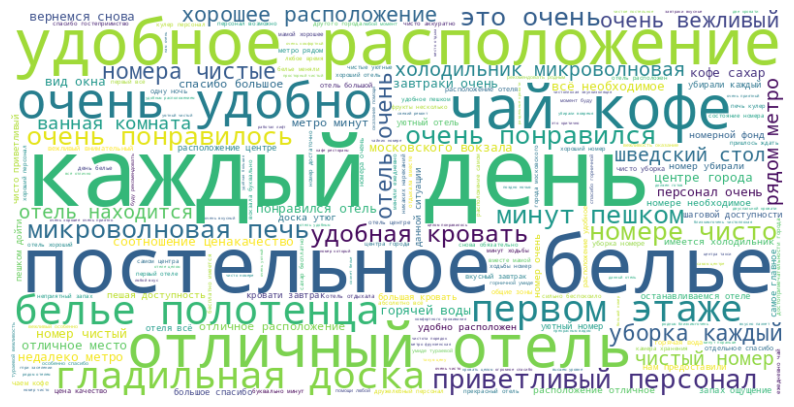

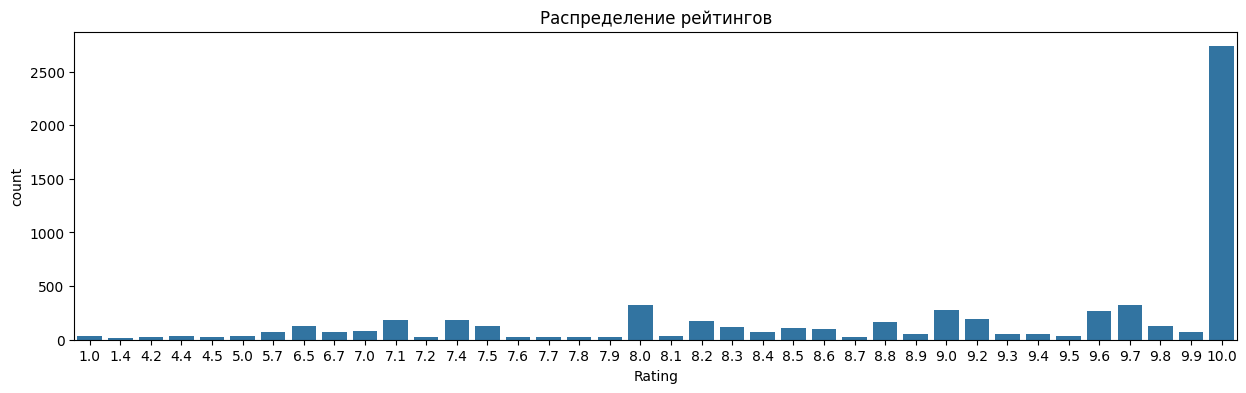

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Облако слов для визуализации частотности слов
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(df['cleaned_review']))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Анализ распределения рейтингов
plt.figure(figsize=(15, 4))
sns.countplot(x='Rating', data=df)
plt.title('Распределение рейтингов')
plt.show()

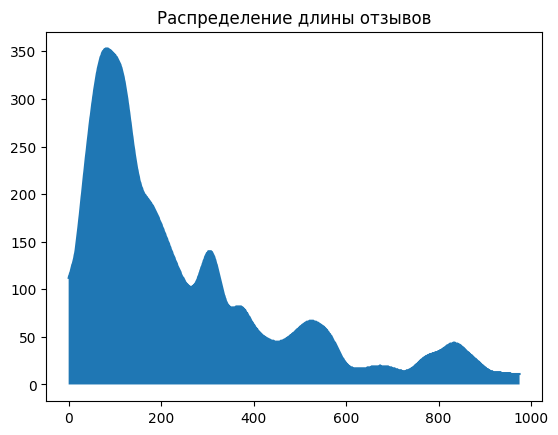

In [27]:
# Анализ длины отзывов
with open("/content/sample_data/com.txt", encoding="utf-8") as file:
    com = [int(x) for x in file.readline()[1:-2].split(", ") if int(x)]



def normaliz(spism, rast=1):
    normal = []

    for i in range(len(spism)):
        start = max(0, i - rast)
        end = min(len(spism) - 1, i + rast)
        new = sum(spism[start:end]) // (end - start)

        normal.append(new)

    return normal


def alis(slv, rating=0.1):
    d1 = sorted([x for x in slv.keys()])

    normal = [0]
    uks = d1[0]

    for i in range(1, d1[-1] + 1):
        if d1[uks] < i and uks + 2 < len(d1):
            uks += 1

        razx = normal[i - 1] - (normal[i - 1] + slv[d1[uks]] + slv[d1[uks + 1]]) // 3
        new = normal[i - 1] - razx * rating

        normal.append(new)

    return [x for x in range(d1[-1] + 1)], normal


def diogramma(spis_len):
    import matplotlib.pyplot as plt

    spis_len = com

    sred = sum(spis_len) // len(spis_len)
    sred_kor = 1000
    spis_len = [x for x in spis_len if x < sred_kor]

    slv = {}

    for i in spis_len:
        n = 15
        ind = (i // n) * n
        slv[ind] = slv.get(ind, 0) + 1

    slv[0] = 0

    y = sorted(slv.keys())
    x = [slv[i] for i in y]

    y, x = alis(slv, rating=0.1)

    for i in range(3):
        x = normaliz(x, rast=14)

    plt.plot(y, x)
    plt.fill_between(y, x)
    plt.title('Распределение длины отзывов')
    plt.show()


diogramma(com)